In [1]:
#%%
# 此模型训练结果更好。
import matplotlib.pyplot as plt

import torchvision as tv
import torch.nn.functional as F
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.models as models
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import torch.optim as optim
import os
import time
import loadData
import AlexNet

startTime = time.time()

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
# 日志记录模块2
import logging
logger = logging.getLogger(__name__)
logger.setLevel(level = logging.INFO)
handler = logging.FileHandler(r"/workspace/PytorchCnn/logs/Recognize-Pic299-epoches500-train15.txt")
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

console = logging.StreamHandler()
console.setLevel(logging.INFO)

logger.addHandler(handler)
logger.addHandler(console)

In [4]:
#%%
# 读取数据
transforms = tv.transforms.Compose([
    # transforms.CenterCrop(64),
    # transforms.CenterCrop(128),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


In [5]:
numOfBatch = 9
pixel = 128
flag = 0
# root = f'./{numOfBatch}/data'
batchSize = 4
# train_data = loadData.MyDataset(txt=f'{root}_{pixel}_{flag}_train.txt', transform=transforms)
# test_data = loadData.MyDataset(txt=f'{root}_{pixel}_{flag}_test.txt', transform=transforms)
train_data = loadData.MyDataset(txt=f'files_train.txt', transform=transforms)
test_data = loadData.MyDataset(txt=f'files_test.txt', transform=transforms)
train_loader = DataLoader(dataset=train_data, batch_size=batchSize, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_data, batch_size=batchSize, shuffle=False, num_workers=2)
print('num_of_trainData:', len(train_data))
print('num_of_testData:', len(test_data))

num_of_trainData: 540
num_of_testData: 810


In [6]:
net = AlexNet.Net()
# net = net.to(device)

if torch.cuda.is_available():
    print('cuda!')
    net = net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=net.parameters(), lr=0.0005, momentum=0.9)

epochs = 600
lossThre = 0.1
average_loss_series = []

for epoch in range(epochs):
    running_loss = 0.0
    running_acc = 0.0
#     print(epoch)

    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
#         inputs, labels = inputs.to(device), labels.to(device)
        # inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, dim=1)
        total = labels.size(0)
        # assert total == batchSize
        running_correct = (predicted == labels).sum()
        running_acc += running_correct
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        # 每loopNum个batch打印一次训练状态
        loopNum = 20
        if i % loopNum == loopNum - 1:
            average_loss = running_loss / loopNum
            logger.info('[{0}, {1}] loss: {2}'.format(epoch + 1, i + 1, average_loss))
            logger.info('设备号为: {0}，预测的设备号为:{1}'.format(labels, predicted))
            
            print('[{0}, {1}] loss: {2}'.format(epoch + 1, i + 1, average_loss))
            logger.info('[{0}, {1}] loss: {2}'.format(epoch + 1, i + 1, average_loss))
            running_acc = running_acc.float()
            average_acc = running_acc / loopNum / total
            print('[{0}, {1}] acc: {2}'.format(epoch + 1, i + 1, average_acc))
            logger.info('[{0}, {1}] acc: {2}'.format(epoch + 1, i + 1, average_acc))
            average_loss_series.append(average_loss)
            running_loss = 0.0
            running_acc = 0.0
    # 为 loss 设定一个阈值
    # if average_loss < lossThre:
    #     break

cuda!


[1, 20] loss: 3.939074087142944
设备号为: tensor([32, 44, 29, 54], device='cuda:0')，预测的设备号为:tensor([27, 27, 27, 27], device='cuda:0')
[1, 20] loss: 3.939074087142944
[1, 20] acc: 0.02500000037252903
[1, 40] loss: 4.011176037788391
设备号为: tensor([11, 45, 27, 12], device='cuda:0')，预测的设备号为:tensor([15, 15, 15, 15], device='cuda:0')
[1, 40] loss: 4.011176037788391
[1, 40] acc: 0.0


[1, 20] loss: 3.939074087142944
[1, 20] acc: 0.02500000037252903
[1, 40] loss: 4.011176037788391
[1, 40] acc: 0.0


[1, 60] loss: 4.020023834705353
设备号为: tensor([46, 37, 19, 12], device='cuda:0')，预测的设备号为:tensor([39, 39, 39, 39], device='cuda:0')
[1, 60] loss: 4.020023834705353
[1, 60] acc: 0.012500000186264515
[1, 80] loss: 3.9904404401779177
设备号为: tensor([20, 22,  9, 45], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[1, 80] loss: 3.9904404401779177
[1, 80] acc: 0.02500000037252903


[1, 60] loss: 4.020023834705353
[1, 60] acc: 0.012500000186264515
[1, 80] loss: 3.9904404401779177
[1, 80] acc: 0.02500000037252903


[1, 100] loss: 3.977016818523407
设备号为: tensor([ 8, 24, 24, 53], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[1, 100] loss: 3.977016818523407
[1, 100] acc: 0.02500000037252903
[1, 120] loss: 3.946627688407898
设备号为: tensor([32, 40, 40, 25], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[1, 120] loss: 3.946627688407898
[1, 120] acc: 0.0


[1, 100] loss: 3.977016818523407
[1, 100] acc: 0.02500000037252903
[1, 120] loss: 3.946627688407898
[1, 120] acc: 0.0


[2, 20] loss: 4.0027290940284725
设备号为: tensor([10, 34, 14, 30], device='cuda:0')，预测的设备号为:tensor([52, 52, 52, 45], device='cuda:0')
[2, 20] loss: 4.0027290940284725
[2, 20] acc: 0.0
[2, 40] loss: 3.9961861610412597
设备号为: tensor([21, 34, 21,  2], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[2, 40] loss: 3.9961861610412597
[2, 40] acc: 0.0


[2, 20] loss: 4.0027290940284725
[2, 20] acc: 0.0
[2, 40] loss: 3.9961861610412597
[2, 40] acc: 0.0


[2, 60] loss: 3.9970266103744505
设备号为: tensor([ 9, 49, 29, 24], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[2, 60] loss: 3.9970266103744505
[2, 60] acc: 0.0
[2, 80] loss: 3.991224431991577
设备号为: tensor([50,  2, 32, 13], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[2, 80] loss: 3.991224431991577
[2, 80] acc: 0.0


[2, 60] loss: 3.9970266103744505
[2, 60] acc: 0.0
[2, 80] loss: 3.991224431991577
[2, 80] acc: 0.0


[2, 100] loss: 3.9443843603134154
设备号为: tensor([25,  6, 26, 39], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[2, 100] loss: 3.9443843603134154
[2, 100] acc: 0.012500000186264515
[2, 120] loss: 3.9948039770126345
设备号为: tensor([31, 53, 39, 43], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[2, 120] loss: 3.9948039770126345
[2, 120] acc: 0.0


[2, 100] loss: 3.9443843603134154
[2, 100] acc: 0.012500000186264515
[2, 120] loss: 3.9948039770126345
[2, 120] acc: 0.0


[3, 20] loss: 3.9439974308013914
设备号为: tensor([43, 45, 54, 23], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[3, 20] loss: 3.9439974308013914
[3, 20] acc: 0.03750000149011612
[3, 40] loss: 3.9938077449798586
设备号为: tensor([12, 40, 49, 29], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[3, 40] loss: 3.9938077449798586
[3, 40] acc: 0.0


[3, 20] loss: 3.9439974308013914
[3, 20] acc: 0.03750000149011612
[3, 40] loss: 3.9938077449798586
[3, 40] acc: 0.0


[3, 60] loss: 3.998461675643921
设备号为: tensor([42, 32, 32, 29], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[3, 60] loss: 3.998461675643921
[3, 60] acc: 0.0
[3, 80] loss: 3.992668128013611
设备号为: tensor([16, 31, 27, 35], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[3, 80] loss: 3.992668128013611
[3, 80] acc: 0.02500000037252903


[3, 60] loss: 3.998461675643921
[3, 60] acc: 0.0
[3, 80] loss: 3.992668128013611
[3, 80] acc: 0.02500000037252903


[3, 100] loss: 3.991128695011139
设备号为: tensor([43, 42, 12, 41], device='cuda:0')，预测的设备号为:tensor([45, 45, 45, 45], device='cuda:0')
[3, 100] loss: 3.991128695011139
[3, 100] acc: 0.012500000186264515
[3, 120] loss: 3.947255289554596
设备号为: tensor([ 8, 30,  5, 15], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[3, 120] loss: 3.947255289554596
[3, 120] acc: 0.02500000037252903


[3, 100] loss: 3.991128695011139
[3, 100] acc: 0.012500000186264515
[3, 120] loss: 3.947255289554596
[3, 120] acc: 0.02500000037252903


[4, 20] loss: 3.9836080193519594
设备号为: tensor([18, 30,  6, 45], device='cuda:0')，预测的设备号为:tensor([45, 45, 45, 45], device='cuda:0')
[4, 20] loss: 3.9836080193519594
[4, 20] acc: 0.03750000149011612
[4, 40] loss: 3.9427834510803224
设备号为: tensor([38,  9, 35, 17], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[4, 40] loss: 3.9427834510803224
[4, 40] acc: 0.02500000037252903


[4, 20] loss: 3.9836080193519594
[4, 20] acc: 0.03750000149011612
[4, 40] loss: 3.9427834510803224
[4, 40] acc: 0.02500000037252903


[4, 60] loss: 3.9383551239967347
设备号为: tensor([48, 27, 16, 51], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[4, 60] loss: 3.9383551239967347
[4, 60] acc: 0.0
[4, 80] loss: 3.9938130974769592
设备号为: tensor([ 7, 21, 12,  8], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[4, 80] loss: 3.9938130974769592
[4, 80] acc: 0.012500000186264515


[4, 60] loss: 3.9383551239967347
[4, 60] acc: 0.0
[4, 80] loss: 3.9938130974769592
[4, 80] acc: 0.012500000186264515


[4, 100] loss: 3.9906673431396484
设备号为: tensor([23, 43, 11, 50], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[4, 100] loss: 3.9906673431396484
[4, 100] acc: 0.012500000186264515
[4, 120] loss: 3.9427250385284425
设备号为: tensor([41,  3, 48, 22], device='cuda:0')，预测的设备号为:tensor([18, 18, 18, 18], device='cuda:0')
[4, 120] loss: 3.9427250385284425
[4, 120] acc: 0.0


[4, 100] loss: 3.9906673431396484
[4, 100] acc: 0.012500000186264515
[4, 120] loss: 3.9427250385284425
[4, 120] acc: 0.0


[5, 20] loss: 3.987537217140198
设备号为: tensor([38, 22, 49, 50], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[5, 20] loss: 3.987537217140198
[5, 20] acc: 0.03750000149011612
[5, 40] loss: 3.94046231508255
设备号为: tensor([ 9,  9, 51, 47], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[5, 40] loss: 3.94046231508255
[5, 40] acc: 0.0


[5, 20] loss: 3.987537217140198
[5, 20] acc: 0.03750000149011612
[5, 40] loss: 3.94046231508255
[5, 40] acc: 0.0


[5, 60] loss: 3.944400632381439
设备号为: tensor([25, 46, 17,  6], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[5, 60] loss: 3.944400632381439
[5, 60] acc: 0.012500000186264515
[5, 80] loss: 3.9896457314491274
设备号为: tensor([ 2, 27, 29,  3], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[5, 80] loss: 3.9896457314491274
[5, 80] acc: 0.03750000149011612


[5, 60] loss: 3.944400632381439
[5, 60] acc: 0.012500000186264515
[5, 80] loss: 3.9896457314491274
[5, 80] acc: 0.03750000149011612


[5, 100] loss: 3.994618535041809
设备号为: tensor([20, 15, 37, 51], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[5, 100] loss: 3.994618535041809
[5, 100] acc: 0.012500000186264515
[5, 120] loss: 3.9925596475601197
设备号为: tensor([14, 20, 16, 34], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[5, 120] loss: 3.9925596475601197
[5, 120] acc: 0.02500000037252903


[5, 100] loss: 3.994618535041809
[5, 100] acc: 0.012500000186264515
[5, 120] loss: 3.9925596475601197
[5, 120] acc: 0.02500000037252903


[6, 20] loss: 3.9322125554084777
设备号为: tensor([26, 18, 50,  9], device='cuda:0')，预测的设备号为:tensor([15, 15, 15, 15], device='cuda:0')
[6, 20] loss: 3.9322125554084777
[6, 20] acc: 0.02500000037252903
[6, 40] loss: 4.010707223415375
设备号为: tensor([54, 24,  3, 44], device='cuda:0')，预测的设备号为:tensor([6, 6, 6, 6], device='cuda:0')
[6, 40] loss: 4.010707223415375
[6, 40] acc: 0.02500000037252903


[6, 20] loss: 3.9322125554084777
[6, 20] acc: 0.02500000037252903
[6, 40] loss: 4.010707223415375
[6, 40] acc: 0.02500000037252903


[6, 60] loss: 3.99358674287796
设备号为: tensor([45, 35, 14, 12], device='cuda:0')，预测的设备号为:tensor([13, 13, 13, 13], device='cuda:0')
[6, 60] loss: 3.99358674287796
[6, 60] acc: 0.0
[6, 80] loss: 3.9827393770217894
设备号为: tensor([54, 45,  6, 40], device='cuda:0')，预测的设备号为:tensor([13, 13, 13, 13], device='cuda:0')
[6, 80] loss: 3.9827393770217894
[6, 80] acc: 0.02500000037252903


[6, 60] loss: 3.99358674287796
[6, 60] acc: 0.0
[6, 80] loss: 3.9827393770217894
[6, 80] acc: 0.02500000037252903


[6, 100] loss: 3.9863289475440977
设备号为: tensor([21, 12, 24, 36], device='cuda:0')，预测的设备号为:tensor([25, 25, 25, 25], device='cuda:0')
[6, 100] loss: 3.9863289475440977
[6, 100] acc: 0.012500000186264515
[6, 120] loss: 4.009449172019958
设备号为: tensor([28, 35, 46, 38], device='cuda:0')，预测的设备号为:tensor([52, 52, 52, 52], device='cuda:0')
[6, 120] loss: 4.009449172019958
[6, 120] acc: 0.0


[6, 100] loss: 3.9863289475440977
[6, 100] acc: 0.012500000186264515
[6, 120] loss: 4.009449172019958
[6, 120] acc: 0.0


[7, 20] loss: 3.987058973312378
设备号为: tensor([ 5, 14, 47, 42], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[7, 20] loss: 3.987058973312378
[7, 20] acc: 0.02500000037252903
[7, 40] loss: 3.9991767406463623
设备号为: tensor([ 9, 21,  2, 14], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[7, 40] loss: 3.9991767406463623
[7, 40] acc: 0.0


[7, 20] loss: 3.987058973312378
[7, 20] acc: 0.02500000037252903
[7, 40] loss: 3.9991767406463623
[7, 40] acc: 0.0


[7, 60] loss: 3.936876916885376
设备号为: tensor([24, 12,  5, 50], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[7, 60] loss: 3.936876916885376
[7, 60] acc: 0.03750000149011612
[7, 80] loss: 3.9401131868362427
设备号为: tensor([21,  2, 46, 35], device='cuda:0')，预测的设备号为:tensor([21, 21, 21, 21], device='cuda:0')
[7, 80] loss: 3.9401131868362427
[7, 80] acc: 0.012500000186264515


[7, 60] loss: 3.936876916885376
[7, 60] acc: 0.03750000149011612
[7, 80] loss: 3.9401131868362427
[7, 80] acc: 0.012500000186264515


[7, 100] loss: 3.9514931321144102
设备号为: tensor([37,  4, 38, 26], device='cuda:0')，预测的设备号为:tensor([13, 13, 13, 13], device='cuda:0')
[7, 100] loss: 3.9514931321144102
[7, 100] acc: 0.0
[7, 120] loss: 3.9910874366760254
设备号为: tensor([52, 11, 51, 36], device='cuda:0')，预测的设备号为:tensor([52, 52, 52, 52], device='cuda:0')
[7, 120] loss: 3.9910874366760254
[7, 120] acc: 0.03750000149011612


[7, 100] loss: 3.9514931321144102
[7, 100] acc: 0.0
[7, 120] loss: 3.9910874366760254
[7, 120] acc: 0.03750000149011612


[8, 20] loss: 3.9323667883872986
设备号为: tensor([52, 14, 49, 40], device='cuda:0')，预测的设备号为:tensor([45, 45, 45, 45], device='cuda:0')
[8, 20] loss: 3.9323667883872986
[8, 20] acc: 0.05000000074505806
[8, 40] loss: 3.9946449637413024
设备号为: tensor([25, 48, 49, 26], device='cuda:0')，预测的设备号为:tensor([45,  6,  6,  6], device='cuda:0')
[8, 40] loss: 3.9946449637413024
[8, 40] acc: 0.0


[8, 20] loss: 3.9323667883872986
[8, 20] acc: 0.05000000074505806
[8, 40] loss: 3.9946449637413024
[8, 40] acc: 0.0


[8, 60] loss: 3.9434816360473635
设备号为: tensor([42, 43, 34, 49], device='cuda:0')，预测的设备号为:tensor([45, 45, 45, 45], device='cuda:0')
[8, 60] loss: 3.9434816360473635
[8, 60] acc: 0.0
[8, 80] loss: 3.993995726108551
设备号为: tensor([33, 35, 41, 17], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[8, 80] loss: 3.993995726108551
[8, 80] acc: 0.012500000186264515


[8, 60] loss: 3.9434816360473635
[8, 60] acc: 0.0
[8, 80] loss: 3.993995726108551
[8, 80] acc: 0.012500000186264515


[8, 100] loss: 3.9895105361938477
设备号为: tensor([19, 30, 11, 35], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[8, 100] loss: 3.9895105361938477
[8, 100] acc: 0.02500000037252903
[8, 120] loss: 3.9458770036697386
设备号为: tensor([20, 42, 22,  1], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[8, 120] loss: 3.9458770036697386
[8, 120] acc: 0.0


[8, 100] loss: 3.9895105361938477
[8, 100] acc: 0.02500000037252903
[8, 120] loss: 3.9458770036697386
[8, 120] acc: 0.0


[9, 20] loss: 3.9408594250679014
设备号为: tensor([ 3, 11, 53, 45], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[9, 20] loss: 3.9408594250679014
[9, 20] acc: 0.012500000186264515
[9, 40] loss: 3.9953933119773866
设备号为: tensor([ 9, 25, 36, 17], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[9, 40] loss: 3.9953933119773866
[9, 40] acc: 0.02500000037252903


[9, 20] loss: 3.9408594250679014
[9, 20] acc: 0.012500000186264515
[9, 40] loss: 3.9953933119773866
[9, 40] acc: 0.02500000037252903


[9, 60] loss: 3.9878827691078187
设备号为: tensor([32, 25,  7, 46], device='cuda:0')，预测的设备号为:tensor([45, 45, 45, 45], device='cuda:0')
[9, 60] loss: 3.9878827691078187
[9, 60] acc: 0.03750000149011612
[9, 80] loss: 3.9897375464439393
设备号为: tensor([ 2, 48,  5, 10], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[9, 80] loss: 3.9897375464439393
[9, 80] acc: 0.02500000037252903


[9, 60] loss: 3.9878827691078187
[9, 60] acc: 0.03750000149011612
[9, 80] loss: 3.9897375464439393
[9, 80] acc: 0.02500000037252903


[9, 100] loss: 3.9914652824401857
设备号为: tensor([38, 11, 14, 43], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[9, 100] loss: 3.9914652824401857
[9, 100] acc: 0.0
[9, 120] loss: 3.990015685558319
设备号为: tensor([ 5, 29, 31, 48], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[9, 120] loss: 3.990015685558319
[9, 120] acc: 0.012500000186264515


[9, 100] loss: 3.9914652824401857
[9, 100] acc: 0.0
[9, 120] loss: 3.990015685558319
[9, 120] acc: 0.012500000186264515


[10, 20] loss: 3.9859989643096925
设备号为: tensor([44,  8, 23, 45], device='cuda:0')，预测的设备号为:tensor([52, 52, 52, 52], device='cuda:0')
[10, 20] loss: 3.9859989643096925
[10, 20] acc: 0.02500000037252903
[10, 40] loss: 3.9909759044647215
设备号为: tensor([10, 17,  6, 38], device='cuda:0')，预测的设备号为:tensor([41, 41, 19, 41], device='cuda:0')
[10, 40] loss: 3.9909759044647215
[10, 40] acc: 0.0


[10, 20] loss: 3.9859989643096925
[10, 20] acc: 0.02500000037252903
[10, 40] loss: 3.9909759044647215
[10, 40] acc: 0.0


[10, 60] loss: 3.9447479963302614
设备号为: tensor([15, 38, 26,  6], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[10, 60] loss: 3.9447479963302614
[10, 60] acc: 0.012500000186264515
[10, 80] loss: 3.9863659501075746
设备号为: tensor([12, 12, 40, 17], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[10, 80] loss: 3.9863659501075746
[10, 80] acc: 0.012500000186264515


[10, 60] loss: 3.9447479963302614
[10, 60] acc: 0.012500000186264515
[10, 80] loss: 3.9863659501075746
[10, 80] acc: 0.012500000186264515


[10, 100] loss: 3.947037422657013
设备号为: tensor([46, 13,  9, 30], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[10, 100] loss: 3.947037422657013
[10, 100] acc: 0.02500000037252903
[10, 120] loss: 3.8970489859580995
设备号为: tensor([16, 49,  5, 40], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[10, 120] loss: 3.8970489859580995
[10, 120] acc: 0.0


[10, 100] loss: 3.947037422657013
[10, 100] acc: 0.02500000037252903
[10, 120] loss: 3.8970489859580995
[10, 120] acc: 0.0


[11, 20] loss: 3.9385164976119995
设备号为: tensor([28, 26, 36, 30], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[11, 20] loss: 3.9385164976119995
[11, 20] acc: 0.02500000037252903
[11, 40] loss: 3.891476261615753
设备号为: tensor([45, 28, 38, 20], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 11], device='cuda:0')
[11, 40] loss: 3.891476261615753
[11, 40] acc: 0.012500000186264515


[11, 20] loss: 3.9385164976119995
[11, 20] acc: 0.02500000037252903
[11, 40] loss: 3.891476261615753
[11, 40] acc: 0.012500000186264515


[11, 60] loss: 3.9420451879501344
设备号为: tensor([14, 51, 34, 26], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 11], device='cuda:0')
[11, 60] loss: 3.9420451879501344
[11, 60] acc: 0.0
[11, 80] loss: 3.9920889735221863
设备号为: tensor([17, 42, 20, 46], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 11], device='cuda:0')
[11, 80] loss: 3.9920889735221863


[11, 60] loss: 3.9420451879501344
[11, 60] acc: 0.0
[11, 80] loss: 3.9920889735221863


[11, 80] acc: 0.012500000186264515
[11, 100] loss: 3.9408131718635557
设备号为: tensor([31, 43, 26, 45], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[11, 100] loss: 3.9408131718635557
[11, 100] acc: 0.0


[11, 80] acc: 0.012500000186264515
[11, 100] loss: 3.9408131718635557
[11, 100] acc: 0.0


[11, 120] loss: 3.9892770528793333
设备号为: tensor([15, 27, 14, 21], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[11, 120] loss: 3.9892770528793333
[11, 120] acc: 0.012500000186264515


[11, 120] loss: 3.9892770528793333
[11, 120] acc: 0.012500000186264515


[12, 20] loss: 3.9286046981811524
设备号为: tensor([38, 31, 43, 15], device='cuda:0')，预测的设备号为:tensor([28, 28, 28, 28], device='cuda:0')
[12, 20] loss: 3.9286046981811524
[12, 20] acc: 0.02500000037252903
[12, 40] loss: 3.9596501111984255
设备号为: tensor([17, 31, 45,  2], device='cuda:0')，预测的设备号为:tensor([28, 28, 28, 28], device='cuda:0')
[12, 40] loss: 3.9596501111984255
[12, 40] acc: 0.02500000037252903


[12, 20] loss: 3.9286046981811524
[12, 20] acc: 0.02500000037252903
[12, 40] loss: 3.9596501111984255
[12, 40] acc: 0.02500000037252903


[12, 60] loss: 3.944482612609863
设备号为: tensor([36, 44, 12, 20], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[12, 60] loss: 3.944482612609863
[12, 60] acc: 0.012500000186264515
[12, 80] loss: 3.940828573703766
设备号为: tensor([47, 21, 31, 19], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[12, 80] loss: 3.940828573703766
[12, 80] acc: 0.012500000186264515


[12, 60] loss: 3.944482612609863
[12, 60] acc: 0.012500000186264515
[12, 80] loss: 3.940828573703766
[12, 80] acc: 0.012500000186264515


[12, 100] loss: 3.9908185482025145
设备号为: tensor([11, 28, 12, 33], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[12, 100] loss: 3.9908185482025145
[12, 100] acc: 0.012500000186264515
[12, 120] loss: 3.98866446018219
设备号为: tensor([52, 49, 23, 43], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 11], device='cuda:0')
[12, 120] loss: 3.98866446018219
[12, 120] acc: 0.012500000186264515


[12, 100] loss: 3.9908185482025145
[12, 100] acc: 0.012500000186264515
[12, 120] loss: 3.98866446018219
[12, 120] acc: 0.012500000186264515


[13, 20] loss: 3.987314212322235
设备号为: tensor([12, 29, 41, 16], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 11], device='cuda:0')
[13, 20] loss: 3.987314212322235
[13, 20] acc: 0.02500000037252903
[13, 40] loss: 3.996630239486694
设备号为: tensor([ 4, 11, 48, 47], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 11], device='cuda:0')
[13, 40] loss: 3.996630239486694
[13, 40] acc: 0.02500000037252903


[13, 20] loss: 3.987314212322235
[13, 20] acc: 0.02500000037252903
[13, 40] loss: 3.996630239486694
[13, 40] acc: 0.02500000037252903


[13, 60] loss: 3.998154866695404
设备号为: tensor([51,  1, 42, 47], device='cuda:0')，预测的设备号为:tensor([40, 40, 40, 40], device='cuda:0')
[13, 60] loss: 3.998154866695404
[13, 60] acc: 0.0
[13, 80] loss: 3.9872091174125672
设备号为: tensor([40, 10, 17,  5], device='cuda:0')，预测的设备号为:tensor([28, 28, 38, 28], device='cuda:0')
[13, 80] loss: 3.9872091174125672
[13, 80] acc: 0.02500000037252903


[13, 60] loss: 3.998154866695404
[13, 60] acc: 0.0
[13, 80] loss: 3.9872091174125672
[13, 80] acc: 0.02500000037252903


[13, 100] loss: 3.945569837093353
设备号为: tensor([ 5, 12, 49, 25], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[13, 100] loss: 3.945569837093353
[13, 100] acc: 0.0
[13, 120] loss: 3.9848950028419496
设备号为: tensor([24, 30, 19, 43], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[13, 120] loss: 3.9848950028419496
[13, 120] acc: 0.02500000037252903


[13, 100] loss: 3.945569837093353
[13, 100] acc: 0.0
[13, 120] loss: 3.9848950028419496
[13, 120] acc: 0.02500000037252903


[14, 20] loss: 3.985648512840271
设备号为: tensor([40, 17, 34, 47], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[14, 20] loss: 3.985648512840271
[14, 20] acc: 0.05000000074505806
[14, 40] loss: 3.93881961107254
设备号为: tensor([ 5, 26,  4, 11], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[14, 40] loss: 3.93881961107254
[14, 40] acc: 0.012500000186264515


[14, 20] loss: 3.985648512840271
[14, 20] acc: 0.05000000074505806
[14, 40] loss: 3.93881961107254
[14, 40] acc: 0.012500000186264515


[14, 60] loss: 3.991266644001007
设备号为: tensor([13, 42, 28, 15], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 11], device='cuda:0')
[14, 60] loss: 3.991266644001007
[14, 60] acc: 0.0
[14, 80] loss: 3.991937041282654
设备号为: tensor([17,  2,  9,  1], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[14, 80] loss: 3.991937041282654
[14, 80] acc: 0.02500000037252903


[14, 60] loss: 3.991266644001007
[14, 60] acc: 0.0
[14, 80] loss: 3.991937041282654
[14, 80] acc: 0.02500000037252903


[14, 100] loss: 3.9916101932525634
设备号为: tensor([36, 12, 22,  9], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[14, 100] loss: 3.9916101932525634
[14, 100] acc: 0.0
[14, 120] loss: 3.942497444152832
设备号为: tensor([ 3, 44,  4, 21], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[14, 120] loss: 3.942497444152832
[14, 120] acc: 0.02500000037252903


[14, 100] loss: 3.9916101932525634
[14, 100] acc: 0.0
[14, 120] loss: 3.942497444152832
[14, 120] acc: 0.02500000037252903


[15, 20] loss: 3.9885692477226256
设备号为: tensor([52,  7, 32, 31], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[15, 20] loss: 3.9885692477226256
[15, 20] acc: 0.03750000149011612
[15, 40] loss: 3.9867803692817687
设备号为: tensor([ 9, 49, 17,  8], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[15, 40] loss: 3.9867803692817687
[15, 40] acc: 0.03750000149011612


[15, 20] loss: 3.9885692477226256
[15, 20] acc: 0.03750000149011612
[15, 40] loss: 3.9867803692817687
[15, 40] acc: 0.03750000149011612


[15, 60] loss: 3.8895636320114138
设备号为: tensor([28, 42, 18,  8], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[15, 60] loss: 3.8895636320114138
[15, 60] acc: 0.02500000037252903
[15, 80] loss: 3.9864416480064393
设备号为: tensor([43, 34, 44, 15], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[15, 80] loss: 3.9864416480064393
[15, 80] acc: 0.012500000186264515


[15, 60] loss: 3.8895636320114138
[15, 60] acc: 0.02500000037252903
[15, 80] loss: 3.9864416480064393
[15, 80] acc: 0.012500000186264515


[15, 100] loss: 3.9930877447128297
设备号为: tensor([19, 41,  7, 18], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[15, 100] loss: 3.9930877447128297
[15, 100] acc: 0.02500000037252903
[15, 120] loss: 3.9905662178993224
设备号为: tensor([23, 17, 27, 53], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[15, 120] loss: 3.9905662178993224
[15, 120] acc: 0.0


[15, 100] loss: 3.9930877447128297
[15, 100] acc: 0.02500000037252903
[15, 120] loss: 3.9905662178993224
[15, 120] acc: 0.0


[16, 20] loss: 3.932307541370392
设备号为: tensor([42,  2, 41, 43], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 11], device='cuda:0')
[16, 20] loss: 3.932307541370392
[16, 20] acc: 0.012500000186264515
[16, 40] loss: 3.884879541397095
设备号为: tensor([ 3, 18, 34, 46], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 11], device='cuda:0')
[16, 40] loss: 3.884879541397095
[16, 40] acc: 0.012500000186264515


[16, 20] loss: 3.932307541370392
[16, 20] acc: 0.012500000186264515
[16, 40] loss: 3.884879541397095
[16, 40] acc: 0.012500000186264515


[16, 60] loss: 3.9455559492111205
设备号为: tensor([15,  9, 47, 54], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[16, 60] loss: 3.9455559492111205
[16, 60] acc: 0.012500000186264515
[16, 80] loss: 3.991852581501007
设备号为: tensor([ 7,  6, 36, 39], device='cuda:0')，预测的设备号为:tensor([11,  1, 11, 11], device='cuda:0')
[16, 80] loss: 3.991852581501007
[16, 80] acc: 0.0


[16, 60] loss: 3.9455559492111205
[16, 60] acc: 0.012500000186264515
[16, 80] loss: 3.991852581501007
[16, 80] acc: 0.0


[16, 100] loss: 3.9418473482131957
设备号为: tensor([16,  4, 20, 46], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[16, 100] loss: 3.9418473482131957
[16, 100] acc: 0.0
[16, 120] loss: 3.9874573707580567
设备号为: tensor([51, 48, 26, 42], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[16, 120] loss: 3.9874573707580567
[16, 120] acc: 0.012500000186264515


[16, 100] loss: 3.9418473482131957
[16, 100] acc: 0.0
[16, 120] loss: 3.9874573707580567
[16, 120] acc: 0.012500000186264515


[17, 20] loss: 3.9730010867118835
设备号为: tensor([32, 47, 29, 27], device='cuda:0')，预测的设备号为:tensor([28, 28, 28, 28], device='cuda:0')
[17, 20] loss: 3.9730010867118835
[17, 20] acc: 0.0
[17, 40] loss: 3.9581832766532896
设备号为: tensor([52, 20, 13, 41], device='cuda:0')，预测的设备号为:tensor([28, 28, 28, 28], device='cuda:0')
[17, 40] loss: 3.9581832766532896
[17, 40] acc: 0.02500000037252903


[17, 20] loss: 3.9730010867118835
[17, 20] acc: 0.0
[17, 40] loss: 3.9581832766532896
[17, 40] acc: 0.02500000037252903


[17, 60] loss: 3.9820621252059936
设备号为: tensor([43, 38, 20, 48], device='cuda:0')，预测的设备号为:tensor([40, 40, 40, 40], device='cuda:0')
[17, 60] loss: 3.9820621252059936
[17, 60] acc: 0.012500000186264515
[17, 80] loss: 3.9542803287506105
设备号为: tensor([25, 46, 29, 54], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[17, 80] loss: 3.9542803287506105
[17, 80] acc: 0.0


[17, 60] loss: 3.9820621252059936
[17, 60] acc: 0.012500000186264515
[17, 80] loss: 3.9542803287506105
[17, 80] acc: 0.0


[17, 100] loss: 3.9837160229682924
设备号为: tensor([ 7, 19, 26,  7], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[17, 100] loss: 3.9837160229682924
[17, 100] acc: 0.03750000149011612
[17, 120] loss: 3.985304391384125
设备号为: tensor([13, 26, 16,  3], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[17, 120] loss: 3.985304391384125
[17, 120] acc: 0.012500000186264515


[17, 100] loss: 3.9837160229682924
[17, 100] acc: 0.03750000149011612
[17, 120] loss: 3.985304391384125
[17, 120] acc: 0.012500000186264515


[18, 20] loss: 4.00405786037445
设备号为: tensor([52, 30, 30, 28], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[18, 20] loss: 4.00405786037445
[18, 20] acc: 0.02500000037252903
[18, 40] loss: 3.991189515590668
设备号为: tensor([45,  4, 13, 31], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[18, 40] loss: 3.991189515590668
[18, 40] acc: 0.012500000186264515


[18, 20] loss: 4.00405786037445
[18, 20] acc: 0.02500000037252903
[18, 40] loss: 3.991189515590668
[18, 40] acc: 0.012500000186264515


[18, 60] loss: 3.9888994812965395
设备号为: tensor([17, 17,  9,  9], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[18, 60] loss: 3.9888994812965395
[18, 60] acc: 0.03750000149011612
[18, 80] loss: 3.9417806386947634
设备号为: tensor([52, 25, 14, 23], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[18, 80] loss: 3.9417806386947634
[18, 80] acc: 0.0


[18, 60] loss: 3.9888994812965395
[18, 60] acc: 0.03750000149011612
[18, 80] loss: 3.9417806386947634
[18, 80] acc: 0.0


[18, 100] loss: 3.9897495031356813
设备号为: tensor([17, 14, 49,  3], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[18, 100] loss: 3.9897495031356813
[18, 100] acc: 0.012500000186264515
[18, 120] loss: 3.9930038332939146
设备号为: tensor([50, 31, 18,  3], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[18, 120] loss: 3.9930038332939146
[18, 120] acc: 0.02500000037252903


[18, 100] loss: 3.9897495031356813
[18, 100] acc: 0.012500000186264515
[18, 120] loss: 3.9930038332939146
[18, 120] acc: 0.02500000037252903


[19, 20] loss: 3.9888928174972533
设备号为: tensor([42,  3, 12, 37], device='cuda:0')，预测的设备号为:tensor([38, 30, 30, 30], device='cuda:0')
[19, 20] loss: 3.9888928174972533
[19, 20] acc: 0.02500000037252903
[19, 40] loss: 3.936478817462921
设备号为: tensor([ 3,  8, 47,  5], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[19, 40] loss: 3.936478817462921
[19, 40] acc: 0.07500000298023224


[19, 20] loss: 3.9888928174972533
[19, 20] acc: 0.02500000037252903
[19, 40] loss: 3.936478817462921
[19, 40] acc: 0.07500000298023224


[19, 60] loss: 3.9877627730369567
设备号为: tensor([54, 19, 28, 38], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[19, 60] loss: 3.9877627730369567
[19, 60] acc: 0.02500000037252903
[19, 80] loss: 3.98276172876358
设备号为: tensor([28, 29, 38, 52], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[19, 80] loss: 3.98276172876358
[19, 80] acc: 0.012500000186264515


[19, 60] loss: 3.9877627730369567
[19, 60] acc: 0.02500000037252903
[19, 80] loss: 3.98276172876358
[19, 80] acc: 0.012500000186264515


[19, 100] loss: 3.9920475363731383
设备号为: tensor([ 4, 27, 25,  5], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[19, 100] loss: 3.9920475363731383
[19, 100] acc: 0.02500000037252903
[19, 120] loss: 3.995649790763855
设备号为: tensor([44, 39, 54,  1], device='cuda:0')，预测的设备号为:tensor([30, 30, 38, 30], device='cuda:0')
[19, 120] loss: 3.995649790763855
[19, 120] acc: 0.012500000186264515


[19, 100] loss: 3.9920475363731383
[19, 100] acc: 0.02500000037252903
[19, 120] loss: 3.995649790763855
[19, 120] acc: 0.012500000186264515


[20, 20] loss: 3.990586292743683
设备号为: tensor([ 8, 31, 54, 29], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[20, 20] loss: 3.990586292743683
[20, 20] acc: 0.02500000037252903
[20, 40] loss: 3.9895123720169066
设备号为: tensor([32, 29,  1, 12], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[20, 40] loss: 3.9895123720169066
[20, 40] acc: 0.0


[20, 20] loss: 3.990586292743683
[20, 20] acc: 0.02500000037252903
[20, 40] loss: 3.9895123720169066
[20, 40] acc: 0.0


[20, 60] loss: 3.88532440662384
设备号为: tensor([22, 12, 38, 26], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[20, 60] loss: 3.88532440662384
[20, 60] acc: 0.012500000186264515
[20, 80] loss: 3.987477493286133
设备号为: tensor([14,  6, 48, 48], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[20, 80] loss: 3.987477493286133
[20, 80] acc: 0.0


[20, 60] loss: 3.88532440662384
[20, 60] acc: 0.012500000186264515
[20, 80] loss: 3.987477493286133
[20, 80] acc: 0.0


[20, 100] loss: 3.9370843529701234
设备号为: tensor([ 6,  6, 27, 11], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[20, 100] loss: 3.9370843529701234
[20, 100] acc: 0.012500000186264515
[20, 120] loss: 3.9379071831703185
设备号为: tensor([41, 43,  2, 28], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[20, 120] loss: 3.9379071831703185
[20, 120] acc: 0.012500000186264515


[20, 100] loss: 3.9370843529701234
[20, 100] acc: 0.012500000186264515
[20, 120] loss: 3.9379071831703185
[20, 120] acc: 0.012500000186264515


[21, 20] loss: 3.9321659564971925
设备号为: tensor([12,  2, 21, 12], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[21, 20] loss: 3.9321659564971925
[21, 20] acc: 0.0
[21, 40] loss: 3.9382072925567626
设备号为: tensor([27, 23, 20,  6], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[21, 40] loss: 3.9382072925567626
[21, 40] acc: 0.03750000149011612


[21, 20] loss: 3.9321659564971925
[21, 20] acc: 0.0
[21, 40] loss: 3.9382072925567626
[21, 40] acc: 0.03750000149011612


[21, 60] loss: 3.888771486282349
设备号为: tensor([17, 34,  9, 38], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[21, 60] loss: 3.888771486282349
[21, 60] acc: 0.012500000186264515
[21, 80] loss: 3.9889865279197694
设备号为: tensor([42, 48, 15, 42], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[21, 80] loss: 3.9889865279197694
[21, 80] acc: 0.03750000149011612


[21, 60] loss: 3.888771486282349
[21, 60] acc: 0.012500000186264515
[21, 80] loss: 3.9889865279197694
[21, 80] acc: 0.03750000149011612


[21, 100] loss: 3.9918610095977782
设备号为: tensor([42, 46, 41,  6], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[21, 100] loss: 3.9918610095977782
[21, 100] acc: 0.012500000186264515
[21, 120] loss: 3.98736457824707
设备号为: tensor([47, 50, 37, 20], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[21, 120] loss: 3.98736457824707
[21, 120] acc: 0.02500000037252903


[21, 100] loss: 3.9918610095977782
[21, 100] acc: 0.012500000186264515
[21, 120] loss: 3.98736457824707
[21, 120] acc: 0.02500000037252903


[22, 20] loss: 3.985670280456543
设备号为: tensor([32,  2, 50,  7], device='cuda:0')，预测的设备号为:tensor([ 1,  1, 16,  1], device='cuda:0')
[22, 20] loss: 3.985670280456543
[22, 20] acc: 0.03750000149011612
[22, 40] loss: 3.9361586451530455
设备号为: tensor([26, 49, 18, 54], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[22, 40] loss: 3.9361586451530455
[22, 40] acc: 0.012500000186264515


[22, 20] loss: 3.985670280456543
[22, 20] acc: 0.03750000149011612
[22, 40] loss: 3.9361586451530455
[22, 40] acc: 0.012500000186264515


[22, 60] loss: 3.992521893978119
设备号为: tensor([31, 54, 51, 10], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[22, 60] loss: 3.992521893978119
[22, 60] acc: 0.02500000037252903
[22, 80] loss: 3.9876140713691712
设备号为: tensor([14, 10, 36, 40], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[22, 80] loss: 3.9876140713691712
[22, 80] acc: 0.02500000037252903


[22, 60] loss: 3.992521893978119
[22, 60] acc: 0.02500000037252903
[22, 80] loss: 3.9876140713691712
[22, 80] acc: 0.02500000037252903


[22, 100] loss: 3.986316239833832
设备号为: tensor([38, 21,  6, 33], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[22, 100] loss: 3.986316239833832
[22, 100] acc: 0.02500000037252903
[22, 120] loss: 3.9891581535339355
设备号为: tensor([35, 26,  8,  5], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[22, 120] loss: 3.9891581535339355
[22, 120] acc: 0.02500000037252903


[22, 100] loss: 3.986316239833832
[22, 100] acc: 0.02500000037252903
[22, 120] loss: 3.9891581535339355
[22, 120] acc: 0.02500000037252903


[23, 20] loss: 3.9876532673835756
设备号为: tensor([44, 17, 18, 23], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[23, 20] loss: 3.9876532673835756
[23, 20] acc: 0.012500000186264515
[23, 40] loss: 3.9856091856956484
设备号为: tensor([48, 26, 16, 12], device='cuda:0')，预测的设备号为:tensor([19, 11, 11, 11], device='cuda:0')
[23, 40] loss: 3.9856091856956484
[23, 40] acc: 0.03750000149011612


[23, 20] loss: 3.9876532673835756
[23, 20] acc: 0.012500000186264515
[23, 40] loss: 3.9856091856956484
[23, 40] acc: 0.03750000149011612


[23, 60] loss: 3.9434059977531435
设备号为: tensor([ 6, 30, 20, 52], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[23, 60] loss: 3.9434059977531435
[23, 60] acc: 0.012500000186264515
[23, 80] loss: 3.9858500599861144
设备号为: tensor([ 4, 19, 33, 34], device='cuda:0')，预测的设备号为:tensor([30, 19, 30, 30], device='cuda:0')
[23, 80] loss: 3.9858500599861144
[23, 80] acc: 0.02500000037252903


[23, 60] loss: 3.9434059977531435
[23, 60] acc: 0.012500000186264515
[23, 80] loss: 3.9858500599861144
[23, 80] acc: 0.02500000037252903


[23, 100] loss: 3.9854275941848756
设备号为: tensor([ 2, 13, 51,  9], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[23, 100] loss: 3.9854275941848756
[23, 100] acc: 0.02500000037252903
[23, 120] loss: 3.989648687839508
设备号为: tensor([29, 49, 49, 12], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[23, 120] loss: 3.989648687839508
[23, 120] acc: 0.012500000186264515


[23, 100] loss: 3.9854275941848756
[23, 100] acc: 0.02500000037252903
[23, 120] loss: 3.989648687839508
[23, 120] acc: 0.012500000186264515


[24, 20] loss: 3.934356164932251
设备号为: tensor([41, 12, 27, 18], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[24, 20] loss: 3.934356164932251
[24, 20] acc: 0.0
[24, 40] loss: 3.932614529132843
设备号为: tensor([53, 11, 53, 14], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[24, 40] loss: 3.932614529132843
[24, 40] acc: 0.03750000149011612


[24, 20] loss: 3.934356164932251
[24, 20] acc: 0.0
[24, 40] loss: 3.932614529132843
[24, 40] acc: 0.03750000149011612


[24, 60] loss: 3.937469255924225
设备号为: tensor([33, 12, 12, 14], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[24, 60] loss: 3.937469255924225
[24, 60] acc: 0.012500000186264515
[24, 80] loss: 3.9886866927146913
设备号为: tensor([ 8, 35,  5, 38], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[24, 80] loss: 3.9886866927146913
[24, 80] acc: 0.0


[24, 60] loss: 3.937469255924225
[24, 60] acc: 0.012500000186264515
[24, 80] loss: 3.9886866927146913
[24, 80] acc: 0.0


[24, 100] loss: 3.9888614416122437
设备号为: tensor([13,  9, 45, 21], device='cuda:0')，预测的设备号为:tensor([19, 19, 38, 19], device='cuda:0')
[24, 100] loss: 3.9888614416122437
[24, 100] acc: 0.05000000074505806
[24, 120] loss: 3.989424228668213
设备号为: tensor([16,  4,  4, 20], device='cuda:0')，预测的设备号为:tensor([19, 30, 30, 30], device='cuda:0')
[24, 120] loss: 3.989424228668213
[24, 120] acc: 0.03750000149011612


[24, 100] loss: 3.9888614416122437
[24, 100] acc: 0.05000000074505806
[24, 120] loss: 3.989424228668213
[24, 120] acc: 0.03750000149011612


[25, 20] loss: 3.9397556662559508
设备号为: tensor([39, 31,  7, 20], device='cuda:0')，预测的设备号为:tensor([19, 19, 30, 19], device='cuda:0')
[25, 20] loss: 3.9397556662559508
[25, 20] acc: 0.02500000037252903
[25, 40] loss: 3.9823548674583433
设备号为: tensor([39, 16, 35, 36], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[25, 40] loss: 3.9823548674583433
[25, 40] acc: 0.05000000074505806


[25, 20] loss: 3.9397556662559508
[25, 20] acc: 0.02500000037252903
[25, 40] loss: 3.9823548674583433
[25, 40] acc: 0.05000000074505806


[25, 60] loss: 3.9837812304496767
设备号为: tensor([ 9, 29, 51, 21], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[25, 60] loss: 3.9837812304496767
[25, 60] acc: 0.02500000037252903
[25, 80] loss: 3.992206025123596
设备号为: tensor([19,  3, 33, 30], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[25, 80] loss: 3.992206025123596
[25, 80] acc: 0.02500000037252903


[25, 60] loss: 3.9837812304496767
[25, 60] acc: 0.02500000037252903
[25, 80] loss: 3.992206025123596
[25, 80] acc: 0.02500000037252903


[25, 100] loss: 3.9912512421607973
设备号为: tensor([34, 25, 12, 34], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[25, 100] loss: 3.9912512421607973
[25, 100] acc: 0.0
[25, 120] loss: 3.9880211353302
设备号为: tensor([ 2, 24, 15, 13], device='cuda:0')，预测的设备号为:tensor([ 1, 16, 16, 19], device='cuda:0')
[25, 120] loss: 3.9880211353302
[25, 120] acc: 0.0


[25, 100] loss: 3.9912512421607973
[25, 100] acc: 0.0
[25, 120] loss: 3.9880211353302
[25, 120] acc: 0.0


[26, 20] loss: 3.9848740458488465
设备号为: tensor([41, 39,  1, 20], device='cuda:0')，预测的设备号为:tensor([19,  1,  1, 19], device='cuda:0')
[26, 20] loss: 3.9848740458488465
[26, 20] acc: 0.03750000149011612
[26, 40] loss: 3.881471800804138
设备号为: tensor([53, 10, 13,  1], device='cuda:0')，预测的设备号为:tensor([19,  1, 19,  1], device='cuda:0')
[26, 40] loss: 3.881471800804138
[26, 40] acc: 0.03750000149011612


[26, 20] loss: 3.9848740458488465
[26, 20] acc: 0.03750000149011612
[26, 40] loss: 3.881471800804138
[26, 40] acc: 0.03750000149011612


[26, 60] loss: 3.9887905716896057
设备号为: tensor([52, 49, 14, 10], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[26, 60] loss: 3.9887905716896057
[26, 60] acc: 0.05000000074505806
[26, 80] loss: 3.9911224961280825
设备号为: tensor([11, 48, 41, 25], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[26, 80] loss: 3.9911224961280825


[26, 60] loss: 3.9887905716896057
[26, 60] acc: 0.05000000074505806
[26, 80] loss: 3.9911224961280825


[26, 80] acc: 0.012500000186264515
[26, 100] loss: 3.9861100554466247
设备号为: tensor([ 2, 42, 54, 47], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[26, 100] loss: 3.9861100554466247
[26, 100] acc: 0.012500000186264515


[26, 80] acc: 0.012500000186264515
[26, 100] loss: 3.9861100554466247
[26, 100] acc: 0.012500000186264515


[26, 120] loss: 3.9887383818626403
设备号为: tensor([31, 48, 10, 53], device='cuda:0')，预测的设备号为:tensor([19, 19, 19, 19], device='cuda:0')
[26, 120] loss: 3.9887383818626403
[26, 120] acc: 0.0


[26, 120] loss: 3.9887383818626403
[26, 120] acc: 0.0


[27, 20] loss: 3.9372993111610413
设备号为: tensor([ 8, 25, 36, 54], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[27, 20] loss: 3.9372993111610413
[27, 20] acc: 0.05000000074505806
[27, 40] loss: 3.9363710641860963
设备号为: tensor([27, 27, 17, 46], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[27, 40] loss: 3.9363710641860963
[27, 40] acc: 0.02500000037252903


[27, 20] loss: 3.9372993111610413
[27, 20] acc: 0.05000000074505806
[27, 40] loss: 3.9363710641860963
[27, 40] acc: 0.02500000037252903


[27, 60] loss: 3.98488963842392
设备号为: tensor([29, 53, 45, 45], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[27, 60] loss: 3.98488963842392
[27, 60] acc: 0.012500000186264515
[27, 80] loss: 3.9823213815689087
设备号为: tensor([46, 15, 13, 19], device='cuda:0')，预测的设备号为:tensor([40, 40, 40, 40], device='cuda:0')
[27, 80] loss: 3.9823213815689087
[27, 80] acc: 0.0


[27, 60] loss: 3.98488963842392
[27, 60] acc: 0.012500000186264515
[27, 80] loss: 3.9823213815689087
[27, 80] acc: 0.0


[27, 100] loss: 3.987178826332092
设备号为: tensor([27, 11, 41, 29], device='cuda:0')，预测的设备号为:tensor([40, 40, 40, 40], device='cuda:0')
[27, 100] loss: 3.987178826332092
[27, 100] acc: 0.012500000186264515
[27, 120] loss: 3.9421148538589477
设备号为: tensor([30, 33, 27, 20], device='cuda:0')，预测的设备号为:tensor([38, 40, 40, 40], device='cuda:0')
[27, 120] loss: 3.9421148538589477
[27, 120] acc: 0.0


[27, 100] loss: 3.987178826332092
[27, 100] acc: 0.012500000186264515
[27, 120] loss: 3.9421148538589477
[27, 120] acc: 0.0


[28, 20] loss: 3.98414146900177
设备号为: tensor([40, 45, 24, 21], device='cuda:0')，预测的设备号为:tensor([ 1, 47, 47, 47], device='cuda:0')
[28, 20] loss: 3.98414146900177
[28, 20] acc: 0.02500000037252903
[28, 40] loss: 3.9841243267059325
设备号为: tensor([17, 14, 26, 22], device='cuda:0')，预测的设备号为:tensor([47, 47,  1,  1], device='cuda:0')
[28, 40] loss: 3.9841243267059325
[28, 40] acc: 0.05000000074505806


[28, 20] loss: 3.98414146900177
[28, 20] acc: 0.02500000037252903
[28, 40] loss: 3.9841243267059325
[28, 40] acc: 0.05000000074505806


[28, 60] loss: 3.9873385190963746
设备号为: tensor([28, 21, 54,  6], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[28, 60] loss: 3.9873385190963746
[28, 60] acc: 0.0625
[28, 80] loss: 3.940877366065979
设备号为: tensor([39, 20, 20, 39], device='cuda:0')，预测的设备号为:tensor([1, 1, 1, 1], device='cuda:0')
[28, 80] loss: 3.940877366065979
[28, 80] acc: 0.0


[28, 60] loss: 3.9873385190963746
[28, 60] acc: 0.0625
[28, 80] loss: 3.940877366065979
[28, 80] acc: 0.0


[28, 100] loss: 3.9871487855911254
设备号为: tensor([31, 24, 31, 43], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[28, 100] loss: 3.9871487855911254
[28, 100] acc: 0.0
[28, 120] loss: 3.9877411007881163
设备号为: tensor([15, 26, 53, 12], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[28, 120] loss: 3.9877411007881163
[28, 120] acc: 0.02500000037252903


[28, 100] loss: 3.9871487855911254
[28, 100] acc: 0.0
[28, 120] loss: 3.9877411007881163
[28, 120] acc: 0.02500000037252903


[29, 20] loss: 3.9344252228736876
设备号为: tensor([37, 17, 38, 52], device='cuda:0')，预测的设备号为:tensor([40, 30, 30, 30], device='cuda:0')
[29, 20] loss: 3.9344252228736876
[29, 20] acc: 0.012500000186264515
[29, 40] loss: 3.937087082862854
设备号为: tensor([ 8,  8, 12, 27], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[29, 40] loss: 3.937087082862854
[29, 40] acc: 0.03750000149011612


[29, 20] loss: 3.9344252228736876
[29, 20] acc: 0.012500000186264515
[29, 40] loss: 3.937087082862854
[29, 40] acc: 0.03750000149011612


[29, 60] loss: 3.9848227977752684
设备号为: tensor([49,  9, 49, 46], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[29, 60] loss: 3.9848227977752684
[29, 60] acc: 0.05000000074505806
[29, 80] loss: 3.9852165579795837
设备号为: tensor([ 3, 13, 33, 15], device='cuda:0')，预测的设备号为:tensor([30, 38, 30, 38], device='cuda:0')
[29, 80] loss: 3.9852165579795837
[29, 80] acc: 0.02500000037252903


[29, 60] loss: 3.9848227977752684
[29, 60] acc: 0.05000000074505806
[29, 80] loss: 3.9852165579795837
[29, 80] acc: 0.02500000037252903


[29, 100] loss: 3.937785804271698
设备号为: tensor([37, 20, 35, 11], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[29, 100] loss: 3.937785804271698
[29, 100] acc: 0.02500000037252903
[29, 120] loss: 3.988441896438599
设备号为: tensor([18, 12, 13, 13], device='cuda:0')，预测的设备号为:tensor([30, 30, 38, 38], device='cuda:0')
[29, 120] loss: 3.988441896438599
[29, 120] acc: 0.012500000186264515


[29, 100] loss: 3.937785804271698
[29, 100] acc: 0.02500000037252903
[29, 120] loss: 3.988441896438599
[29, 120] acc: 0.012500000186264515


[30, 20] loss: 3.934182953834534
设备号为: tensor([ 4, 41, 18, 19], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[30, 20] loss: 3.934182953834534
[30, 20] acc: 0.03750000149011612
[30, 40] loss: 3.9865023732185363
设备号为: tensor([22,  2, 42, 39], device='cuda:0')，预测的设备号为:tensor([30, 30, 13, 30], device='cuda:0')
[30, 40] loss: 3.9865023732185363
[30, 40] acc: 0.03750000149011612


[30, 20] loss: 3.934182953834534
[30, 20] acc: 0.03750000149011612
[30, 40] loss: 3.9865023732185363
[30, 40] acc: 0.03750000149011612


[30, 60] loss: 3.9881041407585145
设备号为: tensor([51, 19, 20, 36], device='cuda:0')，预测的设备号为:tensor([30, 13, 30, 30], device='cuda:0')
[30, 60] loss: 3.9881041407585145
[30, 60] acc: 0.02500000037252903
[30, 80] loss: 3.985302734375
设备号为: tensor([34, 38,  7, 16], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[30, 80] loss: 3.985302734375
[30, 80] acc: 0.07500000298023224


[30, 60] loss: 3.9881041407585145
[30, 60] acc: 0.02500000037252903
[30, 80] loss: 3.985302734375
[30, 80] acc: 0.07500000298023224


[30, 100] loss: 3.983838164806366
设备号为: tensor([45, 11, 42, 43], device='cuda:0')，预测的设备号为:tensor([38, 30, 30, 30], device='cuda:0')
[30, 100] loss: 3.983838164806366
[30, 100] acc: 0.0
[30, 120] loss: 3.9847779631614686
设备号为: tensor([47, 46, 12, 48], device='cuda:0')，预测的设备号为:tensor([30, 38, 30, 38], device='cuda:0')
[30, 120] loss: 3.9847779631614686
[30, 120] acc: 0.03750000149011612


[30, 100] loss: 3.983838164806366
[30, 100] acc: 0.0
[30, 120] loss: 3.9847779631614686
[30, 120] acc: 0.03750000149011612


[31, 20] loss: 3.984169101715088
设备号为: tensor([24, 39,  9, 41], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[31, 20] loss: 3.984169101715088
[31, 20] acc: 0.05000000074505806
[31, 40] loss: 3.9833285212516785
设备号为: tensor([14, 37, 14, 41], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[31, 40] loss: 3.9833285212516785
[31, 40] acc: 0.02500000037252903


[31, 20] loss: 3.984169101715088
[31, 20] acc: 0.05000000074505806
[31, 40] loss: 3.9833285212516785
[31, 40] acc: 0.02500000037252903


[31, 60] loss: 3.885212206840515
设备号为: tensor([38, 13, 37, 51], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[31, 60] loss: 3.885212206840515
[31, 60] acc: 0.012500000186264515
[31, 80] loss: 3.9374277353286744
设备号为: tensor([14, 38, 13, 46], device='cuda:0')，预测的设备号为:tensor([30, 38, 30, 30], device='cuda:0')
[31, 80] loss: 3.9374277353286744
[31, 80] acc: 0.012500000186264515


[31, 60] loss: 3.885212206840515
[31, 60] acc: 0.012500000186264515
[31, 80] loss: 3.9374277353286744
[31, 80] acc: 0.012500000186264515


[31, 100] loss: 3.9332335948944093
设备号为: tensor([37, 17,  8, 32], device='cuda:0')，预测的设备号为:tensor([30, 38, 30, 30], device='cuda:0')
[31, 100] loss: 3.9332335948944093
[31, 100] acc: 0.02500000037252903
[31, 120] loss: 3.9367859959602356
设备号为: tensor([ 7, 29, 18, 45], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 38], device='cuda:0')
[31, 120] loss: 3.9367859959602356
[31, 120] acc: 0.012500000186264515


[31, 100] loss: 3.9332335948944093
[31, 100] acc: 0.02500000037252903
[31, 120] loss: 3.9367859959602356
[31, 120] acc: 0.012500000186264515


[32, 20] loss: 3.9814642906188964
设备号为: tensor([25, 52, 39,  3], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[32, 20] loss: 3.9814642906188964
[32, 20] acc: 0.05000000074505806
[32, 40] loss: 3.986351430416107
设备号为: tensor([52,  8, 35, 17], device='cuda:0')，预测的设备号为:tensor([13, 30, 30, 30], device='cuda:0')
[32, 40] loss: 3.986351430416107
[32, 40] acc: 0.0


[32, 20] loss: 3.9814642906188964
[32, 20] acc: 0.05000000074505806
[32, 40] loss: 3.986351430416107
[32, 40] acc: 0.0


[32, 60] loss: 3.9348306894302367
设备号为: tensor([14, 12, 16, 16], device='cuda:0')，预测的设备号为:tensor([13, 30, 13, 13], device='cuda:0')
[32, 60] loss: 3.9348306894302367
[32, 60] acc: 0.05000000074505806
[32, 80] loss: 3.987314486503601
设备号为: tensor([ 7, 25, 23, 35], device='cuda:0')，预测的设备号为:tensor([30, 38, 38, 30], device='cuda:0')
[32, 80] loss: 3.987314486503601
[32, 80] acc: 0.05000000074505806


[32, 60] loss: 3.9348306894302367
[32, 60] acc: 0.05000000074505806
[32, 80] loss: 3.987314486503601
[32, 80] acc: 0.05000000074505806


[32, 100] loss: 3.985756576061249
设备号为: tensor([34, 11, 22, 14], device='cuda:0')，预测的设备号为:tensor([30, 30, 19, 38], device='cuda:0')
[32, 100] loss: 3.985756576061249
[32, 100] acc: 0.012500000186264515
[32, 120] loss: 3.987831008434296
设备号为: tensor([17, 53, 21, 19], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[32, 120] loss: 3.987831008434296
[32, 120] acc: 0.02500000037252903


[32, 100] loss: 3.985756576061249
[32, 100] acc: 0.012500000186264515
[32, 120] loss: 3.987831008434296
[32, 120] acc: 0.02500000037252903


[33, 20] loss: 3.9822675347328187
设备号为: tensor([46,  5, 49, 47], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[33, 20] loss: 3.9822675347328187
[33, 20] acc: 0.03750000149011612
[33, 40] loss: 3.983668851852417
设备号为: tensor([54, 49, 46, 50], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[33, 40] loss: 3.983668851852417
[33, 40] acc: 0.02500000037252903


[33, 20] loss: 3.9822675347328187
[33, 20] acc: 0.03750000149011612
[33, 40] loss: 3.983668851852417
[33, 40] acc: 0.02500000037252903


[33, 60] loss: 3.9942991495132447
设备号为: tensor([14, 49, 34, 48], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[33, 60] loss: 3.9942991495132447
[33, 60] acc: 0.0
[33, 80] loss: 3.9807053327560427
设备号为: tensor([ 5, 28, 10, 39], device='cuda:0')，预测的设备号为:tensor([40, 40, 40, 40], device='cuda:0')
[33, 80] loss: 3.9807053327560427
[33, 80] acc: 0.03750000149011612


[33, 60] loss: 3.9942991495132447
[33, 60] acc: 0.0
[33, 80] loss: 3.9807053327560427
[33, 80] acc: 0.03750000149011612


[33, 100] loss: 3.9867241859436033
设备号为: tensor([37, 19, 42, 46], device='cuda:0')，预测的设备号为:tensor([40, 40, 40, 40], device='cuda:0')
[33, 100] loss: 3.9867241859436033
[33, 100] acc: 0.05000000074505806
[33, 120] loss: 3.9838459491729736
设备号为: tensor([25, 36, 36, 21], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[33, 120] loss: 3.9838459491729736
[33, 120] acc: 0.0625


[33, 100] loss: 3.9867241859436033
[33, 100] acc: 0.05000000074505806
[33, 120] loss: 3.9838459491729736
[33, 120] acc: 0.0625


[34, 20] loss: 3.983209824562073
设备号为: tensor([11, 51, 43, 18], device='cuda:0')，预测的设备号为:tensor([30, 19, 19, 19], device='cuda:0')
[34, 20] loss: 3.983209824562073
[34, 20] acc: 0.03750000149011612
[34, 40] loss: 3.9865255117416383
设备号为: tensor([42, 47, 30, 18], device='cuda:0')，预测的设备号为:tensor([19, 19, 30, 19], device='cuda:0')
[34, 40] loss: 3.9865255117416383
[34, 40] acc: 0.02500000037252903


[34, 20] loss: 3.983209824562073
[34, 20] acc: 0.03750000149011612
[34, 40] loss: 3.9865255117416383
[34, 40] acc: 0.02500000037252903


[34, 60] loss: 3.9846948266029356
设备号为: tensor([10, 29,  4,  5], device='cuda:0')，预测的设备号为:tensor([30, 19, 30, 30], device='cuda:0')
[34, 60] loss: 3.9846948266029356
[34, 60] acc: 0.03750000149011612
[34, 80] loss: 3.937030327320099
设备号为: tensor([28,  4,  1, 46], device='cuda:0')，预测的设备号为:tensor([ 1,  1,  1, 47], device='cuda:0')
[34, 80] loss: 3.937030327320099
[34, 80] acc: 0.012500000186264515


[34, 60] loss: 3.9846948266029356
[34, 60] acc: 0.03750000149011612
[34, 80] loss: 3.937030327320099
[34, 80] acc: 0.012500000186264515


[34, 100] loss: 3.9823047518730164
设备号为: tensor([49,  6, 29,  4], device='cuda:0')，预测的设备号为:tensor([47,  1,  1,  1], device='cuda:0')
[34, 100] loss: 3.9823047518730164
[34, 100] acc: 0.05000000074505806
[34, 120] loss: 3.9368082165718077
设备号为: tensor([42, 48, 47, 44], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[34, 120] loss: 3.9368082165718077
[34, 120] acc: 0.0


[34, 100] loss: 3.9823047518730164
[34, 100] acc: 0.05000000074505806
[34, 120] loss: 3.9368082165718077
[34, 120] acc: 0.0


[35, 20] loss: 3.9327101945877074
设备号为: tensor([47, 13, 52, 46], device='cuda:0')，预测的设备号为:tensor([30, 38, 30, 30], device='cuda:0')
[35, 20] loss: 3.9327101945877074
[35, 20] acc: 0.0
[35, 40] loss: 3.9826964855194094
设备号为: tensor([39, 18, 52, 12], device='cuda:0')，预测的设备号为:tensor([11, 11, 11, 40], device='cuda:0')
[35, 40] loss: 3.9826964855194094
[35, 40] acc: 0.03750000149011612


[35, 20] loss: 3.9327101945877074
[35, 20] acc: 0.0
[35, 40] loss: 3.9826964855194094
[35, 40] acc: 0.03750000149011612


[35, 60] loss: 3.984478497505188
设备号为: tensor([ 5, 38, 39, 20], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[35, 60] loss: 3.984478497505188
[35, 60] acc: 0.07500000298023224
[35, 80] loss: 3.9841297268867493
设备号为: tensor([13, 25, 32, 24], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[35, 80] loss: 3.9841297268867493
[35, 80] acc: 0.0


[35, 60] loss: 3.984478497505188
[35, 60] acc: 0.07500000298023224
[35, 80] loss: 3.9841297268867493
[35, 80] acc: 0.0


[35, 100] loss: 3.934614431858063
设备号为: tensor([53, 34, 33, 31], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 38], device='cuda:0')
[35, 100] loss: 3.934614431858063
[35, 100] acc: 0.02500000037252903
[35, 120] loss: 3.9834630250930787
设备号为: tensor([47, 12,  5, 51], device='cuda:0')，预测的设备号为:tensor([38, 30, 30, 38], device='cuda:0')
[35, 120] loss: 3.9834630250930787
[35, 120] acc: 0.03750000149011612


[35, 100] loss: 3.934614431858063
[35, 100] acc: 0.02500000037252903
[35, 120] loss: 3.9834630250930787
[35, 120] acc: 0.03750000149011612


[36, 20] loss: 3.9367441177368163
设备号为: tensor([47, 36, 16, 16], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[36, 20] loss: 3.9367441177368163
[36, 20] acc: 0.0625
[36, 40] loss: 3.981204259395599
设备号为: tensor([ 1, 51, 17, 40], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[36, 40] loss: 3.981204259395599
[36, 40] acc: 0.05000000074505806


[36, 20] loss: 3.9367441177368163
[36, 20] acc: 0.0625
[36, 40] loss: 3.981204259395599
[36, 40] acc: 0.05000000074505806


[36, 60] loss: 3.9863540053367617
设备号为: tensor([26, 32, 25,  9], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[36, 60] loss: 3.9863540053367617
[36, 60] acc: 0.012500000186264515
[36, 80] loss: 3.93095041513443
设备号为: tensor([31, 40, 47, 20], device='cuda:0')，预测的设备号为:tensor([38, 30, 30, 30], device='cuda:0')
[36, 80] loss: 3.93095041513443
[36, 80] acc: 0.05000000074505806


[36, 60] loss: 3.9863540053367617
[36, 60] acc: 0.012500000186264515
[36, 80] loss: 3.93095041513443
[36, 80] acc: 0.05000000074505806


[36, 100] loss: 3.978929114341736
设备号为: tensor([34, 46, 49, 41], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[36, 100] loss: 3.978929114341736
[36, 100] acc: 0.05000000074505806
[36, 120] loss: 3.935212993621826
设备号为: tensor([15, 50, 52, 33], device='cuda:0')，预测的设备号为:tensor([38, 30, 30, 30], device='cuda:0')
[36, 120] loss: 3.935212993621826
[36, 120] acc: 0.0


[36, 100] loss: 3.978929114341736
[36, 100] acc: 0.05000000074505806
[36, 120] loss: 3.935212993621826
[36, 120] acc: 0.0


[37, 20] loss: 3.9802457213401796
设备号为: tensor([17, 51, 18, 29], device='cuda:0')，预测的设备号为:tensor([38, 30, 30, 30], device='cuda:0')
[37, 20] loss: 3.9802457213401796
[37, 20] acc: 0.03750000149011612
[37, 40] loss: 3.9291137933731077
设备号为: tensor([17, 13, 22, 45], device='cuda:0')，预测的设备号为:tensor([38, 13, 30, 38], device='cuda:0')
[37, 40] loss: 3.9291137933731077
[37, 40] acc: 0.05000000074505806


[37, 20] loss: 3.9802457213401796
[37, 20] acc: 0.03750000149011612
[37, 40] loss: 3.9291137933731077
[37, 40] acc: 0.05000000074505806


[37, 60] loss: 3.9336183190345766
设备号为: tensor([15, 49, 27, 51], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[37, 60] loss: 3.9336183190345766
[37, 60] acc: 0.02500000037252903
[37, 80] loss: 3.983610916137695
设备号为: tensor([31,  1, 10, 35], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[37, 80] loss: 3.983610916137695
[37, 80] acc: 0.03750000149011612


[37, 60] loss: 3.9336183190345766
[37, 60] acc: 0.02500000037252903
[37, 80] loss: 3.983610916137695
[37, 80] acc: 0.03750000149011612


[37, 100] loss: 3.988692843914032
设备号为: tensor([ 4, 33, 24, 38], device='cuda:0')，预测的设备号为:tensor([30, 30, 16, 38], device='cuda:0')
[37, 100] loss: 3.988692843914032
[37, 100] acc: 0.02500000037252903
[37, 120] loss: 3.9311039805412293
设备号为: tensor([40, 41, 11, 12], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[37, 120] loss: 3.9311039805412293
[37, 120] acc: 0.05000000074505806


[37, 100] loss: 3.988692843914032
[37, 100] acc: 0.02500000037252903
[37, 120] loss: 3.9311039805412293
[37, 120] acc: 0.05000000074505806


[38, 20] loss: 3.981707954406738
设备号为: tensor([41, 31, 29, 38], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 38], device='cuda:0')
[38, 20] loss: 3.981707954406738
[38, 20] acc: 0.0625
[38, 40] loss: 3.9797162890434263
设备号为: tensor([48, 39, 44, 24], device='cuda:0')，预测的设备号为:tensor([19, 30, 19, 19], device='cuda:0')
[38, 40] loss: 3.9797162890434263
[38, 40] acc: 0.02500000037252903


[38, 20] loss: 3.981707954406738
[38, 20] acc: 0.0625
[38, 40] loss: 3.9797162890434263
[38, 40] acc: 0.02500000037252903


[38, 60] loss: 3.9803505182266234
设备号为: tensor([27, 47, 28, 41], device='cuda:0')，预测的设备号为:tensor([16, 16, 16, 16], device='cuda:0')
[38, 60] loss: 3.9803505182266234
[38, 60] acc: 0.07500000298023224
[38, 80] loss: 3.983508324623108
设备号为: tensor([52, 47, 35,  6], device='cuda:0')，预测的设备号为:tensor([19, 19, 30, 30], device='cuda:0')
[38, 80] loss: 3.983508324623108
[38, 80] acc: 0.012500000186264515


[38, 60] loss: 3.9803505182266234
[38, 60] acc: 0.07500000298023224
[38, 80] loss: 3.983508324623108
[38, 80] acc: 0.012500000186264515


[38, 100] loss: 3.937080466747284
设备号为: tensor([ 2, 17, 50, 45], device='cuda:0')，预测的设备号为:tensor([30, 19, 13, 13], device='cuda:0')
[38, 100] loss: 3.937080466747284
[38, 100] acc: 0.02500000037252903
[38, 120] loss: 3.9851006865501404
设备号为: tensor([34, 45, 19, 47], device='cuda:0')，预测的设备号为:tensor([30, 47, 19, 47], device='cuda:0')
[38, 120] loss: 3.9851006865501404
[38, 120] acc: 0.05000000074505806


[38, 100] loss: 3.937080466747284
[38, 100] acc: 0.02500000037252903
[38, 120] loss: 3.9851006865501404
[38, 120] acc: 0.05000000074505806


[39, 20] loss: 3.9789492011070253
设备号为: tensor([40, 41, 29, 44], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[39, 20] loss: 3.9789492011070253
[39, 20] acc: 0.012500000186264515
[39, 40] loss: 3.9818809986114503
设备号为: tensor([50, 53, 13,  5], device='cuda:0')，预测的设备号为:tensor([45, 40, 40, 40], device='cuda:0')
[39, 40] loss: 3.9818809986114503
[39, 40] acc: 0.0625


[39, 20] loss: 3.9789492011070253
[39, 20] acc: 0.012500000186264515
[39, 40] loss: 3.9818809986114503
[39, 40] acc: 0.0625


[39, 60] loss: 3.981093871593475
设备号为: tensor([26, 32, 36, 22], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[39, 60] loss: 3.981093871593475
[39, 60] acc: 0.03750000149011612
[39, 80] loss: 3.8847920179367064
设备号为: tensor([44, 14, 44, 34], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[39, 80] loss: 3.8847920179367064
[39, 80] acc: 0.02500000037252903


[39, 60] loss: 3.981093871593475
[39, 60] acc: 0.03750000149011612
[39, 80] loss: 3.8847920179367064
[39, 80] acc: 0.02500000037252903


[39, 100] loss: 3.9817809581756594
设备号为: tensor([10, 51, 35, 14], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 38], device='cuda:0')
[39, 100] loss: 3.9817809581756594
[39, 100] acc: 0.0
[39, 120] loss: 3.9312286138534547
设备号为: tensor([20, 19, 49, 18], device='cuda:0')，预测的设备号为:tensor([13, 13, 38, 38], device='cuda:0')
[39, 120] loss: 3.9312286138534547
[39, 120] acc: 0.02500000037252903


[39, 100] loss: 3.9817809581756594
[39, 100] acc: 0.0
[39, 120] loss: 3.9312286138534547
[39, 120] acc: 0.02500000037252903


[40, 20] loss: 3.9792031764984133
设备号为: tensor([39, 28, 23, 16], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[40, 20] loss: 3.9792031764984133
[40, 20] acc: 0.0625
[40, 40] loss: 3.987964963912964
设备号为: tensor([40,  7, 17, 25], device='cuda:0')，预测的设备号为:tensor([30, 30, 38, 38], device='cuda:0')
[40, 40] loss: 3.987964963912964
[40, 40] acc: 0.02500000037252903


[40, 20] loss: 3.9792031764984133
[40, 20] acc: 0.0625
[40, 40] loss: 3.987964963912964
[40, 40] acc: 0.02500000037252903


[40, 60] loss: 3.933857822418213
设备号为: tensor([43, 21,  5, 15], device='cuda:0')，预测的设备号为:tensor([52, 52, 30, 52], device='cuda:0')
[40, 60] loss: 3.933857822418213
[40, 60] acc: 0.03750000149011612
[40, 80] loss: 3.9811922550201415
设备号为: tensor([ 4, 45, 20,  7], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[40, 80] loss: 3.9811922550201415
[40, 80] acc: 0.05000000074505806


[40, 60] loss: 3.933857822418213
[40, 60] acc: 0.03750000149011612
[40, 80] loss: 3.9811922550201415
[40, 80] acc: 0.05000000074505806


[40, 100] loss: 3.978428363800049
设备号为: tensor([40,  3,  2, 12], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[40, 100] loss: 3.978428363800049
[40, 100] acc: 0.05000000074505806
[40, 120] loss: 3.982946741580963
设备号为: tensor([41, 42, 53, 36], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[40, 120] loss: 3.982946741580963
[40, 120] acc: 0.0625


[40, 100] loss: 3.978428363800049
[40, 100] acc: 0.05000000074505806
[40, 120] loss: 3.982946741580963
[40, 120] acc: 0.0625


[41, 20] loss: 3.9777466297149657
设备号为: tensor([38, 34, 47, 11], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[41, 20] loss: 3.9777466297149657
[41, 20] acc: 0.05000000074505806
[41, 40] loss: 3.9820894837379455
设备号为: tensor([44,  4, 48, 26], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[41, 40] loss: 3.9820894837379455
[41, 40] acc: 0.0


[41, 20] loss: 3.9777466297149657
[41, 20] acc: 0.05000000074505806
[41, 40] loss: 3.9820894837379455
[41, 40] acc: 0.0


[41, 60] loss: 3.9265086889266967
设备号为: tensor([39, 22, 36, 38], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[41, 60] loss: 3.9265086889266967
[41, 60] acc: 0.02500000037252903
[41, 80] loss: 3.988671672344208
设备号为: tensor([10, 45, 43, 17], device='cuda:0')，预测的设备号为:tensor([ 6, 47, 47, 47], device='cuda:0')
[41, 80] loss: 3.988671672344208
[41, 80] acc: 0.012500000186264515


[41, 60] loss: 3.9265086889266967
[41, 60] acc: 0.02500000037252903
[41, 80] loss: 3.988671672344208
[41, 80] acc: 0.012500000186264515


[41, 100] loss: 3.9787770986557005
设备号为: tensor([25, 46, 12, 41], device='cuda:0')，预测的设备号为:tensor([30, 38, 30, 30], device='cuda:0')
[41, 100] loss: 3.9787770986557005
[41, 100] acc: 0.03750000149011612
[41, 120] loss: 3.98237681388855
设备号为: tensor([ 4, 10,  8, 52], device='cuda:0')，预测的设备号为:tensor([30, 30, 30, 30], device='cuda:0')
[41, 120] loss: 3.98237681388855
[41, 120] acc: 0.03750000149011612


[41, 100] loss: 3.9787770986557005
[41, 100] acc: 0.03750000149011612
[41, 120] loss: 3.98237681388855
[41, 120] acc: 0.03750000149011612


[42, 20] loss: 3.9821009278297423
设备号为: tensor([27, 17, 26, 18], device='cuda:0')，预测的设备号为:tensor([30, 38, 30, 18], device='cuda:0')
[42, 20] loss: 3.9821009278297423
[42, 20] acc: 0.10000000149011612
[42, 40] loss: 3.9772101402282716
设备号为: tensor([28,  5, 30, 44], device='cuda:0')，预测的设备号为:tensor([52, 52, 38, 38], device='cuda:0')
[42, 40] loss: 3.9772101402282716
[42, 40] acc: 0.05000000074505806


[42, 20] loss: 3.9821009278297423
[42, 20] acc: 0.10000000149011612
[42, 40] loss: 3.9772101402282716
[42, 40] acc: 0.05000000074505806


[42, 60] loss: 3.9817846179008485
设备号为: tensor([26, 24, 23, 27], device='cuda:0')，预测的设备号为:tensor([30, 38, 13, 30], device='cuda:0')
[42, 60] loss: 3.9817846179008485
[42, 60] acc: 0.02500000037252903
[42, 80] loss: 3.9845104455947875
设备号为: tensor([39, 44,  8, 24], device='cuda:0')，预测的设备号为:tensor([30,  5,  5, 13], device='cuda:0')
[42, 80] loss: 3.9845104455947875
[42, 80] acc: 0.012500000186264515


[42, 60] loss: 3.9817846179008485
[42, 60] acc: 0.02500000037252903
[42, 80] loss: 3.9845104455947875
[42, 80] acc: 0.012500000186264515


[42, 100] loss: 3.9800310373306274
设备号为: tensor([16, 46, 42, 47], device='cuda:0')，预测的设备号为:tensor([13, 30, 18, 30], device='cuda:0')
[42, 100] loss: 3.9800310373306274
[42, 100] acc: 0.11250000447034836
[42, 120] loss: 3.925290858745575
设备号为: tensor([53, 45, 36, 33], device='cuda:0')，预测的设备号为:tensor([38, 38, 30, 30], device='cuda:0')
[42, 120] loss: 3.925290858745575
[42, 120] acc: 0.08749999850988388


[42, 100] loss: 3.9800310373306274
[42, 100] acc: 0.11250000447034836
[42, 120] loss: 3.925290858745575
[42, 120] acc: 0.08749999850988388


[43, 20] loss: 3.9790817379951475
设备号为: tensor([15, 47, 49, 28], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[43, 20] loss: 3.9790817379951475
[43, 20] acc: 0.02500000037252903
[43, 40] loss: 3.976639139652252
设备号为: tensor([21, 53, 50, 49], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[43, 40] loss: 3.976639139652252
[43, 40] acc: 0.02500000037252903


[43, 20] loss: 3.9790817379951475
[43, 20] acc: 0.02500000037252903
[43, 40] loss: 3.976639139652252
[43, 40] acc: 0.02500000037252903


[43, 60] loss: 3.9360445976257323
设备号为: tensor([45, 36,  9, 45], device='cuda:0')，预测的设备号为:tensor([47,  1,  1, 47], device='cuda:0')
[43, 60] loss: 3.9360445976257323
[43, 60] acc: 0.03750000149011612
[43, 80] loss: 3.979311001300812
设备号为: tensor([16, 28,  7, 32], device='cuda:0')，预测的设备号为:tensor([13, 30, 30, 30], device='cuda:0')
[43, 80] loss: 3.979311001300812
[43, 80] acc: 0.03750000149011612


[43, 60] loss: 3.9360445976257323
[43, 60] acc: 0.03750000149011612
[43, 80] loss: 3.979311001300812
[43, 80] acc: 0.03750000149011612


[43, 100] loss: 3.925644505023956
设备号为: tensor([49,  7, 34, 19], device='cuda:0')，预测的设备号为:tensor([43, 30, 30, 13], device='cuda:0')
[43, 100] loss: 3.925644505023956
[43, 100] acc: 0.10000000149011612
[43, 120] loss: 3.979700136184692
设备号为: tensor([35, 42, 14, 45], device='cuda:0')，预测的设备号为:tensor([40, 52, 13, 38], device='cuda:0')
[43, 120] loss: 3.979700136184692
[43, 120] acc: 0.03750000149011612


[43, 100] loss: 3.925644505023956
[43, 100] acc: 0.10000000149011612
[43, 120] loss: 3.979700136184692
[43, 120] acc: 0.03750000149011612


[44, 20] loss: 3.976637077331543
设备号为: tensor([36, 51, 50, 19], device='cuda:0')，预测的设备号为:tensor([38, 52, 52, 38], device='cuda:0')
[44, 20] loss: 3.976637077331543
[44, 20] acc: 0.07500000298023224
[44, 40] loss: 3.9754056334495544
设备号为: tensor([46, 19, 53, 10], device='cuda:0')，预测的设备号为:tensor([38, 38, 38, 38], device='cuda:0')
[44, 40] loss: 3.9754056334495544
[44, 40] acc: 0.0625


[44, 20] loss: 3.976637077331543
[44, 20] acc: 0.07500000298023224
[44, 40] loss: 3.9754056334495544
[44, 40] acc: 0.0625


[44, 60] loss: 3.9776953220367433
设备号为: tensor([51, 32, 15, 22], device='cuda:0')，预测的设备号为:tensor([30, 30, 38, 38], device='cuda:0')
[44, 60] loss: 3.9776953220367433
[44, 60] acc: 0.012500000186264515
[44, 80] loss: 3.981990647315979
设备号为: tensor([20, 24, 13, 28], device='cuda:0')，预测的设备号为:tensor([41, 38, 38, 30], device='cuda:0')
[44, 80] loss: 3.981990647315979
[44, 80] acc: 0.03750000149011612


[44, 60] loss: 3.9776953220367433
[44, 60] acc: 0.012500000186264515
[44, 80] loss: 3.981990647315979
[44, 80] acc: 0.03750000149011612


[44, 100] loss: 3.9744633078575133
设备号为: tensor([ 6, 39, 48, 21], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[44, 100] loss: 3.9744633078575133
[44, 100] acc: 0.07500000298023224
[44, 120] loss: 3.9333905577659607
设备号为: tensor([39,  8, 45,  8], device='cuda:0')，预测的设备号为:tensor([32, 32, 47, 32], device='cuda:0')
[44, 120] loss: 3.9333905577659607
[44, 120] acc: 0.0


[44, 100] loss: 3.9744633078575133
[44, 100] acc: 0.07500000298023224
[44, 120] loss: 3.9333905577659607
[44, 120] acc: 0.0


[45, 20] loss: 3.9747377276420592
设备号为: tensor([38, 26, 40, 44], device='cuda:0')，预测的设备号为:tensor([45, 10, 10, 10], device='cuda:0')
[45, 20] loss: 3.9747377276420592
[45, 20] acc: 0.07500000298023224
[45, 40] loss: 3.972863829135895
设备号为: tensor([ 4, 21, 39, 14], device='cuda:0')，预测的设备号为:tensor([32, 47, 32, 47], device='cuda:0')
[45, 40] loss: 3.972863829135895
[45, 40] acc: 0.03750000149011612


[45, 20] loss: 3.9747377276420592
[45, 20] acc: 0.07500000298023224
[45, 40] loss: 3.972863829135895
[45, 40] acc: 0.03750000149011612


[45, 60] loss: 3.982137405872345
设备号为: tensor([17, 13,  5, 13], device='cuda:0')，预测的设备号为:tensor([47, 47, 12, 47], device='cuda:0')
[45, 60] loss: 3.982137405872345
[45, 60] acc: 0.03750000149011612
[45, 80] loss: 3.931976616382599
设备号为: tensor([37, 34,  2, 17], device='cuda:0')，预测的设备号为:tensor([12, 12, 12, 13], device='cuda:0')
[45, 80] loss: 3.931976616382599
[45, 80] acc: 0.03750000149011612


[45, 60] loss: 3.982137405872345
[45, 60] acc: 0.03750000149011612
[45, 80] loss: 3.931976616382599
[45, 80] acc: 0.03750000149011612


[45, 100] loss: 3.9810620188713073
设备号为: tensor([54, 42, 38, 33], device='cuda:0')，预测的设备号为:tensor([38, 13, 38, 30], device='cuda:0')
[45, 100] loss: 3.9810620188713073
[45, 100] acc: 0.0625
[45, 120] loss: 3.9683916091918947
设备号为: tensor([ 6, 37, 43, 10], device='cuda:0')，预测的设备号为:tensor([40, 40, 52, 40], device='cuda:0')
[45, 120] loss: 3.9683916091918947
[45, 120] acc: 0.10000000149011612


[45, 100] loss: 3.9810620188713073
[45, 100] acc: 0.0625
[45, 120] loss: 3.9683916091918947
[45, 120] acc: 0.10000000149011612


[46, 20] loss: 3.9768866300582886
设备号为: tensor([ 8, 46, 12, 53], device='cuda:0')，预测的设备号为:tensor([40, 40, 40, 40], device='cuda:0')
[46, 20] loss: 3.9768866300582886
[46, 20] acc: 0.02500000037252903
[46, 40] loss: 3.976478028297424
设备号为: tensor([28, 48, 45,  1], device='cuda:0')，预测的设备号为:tensor([40, 40, 40, 40], device='cuda:0')
[46, 40] loss: 3.976478028297424
[46, 40] acc: 0.03750000149011612


[46, 20] loss: 3.9768866300582886
[46, 20] acc: 0.02500000037252903
[46, 40] loss: 3.976478028297424
[46, 40] acc: 0.03750000149011612


[46, 60] loss: 3.972221088409424
设备号为: tensor([39, 54,  9, 16], device='cuda:0')，预测的设备号为:tensor([40, 38, 40, 38], device='cuda:0')
[46, 60] loss: 3.972221088409424
[46, 60] acc: 0.08749999850988388
[46, 80] loss: 3.97828289270401
设备号为: tensor([17, 10, 21, 35], device='cuda:0')，预测的设备号为:tensor([38, 40, 52, 40], device='cuda:0')
[46, 80] loss: 3.97828289270401
[46, 80] acc: 0.03750000149011612


[46, 60] loss: 3.972221088409424
[46, 60] acc: 0.08749999850988388
[46, 80] loss: 3.97828289270401
[46, 80] acc: 0.03750000149011612


[46, 100] loss: 3.975415289402008
设备号为: tensor([30, 48,  9, 19], device='cuda:0')，预测的设备号为:tensor([13, 21, 12, 13], device='cuda:0')
[46, 100] loss: 3.975415289402008
[46, 100] acc: 0.03750000149011612
[46, 120] loss: 3.916148364543915
设备号为: tensor([41, 18,  3,  7], device='cuda:0')，预测的设备号为:tensor([47, 47, 47, 47], device='cuda:0')
[46, 120] loss: 3.916148364543915
[46, 120] acc: 0.07500000298023224


[46, 100] loss: 3.975415289402008
[46, 100] acc: 0.03750000149011612
[46, 120] loss: 3.916148364543915
[46, 120] acc: 0.07500000298023224


[47, 20] loss: 3.9738596081733704
设备号为: tensor([22, 15, 36, 13], device='cuda:0')，预测的设备号为:tensor([13, 13, 13, 13], device='cuda:0')
[47, 20] loss: 3.9738596081733704
[47, 20] acc: 0.05000000074505806
[47, 40] loss: 3.976097357273102
设备号为: tensor([31, 33, 36,  6], device='cuda:0')，预测的设备号为:tensor([13, 13, 13, 13], device='cuda:0')
[47, 40] loss: 3.976097357273102
[47, 40] acc: 0.0


[47, 20] loss: 3.9738596081733704
[47, 20] acc: 0.05000000074505806
[47, 40] loss: 3.976097357273102
[47, 40] acc: 0.0


[47, 60] loss: 3.9246153712272642
设备号为: tensor([ 8,  7, 31, 16], device='cuda:0')，预测的设备号为:tensor([40, 40, 38, 52], device='cuda:0')
[47, 60] loss: 3.9246153712272642
[47, 60] acc: 0.05000000074505806
[47, 80] loss: 3.974509763717651
设备号为: tensor([35, 49, 15,  8], device='cuda:0')，预测的设备号为:tensor([40, 40, 52, 40], device='cuda:0')
[47, 80] loss: 3.974509763717651
[47, 80] acc: 0.0625


[47, 60] loss: 3.9246153712272642
[47, 60] acc: 0.05000000074505806
[47, 80] loss: 3.974509763717651
[47, 80] acc: 0.0625


[47, 100] loss: 3.9738451719284056
设备号为: tensor([ 8, 45, 37,  9], device='cuda:0')，预测的设备号为:tensor([40, 38,  6, 40], device='cuda:0')
[47, 100] loss: 3.9738451719284056
[47, 100] acc: 0.0625
[47, 120] loss: 3.970451831817627
设备号为: tensor([ 7, 22, 17, 40], device='cuda:0')，预测的设备号为:tensor([40, 38, 38, 40], device='cuda:0')
[47, 120] loss: 3.970451831817627
[47, 120] acc: 0.05000000074505806


[47, 100] loss: 3.9738451719284056
[47, 100] acc: 0.0625
[47, 120] loss: 3.970451831817627
[47, 120] acc: 0.05000000074505806


[48, 20] loss: 3.9227642178535462
设备号为: tensor([42, 12,  4, 26], device='cuda:0')，预测的设备号为:tensor([16,  1,  1, 16], device='cuda:0')
[48, 20] loss: 3.9227642178535462
[48, 20] acc: 0.05000000074505806
[48, 40] loss: 3.972178506851196
设备号为: tensor([50, 19,  9,  5], device='cuda:0')，预测的设备号为:tensor([16, 16, 12, 12], device='cuda:0')
[48, 40] loss: 3.972178506851196
[48, 40] acc: 0.05000000074505806


[48, 20] loss: 3.9227642178535462
[48, 20] acc: 0.05000000074505806
[48, 40] loss: 3.972178506851196
[48, 40] acc: 0.05000000074505806


[48, 60] loss: 3.9644023895263674
设备号为: tensor([ 3, 16,  9,  6], device='cuda:0')，预测的设备号为:tensor([16, 24, 40,  1], device='cuda:0')
[48, 60] loss: 3.9644023895263674
[48, 60] acc: 0.125
[48, 80] loss: 3.9214526176452638
设备号为: tensor([45, 52, 32,  7], device='cuda:0')，预测的设备号为:tensor([16, 16, 16,  6], device='cuda:0')
[48, 80] loss: 3.9214526176452638
[48, 80] acc: 0.03750000149011612


[48, 60] loss: 3.9644023895263674
[48, 60] acc: 0.125
[48, 80] loss: 3.9214526176452638
[48, 80] acc: 0.03750000149011612


[48, 100] loss: 3.9714442133903503
设备号为: tensor([31,  8,  3, 17], device='cuda:0')，预测的设备号为:tensor([38, 40, 40, 16], device='cuda:0')
[48, 100] loss: 3.9714442133903503
[48, 100] acc: 0.0625
[48, 120] loss: 3.972050976753235
设备号为: tensor([38, 14, 32,  1], device='cuda:0')，预测的设备号为:tensor([38, 38, 40, 40], device='cuda:0')
[48, 120] loss: 3.972050976753235
[48, 120] acc: 0.03750000149011612


[48, 100] loss: 3.9714442133903503
[48, 100] acc: 0.0625
[48, 120] loss: 3.972050976753235
[48, 120] acc: 0.03750000149011612


[49, 20] loss: 3.967210292816162
设备号为: tensor([45, 52, 45, 12], device='cuda:0')，预测的设备号为:tensor([13, 52, 13, 30], device='cuda:0')
[49, 20] loss: 3.967210292816162
[49, 20] acc: 0.0625
[49, 40] loss: 3.9688508033752443
设备号为: tensor([ 9, 23, 10, 51], device='cuda:0')，预测的设备号为:tensor([39, 13, 39, 18], device='cuda:0')
[49, 40] loss: 3.9688508033752443
[49, 40] acc: 0.11250000447034836


[49, 20] loss: 3.967210292816162
[49, 20] acc: 0.0625
[49, 40] loss: 3.9688508033752443
[49, 40] acc: 0.11250000447034836


[49, 60] loss: 3.9216461420059203
设备号为: tensor([31, 54, 54, 33], device='cuda:0')，预测的设备号为:tensor([13, 13, 18, 18], device='cuda:0')
[49, 60] loss: 3.9216461420059203
[49, 60] acc: 0.03750000149011612
[49, 80] loss: 3.9138962507247923
设备号为: tensor([42, 10, 40, 39], device='cuda:0')，预测的设备号为:tensor([13, 18, 18, 18], device='cuda:0')
[49, 80] loss: 3.9138962507247923
[49, 80] acc: 0.02500000037252903


[49, 60] loss: 3.9216461420059203
[49, 60] acc: 0.03750000149011612
[49, 80] loss: 3.9138962507247923
[49, 80] acc: 0.02500000037252903


[49, 100] loss: 3.973032331466675
设备号为: tensor([30, 35, 40, 33], device='cuda:0')，预测的设备号为:tensor([30, 18, 18, 10], device='cuda:0')
[49, 100] loss: 3.973032331466675
[49, 100] acc: 0.03750000149011612
[49, 120] loss: 3.966799795627594
设备号为: tensor([31, 36, 32, 17], device='cuda:0')，预测的设备号为:tensor([13, 43, 11, 13], device='cuda:0')
[49, 120] loss: 3.966799795627594
[49, 120] acc: 0.08749999850988388


[49, 100] loss: 3.973032331466675
[49, 100] acc: 0.03750000149011612
[49, 120] loss: 3.966799795627594
[49, 120] acc: 0.08749999850988388


[50, 20] loss: 3.958813691139221
设备号为: tensor([27, 24, 26, 47], device='cuda:0')，预测的设备号为:tensor([40, 36, 40, 38], device='cuda:0')
[50, 20] loss: 3.958813691139221
[50, 20] acc: 0.07500000298023224
[50, 40] loss: 3.9687984585762024
设备号为: tensor([12,  8, 34, 15], device='cuda:0')，预测的设备号为:tensor([40, 40, 40, 52], device='cuda:0')
[50, 40] loss: 3.9687984585762024
[50, 40] acc: 0.02500000037252903


[50, 20] loss: 3.958813691139221
[50, 20] acc: 0.07500000298023224
[50, 40] loss: 3.9687984585762024
[50, 40] acc: 0.02500000037252903


[50, 60] loss: 3.962506365776062
设备号为: tensor([50, 41, 41, 48], device='cuda:0')，预测的设备号为:tensor([38, 52, 38, 38], device='cuda:0')
[50, 60] loss: 3.962506365776062
[50, 60] acc: 0.03750000149011612
[50, 80] loss: 3.9113667488098143
设备号为: tensor([25,  5,  1, 11], device='cuda:0')，预测的设备号为:tensor([38, 40, 40,  6], device='cuda:0')
[50, 80] loss: 3.9113667488098143
[50, 80] acc: 0.10000000149011612


[50, 60] loss: 3.962506365776062
[50, 60] acc: 0.03750000149011612
[50, 80] loss: 3.9113667488098143
[50, 80] acc: 0.10000000149011612


[50, 100] loss: 3.9127951741218565
设备号为: tensor([30,  8, 45,  4], device='cuda:0')，预测的设备号为:tensor([38, 40, 52, 40], device='cuda:0')
[50, 100] loss: 3.9127951741218565
[50, 100] acc: 0.10000000149011612
[50, 120] loss: 3.9697684407234193
设备号为: tensor([44, 19,  5, 46], device='cuda:0')，预测的设备号为:tensor([41, 13, 12, 47], device='cuda:0')
[50, 120] loss: 3.9697684407234193
[50, 120] acc: 0.05000000074505806


[50, 100] loss: 3.9127951741218565
[50, 100] acc: 0.10000000149011612
[50, 120] loss: 3.9697684407234193
[50, 120] acc: 0.05000000074505806


[51, 20] loss: 3.9660496711730957
设备号为: tensor([45, 50, 28, 27], device='cuda:0')，预测的设备号为:tensor([13, 43, 43, 43], device='cuda:0')
[51, 20] loss: 3.9660496711730957
[51, 20] acc: 0.0625
[51, 40] loss: 3.9622575759887697
设备号为: tensor([17, 25, 25, 19], device='cuda:0')，预测的设备号为:tensor([13, 13, 13, 13], device='cuda:0')
[51, 40] loss: 3.9622575759887697
[51, 40] acc: 0.012500000186264515


[51, 20] loss: 3.9660496711730957
[51, 20] acc: 0.0625
[51, 40] loss: 3.9622575759887697
[51, 40] acc: 0.012500000186264515


[51, 60] loss: 3.9556196331977844
设备号为: tensor([28, 44, 21, 11], device='cuda:0')，预测的设备号为:tensor([21, 13, 21, 21], device='cuda:0')
[51, 60] loss: 3.9556196331977844
[51, 60] acc: 0.0625
[51, 80] loss: 3.958610677719116
设备号为: tensor([15, 51,  3, 50], device='cuda:0')，预测的设备号为:tensor([13, 21,  5, 21], device='cuda:0')
[51, 80] loss: 3.958610677719116
[51, 80] acc: 0.03750000149011612


[51, 60] loss: 3.9556196331977844
[51, 60] acc: 0.0625
[51, 80] loss: 3.958610677719116
[51, 80] acc: 0.03750000149011612


[51, 100] loss: 3.92195965051651
设备号为: tensor([34, 37, 22, 54], device='cuda:0')，预测的设备号为:tensor([43,  1, 52, 47], device='cuda:0')
[51, 100] loss: 3.92195965051651
[51, 100] acc: 0.0625
[51, 120] loss: 3.9364067673683167
设备号为: tensor([ 4, 31, 42, 30], device='cuda:0')，预测的设备号为:tensor([ 8, 31,  8,  8], device='cuda:0')
[51, 120] loss: 3.9364067673683167
[51, 120] acc: 0.10000000149011612


[51, 100] loss: 3.92195965051651
[51, 100] acc: 0.0625
[51, 120] loss: 3.9364067673683167
[51, 120] acc: 0.10000000149011612


[52, 20] loss: 3.952621853351593
设备号为: tensor([29, 20, 50, 45], device='cuda:0')，预测的设备号为:tensor([31, 31, 31, 31], device='cuda:0')
[52, 20] loss: 3.952621853351593
[52, 20] acc: 0.02500000037252903
[52, 40] loss: 3.973034381866455
设备号为: tensor([13, 16,  7, 25], device='cuda:0')，预测的设备号为:tensor([16, 12, 12, 16], device='cuda:0')
[52, 40] loss: 3.973034381866455
[52, 40] acc: 0.03750000149011612


[52, 20] loss: 3.952621853351593
[52, 20] acc: 0.02500000037252903
[52, 40] loss: 3.973034381866455
[52, 40] acc: 0.03750000149011612


[52, 60] loss: 3.9507724404335023
设备号为: tensor([10, 23, 39, 26], device='cuda:0')，预测的设备号为:tensor([43, 14, 43, 43], device='cuda:0')
[52, 60] loss: 3.9507724404335023
[52, 60] acc: 0.08749999850988388
[52, 80] loss: 3.908240818977356
设备号为: tensor([51, 16, 37, 22], device='cuda:0')，预测的设备号为:tensor([43, 14, 30, 14], device='cuda:0')
[52, 80] loss: 3.908240818977356
[52, 80] acc: 0.0625


[52, 60] loss: 3.9507724404335023
[52, 60] acc: 0.08749999850988388
[52, 80] loss: 3.908240818977356
[52, 80] acc: 0.0625


[52, 100] loss: 3.9531644940376283
设备号为: tensor([21, 40, 48,  6], device='cuda:0')，预测的设备号为:tensor([41, 12, 24, 12], device='cuda:0')
[52, 100] loss: 3.9531644940376283
[52, 100] acc: 0.07500000298023224
[52, 120] loss: 3.9530033826828004
设备号为: tensor([47,  5, 43,  3], device='cuda:0')，预测的设备号为:tensor([16, 12, 41, 12], device='cuda:0')
[52, 120] loss: 3.9530033826828004
[52, 120] acc: 0.0625


[52, 100] loss: 3.9531644940376283
[52, 100] acc: 0.07500000298023224
[52, 120] loss: 3.9530033826828004
[52, 120] acc: 0.0625


[53, 20] loss: 3.9498531341552736
设备号为: tensor([17, 14, 20, 44], device='cuda:0')，预测的设备号为:tensor([13, 14, 52, 52], device='cuda:0')
[53, 20] loss: 3.9498531341552736
[53, 20] acc: 0.03750000149011612
[53, 40] loss: 3.944939947128296
设备号为: tensor([33, 48, 50, 34], device='cuda:0')，预测的设备号为:tensor([33, 14, 52, 25], device='cuda:0')
[53, 40] loss: 3.944939947128296
[53, 40] acc: 0.05000000074505806


[53, 20] loss: 3.9498531341552736
[53, 20] acc: 0.03750000149011612
[53, 40] loss: 3.944939947128296
[53, 40] acc: 0.05000000074505806


[53, 60] loss: 3.9020087003707884
设备号为: tensor([42, 54, 24, 53], device='cuda:0')，预测的设备号为:tensor([14, 14, 14, 52], device='cuda:0')
[53, 60] loss: 3.9020087003707884
[53, 60] acc: 0.0625
[53, 80] loss: 3.899731421470642


[53, 60] loss: 3.9020087003707884
[53, 60] acc: 0.0625


设备号为: tensor([ 7, 24, 36, 10], device='cuda:0')，预测的设备号为:tensor([12, 16, 12, 12], device='cuda:0')
[53, 80] loss: 3.899731421470642
[53, 80] acc: 0.05000000074505806
[53, 100] loss: 3.8906707525253297
设备号为: tensor([ 1, 39, 19, 47], device='cuda:0')，预测的设备号为:tensor([12, 12, 20, 16], device='cuda:0')
[53, 100] loss: 3.8906707525253297


[53, 80] loss: 3.899731421470642
[53, 80] acc: 0.05000000074505806
[53, 100] loss: 3.8906707525253297
[53, 100] acc: 0.08749999850988388


[53, 100] acc: 0.08749999850988388
[53, 120] loss: 3.8956664323806764
设备号为: tensor([42, 41, 51, 50], device='cuda:0')，预测的设备号为:tensor([20, 20, 20, 24], device='cuda:0')
[53, 120] loss: 3.8956664323806764
[53, 120] acc: 0.03750000149011612


[53, 120] loss: 3.8956664323806764
[53, 120] acc: 0.03750000149011612


[54, 20] loss: 3.94593985080719
设备号为: tensor([50, 27, 40, 32], device='cuda:0')，预测的设备号为:tensor([16, 12, 12, 32], device='cuda:0')
[54, 20] loss: 3.94593985080719
[54, 20] acc: 0.05000000074505806
[54, 40] loss: 3.9435546875
设备号为: tensor([34, 29, 51, 21], device='cuda:0')，预测的设备号为:tensor([40, 32, 52, 52], device='cuda:0')
[54, 40] loss: 3.9435546875
[54, 40] acc: 0.08749999850988388


[54, 20] loss: 3.94593985080719
[54, 20] acc: 0.05000000074505806
[54, 40] loss: 3.9435546875
[54, 40] acc: 0.08749999850988388


[54, 60] loss: 3.9302811145782472
设备号为: tensor([22, 13, 34, 29], device='cuda:0')，预测的设备号为:tensor([14, 14, 32, 32], device='cuda:0')
[54, 60] loss: 3.9302811145782472
[54, 60] acc: 0.125
[54, 80] loss: 3.887025511264801
设备号为: tensor([43, 35, 53, 36], device='cuda:0')，预测的设备号为:tensor([52, 33, 52, 30], device='cuda:0')
[54, 80] loss: 3.887025511264801


[54, 60] loss: 3.9302811145782472
[54, 60] acc: 0.125
[54, 80] loss: 3.887025511264801


[54, 80] acc: 0.07500000298023224
[54, 100] loss: 3.9350122094154356
设备号为: tensor([37, 15, 48, 43], device='cuda:0')，预测的设备号为:tensor([ 6, 13, 52, 52], device='cuda:0')
[54, 100] loss: 3.9350122094154356
[54, 100] acc: 0.16250000894069672


[54, 80] acc: 0.07500000298023224
[54, 100] loss: 3.9350122094154356
[54, 100] acc: 0.16250000894069672


[54, 120] loss: 3.9237436175346376
设备号为: tensor([27,  7, 11, 25], device='cuda:0')，预测的设备号为:tensor([12, 12, 12, 16], device='cuda:0')
[54, 120] loss: 3.9237436175346376
[54, 120] acc: 0.125


[54, 120] loss: 3.9237436175346376
[54, 120] acc: 0.125


[55, 20] loss: 3.874825143814087
设备号为: tensor([ 2, 10, 39, 26], device='cuda:0')，预测的设备号为:tensor([27, 27, 27, 27], device='cuda:0')
[55, 20] loss: 3.874825143814087
[55, 20] acc: 0.15000000596046448
[55, 40] loss: 3.9070977449417112
设备号为: tensor([40, 17, 52, 29], device='cuda:0')，预测的设备号为:tensor([27, 14, 27, 27], device='cuda:0')
[55, 40] loss: 3.9070977449417112
[55, 40] acc: 0.11250000447034836


[55, 20] loss: 3.874825143814087
[55, 20] acc: 0.15000000596046448
[55, 40] loss: 3.9070977449417112
[55, 40] acc: 0.11250000447034836


[55, 60] loss: 3.927708089351654
设备号为: tensor([35, 11, 32, 48], device='cuda:0')，预测的设备号为:tensor([ 2,  2,  2, 14], device='cuda:0')
[55, 60] loss: 3.927708089351654
[55, 60] acc: 0.05000000074505806
[55, 80] loss: 3.8680027961730956
设备号为: tensor([28, 11, 20,  6], device='cuda:0')，预测的设备号为:tensor([12, 12, 20, 12], device='cuda:0')
[55, 80] loss: 3.8680027961730956
[55, 80] acc: 0.125


[55, 60] loss: 3.927708089351654
[55, 60] acc: 0.05000000074505806
[55, 80] loss: 3.8680027961730956
[55, 80] acc: 0.125


[55, 100] loss: 3.870490622520447
设备号为: tensor([ 5,  7, 43, 40], device='cuda:0')，预测的设备号为:tensor([20, 20, 20, 20], device='cuda:0')
[55, 100] loss: 3.870490622520447
[55, 100] acc: 0.07500000298023224
[55, 120] loss: 3.9059916377067565
设备号为: tensor([30, 49, 50, 14], device='cuda:0')，预测的设备号为:tensor([ 5, 20, 20, 24], device='cuda:0')
[55, 120] loss: 3.9059916377067565
[55, 120] acc: 0.05000000074505806


[55, 100] loss: 3.870490622520447
[55, 100] acc: 0.07500000298023224
[55, 120] loss: 3.9059916377067565
[55, 120] acc: 0.05000000074505806


[56, 20] loss: 3.903743398189545
设备号为: tensor([53, 31, 32, 19], device='cuda:0')，预测的设备号为:tensor([50, 38, 35, 20], device='cuda:0')
[56, 20] loss: 3.903743398189545
[56, 20] acc: 0.08749999850988388
[56, 40] loss: 3.889205241203308
设备号为: tensor([ 1, 37, 23,  5], device='cuda:0')，预测的设备号为:tensor([ 2,  2, 44, 44], device='cuda:0')
[56, 40] loss: 3.889205241203308
[56, 40] acc: 0.07500000298023224


[56, 20] loss: 3.903743398189545
[56, 20] acc: 0.08749999850988388
[56, 40] loss: 3.889205241203308
[56, 40] acc: 0.07500000298023224


[56, 60] loss: 3.8483055353164675
设备号为: tensor([36, 29, 42,  9], device='cuda:0')，预测的设备号为:tensor([22, 22, 14, 32], device='cuda:0')
[56, 60] loss: 3.8483055353164675
[56, 60] acc: 0.02500000037252903
[56, 80] loss: 3.834328269958496
设备号为: tensor([48, 10, 15, 54], device='cuda:0')，预测的设备号为:tensor([22, 11, 22, 14], device='cuda:0')
[56, 80] loss: 3.834328269958496
[56, 80] acc: 0.02500000037252903


[56, 60] loss: 3.8483055353164675
[56, 60] acc: 0.02500000037252903
[56, 80] loss: 3.834328269958496
[56, 80] acc: 0.02500000037252903


[56, 100] loss: 3.7970561385154724
设备号为: tensor([14, 23, 39, 11], device='cuda:0')，预测的设备号为:tensor([24, 51, 12, 12], device='cuda:0')
[56, 100] loss: 3.7970561385154724
[56, 100] acc: 0.05000000074505806
[56, 120] loss: 3.864640438556671
设备号为: tensor([15, 34, 17,  3], device='cuda:0')，预测的设备号为:tensor([20, 35, 16, 20], device='cuda:0')
[56, 120] loss: 3.864640438556671
[56, 120] acc: 0.08749999850988388


[56, 100] loss: 3.7970561385154724
[56, 100] acc: 0.05000000074505806
[56, 120] loss: 3.864640438556671
[56, 120] acc: 0.08749999850988388


[57, 20] loss: 3.8833709955215454
设备号为: tensor([ 4, 45, 46, 15], device='cuda:0')，预测的设备号为:tensor([ 6, 50, 46, 50], device='cuda:0')
[57, 20] loss: 3.8833709955215454
[57, 20] acc: 0.0625
[57, 40] loss: 3.847391641139984
设备号为: tensor([10, 31, 30, 30], device='cuda:0')，预测的设备号为:tensor([11, 51, 45, 29], device='cuda:0')
[57, 40] loss: 3.847391641139984
[57, 40] acc: 0.10000000149011612


[57, 20] loss: 3.8833709955215454
[57, 20] acc: 0.0625
[57, 40] loss: 3.847391641139984
[57, 40] acc: 0.10000000149011612


[57, 60] loss: 3.8229702711105347
设备号为: tensor([45, 12, 18, 22], device='cuda:0')，预测的设备号为:tensor([13, 21, 21, 21], device='cuda:0')
[57, 60] loss: 3.8229702711105347
[57, 60] acc: 0.08749999850988388
[57, 80] loss: 3.742295503616333
设备号为: tensor([36, 40,  7, 52], device='cuda:0')，预测的设备号为:tensor([43, 10, 10, 52], device='cuda:0')
[57, 80] loss: 3.742295503616333
[57, 80] acc: 0.05000000074505806


[57, 60] loss: 3.8229702711105347
[57, 60] acc: 0.08749999850988388
[57, 80] loss: 3.742295503616333
[57, 80] acc: 0.05000000074505806


[57, 100] loss: 3.8176985502243044
设备号为: tensor([44, 27, 30, 33], device='cuda:0')，预测的设备号为:tensor([13, 12, 38, 12], device='cuda:0')
[57, 100] loss: 3.8176985502243044
[57, 100] acc: 0.11250000447034836
[57, 120] loss: 3.829637885093689
设备号为: tensor([ 8, 24, 51, 29], device='cuda:0')，预测的设备号为:tensor([ 6, 20, 24,  6], device='cuda:0')
[57, 120] loss: 3.829637885093689
[57, 120] acc: 0.11250000447034836


[57, 100] loss: 3.8176985502243044
[57, 100] acc: 0.11250000447034836
[57, 120] loss: 3.829637885093689
[57, 120] acc: 0.11250000447034836


[58, 20] loss: 3.7635316252708435
设备号为: tensor([12, 47, 37, 23], device='cuda:0')，预测的设备号为:tensor([ 1, 16,  1, 20], device='cuda:0')
[58, 20] loss: 3.7635316252708435
[58, 20] acc: 0.10000000149011612
[58, 40] loss: 3.763890254497528
设备号为: tensor([29, 31, 39, 50], device='cuda:0')，预测的设备号为:tensor([10, 49, 10, 49], device='cuda:0')
[58, 40] loss: 3.763890254497528
[58, 40] acc: 0.0625


[58, 20] loss: 3.7635316252708435
[58, 20] acc: 0.10000000149011612
[58, 40] loss: 3.763890254497528
[58, 40] acc: 0.0625


[58, 60] loss: 3.7557732462882996
设备号为: tensor([ 2, 14, 29, 17], device='cuda:0')，预测的设备号为:tensor([10, 14, 10, 14], device='cuda:0')
[58, 60] loss: 3.7557732462882996
[58, 60] acc: 0.125
[58, 80] loss: 3.7267067432403564
设备号为: tensor([12, 36, 25, 15], device='cuda:0')，预测的设备号为:tensor([ 6,  6, 17, 20], device='cuda:0')
[58, 80] loss: 3.7267067432403564
[58, 80] acc: 0.07500000298023224


[58, 60] loss: 3.7557732462882996
[58, 60] acc: 0.125
[58, 80] loss: 3.7267067432403564
[58, 80] acc: 0.07500000298023224


[58, 100] loss: 3.6866516351699827
设备号为: tensor([42, 26,  5, 42], device='cuda:0')，预测的设备号为:tensor([13,  6, 35, 13], device='cuda:0')
[58, 100] loss: 3.6866516351699827
[58, 100] acc: 0.08749999850988388
[58, 120] loss: 3.6556874752044677
设备号为: tensor([ 4, 45,  2, 37], device='cuda:0')，预测的设备号为:tensor([ 1, 14,  1,  1], device='cuda:0')
[58, 120] loss: 3.6556874752044677
[58, 120] acc: 0.0625


[58, 100] loss: 3.6866516351699827
[58, 100] acc: 0.08749999850988388
[58, 120] loss: 3.6556874752044677
[58, 120] acc: 0.0625


[59, 20] loss: 3.577241230010986
设备号为: tensor([20, 33, 24, 45], device='cuda:0')，预测的设备号为:tensor([43,  6, 45, 45], device='cuda:0')
[59, 20] loss: 3.577241230010986
[59, 20] acc: 0.05000000074505806
[59, 40] loss: 3.6268539905548094
设备号为: tensor([11, 36, 44, 13], device='cuda:0')，预测的设备号为:tensor([39, 39, 20, 24], device='cuda:0')
[59, 40] loss: 3.6268539905548094
[59, 40] acc: 0.03750000149011612


[59, 20] loss: 3.577241230010986
[59, 20] acc: 0.05000000074505806
[59, 40] loss: 3.6268539905548094
[59, 40] acc: 0.03750000149011612


[59, 60] loss: 3.5158692002296448
设备号为: tensor([25, 53, 30, 22], device='cuda:0')，预测的设备号为:tensor([24, 19, 38, 24], device='cuda:0')
[59, 60] loss: 3.5158692002296448
[59, 60] acc: 0.13750000298023224
[59, 80] loss: 3.534852385520935
设备号为: tensor([24, 53, 42, 47], device='cuda:0')，预测的设备号为:tensor([24, 38, 17, 17], device='cuda:0')
[59, 80] loss: 3.534852385520935
[59, 80] acc: 0.11250000447034836


[59, 60] loss: 3.5158692002296448
[59, 60] acc: 0.13750000298023224
[59, 80] loss: 3.534852385520935
[59, 80] acc: 0.11250000447034836


[59, 100] loss: 3.452291750907898
设备号为: tensor([27, 15,  4, 20], device='cuda:0')，预测的设备号为:tensor([ 6, 13,  6, 17], device='cuda:0')
[59, 100] loss: 3.452291750907898
[59, 100] acc: 0.13750000298023224
[59, 120] loss: 3.4043547987937925
设备号为: tensor([ 8, 32, 43, 18], device='cuda:0')，预测的设备号为:tensor([ 1,  1, 20, 49], device='cuda:0')
[59, 120] loss: 3.4043547987937925
[59, 120] acc: 0.05000000074505806


[59, 100] loss: 3.452291750907898
[59, 100] acc: 0.13750000298023224
[59, 120] loss: 3.4043547987937925
[59, 120] acc: 0.05000000074505806


[60, 20] loss: 3.295429456233978
设备号为: tensor([29, 24, 16, 40], device='cuda:0')，预测的设备号为:tensor([35, 50, 50, 39], device='cuda:0')
[60, 20] loss: 3.295429456233978
[60, 20] acc: 0.0625
[60, 40] loss: 3.312521815299988
设备号为: tensor([ 7, 14, 19, 22], device='cuda:0')，预测的设备号为:tensor([39, 14, 14, 14], device='cuda:0')
[60, 40] loss: 3.312521815299988
[60, 40] acc: 0.125


[60, 20] loss: 3.295429456233978
[60, 20] acc: 0.0625
[60, 40] loss: 3.312521815299988
[60, 40] acc: 0.125


[60, 60] loss: 3.2549489736557007
设备号为: tensor([13, 53, 13, 25], device='cuda:0')，预测的设备号为:tensor([14, 20, 14, 20], device='cuda:0')
[60, 60] loss: 3.2549489736557007
[60, 60] acc: 0.08749999850988388
[60, 80] loss: 3.2338136792182923
设备号为: tensor([30, 51, 50, 43], device='cuda:0')，预测的设备号为:tensor([35, 31, 42, 31], device='cuda:0')
[60, 80] loss: 3.2338136792182923
[60, 80] acc: 0.08749999850988388


[60, 60] loss: 3.2549489736557007
[60, 60] acc: 0.08749999850988388
[60, 80] loss: 3.2338136792182923
[60, 80] acc: 0.08749999850988388


[60, 100] loss: 3.28377788066864
设备号为: tensor([ 2, 38, 32, 36], device='cuda:0')，预测的设备号为:tensor([ 6, 38, 27, 33], device='cuda:0')
[60, 100] loss: 3.28377788066864
[60, 100] acc: 0.0625
[60, 120] loss: 3.270040786266327
设备号为: tensor([ 8, 12, 33, 15], device='cuda:0')，预测的设备号为:tensor([ 6,  6,  6, 24], device='cuda:0')
[60, 120] loss: 3.270040786266327
[60, 120] acc: 0.05000000074505806


[60, 100] loss: 3.28377788066864
[60, 100] acc: 0.0625
[60, 120] loss: 3.270040786266327
[60, 120] acc: 0.05000000074505806


[61, 20] loss: 3.123799228668213
设备号为: tensor([47, 32, 41, 48], device='cuda:0')，预测的设备号为:tensor([21,  4, 21, 21], device='cuda:0')
[61, 20] loss: 3.123799228668213
[61, 20] acc: 0.10000000149011612
[61, 40] loss: 3.1342302560806274
设备号为: tensor([48, 23, 18,  7], device='cuda:0')，预测的设备号为:tensor([23, 23, 51,  2], device='cuda:0')
[61, 40] loss: 3.1342302560806274
[61, 40] acc: 0.07500000298023224


[61, 20] loss: 3.123799228668213
[61, 20] acc: 0.10000000149011612
[61, 40] loss: 3.1342302560806274
[61, 40] acc: 0.07500000298023224


[61, 60] loss: 3.1730846047401426
设备号为: tensor([ 6, 12, 20, 38], device='cuda:0')，预测的设备号为:tensor([ 1,  1, 51, 53], device='cuda:0')
[61, 60] loss: 3.1730846047401426
[61, 60] acc: 0.13750000298023224
[61, 80] loss: 3.135921287536621
设备号为: tensor([33, 26,  8,  9], device='cuda:0')，预测的设备号为:tensor([ 1, 34, 34,  1], device='cuda:0')
[61, 80] loss: 3.135921287536621
[61, 80] acc: 0.08749999850988388


[61, 60] loss: 3.1730846047401426
[61, 60] acc: 0.13750000298023224
[61, 80] loss: 3.135921287536621
[61, 80] acc: 0.08749999850988388


[61, 100] loss: 3.199036014080048
设备号为: tensor([47, 31, 27, 32], device='cuda:0')，预测的设备号为:tensor([47, 38,  7, 33], device='cuda:0')
[61, 100] loss: 3.199036014080048
[61, 100] acc: 0.10000000149011612
[61, 120] loss: 3.131961500644684
设备号为: tensor([40, 44, 12,  5], device='cuda:0')，预测的设备号为:tensor([40, 20, 40, 40], device='cuda:0')
[61, 120] loss: 3.131961500644684
[61, 120] acc: 0.11250000447034836


[61, 100] loss: 3.199036014080048
[61, 100] acc: 0.10000000149011612
[61, 120] loss: 3.131961500644684
[61, 120] acc: 0.11250000447034836


[62, 20] loss: 3.002831590175629
设备号为: tensor([41, 38, 21, 33], device='cuda:0')，预测的设备号为:tensor([41, 38, 20, 26], device='cuda:0')
[62, 20] loss: 3.002831590175629
[62, 20] acc: 0.11250000447034836
[62, 40] loss: 3.038164794445038
设备号为: tensor([44,  1, 38, 46], device='cuda:0')，预测的设备号为:tensor([20,  7, 38, 38], device='cuda:0')
[62, 40] loss: 3.038164794445038
[62, 40] acc: 0.15000000596046448


[62, 20] loss: 3.002831590175629
[62, 20] acc: 0.11250000447034836
[62, 40] loss: 3.038164794445038
[62, 40] acc: 0.15000000596046448


[62, 60] loss: 3.016248047351837
设备号为: tensor([45, 24,  4, 36], device='cuda:0')，预测的设备号为:tensor([16, 16,  4,  5], device='cuda:0')
[62, 60] loss: 3.016248047351837
[62, 60] acc: 0.15000000596046448
[62, 80] loss: 2.9002559065818785
设备号为: tensor([43, 54,  8, 27], device='cuda:0')，预测的设备号为:tensor([43, 45, 36, 10], device='cuda:0')
[62, 80] loss: 2.9002559065818785
[62, 80] acc: 0.125


[62, 60] loss: 3.016248047351837
[62, 60] acc: 0.15000000596046448
[62, 80] loss: 2.9002559065818785
[62, 80] acc: 0.125


[62, 100] loss: 3.0268821001052855
设备号为: tensor([13, 48, 52, 39], device='cuda:0')，预测的设备号为:tensor([24, 21, 14, 11], device='cuda:0')
[62, 100] loss: 3.0268821001052855
[62, 100] acc: 0.13750000298023224
[62, 120] loss: 2.8941772818565368
设备号为: tensor([16, 12, 30, 42], device='cuda:0')，预测的设备号为:tensor([13, 35, 35, 48], device='cuda:0')
[62, 120] loss: 2.8941772818565368
[62, 120] acc: 0.16250000894069672


[62, 100] loss: 3.0268821001052855
[62, 100] acc: 0.13750000298023224
[62, 120] loss: 2.8941772818565368
[62, 120] acc: 0.16250000894069672


[63, 20] loss: 2.856602615118027
设备号为: tensor([13,  1,  9,  6], device='cuda:0')，预测的设备号为:tensor([13,  2, 39,  2], device='cuda:0')
[63, 20] loss: 2.856602615118027
[63, 20] acc: 0.21250000596046448
[63, 40] loss: 2.8983544945716857
设备号为: tensor([ 3, 19, 36, 24], device='cuda:0')，预测的设备号为:tensor([ 5, 20,  5, 20], device='cuda:0')
[63, 40] loss: 2.8983544945716857
[63, 40] acc: 0.11250000447034836


[63, 20] loss: 2.856602615118027
[63, 20] acc: 0.21250000596046448
[63, 40] loss: 2.8983544945716857
[63, 40] acc: 0.11250000447034836


[63, 60] loss: 2.9169744491577148
设备号为: tensor([46, 21, 38, 36], device='cuda:0')，预测的设备号为:tensor([47, 13, 38, 38], device='cuda:0')
[63, 60] loss: 2.9169744491577148
[63, 60] acc: 0.16250000894069672
[63, 80] loss: 2.8052903175354005
设备号为: tensor([28,  8, 13, 49], device='cuda:0')，预测的设备号为:tensor([ 3, 39, 17, 18], device='cuda:0')
[63, 80] loss: 2.8052903175354005
[63, 80] acc: 0.20000000298023224


[63, 60] loss: 2.9169744491577148
[63, 60] acc: 0.16250000894069672
[63, 80] loss: 2.8052903175354005
[63, 80] acc: 0.20000000298023224


[63, 100] loss: 2.8347095608711244
设备号为: tensor([4, 6, 6, 6], device='cuda:0')，预测的设备号为:tensor([6, 7, 7, 7], device='cuda:0')
[63, 100] loss: 2.8347095608711244
[63, 100] acc: 0.125
[63, 120] loss: 2.856677794456482
设备号为: tensor([53, 29, 49,  2], device='cuda:0')，预测的设备号为:tensor([46, 29, 51,  7], device='cuda:0')
[63, 120] loss: 2.856677794456482
[63, 120] acc: 0.125


[63, 100] loss: 2.8347095608711244
[63, 100] acc: 0.125
[63, 120] loss: 2.856677794456482
[63, 120] acc: 0.125


[64, 20] loss: 2.570330798625946
设备号为: tensor([42, 38, 39, 40], device='cuda:0')，预测的设备号为:tensor([16, 31,  2, 32], device='cuda:0')
[64, 20] loss: 2.570330798625946
[64, 20] acc: 0.23749999701976776
[64, 40] loss: 2.6642879068851473
设备号为: tensor([49, 46, 18,  9], device='cuda:0')，预测的设备号为:tensor([49, 53, 49,  9], device='cuda:0')
[64, 40] loss: 2.6642879068851473
[64, 40] acc: 0.21250000596046448


[64, 20] loss: 2.570330798625946
[64, 20] acc: 0.23749999701976776
[64, 40] loss: 2.6642879068851473
[64, 40] acc: 0.21250000596046448


[64, 60] loss: 2.683661937713623
设备号为: tensor([23, 34,  6, 19], device='cuda:0')，预测的设备号为:tensor([21, 27,  7, 13], device='cuda:0')
[64, 60] loss: 2.683661937713623
[64, 60] acc: 0.15000000596046448
[64, 80] loss: 2.552372491359711
设备号为: tensor([34, 26, 44, 13], device='cuda:0')，预测的设备号为:tensor([ 1, 11, 22, 14], device='cuda:0')
[64, 80] loss: 2.552372491359711
[64, 80] acc: 0.2750000059604645


[64, 60] loss: 2.683661937713623
[64, 60] acc: 0.15000000596046448
[64, 80] loss: 2.552372491359711
[64, 80] acc: 0.2750000059604645


[64, 100] loss: 2.7598702013492584
设备号为: tensor([16, 12, 47, 13], device='cuda:0')，预测的设备号为:tensor([24, 12, 46, 24], device='cuda:0')
[64, 100] loss: 2.7598702013492584
[64, 100] acc: 0.16250000894069672
[64, 120] loss: 2.660990583896637
设备号为: tensor([43, 23,  3, 25], device='cuda:0')，预测的设备号为:tensor([18, 20,  8, 24], device='cuda:0')
[64, 120] loss: 2.660990583896637
[64, 120] acc: 0.20000000298023224


[64, 100] loss: 2.7598702013492584
[64, 100] acc: 0.16250000894069672
[64, 120] loss: 2.660990583896637
[64, 120] acc: 0.20000000298023224


[65, 20] loss: 2.60354807972908
设备号为: tensor([10, 37, 10, 26], device='cuda:0')，预测的设备号为:tensor([29, 37,  7, 29], device='cuda:0')
[65, 20] loss: 2.60354807972908
[65, 20] acc: 0.25
[65, 40] loss: 2.569843429327011
设备号为: tensor([31,  3, 39, 50], device='cuda:0')，预测的设备号为:tensor([38,  3, 37, 13], device='cuda:0')
[65, 40] loss: 2.569843429327011
[65, 40] acc: 0.23749999701976776


[65, 20] loss: 2.60354807972908
[65, 20] acc: 0.25
[65, 40] loss: 2.569843429327011
[65, 40] acc: 0.23749999701976776


[65, 60] loss: 2.695284014940262
设备号为: tensor([54, 19, 45,  4], device='cuda:0')，预测的设备号为:tensor([45, 42, 46, 39], device='cuda:0')
[65, 60] loss: 2.695284014940262
[65, 60] acc: 0.17499999701976776
[65, 80] loss: 2.50670702457428
设备号为: tensor([ 4, 41,  2, 15], device='cuda:0')，预测的设备号为:tensor([12, 20, 27, 24], device='cuda:0')
[65, 80] loss: 2.50670702457428
[65, 80] acc: 0.23749999701976776


[65, 60] loss: 2.695284014940262
[65, 60] acc: 0.17499999701976776
[65, 80] loss: 2.50670702457428
[65, 80] acc: 0.23749999701976776


[65, 100] loss: 2.458548277616501
设备号为: tensor([ 4, 18, 47, 20], device='cuda:0')，预测的设备号为:tensor([34, 18, 45, 20], device='cuda:0')
[65, 100] loss: 2.458548277616501
[65, 100] acc: 0.32500001788139343
[65, 120] loss: 2.6622088968753816
设备号为: tensor([ 9, 38, 36, 43], device='cuda:0')，预测的设备号为:tensor([ 4, 38, 36, 43], device='cuda:0')
[65, 120] loss: 2.6622088968753816
[65, 120] acc: 0.23749999701976776


[65, 100] loss: 2.458548277616501
[65, 100] acc: 0.32500001788139343
[65, 120] loss: 2.6622088968753816
[65, 120] acc: 0.23749999701976776


[66, 20] loss: 2.3512055397033693
设备号为: tensor([50, 11, 18, 43], device='cuda:0')，预测的设备号为:tensor([44, 10, 43, 43], device='cuda:0')
[66, 20] loss: 2.3512055397033693
[66, 20] acc: 0.2750000059604645
[66, 40] loss: 2.492405241727829
设备号为: tensor([40, 35, 51, 21], device='cuda:0')，预测的设备号为:tensor([ 8, 37, 20, 20], device='cuda:0')
[66, 40] loss: 2.492405241727829
[66, 40] acc: 0.23749999701976776


[66, 20] loss: 2.3512055397033693
[66, 20] acc: 0.2750000059604645
[66, 40] loss: 2.492405241727829
[66, 40] acc: 0.23749999701976776


[66, 60] loss: 2.5214410960674285
设备号为: tensor([24, 16, 18, 27], device='cuda:0')，预测的设备号为:tensor([19, 16, 18, 11], device='cuda:0')
[66, 60] loss: 2.5214410960674285
[66, 60] acc: 0.26250001788139343
[66, 80] loss: 2.2976411163806914
设备号为: tensor([13,  2, 45, 35], device='cuda:0')，预测的设备号为:tensor([13,  7, 45, 40], device='cuda:0')
[66, 80] loss: 2.2976411163806914
[66, 80] acc: 0.2874999940395355


[66, 60] loss: 2.5214410960674285
[66, 60] acc: 0.26250001788139343
[66, 80] loss: 2.2976411163806914
[66, 80] acc: 0.2874999940395355


[66, 100] loss: 2.51174880862236
设备号为: tensor([25, 11, 16, 13], device='cuda:0')，预测的设备号为:tensor([25,  2, 16, 16], device='cuda:0')
[66, 100] loss: 2.51174880862236
[66, 100] acc: 0.2750000059604645
[66, 120] loss: 2.434234207868576
设备号为: tensor([53, 17,  3, 29], device='cuda:0')，预测的设备号为:tensor([46, 23,  5, 29], device='cuda:0')
[66, 120] loss: 2.434234207868576
[66, 120] acc: 0.2874999940395355


[66, 100] loss: 2.51174880862236
[66, 100] acc: 0.2750000059604645
[66, 120] loss: 2.434234207868576
[66, 120] acc: 0.2874999940395355


[67, 20] loss: 2.367745316028595
设备号为: tensor([31, 13, 19, 20], device='cuda:0')，预测的设备号为:tensor([ 0, 13, 50, 52], device='cuda:0')
[67, 20] loss: 2.367745316028595
[67, 20] acc: 0.3125
[67, 40] loss: 2.2030106723308562
设备号为: tensor([38, 48, 44, 50], device='cuda:0')，预测的设备号为:tensor([38, 13, 16, 52], device='cuda:0')
[67, 40] loss: 2.2030106723308562
[67, 40] acc: 0.36250001192092896


[67, 20] loss: 2.367745316028595
[67, 20] acc: 0.3125
[67, 40] loss: 2.2030106723308562
[67, 40] acc: 0.36250001192092896


[67, 60] loss: 2.1829249918460847
设备号为: tensor([29, 25, 48, 22], device='cuda:0')，预测的设备号为:tensor([32, 52, 52, 23], device='cuda:0')
[67, 60] loss: 2.1829249918460847
[67, 60] acc: 0.32500001788139343
[67, 80] loss: 2.4065698802471163


[67, 60] loss: 2.1829249918460847
[67, 60] acc: 0.32500001788139343


设备号为: tensor([48, 22, 23, 15], device='cuda:0')，预测的设备号为:tensor([15, 43, 13, 13], device='cuda:0')
[67, 80] loss: 2.4065698802471163
[67, 80] acc: 0.23749999701976776
[67, 100] loss: 2.004586696624756
设备号为: tensor([36,  6, 11, 35], device='cuda:0')，预测的设备号为:tensor([ 5,  7, 11,  4], device='cuda:0')
[67, 100] loss: 2.004586696624756


[67, 80] loss: 2.4065698802471163
[67, 80] acc: 0.23749999701976776
[67, 100] loss: 2.004586696624756


[67, 100] acc: 0.42500001192092896
[67, 120] loss: 2.2093198180198668
设备号为: tensor([51, 51, 51, 26], device='cuda:0')，预测的设备号为:tensor([41, 19, 16, 34], device='cuda:0')


[67, 100] acc: 0.42500001192092896


[67, 120] loss: 2.2093198180198668
[67, 120] acc: 0.30000001192092896


[67, 120] loss: 2.2093198180198668
[67, 120] acc: 0.30000001192092896


[68, 20] loss: 2.157666045427322
设备号为: tensor([ 3, 23, 33, 31], device='cuda:0')，预测的设备号为:tensor([ 5, 20, 33, 31], device='cuda:0')
[68, 20] loss: 2.157666045427322
[68, 20] acc: 0.3499999940395355
[68, 40] loss: 2.160042369365692
设备号为: tensor([36, 13, 13, 12], device='cuda:0')，预测的设备号为:tensor([36, 25, 13, 28], device='cuda:0')
[68, 40] loss: 2.160042369365692
[68, 40] acc: 0.36250001192092896


[68, 20] loss: 2.157666045427322
[68, 20] acc: 0.3499999940395355
[68, 40] loss: 2.160042369365692
[68, 40] acc: 0.36250001192092896


[68, 60] loss: 1.775592190027237
设备号为: tensor([43, 29, 23, 16], device='cuda:0')，预测的设备号为:tensor([49, 29, 13, 25], device='cuda:0')
[68, 60] loss: 1.775592190027237
[68, 60] acc: 0.45000001788139343
[68, 80] loss: 2.1033217132091524
设备号为: tensor([12, 31, 33, 15], device='cuda:0')，预测的设备号为:tensor([34, 31, 33,  0], device='cuda:0')
[68, 80] loss: 2.1033217132091524
[68, 80] acc: 0.4124999940395355


[68, 60] loss: 1.775592190027237
[68, 60] acc: 0.45000001788139343
[68, 80] loss: 2.1033217132091524
[68, 80] acc: 0.4124999940395355


[68, 100] loss: 1.9841846764087676
设备号为: tensor([23, 12, 51, 26], device='cuda:0')，预测的设备号为:tensor([42, 12, 16, 32], device='cuda:0')
[68, 100] loss: 1.9841846764087676
[68, 100] acc: 0.36250001192092896
[68, 120] loss: 1.9809708774089814
设备号为: tensor([13, 30, 47, 15], device='cuda:0')，预测的设备号为:tensor([24, 30, 47, 22], device='cuda:0')
[68, 120] loss: 1.9809708774089814
[68, 120] acc: 0.36250001192092896


[68, 100] loss: 1.9841846764087676
[68, 100] acc: 0.36250001192092896
[68, 120] loss: 1.9809708774089814
[68, 120] acc: 0.36250001192092896


[69, 20] loss: 1.8855328202247619
设备号为: tensor([31,  9, 15, 23], device='cuda:0')，预测的设备号为:tensor([31,  9, 16, 23], device='cuda:0')
[69, 20] loss: 1.8855328202247619
[69, 20] acc: 0.42500001192092896
[69, 40] loss: 1.8413202226161958
设备号为: tensor([43, 47, 54, 21], device='cuda:0')，预测的设备号为:tensor([43, 47, 45, 52], device='cuda:0')
[69, 40] loss: 1.8413202226161958
[69, 40] acc: 0.48750001192092896


[69, 20] loss: 1.8855328202247619
[69, 20] acc: 0.42500001192092896
[69, 40] loss: 1.8413202226161958
[69, 40] acc: 0.48750001192092896


[69, 60] loss: 1.9780430972576142
设备号为: tensor([16, 37,  7, 24], device='cuda:0')，预测的设备号为:tensor([25, 33,  7, 24], device='cuda:0')
[69, 60] loss: 1.9780430972576142
[69, 60] acc: 0.4000000059604645
[69, 80] loss: 1.6494033992290498
设备号为: tensor([35, 44, 31, 24], device='cuda:0')，预测的设备号为:tensor([12, 51, 31, 24], device='cuda:0')
[69, 80] loss: 1.6494033992290498
[69, 80] acc: 0.5


[69, 60] loss: 1.9780430972576142
[69, 60] acc: 0.4000000059604645
[69, 80] loss: 1.6494033992290498
[69, 80] acc: 0.5


[69, 100] loss: 2.0577273190021517
设备号为: tensor([23, 53,  7, 30], device='cuda:0')，预测的设备号为:tensor([48, 53,  6, 30], device='cuda:0')
[69, 100] loss: 2.0577273190021517
[69, 100] acc: 0.42500001192092896
[69, 120] loss: 1.5392983615398408
设备号为: tensor([11, 47, 35, 26], device='cuda:0')，预测的设备号为:tensor([11, 47, 35, 29], device='cuda:0')
[69, 120] loss: 1.5392983615398408
[69, 120] acc: 0.5375000238418579


[69, 100] loss: 2.0577273190021517
[69, 100] acc: 0.42500001192092896
[69, 120] loss: 1.5392983615398408
[69, 120] acc: 0.5375000238418579


[70, 20] loss: 1.717252790927887
设备号为: tensor([28, 35,  9,  2], device='cuda:0')，预测的设备号为:tensor([28, 35,  1,  2], device='cuda:0')
[70, 20] loss: 1.717252790927887
[70, 20] acc: 0.5375000238418579
[70, 40] loss: 1.5879073083400725
设备号为: tensor([ 8, 21, 43, 20], device='cuda:0')，预测的设备号为:tensor([ 8, 44, 51, 44], device='cuda:0')
[70, 40] loss: 1.5879073083400725
[70, 40] acc: 0.48750001192092896


[70, 20] loss: 1.717252790927887
[70, 20] acc: 0.5375000238418579
[70, 40] loss: 1.5879073083400725
[70, 40] acc: 0.48750001192092896


[70, 60] loss: 1.5014454126358032
设备号为: tensor([36, 37, 47,  9], device='cuda:0')，预测的设备号为:tensor([36, 37, 47, 29], device='cuda:0')
[70, 60] loss: 1.5014454126358032
[70, 60] acc: 0.5250000357627869
[70, 80] loss: 1.5495059013366699
设备号为: tensor([43, 33, 32, 50], device='cuda:0')，预测的设备号为:tensor([43, 33, 32, 52], device='cuda:0')
[70, 80] loss: 1.5495059013366699
[70, 80] acc: 0.48750001192092896


[70, 60] loss: 1.5014454126358032
[70, 60] acc: 0.5250000357627869
[70, 80] loss: 1.5495059013366699
[70, 80] acc: 0.48750001192092896


[70, 100] loss: 1.5993086636066436
设备号为: tensor([33, 27, 13, 47], device='cuda:0')，预测的设备号为:tensor([33, 27, 13, 47], device='cuda:0')
[70, 100] loss: 1.5993086636066436
[70, 100] acc: 0.4749999940395355
[70, 120] loss: 1.9751586437225341
设备号为: tensor([11,  5, 53, 20], device='cuda:0')，预测的设备号为:tensor([11,  5, 53, 15], device='cuda:0')
[70, 120] loss: 1.9751586437225341
[70, 120] acc: 0.38750001788139343


[70, 100] loss: 1.5993086636066436
[70, 100] acc: 0.4749999940395355
[70, 120] loss: 1.9751586437225341
[70, 120] acc: 0.38750001788139343


[71, 20] loss: 1.6686803698539734
设备号为: tensor([19, 15, 14, 28], device='cuda:0')，预测的设备号为:tensor([19, 22, 16,  8], device='cuda:0')
[71, 20] loss: 1.6686803698539734
[71, 20] acc: 0.4749999940395355
[71, 40] loss: 1.6245776414871216
设备号为: tensor([34, 24,  2, 46], device='cuda:0')，预测的设备号为:tensor([34, 14, 10, 53], device='cuda:0')
[71, 40] loss: 1.6245776414871216
[71, 40] acc: 0.48750001192092896


[71, 20] loss: 1.6686803698539734
[71, 20] acc: 0.4749999940395355
[71, 40] loss: 1.6245776414871216
[71, 40] acc: 0.48750001192092896


[71, 60] loss: 1.409903448820114
设备号为: tensor([33, 22, 53, 36], device='cuda:0')，预测的设备号为:tensor([33, 20, 46, 36], device='cuda:0')
[71, 60] loss: 1.409903448820114
[71, 60] acc: 0.5625
[71, 80] loss: 1.413779366016388
设备号为: tensor([51, 44, 40, 26], device='cuda:0')，预测的设备号为:tensor([51, 20, 40, 26], device='cuda:0')
[71, 80] loss: 1.413779366016388
[71, 80] acc: 0.5375000238418579


[71, 60] loss: 1.409903448820114
[71, 60] acc: 0.5625
[71, 80] loss: 1.413779366016388
[71, 80] acc: 0.5375000238418579


[71, 100] loss: 1.4347143352031708
设备号为: tensor([52, 18,  2, 38], device='cuda:0')，预测的设备号为:tensor([21, 18,  2, 38], device='cuda:0')
[71, 100] loss: 1.4347143352031708
[71, 100] acc: 0.574999988079071
[71, 120] loss: 1.575785505771637
设备号为: tensor([17,  3, 17, 35], device='cuda:0')，预测的设备号为:tensor([52, 30, 16, 12], device='cuda:0')
[71, 120] loss: 1.575785505771637
[71, 120] acc: 0.48750001192092896


[71, 100] loss: 1.4347143352031708
[71, 100] acc: 0.574999988079071
[71, 120] loss: 1.575785505771637
[71, 120] acc: 0.48750001192092896


[72, 20] loss: 1.2899489462375642
设备号为: tensor([43, 54, 34,  6], device='cuda:0')，预测的设备号为:tensor([43, 45, 34,  6], device='cuda:0')
[72, 20] loss: 1.2899489462375642
[72, 20] acc: 0.6500000357627869
[72, 40] loss: 1.5566358864307404
设备号为: tensor([49, 14, 20, 13], device='cuda:0')，预测的设备号为:tensor([49, 14, 20, 13], device='cuda:0')
[72, 40] loss: 1.5566358864307404
[72, 40] acc: 0.5375000238418579


[72, 20] loss: 1.2899489462375642
[72, 20] acc: 0.6500000357627869
[72, 40] loss: 1.5566358864307404
[72, 40] acc: 0.5375000238418579


[72, 60] loss: 0.9404679536819458
设备号为: tensor([ 6, 12, 38, 24], device='cuda:0')，预测的设备号为:tensor([ 6, 12, 38, 24], device='cuda:0')
[72, 60] loss: 0.9404679536819458
[72, 60] acc: 0.699999988079071
[72, 80] loss: 0.9936005771160126
设备号为: tensor([31, 33,  2,  3], device='cuda:0')，预测的设备号为:tensor([31, 33,  2,  3], device='cuda:0')
[72, 80] loss: 0.9936005771160126
[72, 80] acc: 0.675000011920929


[72, 60] loss: 0.9404679536819458
[72, 60] acc: 0.699999988079071
[72, 80] loss: 0.9936005771160126
[72, 80] acc: 0.675000011920929


[72, 100] loss: 1.4002542912960052
设备号为: tensor([19, 36, 20, 54], device='cuda:0')，预测的设备号为:tensor([52, 36, 15, 45], device='cuda:0')
[72, 100] loss: 1.4002542912960052
[72, 100] acc: 0.550000011920929
[72, 120] loss: 1.7181399822235108
设备号为: tensor([34, 38,  7,  3], device='cuda:0')，预测的设备号为:tensor([ 4, 38,  1,  3], device='cuda:0')
[72, 120] loss: 1.7181399822235108
[72, 120] acc: 0.512499988079071


[72, 100] loss: 1.4002542912960052
[72, 100] acc: 0.550000011920929
[72, 120] loss: 1.7181399822235108
[72, 120] acc: 0.512499988079071


[73, 20] loss: 1.3555976152420044
设备号为: tensor([30, 18, 54, 12], device='cuda:0')，预测的设备号为:tensor([30, 18, 16, 28], device='cuda:0')
[73, 20] loss: 1.3555976152420044
[73, 20] acc: 0.5625
[73, 40] loss: 1.3652363896369935
设备号为: tensor([ 6, 52, 49, 43], device='cuda:0')，预测的设备号为:tensor([ 6, 52, 49, 43], device='cuda:0')
[73, 40] loss: 1.3652363896369935
[73, 40] acc: 0.5250000357627869


[73, 20] loss: 1.3555976152420044
[73, 20] acc: 0.5625
[73, 40] loss: 1.3652363896369935
[73, 40] acc: 0.5250000357627869


[73, 60] loss: 1.2361903727054595
设备号为: tensor([ 6, 18, 39, 33], device='cuda:0')，预测的设备号为:tensor([ 6, 18, 10, 33], device='cuda:0')
[73, 60] loss: 1.2361903727054595
[73, 60] acc: 0.637499988079071
[73, 80] loss: 0.9140968501567841
设备号为: tensor([31,  2, 51, 14], device='cuda:0')，预测的设备号为:tensor([31,  6, 51, 14], device='cuda:0')
[73, 80] loss: 0.9140968501567841
[73, 80] acc: 0.7250000238418579


[73, 60] loss: 1.2361903727054595
[73, 60] acc: 0.637499988079071
[73, 80] loss: 0.9140968501567841
[73, 80] acc: 0.7250000238418579


[73, 100] loss: 1.1082622110843658
设备号为: tensor([30, 38, 10, 54], device='cuda:0')，预测的设备号为:tensor([30, 38, 39, 45], device='cuda:0')
[73, 100] loss: 1.1082622110843658
[73, 100] acc: 0.574999988079071
[73, 120] loss: 1.3573645293712615
设备号为: tensor([32, 29, 30, 45], device='cuda:0')，预测的设备号为:tensor([32, 29, 30, 45], device='cuda:0')
[73, 120] loss: 1.3573645293712615
[73, 120] acc: 0.550000011920929


[73, 100] loss: 1.1082622110843658
[73, 100] acc: 0.574999988079071
[73, 120] loss: 1.3573645293712615
[73, 120] acc: 0.550000011920929


[74, 20] loss: 1.0846983551979066
设备号为: tensor([39, 39, 40, 39], device='cuda:0')，预测的设备号为:tensor([39,  0, 12, 39], device='cuda:0')
[74, 20] loss: 1.0846983551979066
[74, 20] acc: 0.6500000357627869
[74, 40] loss: 1.4620774388313293
设备号为: tensor([40, 48, 12, 19], device='cuda:0')，预测的设备号为:tensor([35, 23, 12, 23], device='cuda:0')
[74, 40] loss: 1.4620774388313293
[74, 40] acc: 0.6625000238418579


[74, 20] loss: 1.0846983551979066
[74, 20] acc: 0.6500000357627869
[74, 40] loss: 1.4620774388313293
[74, 40] acc: 0.6625000238418579


[74, 60] loss: 1.2444474518299102
设备号为: tensor([ 6,  8, 19, 21], device='cuda:0')，预测的设备号为:tensor([ 1,  8, 19, 19], device='cuda:0')
[74, 60] loss: 1.2444474518299102
[74, 60] acc: 0.574999988079071
[74, 80] loss: 1.1910880744457244
设备号为: tensor([28, 35, 34, 11], device='cuda:0')，预测的设备号为:tensor([28, 35, 40, 11], device='cuda:0')
[74, 80] loss: 1.1910880744457244
[74, 80] acc: 0.637499988079071


[74, 60] loss: 1.2444474518299102
[74, 60] acc: 0.574999988079071
[74, 80] loss: 1.1910880744457244
[74, 80] acc: 0.637499988079071


[74, 100] loss: 1.1410512804985047
设备号为: tensor([19, 12, 47, 45], device='cuda:0')，预测的设备号为:tensor([49, 12, 47, 45], device='cuda:0')
[74, 100] loss: 1.1410512804985047
[74, 100] acc: 0.637499988079071
[74, 120] loss: 1.212947416305542
设备号为: tensor([23,  8, 13, 29], device='cuda:0')，预测的设备号为:tensor([48,  8, 24, 29], device='cuda:0')
[74, 120] loss: 1.212947416305542
[74, 120] acc: 0.637499988079071


[74, 100] loss: 1.1410512804985047
[74, 100] acc: 0.637499988079071
[74, 120] loss: 1.212947416305542
[74, 120] acc: 0.637499988079071


[75, 20] loss: 1.1294653594493866
设备号为: tensor([49, 32, 44, 19], device='cuda:0')，预测的设备号为:tensor([49, 32, 18, 20], device='cuda:0')
[75, 20] loss: 1.1294653594493866
[75, 20] acc: 0.550000011920929
[75, 40] loss: 1.0611729621887207
设备号为: tensor([28, 26, 42, 29], device='cuda:0')，预测的设备号为:tensor([ 5, 26, 42, 29], device='cuda:0')
[75, 40] loss: 1.0611729621887207
[75, 40] acc: 0.7250000238418579


[75, 20] loss: 1.1294653594493866
[75, 20] acc: 0.550000011920929
[75, 40] loss: 1.0611729621887207
[75, 40] acc: 0.7250000238418579


[75, 60] loss: 1.3858069241046906
设备号为: tensor([54, 31, 26,  5], device='cuda:0')，预测的设备号为:tensor([45, 31, 26,  5], device='cuda:0')
[75, 60] loss: 1.3858069241046906
[75, 60] acc: 0.6500000357627869
[75, 80] loss: 0.9297025293111801
设备号为: tensor([40, 30, 32, 34], device='cuda:0')，预测的设备号为:tensor([40, 30, 32, 34], device='cuda:0')
[75, 80] loss: 0.9297025293111801
[75, 80] acc: 0.6625000238418579


[75, 60] loss: 1.3858069241046906
[75, 60] acc: 0.6500000357627869
[75, 80] loss: 0.9297025293111801
[75, 80] acc: 0.6625000238418579


[75, 100] loss: 1.0691775023937224
设备号为: tensor([34,  8, 37, 12], device='cuda:0')，预测的设备号为:tensor([34,  8, 37, 12], device='cuda:0')
[75, 100] loss: 1.0691775023937224
[75, 100] acc: 0.7125000357627869
[75, 120] loss: 1.2593765199184417
设备号为: tensor([37, 21, 10, 38], device='cuda:0')，预测的设备号为:tensor([37, 17, 10, 38], device='cuda:0')
[75, 120] loss: 1.2593765199184417
[75, 120] acc: 0.574999988079071


[75, 100] loss: 1.0691775023937224
[75, 100] acc: 0.7125000357627869
[75, 120] loss: 1.2593765199184417
[75, 120] acc: 0.574999988079071


[76, 20] loss: 0.8644057631492614
设备号为: tensor([33, 40, 19, 17], device='cuda:0')，预测的设备号为:tensor([33, 35, 23, 15], device='cuda:0')
[76, 20] loss: 0.8644057631492614
[76, 20] acc: 0.762499988079071
[76, 40] loss: 0.9584414243698121
设备号为: tensor([42, 18, 45, 24], device='cuda:0')，预测的设备号为:tensor([50, 18, 45, 23], device='cuda:0')
[76, 40] loss: 0.9584414243698121
[76, 40] acc: 0.6875


[76, 20] loss: 0.8644057631492614
[76, 20] acc: 0.762499988079071
[76, 40] loss: 0.9584414243698121
[76, 40] acc: 0.6875


[76, 60] loss: 1.2409579753875732
设备号为: tensor([44, 22, 49, 44], device='cuda:0')，预测的设备号为:tensor([17, 17, 49, 48], device='cuda:0')
[76, 60] loss: 1.2409579753875732
[76, 60] acc: 0.612500011920929
[76, 80] loss: 1.0878981232643128
设备号为: tensor([26, 52, 13, 31], device='cuda:0')，预测的设备号为:tensor([26, 22, 24, 31], device='cuda:0')
[76, 80] loss: 1.0878981232643128
[76, 80] acc: 0.699999988079071


[76, 60] loss: 1.2409579753875732
[76, 60] acc: 0.612500011920929
[76, 80] loss: 1.0878981232643128
[76, 80] acc: 0.699999988079071


[76, 100] loss: 0.9787727475166321
设备号为: tensor([ 6, 32,  8,  6], device='cuda:0')，预测的设备号为:tensor([ 6, 32,  8,  9], device='cuda:0')
[76, 100] loss: 0.9787727475166321
[76, 100] acc: 0.6875
[76, 120] loss: 1.152331382036209
设备号为: tensor([ 1, 21, 49, 36], device='cuda:0')，预测的设备号为:tensor([ 1, 21, 49,  3], device='cuda:0')
[76, 120] loss: 1.152331382036209
[76, 120] acc: 0.7250000238418579


[76, 100] loss: 0.9787727475166321
[76, 100] acc: 0.6875
[76, 120] loss: 1.152331382036209
[76, 120] acc: 0.7250000238418579


[77, 20] loss: 0.9422898769378663
设备号为: tensor([35, 19, 39, 38], device='cuda:0')，预测的设备号为:tensor([35, 21,  1, 38], device='cuda:0')
[77, 20] loss: 0.9422898769378663
[77, 20] acc: 0.6875
[77, 40] loss: 0.8068987309932709
设备号为: tensor([ 5, 37, 20, 37], device='cuda:0')，预测的设备号为:tensor([ 5, 37, 20, 37], device='cuda:0')
[77, 40] loss: 0.8068987309932709
[77, 40] acc: 0.7750000357627869


[77, 20] loss: 0.9422898769378663
[77, 20] acc: 0.6875
[77, 40] loss: 0.8068987309932709
[77, 40] acc: 0.7750000357627869


[77, 60] loss: 1.0553930819034576
设备号为: tensor([29, 43, 42,  6], device='cuda:0')，预测的设备号为:tensor([29, 41, 42,  6], device='cuda:0')
[77, 60] loss: 1.0553930819034576
[77, 60] acc: 0.6500000357627869
[77, 80] loss: 0.9300508856773376
设备号为: tensor([ 9, 10, 35, 17], device='cuda:0')，预测的设备号为:tensor([ 9, 10, 35, 17], device='cuda:0')
[77, 80] loss: 0.9300508856773376
[77, 80] acc: 0.6625000238418579


[77, 60] loss: 1.0553930819034576
[77, 60] acc: 0.6500000357627869
[77, 80] loss: 0.9300508856773376
[77, 80] acc: 0.6625000238418579


[77, 100] loss: 0.8459574759006501
设备号为: tensor([47, 40, 33, 52], device='cuda:0')，预测的设备号为:tensor([47, 40, 33, 52], device='cuda:0')
[77, 100] loss: 0.8459574759006501
[77, 100] acc: 0.762499988079071
[77, 120] loss: 0.7385051071643829
设备号为: tensor([36, 38, 37, 10], device='cuda:0')，预测的设备号为:tensor([36, 38, 37, 10], device='cuda:0')
[77, 120] loss: 0.7385051071643829
[77, 120] acc: 0.7750000357627869


[77, 100] loss: 0.8459574759006501
[77, 100] acc: 0.762499988079071
[77, 120] loss: 0.7385051071643829
[77, 120] acc: 0.7750000357627869


[78, 20] loss: 1.2539732545614242
设备号为: tensor([ 2, 37, 17, 46], device='cuda:0')，预测的设备号为:tensor([10, 37, 17, 46], device='cuda:0')
[78, 20] loss: 1.2539732545614242
[78, 20] acc: 0.625
[78, 40] loss: 0.9195699393749237
设备号为: tensor([ 9, 21, 11, 54], device='cuda:0')，预测的设备号为:tensor([ 9, 19, 11, 45], device='cuda:0')
[78, 40] loss: 0.9195699393749237
[78, 40] acc: 0.6875


[78, 20] loss: 1.2539732545614242
[78, 20] acc: 0.625
[78, 40] loss: 0.9195699393749237
[78, 40] acc: 0.6875


[78, 60] loss: 0.9667583405971527
设备号为: tensor([30, 22, 26,  5], device='cuda:0')，预测的设备号为:tensor([30, 22, 26,  5], device='cuda:0')
[78, 60] loss: 0.9667583405971527
[78, 60] acc: 0.699999988079071
[78, 80] loss: 0.7697398319840432
设备号为: tensor([53, 45,  6, 45], device='cuda:0')，预测的设备号为:tensor([53, 45,  6, 45], device='cuda:0')
[78, 80] loss: 0.7697398319840432
[78, 80] acc: 0.7750000357627869


[78, 60] loss: 0.9667583405971527
[78, 60] acc: 0.699999988079071
[78, 80] loss: 0.7697398319840432
[78, 80] acc: 0.7750000357627869


[78, 100] loss: 0.8195938766002655
设备号为: tensor([39, 19, 48, 32], device='cuda:0')，预测的设备号为:tensor([39, 42, 48, 32], device='cuda:0')
[78, 100] loss: 0.8195938766002655
[78, 100] acc: 0.737500011920929
[78, 120] loss: 0.8140917837619781
设备号为: tensor([40, 54,  7, 48], device='cuda:0')，预测的设备号为:tensor([40, 16,  7, 48], device='cuda:0')
[78, 120] loss: 0.8140917837619781
[78, 120] acc: 0.762499988079071


[78, 100] loss: 0.8195938766002655
[78, 100] acc: 0.737500011920929
[78, 120] loss: 0.8140917837619781
[78, 120] acc: 0.762499988079071


[79, 20] loss: 0.8266447186470032
设备号为: tensor([ 4, 22, 14, 43], device='cuda:0')，预测的设备号为:tensor([39, 22, 16, 43], device='cuda:0')
[79, 20] loss: 0.8266447186470032
[79, 20] acc: 0.6875
[79, 40] loss: 0.9379454553127289
设备号为: tensor([27, 15, 37, 14], device='cuda:0')，预测的设备号为:tensor([27, 15, 37, 14], device='cuda:0')
[79, 40] loss: 0.9379454553127289
[79, 40] acc: 0.75


[79, 20] loss: 0.8266447186470032
[79, 20] acc: 0.6875
[79, 40] loss: 0.9379454553127289
[79, 40] acc: 0.75


[79, 60] loss: 0.886059045791626
设备号为: tensor([38, 29, 32, 52], device='cuda:0')，预测的设备号为:tensor([38, 29, 32, 52], device='cuda:0')
[79, 60] loss: 0.886059045791626
[79, 60] acc: 0.75
[79, 80] loss: 0.9257137656211853
设备号为: tensor([17,  8,  9, 18], device='cuda:0')，预测的设备号为:tensor([17,  8,  9, 18], device='cuda:0')
[79, 80] loss: 0.9257137656211853
[79, 80] acc: 0.7125000357627869


[79, 60] loss: 0.886059045791626
[79, 60] acc: 0.75
[79, 80] loss: 0.9257137656211853
[79, 80] acc: 0.7125000357627869


[79, 100] loss: 0.7223419129848481
设备号为: tensor([14,  7,  9, 35], device='cuda:0')，预测的设备号为:tensor([14,  7,  9, 35], device='cuda:0')
[79, 100] loss: 0.7223419129848481
[79, 100] acc: 0.75
[79, 120] loss: 0.9860476851463318
设备号为: tensor([ 2, 37,  8, 41], device='cuda:0')，预测的设备号为:tensor([ 2, 37,  8, 52], device='cuda:0')
[79, 120] loss: 0.9860476851463318
[79, 120] acc: 0.7250000238418579


[79, 100] loss: 0.7223419129848481
[79, 100] acc: 0.75
[79, 120] loss: 0.9860476851463318
[79, 120] acc: 0.7250000238418579


[80, 20] loss: 0.6543421674519777
设备号为: tensor([37, 21, 50, 34], device='cuda:0')，预测的设备号为:tensor([37, 48, 14,  7], device='cuda:0')
[80, 20] loss: 0.6543421674519777
[80, 20] acc: 0.737500011920929
[80, 40] loss: 0.8356703460216522
设备号为: tensor([22, 11, 43,  2], device='cuda:0')，预测的设备号为:tensor([22, 11, 43,  2], device='cuda:0')
[80, 40] loss: 0.8356703460216522
[80, 40] acc: 0.699999988079071


[80, 20] loss: 0.6543421674519777
[80, 20] acc: 0.737500011920929
[80, 40] loss: 0.8356703460216522
[80, 40] acc: 0.699999988079071


[80, 60] loss: 0.938514769077301
设备号为: tensor([43,  9, 23, 29], device='cuda:0')，预测的设备号为:tensor([43,  9, 21, 11], device='cuda:0')
[80, 60] loss: 0.938514769077301
[80, 60] acc: 0.7125000357627869
[80, 80] loss: 1.1049659073352813
设备号为: tensor([48, 44, 43,  9], device='cuda:0')，预测的设备号为:tensor([44, 42, 43,  6], device='cuda:0')
[80, 80] loss: 1.1049659073352813
[80, 80] acc: 0.737500011920929


[80, 60] loss: 0.938514769077301
[80, 60] acc: 0.7125000357627869
[80, 80] loss: 1.1049659073352813
[80, 80] acc: 0.737500011920929


[80, 100] loss: 1.1251628965139389
设备号为: tensor([47, 32, 33,  1], device='cuda:0')，预测的设备号为:tensor([47, 26, 33,  4], device='cuda:0')
[80, 100] loss: 1.1251628965139389
[80, 100] acc: 0.6500000357627869
[80, 120] loss: 1.096393895149231
设备号为: tensor([14, 19,  1, 23], device='cuda:0')，预测的设备号为:tensor([14, 19,  1, 24], device='cuda:0')
[80, 120] loss: 1.096393895149231
[80, 120] acc: 0.5875000357627869


[80, 100] loss: 1.1251628965139389
[80, 100] acc: 0.6500000357627869
[80, 120] loss: 1.096393895149231
[80, 120] acc: 0.5875000357627869


[81, 20] loss: 0.7414062142372131
设备号为: tensor([48, 19, 13, 38], device='cuda:0')，预测的设备号为:tensor([48, 48, 25, 38], device='cuda:0')
[81, 20] loss: 0.7414062142372131
[81, 20] acc: 0.699999988079071
[81, 40] loss: 0.8977181434631347
设备号为: tensor([ 4, 26, 42, 51], device='cuda:0')，预测的设备号为:tensor([ 4, 26, 42, 51], device='cuda:0')
[81, 40] loss: 0.8977181434631347
[81, 40] acc: 0.75


[81, 20] loss: 0.7414062142372131
[81, 20] acc: 0.699999988079071
[81, 40] loss: 0.8977181434631347
[81, 40] acc: 0.75


[81, 60] loss: 0.9220412790775299
设备号为: tensor([43, 38, 15, 45], device='cuda:0')，预测的设备号为:tensor([43, 38, 15, 45], device='cuda:0')
[81, 60] loss: 0.9220412790775299
[81, 60] acc: 0.7250000238418579
[81, 80] loss: 0.6661876976490021
设备号为: tensor([17, 24, 53, 45], device='cuda:0')，预测的设备号为:tensor([17, 24, 53, 45], device='cuda:0')
[81, 80] loss: 0.6661876976490021
[81, 80] acc: 0.862500011920929


[81, 60] loss: 0.9220412790775299
[81, 60] acc: 0.7250000238418579
[81, 80] loss: 0.6661876976490021
[81, 80] acc: 0.862500011920929


[81, 100] loss: 0.7186188936233521
设备号为: tensor([29, 32, 30, 50], device='cuda:0')，预测的设备号为:tensor([ 9, 32, 30, 50], device='cuda:0')
[81, 100] loss: 0.7186188936233521
[81, 100] acc: 0.762499988079071
[81, 120] loss: 0.7610827445983886
设备号为: tensor([33,  1, 13, 34], device='cuda:0')，预测的设备号为:tensor([33,  1, 13, 34], device='cuda:0')
[81, 120] loss: 0.7610827445983886
[81, 120] acc: 0.7875000238418579


[81, 100] loss: 0.7186188936233521
[81, 100] acc: 0.762499988079071
[81, 120] loss: 0.7610827445983886
[81, 120] acc: 0.7875000238418579


[82, 20] loss: 1.0432369709014893
设备号为: tensor([36,  3, 54, 44], device='cuda:0')，预测的设备号为:tensor([36,  3, 45, 44], device='cuda:0')
[82, 20] loss: 1.0432369709014893
[82, 20] acc: 0.762499988079071
[82, 40] loss: 0.5104974806308746
设备号为: tensor([14, 34, 44, 43], device='cuda:0')，预测的设备号为:tensor([14, 34, 52, 43], device='cuda:0')
[82, 40] loss: 0.5104974806308746
[82, 40] acc: 0.8375000357627869


[82, 20] loss: 1.0432369709014893
[82, 20] acc: 0.762499988079071
[82, 40] loss: 0.5104974806308746
[82, 40] acc: 0.8375000357627869


[82, 60] loss: 0.47336074709892273
设备号为: tensor([13,  2, 48, 36], device='cuda:0')，预测的设备号为:tensor([13,  2, 20, 36], device='cuda:0')
[82, 60] loss: 0.47336074709892273
[82, 60] acc: 0.862500011920929
[82, 80] loss: 0.8160001635551453
设备号为: tensor([ 9, 50, 16, 36], device='cuda:0')，预测的设备号为:tensor([ 9, 51, 16, 36], device='cuda:0')
[82, 80] loss: 0.8160001635551453
[82, 80] acc: 0.75


[82, 60] loss: 0.47336074709892273
[82, 60] acc: 0.862500011920929
[82, 80] loss: 0.8160001635551453
[82, 80] acc: 0.75


[82, 100] loss: 0.9167468428611756
设备号为: tensor([43,  3, 48, 23], device='cuda:0')，预测的设备号为:tensor([43,  3, 19, 23], device='cuda:0')
[82, 100] loss: 0.9167468428611756
[82, 100] acc: 0.7125000357627869
[82, 120] loss: 0.6641731977462768
设备号为: tensor([54,  9,  3, 48], device='cuda:0')，预测的设备号为:tensor([45, 10,  3, 48], device='cuda:0')
[82, 120] loss: 0.6641731977462768
[82, 120] acc: 0.800000011920929


[82, 100] loss: 0.9167468428611756
[82, 100] acc: 0.7125000357627869
[82, 120] loss: 0.6641731977462768
[82, 120] acc: 0.800000011920929


[83, 20] loss: 0.8534415662288666
设备号为: tensor([19, 53,  1, 41], device='cuda:0')，预测的设备号为:tensor([52, 53,  1, 41], device='cuda:0')
[83, 20] loss: 0.8534415662288666
[83, 20] acc: 0.7750000357627869
[83, 40] loss: 0.7151925325393677
设备号为: tensor([ 1, 32, 25, 36], device='cuda:0')，预测的设备号为:tensor([ 9, 32, 25,  4], device='cuda:0')
[83, 40] loss: 0.7151925325393677
[83, 40] acc: 0.800000011920929


[83, 20] loss: 0.8534415662288666
[83, 20] acc: 0.7750000357627869
[83, 40] loss: 0.7151925325393677
[83, 40] acc: 0.800000011920929


[83, 60] loss: 0.8992611184716225
设备号为: tensor([49,  5, 54,  6], device='cuda:0')，预测的设备号为:tensor([49,  5, 47,  6], device='cuda:0')
[83, 60] loss: 0.8992611184716225
[83, 60] acc: 0.7125000357627869
[83, 80] loss: 0.7739506959915161
设备号为: tensor([23, 48, 40, 12], device='cuda:0')，预测的设备号为:tensor([23, 19, 40, 12], device='cuda:0')
[83, 80] loss: 0.7739506959915161
[83, 80] acc: 0.737500011920929


[83, 60] loss: 0.8992611184716225
[83, 60] acc: 0.7125000357627869
[83, 80] loss: 0.7739506959915161
[83, 80] acc: 0.737500011920929


[83, 100] loss: 0.6791448473930359
设备号为: tensor([ 2, 12, 16, 30], device='cuda:0')，预测的设备号为:tensor([ 2, 40, 16, 30], device='cuda:0')
[83, 100] loss: 0.6791448473930359
[83, 100] acc: 0.7250000238418579
[83, 120] loss: 0.5717066645622253
设备号为: tensor([46,  6, 27, 45], device='cuda:0')，预测的设备号为:tensor([46,  6, 27, 45], device='cuda:0')
[83, 120] loss: 0.5717066645622253
[83, 120] acc: 0.7750000357627869


[83, 100] loss: 0.6791448473930359
[83, 100] acc: 0.7250000238418579
[83, 120] loss: 0.5717066645622253
[83, 120] acc: 0.7750000357627869


[84, 20] loss: 1.2506871044635772
设备号为: tensor([ 9,  7, 30, 30], device='cuda:0')，预测的设备号为:tensor([ 9,  7, 30, 30], device='cuda:0')
[84, 20] loss: 1.2506871044635772
[84, 20] acc: 0.699999988079071
[84, 40] loss: 0.8096771538257599
设备号为: tensor([24, 10, 47, 18], device='cuda:0')，预测的设备号为:tensor([24, 10, 45, 18], device='cuda:0')
[84, 40] loss: 0.8096771538257599
[84, 40] acc: 0.762499988079071


[84, 20] loss: 1.2506871044635772
[84, 20] acc: 0.699999988079071
[84, 40] loss: 0.8096771538257599
[84, 40] acc: 0.762499988079071


[84, 60] loss: 0.796621036529541
设备号为: tensor([37, 48, 51, 35], device='cuda:0')，预测的设备号为:tensor([37, 48, 51, 35], device='cuda:0')
[84, 60] loss: 0.796621036529541
[84, 60] acc: 0.737500011920929
[84, 80] loss: 0.6116492033004761
设备号为: tensor([16,  3, 49,  5], device='cuda:0')，预测的设备号为:tensor([16,  3, 49,  5], device='cuda:0')
[84, 80] loss: 0.6116492033004761
[84, 80] acc: 0.7750000357627869


[84, 60] loss: 0.796621036529541
[84, 60] acc: 0.737500011920929
[84, 80] loss: 0.6116492033004761
[84, 80] acc: 0.7750000357627869


[84, 100] loss: 0.7773325085639954
设备号为: tensor([50, 35, 51, 14], device='cuda:0')，预测的设备号为:tensor([50, 40, 51, 14], device='cuda:0')
[84, 100] loss: 0.7773325085639954
[84, 100] acc: 0.7875000238418579
[84, 120] loss: 0.7957699596881866
设备号为: tensor([36, 14, 51,  1], device='cuda:0')，预测的设备号为:tensor([36, 14, 43,  1], device='cuda:0')
[84, 120] loss: 0.7957699596881866
[84, 120] acc: 0.8125


[84, 100] loss: 0.7773325085639954
[84, 100] acc: 0.7875000238418579
[84, 120] loss: 0.7957699596881866
[84, 120] acc: 0.8125


[85, 20] loss: 0.4279939517378807
设备号为: tensor([33, 30, 34, 42], device='cuda:0')，预测的设备号为:tensor([33, 30, 34, 42], device='cuda:0')
[85, 20] loss: 0.4279939517378807
[85, 20] acc: 0.875
[85, 40] loss: 0.5240697205066681
设备号为: tensor([26,  7, 42,  2], device='cuda:0')，预测的设备号为:tensor([10,  7, 42,  2], device='cuda:0')
[85, 40] loss: 0.5240697205066681
[85, 40] acc: 0.8375000357627869


[85, 20] loss: 0.4279939517378807
[85, 20] acc: 0.875
[85, 40] loss: 0.5240697205066681
[85, 40] acc: 0.8375000357627869


[85, 60] loss: 1.1009413689374923
设备号为: tensor([51, 50, 20, 10], device='cuda:0')，预测的设备号为:tensor([42, 50, 20, 10], device='cuda:0')
[85, 60] loss: 1.1009413689374923
[85, 60] acc: 0.699999988079071
[85, 80] loss: 0.8066842138767243
设备号为: tensor([23, 28,  6, 21], device='cuda:0')，预测的设备号为:tensor([24, 28,  6, 44], device='cuda:0')
[85, 80] loss: 0.8066842138767243
[85, 80] acc: 0.7750000357627869


[85, 60] loss: 1.1009413689374923
[85, 60] acc: 0.699999988079071
[85, 80] loss: 0.8066842138767243
[85, 80] acc: 0.7750000357627869


[85, 100] loss: 0.7197473883628845
设备号为: tensor([18, 53, 11, 23], device='cuda:0')，预测的设备号为:tensor([29, 53, 29, 21], device='cuda:0')
[85, 100] loss: 0.7197473883628845
[85, 100] acc: 0.7250000238418579
[85, 120] loss: 0.97103271484375
设备号为: tensor([ 4, 47, 47, 43], device='cuda:0')，预测的设备号为:tensor([ 4, 47, 45, 43], device='cuda:0')
[85, 120] loss: 0.97103271484375
[85, 120] acc: 0.7250000238418579


[85, 100] loss: 0.7197473883628845
[85, 100] acc: 0.7250000238418579
[85, 120] loss: 0.97103271484375
[85, 120] acc: 0.7250000238418579


[86, 20] loss: 1.122578251361847
设备号为: tensor([54, 33, 21, 42], device='cuda:0')，预测的设备号为:tensor([16, 33, 48, 41], device='cuda:0')
[86, 20] loss: 1.122578251361847
[86, 20] acc: 0.7750000357627869
[86, 40] loss: 0.5364419758319855
设备号为: tensor([23, 11, 27, 11], device='cuda:0')，预测的设备号为:tensor([23, 11, 27, 11], device='cuda:0')
[86, 40] loss: 0.5364419758319855
[86, 40] acc: 0.8500000238418579


[86, 20] loss: 1.122578251361847
[86, 20] acc: 0.7750000357627869
[86, 40] loss: 0.5364419758319855
[86, 40] acc: 0.8500000238418579


[86, 60] loss: 0.8425627708435058
设备号为: tensor([19, 50, 42,  4], device='cuda:0')，预测的设备号为:tensor([52, 52, 42,  8], device='cuda:0')
[86, 60] loss: 0.8425627708435058
[86, 60] acc: 0.762499988079071
[86, 80] loss: 0.5474626362323761
设备号为: tensor([ 2, 20, 28, 53], device='cuda:0')，预测的设备号为:tensor([ 2, 20, 28, 53], device='cuda:0')
[86, 80] loss: 0.5474626362323761
[86, 80] acc: 0.887499988079071


[86, 60] loss: 0.8425627708435058
[86, 60] acc: 0.762499988079071
[86, 80] loss: 0.5474626362323761
[86, 80] acc: 0.887499988079071


[86, 100] loss: 0.456007182598114
设备号为: tensor([20, 14, 22, 51], device='cuda:0')，预测的设备号为:tensor([20, 14, 52, 51], device='cuda:0')
[86, 100] loss: 0.456007182598114
[86, 100] acc: 0.862500011920929
[86, 120] loss: 0.5362779438495636
设备号为: tensor([29, 25, 19, 14], device='cuda:0')，预测的设备号为:tensor([29, 25, 19, 14], device='cuda:0')
[86, 120] loss: 0.5362779438495636
[86, 120] acc: 0.862500011920929


[86, 100] loss: 0.456007182598114
[86, 100] acc: 0.862500011920929
[86, 120] loss: 0.5362779438495636
[86, 120] acc: 0.862500011920929


[87, 20] loss: 0.9571308851242065
设备号为: tensor([20,  4, 50,  1], device='cuda:0')，预测的设备号为:tensor([20,  4, 50,  1], device='cuda:0')
[87, 20] loss: 0.9571308851242065
[87, 20] acc: 0.824999988079071
[87, 40] loss: 0.5765628337860107
设备号为: tensor([22, 32, 52, 43], device='cuda:0')，预测的设备号为:tensor([22, 32, 52, 43], device='cuda:0')
[87, 40] loss: 0.5765628337860107
[87, 40] acc: 0.8500000238418579


[87, 20] loss: 0.9571308851242065
[87, 20] acc: 0.824999988079071
[87, 40] loss: 0.5765628337860107
[87, 40] acc: 0.8500000238418579


[87, 60] loss: 0.6654039323329926
设备号为: tensor([38, 30,  6, 30], device='cuda:0')，预测的设备号为:tensor([38, 30,  6, 30], device='cuda:0')
[87, 60] loss: 0.6654039323329926
[87, 60] acc: 0.824999988079071
[87, 80] loss: 0.5876876950263977
设备号为: tensor([54, 22,  8, 10], device='cuda:0')，预测的设备号为:tensor([45, 22,  8, 10], device='cuda:0')
[87, 80] loss: 0.5876876950263977
[87, 80] acc: 0.8375000357627869


[87, 60] loss: 0.6654039323329926
[87, 60] acc: 0.824999988079071
[87, 80] loss: 0.5876876950263977
[87, 80] acc: 0.8375000357627869


[87, 100] loss: 0.49846652150154114
设备号为: tensor([12, 53,  5, 24], device='cuda:0')，预测的设备号为:tensor([12, 53,  5, 24], device='cuda:0')
[87, 100] loss: 0.49846652150154114
[87, 100] acc: 0.9000000357627869
[87, 120] loss: 0.5680557638406754
设备号为: tensor([51, 37, 35, 27], device='cuda:0')，预测的设备号为:tensor([51, 37, 35, 27], device='cuda:0')
[87, 120] loss: 0.5680557638406754
[87, 120] acc: 0.875


[87, 100] loss: 0.49846652150154114
[87, 100] acc: 0.9000000357627869
[87, 120] loss: 0.5680557638406754
[87, 120] acc: 0.875


[88, 20] loss: 0.45733433961868286
设备号为: tensor([30, 22, 32, 30], device='cuda:0')，预测的设备号为:tensor([30, 22, 32, 30], device='cuda:0')
[88, 20] loss: 0.45733433961868286
[88, 20] acc: 0.862500011920929
[88, 40] loss: 0.3250805974006653
设备号为: tensor([17, 14, 29, 24], device='cuda:0')，预测的设备号为:tensor([22, 14, 29, 24], device='cuda:0')
[88, 40] loss: 0.3250805974006653
[88, 40] acc: 0.9125000238418579


[88, 20] loss: 0.45733433961868286
[88, 20] acc: 0.862500011920929
[88, 40] loss: 0.3250805974006653
[88, 40] acc: 0.9125000238418579


[88, 60] loss: 0.7508415937423706
设备号为: tensor([54, 38, 12, 34], device='cuda:0')，预测的设备号为:tensor([16, 38, 12, 34], device='cuda:0')
[88, 60] loss: 0.7508415937423706
[88, 60] acc: 0.8500000238418579
[88, 80] loss: 0.4346329092979431
设备号为: tensor([13,  1, 26,  2], device='cuda:0')，预测的设备号为:tensor([13,  1, 26,  2], device='cuda:0')
[88, 80] loss: 0.4346329092979431
[88, 80] acc: 0.8375000357627869


[88, 60] loss: 0.7508415937423706
[88, 60] acc: 0.8500000238418579
[88, 80] loss: 0.4346329092979431
[88, 80] acc: 0.8375000357627869


[88, 100] loss: 0.4405958890914917
设备号为: tensor([42, 11, 40, 19], device='cuda:0')，预测的设备号为:tensor([42, 11, 40, 52], device='cuda:0')
[88, 100] loss: 0.4405958890914917
[88, 100] acc: 0.887499988079071
[88, 120] loss: 0.3459035575389862
设备号为: tensor([53,  9,  2, 23], device='cuda:0')，预测的设备号为:tensor([53, 26,  2, 23], device='cuda:0')
[88, 120] loss: 0.3459035575389862
[88, 120] acc: 0.9000000357627869


[88, 100] loss: 0.4405958890914917
[88, 100] acc: 0.887499988079071
[88, 120] loss: 0.3459035575389862
[88, 120] acc: 0.9000000357627869


[89, 20] loss: 0.6411229014396668
设备号为: tensor([30, 54,  7, 47], device='cuda:0')，预测的设备号为:tensor([30, 16,  7, 47], device='cuda:0')
[89, 20] loss: 0.6411229014396668
[89, 20] acc: 0.875
[89, 40] loss: 0.6630897879600525
设备号为: tensor([10, 47, 20, 38], device='cuda:0')，预测的设备号为:tensor([10, 47, 20, 38], device='cuda:0')
[89, 40] loss: 0.6630897879600525
[89, 40] acc: 0.8375000357627869


[89, 20] loss: 0.6411229014396668
[89, 20] acc: 0.875
[89, 40] loss: 0.6630897879600525
[89, 40] acc: 0.8375000357627869


[89, 60] loss: 0.45782204270362853
设备号为: tensor([ 3, 25, 13,  9], device='cuda:0')，预测的设备号为:tensor([ 3, 24, 13,  9], device='cuda:0')
[89, 60] loss: 0.45782204270362853
[89, 60] acc: 0.9000000357627869
[89, 80] loss: 0.42708046436309816
设备号为: tensor([34, 37, 45, 30], device='cuda:0')，预测的设备号为:tensor([ 9, 37, 45, 30], device='cuda:0')
[89, 80] loss: 0.42708046436309816
[89, 80] acc: 0.862500011920929


[89, 60] loss: 0.45782204270362853
[89, 60] acc: 0.9000000357627869
[89, 80] loss: 0.42708046436309816
[89, 80] acc: 0.862500011920929


[89, 100] loss: 0.4674028277397156
设备号为: tensor([11, 15, 22, 33], device='cuda:0')，预测的设备号为:tensor([11, 15, 22, 33], device='cuda:0')
[89, 100] loss: 0.4674028277397156
[89, 100] acc: 0.800000011920929
[89, 120] loss: 0.5165225267410278
设备号为: tensor([16, 17, 16,  6], device='cuda:0')，预测的设备号为:tensor([16, 15, 16,  6], device='cuda:0')
[89, 120] loss: 0.5165225267410278
[89, 120] acc: 0.887499988079071


[89, 100] loss: 0.4674028277397156
[89, 100] acc: 0.800000011920929
[89, 120] loss: 0.5165225267410278
[89, 120] acc: 0.887499988079071


[90, 20] loss: 0.2680641273036599
设备号为: tensor([49, 37,  8, 54], device='cuda:0')，预测的设备号为:tensor([49, 37,  8, 45], device='cuda:0')
[90, 20] loss: 0.2680641273036599
[90, 20] acc: 0.9125000238418579
[90, 40] loss: 0.5675564408302307
设备号为: tensor([28, 39, 29, 40], device='cuda:0')，预测的设备号为:tensor([28, 39, 29, 40], device='cuda:0')
[90, 40] loss: 0.5675564408302307
[90, 40] acc: 0.887499988079071


[90, 20] loss: 0.2680641273036599
[90, 20] acc: 0.9125000238418579
[90, 40] loss: 0.5675564408302307
[90, 40] acc: 0.887499988079071


[90, 60] loss: 0.4055288553237915
设备号为: tensor([ 3, 21, 10, 23], device='cuda:0')，预测的设备号为:tensor([ 3, 17, 10, 23], device='cuda:0')
[90, 60] loss: 0.4055288553237915
[90, 60] acc: 0.887499988079071
[90, 80] loss: 0.4215419054031372
设备号为: tensor([ 7,  9,  5, 23], device='cuda:0')，预测的设备号为:tensor([ 7,  9,  5, 23], device='cuda:0')
[90, 80] loss: 0.4215419054031372
[90, 80] acc: 0.875


[90, 60] loss: 0.4055288553237915
[90, 60] acc: 0.887499988079071
[90, 80] loss: 0.4215419054031372
[90, 80] acc: 0.875


[90, 100] loss: 0.6409646153450013
设备号为: tensor([51, 19, 21, 51], device='cuda:0')，预测的设备号为:tensor([50, 19, 21, 51], device='cuda:0')
[90, 100] loss: 0.6409646153450013
[90, 100] acc: 0.8125
[90, 120] loss: 0.7965079069137573
设备号为: tensor([47, 23, 45, 31], device='cuda:0')，预测的设备号为:tensor([47, 23, 45, 31], device='cuda:0')
[90, 120] loss: 0.7965079069137573
[90, 120] acc: 0.8500000238418579


[90, 100] loss: 0.6409646153450013
[90, 100] acc: 0.8125
[90, 120] loss: 0.7965079069137573
[90, 120] acc: 0.8500000238418579


[91, 20] loss: 0.32896785736083983
设备号为: tensor([ 1, 49, 47, 17], device='cuda:0')，预测的设备号为:tensor([ 1, 49, 47, 17], device='cuda:0')
[91, 20] loss: 0.32896785736083983
[91, 20] acc: 0.9125000238418579
[91, 40] loss: 0.6083595275878906
设备号为: tensor([33, 13, 23, 41], device='cuda:0')，预测的设备号为:tensor([33, 25, 23, 41], device='cuda:0')
[91, 40] loss: 0.6083595275878906
[91, 40] acc: 0.8500000238418579


[91, 20] loss: 0.32896785736083983
[91, 20] acc: 0.9125000238418579
[91, 40] loss: 0.6083595275878906
[91, 40] acc: 0.8500000238418579


[91, 60] loss: 0.2867363691329956
设备号为: tensor([18, 33, 43, 33], device='cuda:0')，预测的设备号为:tensor([18, 33, 43, 33], device='cuda:0')
[91, 60] loss: 0.2867363691329956
[91, 60] acc: 0.862500011920929
[91, 80] loss: 0.5732921183109283
设备号为: tensor([29, 22, 43, 11], device='cuda:0')，预测的设备号为:tensor([29, 21, 43, 11], device='cuda:0')
[91, 80] loss: 0.5732921183109283
[91, 80] acc: 0.862500011920929


[91, 60] loss: 0.2867363691329956
[91, 60] acc: 0.862500011920929
[91, 80] loss: 0.5732921183109283
[91, 80] acc: 0.862500011920929


[91, 100] loss: 0.4332082509994507
设备号为: tensor([ 3, 20, 21, 44], device='cuda:0')，预测的设备号为:tensor([ 3, 20, 21, 44], device='cuda:0')
[91, 100] loss: 0.4332082509994507
[91, 100] acc: 0.887499988079071
[91, 120] loss: 0.37636699676513674
设备号为: tensor([37,  3, 54, 26], device='cuda:0')，预测的设备号为:tensor([37,  3, 47, 26], device='cuda:0')
[91, 120] loss: 0.37636699676513674
[91, 120] acc: 0.887499988079071


[91, 100] loss: 0.4332082509994507
[91, 100] acc: 0.887499988079071
[91, 120] loss: 0.37636699676513674
[91, 120] acc: 0.887499988079071


[92, 20] loss: 0.33710269927978515
设备号为: tensor([20, 34,  3, 18], device='cuda:0')，预测的设备号为:tensor([20, 34,  3, 18], device='cuda:0')
[92, 20] loss: 0.33710269927978515
[92, 20] acc: 0.875
[92, 40] loss: 0.47589626908302307
设备号为: tensor([ 4, 28, 16, 51], device='cuda:0')，预测的设备号为:tensor([ 4, 28, 16, 51], device='cuda:0')
[92, 40] loss: 0.47589626908302307
[92, 40] acc: 0.875


[92, 20] loss: 0.33710269927978515
[92, 20] acc: 0.875
[92, 40] loss: 0.47589626908302307
[92, 40] acc: 0.875


[92, 60] loss: 0.6550763785839081
设备号为: tensor([35, 54, 18, 54], device='cuda:0')，预测的设备号为:tensor([35, 45, 18, 16], device='cuda:0')
[92, 60] loss: 0.6550763785839081
[92, 60] acc: 0.875
[92, 80] loss: 0.8633557140827179
设备号为: tensor([19, 52,  7, 28], device='cuda:0')，预测的设备号为:tensor([23, 52,  0, 28], device='cuda:0')
[92, 80] loss: 0.8633557140827179
[92, 80] acc: 0.7250000238418579


[92, 60] loss: 0.6550763785839081
[92, 60] acc: 0.875
[92, 80] loss: 0.8633557140827179
[92, 80] acc: 0.7250000238418579


[92, 100] loss: 0.7887655377388001
设备号为: tensor([15, 29, 24, 15], device='cuda:0')，预测的设备号为:tensor([15, 29, 24, 15], device='cuda:0')
[92, 100] loss: 0.7887655377388001
[92, 100] acc: 0.7750000357627869
[92, 120] loss: 0.42611148953437805
设备号为: tensor([18, 50,  8, 39], device='cuda:0')，预测的设备号为:tensor([18, 50,  8, 39], device='cuda:0')
[92, 120] loss: 0.42611148953437805
[92, 120] acc: 0.862500011920929


[92, 100] loss: 0.7887655377388001
[92, 100] acc: 0.7750000357627869
[92, 120] loss: 0.42611148953437805
[92, 120] acc: 0.862500011920929


[93, 20] loss: 0.38696309328079226
设备号为: tensor([46, 13, 31,  1], device='cuda:0')，预测的设备号为:tensor([46, 13, 31,  1], device='cuda:0')
[93, 20] loss: 0.38696309328079226
[93, 20] acc: 0.8375000357627869
[93, 40] loss: 0.5343253135681152
设备号为: tensor([34,  6, 43,  3], device='cuda:0')，预测的设备号为:tensor([34,  6, 43,  3], device='cuda:0')
[93, 40] loss: 0.5343253135681152
[93, 40] acc: 0.925000011920929


[93, 20] loss: 0.38696309328079226
[93, 20] acc: 0.8375000357627869
[93, 40] loss: 0.5343253135681152
[93, 40] acc: 0.925000011920929


[93, 60] loss: 0.33763839602470397
设备号为: tensor([ 2, 42, 36, 22], device='cuda:0')，预测的设备号为:tensor([ 2, 42, 36, 22], device='cuda:0')
[93, 60] loss: 0.33763839602470397
[93, 60] acc: 0.9000000357627869
[93, 80] loss: 0.4695273518562317
设备号为: tensor([20, 39,  9, 38], device='cuda:0')，预测的设备号为:tensor([20, 39,  9, 38], device='cuda:0')
[93, 80] loss: 0.4695273518562317
[93, 80] acc: 0.925000011920929


[93, 60] loss: 0.33763839602470397
[93, 60] acc: 0.9000000357627869
[93, 80] loss: 0.4695273518562317
[93, 80] acc: 0.925000011920929


[93, 100] loss: 0.599578070640564
设备号为: tensor([34, 39, 23, 24], device='cuda:0')，预测的设备号为:tensor([34, 39, 23, 24], device='cuda:0')
[93, 100] loss: 0.599578070640564
[93, 100] acc: 0.8500000238418579
[93, 120] loss: 0.549337637424469
设备号为: tensor([28, 45, 29, 21], device='cuda:0')，预测的设备号为:tensor([28, 45, 29, 19], device='cuda:0')
[93, 120] loss: 0.549337637424469
[93, 120] acc: 0.8125


[93, 100] loss: 0.599578070640564
[93, 100] acc: 0.8500000238418579
[93, 120] loss: 0.549337637424469
[93, 120] acc: 0.8125


[94, 20] loss: 0.2933626532554626
设备号为: tensor([35, 14, 18, 42], device='cuda:0')，预测的设备号为:tensor([35, 14, 18, 42], device='cuda:0')
[94, 20] loss: 0.2933626532554626
[94, 20] acc: 0.9375
[94, 40] loss: 0.38667728900909426
设备号为: tensor([51, 38, 43, 16], device='cuda:0')，预测的设备号为:tensor([42, 38, 42, 16], device='cuda:0')


[94, 20] loss: 0.2933626532554626
[94, 20] acc: 0.9375


[94, 40] loss: 0.38667728900909426
[94, 40] acc: 0.862500011920929
[94, 60] loss: 0.5590876281261444


[94, 40] loss: 0.38667728900909426
[94, 40] acc: 0.862500011920929


设备号为: tensor([15, 29, 45, 54], device='cuda:0')，预测的设备号为:tensor([15, 29, 45, 45], device='cuda:0')
[94, 60] loss: 0.5590876281261444
[94, 60] acc: 0.9125000238418579
[94, 80] loss: 0.19109827280044556


[94, 60] loss: 0.5590876281261444
[94, 60] acc: 0.9125000238418579


设备号为: tensor([51, 35, 49, 52], device='cuda:0')，预测的设备号为:tensor([51, 35, 49, 52], device='cuda:0')
[94, 80] loss: 0.19109827280044556
[94, 80] acc: 0.9750000238418579
[94, 100] loss: 0.3648040235042572
设备号为: tensor([23, 25, 43, 48], device='cuda:0')，预测的设备号为:tensor([23, 25, 43, 48], device='cuda:0')


[94, 80] loss: 0.19109827280044556
[94, 80] acc: 0.9750000238418579


[94, 100] loss: 0.3648040235042572
[94, 100] acc: 0.9125000238418579
[94, 120] loss: 0.3898989200592041
设备号为: tensor([ 8, 11, 11, 46], device='cuda:0')，预测的设备号为:tensor([ 8, 11, 11, 46], device='cuda:0')
[94, 120] loss: 0.3898989200592041
[94, 120] acc: 0.925000011920929


[94, 100] loss: 0.3648040235042572
[94, 100] acc: 0.9125000238418579
[94, 120] loss: 0.3898989200592041
[94, 120] acc: 0.925000011920929


[95, 20] loss: 0.3474234938621521
设备号为: tensor([25, 11, 51, 48], device='cuda:0')，预测的设备号为:tensor([25, 11, 51, 48], device='cuda:0')
[95, 20] loss: 0.3474234938621521
[95, 20] acc: 0.9000000357627869
[95, 40] loss: 0.5597042381763458
设备号为: tensor([ 2, 54,  6, 52], device='cuda:0')，预测的设备号为:tensor([ 2, 16,  6, 52], device='cuda:0')
[95, 40] loss: 0.5597042381763458
[95, 40] acc: 0.9000000357627869


[95, 20] loss: 0.3474234938621521
[95, 20] acc: 0.9000000357627869
[95, 40] loss: 0.5597042381763458
[95, 40] acc: 0.9000000357627869


[95, 60] loss: 0.19865360260009765
设备号为: tensor([ 2, 15, 38, 11], device='cuda:0')，预测的设备号为:tensor([ 2, 15, 38, 11], device='cuda:0')
[95, 60] loss: 0.19865360260009765
[95, 60] acc: 0.9375
[95, 80] loss: 0.5682203058153391
设备号为: tensor([ 4,  9, 54, 16], device='cuda:0')，预测的设备号为:tensor([ 4,  9, 45, 16], device='cuda:0')
[95, 80] loss: 0.5682203058153391
[95, 80] acc: 0.9000000357627869


[95, 60] loss: 0.19865360260009765
[95, 60] acc: 0.9375
[95, 80] loss: 0.5682203058153391
[95, 80] acc: 0.9000000357627869


[95, 100] loss: 0.3728884220123291
设备号为: tensor([18, 52, 30, 26], device='cuda:0')，预测的设备号为:tensor([18, 52, 30, 26], device='cuda:0')
[95, 100] loss: 0.3728884220123291
[95, 100] acc: 0.887499988079071
[95, 120] loss: 0.446069997549057
设备号为: tensor([25,  4, 24, 15], device='cuda:0')，预测的设备号为:tensor([25,  4, 24, 13], device='cuda:0')
[95, 120] loss: 0.446069997549057
[95, 120] acc: 0.875


[95, 100] loss: 0.3728884220123291
[95, 100] acc: 0.887499988079071
[95, 120] loss: 0.446069997549057
[95, 120] acc: 0.875


[96, 20] loss: 0.2739831805229187
设备号为: tensor([52, 22,  4, 41], device='cuda:0')，预测的设备号为:tensor([52, 22,  4, 41], device='cuda:0')
[96, 20] loss: 0.2739831805229187
[96, 20] acc: 0.925000011920929
[96, 40] loss: 0.31659080386161803
设备号为: tensor([53, 53, 10,  5], device='cuda:0')，预测的设备号为:tensor([53, 53, 10,  5], device='cuda:0')
[96, 40] loss: 0.31659080386161803
[96, 40] acc: 0.925000011920929


[96, 20] loss: 0.2739831805229187
[96, 20] acc: 0.925000011920929
[96, 40] loss: 0.31659080386161803
[96, 40] acc: 0.925000011920929


[96, 60] loss: 0.586403238773346
设备号为: tensor([ 1, 45, 11,  1], device='cuda:0')，预测的设备号为:tensor([ 1, 45, 11,  1], device='cuda:0')
[96, 60] loss: 0.586403238773346
[96, 60] acc: 0.9125000238418579
[96, 80] loss: 0.8659660995006562
设备号为: tensor([ 3, 15, 40, 16], device='cuda:0')，预测的设备号为:tensor([30, 14, 40, 16], device='cuda:0')
[96, 80] loss: 0.8659660995006562
[96, 80] acc: 0.8375000357627869


[96, 60] loss: 0.586403238773346
[96, 60] acc: 0.9125000238418579
[96, 80] loss: 0.8659660995006562
[96, 80] acc: 0.8375000357627869


[96, 100] loss: 0.41095269918441774
设备号为: tensor([47, 26, 43, 36], device='cuda:0')，预测的设备号为:tensor([47, 26, 43, 36], device='cuda:0')
[96, 100] loss: 0.41095269918441774
[96, 100] acc: 0.8375000357627869
[96, 120] loss: 0.5427722573280335
设备号为: tensor([ 7, 24, 43, 36], device='cuda:0')，预测的设备号为:tensor([ 7, 24, 43, 36], device='cuda:0')
[96, 120] loss: 0.5427722573280335
[96, 120] acc: 0.887499988079071


[96, 100] loss: 0.41095269918441774
[96, 100] acc: 0.8375000357627869
[96, 120] loss: 0.5427722573280335
[96, 120] acc: 0.887499988079071


[97, 20] loss: 0.37950599193573
设备号为: tensor([32, 30, 28, 24], device='cuda:0')，预测的设备号为:tensor([32, 30, 28, 24], device='cuda:0')
[97, 20] loss: 0.37950599193573
[97, 20] acc: 0.925000011920929
[97, 40] loss: 0.2931018590927124
设备号为: tensor([36, 22, 21, 29], device='cuda:0')，预测的设备号为:tensor([36, 22, 21, 11], device='cuda:0')
[97, 40] loss: 0.2931018590927124
[97, 40] acc: 0.9125000238418579


[97, 20] loss: 0.37950599193573
[97, 20] acc: 0.925000011920929
[97, 40] loss: 0.2931018590927124
[97, 40] acc: 0.9125000238418579


[97, 60] loss: 0.9584983110427856
设备号为: tensor([42, 45, 35, 31], device='cuda:0')，预测的设备号为:tensor([42, 45, 35, 31], device='cuda:0')
[97, 60] loss: 0.9584983110427856
[97, 60] acc: 0.887499988079071
[97, 80] loss: 0.3380157947540283
设备号为: tensor([19,  2, 10,  2], device='cuda:0')，预测的设备号为:tensor([21,  2, 10,  2], device='cuda:0')
[97, 80] loss: 0.3380157947540283
[97, 80] acc: 0.875


[97, 60] loss: 0.9584983110427856
[97, 60] acc: 0.887499988079071
[97, 80] loss: 0.3380157947540283
[97, 80] acc: 0.875


[97, 100] loss: 0.39715790152549746
设备号为: tensor([35, 41,  4, 46], device='cuda:0')，预测的设备号为:tensor([35, 41,  4, 46], device='cuda:0')
[97, 100] loss: 0.39715790152549746
[97, 100] acc: 0.875
[97, 120] loss: 0.4733352780342102
设备号为: tensor([18, 37, 34, 41], device='cuda:0')，预测的设备号为:tensor([48, 37,  0, 41], device='cuda:0')
[97, 120] loss: 0.4733352780342102
[97, 120] acc: 0.8375000357627869


[97, 100] loss: 0.39715790152549746
[97, 100] acc: 0.875
[97, 120] loss: 0.4733352780342102
[97, 120] acc: 0.8375000357627869


[98, 20] loss: 0.6631393253803253
设备号为: tensor([24, 43, 41, 49], device='cuda:0')，预测的设备号为:tensor([24, 43, 41, 49], device='cuda:0')
[98, 20] loss: 0.6631393253803253
[98, 20] acc: 0.8375000357627869
[98, 40] loss: 0.18950089812278748
设备号为: tensor([19, 30,  7, 18], device='cuda:0')，预测的设备号为:tensor([19, 30,  7, 18], device='cuda:0')
[98, 40] loss: 0.18950089812278748
[98, 40] acc: 0.9750000238418579


[98, 20] loss: 0.6631393253803253
[98, 20] acc: 0.8375000357627869
[98, 40] loss: 0.18950089812278748
[98, 40] acc: 0.9750000238418579


[98, 60] loss: 0.2395283043384552
设备号为: tensor([52, 28, 14,  1], device='cuda:0')，预测的设备号为:tensor([52, 28, 14,  1], device='cuda:0')
[98, 60] loss: 0.2395283043384552
[98, 60] acc: 0.9625000357627869
[98, 80] loss: 0.43652817606925964
设备号为: tensor([52, 35,  2, 24], device='cuda:0')，预测的设备号为:tensor([50, 35,  2, 24], device='cuda:0')
[98, 80] loss: 0.43652817606925964
[98, 80] acc: 0.887499988079071


[98, 60] loss: 0.2395283043384552
[98, 60] acc: 0.9625000357627869
[98, 80] loss: 0.43652817606925964
[98, 80] acc: 0.887499988079071


[98, 100] loss: 0.1508897662162781
设备号为: tensor([ 8, 27, 14, 29], device='cuda:0')，预测的设备号为:tensor([ 8, 27, 14, 29], device='cuda:0')
[98, 100] loss: 0.1508897662162781
[98, 100] acc: 0.9625000357627869
[98, 120] loss: 0.5261146903038025
设备号为: tensor([38, 25, 30, 19], device='cuda:0')，预测的设备号为:tensor([38, 25, 30, 19], device='cuda:0')
[98, 120] loss: 0.5261146903038025
[98, 120] acc: 0.9000000357627869


[98, 100] loss: 0.1508897662162781
[98, 100] acc: 0.9625000357627869
[98, 120] loss: 0.5261146903038025
[98, 120] acc: 0.9000000357627869


[99, 20] loss: 0.44048217236995696
设备号为: tensor([38, 49, 14, 54], device='cuda:0')，预测的设备号为:tensor([38, 49, 14,  0], device='cuda:0')
[99, 20] loss: 0.44048217236995696
[99, 20] acc: 0.925000011920929
[99, 40] loss: 0.490954065322876
设备号为: tensor([54, 32, 42, 18], device='cuda:0')，预测的设备号为:tensor([16, 32, 42, 18], device='cuda:0')
[99, 40] loss: 0.490954065322876
[99, 40] acc: 0.875


[99, 20] loss: 0.44048217236995696
[99, 20] acc: 0.925000011920929
[99, 40] loss: 0.490954065322876
[99, 40] acc: 0.875


[99, 60] loss: 0.4996384382247925
设备号为: tensor([23, 29, 26,  7], device='cuda:0')，预测的设备号为:tensor([23, 29, 26,  7], device='cuda:0')
[99, 60] loss: 0.4996384382247925
[99, 60] acc: 0.925000011920929
[99, 80] loss: 0.17711257934570312
设备号为: tensor([18, 13,  1, 52], device='cuda:0')，预测的设备号为:tensor([18, 13,  1, 52], device='cuda:0')
[99, 80] loss: 0.17711257934570312
[99, 80] acc: 0.987500011920929


[99, 60] loss: 0.4996384382247925
[99, 60] acc: 0.925000011920929
[99, 80] loss: 0.17711257934570312
[99, 80] acc: 0.987500011920929


[99, 100] loss: 0.4413275599479675
设备号为: tensor([22,  3, 36, 52], device='cuda:0')，预测的设备号为:tensor([22,  3, 36, 52], device='cuda:0')
[99, 100] loss: 0.4413275599479675
[99, 100] acc: 0.9625000357627869
[99, 120] loss: 0.22618271112442018
设备号为: tensor([37, 27, 51, 53], device='cuda:0')，预测的设备号为:tensor([37, 27, 51, 53], device='cuda:0')
[99, 120] loss: 0.22618271112442018
[99, 120] acc: 0.9375


[99, 100] loss: 0.4413275599479675
[99, 100] acc: 0.9625000357627869
[99, 120] loss: 0.22618271112442018
[99, 120] acc: 0.9375


[100, 20] loss: 0.15673152208328248
设备号为: tensor([21, 48, 13, 25], device='cuda:0')，预测的设备号为:tensor([21, 48, 13, 25], device='cuda:0')
[100, 20] loss: 0.15673152208328248
[100, 20] acc: 0.9750000238418579
[100, 40] loss: 0.3238051891326904
设备号为: tensor([ 7,  8, 17,  1], device='cuda:0')，预测的设备号为:tensor([ 7,  8, 17,  1], device='cuda:0')
[100, 40] loss: 0.3238051891326904
[100, 40] acc: 0.9625000357627869


[100, 20] loss: 0.15673152208328248
[100, 20] acc: 0.9750000238418579
[100, 40] loss: 0.3238051891326904
[100, 40] acc: 0.9625000357627869


[100, 60] loss: 0.2775347411632538
设备号为: tensor([37, 26, 45, 22], device='cuda:0')，预测的设备号为:tensor([37, 26, 45, 52], device='cuda:0')
[100, 60] loss: 0.2775347411632538
[100, 60] acc: 0.887499988079071
[100, 80] loss: 0.548860514163971
设备号为: tensor([13, 47,  1, 39], device='cuda:0')，预测的设备号为:tensor([13, 47,  1, 39], device='cuda:0')
[100, 80] loss: 0.548860514163971
[100, 80] acc: 0.925000011920929


[100, 60] loss: 0.2775347411632538
[100, 60] acc: 0.887499988079071
[100, 80] loss: 0.548860514163971
[100, 80] acc: 0.925000011920929


[100, 100] loss: 0.22790127992630005
设备号为: tensor([24, 52, 46, 26], device='cuda:0')，预测的设备号为:tensor([24, 52, 46, 26], device='cuda:0')
[100, 100] loss: 0.22790127992630005
[100, 100] acc: 0.9375
[100, 120] loss: 0.13140400648117065
设备号为: tensor([15,  6, 29,  3], device='cuda:0')，预测的设备号为:tensor([15,  6, 29,  3], device='cuda:0')
[100, 120] loss: 0.13140400648117065
[100, 120] acc: 0.9625000357627869


[100, 100] loss: 0.22790127992630005
[100, 100] acc: 0.9375
[100, 120] loss: 0.13140400648117065
[100, 120] acc: 0.9625000357627869


[101, 20] loss: 0.13184674978256225
设备号为: tensor([ 3, 30, 11, 51], device='cuda:0')，预测的设备号为:tensor([ 3, 30, 11, 51], device='cuda:0')
[101, 20] loss: 0.13184674978256225
[101, 20] acc: 0.987500011920929
[101, 40] loss: 0.3191693425178528
设备号为: tensor([45, 51, 35, 51], device='cuda:0')，预测的设备号为:tensor([45, 50, 35, 51], device='cuda:0')
[101, 40] loss: 0.3191693425178528
[101, 40] acc: 0.9375


[101, 20] loss: 0.13184674978256225
[101, 20] acc: 0.987500011920929
[101, 40] loss: 0.3191693425178528
[101, 40] acc: 0.9375


[101, 60] loss: 0.39710211753845215
设备号为: tensor([44, 52, 34, 26], device='cuda:0')，预测的设备号为:tensor([44, 51, 34, 26], device='cuda:0')
[101, 60] loss: 0.39710211753845215
[101, 60] acc: 0.887499988079071
[101, 80] loss: 0.41671156883239746
设备号为: tensor([27, 31, 29, 23], device='cuda:0')，预测的设备号为:tensor([27, 31, 29, 23], device='cuda:0')
[101, 80] loss: 0.41671156883239746
[101, 80] acc: 0.949999988079071


[101, 60] loss: 0.39710211753845215
[101, 60] acc: 0.887499988079071
[101, 80] loss: 0.41671156883239746
[101, 80] acc: 0.949999988079071


[101, 100] loss: 0.7894437432289123
设备号为: tensor([ 1,  2, 27, 47], device='cuda:0')，预测的设备号为:tensor([ 1, 10, 27, 47], device='cuda:0')
[101, 100] loss: 0.7894437432289123
[101, 100] acc: 0.875
[101, 120] loss: 0.3719104528427124
设备号为: tensor([41, 53, 25, 31], device='cuda:0')，预测的设备号为:tensor([41, 53, 25, 31], device='cuda:0')
[101, 120] loss: 0.3719104528427124
[101, 120] acc: 0.887499988079071


[101, 100] loss: 0.7894437432289123
[101, 100] acc: 0.875
[101, 120] loss: 0.3719104528427124
[101, 120] acc: 0.887499988079071


[102, 20] loss: 0.31632394790649415
设备号为: tensor([ 1, 10, 17, 26], device='cuda:0')，预测的设备号为:tensor([ 1, 10, 17, 26], device='cuda:0')
[102, 20] loss: 0.31632394790649415
[102, 20] acc: 0.949999988079071
[102, 40] loss: 0.16136705875396729
设备号为: tensor([44, 38, 39,  2], device='cuda:0')，预测的设备号为:tensor([44, 38, 39,  2], device='cuda:0')
[102, 40] loss: 0.16136705875396729
[102, 40] acc: 0.987500011920929


[102, 20] loss: 0.31632394790649415
[102, 20] acc: 0.949999988079071
[102, 40] loss: 0.16136705875396729
[102, 40] acc: 0.987500011920929


[102, 60] loss: 0.1991233229637146
设备号为: tensor([34, 23,  6, 49], device='cuda:0')，预测的设备号为:tensor([34, 23,  6, 49], device='cuda:0')
[102, 60] loss: 0.1991233229637146
[102, 60] acc: 0.987500011920929
[102, 80] loss: 0.37117828130722047
设备号为: tensor([10, 46, 41, 33], device='cuda:0')，预测的设备号为:tensor([10, 46, 50, 33], device='cuda:0')
[102, 80] loss: 0.37117828130722047
[102, 80] acc: 0.949999988079071


[102, 60] loss: 0.1991233229637146
[102, 60] acc: 0.987500011920929
[102, 80] loss: 0.37117828130722047
[102, 80] acc: 0.949999988079071


[102, 100] loss: 0.011018025875091552
设备号为: tensor([51, 36, 53, 26], device='cuda:0')，预测的设备号为:tensor([51, 36, 53, 26], device='cuda:0')
[102, 100] loss: 0.011018025875091552
[102, 100] acc: 0.9750000238418579
[102, 120] loss: 0.4378978550434113
设备号为: tensor([27, 21, 16, 31], device='cuda:0')，预测的设备号为:tensor([27, 21, 16, 31], device='cuda:0')
[102, 120] loss: 0.4378978550434113
[102, 120] acc: 0.949999988079071


[102, 100] loss: 0.011018025875091552
[102, 100] acc: 0.9750000238418579
[102, 120] loss: 0.4378978550434113
[102, 120] acc: 0.949999988079071


[103, 20] loss: 0.6625925183296204
设备号为: tensor([51, 42, 29, 20], device='cuda:0')，预测的设备号为:tensor([51, 42, 29, 20], device='cuda:0')
[103, 20] loss: 0.6625925183296204
[103, 20] acc: 0.9000000357627869
[103, 40] loss: 0.17533960342407226
设备号为: tensor([53, 51, 27,  5], device='cuda:0')，预测的设备号为:tensor([53, 51, 27,  5], device='cuda:0')
[103, 40] loss: 0.17533960342407226
[103, 40] acc: 0.9375


[103, 20] loss: 0.6625925183296204
[103, 20] acc: 0.9000000357627869
[103, 40] loss: 0.17533960342407226
[103, 40] acc: 0.9375


[103, 60] loss: 0.09878381490707397
设备号为: tensor([33, 45,  5, 14], device='cuda:0')，预测的设备号为:tensor([33, 45,  5, 14], device='cuda:0')
[103, 60] loss: 0.09878381490707397
[103, 60] acc: 0.987500011920929
[103, 80] loss: 0.24704903960227967
设备号为: tensor([ 5, 43, 12, 29], device='cuda:0')，预测的设备号为:tensor([ 5, 43, 12, 29], device='cuda:0')
[103, 80] loss: 0.24704903960227967
[103, 80] acc: 0.925000011920929


[103, 60] loss: 0.09878381490707397
[103, 60] acc: 0.987500011920929
[103, 80] loss: 0.24704903960227967
[103, 80] acc: 0.925000011920929


[103, 100] loss: 0.632164204120636
设备号为: tensor([41, 27,  7, 17], device='cuda:0')，预测的设备号为:tensor([41, 27,  7, 17], device='cuda:0')
[103, 100] loss: 0.632164204120636
[103, 100] acc: 0.887499988079071
[103, 120] loss: 0.3145824231207371
设备号为: tensor([10, 34, 44, 53], device='cuda:0')，预测的设备号为:tensor([10, 34, 44, 53], device='cuda:0')
[103, 120] loss: 0.3145824231207371
[103, 120] acc: 0.9375


[103, 100] loss: 0.632164204120636
[103, 100] acc: 0.887499988079071
[103, 120] loss: 0.3145824231207371
[103, 120] acc: 0.9375


[104, 20] loss: 0.40779770612716676
设备号为: tensor([15, 32, 49, 38], device='cuda:0')，预测的设备号为:tensor([15, 32, 49, 38], device='cuda:0')
[104, 20] loss: 0.40779770612716676
[104, 20] acc: 0.887499988079071
[104, 40] loss: 0.15599493235349654
设备号为: tensor([45, 15,  8,  3], device='cuda:0')，预测的设备号为:tensor([45, 15,  8,  3], device='cuda:0')
[104, 40] loss: 0.15599493235349654
[104, 40] acc: 0.949999988079071


[104, 20] loss: 0.40779770612716676
[104, 20] acc: 0.887499988079071
[104, 40] loss: 0.15599493235349654
[104, 40] acc: 0.949999988079071


[104, 60] loss: 0.16370941400527955
设备号为: tensor([54, 46, 44, 26], device='cuda:0')，预测的设备号为:tensor([45, 46, 44, 26], device='cuda:0')
[104, 60] loss: 0.16370941400527955
[104, 60] acc: 0.9750000238418579
[104, 80] loss: 0.12367430925369263
设备号为: tensor([25,  8, 18, 41], device='cuda:0')，预测的设备号为:tensor([25,  8, 18, 41], device='cuda:0')
[104, 80] loss: 0.12367430925369263
[104, 80] acc: 0.9625000357627869


[104, 60] loss: 0.16370941400527955
[104, 60] acc: 0.9750000238418579
[104, 80] loss: 0.12367430925369263
[104, 80] acc: 0.9625000357627869


[104, 100] loss: 0.11634166240692138
设备号为: tensor([19, 22,  7, 53], device='cuda:0')，预测的设备号为:tensor([19, 22,  7, 53], device='cuda:0')
[104, 100] loss: 0.11634166240692138
[104, 100] acc: 0.9625000357627869
[104, 120] loss: 0.6869328379631042
设备号为: tensor([35, 43, 42, 22], device='cuda:0')，预测的设备号为:tensor([35, 43, 42, 22], device='cuda:0')
[104, 120] loss: 0.6869328379631042
[104, 120] acc: 0.9125000238418579


[104, 100] loss: 0.11634166240692138
[104, 100] acc: 0.9625000357627869
[104, 120] loss: 0.6869328379631042
[104, 120] acc: 0.9125000238418579


[105, 20] loss: 0.07675628517754376
设备号为: tensor([ 3,  9, 43,  8], device='cuda:0')，预测的设备号为:tensor([ 3,  9, 43,  8], device='cuda:0')
[105, 20] loss: 0.07675628517754376
[105, 20] acc: 0.987500011920929
[105, 40] loss: 0.2590776562690735
设备号为: tensor([ 5, 50,  3, 48], device='cuda:0')，预测的设备号为:tensor([ 5, 50,  3, 48], device='cuda:0')
[105, 40] loss: 0.2590776562690735
[105, 40] acc: 0.987500011920929


[105, 20] loss: 0.07675628517754376
[105, 20] acc: 0.987500011920929
[105, 40] loss: 0.2590776562690735
[105, 40] acc: 0.987500011920929


[105, 60] loss: 0.07913638353347778
设备号为: tensor([16, 18, 21, 15], device='cuda:0')，预测的设备号为:tensor([16, 18, 21, 15], device='cuda:0')
[105, 60] loss: 0.07913638353347778
[105, 60] acc: 1.0
[105, 80] loss: 0.6196068376302719
设备号为: tensor([23, 20, 28, 22], device='cuda:0')，预测的设备号为:tensor([23, 20, 28, 22], device='cuda:0')
[105, 80] loss: 0.6196068376302719
[105, 80] acc: 0.9125000238418579


[105, 60] loss: 0.07913638353347778
[105, 60] acc: 1.0
[105, 80] loss: 0.6196068376302719
[105, 80] acc: 0.9125000238418579


[105, 100] loss: 0.2404600739479065
设备号为: tensor([21, 40, 20, 23], device='cuda:0')，预测的设备号为:tensor([21, 40, 20, 23], device='cuda:0')
[105, 100] loss: 0.2404600739479065
[105, 100] acc: 0.9375
[105, 120] loss: 0.5510774850845337
设备号为: tensor([ 1, 14, 13,  6], device='cuda:0')，预测的设备号为:tensor([ 1, 14, 13,  6], device='cuda:0')
[105, 120] loss: 0.5510774850845337
[105, 120] acc: 0.9125000238418579


[105, 100] loss: 0.2404600739479065
[105, 100] acc: 0.9375
[105, 120] loss: 0.5510774850845337
[105, 120] acc: 0.9125000238418579


[106, 20] loss: 0.2971962094306946
设备号为: tensor([43,  4, 24, 31], device='cuda:0')，预测的设备号为:tensor([43,  4, 24, 31], device='cuda:0')
[106, 20] loss: 0.2971962094306946
[106, 20] acc: 0.9625000357627869
[106, 40] loss: 0.20004334449768066
设备号为: tensor([33, 29, 47, 36], device='cuda:0')，预测的设备号为:tensor([33, 29, 47, 36], device='cuda:0')
[106, 40] loss: 0.20004334449768066
[106, 40] acc: 0.987500011920929


[106, 20] loss: 0.2971962094306946
[106, 20] acc: 0.9625000357627869
[106, 40] loss: 0.20004334449768066
[106, 40] acc: 0.987500011920929


[106, 60] loss: 0.21654438972473145
设备号为: tensor([11,  3, 38, 13], device='cuda:0')，预测的设备号为:tensor([11,  3, 38, 13], device='cuda:0')
[106, 60] loss: 0.21654438972473145
[106, 60] acc: 0.949999988079071
[106, 80] loss: 0.154780363291502
设备号为: tensor([26, 20, 46, 25], device='cuda:0')，预测的设备号为:tensor([26, 20, 46, 25], device='cuda:0')
[106, 80] loss: 0.154780363291502
[106, 80] acc: 0.9625000357627869


[106, 60] loss: 0.21654438972473145
[106, 60] acc: 0.949999988079071
[106, 80] loss: 0.154780363291502
[106, 80] acc: 0.9625000357627869


[106, 100] loss: 0.2674279437400401
设备号为: tensor([10,  1, 18, 39], device='cuda:0')，预测的设备号为:tensor([10,  1, 18,  0], device='cuda:0')
[106, 100] loss: 0.2674279437400401
[106, 100] acc: 0.887499988079071
[106, 120] loss: 0.3435086965560913
设备号为: tensor([46, 48, 35, 46], device='cuda:0')，预测的设备号为:tensor([46, 48, 35, 46], device='cuda:0')
[106, 120] loss: 0.3435086965560913
[106, 120] acc: 0.949999988079071


[106, 100] loss: 0.2674279437400401
[106, 100] acc: 0.887499988079071
[106, 120] loss: 0.3435086965560913
[106, 120] acc: 0.949999988079071


[107, 20] loss: 0.39441479444503785
设备号为: tensor([45, 31, 47, 17], device='cuda:0')，预测的设备号为:tensor([45, 31, 47, 17], device='cuda:0')
[107, 20] loss: 0.39441479444503785
[107, 20] acc: 0.925000011920929
[107, 40] loss: 0.29097245931625365
设备号为: tensor([39, 43,  8, 22], device='cuda:0')，预测的设备号为:tensor([39, 43,  8, 22], device='cuda:0')
[107, 40] loss: 0.29097245931625365
[107, 40] acc: 0.949999988079071


[107, 20] loss: 0.39441479444503785
[107, 20] acc: 0.925000011920929
[107, 40] loss: 0.29097245931625365
[107, 40] acc: 0.949999988079071


[107, 60] loss: 0.12133797407150268
设备号为: tensor([52,  6, 45, 20], device='cuda:0')，预测的设备号为:tensor([52,  6, 45, 20], device='cuda:0')
[107, 60] loss: 0.12133797407150268
[107, 60] acc: 0.949999988079071
[107, 80] loss: 0.2044596791267395
设备号为: tensor([30, 19, 33, 46], device='cuda:0')，预测的设备号为:tensor([30, 19, 33, 46], device='cuda:0')
[107, 80] loss: 0.2044596791267395
[107, 80] acc: 0.987500011920929


[107, 60] loss: 0.12133797407150268
[107, 60] acc: 0.949999988079071
[107, 80] loss: 0.2044596791267395
[107, 80] acc: 0.987500011920929


[107, 100] loss: 0.08036365509033203
设备号为: tensor([20,  7, 12,  2], device='cuda:0')，预测的设备号为:tensor([20,  7, 12,  2], device='cuda:0')
[107, 100] loss: 0.08036365509033203
[107, 100] acc: 0.987500011920929
[107, 120] loss: 0.10828701257705689
设备号为: tensor([49, 13, 43, 23], device='cuda:0')，预测的设备号为:tensor([49, 13, 43, 23], device='cuda:0')
[107, 120] loss: 0.10828701257705689
[107, 120] acc: 0.9750000238418579


[107, 100] loss: 0.08036365509033203
[107, 100] acc: 0.987500011920929
[107, 120] loss: 0.10828701257705689
[107, 120] acc: 0.9750000238418579


[108, 20] loss: 0.3985937535762787
设备号为: tensor([27, 23, 35, 22], device='cuda:0')，预测的设备号为:tensor([27, 23, 35, 52], device='cuda:0')
[108, 20] loss: 0.3985937535762787
[108, 20] acc: 0.925000011920929
[108, 40] loss: 0.2976527689024806
设备号为: tensor([16, 43, 14,  3], device='cuda:0')，预测的设备号为:tensor([16, 41, 14,  3], device='cuda:0')
[108, 40] loss: 0.2976527689024806
[108, 40] acc: 0.9375


[108, 20] loss: 0.3985937535762787
[108, 20] acc: 0.925000011920929
[108, 40] loss: 0.2976527689024806
[108, 40] acc: 0.9375


[108, 60] loss: 0.3219833016395569
设备号为: tensor([46,  4, 42, 30], device='cuda:0')，预测的设备号为:tensor([46,  4, 42, 30], device='cuda:0')
[108, 60] loss: 0.3219833016395569
[108, 60] acc: 0.9375
[108, 80] loss: 0.08404520750045777
设备号为: tensor([47, 43,  9, 39], device='cuda:0')，预测的设备号为:tensor([47, 43,  9, 39], device='cuda:0')
[108, 80] loss: 0.08404520750045777
[108, 80] acc: 1.0


[108, 60] loss: 0.3219833016395569
[108, 60] acc: 0.9375
[108, 80] loss: 0.08404520750045777
[108, 80] acc: 1.0


[108, 100] loss: 0.5916568636894226
设备号为: tensor([54, 45, 30, 19], device='cuda:0')，预测的设备号为:tensor([16, 45, 30, 19], device='cuda:0')
[108, 100] loss: 0.5916568636894226
[108, 100] acc: 0.9625000357627869
[108, 120] loss: 0.25045353174209595
设备号为: tensor([18, 21,  7, 11], device='cuda:0')，预测的设备号为:tensor([48, 21,  7, 11], device='cuda:0')
[108, 120] loss: 0.25045353174209595
[108, 120] acc: 0.887499988079071


[108, 100] loss: 0.5916568636894226
[108, 100] acc: 0.9625000357627869
[108, 120] loss: 0.25045353174209595
[108, 120] acc: 0.887499988079071


[109, 20] loss: 0.3655560493469238
设备号为: tensor([20, 44, 25, 15], device='cuda:0')，预测的设备号为:tensor([20, 44, 25, 15], device='cuda:0')
[109, 20] loss: 0.3655560493469238
[109, 20] acc: 0.9375
[109, 40] loss: 0.32427852153778075
设备号为: tensor([48,  2, 38,  4], device='cuda:0')，预测的设备号为:tensor([48,  2, 38,  4], device='cuda:0')
[109, 40] loss: 0.32427852153778075
[109, 40] acc: 0.9625000357627869


[109, 20] loss: 0.3655560493469238
[109, 20] acc: 0.9375
[109, 40] loss: 0.32427852153778075
[109, 40] acc: 0.9625000357627869


[109, 60] loss: 0.41985430717468264
设备号为: tensor([15, 44, 38, 11], device='cuda:0')，预测的设备号为:tensor([15,  0, 38, 11], device='cuda:0')
[109, 60] loss: 0.41985430717468264
[109, 60] acc: 0.925000011920929
[109, 80] loss: 0.2005008339881897
设备号为: tensor([15, 42, 47, 14], device='cuda:0')，预测的设备号为:tensor([15, 42, 47, 14], device='cuda:0')
[109, 80] loss: 0.2005008339881897
[109, 80] acc: 0.9375


[109, 60] loss: 0.41985430717468264
[109, 60] acc: 0.925000011920929
[109, 80] loss: 0.2005008339881897
[109, 80] acc: 0.9375


[109, 100] loss: 0.27090590000152587
设备号为: tensor([54,  3,  4,  9], device='cuda:0')，预测的设备号为:tensor([45,  3,  4,  9], device='cuda:0')
[109, 100] loss: 0.27090590000152587
[109, 100] acc: 0.949999988079071
[109, 120] loss: 0.11002024412155151
设备号为: tensor([25,  1,  6, 29], device='cuda:0')，预测的设备号为:tensor([25,  1,  6, 29], device='cuda:0')
[109, 120] loss: 0.11002024412155151
[109, 120] acc: 0.987500011920929


[109, 100] loss: 0.27090590000152587
[109, 100] acc: 0.949999988079071
[109, 120] loss: 0.11002024412155151
[109, 120] acc: 0.987500011920929


[110, 20] loss: 0.20572832822799683
设备号为: tensor([39, 15, 21, 29], device='cuda:0')，预测的设备号为:tensor([39, 15, 21, 29], device='cuda:0')
[110, 20] loss: 0.20572832822799683
[110, 20] acc: 0.9750000238418579
[110, 40] loss: 0.11861926317214966
设备号为: tensor([38, 19,  2, 19], device='cuda:0')，预测的设备号为:tensor([38, 19,  2, 44], device='cuda:0')
[110, 40] loss: 0.11861926317214966
[110, 40] acc: 0.9750000238418579


[110, 20] loss: 0.20572832822799683
[110, 20] acc: 0.9750000238418579
[110, 40] loss: 0.11861926317214966
[110, 40] acc: 0.9750000238418579


[110, 60] loss: 0.06135280132293701
设备号为: tensor([22, 20, 45,  5], device='cuda:0')，预测的设备号为:tensor([22, 20, 45,  5], device='cuda:0')
[110, 60] loss: 0.06135280132293701
[110, 60] acc: 1.0
[110, 80] loss: 0.3082865238189697
设备号为: tensor([31, 30, 49, 47], device='cuda:0')，预测的设备号为:tensor([31, 30, 49, 47], device='cuda:0')
[110, 80] loss: 0.3082865238189697
[110, 80] acc: 0.9750000238418579


[110, 60] loss: 0.06135280132293701
[110, 60] acc: 1.0
[110, 80] loss: 0.3082865238189697
[110, 80] acc: 0.9750000238418579


[110, 100] loss: -0.04907132089138031
设备号为: tensor([ 9, 26, 35, 38], device='cuda:0')，预测的设备号为:tensor([ 9, 26, 35, 38], device='cuda:0')
[110, 100] loss: -0.04907132089138031
[110, 100] acc: 0.949999988079071
[110, 120] loss: 0.12057328028604389
设备号为: tensor([25,  2,  1, 40], device='cuda:0')，预测的设备号为:tensor([25,  2,  1, 40], device='cuda:0')
[110, 120] loss: 0.12057328028604389
[110, 120] acc: 0.987500011920929


[110, 100] loss: -0.04907132089138031
[110, 100] acc: 0.949999988079071
[110, 120] loss: 0.12057328028604389
[110, 120] acc: 0.987500011920929


[111, 20] loss: 0.9700713097117841
设备号为: tensor([13, 46,  3, 54], device='cuda:0')，预测的设备号为:tensor([13, 46,  3, 16], device='cuda:0')
[111, 20] loss: 0.9700713097117841
[111, 20] acc: 0.862500011920929
[111, 40] loss: 0.4408355951309204
设备号为: tensor([42, 20, 19,  6], device='cuda:0')，预测的设备号为:tensor([42, 20, 19,  6], device='cuda:0')
[111, 40] loss: 0.4408355951309204
[111, 40] acc: 0.9125000238418579


[111, 20] loss: 0.9700713097117841
[111, 20] acc: 0.862500011920929
[111, 40] loss: 0.4408355951309204
[111, 40] acc: 0.9125000238418579


[111, 60] loss: 0.23203984498977662
设备号为: tensor([50, 13, 52, 22], device='cuda:0')，预测的设备号为:tensor([50, 25, 52, 22], device='cuda:0')
[111, 60] loss: 0.23203984498977662
[111, 60] acc: 0.9375
[111, 80] loss: 0.15030953884124756
设备号为: tensor([27, 32, 37,  9], device='cuda:0')，预测的设备号为:tensor([27, 32, 37,  9], device='cuda:0')
[111, 80] loss: 0.15030953884124756
[111, 80] acc: 0.949999988079071


[111, 60] loss: 0.23203984498977662
[111, 60] acc: 0.9375
[111, 80] loss: 0.15030953884124756
[111, 80] acc: 0.949999988079071


[111, 100] loss: 0.2618984580039978
设备号为: tensor([14, 30,  8, 38], device='cuda:0')，预测的设备号为:tensor([14, 30,  8, 38], device='cuda:0')
[111, 100] loss: 0.2618984580039978
[111, 100] acc: 0.9375
[111, 120] loss: 0.17736003398895264
设备号为: tensor([25, 33, 44,  7], device='cuda:0')，预测的设备号为:tensor([25, 33, 44,  7], device='cuda:0')
[111, 120] loss: 0.17736003398895264
[111, 120] acc: 0.9375


[111, 100] loss: 0.2618984580039978
[111, 100] acc: 0.9375
[111, 120] loss: 0.17736003398895264
[111, 120] acc: 0.9375


[112, 20] loss: 0.049483108520507815
设备号为: tensor([ 7, 35, 19, 11], device='cuda:0')，预测的设备号为:tensor([ 7, 35, 19, 11], device='cuda:0')
[112, 20] loss: 0.049483108520507815
[112, 20] acc: 1.0
[112, 40] loss: 0.07201406955718995
设备号为: tensor([18, 51, 52, 31], device='cuda:0')，预测的设备号为:tensor([18, 51, 52, 31], device='cuda:0')
[112, 40] loss: 0.07201406955718995
[112, 40] acc: 0.987500011920929


[112, 20] loss: 0.049483108520507815
[112, 20] acc: 1.0
[112, 40] loss: 0.07201406955718995
[112, 40] acc: 0.987500011920929


[112, 60] loss: 0.18493149280548096
设备号为: tensor([11, 24, 34, 26], device='cuda:0')，预测的设备号为:tensor([11, 24, 34, 26], device='cuda:0')
[112, 60] loss: 0.18493149280548096
[112, 60] acc: 0.987500011920929
[112, 80] loss: 0.3037575840950012
设备号为: tensor([44, 12, 20, 41], device='cuda:0')，预测的设备号为:tensor([44, 12, 20, 41], device='cuda:0')
[112, 80] loss: 0.3037575840950012
[112, 80] acc: 0.949999988079071


[112, 60] loss: 0.18493149280548096
[112, 60] acc: 0.987500011920929
[112, 80] loss: 0.3037575840950012
[112, 80] acc: 0.949999988079071


[112, 100] loss: 0.19523965716362
设备号为: tensor([32, 45, 19,  9], device='cuda:0')，预测的设备号为:tensor([32, 45, 19,  9], device='cuda:0')
[112, 100] loss: 0.19523965716362
[112, 100] acc: 0.949999988079071
[112, 120] loss: 0.29149805307388305
设备号为: tensor([18, 37,  5, 24], device='cuda:0')，预测的设备号为:tensor([18, 37,  5, 24], device='cuda:0')
[112, 120] loss: 0.29149805307388305
[112, 120] acc: 0.925000011920929


[112, 100] loss: 0.19523965716362
[112, 100] acc: 0.949999988079071
[112, 120] loss: 0.29149805307388305
[112, 120] acc: 0.925000011920929


[113, 20] loss: 0.2367973208427429
设备号为: tensor([15, 20,  6, 48], device='cuda:0')，预测的设备号为:tensor([15, 20,  6, 48], device='cuda:0')
[113, 20] loss: 0.2367973208427429
[113, 20] acc: 0.9625000357627869
[113, 40] loss: 0.32565754652023315
设备号为: tensor([10,  1, 40, 10], device='cuda:0')，预测的设备号为:tensor([10,  1, 40, 10], device='cuda:0')
[113, 40] loss: 0.32565754652023315
[113, 40] acc: 0.9000000357627869


[113, 20] loss: 0.2367973208427429
[113, 20] acc: 0.9625000357627869
[113, 40] loss: 0.32565754652023315
[113, 40] acc: 0.9000000357627869


[113, 60] loss: 0.2521494150161743
设备号为: tensor([21, 13,  5, 38], device='cuda:0')，预测的设备号为:tensor([21, 13,  5, 38], device='cuda:0')
[113, 60] loss: 0.2521494150161743
[113, 60] acc: 0.9625000357627869
[113, 80] loss: 0.07411164045333862
设备号为: tensor([43, 42, 28,  5], device='cuda:0')，预测的设备号为:tensor([43, 42, 28,  5], device='cuda:0')
[113, 80] loss: 0.07411164045333862
[113, 80] acc: 0.987500011920929


[113, 60] loss: 0.2521494150161743
[113, 60] acc: 0.9625000357627869
[113, 80] loss: 0.07411164045333862
[113, 80] acc: 0.987500011920929


[113, 100] loss: 0.22430760303977876
设备号为: tensor([13, 14, 45, 15], device='cuda:0')，预测的设备号为:tensor([13, 14, 45, 17], device='cuda:0')
[113, 100] loss: 0.22430760303977876
[113, 100] acc: 0.9625000357627869
[113, 120] loss: 0.32141566276550293
设备号为: tensor([50, 48, 54, 53], device='cuda:0')，预测的设备号为:tensor([50, 48, 45, 53], device='cuda:0')
[113, 120] loss: 0.32141566276550293
[113, 120] acc: 0.949999988079071


[113, 100] loss: 0.22430760303977876
[113, 100] acc: 0.9625000357627869
[113, 120] loss: 0.32141566276550293
[113, 120] acc: 0.949999988079071


[114, 20] loss: 0.12115581035614013
设备号为: tensor([41, 37, 28, 45], device='cuda:0')，预测的设备号为:tensor([41, 37, 28, 45], device='cuda:0')
[114, 20] loss: 0.12115581035614013
[114, 20] acc: 0.9625000357627869
[114, 40] loss: 0.1052624225616455
设备号为: tensor([30, 14, 18, 44], device='cuda:0')，预测的设备号为:tensor([30, 14, 18, 44], device='cuda:0')
[114, 40] loss: 0.1052624225616455
[114, 40] acc: 0.9625000357627869


[114, 20] loss: 0.12115581035614013
[114, 20] acc: 0.9625000357627869
[114, 40] loss: 0.1052624225616455
[114, 40] acc: 0.9625000357627869


[114, 60] loss: 0.23115087039768695
设备号为: tensor([ 5, 46, 38,  9], device='cuda:0')，预测的设备号为:tensor([ 5, 46, 38,  9], device='cuda:0')
[114, 60] loss: 0.23115087039768695
[114, 60] acc: 0.949999988079071
[114, 80] loss: 0.06690095961093903
设备号为: tensor([19, 24, 32,  5], device='cuda:0')，预测的设备号为:tensor([19, 24, 32,  5], device='cuda:0')
[114, 80] loss: 0.06690095961093903
[114, 80] acc: 0.9750000238418579


[114, 60] loss: 0.23115087039768695
[114, 60] acc: 0.949999988079071
[114, 80] loss: 0.06690095961093903
[114, 80] acc: 0.9750000238418579


[114, 100] loss: 0.5855508148670197
设备号为: tensor([36, 43, 22,  7], device='cuda:0')，预测的设备号为:tensor([36, 43, 22,  7], device='cuda:0')
[114, 100] loss: 0.5855508148670197
[114, 100] acc: 0.9125000238418579
[114, 120] loss: 0.16402171850204467
设备号为: tensor([36, 49, 14, 50], device='cuda:0')，预测的设备号为:tensor([36, 49, 14, 50], device='cuda:0')
[114, 120] loss: 0.16402171850204467
[114, 120] acc: 0.9750000238418579


[114, 100] loss: 0.5855508148670197
[114, 100] acc: 0.9125000238418579
[114, 120] loss: 0.16402171850204467
[114, 120] acc: 0.9750000238418579


[115, 20] loss: 0.23627300262451173
设备号为: tensor([49,  5,  8, 33], device='cuda:0')，预测的设备号为:tensor([49,  5,  8, 33], device='cuda:0')
[115, 20] loss: 0.23627300262451173
[115, 20] acc: 0.9750000238418579
[115, 40] loss: 0.6699115037918091
设备号为: tensor([51, 44, 16, 51], device='cuda:0')，预测的设备号为:tensor([51, 44, 16, 50], device='cuda:0')
[115, 40] loss: 0.6699115037918091
[115, 40] acc: 0.9625000357627869


[115, 20] loss: 0.23627300262451173
[115, 20] acc: 0.9750000238418579
[115, 40] loss: 0.6699115037918091
[115, 40] acc: 0.9625000357627869


[115, 60] loss: 0.1748473525047302
设备号为: tensor([49,  8, 44, 50], device='cuda:0')，预测的设备号为:tensor([49,  8, 44, 49], device='cuda:0')
[115, 60] loss: 0.1748473525047302
[115, 60] acc: 0.949999988079071
[115, 80] loss: 0.12231584787368774
设备号为: tensor([47, 51, 50, 43], device='cuda:0')，预测的设备号为:tensor([47, 51, 50, 43], device='cuda:0')
[115, 80] loss: 0.12231584787368774
[115, 80] acc: 0.9750000238418579


[115, 60] loss: 0.1748473525047302
[115, 60] acc: 0.949999988079071
[115, 80] loss: 0.12231584787368774
[115, 80] acc: 0.9750000238418579


[115, 100] loss: 0.3062465190887451
设备号为: tensor([24, 19, 28, 23], device='cuda:0')，预测的设备号为:tensor([15, 19, 28, 23], device='cuda:0')
[115, 100] loss: 0.3062465190887451
[115, 100] acc: 0.949999988079071
[115, 120] loss: 0.3523101210594177
设备号为: tensor([41, 35, 27, 32], device='cuda:0')，预测的设备号为:tensor([41, 35, 27, 32], device='cuda:0')
[115, 120] loss: 0.3523101210594177
[115, 120] acc: 0.9125000238418579


[115, 100] loss: 0.3062465190887451
[115, 100] acc: 0.949999988079071
[115, 120] loss: 0.3523101210594177
[115, 120] acc: 0.9125000238418579


[116, 20] loss: 0.05691938400268555
设备号为: tensor([44,  7, 14,  3], device='cuda:0')，预测的设备号为:tensor([44,  7, 14,  3], device='cuda:0')
[116, 20] loss: 0.05691938400268555
[116, 20] acc: 0.9750000238418579
[116, 40] loss: 0.30791101455688474
设备号为: tensor([ 8,  8, 51, 41], device='cuda:0')，预测的设备号为:tensor([ 8,  8, 51, 41], device='cuda:0')
[116, 40] loss: 0.30791101455688474
[116, 40] acc: 0.9750000238418579


[116, 20] loss: 0.05691938400268555
[116, 20] acc: 0.9750000238418579
[116, 40] loss: 0.30791101455688474
[116, 40] acc: 0.9750000238418579


[116, 60] loss: 0.49251126050949096
设备号为: tensor([50,  1, 17, 18], device='cuda:0')，预测的设备号为:tensor([50,  1, 17, 18], device='cuda:0')
[116, 60] loss: 0.49251126050949096
[116, 60] acc: 0.9125000238418579
[116, 80] loss: 0.07612015008926391
设备号为: tensor([ 5, 44, 53, 34], device='cuda:0')，预测的设备号为:tensor([ 5, 44, 53, 34], device='cuda:0')
[116, 80] loss: 0.07612015008926391
[116, 80] acc: 1.0


[116, 60] loss: 0.49251126050949096
[116, 60] acc: 0.9125000238418579
[116, 80] loss: 0.07612015008926391
[116, 80] acc: 1.0


[116, 100] loss: 0.04900544481351972
设备号为: tensor([40, 30, 13, 53], device='cuda:0')，预测的设备号为:tensor([40, 30, 13, 53], device='cuda:0')
[116, 100] loss: 0.04900544481351972
[116, 100] acc: 0.987500011920929
[116, 120] loss: 0.4484284043312073
设备号为: tensor([54, 52, 20, 40], device='cuda:0')，预测的设备号为:tensor([45, 52, 20, 40], device='cuda:0')
[116, 120] loss: 0.4484284043312073
[116, 120] acc: 0.9750000238418579


[116, 100] loss: 0.04900544481351972
[116, 100] acc: 0.987500011920929
[116, 120] loss: 0.4484284043312073
[116, 120] acc: 0.9750000238418579


[117, 20] loss: 0.03846374750137329
设备号为: tensor([ 3,  5, 43, 46], device='cuda:0')，预测的设备号为:tensor([ 3,  5, 43, 46], device='cuda:0')
[117, 20] loss: 0.03846374750137329
[117, 20] acc: 1.0
[117, 40] loss: 0.19991786479949952
设备号为: tensor([37, 20, 39, 26], device='cuda:0')，预测的设备号为:tensor([37, 20, 39, 26], device='cuda:0')
[117, 40] loss: 0.19991786479949952
[117, 40] acc: 0.987500011920929


[117, 20] loss: 0.03846374750137329
[117, 20] acc: 1.0
[117, 40] loss: 0.19991786479949952
[117, 40] acc: 0.987500011920929


[117, 60] loss: 0.2628386378288269
设备号为: tensor([29, 32, 45, 32], device='cuda:0')，预测的设备号为:tensor([29, 32, 45, 32], device='cuda:0')
[117, 60] loss: 0.2628386378288269
[117, 60] acc: 0.987500011920929
[117, 80] loss: 0.22422970533370973
设备号为: tensor([22, 32, 22, 49], device='cuda:0')，预测的设备号为:tensor([22, 32, 22, 49], device='cuda:0')
[117, 80] loss: 0.22422970533370973
[117, 80] acc: 0.9750000238418579


[117, 60] loss: 0.2628386378288269
[117, 60] acc: 0.987500011920929
[117, 80] loss: 0.22422970533370973
[117, 80] acc: 0.9750000238418579


[117, 100] loss: 0.04597991704940796
设备号为: tensor([39, 43, 21,  3], device='cuda:0')，预测的设备号为:tensor([39, 43, 21,  3], device='cuda:0')
[117, 100] loss: 0.04597991704940796
[117, 100] acc: 1.0
[117, 120] loss: 0.3297635482624173
设备号为: tensor([42, 38,  6, 39], device='cuda:0')，预测的设备号为:tensor([42,  0,  6, 39], device='cuda:0')
[117, 120] loss: 0.3297635482624173
[117, 120] acc: 0.9375


[117, 100] loss: 0.04597991704940796
[117, 100] acc: 1.0
[117, 120] loss: 0.3297635482624173
[117, 120] acc: 0.9375


[118, 20] loss: 0.1714758276939392
设备号为: tensor([51, 40, 39, 23], device='cuda:0')，预测的设备号为:tensor([51, 40, 39, 23], device='cuda:0')
[118, 20] loss: 0.1714758276939392
[118, 20] acc: 0.9625000357627869
[118, 40] loss: -0.07880733050405979
设备号为: tensor([31, 10, 30, 43], device='cuda:0')，预测的设备号为:tensor([31, 10, 30, 43], device='cuda:0')
[118, 40] loss: -0.07880733050405979
[118, 40] acc: 0.9625000357627869


[118, 20] loss: 0.1714758276939392
[118, 20] acc: 0.9625000357627869
[118, 40] loss: -0.07880733050405979
[118, 40] acc: 0.9625000357627869


[118, 60] loss: -0.09723594188690185
设备号为: tensor([ 4, 34, 13, 54], device='cuda:0')，预测的设备号为:tensor([ 4, 34, 13, 16], device='cuda:0')
[118, 60] loss: -0.09723594188690185
[118, 60] acc: 0.987500011920929
[118, 80] loss: 0.029821324348449706
设备号为: tensor([45, 50, 28,  4], device='cuda:0')，预测的设备号为:tensor([45, 50, 28,  4], device='cuda:0')
[118, 80] loss: 0.029821324348449706
[118, 80] acc: 0.9750000238418579


[118, 60] loss: -0.09723594188690185
[118, 60] acc: 0.987500011920929
[118, 80] loss: 0.029821324348449706
[118, 80] acc: 0.9750000238418579


[118, 100] loss: 0.6033043682575225
设备号为: tensor([24, 13, 13, 20], device='cuda:0')，预测的设备号为:tensor([24, 13, 13, 20], device='cuda:0')
[118, 100] loss: 0.6033043682575225
[118, 100] acc: 0.9375
[118, 120] loss: 0.16743829250335693
设备号为: tensor([27,  3, 38, 28], device='cuda:0')，预测的设备号为:tensor([27,  3, 38, 28], device='cuda:0')
[118, 120] loss: 0.16743829250335693
[118, 120] acc: 0.9375


[118, 100] loss: 0.6033043682575225
[118, 100] acc: 0.9375
[118, 120] loss: 0.16743829250335693
[118, 120] acc: 0.9375


[119, 20] loss: 0.2602572303265333
设备号为: tensor([35,  6, 23, 21], device='cuda:0')，预测的设备号为:tensor([35,  6, 23, 21], device='cuda:0')
[119, 20] loss: 0.2602572303265333
[119, 20] acc: 0.949999988079071
[119, 40] loss: 0.1387547731399536
设备号为: tensor([ 3,  2, 41, 23], device='cuda:0')，预测的设备号为:tensor([ 3,  2, 41, 23], device='cuda:0')
[119, 40] loss: 0.1387547731399536
[119, 40] acc: 0.987500011920929


[119, 20] loss: 0.2602572303265333
[119, 20] acc: 0.949999988079071
[119, 40] loss: 0.1387547731399536
[119, 40] acc: 0.987500011920929


[119, 60] loss: 0.3408010005950928
设备号为: tensor([ 6, 54, 46, 44], device='cuda:0')，预测的设备号为:tensor([ 6, 45, 46, 44], device='cuda:0')
[119, 60] loss: 0.3408010005950928
[119, 60] acc: 0.949999988079071
[119, 80] loss: 0.08720011096447707
设备号为: tensor([40, 14, 13, 48], device='cuda:0')，预测的设备号为:tensor([40, 14, 13, 48], device='cuda:0')
[119, 80] loss: 0.08720011096447707
[119, 80] acc: 0.9625000357627869


[119, 60] loss: 0.3408010005950928
[119, 60] acc: 0.949999988079071
[119, 80] loss: 0.08720011096447707
[119, 80] acc: 0.9625000357627869


[119, 100] loss: 0.229753577709198
设备号为: tensor([33, 20, 52, 30], device='cuda:0')，预测的设备号为:tensor([33, 20, 52, 30], device='cuda:0')
[119, 100] loss: 0.229753577709198
[119, 100] acc: 0.9750000238418579
[119, 120] loss: 0.2405266284942627
设备号为: tensor([ 4, 35,  1, 10], device='cuda:0')，预测的设备号为:tensor([ 4, 35,  1, 10], device='cuda:0')
[119, 120] loss: 0.2405266284942627
[119, 120] acc: 0.987500011920929


[119, 100] loss: 0.229753577709198
[119, 100] acc: 0.9750000238418579
[119, 120] loss: 0.2405266284942627
[119, 120] acc: 0.987500011920929


[120, 20] loss: 0.19651477895677089
设备号为: tensor([34, 14, 45, 17], device='cuda:0')，预测的设备号为:tensor([34, 14, 45, 17], device='cuda:0')
[120, 20] loss: 0.19651477895677089
[120, 20] acc: 0.9625000357627869
[120, 40] loss: 0.3347716689109802
设备号为: tensor([ 6, 21, 46, 29], device='cuda:0')，预测的设备号为:tensor([ 6, 21, 46, 29], device='cuda:0')
[120, 40] loss: 0.3347716689109802
[120, 40] acc: 0.9750000238418579


[120, 20] loss: 0.19651477895677089
[120, 20] acc: 0.9625000357627869
[120, 40] loss: 0.3347716689109802
[120, 40] acc: 0.9750000238418579


[120, 60] loss: 0.12818263173103334
设备号为: tensor([33, 45, 50, 41], device='cuda:0')，预测的设备号为:tensor([33, 45, 50, 41], device='cuda:0')
[120, 60] loss: 0.12818263173103334
[120, 60] acc: 0.987500011920929
[120, 80] loss: 0.05146018266677856
设备号为: tensor([20, 50, 41, 31], device='cuda:0')，预测的设备号为:tensor([20, 50, 41, 31], device='cuda:0')
[120, 80] loss: 0.05146018266677856
[120, 80] acc: 1.0


[120, 60] loss: 0.12818263173103334
[120, 60] acc: 0.987500011920929
[120, 80] loss: 0.05146018266677856
[120, 80] acc: 1.0


[120, 100] loss: 0.1752330780029297
设备号为: tensor([26, 12, 34, 20], device='cuda:0')，预测的设备号为:tensor([26, 12, 34, 20], device='cuda:0')
[120, 100] loss: 0.1752330780029297
[120, 100] acc: 0.987500011920929
[120, 120] loss: 0.04224530458450317
设备号为: tensor([45, 44, 24, 10], device='cuda:0')，预测的设备号为:tensor([45, 44, 24, 10], device='cuda:0')
[120, 120] loss: 0.04224530458450317
[120, 120] acc: 1.0


[120, 100] loss: 0.1752330780029297
[120, 100] acc: 0.987500011920929
[120, 120] loss: 0.04224530458450317
[120, 120] acc: 1.0


[121, 20] loss: 0.17056691646575928
设备号为: tensor([13,  3, 50, 26], device='cuda:0')，预测的设备号为:tensor([13,  3, 50, 26], device='cuda:0')
[121, 20] loss: 0.17056691646575928
[121, 20] acc: 0.9625000357627869
[121, 40] loss: 0.42799603939056396
设备号为: tensor([14,  7, 32, 11], device='cuda:0')，预测的设备号为:tensor([ 0,  7, 32, 11], device='cuda:0')
[121, 40] loss: 0.42799603939056396
[121, 40] acc: 0.9375


[121, 20] loss: 0.17056691646575928
[121, 20] acc: 0.9625000357627869
[121, 40] loss: 0.42799603939056396
[121, 40] acc: 0.9375


[121, 60] loss: 0.5456958651542664
设备号为: tensor([52, 26, 17, 30], device='cuda:0')，预测的设备号为:tensor([52, 26, 17, 30], device='cuda:0')
[121, 60] loss: 0.5456958651542664
[121, 60] acc: 0.887499988079071
[121, 80] loss: 0.19065604209899903
设备号为: tensor([43, 21, 39, 45], device='cuda:0')，预测的设备号为:tensor([43, 21, 39, 45], device='cuda:0')
[121, 80] loss: 0.19065604209899903
[121, 80] acc: 0.9750000238418579


[121, 60] loss: 0.5456958651542664
[121, 60] acc: 0.887499988079071
[121, 80] loss: 0.19065604209899903
[121, 80] acc: 0.9750000238418579


[121, 100] loss: 0.3264320850372314
设备号为: tensor([11, 40, 36, 13], device='cuda:0')，预测的设备号为:tensor([11, 40, 36, 13], device='cuda:0')
[121, 100] loss: 0.3264320850372314
[121, 100] acc: 0.949999988079071
[121, 120] loss: 0.07968730926513672
设备号为: tensor([48, 16, 14, 27], device='cuda:0')，预测的设备号为:tensor([48, 16, 14, 27], device='cuda:0')
[121, 120] loss: 0.07968730926513672
[121, 120] acc: 0.987500011920929


[121, 100] loss: 0.3264320850372314
[121, 100] acc: 0.949999988079071
[121, 120] loss: 0.07968730926513672
[121, 120] acc: 0.987500011920929


[122, 20] loss: 0.3926675796508789
设备号为: tensor([30,  6, 30, 41], device='cuda:0')，预测的设备号为:tensor([30,  6, 30, 41], device='cuda:0')
[122, 20] loss: 0.3926675796508789
[122, 20] acc: 0.9750000238418579
[122, 40] loss: 0.1893038250040263
设备号为: tensor([40,  4, 50, 12], device='cuda:0')，预测的设备号为:tensor([40,  4, 50, 12], device='cuda:0')
[122, 40] loss: 0.1893038250040263
[122, 40] acc: 0.9750000238418579


[122, 20] loss: 0.3926675796508789
[122, 20] acc: 0.9750000238418579
[122, 40] loss: 0.1893038250040263
[122, 40] acc: 0.9750000238418579


[122, 60] loss: 0.1322147250175476
设备号为: tensor([13, 13, 21, 47], device='cuda:0')，预测的设备号为:tensor([13, 13, 21, 47], device='cuda:0')
[122, 60] loss: 0.1322147250175476
[122, 60] acc: 0.9750000238418579
[122, 80] loss: 0.32956786155700685
设备号为: tensor([ 7, 17, 26, 16], device='cuda:0')，预测的设备号为:tensor([ 7,  0, 26, 16], device='cuda:0')
[122, 80] loss: 0.32956786155700685
[122, 80] acc: 0.9375


[122, 60] loss: 0.1322147250175476
[122, 60] acc: 0.9750000238418579
[122, 80] loss: 0.32956786155700685
[122, 80] acc: 0.9375


[122, 100] loss: 0.055329537391662596
设备号为: tensor([27, 39, 51,  6], device='cuda:0')，预测的设备号为:tensor([27, 39, 51,  6], device='cuda:0')
[122, 100] loss: 0.055329537391662596
[122, 100] acc: 1.0
[122, 120] loss: 0.06409095339477063
设备号为: tensor([33, 21,  6, 33], device='cuda:0')，预测的设备号为:tensor([33, 21,  6, 33], device='cuda:0')
[122, 120] loss: 0.06409095339477063
[122, 120] acc: 0.9750000238418579


[122, 100] loss: 0.055329537391662596
[122, 100] acc: 1.0
[122, 120] loss: 0.06409095339477063
[122, 120] acc: 0.9750000238418579


[123, 20] loss: 0.16625069379806517
设备号为: tensor([ 5, 45, 32, 27], device='cuda:0')，预测的设备号为:tensor([ 5, 45, 32, 27], device='cuda:0')
[123, 20] loss: 0.16625069379806517
[123, 20] acc: 0.9750000238418579
[123, 40] loss: 0.39342178497463465
设备号为: tensor([26, 41, 50, 37], device='cuda:0')，预测的设备号为:tensor([26, 41, 52, 37], device='cuda:0')
[123, 40] loss: 0.39342178497463465
[123, 40] acc: 0.925000011920929


[123, 20] loss: 0.16625069379806517
[123, 20] acc: 0.9750000238418579
[123, 40] loss: 0.39342178497463465
[123, 40] acc: 0.925000011920929


[123, 60] loss: 0.11693897247314453
设备号为: tensor([28, 49, 16, 41], device='cuda:0')，预测的设备号为:tensor([28, 49, 16, 41], device='cuda:0')
[123, 60] loss: 0.11693897247314453
[123, 60] acc: 0.9750000238418579
[123, 80] loss: 0.04305771589279175
设备号为: tensor([ 7,  2, 32, 21], device='cuda:0')，预测的设备号为:tensor([ 7,  2, 32, 21], device='cuda:0')
[123, 80] loss: 0.04305771589279175
[123, 80] acc: 1.0


[123, 60] loss: 0.11693897247314453
[123, 60] acc: 0.9750000238418579
[123, 80] loss: 0.04305771589279175
[123, 80] acc: 1.0


[123, 100] loss: 0.3427909851074219
设备号为: tensor([14, 13,  2, 35], device='cuda:0')，预测的设备号为:tensor([14, 13,  2, 35], device='cuda:0')
[123, 100] loss: 0.3427909851074219
[123, 100] acc: 0.9625000357627869
[123, 120] loss: 0.03553898613899946
设备号为: tensor([37, 53,  6, 27], device='cuda:0')，预测的设备号为:tensor([37, 53,  6, 27], device='cuda:0')
[123, 120] loss: 0.03553898613899946
[123, 120] acc: 0.987500011920929


[123, 100] loss: 0.3427909851074219
[123, 100] acc: 0.9625000357627869
[123, 120] loss: 0.03553898613899946
[123, 120] acc: 0.987500011920929


[124, 20] loss: 0.11494516134262085
设备号为: tensor([ 1, 48, 45,  4], device='cuda:0')，预测的设备号为:tensor([ 1, 48, 45,  4], device='cuda:0')
[124, 20] loss: 0.11494516134262085
[124, 20] acc: 0.987500011920929
[124, 40] loss: 0.2311639666557312
设备号为: tensor([ 9,  2, 15, 26], device='cuda:0')，预测的设备号为:tensor([ 9,  2, 15, 26], device='cuda:0')
[124, 40] loss: 0.2311639666557312
[124, 40] acc: 0.9750000238418579


[124, 20] loss: 0.11494516134262085
[124, 20] acc: 0.987500011920929
[124, 40] loss: 0.2311639666557312
[124, 40] acc: 0.9750000238418579


[124, 60] loss: 0.25398877263069153
设备号为: tensor([30, 34, 10, 37], device='cuda:0')，预测的设备号为:tensor([30, 34, 10, 37], device='cuda:0')
[124, 60] loss: 0.25398877263069153
[124, 60] acc: 0.9625000357627869
[124, 80] loss: 0.332376229763031
设备号为: tensor([40, 46, 46, 20], device='cuda:0')，预测的设备号为:tensor([40, 46, 46, 20], device='cuda:0')
[124, 80] loss: 0.332376229763031
[124, 80] acc: 0.9375


[124, 60] loss: 0.25398877263069153
[124, 60] acc: 0.9625000357627869
[124, 80] loss: 0.332376229763031
[124, 80] acc: 0.9375


[124, 100] loss: 0.17676209211349486
设备号为: tensor([25, 33, 11, 28], device='cuda:0')，预测的设备号为:tensor([25, 33, 11, 28], device='cuda:0')
[124, 100] loss: 0.17676209211349486
[124, 100] acc: 0.949999988079071
[124, 120] loss: 0.21377488374710082
设备号为: tensor([31, 42, 33,  2], device='cuda:0')，预测的设备号为:tensor([31, 42, 33,  2], device='cuda:0')
[124, 120] loss: 0.21377488374710082
[124, 120] acc: 0.9750000238418579


[124, 100] loss: 0.17676209211349486
[124, 100] acc: 0.949999988079071
[124, 120] loss: 0.21377488374710082
[124, 120] acc: 0.9750000238418579


[125, 20] loss: 0.28319741487503053
设备号为: tensor([43, 24, 54, 49], device='cuda:0')，预测的设备号为:tensor([43, 24, 16, 49], device='cuda:0')
[125, 20] loss: 0.28319741487503053
[125, 20] acc: 0.987500011920929
[125, 40] loss: 0.4738218069076538
设备号为: tensor([21, 20,  9, 48], device='cuda:0')，预测的设备号为:tensor([21, 20,  9, 48], device='cuda:0')
[125, 40] loss: 0.4738218069076538
[125, 40] acc: 0.925000011920929


[125, 20] loss: 0.28319741487503053
[125, 20] acc: 0.987500011920929
[125, 40] loss: 0.4738218069076538
[125, 40] acc: 0.925000011920929


[125, 60] loss: 0.2906349182128906
设备号为: tensor([ 3, 15,  8, 37], device='cuda:0')，预测的设备号为:tensor([ 3, 15,  8, 37], device='cuda:0')
[125, 60] loss: 0.2906349182128906
[125, 60] acc: 0.9750000238418579
[125, 80] loss: 0.19079172611236572
设备号为: tensor([12, 23, 17, 38], device='cuda:0')，预测的设备号为:tensor([12, 23, 17, 38], device='cuda:0')
[125, 80] loss: 0.19079172611236572
[125, 80] acc: 0.949999988079071


[125, 60] loss: 0.2906349182128906
[125, 60] acc: 0.9750000238418579
[125, 80] loss: 0.19079172611236572
[125, 80] acc: 0.949999988079071


[125, 100] loss: 0.18662217855453492
设备号为: tensor([38, 10, 14, 52], device='cuda:0')，预测的设备号为:tensor([38, 10, 14, 52], device='cuda:0')
[125, 100] loss: 0.18662217855453492
[125, 100] acc: 0.987500011920929
[125, 120] loss: 0.22789188623428344
设备号为: tensor([37, 42,  8, 19], device='cuda:0')，预测的设备号为:tensor([37, 42,  8, 19], device='cuda:0')
[125, 120] loss: 0.22789188623428344
[125, 120] acc: 0.9750000238418579


[125, 100] loss: 0.18662217855453492
[125, 100] acc: 0.987500011920929
[125, 120] loss: 0.22789188623428344
[125, 120] acc: 0.9750000238418579


[126, 20] loss: 0.0412751317024231
设备号为: tensor([30, 46, 21, 32], device='cuda:0')，预测的设备号为:tensor([30, 46, 21, 32], device='cuda:0')
[126, 20] loss: 0.0412751317024231
[126, 20] acc: 0.987500011920929
[126, 40] loss: 0.026367771625518798
设备号为: tensor([ 2, 37, 11, 38], device='cuda:0')，预测的设备号为:tensor([ 2, 37, 11, 38], device='cuda:0')
[126, 40] loss: 0.026367771625518798
[126, 40] acc: 1.0


[126, 20] loss: 0.0412751317024231
[126, 20] acc: 0.987500011920929
[126, 40] loss: 0.026367771625518798
[126, 40] acc: 1.0


[126, 60] loss: 0.03942630887031555
设备号为: tensor([20,  9, 51, 33], device='cuda:0')，预测的设备号为:tensor([20,  9, 51, 33], device='cuda:0')
[126, 60] loss: 0.03942630887031555
[126, 60] acc: 0.987500011920929
[126, 80] loss: 0.3357842552475631
设备号为: tensor([ 4, 38,  5,  2], device='cuda:0')，预测的设备号为:tensor([ 4, 38,  5,  2], device='cuda:0')
[126, 80] loss: 0.3357842552475631
[126, 80] acc: 0.949999988079071


[126, 60] loss: 0.03942630887031555
[126, 60] acc: 0.987500011920929
[126, 80] loss: 0.3357842552475631
[126, 80] acc: 0.949999988079071


[126, 100] loss: 0.5339877486228943
设备号为: tensor([48, 25, 18, 48], device='cuda:0')，预测的设备号为:tensor([48, 25, 18, 48], device='cuda:0')
[126, 100] loss: 0.5339877486228943
[126, 100] acc: 0.9625000357627869
[126, 120] loss: 0.3004233121871948
设备号为: tensor([43,  6, 18, 22], device='cuda:0')，预测的设备号为:tensor([43,  6, 18, 22], device='cuda:0')
[126, 120] loss: 0.3004233121871948
[126, 120] acc: 0.9125000238418579


[126, 100] loss: 0.5339877486228943
[126, 100] acc: 0.9625000357627869
[126, 120] loss: 0.3004233121871948
[126, 120] acc: 0.9125000238418579


[127, 20] loss: 0.1903550684452057
设备号为: tensor([11, 39, 24, 16], device='cuda:0')，预测的设备号为:tensor([11, 39, 24, 16], device='cuda:0')
[127, 20] loss: 0.1903550684452057
[127, 20] acc: 0.9750000238418579
[127, 40] loss: 0.07799873352050782
设备号为: tensor([33, 13,  6, 10], device='cuda:0')，预测的设备号为:tensor([33, 13,  6, 10], device='cuda:0')
[127, 40] loss: 0.07799873352050782
[127, 40] acc: 0.987500011920929


[127, 20] loss: 0.1903550684452057
[127, 20] acc: 0.9750000238418579
[127, 40] loss: 0.07799873352050782
[127, 40] acc: 0.987500011920929


[127, 60] loss: 0.048526537418365476
设备号为: tensor([12,  6, 34, 10], device='cuda:0')，预测的设备号为:tensor([12,  6, 34, 10], device='cuda:0')
[127, 60] loss: 0.048526537418365476
[127, 60] acc: 0.987500011920929
[127, 80] loss: 0.6452856659889221
设备号为: tensor([ 5, 43, 38, 46], device='cuda:0')，预测的设备号为:tensor([ 5, 43, 38, 46], device='cuda:0')
[127, 80] loss: 0.6452856659889221
[127, 80] acc: 0.925000011920929


[127, 60] loss: 0.048526537418365476
[127, 60] acc: 0.987500011920929
[127, 80] loss: 0.6452856659889221
[127, 80] acc: 0.925000011920929


[127, 100] loss: 0.43071965789422395
设备号为: tensor([ 7, 41, 11, 38], device='cuda:0')，预测的设备号为:tensor([ 7, 41, 11, 38], device='cuda:0')
[127, 100] loss: 0.43071965789422395
[127, 100] acc: 0.9000000357627869
[127, 120] loss: 0.1680564284324646
设备号为: tensor([51, 16, 44, 15], device='cuda:0')，预测的设备号为:tensor([51, 16, 17, 15], device='cuda:0')
[127, 120] loss: 0.1680564284324646
[127, 120] acc: 0.9375


[127, 100] loss: 0.43071965789422395
[127, 100] acc: 0.9000000357627869
[127, 120] loss: 0.1680564284324646
[127, 120] acc: 0.9375


[128, 20] loss: 0.1077622652053833
设备号为: tensor([47, 33, 33, 52], device='cuda:0')，预测的设备号为:tensor([47, 33, 33, 52], device='cuda:0')
[128, 20] loss: 0.1077622652053833
[128, 20] acc: 0.9750000238418579
[128, 40] loss: 0.0747945785522461
设备号为: tensor([ 8, 31, 26, 49], device='cuda:0')，预测的设备号为:tensor([ 8, 31, 26, 49], device='cuda:0')
[128, 40] loss: 0.0747945785522461
[128, 40] acc: 0.9625000357627869


[128, 20] loss: 0.1077622652053833
[128, 20] acc: 0.9750000238418579
[128, 40] loss: 0.0747945785522461
[128, 40] acc: 0.9625000357627869


[128, 60] loss: 0.3161919772624969
设备号为: tensor([15, 53, 10, 40], device='cuda:0')，预测的设备号为:tensor([ 0, 53, 10, 40], device='cuda:0')
[128, 60] loss: 0.3161919772624969
[128, 60] acc: 0.9375
[128, 80] loss: 0.624940550327301
设备号为: tensor([24, 13, 34, 11], device='cuda:0')，预测的设备号为:tensor([23, 13, 34, 11], device='cuda:0')
[128, 80] loss: 0.624940550327301
[128, 80] acc: 0.925000011920929


[128, 60] loss: 0.3161919772624969
[128, 60] acc: 0.9375
[128, 80] loss: 0.624940550327301
[128, 80] acc: 0.925000011920929


[128, 100] loss: 0.21798512935638428
设备号为: tensor([28,  8, 30,  2], device='cuda:0')，预测的设备号为:tensor([28,  8, 30,  2], device='cuda:0')
[128, 100] loss: 0.21798512935638428
[128, 100] acc: 0.9625000357627869
[128, 120] loss: 0.08448761701583862
设备号为: tensor([36, 41, 20, 23], device='cuda:0')，预测的设备号为:tensor([36, 41, 20, 23], device='cuda:0')
[128, 120] loss: 0.08448761701583862
[128, 120] acc: 0.9750000238418579


[128, 100] loss: 0.21798512935638428
[128, 100] acc: 0.9625000357627869
[128, 120] loss: 0.08448761701583862
[128, 120] acc: 0.9750000238418579


[129, 20] loss: 0.16511584520339967
设备号为: tensor([25,  5, 53, 24], device='cuda:0')，预测的设备号为:tensor([25,  5, 53, 24], device='cuda:0')
[129, 20] loss: 0.16511584520339967
[129, 20] acc: 0.987500011920929
[129, 40] loss: 0.07612153887748718
设备号为: tensor([14, 40, 16, 44], device='cuda:0')，预测的设备号为:tensor([14, 40, 16, 44], device='cuda:0')
[129, 40] loss: 0.07612153887748718
[129, 40] acc: 0.925000011920929


[129, 20] loss: 0.16511584520339967
[129, 20] acc: 0.987500011920929
[129, 40] loss: 0.07612153887748718
[129, 40] acc: 0.925000011920929


[129, 60] loss: 0.07537903785705566
设备号为: tensor([15, 12, 40, 21], device='cuda:0')，预测的设备号为:tensor([15, 12, 40, 21], device='cuda:0')
[129, 60] loss: 0.07537903785705566
[129, 60] acc: 0.987500011920929
[129, 80] loss: 0.05021569728851318
设备号为: tensor([32, 30, 27, 30], device='cuda:0')，预测的设备号为:tensor([32, 30, 27, 30], device='cuda:0')
[129, 80] loss: 0.05021569728851318
[129, 80] acc: 0.9750000238418579


[129, 60] loss: 0.07537903785705566
[129, 60] acc: 0.987500011920929
[129, 80] loss: 0.05021569728851318
[129, 80] acc: 0.9750000238418579


[129, 100] loss: -0.05302916169166565
设备号为: tensor([53, 15, 20,  4], device='cuda:0')，预测的设备号为:tensor([53, 15, 20,  4], device='cuda:0')
[129, 100] loss: -0.05302916169166565
[129, 100] acc: 0.987500011920929
[129, 120] loss: 0.3897039294242859
设备号为: tensor([20, 52, 51, 26], device='cuda:0')，预测的设备号为:tensor([20, 52, 51, 26], device='cuda:0')
[129, 120] loss: 0.3897039294242859
[129, 120] acc: 0.9750000238418579


[129, 100] loss: -0.05302916169166565
[129, 100] acc: 0.987500011920929
[129, 120] loss: 0.3897039294242859
[129, 120] acc: 0.9750000238418579


[130, 20] loss: 0.29747034311294557
设备号为: tensor([42, 36, 28, 46], device='cuda:0')，预测的设备号为:tensor([42, 36, 28, 46], device='cuda:0')
[130, 20] loss: 0.29747034311294557
[130, 20] acc: 0.9625000357627869
[130, 40] loss: 0.2547135591506958
设备号为: tensor([ 9, 51, 15, 37], device='cuda:0')，预测的设备号为:tensor([ 9, 51, 15, 37], device='cuda:0')
[130, 40] loss: 0.2547135591506958
[130, 40] acc: 0.9625000357627869


[130, 20] loss: 0.29747034311294557
[130, 20] acc: 0.9625000357627869
[130, 40] loss: 0.2547135591506958
[130, 40] acc: 0.9625000357627869


[130, 60] loss: 0.4097710609436035
设备号为: tensor([35, 38, 24, 13], device='cuda:0')，预测的设备号为:tensor([35, 38, 24, 13], device='cuda:0')
[130, 60] loss: 0.4097710609436035
[130, 60] acc: 0.9125000238418579
[130, 80] loss: 0.4649415612220764
设备号为: tensor([12, 48, 37, 26], device='cuda:0')，预测的设备号为:tensor([12, 48, 37, 26], device='cuda:0')
[130, 80] loss: 0.4649415612220764
[130, 80] acc: 0.9375


[130, 60] loss: 0.4097710609436035
[130, 60] acc: 0.9125000238418579
[130, 80] loss: 0.4649415612220764
[130, 80] acc: 0.9375


[130, 100] loss: 0.07330976724624634
设备号为: tensor([25, 16, 17,  2], device='cuda:0')，预测的设备号为:tensor([25, 16, 17,  2], device='cuda:0')
[130, 100] loss: 0.07330976724624634
[130, 100] acc: 0.987500011920929
[130, 120] loss: 0.06773297628387809
设备号为: tensor([ 3, 22,  2, 28], device='cuda:0')，预测的设备号为:tensor([ 3, 22,  2, 28], device='cuda:0')
[130, 120] loss: 0.06773297628387809
[130, 120] acc: 0.9750000238418579


[130, 100] loss: 0.07330976724624634
[130, 100] acc: 0.987500011920929
[130, 120] loss: 0.06773297628387809
[130, 120] acc: 0.9750000238418579


[131, 20] loss: 0.3000963807106018
设备号为: tensor([42, 14, 24, 31], device='cuda:0')，预测的设备号为:tensor([42, 14, 24, 31], device='cuda:0')
[131, 20] loss: 0.3000963807106018
[131, 20] acc: 0.9750000238418579
[131, 40] loss: 0.07321234438568354
设备号为: tensor([43, 20, 48, 46], device='cuda:0')，预测的设备号为:tensor([43, 20, 48, 46], device='cuda:0')
[131, 40] loss: 0.07321234438568354
[131, 40] acc: 0.9625000357627869


[131, 20] loss: 0.3000963807106018
[131, 20] acc: 0.9750000238418579
[131, 40] loss: 0.07321234438568354
[131, 40] acc: 0.9625000357627869


[131, 60] loss: 0.26284915804862974
设备号为: tensor([29,  9, 23, 54], device='cuda:0')，预测的设备号为:tensor([29,  9, 23,  0], device='cuda:0')
[131, 60] loss: 0.26284915804862974
[131, 60] acc: 0.949999988079071
[131, 80] loss: 0.08754891562275588
设备号为: tensor([18, 30, 44,  3], device='cuda:0')，预测的设备号为:tensor([18, 30, 44,  3], device='cuda:0')
[131, 80] loss: 0.08754891562275588
[131, 80] acc: 0.9750000238418579


[131, 60] loss: 0.26284915804862974
[131, 60] acc: 0.949999988079071
[131, 80] loss: 0.08754891562275588
[131, 80] acc: 0.9750000238418579


[131, 100] loss: 0.03861644268035889
设备号为: tensor([10, 32, 14, 37], device='cuda:0')，预测的设备号为:tensor([10, 32, 14, 37], device='cuda:0')
[131, 100] loss: 0.03861644268035889
[131, 100] acc: 1.0
[131, 120] loss: 0.22662996053695678
设备号为: tensor([41, 38, 11, 47], device='cuda:0')，预测的设备号为:tensor([41, 38, 11, 47], device='cuda:0')
[131, 120] loss: 0.22662996053695678
[131, 120] acc: 0.987500011920929


[131, 100] loss: 0.03861644268035889
[131, 100] acc: 1.0
[131, 120] loss: 0.22662996053695678
[131, 120] acc: 0.987500011920929


[132, 20] loss: 0.215973961353302
设备号为: tensor([31, 49,  2, 46], device='cuda:0')，预测的设备号为:tensor([31, 49,  2, 46], device='cuda:0')
[132, 20] loss: 0.215973961353302
[132, 20] acc: 0.9625000357627869
[132, 40] loss: 0.351366977347061
设备号为: tensor([38,  7, 46, 31], device='cuda:0')，预测的设备号为:tensor([38,  7, 46, 31], device='cuda:0')
[132, 40] loss: 0.351366977347061
[132, 40] acc: 0.9375


[132, 20] loss: 0.215973961353302
[132, 20] acc: 0.9625000357627869
[132, 40] loss: 0.351366977347061
[132, 40] acc: 0.9375


[132, 60] loss: 0.3510599613189697
设备号为: tensor([50, 47, 21, 48], device='cuda:0')，预测的设备号为:tensor([50, 47,  0, 48], device='cuda:0')
[132, 60] loss: 0.3510599613189697
[132, 60] acc: 0.949999988079071
[132, 80] loss: 0.18157436847686767
设备号为: tensor([35, 54, 10, 53], device='cuda:0')，预测的设备号为:tensor([35, 16, 10, 53], device='cuda:0')
[132, 80] loss: 0.18157436847686767
[132, 80] acc: 0.987500011920929


[132, 60] loss: 0.3510599613189697
[132, 60] acc: 0.949999988079071
[132, 80] loss: 0.18157436847686767
[132, 80] acc: 0.987500011920929


[132, 100] loss: 0.13648344278335572
设备号为: tensor([13, 10, 18, 49], device='cuda:0')，预测的设备号为:tensor([13, 10, 18, 49], device='cuda:0')
[132, 100] loss: 0.13648344278335572
[132, 100] acc: 0.9375
[132, 120] loss: 0.20313866138458253
设备号为: tensor([16, 39,  9, 42], device='cuda:0')，预测的设备号为:tensor([16, 39,  9, 42], device='cuda:0')
[132, 120] loss: 0.20313866138458253
[132, 120] acc: 0.9750000238418579


[132, 100] loss: 0.13648344278335572
[132, 100] acc: 0.9375
[132, 120] loss: 0.20313866138458253
[132, 120] acc: 0.9750000238418579


[133, 20] loss: 0.43744664192199706
设备号为: tensor([20, 22, 12, 24], device='cuda:0')，预测的设备号为:tensor([20, 22, 12, 24], device='cuda:0')
[133, 20] loss: 0.43744664192199706
[133, 20] acc: 0.9625000357627869
[133, 40] loss: 0.20822852849960327
设备号为: tensor([42,  1, 49, 44], device='cuda:0')，预测的设备号为:tensor([42,  1, 49, 44], device='cuda:0')
[133, 40] loss: 0.20822852849960327
[133, 40] acc: 0.9625000357627869


[133, 20] loss: 0.43744664192199706
[133, 20] acc: 0.9625000357627869
[133, 40] loss: 0.20822852849960327
[133, 40] acc: 0.9625000357627869


[133, 60] loss: 0.1079181432723999
设备号为: tensor([13, 41, 33, 31], device='cuda:0')，预测的设备号为:tensor([13, 41, 33, 31], device='cuda:0')
[133, 60] loss: 0.1079181432723999
[133, 60] acc: 0.9750000238418579
[133, 80] loss: 0.1902334451675415
设备号为: tensor([35, 34, 51, 13], device='cuda:0')，预测的设备号为:tensor([35, 34, 51, 13], device='cuda:0')
[133, 80] loss: 0.1902334451675415
[133, 80] acc: 0.987500011920929


[133, 60] loss: 0.1079181432723999
[133, 60] acc: 0.9750000238418579
[133, 80] loss: 0.1902334451675415
[133, 80] acc: 0.987500011920929


[133, 100] loss: 0.06779258251190186
设备号为: tensor([42,  3, 30, 38], device='cuda:0')，预测的设备号为:tensor([42,  3, 30, 38], device='cuda:0')
[133, 100] loss: 0.06779258251190186
[133, 100] acc: 0.987500011920929
[133, 120] loss: 0.3079453110694885
设备号为: tensor([53, 19, 15, 31], device='cuda:0')，预测的设备号为:tensor([53, 19, 15, 31], device='cuda:0')
[133, 120] loss: 0.3079453110694885
[133, 120] acc: 0.9625000357627869


[133, 100] loss: 0.06779258251190186
[133, 100] acc: 0.987500011920929
[133, 120] loss: 0.3079453110694885
[133, 120] acc: 0.9625000357627869


[134, 20] loss: 0.36744741201400755
设备号为: tensor([49, 15,  2, 48], device='cuda:0')，预测的设备号为:tensor([49, 15,  2, 48], device='cuda:0')
[134, 20] loss: 0.36744741201400755
[134, 20] acc: 0.9375
[134, 40] loss: 0.1600305438041687
设备号为: tensor([24, 37,  8, 27], device='cuda:0')，预测的设备号为:tensor([24, 37,  8, 27], device='cuda:0')
[134, 40] loss: 0.1600305438041687
[134, 40] acc: 0.9750000238418579


[134, 20] loss: 0.36744741201400755
[134, 20] acc: 0.9375
[134, 40] loss: 0.1600305438041687
[134, 40] acc: 0.9750000238418579


[134, 60] loss: 0.6223207116127014
设备号为: tensor([13,  9, 43, 28], device='cuda:0')，预测的设备号为:tensor([13,  9, 43, 28], device='cuda:0')
[134, 60] loss: 0.6223207116127014
[134, 60] acc: 0.9375
[134, 80] loss: 0.08833937644958496
设备号为: tensor([53, 52, 10, 36], device='cuda:0')，预测的设备号为:tensor([53, 52, 10, 36], device='cuda:0')
[134, 80] loss: 0.08833937644958496
[134, 80] acc: 0.987500011920929


[134, 60] loss: 0.6223207116127014
[134, 60] acc: 0.9375
[134, 80] loss: 0.08833937644958496
[134, 80] acc: 0.987500011920929


[134, 100] loss: 0.05034189224243164
设备号为: tensor([45,  9, 41,  1], device='cuda:0')，预测的设备号为:tensor([45,  9, 41,  1], device='cuda:0')
[134, 100] loss: 0.05034189224243164
[134, 100] acc: 1.0
[134, 120] loss: 0.17287440299987794
设备号为: tensor([37,  6, 54, 39], device='cuda:0')，预测的设备号为:tensor([37,  6, 16, 39], device='cuda:0')
[134, 120] loss: 0.17287440299987794
[134, 120] acc: 0.987500011920929


[134, 100] loss: 0.05034189224243164
[134, 100] acc: 1.0
[134, 120] loss: 0.17287440299987794
[134, 120] acc: 0.987500011920929


[135, 20] loss: 0.39911106824874876
设备号为: tensor([41,  8, 23, 50], device='cuda:0')，预测的设备号为:tensor([41,  8, 23, 50], device='cuda:0')
[135, 20] loss: 0.39911106824874876
[135, 20] acc: 0.925000011920929
[135, 40] loss: 0.3039759874343872
设备号为: tensor([17, 36, 42, 53], device='cuda:0')，预测的设备号为:tensor([17, 36, 42, 53], device='cuda:0')
[135, 40] loss: 0.3039759874343872
[135, 40] acc: 0.9750000238418579


[135, 20] loss: 0.39911106824874876
[135, 20] acc: 0.925000011920929
[135, 40] loss: 0.3039759874343872
[135, 40] acc: 0.9750000238418579


[135, 60] loss: 0.29422539472579956
设备号为: tensor([29, 23, 25, 47], device='cuda:0')，预测的设备号为:tensor([29, 23, 25, 47], device='cuda:0')
[135, 60] loss: 0.29422539472579956
[135, 60] acc: 0.949999988079071
[135, 80] loss: 0.4470088243484497
设备号为: tensor([54, 27, 35, 25], device='cuda:0')，预测的设备号为:tensor([16, 27, 35, 25], device='cuda:0')
[135, 80] loss: 0.4470088243484497
[135, 80] acc: 0.9375


[135, 60] loss: 0.29422539472579956
[135, 60] acc: 0.949999988079071
[135, 80] loss: 0.4470088243484497
[135, 80] acc: 0.9375


[135, 100] loss: 0.08002700805664062
设备号为: tensor([ 5, 11, 38, 43], device='cuda:0')，预测的设备号为:tensor([ 5, 11, 38, 43], device='cuda:0')
[135, 100] loss: 0.08002700805664062
[135, 100] acc: 0.987500011920929
[135, 120] loss: 0.05777640342712402
设备号为: tensor([ 9, 49,  5, 30], device='cuda:0')，预测的设备号为:tensor([ 9, 49,  5, 30], device='cuda:0')
[135, 120] loss: 0.05777640342712402
[135, 120] acc: 1.0


[135, 100] loss: 0.08002700805664062
[135, 100] acc: 0.987500011920929
[135, 120] loss: 0.05777640342712402
[135, 120] acc: 1.0


[136, 20] loss: 0.023936290107667447
设备号为: tensor([11,  6, 42, 25], device='cuda:0')，预测的设备号为:tensor([11,  6, 42, 25], device='cuda:0')
[136, 20] loss: 0.023936290107667447
[136, 20] acc: 0.9750000238418579
[136, 40] loss: 0.11774635314941406
设备号为: tensor([ 1,  4, 48, 40], device='cuda:0')，预测的设备号为:tensor([ 1,  4, 48, 40], device='cuda:0')
[136, 40] loss: 0.11774635314941406
[136, 40] acc: 0.987500011920929


[136, 20] loss: 0.023936290107667447
[136, 20] acc: 0.9750000238418579
[136, 40] loss: 0.11774635314941406
[136, 40] acc: 0.987500011920929


[136, 60] loss: 0.2997613936662674
设备号为: tensor([ 3, 22,  9, 54], device='cuda:0')，预测的设备号为:tensor([ 3, 22,  9, 45], device='cuda:0')
[136, 60] loss: 0.2997613936662674
[136, 60] acc: 0.9625000357627869
[136, 80] loss: 0.1621397014707327
设备号为: tensor([33, 19, 37, 54], device='cuda:0')，预测的设备号为:tensor([33, 19, 37, 45], device='cuda:0')
[136, 80] loss: 0.1621397014707327
[136, 80] acc: 0.9625000357627869


[136, 60] loss: 0.2997613936662674
[136, 60] acc: 0.9625000357627869
[136, 80] loss: 0.1621397014707327
[136, 80] acc: 0.9625000357627869


[136, 100] loss: 0.03369802236557007
设备号为: tensor([37,  4,  5, 39], device='cuda:0')，预测的设备号为:tensor([37,  4,  5, 39], device='cuda:0')
[136, 100] loss: 0.03369802236557007
[136, 100] acc: 1.0
[136, 120] loss: 0.14353371858596803
设备号为: tensor([15,  4, 46, 11], device='cuda:0')，预测的设备号为:tensor([15,  4, 46, 11], device='cuda:0')
[136, 120] loss: 0.14353371858596803
[136, 120] acc: 0.987500011920929


[136, 100] loss: 0.03369802236557007
[136, 100] acc: 1.0
[136, 120] loss: 0.14353371858596803
[136, 120] acc: 0.987500011920929


[137, 20] loss: 0.04205799102783203
设备号为: tensor([52, 36,  4,  6], device='cuda:0')，预测的设备号为:tensor([52, 36,  4,  6], device='cuda:0')
[137, 20] loss: 0.04205799102783203
[137, 20] acc: 1.0
[137, 40] loss: 0.018008661270141602
设备号为: tensor([ 8, 17, 23, 52], device='cuda:0')，预测的设备号为:tensor([ 8, 17, 23, 52], device='cuda:0')
[137, 40] loss: 0.018008661270141602
[137, 40] acc: 0.987500011920929


[137, 20] loss: 0.04205799102783203
[137, 20] acc: 1.0
[137, 40] loss: 0.018008661270141602
[137, 40] acc: 0.987500011920929


[137, 60] loss: 0.021086812019348145
设备号为: tensor([43, 29, 39, 22], device='cuda:0')，预测的设备号为:tensor([43, 29, 39, 22], device='cuda:0')
[137, 60] loss: 0.021086812019348145
[137, 60] acc: 1.0
[137, 80] loss: 0.10203655557706952
设备号为: tensor([40, 49, 33, 37], device='cuda:0')，预测的设备号为:tensor([40, 49, 33, 37], device='cuda:0')
[137, 80] loss: 0.10203655557706952
[137, 80] acc: 0.9625000357627869


[137, 60] loss: 0.021086812019348145
[137, 60] acc: 1.0
[137, 80] loss: 0.10203655557706952
[137, 80] acc: 0.9625000357627869


[137, 100] loss: 0.502939784526825
设备号为: tensor([36, 20, 49, 48], device='cuda:0')，预测的设备号为:tensor([36, 20, 49, 48], device='cuda:0')
[137, 100] loss: 0.502939784526825
[137, 100] acc: 0.925000011920929
[137, 120] loss: 0.3760532855987549
设备号为: tensor([16, 11, 28,  9], device='cuda:0')，预测的设备号为:tensor([ 0, 11, 28,  9], device='cuda:0')
[137, 120] loss: 0.3760532855987549
[137, 120] acc: 0.925000011920929


[137, 100] loss: 0.502939784526825
[137, 100] acc: 0.925000011920929
[137, 120] loss: 0.3760532855987549
[137, 120] acc: 0.925000011920929


[138, 20] loss: 0.3614557504653931
设备号为: tensor([37, 48, 31, 40], device='cuda:0')，预测的设备号为:tensor([37, 48, 31, 40], device='cuda:0')
[138, 20] loss: 0.3614557504653931
[138, 20] acc: 0.9750000238418579
[138, 40] loss: 0.06129605770111084
设备号为: tensor([ 7, 36,  5, 54], device='cuda:0')，预测的设备号为:tensor([ 7, 36,  5, 16], device='cuda:0')
[138, 40] loss: 0.06129605770111084
[138, 40] acc: 0.9750000238418579


[138, 20] loss: 0.3614557504653931
[138, 20] acc: 0.9750000238418579
[138, 40] loss: 0.06129605770111084
[138, 40] acc: 0.9750000238418579


[138, 60] loss: 0.18191933631896973
设备号为: tensor([44, 23,  2, 38], device='cuda:0')，预测的设备号为:tensor([44, 23,  2, 38], device='cuda:0')
[138, 60] loss: 0.18191933631896973
[138, 60] acc: 0.9625000357627869
[138, 80] loss: 0.23053977489471436
设备号为: tensor([44, 27, 51, 12], device='cuda:0')，预测的设备号为:tensor([44, 27, 51, 12], device='cuda:0')
[138, 80] loss: 0.23053977489471436
[138, 80] acc: 0.9750000238418579


[138, 60] loss: 0.18191933631896973
[138, 60] acc: 0.9625000357627869
[138, 80] loss: 0.23053977489471436
[138, 80] acc: 0.9750000238418579


[138, 100] loss: 0.13708345890045165
设备号为: tensor([12, 46, 48,  2], device='cuda:0')，预测的设备号为:tensor([12, 46, 48,  2], device='cuda:0')
[138, 100] loss: 0.13708345890045165
[138, 100] acc: 0.949999988079071
[138, 120] loss: 0.02411205768585205
设备号为: tensor([18, 45, 29, 51], device='cuda:0')，预测的设备号为:tensor([18, 45, 29, 51], device='cuda:0')
[138, 120] loss: 0.02411205768585205
[138, 120] acc: 0.987500011920929


[138, 100] loss: 0.13708345890045165
[138, 100] acc: 0.949999988079071
[138, 120] loss: 0.02411205768585205
[138, 120] acc: 0.987500011920929


[139, 20] loss: 0.15383186899125575
设备号为: tensor([ 7, 19, 18,  9], device='cuda:0')，预测的设备号为:tensor([ 7, 19, 18,  9], device='cuda:0')
[139, 20] loss: 0.15383186899125575
[139, 20] acc: 0.9625000357627869
[139, 40] loss: 0.07142653465270996
设备号为: tensor([20, 27,  6, 11], device='cuda:0')，预测的设备号为:tensor([20, 27,  6, 11], device='cuda:0')
[139, 40] loss: 0.07142653465270996
[139, 40] acc: 0.9750000238418579


[139, 20] loss: 0.15383186899125575
[139, 20] acc: 0.9625000357627869
[139, 40] loss: 0.07142653465270996
[139, 40] acc: 0.9750000238418579


[139, 60] loss: 0.1806449294090271
设备号为: tensor([13, 13, 38, 25], device='cuda:0')，预测的设备号为:tensor([13, 13, 38, 25], device='cuda:0')
[139, 60] loss: 0.1806449294090271
[139, 60] acc: 0.9750000238418579
[139, 80] loss: 0.14308388233184816
设备号为: tensor([23, 53, 11, 43], device='cuda:0')，预测的设备号为:tensor([23, 53, 11, 43], device='cuda:0')
[139, 80] loss: 0.14308388233184816
[139, 80] acc: 0.9625000357627869


[139, 60] loss: 0.1806449294090271
[139, 60] acc: 0.9750000238418579
[139, 80] loss: 0.14308388233184816
[139, 80] acc: 0.9625000357627869


[139, 100] loss: 0.032168591022491456
设备号为: tensor([40, 53, 23, 52], device='cuda:0')，预测的设备号为:tensor([40, 53, 23, 52], device='cuda:0')
[139, 100] loss: 0.032168591022491456
[139, 100] acc: 1.0
[139, 120] loss: 0.07903203964233399
设备号为: tensor([11, 11, 34,  5], device='cuda:0')，预测的设备号为:tensor([11, 11, 34,  5], device='cuda:0')
[139, 120] loss: 0.07903203964233399
[139, 120] acc: 0.9750000238418579


[139, 100] loss: 0.032168591022491456
[139, 100] acc: 1.0
[139, 120] loss: 0.07903203964233399
[139, 120] acc: 0.9750000238418579


[140, 20] loss: 0.10952559709548951
设备号为: tensor([45, 10, 47, 52], device='cuda:0')，预测的设备号为:tensor([45, 10, 47, 52], device='cuda:0')
[140, 20] loss: 0.10952559709548951
[140, 20] acc: 0.987500011920929
[140, 40] loss: 0.2786738395690918
设备号为: tensor([52, 49, 22, 20], device='cuda:0')，预测的设备号为:tensor([52, 49, 22, 20], device='cuda:0')
[140, 40] loss: 0.2786738395690918
[140, 40] acc: 0.949999988079071


[140, 20] loss: 0.10952559709548951
[140, 20] acc: 0.987500011920929
[140, 40] loss: 0.2786738395690918
[140, 40] acc: 0.949999988079071


[140, 60] loss: 0.19039325388148426
设备号为: tensor([22, 16, 16,  5], device='cuda:0')，预测的设备号为:tensor([22, 16, 16,  5], device='cuda:0')
[140, 60] loss: 0.19039325388148426
[140, 60] acc: 0.949999988079071
[140, 80] loss: 0.0586389422416687
设备号为: tensor([46, 33, 11, 32], device='cuda:0')，预测的设备号为:tensor([46, 33, 11, 32], device='cuda:0')
[140, 80] loss: 0.0586389422416687
[140, 80] acc: 0.987500011920929


[140, 60] loss: 0.19039325388148426
[140, 60] acc: 0.949999988079071
[140, 80] loss: 0.0586389422416687
[140, 80] acc: 0.987500011920929


[140, 100] loss: 0.2006382703781128
设备号为: tensor([12, 10, 43, 49], device='cuda:0')，预测的设备号为:tensor([12, 10, 43, 49], device='cuda:0')
[140, 100] loss: 0.2006382703781128
[140, 100] acc: 0.987500011920929
[140, 120] loss: 0.027089107036590575
设备号为: tensor([41, 14, 22,  1], device='cuda:0')，预测的设备号为:tensor([41, 14, 22,  1], device='cuda:0')
[140, 120] loss: 0.027089107036590575
[140, 120] acc: 0.987500011920929


[140, 100] loss: 0.2006382703781128
[140, 100] acc: 0.987500011920929
[140, 120] loss: 0.027089107036590575
[140, 120] acc: 0.987500011920929


[141, 20] loss: 0.2961277484893799
设备号为: tensor([32,  7, 49, 24], device='cuda:0')，预测的设备号为:tensor([32,  7, 49, 24], device='cuda:0')
[141, 20] loss: 0.2961277484893799
[141, 20] acc: 0.949999988079071
[141, 40] loss: 0.0323078453540802
设备号为: tensor([42, 29, 21, 37], device='cuda:0')，预测的设备号为:tensor([42, 29, 21, 37], device='cuda:0')
[141, 40] loss: 0.0323078453540802
[141, 40] acc: 0.949999988079071


[141, 20] loss: 0.2961277484893799
[141, 20] acc: 0.949999988079071
[141, 40] loss: 0.0323078453540802
[141, 40] acc: 0.949999988079071


[141, 60] loss: 0.022373032569885255
设备号为: tensor([52, 18, 18,  8], device='cuda:0')，预测的设备号为:tensor([52, 18, 18,  8], device='cuda:0')
[141, 60] loss: 0.022373032569885255
[141, 60] acc: 1.0
[141, 80] loss: 0.021460890769958496
设备号为: tensor([ 9, 50, 34, 49], device='cuda:0')，预测的设备号为:tensor([ 9, 50, 34, 49], device='cuda:0')
[141, 80] loss: 0.021460890769958496
[141, 80] acc: 1.0


[141, 60] loss: 0.022373032569885255
[141, 60] acc: 1.0
[141, 80] loss: 0.021460890769958496
[141, 80] acc: 1.0


[141, 100] loss: 0.2794643759727478
设备号为: tensor([25, 47, 17, 41], device='cuda:0')，预测的设备号为:tensor([25, 47, 17, 41], device='cuda:0')
[141, 100] loss: 0.2794643759727478
[141, 100] acc: 0.9750000238418579
[141, 120] loss: 0.3492956280708313
设备号为: tensor([ 9, 43, 35, 24], device='cuda:0')，预测的设备号为:tensor([ 9, 43, 35, 24], device='cuda:0')
[141, 120] loss: 0.3492956280708313
[141, 120] acc: 0.9750000238418579


[141, 100] loss: 0.2794643759727478
[141, 100] acc: 0.9750000238418579
[141, 120] loss: 0.3492956280708313
[141, 120] acc: 0.9750000238418579


[142, 20] loss: 0.02852438688278198
设备号为: tensor([32,  3, 20, 42], device='cuda:0')，预测的设备号为:tensor([32,  3, 20, 42], device='cuda:0')
[142, 20] loss: 0.02852438688278198
[142, 20] acc: 1.0
[142, 40] loss: 0.09358787536621094
设备号为: tensor([39, 45, 34, 47], device='cuda:0')，预测的设备号为:tensor([39, 45, 34, 47], device='cuda:0')
[142, 40] loss: 0.09358787536621094
[142, 40] acc: 0.9750000238418579


[142, 20] loss: 0.02852438688278198
[142, 20] acc: 1.0
[142, 40] loss: 0.09358787536621094
[142, 40] acc: 0.9750000238418579


[142, 60] loss: 0.0717474341392517
设备号为: tensor([35, 15, 39, 48], device='cuda:0')，预测的设备号为:tensor([35, 15, 39, 48], device='cuda:0')
[142, 60] loss: 0.0717474341392517
[142, 60] acc: 0.987500011920929
[142, 80] loss: 0.15598154067993164
设备号为: tensor([ 8, 21, 39, 22], device='cuda:0')，预测的设备号为:tensor([ 8,  0, 39, 22], device='cuda:0')
[142, 80] loss: 0.15598154067993164
[142, 80] acc: 0.9750000238418579


[142, 60] loss: 0.0717474341392517
[142, 60] acc: 0.987500011920929
[142, 80] loss: 0.15598154067993164
[142, 80] acc: 0.9750000238418579


[142, 100] loss: 0.09133307933807373
设备号为: tensor([ 3,  9, 48, 50], device='cuda:0')，预测的设备号为:tensor([ 3,  9, 48, 50], device='cuda:0')
[142, 100] loss: 0.09133307933807373
[142, 100] acc: 0.949999988079071
[142, 120] loss: 0.30894832611083983
设备号为: tensor([25, 43, 10, 38], device='cuda:0')，预测的设备号为:tensor([25, 43, 10, 38], device='cuda:0')
[142, 120] loss: 0.30894832611083983
[142, 120] acc: 0.9750000238418579


[142, 100] loss: 0.09133307933807373
[142, 100] acc: 0.949999988079071
[142, 120] loss: 0.30894832611083983
[142, 120] acc: 0.9750000238418579


[143, 20] loss: 0.1448694348335266
设备号为: tensor([51, 41,  2, 11], device='cuda:0')，预测的设备号为:tensor([51, 41,  2, 11], device='cuda:0')
[143, 20] loss: 0.1448694348335266
[143, 20] acc: 0.9750000238418579
[143, 40] loss: 0.15041158199310303
设备号为: tensor([19, 40, 42, 15], device='cuda:0')，预测的设备号为:tensor([19, 40, 42, 15], device='cuda:0')
[143, 40] loss: 0.15041158199310303
[143, 40] acc: 0.9750000238418579


[143, 20] loss: 0.1448694348335266
[143, 20] acc: 0.9750000238418579
[143, 40] loss: 0.15041158199310303
[143, 40] acc: 0.9750000238418579


[143, 60] loss: 0.04035917520523071
设备号为: tensor([15,  8, 14, 22], device='cuda:0')，预测的设备号为:tensor([15,  8, 14, 22], device='cuda:0')
[143, 60] loss: 0.04035917520523071
[143, 60] acc: 1.0
[143, 80] loss: 0.1091925859451294
设备号为: tensor([53, 44, 45, 48], device='cuda:0')，预测的设备号为:tensor([53, 44, 45, 48], device='cuda:0')
[143, 80] loss: 0.1091925859451294
[143, 80] acc: 0.987500011920929


[143, 60] loss: 0.04035917520523071
[143, 60] acc: 1.0
[143, 80] loss: 0.1091925859451294
[143, 80] acc: 0.987500011920929


[143, 100] loss: 0.37498795464634893
设备号为: tensor([38, 10, 18,  3], device='cuda:0')，预测的设备号为:tensor([38, 10, 18,  3], device='cuda:0')
[143, 100] loss: 0.37498795464634893
[143, 100] acc: 0.925000011920929
[143, 120] loss: 0.21196404695510865
设备号为: tensor([40, 18,  6, 28], device='cuda:0')，预测的设备号为:tensor([40, 18,  6, 28], device='cuda:0')
[143, 120] loss: 0.21196404695510865
[143, 120] acc: 0.987500011920929


[143, 100] loss: 0.37498795464634893
[143, 100] acc: 0.925000011920929
[143, 120] loss: 0.21196404695510865
[143, 120] acc: 0.987500011920929


[144, 20] loss: 0.1993765950202942
设备号为: tensor([48, 16, 38, 47], device='cuda:0')，预测的设备号为:tensor([48, 16, 38, 47], device='cuda:0')
[144, 20] loss: 0.1993765950202942
[144, 20] acc: 0.9375
[144, 40] loss: 0.09029337763786316
设备号为: tensor([34, 50, 23, 19], device='cuda:0')，预测的设备号为:tensor([34, 50, 23, 19], device='cuda:0')
[144, 40] loss: 0.09029337763786316
[144, 40] acc: 0.987500011920929


[144, 20] loss: 0.1993765950202942
[144, 20] acc: 0.9375
[144, 40] loss: 0.09029337763786316
[144, 40] acc: 0.987500011920929


[144, 60] loss: 0.21658245325088502
设备号为: tensor([15, 32, 14, 32], device='cuda:0')，预测的设备号为:tensor([15, 32, 14, 32], device='cuda:0')
[144, 60] loss: 0.21658245325088502
[144, 60] acc: 0.9625000357627869
[144, 80] loss: 0.03838129565119743
设备号为: tensor([45, 47, 48, 22], device='cuda:0')，预测的设备号为:tensor([45, 47, 48, 22], device='cuda:0')
[144, 80] loss: 0.03838129565119743
[144, 80] acc: 0.987500011920929


[144, 60] loss: 0.21658245325088502
[144, 60] acc: 0.9625000357627869
[144, 80] loss: 0.03838129565119743
[144, 80] acc: 0.987500011920929


[144, 100] loss: 0.07692376375198365
设备号为: tensor([ 2, 39, 23, 26], device='cuda:0')，预测的设备号为:tensor([ 2, 39, 23, 26], device='cuda:0')
[144, 100] loss: 0.07692376375198365
[144, 100] acc: 0.9750000238418579
[144, 120] loss: 0.20384371280670166
设备号为: tensor([16,  9,  1, 45], device='cuda:0')，预测的设备号为:tensor([16,  9,  1,  0], device='cuda:0')
[144, 120] loss: 0.20384371280670166
[144, 120] acc: 0.9750000238418579


[144, 100] loss: 0.07692376375198365
[144, 100] acc: 0.9750000238418579
[144, 120] loss: 0.20384371280670166
[144, 120] acc: 0.9750000238418579


[145, 20] loss: 0.04738423600792885
设备号为: tensor([ 3, 45, 41, 33], device='cuda:0')，预测的设备号为:tensor([ 3, 45, 41, 33], device='cuda:0')
[145, 20] loss: 0.04738423600792885
[145, 20] acc: 0.987500011920929
[145, 40] loss: 0.41357080936431884
设备号为: tensor([41, 54, 31, 21], device='cuda:0')，预测的设备号为:tensor([41,  0, 31, 21], device='cuda:0')
[145, 40] loss: 0.41357080936431884
[145, 40] acc: 0.949999988079071


[145, 20] loss: 0.04738423600792885
[145, 20] acc: 0.987500011920929
[145, 40] loss: 0.41357080936431884
[145, 40] acc: 0.949999988079071


[145, 60] loss: 0.40970399379730227
设备号为: tensor([35, 28, 32,  2], device='cuda:0')，预测的设备号为:tensor([35, 28, 32,  2], device='cuda:0')
[145, 60] loss: 0.40970399379730227
[145, 60] acc: 0.949999988079071
[145, 80] loss: 0.22021427154541015
设备号为: tensor([32, 30, 24, 18], device='cuda:0')，预测的设备号为:tensor([32, 30, 24, 18], device='cuda:0')
[145, 80] loss: 0.22021427154541015
[145, 80] acc: 0.987500011920929


[145, 60] loss: 0.40970399379730227
[145, 60] acc: 0.949999988079071
[145, 80] loss: 0.22021427154541015
[145, 80] acc: 0.987500011920929


[145, 100] loss: 0.04148385524749756
设备号为: tensor([49, 15, 27, 31], device='cuda:0')，预测的设备号为:tensor([49, 15, 27, 31], device='cuda:0')
[145, 100] loss: 0.04148385524749756
[145, 100] acc: 1.0
[145, 120] loss: 0.17994788885116578
设备号为: tensor([43, 39, 27, 52], device='cuda:0')，预测的设备号为:tensor([43, 39, 27, 52], device='cuda:0')
[145, 120] loss: 0.17994788885116578
[145, 120] acc: 0.987500011920929


[145, 100] loss: 0.04148385524749756
[145, 100] acc: 1.0
[145, 120] loss: 0.17994788885116578
[145, 120] acc: 0.987500011920929


[146, 20] loss: 0.1582343578338623
设备号为: tensor([29, 32, 27, 44], device='cuda:0')，预测的设备号为:tensor([29, 32, 27, 44], device='cuda:0')
[146, 20] loss: 0.1582343578338623
[146, 20] acc: 0.9750000238418579
[146, 40] loss: 0.28328714370727537
设备号为: tensor([16, 42,  4,  3], device='cuda:0')，预测的设备号为:tensor([16, 42,  4,  3], device='cuda:0')
[146, 40] loss: 0.28328714370727537
[146, 40] acc: 0.9750000238418579


[146, 20] loss: 0.1582343578338623
[146, 20] acc: 0.9750000238418579
[146, 40] loss: 0.28328714370727537
[146, 40] acc: 0.9750000238418579


[146, 60] loss: 0.24565078020095826
设备号为: tensor([ 8, 22,  6, 33], device='cuda:0')，预测的设备号为:tensor([ 8, 22,  6, 33], device='cuda:0')
[146, 60] loss: 0.24565078020095826
[146, 60] acc: 0.9750000238418579
[146, 80] loss: 0.22304279804229737
设备号为: tensor([46, 31, 14,  6], device='cuda:0')，预测的设备号为:tensor([46, 31, 14,  6], device='cuda:0')
[146, 80] loss: 0.22304279804229737
[146, 80] acc: 0.9375


[146, 60] loss: 0.24565078020095826
[146, 60] acc: 0.9750000238418579
[146, 80] loss: 0.22304279804229737
[146, 80] acc: 0.9375


[146, 100] loss: 0.07364665269851685
设备号为: tensor([40, 44, 24, 52], device='cuda:0')，预测的设备号为:tensor([40, 44, 24, 52], device='cuda:0')
[146, 100] loss: 0.07364665269851685
[146, 100] acc: 0.987500011920929
[146, 120] loss: 0.17447237968444823
设备号为: tensor([21, 18, 36, 11], device='cuda:0')，预测的设备号为:tensor([21, 18, 36, 11], device='cuda:0')
[146, 120] loss: 0.17447237968444823
[146, 120] acc: 0.9750000238418579


[146, 100] loss: 0.07364665269851685
[146, 100] acc: 0.987500011920929
[146, 120] loss: 0.17447237968444823
[146, 120] acc: 0.9750000238418579


[147, 20] loss: 0.1082600474357605
设备号为: tensor([ 3, 26, 51,  2], device='cuda:0')，预测的设备号为:tensor([ 3, 26, 51,  2], device='cuda:0')
[147, 20] loss: 0.1082600474357605
[147, 20] acc: 0.987500011920929
[147, 40] loss: 0.1420624375343323
设备号为: tensor([38,  7, 12,  1], device='cuda:0')，预测的设备号为:tensor([38,  7, 12,  1], device='cuda:0')
[147, 40] loss: 0.1420624375343323
[147, 40] acc: 0.987500011920929


[147, 20] loss: 0.1082600474357605
[147, 20] acc: 0.987500011920929
[147, 40] loss: 0.1420624375343323
[147, 40] acc: 0.987500011920929


[147, 60] loss: 0.13016482591629028
设备号为: tensor([50, 31, 17, 35], device='cuda:0')，预测的设备号为:tensor([50, 31, 17, 35], device='cuda:0')
[147, 60] loss: 0.13016482591629028
[147, 60] acc: 0.9750000238418579
[147, 80] loss: 0.0829687774181366
设备号为: tensor([24, 15, 52, 14], device='cuda:0')，预测的设备号为:tensor([24, 15, 52, 14], device='cuda:0')
[147, 80] loss: 0.0829687774181366
[147, 80] acc: 0.987500011920929


[147, 60] loss: 0.13016482591629028
[147, 60] acc: 0.9750000238418579
[147, 80] loss: 0.0829687774181366
[147, 80] acc: 0.987500011920929


[147, 100] loss: 0.16358530819416045
设备号为: tensor([ 7, 39, 10, 35], device='cuda:0')，预测的设备号为:tensor([ 7, 39, 10, 35], device='cuda:0')
[147, 100] loss: 0.16358530819416045
[147, 100] acc: 0.949999988079071
[147, 120] loss: 0.1176561951637268
设备号为: tensor([46, 24, 27, 26], device='cuda:0')，预测的设备号为:tensor([46, 24, 27, 26], device='cuda:0')
[147, 120] loss: 0.1176561951637268
[147, 120] acc: 0.987500011920929


[147, 100] loss: 0.16358530819416045
[147, 100] acc: 0.949999988079071
[147, 120] loss: 0.1176561951637268
[147, 120] acc: 0.987500011920929


[148, 20] loss: 0.12017184495925903
设备号为: tensor([29, 38,  9, 45], device='cuda:0')，预测的设备号为:tensor([29, 38,  9, 45], device='cuda:0')
[148, 20] loss: 0.12017184495925903
[148, 20] acc: 0.9375
[148, 40] loss: 0.026668405532836913
设备号为: tensor([49, 22, 13, 35], device='cuda:0')，预测的设备号为:tensor([49, 22, 13, 35], device='cuda:0')
[148, 40] loss: 0.026668405532836913
[148, 40] acc: 1.0


[148, 20] loss: 0.12017184495925903
[148, 20] acc: 0.9375
[148, 40] loss: 0.026668405532836913
[148, 40] acc: 1.0


[148, 60] loss: 0.22000183463096618
设备号为: tensor([36, 39, 51, 38], device='cuda:0')，预测的设备号为:tensor([36, 39, 51, 38], device='cuda:0')
[148, 60] loss: 0.22000183463096618
[148, 60] acc: 0.9625000357627869
[148, 80] loss: 0.04131714105606079
设备号为: tensor([20, 41, 30,  8], device='cuda:0')，预测的设备号为:tensor([20, 41, 30,  8], device='cuda:0')
[148, 80] loss: 0.04131714105606079
[148, 80] acc: 1.0


[148, 60] loss: 0.22000183463096618
[148, 60] acc: 0.9625000357627869
[148, 80] loss: 0.04131714105606079
[148, 80] acc: 1.0


[148, 100] loss: 0.13139065911527723
设备号为: tensor([ 1,  5, 33, 42], device='cuda:0')，预测的设备号为:tensor([ 1,  5, 33, 42], device='cuda:0')
[148, 100] loss: 0.13139065911527723
[148, 100] acc: 0.9750000238418579
[148, 120] loss: 0.25191545486450195
设备号为: tensor([42, 23, 46, 43], device='cuda:0')，预测的设备号为:tensor([42, 23, 46, 43], device='cuda:0')
[148, 120] loss: 0.25191545486450195
[148, 120] acc: 0.949999988079071


[148, 100] loss: 0.13139065911527723
[148, 100] acc: 0.9750000238418579
[148, 120] loss: 0.25191545486450195
[148, 120] acc: 0.949999988079071


[149, 20] loss: 0.3001440644264221
设备号为: tensor([ 1, 39, 38,  4], device='cuda:0')，预测的设备号为:tensor([ 1, 39, 38,  4], device='cuda:0')
[149, 20] loss: 0.3001440644264221
[149, 20] acc: 0.9375
[149, 40] loss: 0.29289376735687256
设备号为: tensor([ 2,  4, 46, 12], device='cuda:0')，预测的设备号为:tensor([ 2,  4, 46, 12], device='cuda:0')
[149, 40] loss: 0.29289376735687256
[149, 40] acc: 0.9625000357627869


[149, 20] loss: 0.3001440644264221
[149, 20] acc: 0.9375
[149, 40] loss: 0.29289376735687256
[149, 40] acc: 0.9625000357627869


[149, 60] loss: 0.052597665786743165
设备号为: tensor([46, 43,  8, 35], device='cuda:0')，预测的设备号为:tensor([46, 43,  8, 35], device='cuda:0')
[149, 60] loss: 0.052597665786743165
[149, 60] acc: 0.987500011920929
[149, 80] loss: 0.21537859439849855
设备号为: tensor([18,  8, 42,  2], device='cuda:0')，预测的设备号为:tensor([18,  8, 42,  2], device='cuda:0')
[149, 80] loss: 0.21537859439849855
[149, 80] acc: 0.987500011920929


[149, 60] loss: 0.052597665786743165
[149, 60] acc: 0.987500011920929
[149, 80] loss: 0.21537859439849855
[149, 80] acc: 0.987500011920929


[149, 100] loss: 0.026509439945220946
设备号为: tensor([37, 36, 34, 43], device='cuda:0')，预测的设备号为:tensor([37, 36, 34, 43], device='cuda:0')
[149, 100] loss: 0.026509439945220946
[149, 100] acc: 0.987500011920929
[149, 120] loss: 0.16894746702164412
设备号为: tensor([21, 31, 21, 36], device='cuda:0')，预测的设备号为:tensor([21, 31, 21, 36], device='cuda:0')
[149, 120] loss: 0.16894746702164412
[149, 120] acc: 0.9625000357627869


[149, 100] loss: 0.026509439945220946
[149, 100] acc: 0.987500011920929
[149, 120] loss: 0.16894746702164412
[149, 120] acc: 0.9625000357627869


[150, 20] loss: 0.025590225122869015
设备号为: tensor([50,  2, 18, 31], device='cuda:0')，预测的设备号为:tensor([50,  2, 18, 31], device='cuda:0')
[150, 20] loss: 0.025590225122869015
[150, 20] acc: 0.987500011920929
[150, 40] loss: 0.007268872857093811
设备号为: tensor([ 1, 48,  4, 40], device='cuda:0')，预测的设备号为:tensor([ 1, 48,  4, 40], device='cuda:0')
[150, 40] loss: 0.007268872857093811
[150, 40] acc: 0.9750000238418579


[150, 20] loss: 0.025590225122869015
[150, 20] acc: 0.987500011920929
[150, 40] loss: 0.007268872857093811
[150, 40] acc: 0.9750000238418579


[150, 60] loss: 0.018436408042907713
设备号为: tensor([10, 26, 21, 13], device='cuda:0')，预测的设备号为:tensor([10, 26, 21, 13], device='cuda:0')
[150, 60] loss: 0.018436408042907713
[150, 60] acc: 1.0
[150, 80] loss: 0.2164401888847351
设备号为: tensor([16, 20, 15, 12], device='cuda:0')，预测的设备号为:tensor([16, 20, 15, 12], device='cuda:0')
[150, 80] loss: 0.2164401888847351
[150, 80] acc: 0.9750000238418579


[150, 60] loss: 0.018436408042907713
[150, 60] acc: 1.0
[150, 80] loss: 0.2164401888847351
[150, 80] acc: 0.9750000238418579


[150, 100] loss: 0.21887264074757695
设备号为: tensor([ 3, 11, 27, 26], device='cuda:0')，预测的设备号为:tensor([ 3, 11, 27,  0], device='cuda:0')
[150, 100] loss: 0.21887264074757695
[150, 100] acc: 0.9625000357627869
[150, 120] loss: 0.2541827201843262
设备号为: tensor([54, 21, 52, 40], device='cuda:0')，预测的设备号为:tensor([47, 21, 52, 40], device='cuda:0')
[150, 120] loss: 0.2541827201843262
[150, 120] acc: 0.9625000357627869


[150, 100] loss: 0.21887264074757695
[150, 100] acc: 0.9625000357627869
[150, 120] loss: 0.2541827201843262
[150, 120] acc: 0.9625000357627869


[151, 20] loss: 0.02887558937072754
设备号为: tensor([ 2, 42, 30, 38], device='cuda:0')，预测的设备号为:tensor([ 2, 42, 30, 38], device='cuda:0')
[151, 20] loss: 0.02887558937072754
[151, 20] acc: 1.0
[151, 40] loss: 0.02164672613143921
设备号为: tensor([17, 17,  1, 14], device='cuda:0')，预测的设备号为:tensor([17, 17,  1, 14], device='cuda:0')
[151, 40] loss: 0.02164672613143921
[151, 40] acc: 1.0


[151, 20] loss: 0.02887558937072754
[151, 20] acc: 1.0
[151, 40] loss: 0.02164672613143921
[151, 40] acc: 1.0


[151, 60] loss: 0.24984490871429443
设备号为: tensor([12, 26,  9, 26], device='cuda:0')，预测的设备号为:tensor([12, 26,  9, 26], device='cuda:0')
[151, 60] loss: 0.24984490871429443
[151, 60] acc: 0.987500011920929
[151, 80] loss: 0.35144259929656985
设备号为: tensor([53, 14,  9,  1], device='cuda:0')，预测的设备号为:tensor([53, 14,  9,  1], device='cuda:0')
[151, 80] loss: 0.35144259929656985
[151, 80] acc: 0.9625000357627869


[151, 60] loss: 0.24984490871429443
[151, 60] acc: 0.987500011920929
[151, 80] loss: 0.35144259929656985
[151, 80] acc: 0.9625000357627869


[151, 100] loss: 0.1753503842279315
设备号为: tensor([21, 38, 54, 24], device='cuda:0')，预测的设备号为:tensor([21, 38, 47, 24], device='cuda:0')
[151, 100] loss: 0.1753503842279315
[151, 100] acc: 0.949999988079071
[151, 120] loss: 0.31457123989239333
设备号为: tensor([50, 32, 40, 44], device='cuda:0')，预测的设备号为:tensor([50, 32, 40, 44], device='cuda:0')
[151, 120] loss: 0.31457123989239333
[151, 120] acc: 0.9625000357627869


[151, 100] loss: 0.1753503842279315
[151, 100] acc: 0.949999988079071
[151, 120] loss: 0.31457123989239333
[151, 120] acc: 0.9625000357627869


[152, 20] loss: 0.05545034408569336
设备号为: tensor([31, 13, 26, 32], device='cuda:0')，预测的设备号为:tensor([31, 13, 26, 32], device='cuda:0')
[152, 20] loss: 0.05545034408569336
[152, 20] acc: 0.987500011920929
[152, 40] loss: 0.13739088773727418
设备号为: tensor([ 5, 39,  6, 47], device='cuda:0')，预测的设备号为:tensor([ 5, 39,  6, 47], device='cuda:0')
[152, 40] loss: 0.13739088773727418
[152, 40] acc: 0.987500011920929


[152, 20] loss: 0.05545034408569336
[152, 20] acc: 0.987500011920929
[152, 40] loss: 0.13739088773727418
[152, 40] acc: 0.987500011920929


[152, 60] loss: 0.18865350484848023
设备号为: tensor([37, 29, 35,  7], device='cuda:0')，预测的设备号为:tensor([37, 29, 35,  7], device='cuda:0')
[152, 60] loss: 0.18865350484848023
[152, 60] acc: 0.9625000357627869
[152, 80] loss: 0.2590975403785706
设备号为: tensor([49, 26, 17, 27], device='cuda:0')，预测的设备号为:tensor([49, 26, 17, 27], device='cuda:0')
[152, 80] loss: 0.2590975403785706
[152, 80] acc: 0.9625000357627869


[152, 60] loss: 0.18865350484848023
[152, 60] acc: 0.9625000357627869
[152, 80] loss: 0.2590975403785706
[152, 80] acc: 0.9625000357627869


[152, 100] loss: 0.27283644676208496
设备号为: tensor([36,  5, 10, 51], device='cuda:0')，预测的设备号为:tensor([36,  5, 10, 51], device='cuda:0')
[152, 100] loss: 0.27283644676208496
[152, 100] acc: 0.9625000357627869
[152, 120] loss: 0.1478374719619751
设备号为: tensor([28, 31, 13, 48], device='cuda:0')，预测的设备号为:tensor([28, 31, 13, 48], device='cuda:0')
[152, 120] loss: 0.1478374719619751
[152, 120] acc: 0.987500011920929


[152, 100] loss: 0.27283644676208496
[152, 100] acc: 0.9625000357627869
[152, 120] loss: 0.1478374719619751
[152, 120] acc: 0.987500011920929


[153, 20] loss: 0.3947950839996338
设备号为: tensor([34,  1, 50, 33], device='cuda:0')，预测的设备号为:tensor([34,  1, 50, 33], device='cuda:0')
[153, 20] loss: 0.3947950839996338
[153, 20] acc: 0.9625000357627869
[153, 40] loss: 0.19465408325195313
设备号为: tensor([50, 34, 35, 48], device='cuda:0')，预测的设备号为:tensor([50, 34, 35, 48], device='cuda:0')
[153, 40] loss: 0.19465408325195313
[153, 40] acc: 0.9750000238418579


[153, 20] loss: 0.3947950839996338
[153, 20] acc: 0.9625000357627869
[153, 40] loss: 0.19465408325195313
[153, 40] acc: 0.9750000238418579


[153, 60] loss: 0.2990040421485901
设备号为: tensor([12, 38, 16, 38], device='cuda:0')，预测的设备号为:tensor([12, 38, 16, 38], device='cuda:0')
[153, 60] loss: 0.2990040421485901
[153, 60] acc: 0.9625000357627869
[153, 80] loss: 0.17711697360500694
设备号为: tensor([29, 52, 36, 27], device='cuda:0')，预测的设备号为:tensor([29, 52, 36, 27], device='cuda:0')
[153, 80] loss: 0.17711697360500694
[153, 80] acc: 0.949999988079071


[153, 60] loss: 0.2990040421485901
[153, 60] acc: 0.9625000357627869
[153, 80] loss: 0.17711697360500694
[153, 80] acc: 0.949999988079071


[153, 100] loss: 0.0425581693649292
设备号为: tensor([16, 46, 42, 23], device='cuda:0')，预测的设备号为:tensor([16, 46, 42, 23], device='cuda:0')
[153, 100] loss: 0.0425581693649292
[153, 100] acc: 1.0
[153, 120] loss: 0.1513921618461609
设备号为: tensor([41, 47, 39, 25], device='cuda:0')，预测的设备号为:tensor([41, 47, 39, 25], device='cuda:0')
[153, 120] loss: 0.1513921618461609
[153, 120] acc: 0.987500011920929


[153, 100] loss: 0.0425581693649292
[153, 100] acc: 1.0
[153, 120] loss: 0.1513921618461609
[153, 120] acc: 0.987500011920929


[154, 20] loss: 0.10320619940757751
设备号为: tensor([24, 12, 34, 38], device='cuda:0')，预测的设备号为:tensor([24, 12, 34, 38], device='cuda:0')
[154, 20] loss: 0.10320619940757751
[154, 20] acc: 0.987500011920929
[154, 40] loss: 0.5466905474662781
设备号为: tensor([ 9, 20, 48, 20], device='cuda:0')，预测的设备号为:tensor([ 9, 20, 48, 20], device='cuda:0')
[154, 40] loss: 0.5466905474662781
[154, 40] acc: 0.9375


[154, 20] loss: 0.10320619940757751
[154, 20] acc: 0.987500011920929
[154, 40] loss: 0.5466905474662781
[154, 40] acc: 0.9375


[154, 60] loss: 0.21788430213928223
设备号为: tensor([50, 16, 36, 15], device='cuda:0')，预测的设备号为:tensor([50, 16, 36, 15], device='cuda:0')
[154, 60] loss: 0.21788430213928223
[154, 60] acc: 0.9625000357627869
[154, 80] loss: 0.028415513038635255
设备号为: tensor([24,  1, 31, 51], device='cuda:0')，预测的设备号为:tensor([24,  1, 31, 51], device='cuda:0')
[154, 80] loss: 0.028415513038635255
[154, 80] acc: 1.0


[154, 60] loss: 0.21788430213928223
[154, 60] acc: 0.9625000357627869
[154, 80] loss: 0.028415513038635255
[154, 80] acc: 1.0


[154, 100] loss: 0.16263214349746705
设备号为: tensor([45, 27, 54, 24], device='cuda:0')，预测的设备号为:tensor([45, 27, 47, 24], device='cuda:0')
[154, 100] loss: 0.16263214349746705
[154, 100] acc: 0.987500011920929
[154, 120] loss: 0.15154130458831788
设备号为: tensor([24,  3, 39, 17], device='cuda:0')，预测的设备号为:tensor([24,  3, 39, 17], device='cuda:0')
[154, 120] loss: 0.15154130458831788
[154, 120] acc: 0.9750000238418579


[154, 100] loss: 0.16263214349746705
[154, 100] acc: 0.987500011920929
[154, 120] loss: 0.15154130458831788
[154, 120] acc: 0.9750000238418579


[155, 20] loss: 0.2938426733016968
设备号为: tensor([42, 13, 25, 40], device='cuda:0')，预测的设备号为:tensor([42, 13, 25, 40], device='cuda:0')
[155, 20] loss: 0.2938426733016968
[155, 20] acc: 0.9625000357627869
[155, 40] loss: 0.06625021696090698
设备号为: tensor([ 3, 10, 30, 25], device='cuda:0')，预测的设备号为:tensor([ 3, 10, 30, 25], device='cuda:0')
[155, 40] loss: 0.06625021696090698
[155, 40] acc: 0.987500011920929


[155, 20] loss: 0.2938426733016968
[155, 20] acc: 0.9625000357627869
[155, 40] loss: 0.06625021696090698
[155, 40] acc: 0.987500011920929


[155, 60] loss: 0.14067050218582153
设备号为: tensor([15, 38, 15, 12], device='cuda:0')，预测的设备号为:tensor([15, 38, 15, 12], device='cuda:0')
[155, 60] loss: 0.14067050218582153
[155, 60] acc: 0.987500011920929
[155, 80] loss: 0.22037456035614014
设备号为: tensor([16, 46, 22, 53], device='cuda:0')，预测的设备号为:tensor([16, 46, 22, 53], device='cuda:0')
[155, 80] loss: 0.22037456035614014
[155, 80] acc: 0.9625000357627869


[155, 60] loss: 0.14067050218582153
[155, 60] acc: 0.987500011920929
[155, 80] loss: 0.22037456035614014
[155, 80] acc: 0.9625000357627869


[155, 100] loss: 0.02577434778213501
设备号为: tensor([20, 37,  9, 54], device='cuda:0')，预测的设备号为:tensor([20, 37,  9, 45], device='cuda:0')
[155, 100] loss: 0.02577434778213501
[155, 100] acc: 0.987500011920929
[155, 120] loss: 0.029948973655700685
设备号为: tensor([49, 21, 31, 43], device='cuda:0')，预测的设备号为:tensor([49, 21, 31, 43], device='cuda:0')
[155, 120] loss: 0.029948973655700685
[155, 120] acc: 0.987500011920929


[155, 100] loss: 0.02577434778213501
[155, 100] acc: 0.987500011920929
[155, 120] loss: 0.029948973655700685
[155, 120] acc: 0.987500011920929


[156, 20] loss: 0.19816936254501344
设备号为: tensor([46,  1, 12, 46], device='cuda:0')，预测的设备号为:tensor([46,  1, 12, 46], device='cuda:0')
[156, 20] loss: 0.19816936254501344
[156, 20] acc: 0.9750000238418579
[156, 40] loss: 0.07752714157104493
设备号为: tensor([42, 34, 15, 51], device='cuda:0')，预测的设备号为:tensor([42, 34, 15, 51], device='cuda:0')
[156, 40] loss: 0.07752714157104493
[156, 40] acc: 0.9625000357627869


[156, 20] loss: 0.19816936254501344
[156, 20] acc: 0.9750000238418579
[156, 40] loss: 0.07752714157104493
[156, 40] acc: 0.9625000357627869


[156, 60] loss: 0.1346370816230774
设备号为: tensor([53, 30, 30,  2], device='cuda:0')，预测的设备号为:tensor([53, 30, 30,  2], device='cuda:0')
[156, 60] loss: 0.1346370816230774
[156, 60] acc: 0.987500011920929
[156, 80] loss: 0.15760403936728834
设备号为: tensor([39, 24,  1, 40], device='cuda:0')，预测的设备号为:tensor([39, 24,  1, 40], device='cuda:0')
[156, 80] loss: 0.15760403936728834
[156, 80] acc: 0.9625000357627869


[156, 60] loss: 0.1346370816230774
[156, 60] acc: 0.987500011920929
[156, 80] loss: 0.15760403936728834
[156, 80] acc: 0.9625000357627869


[156, 100] loss: 0.150481653213501
设备号为: tensor([ 2, 22, 23, 46], device='cuda:0')，预测的设备号为:tensor([ 2, 22, 23, 46], device='cuda:0')
[156, 100] loss: 0.150481653213501
[156, 100] acc: 0.9750000238418579
[156, 120] loss: 0.04279229555977508
设备号为: tensor([39,  5, 20,  4], device='cuda:0')，预测的设备号为:tensor([39,  5, 20,  4], device='cuda:0')
[156, 120] loss: 0.04279229555977508
[156, 120] acc: 0.9750000238418579


[156, 100] loss: 0.150481653213501
[156, 100] acc: 0.9750000238418579
[156, 120] loss: 0.04279229555977508
[156, 120] acc: 0.9750000238418579


[157, 20] loss: 0.31961825489997864
设备号为: tensor([30, 40, 50, 43], device='cuda:0')，预测的设备号为:tensor([30, 40, 50, 43], device='cuda:0')
[157, 20] loss: 0.31961825489997864
[157, 20] acc: 0.949999988079071
[157, 40] loss: 0.1312731385231018
设备号为: tensor([50, 12, 34, 25], device='cuda:0')，预测的设备号为:tensor([50, 12, 34, 25], device='cuda:0')
[157, 40] loss: 0.1312731385231018
[157, 40] acc: 0.9750000238418579


[157, 20] loss: 0.31961825489997864
[157, 20] acc: 0.949999988079071
[157, 40] loss: 0.1312731385231018
[157, 40] acc: 0.9750000238418579


[157, 60] loss: 0.08620598316192626
设备号为: tensor([ 7, 51, 13, 28], device='cuda:0')，预测的设备号为:tensor([ 7, 51, 13, 28], device='cuda:0')
[157, 60] loss: 0.08620598316192626
[157, 60] acc: 0.987500011920929
[157, 80] loss: 0.050096988677978516
设备号为: tensor([43, 38, 41, 38], device='cuda:0')，预测的设备号为:tensor([43, 38, 41, 38], device='cuda:0')
[157, 80] loss: 0.050096988677978516
[157, 80] acc: 0.9750000238418579


[157, 60] loss: 0.08620598316192626
[157, 60] acc: 0.987500011920929
[157, 80] loss: 0.050096988677978516
[157, 80] acc: 0.9750000238418579


[157, 100] loss: 0.31494691371917727
设备号为: tensor([51,  5, 14,  8], device='cuda:0')，预测的设备号为:tensor([51,  5, 14,  8], device='cuda:0')
[157, 100] loss: 0.31494691371917727
[157, 100] acc: 0.949999988079071
[157, 120] loss: 0.11861686706542969
设备号为: tensor([49, 15, 39, 27], device='cuda:0')，预测的设备号为:tensor([49, 15, 39, 27], device='cuda:0')
[157, 120] loss: 0.11861686706542969
[157, 120] acc: 0.987500011920929


[157, 100] loss: 0.31494691371917727
[157, 100] acc: 0.949999988079071
[157, 120] loss: 0.11861686706542969
[157, 120] acc: 0.987500011920929


[158, 20] loss: 0.21333539485931396
设备号为: tensor([16, 52, 25,  8], device='cuda:0')，预测的设备号为:tensor([16, 52, 25,  8], device='cuda:0')
[158, 20] loss: 0.21333539485931396
[158, 20] acc: 0.987500011920929
[158, 40] loss: 0.27651790976524354
设备号为: tensor([13,  8,  6, 12], device='cuda:0')，预测的设备号为:tensor([13,  8,  6, 12], device='cuda:0')
[158, 40] loss: 0.27651790976524354
[158, 40] acc: 0.949999988079071


[158, 20] loss: 0.21333539485931396
[158, 20] acc: 0.987500011920929
[158, 40] loss: 0.27651790976524354
[158, 40] acc: 0.949999988079071


[158, 60] loss: 0.04722975492477417
设备号为: tensor([17, 24, 16, 52], device='cuda:0')，预测的设备号为:tensor([17, 24, 16, 52], device='cuda:0')
[158, 60] loss: 0.04722975492477417
[158, 60] acc: 1.0
[158, 80] loss: 0.020406043529510497
设备号为: tensor([50, 22, 21, 10], device='cuda:0')，预测的设备号为:tensor([50, 22, 21, 10], device='cuda:0')
[158, 80] loss: 0.020406043529510497
[158, 80] acc: 1.0


[158, 60] loss: 0.04722975492477417
[158, 60] acc: 1.0
[158, 80] loss: 0.020406043529510497
[158, 80] acc: 1.0


[158, 100] loss: 0.10049814581871033
设备号为: tensor([14, 23, 46, 39], device='cuda:0')，预测的设备号为:tensor([14, 23, 46, 39], device='cuda:0')
[158, 100] loss: 0.10049814581871033
[158, 100] acc: 0.987500011920929
[158, 120] loss: 0.3559033155441284
设备号为: tensor([48, 29, 44, 33], device='cuda:0')，预测的设备号为:tensor([48, 29, 44, 33], device='cuda:0')
[158, 120] loss: 0.3559033155441284
[158, 120] acc: 0.9375


[158, 100] loss: 0.10049814581871033
[158, 100] acc: 0.987500011920929
[158, 120] loss: 0.3559033155441284
[158, 120] acc: 0.9375


[159, 20] loss: 0.17124432921409607
设备号为: tensor([36, 22, 43, 24], device='cuda:0')，预测的设备号为:tensor([36, 22, 43, 24], device='cuda:0')
[159, 20] loss: 0.17124432921409607
[159, 20] acc: 0.9750000238418579
[159, 40] loss: 0.08695706129074096
设备号为: tensor([49, 40, 26, 35], device='cuda:0')，预测的设备号为:tensor([49, 40, 26, 35], device='cuda:0')
[159, 40] loss: 0.08695706129074096
[159, 40] acc: 0.987500011920929


[159, 20] loss: 0.17124432921409607
[159, 20] acc: 0.9750000238418579
[159, 40] loss: 0.08695706129074096
[159, 40] acc: 0.987500011920929


[159, 60] loss: 0.09668715000152588
设备号为: tensor([ 2, 15, 48, 39], device='cuda:0')，预测的设备号为:tensor([ 2, 15, 48, 39], device='cuda:0')
[159, 60] loss: 0.09668715000152588
[159, 60] acc: 0.9750000238418579
[159, 80] loss: 0.015214157104492188
设备号为: tensor([37, 10, 40, 50], device='cuda:0')，预测的设备号为:tensor([37, 10, 40, 50], device='cuda:0')
[159, 80] loss: 0.015214157104492188
[159, 80] acc: 0.987500011920929


[159, 60] loss: 0.09668715000152588
[159, 60] acc: 0.9750000238418579
[159, 80] loss: 0.015214157104492188
[159, 80] acc: 0.987500011920929


[159, 100] loss: 0.13484922647476197
设备号为: tensor([12, 39, 47, 44], device='cuda:0')，预测的设备号为:tensor([12, 39, 47, 44], device='cuda:0')
[159, 100] loss: 0.13484922647476197
[159, 100] acc: 0.9625000357627869
[159, 120] loss: 0.18041595220565795
设备号为: tensor([10, 54, 38,  7], device='cuda:0')，预测的设备号为:tensor([10, 45, 38,  7], device='cuda:0')
[159, 120] loss: 0.18041595220565795
[159, 120] acc: 0.9750000238418579


[159, 100] loss: 0.13484922647476197
[159, 100] acc: 0.9625000357627869
[159, 120] loss: 0.18041595220565795
[159, 120] acc: 0.9750000238418579


[160, 20] loss: 0.12012845277786255
设备号为: tensor([30, 29, 20, 45], device='cuda:0')，预测的设备号为:tensor([30, 29, 20, 45], device='cuda:0')
[160, 20] loss: 0.12012845277786255
[160, 20] acc: 0.9750000238418579
[160, 40] loss: 0.294501394033432
设备号为: tensor([51, 33, 54, 23], device='cuda:0')，预测的设备号为:tensor([51, 33, 45, 23], device='cuda:0')
[160, 40] loss: 0.294501394033432
[160, 40] acc: 0.925000011920929


[160, 20] loss: 0.12012845277786255
[160, 20] acc: 0.9750000238418579
[160, 40] loss: 0.294501394033432
[160, 40] acc: 0.925000011920929


[160, 60] loss: 0.3100858092308044
设备号为: tensor([44,  9, 36, 24], device='cuda:0')，预测的设备号为:tensor([44,  9, 36, 24], device='cuda:0')
[160, 60] loss: 0.3100858092308044
[160, 60] acc: 0.9375
[160, 80] loss: 0.05208975076675415
设备号为: tensor([47,  2,  2, 33], device='cuda:0')，预测的设备号为:tensor([47,  2,  2, 33], device='cuda:0')
[160, 80] loss: 0.05208975076675415
[160, 80] acc: 1.0


[160, 60] loss: 0.3100858092308044
[160, 60] acc: 0.9375
[160, 80] loss: 0.05208975076675415
[160, 80] acc: 1.0


[160, 100] loss: 0.02519773244857788
设备号为: tensor([ 7, 42,  7, 10], device='cuda:0')，预测的设备号为:tensor([ 7, 42,  7, 10], device='cuda:0')
[160, 100] loss: 0.02519773244857788
[160, 100] acc: 1.0
[160, 120] loss: 0.025617289543151855
设备号为: tensor([24, 22, 31,  3], device='cuda:0')，预测的设备号为:tensor([24, 22, 31,  3], device='cuda:0')
[160, 120] loss: 0.025617289543151855
[160, 120] acc: 1.0


[160, 100] loss: 0.02519773244857788
[160, 100] acc: 1.0
[160, 120] loss: 0.025617289543151855
[160, 120] acc: 1.0


[161, 20] loss: 0.10430223941802978
设备号为: tensor([14, 28, 40, 51], device='cuda:0')，预测的设备号为:tensor([14, 28, 40, 51], device='cuda:0')
[161, 20] loss: 0.10430223941802978
[161, 20] acc: 0.9750000238418579
[161, 40] loss: 0.15372216701507568
设备号为: tensor([ 3,  4, 50,  1], device='cuda:0')，预测的设备号为:tensor([ 3,  4, 50,  1], device='cuda:0')
[161, 40] loss: 0.15372216701507568
[161, 40] acc: 0.987500011920929


[161, 20] loss: 0.10430223941802978
[161, 20] acc: 0.9750000238418579
[161, 40] loss: 0.15372216701507568
[161, 40] acc: 0.987500011920929


[161, 60] loss: 0.2894007921218872
设备号为: tensor([16, 54, 11, 37], device='cuda:0')，预测的设备号为:tensor([16, 45, 11, 37], device='cuda:0')
[161, 60] loss: 0.2894007921218872
[161, 60] acc: 0.949999988079071
[161, 80] loss: 0.2409865055116825
设备号为: tensor([39, 12, 38,  6], device='cuda:0')，预测的设备号为:tensor([39, 12, 38,  6], device='cuda:0')
[161, 80] loss: 0.2409865055116825
[161, 80] acc: 0.925000011920929


[161, 60] loss: 0.2894007921218872
[161, 60] acc: 0.949999988079071
[161, 80] loss: 0.2409865055116825
[161, 80] acc: 0.925000011920929


[161, 100] loss: 0.09918628931045533
设备号为: tensor([ 4, 48, 39, 41], device='cuda:0')，预测的设备号为:tensor([ 4, 48, 39, 52], device='cuda:0')
[161, 100] loss: 0.09918628931045533
[161, 100] acc: 0.9625000357627869
[161, 120] loss: 0.13292511701583862
设备号为: tensor([36,  2, 10, 41], device='cuda:0')，预测的设备号为:tensor([36,  2, 10, 41], device='cuda:0')
[161, 120] loss: 0.13292511701583862
[161, 120] acc: 0.987500011920929


[161, 100] loss: 0.09918628931045533
[161, 100] acc: 0.9625000357627869
[161, 120] loss: 0.13292511701583862
[161, 120] acc: 0.987500011920929


[162, 20] loss: 0.022472691535949708
设备号为: tensor([25,  8, 14, 18], device='cuda:0')，预测的设备号为:tensor([25,  8, 14, 18], device='cuda:0')
[162, 20] loss: 0.022472691535949708
[162, 20] acc: 1.0
[162, 40] loss: 0.727238180488348
设备号为: tensor([31,  8,  9, 20], device='cuda:0')，预测的设备号为:tensor([31,  8,  9,  0], device='cuda:0')
[162, 40] loss: 0.727238180488348
[162, 40] acc: 0.875


[162, 20] loss: 0.022472691535949708
[162, 20] acc: 1.0
[162, 40] loss: 0.727238180488348
[162, 40] acc: 0.875


[162, 60] loss: 0.22797385454177857
设备号为: tensor([ 9, 12, 24, 25], device='cuda:0')，预测的设备号为:tensor([ 9, 12, 24, 25], device='cuda:0')
[162, 60] loss: 0.22797385454177857
[162, 60] acc: 0.9375
[162, 80] loss: 0.04548742771148682
设备号为: tensor([10, 48, 48, 45], device='cuda:0')，预测的设备号为:tensor([10, 48, 48, 45], device='cuda:0')
[162, 80] loss: 0.04548742771148682
[162, 80] acc: 1.0


[162, 60] loss: 0.22797385454177857
[162, 60] acc: 0.9375
[162, 80] loss: 0.04548742771148682
[162, 80] acc: 1.0


[162, 100] loss: 0.1505685806274414
设备号为: tensor([18,  1, 31,  2], device='cuda:0')，预测的设备号为:tensor([18,  1, 31,  2], device='cuda:0')
[162, 100] loss: 0.1505685806274414
[162, 100] acc: 0.987500011920929
[162, 120] loss: 0.11687942743301391
设备号为: tensor([19, 17, 34, 48], device='cuda:0')，预测的设备号为:tensor([19, 17, 34, 48], device='cuda:0')
[162, 120] loss: 0.11687942743301391
[162, 120] acc: 0.987500011920929


[162, 100] loss: 0.1505685806274414
[162, 100] acc: 0.987500011920929
[162, 120] loss: 0.11687942743301391
[162, 120] acc: 0.987500011920929


[163, 20] loss: 0.33421452045440675
设备号为: tensor([52, 14, 17, 35], device='cuda:0')，预测的设备号为:tensor([52, 14, 17, 35], device='cuda:0')
[163, 20] loss: 0.33421452045440675
[163, 20] acc: 0.9625000357627869
[163, 40] loss: 0.096621173620224
设备号为: tensor([25, 22, 46,  8], device='cuda:0')，预测的设备号为:tensor([25, 22, 46,  8], device='cuda:0')
[163, 40] loss: 0.096621173620224
[163, 40] acc: 0.987500011920929


[163, 20] loss: 0.33421452045440675
[163, 20] acc: 0.9625000357627869
[163, 40] loss: 0.096621173620224
[163, 40] acc: 0.987500011920929


[163, 60] loss: 0.03771529197692871
设备号为: tensor([18, 11,  1,  9], device='cuda:0')，预测的设备号为:tensor([18, 11,  1,  9], device='cuda:0')
[163, 60] loss: 0.03771529197692871
[163, 60] acc: 0.987500011920929
[163, 80] loss: 0.048106038570404054
设备号为: tensor([31, 33, 31, 42], device='cuda:0')，预测的设备号为:tensor([31, 33, 31, 42], device='cuda:0')
[163, 80] loss: 0.048106038570404054
[163, 80] acc: 0.987500011920929


[163, 60] loss: 0.03771529197692871
[163, 60] acc: 0.987500011920929
[163, 80] loss: 0.048106038570404054
[163, 80] acc: 0.987500011920929


[163, 100] loss: 0.3142657518386841
设备号为: tensor([29, 51, 50, 42], device='cuda:0')，预测的设备号为:tensor([29, 51, 50, 42], device='cuda:0')
[163, 100] loss: 0.3142657518386841
[163, 100] acc: 0.9625000357627869
[163, 120] loss: 0.23750091791152955
设备号为: tensor([ 1, 11, 37, 46], device='cuda:0')，预测的设备号为:tensor([ 1, 11, 37, 46], device='cuda:0')
[163, 120] loss: 0.23750091791152955
[163, 120] acc: 0.9625000357627869


[163, 100] loss: 0.3142657518386841
[163, 100] acc: 0.9625000357627869
[163, 120] loss: 0.23750091791152955
[163, 120] acc: 0.9625000357627869


[164, 20] loss: 0.1841972827911377
设备号为: tensor([44, 31, 42, 48], device='cuda:0')，预测的设备号为:tensor([44, 31, 42, 48], device='cuda:0')
[164, 20] loss: 0.1841972827911377
[164, 20] acc: 0.9375
[164, 40] loss: 0.16881747245788575
设备号为: tensor([17,  1,  6, 11], device='cuda:0')，预测的设备号为:tensor([17,  1,  6, 11], device='cuda:0')
[164, 40] loss: 0.16881747245788575
[164, 40] acc: 0.949999988079071


[164, 20] loss: 0.1841972827911377
[164, 20] acc: 0.9375
[164, 40] loss: 0.16881747245788575
[164, 40] acc: 0.949999988079071


[164, 60] loss: 0.06303017139434815
设备号为: tensor([43, 16, 50,  4], device='cuda:0')，预测的设备号为:tensor([43, 16, 50,  4], device='cuda:0')
[164, 60] loss: 0.06303017139434815
[164, 60] acc: 0.9750000238418579
[164, 80] loss: 0.14016783237457275
设备号为: tensor([27, 39, 26,  6], device='cuda:0')，预测的设备号为:tensor([27, 39, 26,  6], device='cuda:0')
[164, 80] loss: 0.14016783237457275
[164, 80] acc: 0.9750000238418579


[164, 60] loss: 0.06303017139434815
[164, 60] acc: 0.9750000238418579
[164, 80] loss: 0.14016783237457275
[164, 80] acc: 0.9750000238418579


[164, 100] loss: 0.019602036476135253
设备号为: tensor([39, 37, 39, 45], device='cuda:0')，预测的设备号为:tensor([39, 37, 39, 45], device='cuda:0')
[164, 100] loss: 0.019602036476135253
[164, 100] acc: 1.0
[164, 120] loss: 0.07884147763252258
设备号为: tensor([48, 53, 16, 34], device='cuda:0')，预测的设备号为:tensor([48, 53, 16, 34], device='cuda:0')
[164, 120] loss: 0.07884147763252258
[164, 120] acc: 0.987500011920929


[164, 100] loss: 0.019602036476135253
[164, 100] acc: 1.0
[164, 120] loss: 0.07884147763252258
[164, 120] acc: 0.987500011920929


[165, 20] loss: 0.16082457304000855
设备号为: tensor([31, 29, 10, 44], device='cuda:0')，预测的设备号为:tensor([31, 29, 10, 44], device='cuda:0')
[165, 20] loss: 0.16082457304000855
[165, 20] acc: 0.987500011920929
[165, 40] loss: 0.38595861196517944
设备号为: tensor([27, 27, 12, 44], device='cuda:0')，预测的设备号为:tensor([27, 27, 12, 44], device='cuda:0')
[165, 40] loss: 0.38595861196517944
[165, 40] acc: 0.949999988079071


[165, 20] loss: 0.16082457304000855
[165, 20] acc: 0.987500011920929
[165, 40] loss: 0.38595861196517944
[165, 40] acc: 0.949999988079071


[165, 60] loss: 0.041075849533081056
设备号为: tensor([48, 43,  7, 43], device='cuda:0')，预测的设备号为:tensor([48, 43,  7, 43], device='cuda:0')
[165, 60] loss: 0.041075849533081056
[165, 60] acc: 1.0
[165, 80] loss: 0.4497409641742706
设备号为: tensor([11, 24, 42,  5], device='cuda:0')，预测的设备号为:tensor([11, 24, 42,  5], device='cuda:0')
[165, 80] loss: 0.4497409641742706
[165, 80] acc: 0.9375


[165, 60] loss: 0.041075849533081056
[165, 60] acc: 1.0
[165, 80] loss: 0.4497409641742706
[165, 80] acc: 0.9375


[165, 100] loss: 0.13116729259490967
设备号为: tensor([24, 15, 20, 13], device='cuda:0')，预测的设备号为:tensor([24, 15, 20, 13], device='cuda:0')
[165, 100] loss: 0.13116729259490967
[165, 100] acc: 0.949999988079071
[165, 120] loss: 0.02937171459197998
设备号为: tensor([ 3, 25,  3, 12], device='cuda:0')，预测的设备号为:tensor([ 3, 25,  3, 12], device='cuda:0')
[165, 120] loss: 0.02937171459197998
[165, 120] acc: 0.9750000238418579


[165, 100] loss: 0.13116729259490967
[165, 100] acc: 0.949999988079071
[165, 120] loss: 0.02937171459197998
[165, 120] acc: 0.9750000238418579


[166, 20] loss: 0.018854939937591554
设备号为: tensor([52, 27, 52, 39], device='cuda:0')，预测的设备号为:tensor([52, 27, 52, 39], device='cuda:0')
[166, 20] loss: 0.018854939937591554
[166, 20] acc: 1.0
[166, 40] loss: 0.3958128333091736
设备号为: tensor([36, 12, 53, 36], device='cuda:0')，预测的设备号为:tensor([36, 12, 53, 36], device='cuda:0')
[166, 40] loss: 0.3958128333091736
[166, 40] acc: 0.949999988079071


[166, 20] loss: 0.018854939937591554
[166, 20] acc: 1.0
[166, 40] loss: 0.3958128333091736
[166, 40] acc: 0.949999988079071


[166, 60] loss: 0.1349993586540222
设备号为: tensor([37, 32, 34, 27], device='cuda:0')，预测的设备号为:tensor([37, 32, 34, 27], device='cuda:0')
[166, 60] loss: 0.1349993586540222
[166, 60] acc: 0.949999988079071
[166, 80] loss: 0.19002851247787475
设备号为: tensor([42, 18, 11, 36], device='cuda:0')，预测的设备号为:tensor([42, 18, 11, 36], device='cuda:0')
[166, 80] loss: 0.19002851247787475
[166, 80] acc: 0.9625000357627869


[166, 60] loss: 0.1349993586540222
[166, 60] acc: 0.949999988079071
[166, 80] loss: 0.19002851247787475
[166, 80] acc: 0.9625000357627869


[166, 100] loss: 0.2490469694137573
设备号为: tensor([15,  9, 13, 19], device='cuda:0')，预测的设备号为:tensor([15,  9, 13, 19], device='cuda:0')
[166, 100] loss: 0.2490469694137573
[166, 100] acc: 0.9625000357627869
[166, 120] loss: 0.16927704811096192
设备号为: tensor([20, 30, 38, 33], device='cuda:0')，预测的设备号为:tensor([20, 30, 38, 33], device='cuda:0')
[166, 120] loss: 0.16927704811096192
[166, 120] acc: 0.9750000238418579


[166, 100] loss: 0.2490469694137573
[166, 100] acc: 0.9625000357627869
[166, 120] loss: 0.16927704811096192
[166, 120] acc: 0.9750000238418579


[167, 20] loss: 0.03285514116287232
设备号为: tensor([17, 23, 12, 40], device='cuda:0')，预测的设备号为:tensor([17, 23, 12, 40], device='cuda:0')
[167, 20] loss: 0.03285514116287232
[167, 20] acc: 1.0
[167, 40] loss: 0.2445788264274597
设备号为: tensor([40, 51,  9, 40], device='cuda:0')，预测的设备号为:tensor([40, 51,  9, 40], device='cuda:0')
[167, 40] loss: 0.2445788264274597
[167, 40] acc: 0.987500011920929


[167, 20] loss: 0.03285514116287232
[167, 20] acc: 1.0
[167, 40] loss: 0.2445788264274597
[167, 40] acc: 0.987500011920929


[167, 60] loss: 0.266853928565979
设备号为: tensor([34, 24, 52, 39], device='cuda:0')，预测的设备号为:tensor([34, 24, 52, 39], device='cuda:0')
[167, 60] loss: 0.266853928565979
[167, 60] acc: 0.9750000238418579
[167, 80] loss: 0.20138617157936095
设备号为: tensor([30, 47, 14,  5], device='cuda:0')，预测的设备号为:tensor([30, 47, 14,  5], device='cuda:0')
[167, 80] loss: 0.20138617157936095
[167, 80] acc: 0.9625000357627869


[167, 60] loss: 0.266853928565979
[167, 60] acc: 0.9750000238418579
[167, 80] loss: 0.20138617157936095
[167, 80] acc: 0.9625000357627869


[167, 100] loss: 0.3683913886547089
设备号为: tensor([35, 45, 18, 40], device='cuda:0')，预测的设备号为:tensor([35, 45, 18, 40], device='cuda:0')
[167, 100] loss: 0.3683913886547089
[167, 100] acc: 0.9000000357627869
[167, 120] loss: 0.19554468393325805
设备号为: tensor([43, 38, 11,  4], device='cuda:0')，预测的设备号为:tensor([43, 38, 11,  4], device='cuda:0')
[167, 120] loss: 0.19554468393325805
[167, 120] acc: 0.9625000357627869


[167, 100] loss: 0.3683913886547089
[167, 100] acc: 0.9000000357627869
[167, 120] loss: 0.19554468393325805
[167, 120] acc: 0.9625000357627869


[168, 20] loss: 0.024987196922302245
设备号为: tensor([48,  1, 42, 21], device='cuda:0')，预测的设备号为:tensor([48,  1, 42, 21], device='cuda:0')
[168, 20] loss: 0.024987196922302245
[168, 20] acc: 1.0
[168, 40] loss: 0.017866456508636476
设备号为: tensor([ 9, 39, 21, 32], device='cuda:0')，预测的设备号为:tensor([ 9, 39, 21, 32], device='cuda:0')
[168, 40] loss: 0.017866456508636476
[168, 40] acc: 1.0


[168, 20] loss: 0.024987196922302245
[168, 20] acc: 1.0
[168, 40] loss: 0.017866456508636476
[168, 40] acc: 1.0


[168, 60] loss: 0.4100172400474548
设备号为: tensor([26, 54, 43, 29], device='cuda:0')，预测的设备号为:tensor([26, 16, 43, 29], device='cuda:0')
[168, 60] loss: 0.4100172400474548
[168, 60] acc: 0.9375
[168, 80] loss: 0.09552457928657532
设备号为: tensor([ 3, 14, 51, 51], device='cuda:0')，预测的设备号为:tensor([ 3, 14, 51, 51], device='cuda:0')
[168, 80] loss: 0.09552457928657532
[168, 80] acc: 0.949999988079071


[168, 60] loss: 0.4100172400474548
[168, 60] acc: 0.9375
[168, 80] loss: 0.09552457928657532
[168, 80] acc: 0.949999988079071


[168, 100] loss: 0.16629878282546998
设备号为: tensor([32,  8, 35, 26], device='cuda:0')，预测的设备号为:tensor([32,  8, 35, 26], device='cuda:0')
[168, 100] loss: 0.16629878282546998
[168, 100] acc: 0.9750000238418579
[168, 120] loss: 0.1663731336593628
设备号为: tensor([35, 51, 39, 44], device='cuda:0')，预测的设备号为:tensor([35, 51, 39, 44], device='cuda:0')
[168, 120] loss: 0.1663731336593628
[168, 120] acc: 0.987500011920929


[168, 100] loss: 0.16629878282546998
[168, 100] acc: 0.9750000238418579
[168, 120] loss: 0.1663731336593628
[168, 120] acc: 0.987500011920929


[169, 20] loss: 0.15590438842773438
设备号为: tensor([45, 22, 53, 16], device='cuda:0')，预测的设备号为:tensor([45, 22, 53, 16], device='cuda:0')
[169, 20] loss: 0.15590438842773438
[169, 20] acc: 0.987500011920929
[169, 40] loss: 0.03384643793106079
设备号为: tensor([41, 34,  4, 24], device='cuda:0')，预测的设备号为:tensor([41, 34,  4, 24], device='cuda:0')
[169, 40] loss: 0.03384643793106079
[169, 40] acc: 1.0


[169, 20] loss: 0.15590438842773438
[169, 20] acc: 0.987500011920929
[169, 40] loss: 0.03384643793106079
[169, 40] acc: 1.0


[169, 60] loss: 0.12246076669543982
设备号为: tensor([26,  5, 22, 19], device='cuda:0')，预测的设备号为:tensor([26,  5, 22, 19], device='cuda:0')
[169, 60] loss: 0.12246076669543982
[169, 60] acc: 0.9750000238418579
[169, 80] loss: 0.22182918787002565
设备号为: tensor([13, 10, 19, 17], device='cuda:0')，预测的设备号为:tensor([13, 10, 19, 17], device='cuda:0')
[169, 80] loss: 0.22182918787002565
[169, 80] acc: 0.949999988079071


[169, 60] loss: 0.12246076669543982
[169, 60] acc: 0.9750000238418579
[169, 80] loss: 0.22182918787002565
[169, 80] acc: 0.949999988079071


[169, 100] loss: 0.405484277009964
设备号为: tensor([11, 49, 52, 34], device='cuda:0')，预测的设备号为:tensor([11, 49, 52, 34], device='cuda:0')
[169, 100] loss: 0.405484277009964
[169, 100] acc: 0.9125000238418579
[169, 120] loss: 0.27301228046417236
设备号为: tensor([50,  8,  7, 50], device='cuda:0')，预测的设备号为:tensor([50,  8,  7, 51], device='cuda:0')
[169, 120] loss: 0.27301228046417236
[169, 120] acc: 0.9375


[169, 100] loss: 0.405484277009964
[169, 100] acc: 0.9125000238418579
[169, 120] loss: 0.27301228046417236
[169, 120] acc: 0.9375


[170, 20] loss: 0.21265709400177002
设备号为: tensor([ 4,  3, 51,  8], device='cuda:0')，预测的设备号为:tensor([ 4,  3, 51,  8], device='cuda:0')
[170, 20] loss: 0.21265709400177002
[170, 20] acc: 0.9750000238418579
[170, 40] loss: 0.3110658288002014
设备号为: tensor([25, 54, 25, 50], device='cuda:0')，预测的设备号为:tensor([25, 45, 25, 50], device='cuda:0')
[170, 40] loss: 0.3110658288002014
[170, 40] acc: 0.9750000238418579


[170, 20] loss: 0.21265709400177002
[170, 20] acc: 0.9750000238418579
[170, 40] loss: 0.3110658288002014
[170, 40] acc: 0.9750000238418579


[170, 60] loss: 0.20420464277267455
设备号为: tensor([ 7,  5, 11,  1], device='cuda:0')，预测的设备号为:tensor([ 9,  5, 11,  1], device='cuda:0')
[170, 60] loss: 0.20420464277267455
[170, 60] acc: 0.949999988079071
[170, 80] loss: 0.29943742156028746
设备号为: tensor([ 5,  8, 28, 29], device='cuda:0')，预测的设备号为:tensor([ 5,  8, 28, 29], device='cuda:0')
[170, 80] loss: 0.29943742156028746
[170, 80] acc: 0.9750000238418579


[170, 60] loss: 0.20420464277267455
[170, 60] acc: 0.949999988079071
[170, 80] loss: 0.29943742156028746
[170, 80] acc: 0.9750000238418579


[170, 100] loss: 0.16164082288742065
设备号为: tensor([ 4, 21,  9, 33], device='cuda:0')，预测的设备号为:tensor([ 4, 21,  9, 33], device='cuda:0')
[170, 100] loss: 0.16164082288742065
[170, 100] acc: 0.9750000238418579
[170, 120] loss: 0.24770097732543944
设备号为: tensor([ 1, 54,  4, 29], device='cuda:0')，预测的设备号为:tensor([ 1, 45,  4, 29], device='cuda:0')
[170, 120] loss: 0.24770097732543944
[170, 120] acc: 0.9625000357627869


[170, 100] loss: 0.16164082288742065
[170, 100] acc: 0.9750000238418579
[170, 120] loss: 0.24770097732543944
[170, 120] acc: 0.9625000357627869


[171, 20] loss: 0.23800981044769287
设备号为: tensor([50, 43, 25, 18], device='cuda:0')，预测的设备号为:tensor([50, 43, 25, 18], device='cuda:0')
[171, 20] loss: 0.23800981044769287
[171, 20] acc: 0.9750000238418579
[171, 40] loss: 0.06338049173355102
设备号为: tensor([31, 22, 49, 40], device='cuda:0')，预测的设备号为:tensor([31, 22, 49, 40], device='cuda:0')
[171, 40] loss: 0.06338049173355102
[171, 40] acc: 1.0


[171, 20] loss: 0.23800981044769287
[171, 20] acc: 0.9750000238418579
[171, 40] loss: 0.06338049173355102
[171, 40] acc: 1.0


[171, 60] loss: 0.14853932857513427
设备号为: tensor([26, 10, 39, 10], device='cuda:0')，预测的设备号为:tensor([26, 10, 39, 10], device='cuda:0')
[171, 60] loss: 0.14853932857513427
[171, 60] acc: 0.9625000357627869
[171, 80] loss: 0.02936946153640747
设备号为: tensor([15, 10, 14, 12], device='cuda:0')，预测的设备号为:tensor([15, 10, 14, 12], device='cuda:0')
[171, 80] loss: 0.02936946153640747
[171, 80] acc: 1.0


[171, 60] loss: 0.14853932857513427
[171, 60] acc: 0.9625000357627869
[171, 80] loss: 0.02936946153640747
[171, 80] acc: 1.0


[171, 100] loss: 0.11252745985984802
设备号为: tensor([21, 33, 29, 15], device='cuda:0')，预测的设备号为:tensor([21, 33, 29, 15], device='cuda:0')
[171, 100] loss: 0.11252745985984802
[171, 100] acc: 0.9625000357627869
[171, 120] loss: 0.29356442093849183
设备号为: tensor([29,  8, 32, 26], device='cuda:0')，预测的设备号为:tensor([29,  8, 32, 26], device='cuda:0')
[171, 120] loss: 0.29356442093849183
[171, 120] acc: 0.949999988079071


[171, 100] loss: 0.11252745985984802
[171, 100] acc: 0.9625000357627869
[171, 120] loss: 0.29356442093849183
[171, 120] acc: 0.949999988079071


[172, 20] loss: 0.3376229047775269
设备号为: tensor([13, 41, 21, 31], device='cuda:0')，预测的设备号为:tensor([13, 41, 21, 31], device='cuda:0')
[172, 20] loss: 0.3376229047775269
[172, 20] acc: 0.9750000238418579
[172, 40] loss: 0.02870718240737915
设备号为: tensor([ 5, 48, 25, 12], device='cuda:0')，预测的设备号为:tensor([ 5, 48, 25, 12], device='cuda:0')
[172, 40] loss: 0.02870718240737915
[172, 40] acc: 0.987500011920929


[172, 20] loss: 0.3376229047775269
[172, 20] acc: 0.9750000238418579
[172, 40] loss: 0.02870718240737915
[172, 40] acc: 0.987500011920929


[172, 60] loss: 0.21608856916427613
设备号为: tensor([ 4, 37,  8, 44], device='cuda:0')，预测的设备号为:tensor([ 4, 37,  8, 44], device='cuda:0')
[172, 60] loss: 0.21608856916427613
[172, 60] acc: 0.9750000238418579
[172, 80] loss: 0.27054632902145387
设备号为: tensor([ 4,  1, 39,  5], device='cuda:0')，预测的设备号为:tensor([ 4,  1, 39,  5], device='cuda:0')
[172, 80] loss: 0.27054632902145387
[172, 80] acc: 0.9625000357627869


[172, 60] loss: 0.21608856916427613
[172, 60] acc: 0.9750000238418579
[172, 80] loss: 0.27054632902145387
[172, 80] acc: 0.9625000357627869


[172, 100] loss: 0.20720497369766236
设备号为: tensor([47, 19, 26,  5], device='cuda:0')，预测的设备号为:tensor([47, 19, 26,  5], device='cuda:0')
[172, 100] loss: 0.20720497369766236
[172, 100] acc: 0.9750000238418579
[172, 120] loss: 0.0913320541381836
设备号为: tensor([ 9, 13, 35, 30], device='cuda:0')，预测的设备号为:tensor([ 9, 13, 35, 30], device='cuda:0')
[172, 120] loss: 0.0913320541381836
[172, 120] acc: 0.987500011920929


[172, 100] loss: 0.20720497369766236
[172, 100] acc: 0.9750000238418579
[172, 120] loss: 0.0913320541381836
[172, 120] acc: 0.987500011920929


[173, 20] loss: 0.07659741640090942
设备号为: tensor([25, 23,  9, 47], device='cuda:0')，预测的设备号为:tensor([25, 23,  0, 47], device='cuda:0')
[173, 20] loss: 0.07659741640090942
[173, 20] acc: 0.9625000357627869
[173, 40] loss: 0.07077518701553345
设备号为: tensor([13, 27, 23, 31], device='cuda:0')，预测的设备号为:tensor([13, 27, 23, 31], device='cuda:0')
[173, 40] loss: 0.07077518701553345
[173, 40] acc: 0.9750000238418579


[173, 20] loss: 0.07659741640090942
[173, 20] acc: 0.9625000357627869
[173, 40] loss: 0.07077518701553345
[173, 40] acc: 0.9750000238418579


[173, 60] loss: 0.22203342914581298
设备号为: tensor([47, 25, 16, 49], device='cuda:0')，预测的设备号为:tensor([47, 25, 16, 49], device='cuda:0')
[173, 60] loss: 0.22203342914581298
[173, 60] acc: 0.9750000238418579
[173, 80] loss: 0.13925353288650513
设备号为: tensor([34, 15, 14, 46], device='cuda:0')，预测的设备号为:tensor([34, 15, 14, 46], device='cuda:0')
[173, 80] loss: 0.13925353288650513
[173, 80] acc: 0.987500011920929


[173, 60] loss: 0.22203342914581298
[173, 60] acc: 0.9750000238418579
[173, 80] loss: 0.13925353288650513
[173, 80] acc: 0.987500011920929


[173, 100] loss: 0.10831999778747559
设备号为: tensor([ 1, 32, 23, 27], device='cuda:0')，预测的设备号为:tensor([ 1, 32, 23, 27], device='cuda:0')
[173, 100] loss: 0.10831999778747559
[173, 100] acc: 0.9750000238418579
[173, 120] loss: 0.1389763557817787
设备号为: tensor([17, 50, 49, 17], device='cuda:0')，预测的设备号为:tensor([17, 50, 49, 17], device='cuda:0')
[173, 120] loss: 0.1389763557817787
[173, 120] acc: 0.9625000357627869


[173, 100] loss: 0.10831999778747559
[173, 100] acc: 0.9750000238418579
[173, 120] loss: 0.1389763557817787
[173, 120] acc: 0.9625000357627869


[174, 20] loss: 0.5449962139129638
设备号为: tensor([ 2, 29, 11, 40], device='cuda:0')，预测的设备号为:tensor([ 2, 29, 11, 40], device='cuda:0')
[174, 20] loss: 0.5449962139129638
[174, 20] acc: 0.9375
[174, 40] loss: 0.22544873952865602
设备号为: tensor([16, 43,  7, 18], device='cuda:0')，预测的设备号为:tensor([16, 43,  7, 18], device='cuda:0')
[174, 40] loss: 0.22544873952865602
[174, 40] acc: 0.9750000238418579


[174, 20] loss: 0.5449962139129638
[174, 20] acc: 0.9375
[174, 40] loss: 0.22544873952865602
[174, 40] acc: 0.9750000238418579


[174, 60] loss: 0.05703667402267456
设备号为: tensor([11,  2, 32, 35], device='cuda:0')，预测的设备号为:tensor([11,  2, 32, 35], device='cuda:0')
[174, 60] loss: 0.05703667402267456
[174, 60] acc: 1.0
[174, 80] loss: 0.3433434724807739
设备号为: tensor([54, 35, 49, 12], device='cuda:0')，预测的设备号为:tensor([16, 35, 49, 12], device='cuda:0')
[174, 80] loss: 0.3433434724807739
[174, 80] acc: 0.9625000357627869


[174, 60] loss: 0.05703667402267456
[174, 60] acc: 1.0
[174, 80] loss: 0.3433434724807739
[174, 80] acc: 0.9625000357627869


[174, 100] loss: 0.13505386114120482
设备号为: tensor([17, 14, 50,  9], device='cuda:0')，预测的设备号为:tensor([17, 14, 50,  9], device='cuda:0')
[174, 100] loss: 0.13505386114120482
[174, 100] acc: 0.949999988079071
[174, 120] loss: 0.059170079231262204
设备号为: tensor([36, 29,  3, 39], device='cuda:0')，预测的设备号为:tensor([36, 29,  3, 39], device='cuda:0')
[174, 120] loss: 0.059170079231262204
[174, 120] acc: 0.987500011920929


[174, 100] loss: 0.13505386114120482
[174, 100] acc: 0.949999988079071
[174, 120] loss: 0.059170079231262204
[174, 120] acc: 0.987500011920929


[175, 20] loss: 0.45826234817504885
设备号为: tensor([17, 39, 46,  6], device='cuda:0')，预测的设备号为:tensor([17, 39,  0,  6], device='cuda:0')
[175, 20] loss: 0.45826234817504885
[175, 20] acc: 0.925000011920929
[175, 40] loss: 0.21916646957397462
设备号为: tensor([41, 30, 35, 46], device='cuda:0')，预测的设备号为:tensor([41, 30, 35, 46], device='cuda:0')
[175, 40] loss: 0.21916646957397462
[175, 40] acc: 0.9750000238418579


[175, 20] loss: 0.45826234817504885
[175, 20] acc: 0.925000011920929
[175, 40] loss: 0.21916646957397462
[175, 40] acc: 0.9750000238418579


[175, 60] loss: 0.36310707330703734
设备号为: tensor([39, 54, 29, 22], device='cuda:0')，预测的设备号为:tensor([39,  0, 29, 22], device='cuda:0')
[175, 60] loss: 0.36310707330703734
[175, 60] acc: 0.9625000357627869
[175, 80] loss: 0.16909509897232056
设备号为: tensor([35, 14, 47,  9], device='cuda:0')，预测的设备号为:tensor([35, 14, 47,  9], device='cuda:0')
[175, 80] loss: 0.16909509897232056
[175, 80] acc: 0.987500011920929


[175, 60] loss: 0.36310707330703734
[175, 60] acc: 0.9625000357627869
[175, 80] loss: 0.16909509897232056
[175, 80] acc: 0.987500011920929


[175, 100] loss: 0.07073479890823364
设备号为: tensor([ 1, 22, 50, 32], device='cuda:0')，预测的设备号为:tensor([ 1, 22, 50, 32], device='cuda:0')
[175, 100] loss: 0.07073479890823364
[175, 100] acc: 0.987500011920929
[175, 120] loss: 0.01741033199359663
设备号为: tensor([24, 43, 33, 22], device='cuda:0')，预测的设备号为:tensor([24, 43, 33, 22], device='cuda:0')
[175, 120] loss: 0.01741033199359663
[175, 120] acc: 0.987500011920929


[175, 100] loss: 0.07073479890823364
[175, 100] acc: 0.987500011920929
[175, 120] loss: 0.01741033199359663
[175, 120] acc: 0.987500011920929


[176, 20] loss: 0.16372880935668946
设备号为: tensor([26, 34, 48, 40], device='cuda:0')，预测的设备号为:tensor([26, 34, 48, 40], device='cuda:0')
[176, 20] loss: 0.16372880935668946
[176, 20] acc: 0.987500011920929
[176, 40] loss: 0.15879275798797607
设备号为: tensor([13, 51, 21, 50], device='cuda:0')，预测的设备号为:tensor([13, 51, 21, 50], device='cuda:0')
[176, 40] loss: 0.15879275798797607
[176, 40] acc: 0.9750000238418579


[176, 20] loss: 0.16372880935668946
[176, 20] acc: 0.987500011920929
[176, 40] loss: 0.15879275798797607
[176, 40] acc: 0.9750000238418579


[176, 60] loss: 0.05774714946746826
设备号为: tensor([36, 40, 11, 39], device='cuda:0')，预测的设备号为:tensor([36, 40, 11, 39], device='cuda:0')
[176, 60] loss: 0.05774714946746826
[176, 60] acc: 0.987500011920929
[176, 80] loss: 0.04467419385910034
设备号为: tensor([19, 10, 50, 19], device='cuda:0')，预测的设备号为:tensor([19, 10, 50, 19], device='cuda:0')
[176, 80] loss: 0.04467419385910034
[176, 80] acc: 0.949999988079071


[176, 60] loss: 0.05774714946746826
[176, 60] acc: 0.987500011920929
[176, 80] loss: 0.04467419385910034
[176, 80] acc: 0.949999988079071


[176, 100] loss: 0.25556003451347353
设备号为: tensor([21, 31, 14, 48], device='cuda:0')，预测的设备号为:tensor([21, 31, 14, 48], device='cuda:0')
[176, 100] loss: 0.25556003451347353
[176, 100] acc: 0.9750000238418579
[176, 120] loss: 0.14719395637512206
设备号为: tensor([49, 19, 54, 32], device='cuda:0')，预测的设备号为:tensor([49, 19, 16, 32], device='cuda:0')
[176, 120] loss: 0.14719395637512206
[176, 120] acc: 0.9625000357627869


[176, 100] loss: 0.25556003451347353
[176, 100] acc: 0.9750000238418579
[176, 120] loss: 0.14719395637512206
[176, 120] acc: 0.9625000357627869


[177, 20] loss: 0.36823817491531374
设备号为: tensor([37, 16, 42, 21], device='cuda:0')，预测的设备号为:tensor([37, 16, 42, 21], device='cuda:0')
[177, 20] loss: 0.36823817491531374
[177, 20] acc: 0.9750000238418579
[177, 40] loss: 0.05211573839187622
设备号为: tensor([52,  1,  6,  2], device='cuda:0')，预测的设备号为:tensor([52,  1,  6,  2], device='cuda:0')
[177, 40] loss: 0.05211573839187622
[177, 40] acc: 1.0


[177, 20] loss: 0.36823817491531374
[177, 20] acc: 0.9750000238418579
[177, 40] loss: 0.05211573839187622
[177, 40] acc: 1.0


[177, 60] loss: 0.16993823051452636
设备号为: tensor([41, 20, 54, 51], device='cuda:0')，预测的设备号为:tensor([41, 20, 45, 51], device='cuda:0')
[177, 60] loss: 0.16993823051452636
[177, 60] acc: 0.9750000238418579
[177, 80] loss: 0.3166630268096924
设备号为: tensor([54, 53, 53, 24], device='cuda:0')，预测的设备号为:tensor([ 0, 53, 53, 24], device='cuda:0')
[177, 80] loss: 0.3166630268096924
[177, 80] acc: 0.949999988079071


[177, 60] loss: 0.16993823051452636
[177, 60] acc: 0.9750000238418579
[177, 80] loss: 0.3166630268096924
[177, 80] acc: 0.949999988079071


[177, 100] loss: 0.25651868581771853
设备号为: tensor([44, 23, 35,  4], device='cuda:0')，预测的设备号为:tensor([44, 23, 35,  4], device='cuda:0')
[177, 100] loss: 0.25651868581771853
[177, 100] acc: 0.9625000357627869
[177, 120] loss: 0.06692850589752197
设备号为: tensor([30, 41, 25,  1], device='cuda:0')，预测的设备号为:tensor([30, 41, 25,  1], device='cuda:0')
[177, 120] loss: 0.06692850589752197
[177, 120] acc: 0.987500011920929


[177, 100] loss: 0.25651868581771853
[177, 100] acc: 0.9625000357627869
[177, 120] loss: 0.06692850589752197
[177, 120] acc: 0.987500011920929


[178, 20] loss: 0.3403710126876831
设备号为: tensor([29,  1,  9,  3], device='cuda:0')，预测的设备号为:tensor([29,  1,  9,  3], device='cuda:0')
[178, 20] loss: 0.3403710126876831
[178, 20] acc: 0.949999988079071
[178, 40] loss: 0.1617734909057617
设备号为: tensor([28, 32,  2, 27], device='cuda:0')，预测的设备号为:tensor([28, 32,  2, 27], device='cuda:0')
[178, 40] loss: 0.1617734909057617
[178, 40] acc: 0.9750000238418579


[178, 20] loss: 0.3403710126876831
[178, 20] acc: 0.949999988079071
[178, 40] loss: 0.1617734909057617
[178, 40] acc: 0.9750000238418579


[178, 60] loss: 0.2885470509529114
设备号为: tensor([21, 29, 29,  2], device='cuda:0')，预测的设备号为:tensor([21, 29, 29,  2], device='cuda:0')
[178, 60] loss: 0.2885470509529114
[178, 60] acc: 0.949999988079071
[178, 80] loss: 0.027738916873931884
设备号为: tensor([44,  2,  3, 14], device='cuda:0')，预测的设备号为:tensor([44,  2,  3, 14], device='cuda:0')
[178, 80] loss: 0.027738916873931884
[178, 80] acc: 1.0


[178, 60] loss: 0.2885470509529114
[178, 60] acc: 0.949999988079071
[178, 80] loss: 0.027738916873931884
[178, 80] acc: 1.0


[178, 100] loss: 0.09686814546585083
设备号为: tensor([12, 27,  7, 35], device='cuda:0')，预测的设备号为:tensor([12, 27,  7, 35], device='cuda:0')
[178, 100] loss: 0.09686814546585083
[178, 100] acc: 0.987500011920929
[178, 120] loss: 0.060072243213653564
设备号为: tensor([ 4,  3, 20, 21], device='cuda:0')，预测的设备号为:tensor([ 4,  3, 20, 21], device='cuda:0')
[178, 120] loss: 0.060072243213653564
[178, 120] acc: 0.9750000238418579


[178, 100] loss: 0.09686814546585083
[178, 100] acc: 0.987500011920929
[178, 120] loss: 0.060072243213653564
[178, 120] acc: 0.9750000238418579


[179, 20] loss: 0.2255522668361664
设备号为: tensor([34, 24, 38, 38], device='cuda:0')，预测的设备号为:tensor([34, 24, 38, 38], device='cuda:0')
[179, 20] loss: 0.2255522668361664
[179, 20] acc: 0.9625000357627869
[179, 40] loss: 0.036584409419447184
设备号为: tensor([25, 24, 23, 12], device='cuda:0')，预测的设备号为:tensor([25, 24, 23, 12], device='cuda:0')
[179, 40] loss: 0.036584409419447184
[179, 40] acc: 0.987500011920929


[179, 20] loss: 0.2255522668361664
[179, 20] acc: 0.9625000357627869
[179, 40] loss: 0.036584409419447184
[179, 40] acc: 0.987500011920929


[179, 60] loss: 0.07666816711425781
设备号为: tensor([19,  1, 27, 32], device='cuda:0')，预测的设备号为:tensor([19,  1, 27, 32], device='cuda:0')
[179, 60] loss: 0.07666816711425781
[179, 60] acc: 0.9750000238418579
[179, 80] loss: 0.12034075260162354
设备号为: tensor([30, 38, 33, 16], device='cuda:0')，预测的设备号为:tensor([30, 38, 33, 16], device='cuda:0')
[179, 80] loss: 0.12034075260162354
[179, 80] acc: 0.987500011920929


[179, 60] loss: 0.07666816711425781
[179, 60] acc: 0.9750000238418579
[179, 80] loss: 0.12034075260162354
[179, 80] acc: 0.987500011920929


[179, 100] loss: 0.16353538297116757
设备号为: tensor([22, 12, 21, 52], device='cuda:0')，预测的设备号为:tensor([22, 12, 21, 52], device='cuda:0')
[179, 100] loss: 0.16353538297116757
[179, 100] acc: 0.9750000238418579
[179, 120] loss: 0.2809499204158783
设备号为: tensor([53, 26, 10, 35], device='cuda:0')，预测的设备号为:tensor([53, 26, 10, 35], device='cuda:0')
[179, 120] loss: 0.2809499204158783
[179, 120] acc: 0.9625000357627869


[179, 100] loss: 0.16353538297116757
[179, 100] acc: 0.9750000238418579
[179, 120] loss: 0.2809499204158783
[179, 120] acc: 0.9625000357627869


[180, 20] loss: 0.41574281454086304
设备号为: tensor([54, 22, 54, 50], device='cuda:0')，预测的设备号为:tensor([16, 22, 16, 50], device='cuda:0')
[180, 20] loss: 0.41574281454086304
[180, 20] acc: 0.949999988079071
[180, 40] loss: 0.18262045383453368
设备号为: tensor([29, 53, 24, 28], device='cuda:0')，预测的设备号为:tensor([29, 53, 24, 28], device='cuda:0')
[180, 40] loss: 0.18262045383453368
[180, 40] acc: 0.9750000238418579


[180, 20] loss: 0.41574281454086304
[180, 20] acc: 0.949999988079071
[180, 40] loss: 0.18262045383453368
[180, 40] acc: 0.9750000238418579


[180, 60] loss: 0.1544589638710022
设备号为: tensor([12, 52,  8,  4], device='cuda:0')，预测的设备号为:tensor([12, 52,  8,  4], device='cuda:0')
[180, 60] loss: 0.1544589638710022
[180, 60] acc: 0.9750000238418579
[180, 80] loss: 0.08895235061645508
设备号为: tensor([27,  3, 11, 45], device='cuda:0')，预测的设备号为:tensor([27,  3, 11, 45], device='cuda:0')
[180, 80] loss: 0.08895235061645508
[180, 80] acc: 0.9750000238418579


[180, 60] loss: 0.1544589638710022
[180, 60] acc: 0.9750000238418579
[180, 80] loss: 0.08895235061645508
[180, 80] acc: 0.9750000238418579


[180, 100] loss: 0.03594454526901245
设备号为: tensor([44, 40, 22, 21], device='cuda:0')，预测的设备号为:tensor([44, 40, 22, 21], device='cuda:0')
[180, 100] loss: 0.03594454526901245
[180, 100] acc: 0.987500011920929
[180, 120] loss: 0.31547361612319946
设备号为: tensor([45, 39, 41, 17], device='cuda:0')，预测的设备号为:tensor([45, 39, 41, 17], device='cuda:0')
[180, 120] loss: 0.31547361612319946
[180, 120] acc: 0.9750000238418579


[180, 100] loss: 0.03594454526901245
[180, 100] acc: 0.987500011920929
[180, 120] loss: 0.31547361612319946
[180, 120] acc: 0.9750000238418579


[181, 20] loss: 0.08232312435284257
设备号为: tensor([29, 38, 31, 25], device='cuda:0')，预测的设备号为:tensor([29, 38, 31, 25], device='cuda:0')
[181, 20] loss: 0.08232312435284257
[181, 20] acc: 0.9375
[181, 40] loss: 0.22769297361373902
设备号为: tensor([22, 32,  7,  3], device='cuda:0')，预测的设备号为:tensor([22, 32,  7,  3], device='cuda:0')
[181, 40] loss: 0.22769297361373902
[181, 40] acc: 0.9750000238418579


[181, 20] loss: 0.08232312435284257
[181, 20] acc: 0.9375
[181, 40] loss: 0.22769297361373902
[181, 40] acc: 0.9750000238418579


[181, 60] loss: 0.0411150336265564
设备号为: tensor([36, 32, 21, 49], device='cuda:0')，预测的设备号为:tensor([36, 32, 21, 49], device='cuda:0')
[181, 60] loss: 0.0411150336265564
[181, 60] acc: 1.0
[181, 80] loss: 0.03195301294326782
设备号为: tensor([ 7, 39, 11, 38], device='cuda:0')，预测的设备号为:tensor([ 7, 39, 11, 38], device='cuda:0')
[181, 80] loss: 0.03195301294326782
[181, 80] acc: 0.987500011920929


[181, 60] loss: 0.0411150336265564
[181, 60] acc: 1.0
[181, 80] loss: 0.03195301294326782
[181, 80] acc: 0.987500011920929


[181, 100] loss: 0.35082255601882933
设备号为: tensor([48, 43, 44, 19], device='cuda:0')，预测的设备号为:tensor([48, 43, 44, 19], device='cuda:0')
[181, 100] loss: 0.35082255601882933
[181, 100] acc: 0.949999988079071
[181, 120] loss: 0.0926082968711853
设备号为: tensor([49, 30, 49, 30], device='cuda:0')，预测的设备号为:tensor([49, 30, 49, 30], device='cuda:0')
[181, 120] loss: 0.0926082968711853
[181, 120] acc: 0.9750000238418579


[181, 100] loss: 0.35082255601882933
[181, 100] acc: 0.949999988079071
[181, 120] loss: 0.0926082968711853
[181, 120] acc: 0.9750000238418579


[182, 20] loss: 0.015140676498413086
设备号为: tensor([33, 15, 50, 45], device='cuda:0')，预测的设备号为:tensor([33, 15, 50, 45], device='cuda:0')
[182, 20] loss: 0.015140676498413086
[182, 20] acc: 1.0
[182, 40] loss: -0.04958677291870117
设备号为: tensor([23, 52, 18, 54], device='cuda:0')，预测的设备号为:tensor([23, 52, 18, 45], device='cuda:0')
[182, 40] loss: -0.04958677291870117
[182, 40] acc: 0.9750000238418579


[182, 20] loss: 0.015140676498413086
[182, 20] acc: 1.0
[182, 40] loss: -0.04958677291870117
[182, 40] acc: 0.9750000238418579


[182, 60] loss: 0.26361608926672486
设备号为: tensor([50, 41, 43, 16], device='cuda:0')，预测的设备号为:tensor([50, 41, 43, 16], device='cuda:0')
[182, 60] loss: 0.26361608926672486
[182, 60] acc: 0.949999988079071
[182, 80] loss: 0.23184984922409058
设备号为: tensor([24, 44,  2,  3], device='cuda:0')，预测的设备号为:tensor([24,  0,  2,  3], device='cuda:0')
[182, 80] loss: 0.23184984922409058
[182, 80] acc: 0.9625000357627869


[182, 60] loss: 0.26361608926672486
[182, 60] acc: 0.949999988079071
[182, 80] loss: 0.23184984922409058
[182, 80] acc: 0.9625000357627869


[182, 100] loss: 0.05593698648735881
设备号为: tensor([26, 12, 31,  1], device='cuda:0')，预测的设备号为:tensor([26, 12, 31,  1], device='cuda:0')
[182, 100] loss: 0.05593698648735881
[182, 100] acc: 0.9750000238418579
[182, 120] loss: 0.11263338327407837
设备号为: tensor([30, 19, 54,  6], device='cuda:0')，预测的设备号为:tensor([30, 19, 45,  6], device='cuda:0')
[182, 120] loss: 0.11263338327407837
[182, 120] acc: 0.987500011920929


[182, 100] loss: 0.05593698648735881
[182, 100] acc: 0.9750000238418579
[182, 120] loss: 0.11263338327407837
[182, 120] acc: 0.987500011920929


[183, 20] loss: 0.13321291152387857
设备号为: tensor([ 5, 19,  2, 34], device='cuda:0')，预测的设备号为:tensor([ 5, 19,  2, 34], device='cuda:0')
[183, 20] loss: 0.13321291152387857
[183, 20] acc: 0.9750000238418579
[183, 40] loss: 0.1972080111503601
设备号为: tensor([23,  5, 54, 37], device='cuda:0')，预测的设备号为:tensor([23,  5, 45, 37], device='cuda:0')
[183, 40] loss: 0.1972080111503601
[183, 40] acc: 0.9625000357627869


[183, 20] loss: 0.13321291152387857
[183, 20] acc: 0.9750000238418579
[183, 40] loss: 0.1972080111503601
[183, 40] acc: 0.9625000357627869


[183, 60] loss: 0.3480286955833435
设备号为: tensor([19,  2, 37, 22], device='cuda:0')，预测的设备号为:tensor([19,  2, 37, 22], device='cuda:0')
[183, 60] loss: 0.3480286955833435
[183, 60] acc: 0.949999988079071
[183, 80] loss: 0.03140267133712769
设备号为: tensor([18, 39, 11, 18], device='cuda:0')，预测的设备号为:tensor([18, 39, 11, 18], device='cuda:0')
[183, 80] loss: 0.03140267133712769
[183, 80] acc: 1.0


[183, 60] loss: 0.3480286955833435
[183, 60] acc: 0.949999988079071
[183, 80] loss: 0.03140267133712769
[183, 80] acc: 1.0


[183, 100] loss: 0.0417498528957367
设备号为: tensor([12,  7, 25, 47], device='cuda:0')，预测的设备号为:tensor([12,  7, 25, 47], device='cuda:0')
[183, 100] loss: 0.0417498528957367
[183, 100] acc: 0.987500011920929
[183, 120] loss: 0.02327374219894409
设备号为: tensor([39,  1,  6, 46], device='cuda:0')，预测的设备号为:tensor([39,  1,  6, 46], device='cuda:0')
[183, 120] loss: 0.02327374219894409
[183, 120] acc: 0.987500011920929


[183, 100] loss: 0.0417498528957367
[183, 100] acc: 0.987500011920929
[183, 120] loss: 0.02327374219894409
[183, 120] acc: 0.987500011920929


[184, 20] loss: 0.10709168491885065
设备号为: tensor([45, 32, 22, 34], device='cuda:0')，预测的设备号为:tensor([45, 32, 22, 34], device='cuda:0')
[184, 20] loss: 0.10709168491885065
[184, 20] acc: 0.9625000357627869
[184, 40] loss: 0.030434048175811766
设备号为: tensor([ 8, 24, 25, 53], device='cuda:0')，预测的设备号为:tensor([ 8, 24, 25, 53], device='cuda:0')
[184, 40] loss: 0.030434048175811766
[184, 40] acc: 0.9750000238418579


[184, 20] loss: 0.10709168491885065
[184, 20] acc: 0.9625000357627869
[184, 40] loss: 0.030434048175811766
[184, 40] acc: 0.9750000238418579


[184, 60] loss: 0.1458674669265747
设备号为: tensor([38, 31, 52, 47], device='cuda:0')，预测的设备号为:tensor([38, 31, 52, 47], device='cuda:0')
[184, 60] loss: 0.1458674669265747
[184, 60] acc: 0.9750000238418579
[184, 80] loss: 0.1179809331893921
设备号为: tensor([23, 39, 48, 32], device='cuda:0')，预测的设备号为:tensor([23, 39, 48, 32], device='cuda:0')
[184, 80] loss: 0.1179809331893921
[184, 80] acc: 0.987500011920929


[184, 60] loss: 0.1458674669265747
[184, 60] acc: 0.9750000238418579
[184, 80] loss: 0.1179809331893921
[184, 80] acc: 0.987500011920929


[184, 100] loss: 0.26572603583335874
设备号为: tensor([23, 44,  3, 20], device='cuda:0')，预测的设备号为:tensor([23, 44,  3, 20], device='cuda:0')
[184, 100] loss: 0.26572603583335874
[184, 100] acc: 0.9750000238418579
[184, 120] loss: 0.11240692138671875
设备号为: tensor([21, 28, 47, 23], device='cuda:0')，预测的设备号为:tensor([21, 28, 47, 23], device='cuda:0')
[184, 120] loss: 0.11240692138671875
[184, 120] acc: 0.987500011920929


[184, 100] loss: 0.26572603583335874
[184, 100] acc: 0.9750000238418579
[184, 120] loss: 0.11240692138671875
[184, 120] acc: 0.987500011920929


[185, 20] loss: 0.05515567660331726
设备号为: tensor([41, 12, 45, 33], device='cuda:0')，预测的设备号为:tensor([41, 12, 45, 33], device='cuda:0')
[185, 20] loss: 0.05515567660331726
[185, 20] acc: 0.987500011920929
[185, 40] loss: 0.23384616374969483
设备号为: tensor([34, 21, 32, 29], device='cuda:0')，预测的设备号为:tensor([34, 21, 32, 29], device='cuda:0')
[185, 40] loss: 0.23384616374969483
[185, 40] acc: 0.987500011920929


[185, 20] loss: 0.05515567660331726
[185, 20] acc: 0.987500011920929
[185, 40] loss: 0.23384616374969483
[185, 40] acc: 0.987500011920929


[185, 60] loss: 0.007128329575061798
设备号为: tensor([53, 26, 19, 37], device='cuda:0')，预测的设备号为:tensor([53, 26, 19, 37], device='cuda:0')
[185, 60] loss: 0.007128329575061798
[185, 60] acc: 0.9750000238418579
[185, 80] loss: 0.3727949261665344
设备号为: tensor([30, 22, 54, 24], device='cuda:0')，预测的设备号为:tensor([30, 22, 45, 24], device='cuda:0')
[185, 80] loss: 0.3727949261665344
[185, 80] acc: 0.9625000357627869


[185, 60] loss: 0.007128329575061798
[185, 60] acc: 0.9750000238418579
[185, 80] loss: 0.3727949261665344
[185, 80] acc: 0.9625000357627869


[185, 100] loss: 0.2797751188278198
设备号为: tensor([21, 48, 40, 52], device='cuda:0')，预测的设备号为:tensor([21, 48, 40, 52], device='cuda:0')
[185, 100] loss: 0.2797751188278198
[185, 100] acc: 0.949999988079071
[185, 120] loss: 0.17634897232055663
设备号为: tensor([17,  5, 31, 29], device='cuda:0')，预测的设备号为:tensor([17,  5, 31, 29], device='cuda:0')
[185, 120] loss: 0.17634897232055663
[185, 120] acc: 0.9625000357627869


[185, 100] loss: 0.2797751188278198
[185, 100] acc: 0.949999988079071
[185, 120] loss: 0.17634897232055663
[185, 120] acc: 0.9625000357627869


[186, 20] loss: 0.17761799097061157
设备号为: tensor([ 5,  4, 14,  2], device='cuda:0')，预测的设备号为:tensor([ 5,  4, 14,  2], device='cuda:0')
[186, 20] loss: 0.17761799097061157
[186, 20] acc: 0.987500011920929
[186, 40] loss: 0.02929610013961792
设备号为: tensor([44, 19, 24, 14], device='cuda:0')，预测的设备号为:tensor([44, 19, 24, 14], device='cuda:0')
[186, 40] loss: 0.02929610013961792
[186, 40] acc: 1.0


[186, 20] loss: 0.17761799097061157
[186, 20] acc: 0.987500011920929
[186, 40] loss: 0.02929610013961792
[186, 40] acc: 1.0


[186, 60] loss: 0.01288226842880249
设备号为: tensor([16, 23, 45, 46], device='cuda:0')，预测的设备号为:tensor([16, 23, 45, 46], device='cuda:0')
[186, 60] loss: 0.01288226842880249
[186, 60] acc: 0.987500011920929
[186, 80] loss: 0.25233473777771
设备号为: tensor([47,  2, 42, 37], device='cuda:0')，预测的设备号为:tensor([47,  2, 42, 37], device='cuda:0')
[186, 80] loss: 0.25233473777771
[186, 80] acc: 0.9750000238418579


[186, 60] loss: 0.01288226842880249
[186, 60] acc: 0.987500011920929
[186, 80] loss: 0.25233473777771
[186, 80] acc: 0.9750000238418579


[186, 100] loss: 0.1915258312597871
设备号为: tensor([ 3, 13, 34, 41], device='cuda:0')，预测的设备号为:tensor([ 3, 13, 34, 41], device='cuda:0')
[186, 100] loss: 0.1915258312597871
[186, 100] acc: 0.949999988079071
[186, 120] loss: 0.2769670069217682
设备号为: tensor([28,  8, 54, 49], device='cuda:0')，预测的设备号为:tensor([28,  8, 16, 49], device='cuda:0')
[186, 120] loss: 0.2769670069217682
[186, 120] acc: 0.949999988079071


[186, 100] loss: 0.1915258312597871
[186, 100] acc: 0.949999988079071
[186, 120] loss: 0.2769670069217682
[186, 120] acc: 0.949999988079071


[187, 20] loss: 0.039233601093292235
设备号为: tensor([16, 50,  1,  7], device='cuda:0')，预测的设备号为:tensor([16, 50,  1,  7], device='cuda:0')
[187, 20] loss: 0.039233601093292235
[187, 20] acc: 1.0
[187, 40] loss: 0.48447202444076537
设备号为: tensor([ 2, 53, 16, 21], device='cuda:0')，预测的设备号为:tensor([ 2, 53, 16, 21], device='cuda:0')
[187, 40] loss: 0.48447202444076537
[187, 40] acc: 0.9375


[187, 20] loss: 0.039233601093292235
[187, 20] acc: 1.0
[187, 40] loss: 0.48447202444076537
[187, 40] acc: 0.9375


[187, 60] loss: 0.17066686749458312
设备号为: tensor([51, 30, 22, 32], device='cuda:0')，预测的设备号为:tensor([51, 30, 22, 32], device='cuda:0')
[187, 60] loss: 0.17066686749458312
[187, 60] acc: 0.949999988079071
[187, 80] loss: 0.1137248158454895
设备号为: tensor([37, 15, 33, 24], device='cuda:0')，预测的设备号为:tensor([37, 15, 33, 24], device='cuda:0')
[187, 80] loss: 0.1137248158454895
[187, 80] acc: 0.987500011920929


[187, 60] loss: 0.17066686749458312
[187, 60] acc: 0.949999988079071
[187, 80] loss: 0.1137248158454895
[187, 80] acc: 0.987500011920929


[187, 100] loss: 0.020599961280822754
设备号为: tensor([50, 51,  2, 20], device='cuda:0')，预测的设备号为:tensor([50, 51,  2, 20], device='cuda:0')
[187, 100] loss: 0.020599961280822754
[187, 100] acc: 1.0
[187, 120] loss: 0.2369509220123291
设备号为: tensor([24, 23, 22, 23], device='cuda:0')，预测的设备号为:tensor([24, 23, 22, 23], device='cuda:0')
[187, 120] loss: 0.2369509220123291
[187, 120] acc: 0.9625000357627869


[187, 100] loss: 0.020599961280822754
[187, 100] acc: 1.0
[187, 120] loss: 0.2369509220123291
[187, 120] acc: 0.9625000357627869


[188, 20] loss: 0.24467151165008544
设备号为: tensor([ 9,  6, 36, 32], device='cuda:0')，预测的设备号为:tensor([ 9,  6, 36, 32], device='cuda:0')
[188, 20] loss: 0.24467151165008544
[188, 20] acc: 0.9625000357627869
[188, 40] loss: 0.03370627488475293
设备号为: tensor([ 2, 35, 39,  7], device='cuda:0')，预测的设备号为:tensor([ 2, 35, 39,  7], device='cuda:0')
[188, 40] loss: 0.03370627488475293
[188, 40] acc: 0.987500011920929


[188, 20] loss: 0.24467151165008544
[188, 20] acc: 0.9625000357627869
[188, 40] loss: 0.03370627488475293
[188, 40] acc: 0.987500011920929


[188, 60] loss: 0.3313857316970825
设备号为: tensor([47, 25, 50, 48], device='cuda:0')，预测的设备号为:tensor([47, 25, 50, 48], device='cuda:0')
[188, 60] loss: 0.3313857316970825
[188, 60] acc: 0.949999988079071
[188, 80] loss: 0.08791449069976806
设备号为: tensor([13, 30, 45, 53], device='cuda:0')，预测的设备号为:tensor([13, 30, 45, 53], device='cuda:0')
[188, 80] loss: 0.08791449069976806
[188, 80] acc: 1.0


[188, 60] loss: 0.3313857316970825
[188, 60] acc: 0.949999988079071
[188, 80] loss: 0.08791449069976806
[188, 80] acc: 1.0


[188, 100] loss: 0.050462424755096436
设备号为: tensor([14, 27, 21, 53], device='cuda:0')，预测的设备号为:tensor([14, 27, 21, 53], device='cuda:0')
[188, 100] loss: 0.050462424755096436
[188, 100] acc: 1.0
[188, 120] loss: 0.016347344778478146
设备号为: tensor([43, 30,  2, 49], device='cuda:0')，预测的设备号为:tensor([43, 30,  2, 49], device='cuda:0')
[188, 120] loss: 0.016347344778478146
[188, 120] acc: 0.987500011920929


[188, 100] loss: 0.050462424755096436
[188, 100] acc: 1.0
[188, 120] loss: 0.016347344778478146
[188, 120] acc: 0.987500011920929


[189, 20] loss: 0.03523937463760376
设备号为: tensor([ 2, 28, 18, 38], device='cuda:0')，预测的设备号为:tensor([ 2, 28, 18, 38], device='cuda:0')
[189, 20] loss: 0.03523937463760376
[189, 20] acc: 0.987500011920929
[189, 40] loss: 0.01054455041885376
设备号为: tensor([ 5, 17,  7, 23], device='cuda:0')，预测的设备号为:tensor([ 5, 17,  7, 23], device='cuda:0')
[189, 40] loss: 0.01054455041885376
[189, 40] acc: 0.987500011920929


[189, 20] loss: 0.03523937463760376
[189, 20] acc: 0.987500011920929
[189, 40] loss: 0.01054455041885376
[189, 40] acc: 0.987500011920929


[189, 60] loss: 0.3113273322582245
设备号为: tensor([11, 17, 48, 54], device='cuda:0')，预测的设备号为:tensor([11, 17, 48, 16], device='cuda:0')
[189, 60] loss: 0.3113273322582245
[189, 60] acc: 0.949999988079071
[189, 80] loss: 0.15802827635779976
设备号为: tensor([43, 52, 38, 45], device='cuda:0')，预测的设备号为:tensor([43, 52, 38, 45], device='cuda:0')
[189, 80] loss: 0.15802827635779976
[189, 80] acc: 0.9625000357627869


[189, 60] loss: 0.3113273322582245
[189, 60] acc: 0.949999988079071
[189, 80] loss: 0.15802827635779976
[189, 80] acc: 0.9625000357627869


[189, 100] loss: 0.10722079277038574
设备号为: tensor([33, 37, 49, 40], device='cuda:0')，预测的设备号为:tensor([33, 37, 49, 40], device='cuda:0')
[189, 100] loss: 0.10722079277038574
[189, 100] acc: 0.987500011920929
[189, 120] loss: 0.09663503170013428
设备号为: tensor([23, 44,  6, 26], device='cuda:0')，预测的设备号为:tensor([23, 44,  6, 26], device='cuda:0')
[189, 120] loss: 0.09663503170013428
[189, 120] acc: 0.987500011920929


[189, 100] loss: 0.10722079277038574
[189, 100] acc: 0.987500011920929
[189, 120] loss: 0.09663503170013428
[189, 120] acc: 0.987500011920929


[190, 20] loss: 0.1702989876270294
设备号为: tensor([44, 43, 29, 22], device='cuda:0')，预测的设备号为:tensor([44, 43, 29, 22], device='cuda:0')
[190, 20] loss: 0.1702989876270294
[190, 20] acc: 0.949999988079071
[190, 40] loss: 0.02784937620162964
设备号为: tensor([41, 49,  7, 28], device='cuda:0')，预测的设备号为:tensor([41, 49,  7, 28], device='cuda:0')
[190, 40] loss: 0.02784937620162964
[190, 40] acc: 1.0


[190, 20] loss: 0.1702989876270294
[190, 20] acc: 0.949999988079071
[190, 40] loss: 0.02784937620162964
[190, 40] acc: 1.0


[190, 60] loss: 0.36425853967666627
设备号为: tensor([26, 33, 24, 11], device='cuda:0')，预测的设备号为:tensor([26, 33, 24, 11], device='cuda:0')
[190, 60] loss: 0.36425853967666627
[190, 60] acc: 0.925000011920929
[190, 80] loss: 0.1864275813102722
设备号为: tensor([51, 51, 31, 36], device='cuda:0')，预测的设备号为:tensor([51, 51, 31, 36], device='cuda:0')
[190, 80] loss: 0.1864275813102722
[190, 80] acc: 0.9750000238418579


[190, 60] loss: 0.36425853967666627
[190, 60] acc: 0.925000011920929
[190, 80] loss: 0.1864275813102722
[190, 80] acc: 0.9750000238418579


[190, 100] loss: 0.1337462067604065
设备号为: tensor([ 5, 12, 13, 33], device='cuda:0')，预测的设备号为:tensor([ 5, 12, 13, 33], device='cuda:0')
[190, 100] loss: 0.1337462067604065
[190, 100] acc: 0.9750000238418579
[190, 120] loss: 0.03458578586578369
设备号为: tensor([14, 37, 45,  5], device='cuda:0')，预测的设备号为:tensor([14, 37, 45,  5], device='cuda:0')
[190, 120] loss: 0.03458578586578369
[190, 120] acc: 0.987500011920929


[190, 100] loss: 0.1337462067604065
[190, 100] acc: 0.9750000238418579
[190, 120] loss: 0.03458578586578369
[190, 120] acc: 0.987500011920929


[191, 20] loss: 0.06557180881500244
设备号为: tensor([10,  3, 40, 47], device='cuda:0')，预测的设备号为:tensor([10,  3, 40, 47], device='cuda:0')
[191, 20] loss: 0.06557180881500244
[191, 20] acc: 0.9750000238418579
[191, 40] loss: 0.27217735052108766
设备号为: tensor([41, 39, 30, 35], device='cuda:0')，预测的设备号为:tensor([41, 39, 30, 35], device='cuda:0')
[191, 40] loss: 0.27217735052108766
[191, 40] acc: 0.9625000357627869


[191, 20] loss: 0.06557180881500244
[191, 20] acc: 0.9750000238418579
[191, 40] loss: 0.27217735052108766
[191, 40] acc: 0.9625000357627869


[191, 60] loss: 0.13429111242294312
设备号为: tensor([30, 37, 40, 52], device='cuda:0')，预测的设备号为:tensor([30, 37, 40, 52], device='cuda:0')
[191, 60] loss: 0.13429111242294312
[191, 60] acc: 0.9625000357627869
[191, 80] loss: 0.32038540840148927
设备号为: tensor([ 1, 10, 46, 38], device='cuda:0')，预测的设备号为:tensor([ 1, 10, 46, 38], device='cuda:0')
[191, 80] loss: 0.32038540840148927
[191, 80] acc: 0.9750000238418579


[191, 60] loss: 0.13429111242294312
[191, 60] acc: 0.9625000357627869
[191, 80] loss: 0.32038540840148927
[191, 80] acc: 0.9750000238418579


[191, 100] loss: 0.13948118686676025
设备号为: tensor([40, 46,  6, 32], device='cuda:0')，预测的设备号为:tensor([40, 46,  6, 32], device='cuda:0')
[191, 100] loss: 0.13948118686676025
[191, 100] acc: 0.987500011920929
[191, 120] loss: 0.1572071671485901
设备号为: tensor([ 6,  2,  5, 53], device='cuda:0')，预测的设备号为:tensor([ 6,  2,  5, 53], device='cuda:0')
[191, 120] loss: 0.1572071671485901
[191, 120] acc: 0.987500011920929


[191, 100] loss: 0.13948118686676025
[191, 100] acc: 0.987500011920929
[191, 120] loss: 0.1572071671485901
[191, 120] acc: 0.987500011920929


[192, 20] loss: 0.12023032903671264
设备号为: tensor([54, 30, 15, 11], device='cuda:0')，预测的设备号为:tensor([45, 30, 15, 11], device='cuda:0')
[192, 20] loss: 0.12023032903671264
[192, 20] acc: 0.987500011920929
[192, 40] loss: 0.0381601095199585
设备号为: tensor([22, 37,  5, 52], device='cuda:0')，预测的设备号为:tensor([22, 37,  5, 52], device='cuda:0')
[192, 40] loss: 0.0381601095199585
[192, 40] acc: 1.0


[192, 20] loss: 0.12023032903671264
[192, 20] acc: 0.987500011920929
[192, 40] loss: 0.0381601095199585
[192, 40] acc: 1.0


[192, 60] loss: 0.09735190868377686
设备号为: tensor([52, 33, 27, 18], device='cuda:0')，预测的设备号为:tensor([52, 33, 27, 18], device='cuda:0')
[192, 60] loss: 0.09735190868377686
[192, 60] acc: 0.987500011920929
[192, 80] loss: 0.32237060070037843
设备号为: tensor([54, 17, 41, 20], device='cuda:0')，预测的设备号为:tensor([16, 17, 41, 20], device='cuda:0')
[192, 80] loss: 0.32237060070037843
[192, 80] acc: 0.949999988079071


[192, 60] loss: 0.09735190868377686
[192, 60] acc: 0.987500011920929
[192, 80] loss: 0.32237060070037843
[192, 80] acc: 0.949999988079071


[192, 100] loss: 0.36348448395729066
设备号为: tensor([45, 17, 33, 19], device='cuda:0')，预测的设备号为:tensor([45,  0, 33, 19], device='cuda:0')
[192, 100] loss: 0.36348448395729066
[192, 100] acc: 0.949999988079071
[192, 120] loss: 0.09546110630035401
设备号为: tensor([49, 13, 11, 31], device='cuda:0')，预测的设备号为:tensor([49, 13, 11, 31], device='cuda:0')
[192, 120] loss: 0.09546110630035401
[192, 120] acc: 0.987500011920929


[192, 100] loss: 0.36348448395729066
[192, 100] acc: 0.949999988079071
[192, 120] loss: 0.09546110630035401
[192, 120] acc: 0.987500011920929


[193, 20] loss: 0.06425745757296682
设备号为: tensor([37, 20, 20, 26], device='cuda:0')，预测的设备号为:tensor([37, 20, 20, 26], device='cuda:0')
[193, 20] loss: 0.06425745757296682
[193, 20] acc: 0.9625000357627869
[193, 40] loss: 0.10170427560806275
设备号为: tensor([24, 39, 15, 45], device='cuda:0')，预测的设备号为:tensor([24, 39, 15, 45], device='cuda:0')
[193, 40] loss: 0.10170427560806275
[193, 40] acc: 0.987500011920929


[193, 20] loss: 0.06425745757296682
[193, 20] acc: 0.9625000357627869
[193, 40] loss: 0.10170427560806275
[193, 40] acc: 0.987500011920929


[193, 60] loss: 0.12901521921157838
设备号为: tensor([18, 18, 50, 51], device='cuda:0')，预测的设备号为:tensor([18, 18, 50, 51], device='cuda:0')
[193, 60] loss: 0.12901521921157838
[193, 60] acc: 0.987500011920929
[193, 80] loss: 0.03042060136795044
设备号为: tensor([43, 48, 53, 29], device='cuda:0')，预测的设备号为:tensor([43, 48, 53, 29], device='cuda:0')
[193, 80] loss: 0.03042060136795044
[193, 80] acc: 1.0


[193, 60] loss: 0.12901521921157838
[193, 60] acc: 0.987500011920929
[193, 80] loss: 0.03042060136795044
[193, 80] acc: 1.0


[193, 100] loss: 0.015858280658721923
设备号为: tensor([44, 20, 30, 33], device='cuda:0')，预测的设备号为:tensor([44, 20, 30, 33], device='cuda:0')
[193, 100] loss: 0.015858280658721923
[193, 100] acc: 0.987500011920929
[193, 120] loss: 0.5639094471931457
设备号为: tensor([54, 49, 50, 38], device='cuda:0')，预测的设备号为:tensor([45, 49, 50, 38], device='cuda:0')
[193, 120] loss: 0.5639094471931457
[193, 120] acc: 0.9375


[193, 100] loss: 0.015858280658721923
[193, 100] acc: 0.987500011920929
[193, 120] loss: 0.5639094471931457
[193, 120] acc: 0.9375


[194, 20] loss: 0.09894006252288819
设备号为: tensor([16,  7, 47, 26], device='cuda:0')，预测的设备号为:tensor([16,  7, 47, 26], device='cuda:0')
[194, 20] loss: 0.09894006252288819
[194, 20] acc: 0.9750000238418579
[194, 40] loss: 0.16459892988204955
设备号为: tensor([18, 51, 53, 53], device='cuda:0')，预测的设备号为:tensor([18, 50, 53, 53], device='cuda:0')
[194, 40] loss: 0.16459892988204955
[194, 40] acc: 0.9625000357627869


[194, 20] loss: 0.09894006252288819
[194, 20] acc: 0.9750000238418579
[194, 40] loss: 0.16459892988204955
[194, 40] acc: 0.9625000357627869


[194, 60] loss: 0.19822053909301757
设备号为: tensor([33, 54, 43, 42], device='cuda:0')，预测的设备号为:tensor([33, 45, 43, 42], device='cuda:0')
[194, 60] loss: 0.19822053909301757
[194, 60] acc: 0.9750000238418579
[194, 80] loss: 0.22079927921295167
设备号为: tensor([11, 48, 31,  4], device='cuda:0')，预测的设备号为:tensor([11, 48, 31,  4], device='cuda:0')
[194, 80] loss: 0.22079927921295167
[194, 80] acc: 0.949999988079071


[194, 60] loss: 0.19822053909301757
[194, 60] acc: 0.9750000238418579
[194, 80] loss: 0.22079927921295167
[194, 80] acc: 0.949999988079071


[194, 100] loss: 0.048391544818878175
设备号为: tensor([10, 18, 31, 19], device='cuda:0')，预测的设备号为:tensor([10, 18, 31, 19], device='cuda:0')
[194, 100] loss: 0.048391544818878175
[194, 100] acc: 1.0
[194, 120] loss: 0.10845968201756477
设备号为: tensor([27, 29, 19, 10], device='cuda:0')，预测的设备号为:tensor([27, 29, 19, 10], device='cuda:0')
[194, 120] loss: 0.10845968201756477
[194, 120] acc: 0.9750000238418579


[194, 100] loss: 0.048391544818878175
[194, 100] acc: 1.0
[194, 120] loss: 0.10845968201756477
[194, 120] acc: 0.9750000238418579


[195, 20] loss: 0.22981339693069458
设备号为: tensor([44, 39, 24, 11], device='cuda:0')，预测的设备号为:tensor([44, 39, 24, 11], device='cuda:0')
[195, 20] loss: 0.22981339693069458
[195, 20] acc: 0.9625000357627869
[195, 40] loss: 0.37517355680465697
设备号为: tensor([43, 41,  7, 31], device='cuda:0')，预测的设备号为:tensor([43, 41,  7, 31], device='cuda:0')
[195, 40] loss: 0.37517355680465697
[195, 40] acc: 0.9125000238418579


[195, 20] loss: 0.22981339693069458
[195, 20] acc: 0.9625000357627869
[195, 40] loss: 0.37517355680465697
[195, 40] acc: 0.9125000238418579


[195, 60] loss: 0.1936467170715332
设备号为: tensor([36,  2, 25, 14], device='cuda:0')，预测的设备号为:tensor([36,  2, 25, 14], device='cuda:0')
[195, 60] loss: 0.1936467170715332
[195, 60] acc: 0.9750000238418579
[195, 80] loss: 0.0600452006328851
设备号为: tensor([ 7, 28,  3,  9], device='cuda:0')，预测的设备号为:tensor([ 0, 28,  3,  9], device='cuda:0')
[195, 80] loss: 0.0600452006328851
[195, 80] acc: 0.9750000238418579


[195, 60] loss: 0.1936467170715332
[195, 60] acc: 0.9750000238418579
[195, 80] loss: 0.0600452006328851
[195, 80] acc: 0.9750000238418579


[195, 100] loss: 0.022502052783966064
设备号为: tensor([51, 35, 36,  9], device='cuda:0')，预测的设备号为:tensor([51, 35, 36,  9], device='cuda:0')
[195, 100] loss: 0.022502052783966064
[195, 100] acc: 1.0
[195, 120] loss: 0.23841172456741333
设备号为: tensor([49, 30, 52, 54], device='cuda:0')，预测的设备号为:tensor([49, 30, 52, 45], device='cuda:0')
[195, 120] loss: 0.23841172456741333
[195, 120] acc: 0.9625000357627869


[195, 100] loss: 0.022502052783966064
[195, 100] acc: 1.0
[195, 120] loss: 0.23841172456741333
[195, 120] acc: 0.9625000357627869


[196, 20] loss: 0.018850576877593995
设备号为: tensor([ 8, 18, 24, 38], device='cuda:0')，预测的设备号为:tensor([ 8, 18, 24, 38], device='cuda:0')
[196, 20] loss: 0.018850576877593995
[196, 20] acc: 1.0
[196, 40] loss: 0.25218343138694765
设备号为: tensor([25, 36, 28, 45], device='cuda:0')，预测的设备号为:tensor([25, 36, 28, 45], device='cuda:0')
[196, 40] loss: 0.25218343138694765
[196, 40] acc: 0.9750000238418579


[196, 20] loss: 0.018850576877593995
[196, 20] acc: 1.0
[196, 40] loss: 0.25218343138694765
[196, 40] acc: 0.9750000238418579


[196, 60] loss: 0.02331239329650998
设备号为: tensor([52, 12,  7, 37], device='cuda:0')，预测的设备号为:tensor([52, 12,  7, 37], device='cuda:0')
[196, 60] loss: 0.02331239329650998
[196, 60] acc: 0.9750000238418579
[196, 80] loss: 0.16194218397140503
设备号为: tensor([18, 29, 18, 44], device='cuda:0')，预测的设备号为:tensor([18, 29, 18, 44], device='cuda:0')
[196, 80] loss: 0.16194218397140503
[196, 80] acc: 0.9750000238418579


[196, 60] loss: 0.02331239329650998
[196, 60] acc: 0.9750000238418579
[196, 80] loss: 0.16194218397140503
[196, 80] acc: 0.9750000238418579


[196, 100] loss: 0.17587887048721312
设备号为: tensor([10, 29, 22, 49], device='cuda:0')，预测的设备号为:tensor([10, 29, 22, 49], device='cuda:0')
[196, 100] loss: 0.17587887048721312
[196, 100] acc: 0.9625000357627869
[196, 120] loss: 0.1543842673301697
设备号为: tensor([26, 13, 31, 44], device='cuda:0')，预测的设备号为:tensor([26, 13, 31, 44], device='cuda:0')
[196, 120] loss: 0.1543842673301697
[196, 120] acc: 0.9750000238418579


[196, 100] loss: 0.17587887048721312
[196, 100] acc: 0.9625000357627869
[196, 120] loss: 0.1543842673301697
[196, 120] acc: 0.9750000238418579


[197, 20] loss: 0.301855206489563
设备号为: tensor([13, 47, 23, 37], device='cuda:0')，预测的设备号为:tensor([13, 47, 23, 37], device='cuda:0')
[197, 20] loss: 0.301855206489563
[197, 20] acc: 0.949999988079071
[197, 40] loss: 0.10010319948196411
设备号为: tensor([43, 19, 10, 16], device='cuda:0')，预测的设备号为:tensor([43, 19, 10, 16], device='cuda:0')
[197, 40] loss: 0.10010319948196411
[197, 40] acc: 0.9625000357627869


[197, 20] loss: 0.301855206489563
[197, 20] acc: 0.949999988079071
[197, 40] loss: 0.10010319948196411
[197, 40] acc: 0.9625000357627869


[197, 60] loss: 0.04779717922210693
设备号为: tensor([29, 11, 13, 35], device='cuda:0')，预测的设备号为:tensor([29, 11, 13, 35], device='cuda:0')
[197, 60] loss: 0.04779717922210693
[197, 60] acc: 0.987500011920929
[197, 80] loss: 0.23791325092315674
设备号为: tensor([19, 25, 16, 13], device='cuda:0')，预测的设备号为:tensor([19, 25, 16, 13], device='cuda:0')
[197, 80] loss: 0.23791325092315674
[197, 80] acc: 0.9750000238418579


[197, 60] loss: 0.04779717922210693
[197, 60] acc: 0.987500011920929
[197, 80] loss: 0.23791325092315674
[197, 80] acc: 0.9750000238418579


[197, 100] loss: 0.0797770619392395
设备号为: tensor([45, 24, 44, 32], device='cuda:0')，预测的设备号为:tensor([45, 24, 44, 32], device='cuda:0')
[197, 100] loss: 0.0797770619392395
[197, 100] acc: 0.987500011920929
[197, 120] loss: 0.12226907014846802
设备号为: tensor([34, 11, 17, 51], device='cuda:0')，预测的设备号为:tensor([34, 11, 17, 51], device='cuda:0')
[197, 120] loss: 0.12226907014846802
[197, 120] acc: 0.9750000238418579


[197, 100] loss: 0.0797770619392395
[197, 100] acc: 0.987500011920929
[197, 120] loss: 0.12226907014846802
[197, 120] acc: 0.9750000238418579


[198, 20] loss: 0.3972342014312744
设备号为: tensor([ 6, 30,  5, 37], device='cuda:0')，预测的设备号为:tensor([ 6, 30,  5, 37], device='cuda:0')
[198, 20] loss: 0.3972342014312744
[198, 20] acc: 0.9625000357627869
[198, 40] loss: 0.2333276629447937
设备号为: tensor([43,  4, 11, 23], device='cuda:0')，预测的设备号为:tensor([43,  4, 11, 23], device='cuda:0')
[198, 40] loss: 0.2333276629447937
[198, 40] acc: 0.949999988079071


[198, 20] loss: 0.3972342014312744
[198, 20] acc: 0.9625000357627869
[198, 40] loss: 0.2333276629447937
[198, 40] acc: 0.949999988079071


[198, 60] loss: 0.21201711893081665
设备号为: tensor([41, 35, 10, 35], device='cuda:0')，预测的设备号为:tensor([41, 35, 10, 35], device='cuda:0')
[198, 60] loss: 0.21201711893081665
[198, 60] acc: 0.9625000357627869
[198, 80] loss: 0.04016845226287842
设备号为: tensor([17, 22, 45, 28], device='cuda:0')，预测的设备号为:tensor([17, 22, 45, 28], device='cuda:0')
[198, 80] loss: 0.04016845226287842
[198, 80] acc: 0.987500011920929


[198, 60] loss: 0.21201711893081665
[198, 60] acc: 0.9625000357627869
[198, 80] loss: 0.04016845226287842
[198, 80] acc: 0.987500011920929


[198, 100] loss: 0.021124768257141113
设备号为: tensor([34, 15, 15, 11], device='cuda:0')，预测的设备号为:tensor([34, 15, 15, 11], device='cuda:0')
[198, 100] loss: 0.021124768257141113
[198, 100] acc: 1.0
[198, 120] loss: 0.016634265892207623
设备号为: tensor([18, 46, 39,  8], device='cuda:0')，预测的设备号为:tensor([18, 46, 39,  8], device='cuda:0')
[198, 120] loss: 0.016634265892207623
[198, 120] acc: 0.9750000238418579


[198, 100] loss: 0.021124768257141113
[198, 100] acc: 1.0
[198, 120] loss: 0.016634265892207623
[198, 120] acc: 0.9750000238418579


[199, 20] loss: 0.01297445297241211
设备号为: tensor([20, 34, 50, 53], device='cuda:0')，预测的设备号为:tensor([20, 34, 50, 53], device='cuda:0')
[199, 20] loss: 0.01297445297241211
[199, 20] acc: 1.0
[199, 40] loss: 0.011144495010375977
设备号为: tensor([49, 13, 27, 37], device='cuda:0')，预测的设备号为:tensor([49, 13, 27, 37], device='cuda:0')
[199, 40] loss: 0.011144495010375977
[199, 40] acc: 1.0


[199, 20] loss: 0.01297445297241211
[199, 20] acc: 1.0
[199, 40] loss: 0.011144495010375977
[199, 40] acc: 1.0


[199, 60] loss: 0.11704005002975464
设备号为: tensor([25,  4, 53, 10], device='cuda:0')，预测的设备号为:tensor([25,  4, 53, 10], device='cuda:0')
[199, 60] loss: 0.11704005002975464
[199, 60] acc: 0.987500011920929
[199, 80] loss: 0.420605993270874
设备号为: tensor([36,  1, 48, 20], device='cuda:0')，预测的设备号为:tensor([36,  1, 48, 20], device='cuda:0')
[199, 80] loss: 0.420605993270874
[199, 80] acc: 0.9375


[199, 60] loss: 0.11704005002975464
[199, 60] acc: 0.987500011920929
[199, 80] loss: 0.420605993270874
[199, 80] acc: 0.9375


[199, 100] loss: 0.3833365559577942
设备号为: tensor([ 4, 23, 46, 49], device='cuda:0')，预测的设备号为:tensor([ 4, 23, 46,  0], device='cuda:0')
[199, 100] loss: 0.3833365559577942
[199, 100] acc: 0.925000011920929
[199, 120] loss: 0.19714425206184388
设备号为: tensor([38, 52, 33, 49], device='cuda:0')，预测的设备号为:tensor([38, 52, 33, 49], device='cuda:0')
[199, 120] loss: 0.19714425206184388
[199, 120] acc: 0.9375


[199, 100] loss: 0.3833365559577942
[199, 100] acc: 0.925000011920929
[199, 120] loss: 0.19714425206184388
[199, 120] acc: 0.9375


[200, 20] loss: 0.017156338691711424
设备号为: tensor([40, 27, 20, 30], device='cuda:0')，预测的设备号为:tensor([40, 27, 20, 30], device='cuda:0')
[200, 20] loss: 0.017156338691711424
[200, 20] acc: 1.0
[200, 40] loss: 0.046696010231971743
设备号为: tensor([26, 49, 35, 24], device='cuda:0')，预测的设备号为:tensor([26, 49, 35, 24], device='cuda:0')
[200, 40] loss: 0.046696010231971743
[200, 40] acc: 0.987500011920929


[200, 20] loss: 0.017156338691711424
[200, 20] acc: 1.0
[200, 40] loss: 0.046696010231971743
[200, 40] acc: 0.987500011920929


[200, 60] loss: 0.11285316944122314
设备号为: tensor([28, 49, 42, 25], device='cuda:0')，预测的设备号为:tensor([28, 49, 42, 25], device='cuda:0')
[200, 60] loss: 0.11285316944122314
[200, 60] acc: 0.987500011920929
[200, 80] loss: 0.30127931833267213
设备号为: tensor([38, 33,  2, 34], device='cuda:0')，预测的设备号为:tensor([38, 33,  2, 34], device='cuda:0')
[200, 80] loss: 0.30127931833267213
[200, 80] acc: 0.9625000357627869


[200, 60] loss: 0.11285316944122314
[200, 60] acc: 0.987500011920929
[200, 80] loss: 0.30127931833267213
[200, 80] acc: 0.9625000357627869


[200, 100] loss: 0.4678589701652527
设备号为: tensor([52, 28, 20,  7], device='cuda:0')，预测的设备号为:tensor([52, 28, 20,  7], device='cuda:0')
[200, 100] loss: 0.4678589701652527
[200, 100] acc: 0.9125000238418579
[200, 120] loss: 0.030635595321655273
设备号为: tensor([43,  6,  8,  9], device='cuda:0')，预测的设备号为:tensor([43,  6,  8,  9], device='cuda:0')
[200, 120] loss: 0.030635595321655273
[200, 120] acc: 1.0


[200, 100] loss: 0.4678589701652527
[200, 100] acc: 0.9125000238418579
[200, 120] loss: 0.030635595321655273
[200, 120] acc: 1.0


[201, 20] loss: 0.10936498963274062
设备号为: tensor([14, 16,  8, 16], device='cuda:0')，预测的设备号为:tensor([14, 16,  8, 16], device='cuda:0')
[201, 20] loss: 0.10936498963274062
[201, 20] acc: 0.9750000238418579
[201, 40] loss: 0.2697534799575806
设备号为: tensor([43, 27, 30, 54], device='cuda:0')，预测的设备号为:tensor([43, 27, 30, 16], device='cuda:0')
[201, 40] loss: 0.2697534799575806
[201, 40] acc: 0.949999988079071


[201, 20] loss: 0.10936498963274062
[201, 20] acc: 0.9750000238418579
[201, 40] loss: 0.2697534799575806
[201, 40] acc: 0.949999988079071


[201, 60] loss: 0.07250933647155762
设备号为: tensor([32, 12, 36,  5], device='cuda:0')，预测的设备号为:tensor([32, 12, 36,  5], device='cuda:0')
[201, 60] loss: 0.07250933647155762
[201, 60] acc: 0.987500011920929
[201, 80] loss: 0.07595867514610291
设备号为: tensor([49, 54, 21, 39], device='cuda:0')，预测的设备号为:tensor([49, 45, 21, 39], device='cuda:0')
[201, 80] loss: 0.07595867514610291
[201, 80] acc: 0.987500011920929


[201, 60] loss: 0.07250933647155762
[201, 60] acc: 0.987500011920929
[201, 80] loss: 0.07595867514610291
[201, 80] acc: 0.987500011920929


[201, 100] loss: 0.029439926147460938
设备号为: tensor([18,  9, 15, 25], device='cuda:0')，预测的设备号为:tensor([18,  9, 15, 25], device='cuda:0')
[201, 100] loss: 0.029439926147460938
[201, 100] acc: 1.0
[201, 120] loss: 0.5161534428596497
设备号为: tensor([ 5, 28, 52, 44], device='cuda:0')，预测的设备号为:tensor([ 5, 28, 52, 44], device='cuda:0')
[201, 120] loss: 0.5161534428596497
[201, 120] acc: 0.949999988079071


[201, 100] loss: 0.029439926147460938
[201, 100] acc: 1.0
[201, 120] loss: 0.5161534428596497
[201, 120] acc: 0.949999988079071


[202, 20] loss: 0.2542959988117218
设备号为: tensor([15,  3, 22, 28], device='cuda:0')，预测的设备号为:tensor([15,  3, 22, 28], device='cuda:0')
[202, 20] loss: 0.2542959988117218
[202, 20] acc: 0.9625000357627869
[202, 40] loss: 0.1016413390636444
设备号为: tensor([28,  2,  1, 48], device='cuda:0')，预测的设备号为:tensor([28,  2,  1, 48], device='cuda:0')
[202, 40] loss: 0.1016413390636444
[202, 40] acc: 0.987500011920929


[202, 20] loss: 0.2542959988117218
[202, 20] acc: 0.9625000357627869
[202, 40] loss: 0.1016413390636444
[202, 40] acc: 0.987500011920929


[202, 60] loss: 0.0596178412437439
设备号为: tensor([22, 12, 29, 26], device='cuda:0')，预测的设备号为:tensor([22, 12, 29, 26], device='cuda:0')
[202, 60] loss: 0.0596178412437439
[202, 60] acc: 0.9750000238418579
[202, 80] loss: 0.031137943267822266
设备号为: tensor([24, 52, 32, 39], device='cuda:0')，预测的设备号为:tensor([24, 52, 32, 39], device='cuda:0')
[202, 80] loss: 0.031137943267822266
[202, 80] acc: 1.0


[202, 60] loss: 0.0596178412437439
[202, 60] acc: 0.9750000238418579
[202, 80] loss: 0.031137943267822266
[202, 80] acc: 1.0


[202, 100] loss: 0.2715879201889038
设备号为: tensor([33, 35, 40, 47], device='cuda:0')，预测的设备号为:tensor([33, 35, 40, 47], device='cuda:0')
[202, 100] loss: 0.2715879201889038
[202, 100] acc: 0.9625000357627869
[202, 120] loss: 0.27253457307815554
设备号为: tensor([44, 36, 38,  6], device='cuda:0')，预测的设备号为:tensor([ 0, 36, 38,  6], device='cuda:0')
[202, 120] loss: 0.27253457307815554
[202, 120] acc: 0.9375


[202, 100] loss: 0.2715879201889038
[202, 100] acc: 0.9625000357627869
[202, 120] loss: 0.27253457307815554
[202, 120] acc: 0.9375


[203, 20] loss: 0.1292797803878784
设备号为: tensor([ 5, 54, 19,  5], device='cuda:0')，预测的设备号为:tensor([ 5, 25, 19,  5], device='cuda:0')
[203, 20] loss: 0.1292797803878784
[203, 20] acc: 0.987500011920929
[203, 40] loss: 0.1023564100265503
设备号为: tensor([34, 16, 28, 35], device='cuda:0')，预测的设备号为:tensor([34, 16, 28, 35], device='cuda:0')
[203, 40] loss: 0.1023564100265503
[203, 40] acc: 0.9750000238418579


[203, 20] loss: 0.1292797803878784
[203, 20] acc: 0.987500011920929
[203, 40] loss: 0.1023564100265503
[203, 40] acc: 0.9750000238418579


[203, 60] loss: 0.12302112579345703
设备号为: tensor([ 1, 22,  9, 19], device='cuda:0')，预测的设备号为:tensor([ 1, 22,  9, 19], device='cuda:0')
[203, 60] loss: 0.12302112579345703
[203, 60] acc: 0.987500011920929
[203, 80] loss: 0.31136826872825624
设备号为: tensor([24, 24, 25,  6], device='cuda:0')，预测的设备号为:tensor([24, 24, 25,  6], device='cuda:0')
[203, 80] loss: 0.31136826872825624
[203, 80] acc: 0.925000011920929


[203, 60] loss: 0.12302112579345703
[203, 60] acc: 0.987500011920929
[203, 80] loss: 0.31136826872825624
[203, 80] acc: 0.925000011920929


[203, 100] loss: 0.13949557542800903
设备号为: tensor([47, 44, 49, 27], device='cuda:0')，预测的设备号为:tensor([47, 44, 49, 27], device='cuda:0')
[203, 100] loss: 0.13949557542800903
[203, 100] acc: 0.987500011920929
[203, 120] loss: 0.029419374465942384
设备号为: tensor([47, 31, 23, 18], device='cuda:0')，预测的设备号为:tensor([47, 31, 23, 18], device='cuda:0')
[203, 120] loss: 0.029419374465942384
[203, 120] acc: 1.0


[203, 100] loss: 0.13949557542800903
[203, 100] acc: 0.987500011920929
[203, 120] loss: 0.029419374465942384
[203, 120] acc: 1.0


[204, 20] loss: 0.031053566932678224
设备号为: tensor([17, 14, 17, 52], device='cuda:0')，预测的设备号为:tensor([17, 14, 17, 52], device='cuda:0')
[204, 20] loss: 0.031053566932678224
[204, 20] acc: 1.0
[204, 40] loss: 0.142805016040802
设备号为: tensor([11, 17, 46, 51], device='cuda:0')，预测的设备号为:tensor([11, 17, 46, 51], device='cuda:0')
[204, 40] loss: 0.142805016040802
[204, 40] acc: 0.9625000357627869


[204, 20] loss: 0.031053566932678224
[204, 20] acc: 1.0
[204, 40] loss: 0.142805016040802
[204, 40] acc: 0.9625000357627869


[204, 60] loss: 0.2436702847480774
设备号为: tensor([31, 33, 16, 43], device='cuda:0')，预测的设备号为:tensor([31, 33, 16, 43], device='cuda:0')
[204, 60] loss: 0.2436702847480774
[204, 60] acc: 0.9625000357627869
[204, 80] loss: 0.0450911283493042
设备号为: tensor([43, 49, 23, 21], device='cuda:0')，预测的设备号为:tensor([43, 49, 23, 21], device='cuda:0')
[204, 80] loss: 0.0450911283493042
[204, 80] acc: 1.0


[204, 60] loss: 0.2436702847480774
[204, 60] acc: 0.9625000357627869
[204, 80] loss: 0.0450911283493042
[204, 80] acc: 1.0


[204, 100] loss: 0.1765839825151488
设备号为: tensor([34, 19, 47,  8], device='cuda:0')，预测的设备号为:tensor([34, 19, 47,  8], device='cuda:0')
[204, 100] loss: 0.1765839825151488
[204, 100] acc: 0.9625000357627869
[204, 120] loss: 0.2324129819869995
设备号为: tensor([ 4, 44, 51, 36], device='cuda:0')，预测的设备号为:tensor([ 4, 44, 51, 36], device='cuda:0')
[204, 120] loss: 0.2324129819869995
[204, 120] acc: 0.949999988079071


[204, 100] loss: 0.1765839825151488
[204, 100] acc: 0.9625000357627869
[204, 120] loss: 0.2324129819869995
[204, 120] acc: 0.949999988079071


[205, 20] loss: 0.0753966212272644
设备号为: tensor([ 9, 37, 46, 51], device='cuda:0')，预测的设备号为:tensor([ 9, 37, 46, 51], device='cuda:0')
[205, 20] loss: 0.0753966212272644
[205, 20] acc: 0.987500011920929
[205, 40] loss: 0.12796783447265625
设备号为: tensor([24, 45,  8, 17], device='cuda:0')，预测的设备号为:tensor([24, 45,  8, 17], device='cuda:0')
[205, 40] loss: 0.12796783447265625
[205, 40] acc: 0.9750000238418579


[205, 20] loss: 0.0753966212272644
[205, 20] acc: 0.987500011920929
[205, 40] loss: 0.12796783447265625
[205, 40] acc: 0.9750000238418579


[205, 60] loss: 0.09736264944076538
设备号为: tensor([19, 52, 52, 53], device='cuda:0')，预测的设备号为:tensor([19, 52, 52, 53], device='cuda:0')
[205, 60] loss: 0.09736264944076538
[205, 60] acc: 0.9750000238418579
[205, 80] loss: 0.300708019733429
设备号为: tensor([15, 53,  3, 21], device='cuda:0')，预测的设备号为:tensor([15, 53,  3, 21], device='cuda:0')
[205, 80] loss: 0.300708019733429
[205, 80] acc: 0.9625000357627869


[205, 60] loss: 0.09736264944076538
[205, 60] acc: 0.9750000238418579
[205, 80] loss: 0.300708019733429
[205, 80] acc: 0.9625000357627869


[205, 100] loss: 0.028735005855560304
设备号为: tensor([ 9, 51, 18, 29], device='cuda:0')，预测的设备号为:tensor([ 9, 51, 18, 29], device='cuda:0')
[205, 100] loss: 0.028735005855560304
[205, 100] acc: 1.0
[205, 120] loss: 0.2748532772064209
设备号为: tensor([19,  7, 44, 25], device='cuda:0')，预测的设备号为:tensor([19,  7, 44, 25], device='cuda:0')
[205, 120] loss: 0.2748532772064209
[205, 120] acc: 0.9750000238418579


[205, 100] loss: 0.028735005855560304
[205, 100] acc: 1.0
[205, 120] loss: 0.2748532772064209
[205, 120] acc: 0.9750000238418579


[206, 20] loss: 0.06238107681274414
设备号为: tensor([25, 46, 47,  9], device='cuda:0')，预测的设备号为:tensor([25, 46, 47,  9], device='cuda:0')
[206, 20] loss: 0.06238107681274414
[206, 20] acc: 1.0
[206, 40] loss: 0.12138897776603699
设备号为: tensor([24, 50, 40, 36], device='cuda:0')，预测的设备号为:tensor([24, 50, 40, 36], device='cuda:0')
[206, 40] loss: 0.12138897776603699
[206, 40] acc: 0.987500011920929


[206, 20] loss: 0.06238107681274414
[206, 20] acc: 1.0
[206, 40] loss: 0.12138897776603699
[206, 40] acc: 0.987500011920929


[206, 60] loss: 0.03316725492477417
设备号为: tensor([12, 30, 18, 24], device='cuda:0')，预测的设备号为:tensor([12, 30, 18, 24], device='cuda:0')
[206, 60] loss: 0.03316725492477417
[206, 60] acc: 1.0
[206, 80] loss: 0.20073394775390624
设备号为: tensor([23, 35, 37,  2], device='cuda:0')，预测的设备号为:tensor([23, 35, 37,  2], device='cuda:0')
[206, 80] loss: 0.20073394775390624
[206, 80] acc: 0.9750000238418579


[206, 60] loss: 0.03316725492477417
[206, 60] acc: 1.0
[206, 80] loss: 0.20073394775390624
[206, 80] acc: 0.9750000238418579


[206, 100] loss: 0.07683112621307372
设备号为: tensor([10, 16, 22, 41], device='cuda:0')，预测的设备号为:tensor([10, 16, 22, 41], device='cuda:0')
[206, 100] loss: 0.07683112621307372
[206, 100] acc: 0.987500011920929
[206, 120] loss: 0.20939089655876159
设备号为: tensor([39, 12, 31, 42], device='cuda:0')，预测的设备号为:tensor([39, 12, 31, 42], device='cuda:0')
[206, 120] loss: 0.20939089655876159
[206, 120] acc: 0.9625000357627869


[206, 100] loss: 0.07683112621307372
[206, 100] acc: 0.987500011920929
[206, 120] loss: 0.20939089655876159
[206, 120] acc: 0.9625000357627869


[207, 20] loss: 0.2325185179710388
设备号为: tensor([12,  9, 52, 29], device='cuda:0')，预测的设备号为:tensor([12,  9, 52, 29], device='cuda:0')
[207, 20] loss: 0.2325185179710388
[207, 20] acc: 0.9375
[207, 40] loss: 0.07135084867477418
设备号为: tensor([21, 50, 49, 31], device='cuda:0')，预测的设备号为:tensor([21, 50, 49, 31], device='cuda:0')
[207, 40] loss: 0.07135084867477418
[207, 40] acc: 0.987500011920929


[207, 20] loss: 0.2325185179710388
[207, 20] acc: 0.9375
[207, 40] loss: 0.07135084867477418
[207, 40] acc: 0.987500011920929


[207, 60] loss: 0.13019368648529053
设备号为: tensor([41, 44, 20, 31], device='cuda:0')，预测的设备号为:tensor([41, 44, 20, 31], device='cuda:0')
[207, 60] loss: 0.13019368648529053
[207, 60] acc: 0.987500011920929
[207, 80] loss: 0.12830276489257814
设备号为: tensor([50, 36, 29,  9], device='cuda:0')，预测的设备号为:tensor([50, 36, 29,  9], device='cuda:0')
[207, 80] loss: 0.12830276489257814
[207, 80] acc: 0.9750000238418579


[207, 60] loss: 0.13019368648529053
[207, 60] acc: 0.987500011920929
[207, 80] loss: 0.12830276489257814
[207, 80] acc: 0.9750000238418579


[207, 100] loss: 0.18706080913543702
设备号为: tensor([50, 17, 24, 40], device='cuda:0')，预测的设备号为:tensor([50, 17, 24, 40], device='cuda:0')
[207, 100] loss: 0.18706080913543702
[207, 100] acc: 0.9375
[207, 120] loss: 0.14533575773239135
设备号为: tensor([12, 54, 28,  1], device='cuda:0')，预测的设备号为:tensor([12, 45, 28,  1], device='cuda:0')
[207, 120] loss: 0.14533575773239135
[207, 120] acc: 0.987500011920929


[207, 100] loss: 0.18706080913543702
[207, 100] acc: 0.9375
[207, 120] loss: 0.14533575773239135
[207, 120] acc: 0.987500011920929


[208, 20] loss: 0.016111338138580324
设备号为: tensor([ 4, 42, 24, 23], device='cuda:0')，预测的设备号为:tensor([ 4, 42, 24, 23], device='cuda:0')
[208, 20] loss: 0.016111338138580324
[208, 20] acc: 1.0
[208, 40] loss: 0.2640934705734253
设备号为: tensor([35, 53, 51, 40], device='cuda:0')，预测的设备号为:tensor([35, 53, 51, 40], device='cuda:0')
[208, 40] loss: 0.2640934705734253
[208, 40] acc: 0.9750000238418579


[208, 20] loss: 0.016111338138580324
[208, 20] acc: 1.0
[208, 40] loss: 0.2640934705734253
[208, 40] acc: 0.9750000238418579


[208, 60] loss: 0.11826194524765014
设备号为: tensor([44, 36, 41, 50], device='cuda:0')，预测的设备号为:tensor([44, 36, 41, 50], device='cuda:0')
[208, 60] loss: 0.11826194524765014
[208, 60] acc: 0.9750000238418579
[208, 80] loss: 0.09636119604110718
设备号为: tensor([ 4, 23,  6, 10], device='cuda:0')，预测的设备号为:tensor([ 4, 23,  6, 10], device='cuda:0')
[208, 80] loss: 0.09636119604110718
[208, 80] acc: 0.949999988079071


[208, 60] loss: 0.11826194524765014
[208, 60] acc: 0.9750000238418579
[208, 80] loss: 0.09636119604110718
[208, 80] acc: 0.949999988079071


[208, 100] loss: 0.19751429110765456
设备号为: tensor([32, 14, 40, 25], device='cuda:0')，预测的设备号为:tensor([32, 14, 40, 25], device='cuda:0')
[208, 100] loss: 0.19751429110765456
[208, 100] acc: 0.9625000357627869
[208, 120] loss: 0.17048486471176147
设备号为: tensor([30, 15, 34, 36], device='cuda:0')，预测的设备号为:tensor([30, 15, 34, 36], device='cuda:0')
[208, 120] loss: 0.17048486471176147
[208, 120] acc: 0.9750000238418579


[208, 100] loss: 0.19751429110765456
[208, 100] acc: 0.9625000357627869
[208, 120] loss: 0.17048486471176147
[208, 120] acc: 0.9750000238418579


[209, 20] loss: 0.16701568365097047
设备号为: tensor([39, 19, 48, 53], device='cuda:0')，预测的设备号为:tensor([39, 19, 48, 53], device='cuda:0')
[209, 20] loss: 0.16701568365097047
[209, 20] acc: 0.9750000238418579
[209, 40] loss: 0.09010282158851624
设备号为: tensor([38,  9, 24, 39], device='cuda:0')，预测的设备号为:tensor([38,  9, 24, 39], device='cuda:0')
[209, 40] loss: 0.09010282158851624
[209, 40] acc: 0.987500011920929


[209, 20] loss: 0.16701568365097047
[209, 20] acc: 0.9750000238418579
[209, 40] loss: 0.09010282158851624
[209, 40] acc: 0.987500011920929


[209, 60] loss: 0.2914180874824524
设备号为: tensor([22, 29, 35, 49], device='cuda:0')，预测的设备号为:tensor([22, 29, 35, 49], device='cuda:0')
[209, 60] loss: 0.2914180874824524
[209, 60] acc: 0.9750000238418579
[209, 80] loss: 0.06346550583839417
设备号为: tensor([48, 13,  1, 28], device='cuda:0')，预测的设备号为:tensor([48, 13,  1, 28], device='cuda:0')
[209, 80] loss: 0.06346550583839417
[209, 80] acc: 1.0


[209, 60] loss: 0.2914180874824524
[209, 60] acc: 0.9750000238418579
[209, 80] loss: 0.06346550583839417
[209, 80] acc: 1.0


[209, 100] loss: 0.1312882423400879
设备号为: tensor([51,  6, 32, 26], device='cuda:0')，预测的设备号为:tensor([51,  6, 32, 26], device='cuda:0')
[209, 100] loss: 0.1312882423400879
[209, 100] acc: 0.987500011920929
[209, 120] loss: 0.13379908800125123
设备号为: tensor([11, 35, 52, 10], device='cuda:0')，预测的设备号为:tensor([11, 35, 52, 10], device='cuda:0')
[209, 120] loss: 0.13379908800125123
[209, 120] acc: 0.9750000238418579


[209, 100] loss: 0.1312882423400879
[209, 100] acc: 0.987500011920929
[209, 120] loss: 0.13379908800125123
[209, 120] acc: 0.9750000238418579


[210, 20] loss: 0.2874844431877136
设备号为: tensor([10,  1, 29, 10], device='cuda:0')，预测的设备号为:tensor([10,  1, 29, 10], device='cuda:0')
[210, 20] loss: 0.2874844431877136
[210, 20] acc: 0.949999988079071
[210, 40] loss: 0.3398549914360046
设备号为: tensor([54, 28, 45,  4], device='cuda:0')，预测的设备号为:tensor([45, 28, 45,  4], device='cuda:0')
[210, 40] loss: 0.3398549914360046
[210, 40] acc: 0.9625000357627869


[210, 20] loss: 0.2874844431877136
[210, 20] acc: 0.949999988079071
[210, 40] loss: 0.3398549914360046
[210, 40] acc: 0.9625000357627869


[210, 60] loss: 0.06143429279327393
设备号为: tensor([11, 21, 18, 13], device='cuda:0')，预测的设备号为:tensor([11, 21, 18, 13], device='cuda:0')
[210, 60] loss: 0.06143429279327393
[210, 60] acc: 0.987500011920929
[210, 80] loss: 0.03195811510086059
设备号为: tensor([30,  2, 50,  4], device='cuda:0')，预测的设备号为:tensor([30,  2, 50,  4], device='cuda:0')
[210, 80] loss: 0.03195811510086059
[210, 80] acc: 0.987500011920929


[210, 60] loss: 0.06143429279327393
[210, 60] acc: 0.987500011920929
[210, 80] loss: 0.03195811510086059
[210, 80] acc: 0.987500011920929


[210, 100] loss: 0.019800734519958497
设备号为: tensor([30, 25, 31, 25], device='cuda:0')，预测的设备号为:tensor([30, 25, 31, 25], device='cuda:0')
[210, 100] loss: 0.019800734519958497
[210, 100] acc: 1.0
[210, 120] loss: 0.13144755363464355
设备号为: tensor([47, 45,  5, 27], device='cuda:0')，预测的设备号为:tensor([47, 45,  5, 27], device='cuda:0')
[210, 120] loss: 0.13144755363464355
[210, 120] acc: 0.9750000238418579


[210, 100] loss: 0.019800734519958497
[210, 100] acc: 1.0
[210, 120] loss: 0.13144755363464355
[210, 120] acc: 0.9750000238418579


[211, 20] loss: 0.028687187342438848
设备号为: tensor([26,  4, 29, 47], device='cuda:0')，预测的设备号为:tensor([26,  4, 29, 47], device='cuda:0')
[211, 20] loss: 0.028687187342438848
[211, 20] acc: 0.987500011920929
[211, 40] loss: 0.06192886829376221
设备号为: tensor([46, 49, 11, 44], device='cuda:0')，预测的设备号为:tensor([46, 49, 11, 44], device='cuda:0')
[211, 40] loss: 0.06192886829376221
[211, 40] acc: 0.9625000357627869


[211, 20] loss: 0.028687187342438848
[211, 20] acc: 0.987500011920929
[211, 40] loss: 0.06192886829376221
[211, 40] acc: 0.9625000357627869


[211, 60] loss: 0.11193211674690247
设备号为: tensor([18, 48, 24,  5], device='cuda:0')，预测的设备号为:tensor([18, 48, 24,  5], device='cuda:0')
[211, 60] loss: 0.11193211674690247
[211, 60] acc: 0.9750000238418579
[211, 80] loss: 0.02570267915725708
设备号为: tensor([ 8,  7, 15, 47], device='cuda:0')，预测的设备号为:tensor([ 8,  7, 15, 47], device='cuda:0')
[211, 80] loss: 0.02570267915725708
[211, 80] acc: 0.987500011920929


[211, 60] loss: 0.11193211674690247
[211, 60] acc: 0.9750000238418579
[211, 80] loss: 0.02570267915725708
[211, 80] acc: 0.987500011920929


[211, 100] loss: 0.24771904945373535
设备号为: tensor([16, 46, 45,  2], device='cuda:0')，预测的设备号为:tensor([16, 46, 45,  2], device='cuda:0')
[211, 100] loss: 0.24771904945373535
[211, 100] acc: 0.9625000357627869
[211, 120] loss: 0.08062919378280639
设备号为: tensor([ 6, 32, 34, 31], device='cuda:0')，预测的设备号为:tensor([ 6, 32, 34, 31], device='cuda:0')
[211, 120] loss: 0.08062919378280639
[211, 120] acc: 0.9750000238418579


[211, 100] loss: 0.24771904945373535
[211, 100] acc: 0.9625000357627869
[211, 120] loss: 0.08062919378280639
[211, 120] acc: 0.9750000238418579


[212, 20] loss: 0.021332848072052
设备号为: tensor([42, 11, 19, 32], device='cuda:0')，预测的设备号为:tensor([42, 11, 19, 32], device='cuda:0')
[212, 20] loss: 0.021332848072052
[212, 20] acc: 1.0
[212, 40] loss: 0.02046128511428833
设备号为: tensor([32,  1, 45, 34], device='cuda:0')，预测的设备号为:tensor([32,  1, 45, 34], device='cuda:0')
[212, 40] loss: 0.02046128511428833
[212, 40] acc: 1.0


[212, 20] loss: 0.021332848072052
[212, 20] acc: 1.0
[212, 40] loss: 0.02046128511428833
[212, 40] acc: 1.0


[212, 60] loss: 0.1489064335823059
设备号为: tensor([46, 11, 30, 27], device='cuda:0')，预测的设备号为:tensor([46, 11, 30, 27], device='cuda:0')
[212, 60] loss: 0.1489064335823059
[212, 60] acc: 0.987500011920929
[212, 80] loss: 0.3327020645141602
设备号为: tensor([ 7,  8, 18,  4], device='cuda:0')，预测的设备号为:tensor([ 7,  8, 18,  4], device='cuda:0')
[212, 80] loss: 0.3327020645141602
[212, 80] acc: 0.9375


[212, 60] loss: 0.1489064335823059
[212, 60] acc: 0.987500011920929
[212, 80] loss: 0.3327020645141602
[212, 80] acc: 0.9375


[212, 100] loss: 0.1272743433713913
设备号为: tensor([36,  5, 19, 40], device='cuda:0')，预测的设备号为:tensor([36,  5, 19, 40], device='cuda:0')
[212, 100] loss: 0.1272743433713913
[212, 100] acc: 0.9750000238418579
[212, 120] loss: 0.09725022315979004
设备号为: tensor([20, 35, 15, 40], device='cuda:0')，预测的设备号为:tensor([20, 35, 15, 40], device='cuda:0')
[212, 120] loss: 0.09725022315979004
[212, 120] acc: 0.987500011920929


[212, 100] loss: 0.1272743433713913
[212, 100] acc: 0.9750000238418579
[212, 120] loss: 0.09725022315979004
[212, 120] acc: 0.987500011920929


[213, 20] loss: 0.0467017650604248
设备号为: tensor([48, 42, 17, 43], device='cuda:0')，预测的设备号为:tensor([48, 42, 17, 43], device='cuda:0')
[213, 20] loss: 0.0467017650604248
[213, 20] acc: 0.987500011920929
[213, 40] loss: 0.10782156586647033
设备号为: tensor([34, 22, 46, 17], device='cuda:0')，预测的设备号为:tensor([34, 22, 46, 17], device='cuda:0')
[213, 40] loss: 0.10782156586647033
[213, 40] acc: 0.987500011920929


[213, 20] loss: 0.0467017650604248
[213, 20] acc: 0.987500011920929
[213, 40] loss: 0.10782156586647033
[213, 40] acc: 0.987500011920929


[213, 60] loss: 0.1642037034034729
设备号为: tensor([23, 33, 24,  9], device='cuda:0')，预测的设备号为:tensor([23, 33, 24,  9], device='cuda:0')
[213, 60] loss: 0.1642037034034729
[213, 60] acc: 0.9750000238418579
[213, 80] loss: 0.2082606315612793
设备号为: tensor([11, 36, 28, 25], device='cuda:0')，预测的设备号为:tensor([11,  0, 28, 25], device='cuda:0')
[213, 80] loss: 0.2082606315612793
[213, 80] acc: 0.949999988079071


[213, 60] loss: 0.1642037034034729
[213, 60] acc: 0.9750000238418579
[213, 80] loss: 0.2082606315612793
[213, 80] acc: 0.949999988079071


[213, 100] loss: 0.07609382867813111
设备号为: tensor([10,  4, 45, 28], device='cuda:0')，预测的设备号为:tensor([10,  4, 45, 28], device='cuda:0')
[213, 100] loss: 0.07609382867813111
[213, 100] acc: 0.9750000238418579
[213, 120] loss: 0.22273627519607545
设备号为: tensor([11,  9, 52, 29], device='cuda:0')，预测的设备号为:tensor([11,  9, 52, 29], device='cuda:0')
[213, 120] loss: 0.22273627519607545
[213, 120] acc: 0.9625000357627869


[213, 100] loss: 0.07609382867813111
[213, 100] acc: 0.9750000238418579
[213, 120] loss: 0.22273627519607545
[213, 120] acc: 0.9625000357627869


[214, 20] loss: 0.22517470121383668
设备号为: tensor([14, 26, 32, 23], device='cuda:0')，预测的设备号为:tensor([14, 26, 32, 21], device='cuda:0')
[214, 20] loss: 0.22517470121383668
[214, 20] acc: 0.9625000357627869
[214, 40] loss: 0.05033431053161621
设备号为: tensor([13, 10,  6,  3], device='cuda:0')，预测的设备号为:tensor([13, 10,  6,  3], device='cuda:0')
[214, 40] loss: 0.05033431053161621
[214, 40] acc: 0.9750000238418579


[214, 20] loss: 0.22517470121383668
[214, 20] acc: 0.9625000357627869
[214, 40] loss: 0.05033431053161621
[214, 40] acc: 0.9750000238418579


[214, 60] loss: 0.08371365666389466
设备号为: tensor([21, 10, 17,  2], device='cuda:0')，预测的设备号为:tensor([21, 10, 17,  2], device='cuda:0')
[214, 60] loss: 0.08371365666389466
[214, 60] acc: 0.9750000238418579
[214, 80] loss: 0.15163875818252565
设备号为: tensor([32, 48, 53, 45], device='cuda:0')，预测的设备号为:tensor([32, 48, 53, 45], device='cuda:0')
[214, 80] loss: 0.15163875818252565
[214, 80] acc: 0.987500011920929


[214, 60] loss: 0.08371365666389466
[214, 60] acc: 0.9750000238418579
[214, 80] loss: 0.15163875818252565
[214, 80] acc: 0.987500011920929


[214, 100] loss: 0.2665593948564492
设备号为: tensor([ 4, 20, 37, 18], device='cuda:0')，预测的设备号为:tensor([ 4, 20, 37, 18], device='cuda:0')
[214, 100] loss: 0.2665593948564492
[214, 100] acc: 0.949999988079071
[214, 120] loss: 0.11597872925922274
设备号为: tensor([53, 31, 54, 39], device='cuda:0')，预测的设备号为:tensor([53, 31, 45, 39], device='cuda:0')
[214, 120] loss: 0.11597872925922274
[214, 120] acc: 0.9750000238418579


[214, 100] loss: 0.2665593948564492
[214, 100] acc: 0.949999988079071
[214, 120] loss: 0.11597872925922274
[214, 120] acc: 0.9750000238418579


[215, 20] loss: 0.21535707712173463
设备号为: tensor([47, 39, 49, 27], device='cuda:0')，预测的设备号为:tensor([47, 39, 49, 27], device='cuda:0')
[215, 20] loss: 0.21535707712173463
[215, 20] acc: 0.9625000357627869
[215, 40] loss: 0.10369523763656616
设备号为: tensor([50, 33,  1, 54], device='cuda:0')，预测的设备号为:tensor([50, 33,  1, 45], device='cuda:0')
[215, 40] loss: 0.10369523763656616
[215, 40] acc: 0.949999988079071


[215, 20] loss: 0.21535707712173463
[215, 20] acc: 0.9625000357627869
[215, 40] loss: 0.10369523763656616
[215, 40] acc: 0.949999988079071


[215, 60] loss: 0.05343958139419556
设备号为: tensor([41, 22, 41,  8], device='cuda:0')，预测的设备号为:tensor([41, 22, 41,  8], device='cuda:0')
[215, 60] loss: 0.05343958139419556
[215, 60] acc: 0.9750000238418579
[215, 80] loss: 0.0284659743309021
设备号为: tensor([ 5,  1, 45, 15], device='cuda:0')，预测的设备号为:tensor([ 5,  1, 45, 15], device='cuda:0')
[215, 80] loss: 0.0284659743309021
[215, 80] acc: 1.0


[215, 60] loss: 0.05343958139419556
[215, 60] acc: 0.9750000238418579
[215, 80] loss: 0.0284659743309021
[215, 80] acc: 1.0


[215, 100] loss: 0.14421151876449584
设备号为: tensor([51,  9, 32, 46], device='cuda:0')，预测的设备号为:tensor([51,  9, 32, 46], device='cuda:0')
[215, 100] loss: 0.14421151876449584
[215, 100] acc: 0.987500011920929
[215, 120] loss: 0.01751793622970581
设备号为: tensor([26,  8, 32, 48], device='cuda:0')，预测的设备号为:tensor([26,  8, 32, 48], device='cuda:0')
[215, 120] loss: 0.01751793622970581
[215, 120] acc: 0.9625000357627869


[215, 100] loss: 0.14421151876449584
[215, 100] acc: 0.987500011920929
[215, 120] loss: 0.01751793622970581
[215, 120] acc: 0.9625000357627869


[216, 20] loss: 0.12672308683395386
设备号为: tensor([35,  4,  9, 46], device='cuda:0')，预测的设备号为:tensor([35,  4,  9, 46], device='cuda:0')
[216, 20] loss: 0.12672308683395386
[216, 20] acc: 0.987500011920929
[216, 40] loss: 0.33847226202487946
设备号为: tensor([33,  8, 40, 18], device='cuda:0')，预测的设备号为:tensor([33,  8, 40, 18], device='cuda:0')
[216, 40] loss: 0.33847226202487946
[216, 40] acc: 0.9375


[216, 20] loss: 0.12672308683395386
[216, 20] acc: 0.987500011920929
[216, 40] loss: 0.33847226202487946
[216, 40] acc: 0.9375


[216, 60] loss: 0.09369766712188721
设备号为: tensor([ 1, 20,  3, 10], device='cuda:0')，预测的设备号为:tensor([ 1, 20,  3, 10], device='cuda:0')
[216, 60] loss: 0.09369766712188721
[216, 60] acc: 0.9750000238418579
[216, 80] loss: 0.02142930030822754
设备号为: tensor([14, 45,  6, 11], device='cuda:0')，预测的设备号为:tensor([14, 45,  6, 11], device='cuda:0')
[216, 80] loss: 0.02142930030822754
[216, 80] acc: 1.0


[216, 60] loss: 0.09369766712188721
[216, 60] acc: 0.9750000238418579
[216, 80] loss: 0.02142930030822754
[216, 80] acc: 1.0


[216, 100] loss: 0.10313363859895616
设备号为: tensor([26, 33, 13,  2], device='cuda:0')，预测的设备号为:tensor([26, 33, 13,  2], device='cuda:0')
[216, 100] loss: 0.10313363859895616
[216, 100] acc: 0.9750000238418579
[216, 120] loss: 0.26352399587631226
设备号为: tensor([38, 18, 19, 26], device='cuda:0')，预测的设备号为:tensor([38, 18, 19, 26], device='cuda:0')
[216, 120] loss: 0.26352399587631226
[216, 120] acc: 0.9750000238418579


[216, 100] loss: 0.10313363859895616
[216, 100] acc: 0.9750000238418579
[216, 120] loss: 0.26352399587631226
[216, 120] acc: 0.9750000238418579


[217, 20] loss: 0.02539585828781128
设备号为: tensor([19,  1,  2, 33], device='cuda:0')，预测的设备号为:tensor([19,  1,  2, 33], device='cuda:0')
[217, 20] loss: 0.02539585828781128
[217, 20] acc: 1.0
[217, 40] loss: 0.012090551853179931
设备号为: tensor([21, 23,  7, 19], device='cuda:0')，预测的设备号为:tensor([21, 23,  7, 19], device='cuda:0')
[217, 40] loss: 0.012090551853179931
[217, 40] acc: 0.987500011920929


[217, 20] loss: 0.02539585828781128
[217, 20] acc: 1.0
[217, 40] loss: 0.012090551853179931
[217, 40] acc: 0.987500011920929


[217, 60] loss: 0.551353645324707
设备号为: tensor([39, 19, 24,  3], device='cuda:0')，预测的设备号为:tensor([39, 19, 24,  3], device='cuda:0')
[217, 60] loss: 0.551353645324707
[217, 60] acc: 0.9375
[217, 80] loss: 0.24978742599487305
设备号为: tensor([43, 30,  7, 19], device='cuda:0')，预测的设备号为:tensor([43, 30,  7, 19], device='cuda:0')
[217, 80] loss: 0.24978742599487305
[217, 80] acc: 0.9750000238418579


[217, 60] loss: 0.551353645324707
[217, 60] acc: 0.9375
[217, 80] loss: 0.24978742599487305
[217, 80] acc: 0.9750000238418579


[217, 100] loss: 0.04063384532928467
设备号为: tensor([12, 10, 45, 37], device='cuda:0')，预测的设备号为:tensor([12, 10, 45, 37], device='cuda:0')
[217, 100] loss: 0.04063384532928467
[217, 100] acc: 0.9750000238418579
[217, 120] loss: 0.11550081968307495
设备号为: tensor([50, 44, 13, 15], device='cuda:0')，预测的设备号为:tensor([50, 44, 13, 15], device='cuda:0')
[217, 120] loss: 0.11550081968307495
[217, 120] acc: 0.987500011920929


[217, 100] loss: 0.04063384532928467
[217, 100] acc: 0.9750000238418579
[217, 120] loss: 0.11550081968307495
[217, 120] acc: 0.987500011920929


[218, 20] loss: 0.2993677377700806
设备号为: tensor([42,  6,  2, 40], device='cuda:0')，预测的设备号为:tensor([42,  6,  2, 40], device='cuda:0')
[218, 20] loss: 0.2993677377700806
[218, 20] acc: 0.9750000238418579
[218, 40] loss: 0.23008091400843114
设备号为: tensor([32, 31, 53, 10], device='cuda:0')，预测的设备号为:tensor([32, 31, 53, 10], device='cuda:0')
[218, 40] loss: 0.23008091400843114
[218, 40] acc: 0.9625000357627869


[218, 20] loss: 0.2993677377700806
[218, 20] acc: 0.9750000238418579
[218, 40] loss: 0.23008091400843114
[218, 40] acc: 0.9625000357627869


[218, 60] loss: 0.2078643560409546
设备号为: tensor([26, 36, 46,  8], device='cuda:0')，预测的设备号为:tensor([26, 36, 46,  8], device='cuda:0')
[218, 60] loss: 0.2078643560409546
[218, 60] acc: 0.9750000238418579
[218, 80] loss: 0.03190934658050537
设备号为: tensor([49,  6, 32, 15], device='cuda:0')，预测的设备号为:tensor([49,  6, 32, 15], device='cuda:0')
[218, 80] loss: 0.03190934658050537
[218, 80] acc: 1.0


[218, 60] loss: 0.2078643560409546
[218, 60] acc: 0.9750000238418579
[218, 80] loss: 0.03190934658050537
[218, 80] acc: 1.0


[218, 100] loss: 0.154572893679142
设备号为: tensor([47,  5, 49, 45], device='cuda:0')，预测的设备号为:tensor([47,  5, 49, 45], device='cuda:0')
[218, 100] loss: 0.154572893679142
[218, 100] acc: 0.9750000238418579
[218, 120] loss: 0.14018432497978212
设备号为: tensor([28, 16, 29, 51], device='cuda:0')，预测的设备号为:tensor([28, 16, 29, 51], device='cuda:0')
[218, 120] loss: 0.14018432497978212
[218, 120] acc: 0.987500011920929


[218, 100] loss: 0.154572893679142
[218, 100] acc: 0.9750000238418579
[218, 120] loss: 0.14018432497978212
[218, 120] acc: 0.987500011920929


[219, 20] loss: 0.33707805871963503
设备号为: tensor([15, 13, 16,  8], device='cuda:0')，预测的设备号为:tensor([15, 13, 16,  8], device='cuda:0')
[219, 20] loss: 0.33707805871963503
[219, 20] acc: 0.949999988079071
[219, 40] loss: 0.11170190572738647
设备号为: tensor([10, 19, 47, 38], device='cuda:0')，预测的设备号为:tensor([10, 19, 47, 38], device='cuda:0')
[219, 40] loss: 0.11170190572738647
[219, 40] acc: 0.987500011920929


[219, 20] loss: 0.33707805871963503
[219, 20] acc: 0.949999988079071
[219, 40] loss: 0.11170190572738647
[219, 40] acc: 0.987500011920929


[219, 60] loss: 0.15832526683807374
设备号为: tensor([31, 49,  5, 29], device='cuda:0')，预测的设备号为:tensor([31, 49,  5, 29], device='cuda:0')
[219, 60] loss: 0.15832526683807374
[219, 60] acc: 0.987500011920929
[219, 80] loss: 0.12665507197380066
设备号为: tensor([ 3, 33, 51, 28], device='cuda:0')，预测的设备号为:tensor([ 3, 33, 51, 28], device='cuda:0')
[219, 80] loss: 0.12665507197380066
[219, 80] acc: 0.987500011920929


[219, 60] loss: 0.15832526683807374
[219, 60] acc: 0.987500011920929
[219, 80] loss: 0.12665507197380066
[219, 80] acc: 0.987500011920929


[219, 100] loss: 0.1261439561843872
设备号为: tensor([42, 45, 29, 14], device='cuda:0')，预测的设备号为:tensor([42, 45, 29, 14], device='cuda:0')
[219, 100] loss: 0.1261439561843872
[219, 100] acc: 0.987500011920929
[219, 120] loss: 0.09134528636932374
设备号为: tensor([41, 43, 42, 27], device='cuda:0')，预测的设备号为:tensor([41, 43, 42, 27], device='cuda:0')
[219, 120] loss: 0.09134528636932374
[219, 120] acc: 0.987500011920929


[219, 100] loss: 0.1261439561843872
[219, 100] acc: 0.987500011920929
[219, 120] loss: 0.09134528636932374
[219, 120] acc: 0.987500011920929


[220, 20] loss: 0.14667803645133973
设备号为: tensor([15, 13, 19, 32], device='cuda:0')，预测的设备号为:tensor([15, 13, 19, 32], device='cuda:0')
[220, 20] loss: 0.14667803645133973
[220, 20] acc: 0.9750000238418579
[220, 40] loss: 0.1464493989944458
设备号为: tensor([13,  9, 53, 34], device='cuda:0')，预测的设备号为:tensor([13,  9, 53, 34], device='cuda:0')
[220, 40] loss: 0.1464493989944458
[220, 40] acc: 0.987500011920929


[220, 20] loss: 0.14667803645133973
[220, 20] acc: 0.9750000238418579
[220, 40] loss: 0.1464493989944458
[220, 40] acc: 0.987500011920929


[220, 60] loss: 0.30938880071043967
设备号为: tensor([ 3,  3, 52, 27], device='cuda:0')，预测的设备号为:tensor([ 3,  3, 52, 27], device='cuda:0')
[220, 60] loss: 0.30938880071043967
[220, 60] acc: 0.9625000357627869
[220, 80] loss: 0.1688697874546051
设备号为: tensor([22,  8, 36, 25], device='cuda:0')，预测的设备号为:tensor([22,  8, 36, 25], device='cuda:0')
[220, 80] loss: 0.1688697874546051
[220, 80] acc: 0.9750000238418579


[220, 60] loss: 0.30938880071043967
[220, 60] acc: 0.9625000357627869
[220, 80] loss: 0.1688697874546051
[220, 80] acc: 0.9750000238418579


[220, 100] loss: 0.046203899383544925
设备号为: tensor([44, 21,  8, 18], device='cuda:0')，预测的设备号为:tensor([44, 21,  8, 18], device='cuda:0')
[220, 100] loss: 0.046203899383544925
[220, 100] acc: 1.0
[220, 120] loss: 0.3005595803260803
设备号为: tensor([27, 26, 49, 18], device='cuda:0')，预测的设备号为:tensor([27, 26, 49, 18], device='cuda:0')
[220, 120] loss: 0.3005595803260803
[220, 120] acc: 0.9625000357627869


[220, 100] loss: 0.046203899383544925
[220, 100] acc: 1.0
[220, 120] loss: 0.3005595803260803
[220, 120] acc: 0.9625000357627869


[221, 20] loss: 0.2416153907775879
设备号为: tensor([17, 53, 30, 34], device='cuda:0')，预测的设备号为:tensor([17, 53, 30, 34], device='cuda:0')
[221, 20] loss: 0.2416153907775879
[221, 20] acc: 0.949999988079071
[221, 40] loss: 0.07189627289772034
设备号为: tensor([36,  6,  3, 19], device='cuda:0')，预测的设备号为:tensor([36,  6,  3, 19], device='cuda:0')
[221, 40] loss: 0.07189627289772034
[221, 40] acc: 0.987500011920929


[221, 20] loss: 0.2416153907775879
[221, 20] acc: 0.949999988079071
[221, 40] loss: 0.07189627289772034
[221, 40] acc: 0.987500011920929


[221, 60] loss: 0.05189247131347656
设备号为: tensor([11, 23, 15, 50], device='cuda:0')，预测的设备号为:tensor([11, 23, 15, 50], device='cuda:0')
[221, 60] loss: 0.05189247131347656
[221, 60] acc: 0.987500011920929
[221, 80] loss: 0.1072454571723938
设备号为: tensor([30, 32, 37,  1], device='cuda:0')，预测的设备号为:tensor([30, 32, 37,  1], device='cuda:0')
[221, 80] loss: 0.1072454571723938
[221, 80] acc: 0.987500011920929


[221, 60] loss: 0.05189247131347656
[221, 60] acc: 0.987500011920929
[221, 80] loss: 0.1072454571723938
[221, 80] acc: 0.987500011920929


[221, 100] loss: 0.03522548577748239
设备号为: tensor([26, 43, 52, 54], device='cuda:0')，预测的设备号为:tensor([26, 43, 52, 45], device='cuda:0')
[221, 100] loss: 0.03522548577748239
[221, 100] acc: 0.9625000357627869
[221, 120] loss: 0.13134099321905524
设备号为: tensor([14, 19,  1, 40], device='cuda:0')，预测的设备号为:tensor([14, 19,  1, 40], device='cuda:0')
[221, 120] loss: 0.13134099321905524
[221, 120] acc: 0.9750000238418579


[221, 100] loss: 0.03522548577748239
[221, 100] acc: 0.9625000357627869
[221, 120] loss: 0.13134099321905524
[221, 120] acc: 0.9750000238418579


[222, 20] loss: 0.26982200145721436
设备号为: tensor([30, 19, 44, 33], device='cuda:0')，预测的设备号为:tensor([30, 19, 44, 33], device='cuda:0')
[222, 20] loss: 0.26982200145721436
[222, 20] acc: 0.9625000357627869
[222, 40] loss: 0.02966468334197998
设备号为: tensor([16,  5,  1, 35], device='cuda:0')，预测的设备号为:tensor([16,  5,  1, 35], device='cuda:0')
[222, 40] loss: 0.02966468334197998
[222, 40] acc: 0.987500011920929


[222, 20] loss: 0.26982200145721436
[222, 20] acc: 0.9625000357627869
[222, 40] loss: 0.02966468334197998
[222, 40] acc: 0.987500011920929


[222, 60] loss: 0.10265755653381348
设备号为: tensor([29, 48, 29, 14], device='cuda:0')，预测的设备号为:tensor([29, 48, 29, 14], device='cuda:0')
[222, 60] loss: 0.10265755653381348
[222, 60] acc: 0.987500011920929
[222, 80] loss: 0.01602061986923218
设备号为: tensor([45, 15, 40, 41], device='cuda:0')，预测的设备号为:tensor([45, 15, 40, 41], device='cuda:0')
[222, 80] loss: 0.01602061986923218
[222, 80] acc: 1.0


[222, 60] loss: 0.10265755653381348
[222, 60] acc: 0.987500011920929
[222, 80] loss: 0.01602061986923218
[222, 80] acc: 1.0


[222, 100] loss: 0.12548424005508424
设备号为: tensor([20, 22, 20, 25], device='cuda:0')，预测的设备号为:tensor([20, 22, 20, 25], device='cuda:0')
[222, 100] loss: 0.12548424005508424
[222, 100] acc: 0.987500011920929
[222, 120] loss: 0.1351260542869568
设备号为: tensor([30, 10, 43, 24], device='cuda:0')，预测的设备号为:tensor([30, 10, 43, 24], device='cuda:0')
[222, 120] loss: 0.1351260542869568
[222, 120] acc: 0.9750000238418579


[222, 100] loss: 0.12548424005508424
[222, 100] acc: 0.987500011920929
[222, 120] loss: 0.1351260542869568
[222, 120] acc: 0.9750000238418579


[223, 20] loss: 0.27518561482429504
设备号为: tensor([51,  2, 44, 13], device='cuda:0')，预测的设备号为:tensor([51,  2, 44, 13], device='cuda:0')
[223, 20] loss: 0.27518561482429504
[223, 20] acc: 0.9375
[223, 40] loss: 0.38788347244262694
设备号为: tensor([48, 42, 21, 20], device='cuda:0')，预测的设备号为:tensor([48, 42, 21, 20], device='cuda:0')
[223, 40] loss: 0.38788347244262694
[223, 40] acc: 0.9375


[223, 20] loss: 0.27518561482429504
[223, 20] acc: 0.9375
[223, 40] loss: 0.38788347244262694
[223, 40] acc: 0.9375


[223, 60] loss: 0.08187264204025269
设备号为: tensor([27, 47, 38, 24], device='cuda:0')，预测的设备号为:tensor([27, 47, 38, 24], device='cuda:0')
[223, 60] loss: 0.08187264204025269
[223, 60] acc: 0.987500011920929
[223, 80] loss: 0.042338883876800536
设备号为: tensor([ 1, 45, 32, 53], device='cuda:0')，预测的设备号为:tensor([ 1, 45, 32, 53], device='cuda:0')
[223, 80] loss: 0.042338883876800536
[223, 80] acc: 0.9750000238418579


[223, 60] loss: 0.08187264204025269
[223, 60] acc: 0.987500011920929
[223, 80] loss: 0.042338883876800536
[223, 80] acc: 0.9750000238418579


[223, 100] loss: 0.0912696123123169
设备号为: tensor([ 4, 15, 26,  4], device='cuda:0')，预测的设备号为:tensor([ 4, 15, 26,  4], device='cuda:0')
[223, 100] loss: 0.0912696123123169
[223, 100] acc: 0.987500011920929
[223, 120] loss: 0.02039761543273926
设备号为: tensor([33, 23, 14, 33], device='cuda:0')，预测的设备号为:tensor([33, 23, 14, 33], device='cuda:0')
[223, 120] loss: 0.02039761543273926
[223, 120] acc: 1.0


[223, 100] loss: 0.0912696123123169
[223, 100] acc: 0.987500011920929
[223, 120] loss: 0.02039761543273926
[223, 120] acc: 1.0


[224, 20] loss: 0.17381023168563842
设备号为: tensor([ 6, 28, 25,  7], device='cuda:0')，预测的设备号为:tensor([ 6, 28, 25,  7], device='cuda:0')
[224, 20] loss: 0.17381023168563842
[224, 20] acc: 0.9750000238418579
[224, 40] loss: 0.03400198221206665
设备号为: tensor([ 9, 20, 47, 12], device='cuda:0')，预测的设备号为:tensor([ 9, 20, 47, 12], device='cuda:0')
[224, 40] loss: 0.03400198221206665
[224, 40] acc: 0.987500011920929


[224, 20] loss: 0.17381023168563842
[224, 20] acc: 0.9750000238418579
[224, 40] loss: 0.03400198221206665
[224, 40] acc: 0.987500011920929


[224, 60] loss: 0.116778165102005
设备号为: tensor([44, 45, 10,  8], device='cuda:0')，预测的设备号为:tensor([44, 45, 10,  8], device='cuda:0')
[224, 60] loss: 0.116778165102005
[224, 60] acc: 0.987500011920929
[224, 80] loss: 0.26359221935272215
设备号为: tensor([36, 18, 24, 45], device='cuda:0')，预测的设备号为:tensor([36, 18, 24, 45], device='cuda:0')
[224, 80] loss: 0.26359221935272215
[224, 80] acc: 0.949999988079071


[224, 60] loss: 0.116778165102005
[224, 60] acc: 0.987500011920929
[224, 80] loss: 0.26359221935272215
[224, 80] acc: 0.949999988079071


[224, 100] loss: 0.14721326828002929
设备号为: tensor([ 4, 48,  6, 12], device='cuda:0')，预测的设备号为:tensor([ 4, 48,  6, 12], device='cuda:0')
[224, 100] loss: 0.14721326828002929
[224, 100] acc: 0.9625000357627869
[224, 120] loss: 0.035994875431060794
设备号为: tensor([11,  5, 43, 38], device='cuda:0')，预测的设备号为:tensor([11,  5, 43, 38], device='cuda:0')
[224, 120] loss: 0.035994875431060794
[224, 120] acc: 1.0


[224, 100] loss: 0.14721326828002929
[224, 100] acc: 0.9625000357627869
[224, 120] loss: 0.035994875431060794
[224, 120] acc: 1.0


[225, 20] loss: 0.14530478259548546
设备号为: tensor([30, 10, 35, 45], device='cuda:0')，预测的设备号为:tensor([30, 10, 35, 45], device='cuda:0')
[225, 20] loss: 0.14530478259548546
[225, 20] acc: 0.9625000357627869
[225, 40] loss: 0.018035876750946044
设备号为: tensor([32, 14, 49, 44], device='cuda:0')，预测的设备号为:tensor([32, 14, 49, 44], device='cuda:0')
[225, 40] loss: 0.018035876750946044
[225, 40] acc: 1.0


[225, 20] loss: 0.14530478259548546
[225, 20] acc: 0.9625000357627869
[225, 40] loss: 0.018035876750946044
[225, 40] acc: 1.0


[225, 60] loss: 0.14170907735824584
设备号为: tensor([15, 11, 13, 12], device='cuda:0')，预测的设备号为:tensor([15, 11, 13, 12], device='cuda:0')
[225, 60] loss: 0.14170907735824584
[225, 60] acc: 0.9625000357627869
[225, 80] loss: 0.34415681501850487
设备号为: tensor([ 7, 21, 30, 15], device='cuda:0')，预测的设备号为:tensor([ 7, 21, 30, 15], device='cuda:0')
[225, 80] loss: 0.34415681501850487
[225, 80] acc: 0.9625000357627869


[225, 60] loss: 0.14170907735824584
[225, 60] acc: 0.9625000357627869
[225, 80] loss: 0.34415681501850487
[225, 80] acc: 0.9625000357627869


[225, 100] loss: 0.029449617862701415
设备号为: tensor([46,  5, 16, 29], device='cuda:0')，预测的设备号为:tensor([46,  5, 16, 29], device='cuda:0')
[225, 100] loss: 0.029449617862701415
[225, 100] acc: 1.0
[225, 120] loss: 0.09346340894699097
设备号为: tensor([31, 53,  6, 22], device='cuda:0')，预测的设备号为:tensor([31, 53,  6, 22], device='cuda:0')
[225, 120] loss: 0.09346340894699097
[225, 120] acc: 0.987500011920929


[225, 100] loss: 0.029449617862701415
[225, 100] acc: 1.0
[225, 120] loss: 0.09346340894699097
[225, 120] acc: 0.987500011920929


[226, 20] loss: 0.02287945747375488
设备号为: tensor([39, 25, 23, 47], device='cuda:0')，预测的设备号为:tensor([39, 25, 23, 47], device='cuda:0')
[226, 20] loss: 0.02287945747375488
[226, 20] acc: 0.987500011920929
[226, 40] loss: 0.048884379863739016
设备号为: tensor([17,  6, 11, 21], device='cuda:0')，预测的设备号为:tensor([17,  6, 11, 21], device='cuda:0')
[226, 40] loss: 0.048884379863739016
[226, 40] acc: 1.0


[226, 20] loss: 0.02287945747375488
[226, 20] acc: 0.987500011920929
[226, 40] loss: 0.048884379863739016
[226, 40] acc: 1.0


[226, 60] loss: 0.11139479875564576
设备号为: tensor([ 8,  4, 11, 30], device='cuda:0')，预测的设备号为:tensor([ 8,  4, 11, 30], device='cuda:0')
[226, 60] loss: 0.11139479875564576
[226, 60] acc: 0.987500011920929
[226, 80] loss: 0.11600773334503174
设备号为: tensor([36,  8, 27, 10], device='cuda:0')，预测的设备号为:tensor([36,  8, 27, 10], device='cuda:0')
[226, 80] loss: 0.11600773334503174
[226, 80] acc: 0.9750000238418579


[226, 60] loss: 0.11139479875564576
[226, 60] acc: 0.987500011920929
[226, 80] loss: 0.11600773334503174
[226, 80] acc: 0.9750000238418579


[226, 100] loss: 0.11776835918426513
设备号为: tensor([38, 33, 38, 13], device='cuda:0')，预测的设备号为:tensor([38, 33, 38, 13], device='cuda:0')
[226, 100] loss: 0.11776835918426513
[226, 100] acc: 0.9750000238418579
[226, 120] loss: 0.22912199497222902
设备号为: tensor([47, 51, 48, 20], device='cuda:0')，预测的设备号为:tensor([47, 51, 48, 20], device='cuda:0')
[226, 120] loss: 0.22912199497222902
[226, 120] acc: 0.9625000357627869


[226, 100] loss: 0.11776835918426513
[226, 100] acc: 0.9750000238418579
[226, 120] loss: 0.22912199497222902
[226, 120] acc: 0.9625000357627869


[227, 20] loss: 0.2911825060844421
设备号为: tensor([53, 43, 32, 40], device='cuda:0')，预测的设备号为:tensor([53, 43, 32, 40], device='cuda:0')
[227, 20] loss: 0.2911825060844421
[227, 20] acc: 0.9375
[227, 40] loss: 0.40264134407043456
设备号为: tensor([17, 44, 32, 41], device='cuda:0')，预测的设备号为:tensor([17, 44, 32, 41], device='cuda:0')
[227, 40] loss: 0.40264134407043456
[227, 40] acc: 0.9125000238418579


[227, 20] loss: 0.2911825060844421
[227, 20] acc: 0.9375
[227, 40] loss: 0.40264134407043456
[227, 40] acc: 0.9125000238418579


[227, 60] loss: 0.05929960012435913
设备号为: tensor([38, 48, 42, 18], device='cuda:0')，预测的设备号为:tensor([38, 48, 42, 18], device='cuda:0')
[227, 60] loss: 0.05929960012435913
[227, 60] acc: 0.987500011920929
[227, 80] loss: 0.02498207092285156
设备号为: tensor([ 2, 49, 15,  6], device='cuda:0')，预测的设备号为:tensor([ 2, 49, 15,  6], device='cuda:0')
[227, 80] loss: 0.02498207092285156
[227, 80] acc: 1.0


[227, 60] loss: 0.05929960012435913
[227, 60] acc: 0.987500011920929
[227, 80] loss: 0.02498207092285156
[227, 80] acc: 1.0


[227, 100] loss: 0.09108284711837769
设备号为: tensor([28, 48,  4, 13], device='cuda:0')，预测的设备号为:tensor([28, 48,  4, 13], device='cuda:0')
[227, 100] loss: 0.09108284711837769
[227, 100] acc: 0.987500011920929
[227, 120] loss: 0.04011645317077637
设备号为: tensor([23, 18,  2, 26], device='cuda:0')，预测的设备号为:tensor([23, 18,  2, 26], device='cuda:0')
[227, 120] loss: 0.04011645317077637
[227, 120] acc: 1.0


[227, 100] loss: 0.09108284711837769
[227, 100] acc: 0.987500011920929
[227, 120] loss: 0.04011645317077637
[227, 120] acc: 1.0


[228, 20] loss: 0.15386250615119934
设备号为: tensor([ 9, 39,  8, 28], device='cuda:0')，预测的设备号为:tensor([ 9, 39,  8, 28], device='cuda:0')
[228, 20] loss: 0.15386250615119934
[228, 20] acc: 0.9750000238418579
[228, 40] loss: 0.020391809940338134
设备号为: tensor([21, 14,  1, 17], device='cuda:0')，预测的设备号为:tensor([21, 14,  1, 17], device='cuda:0')
[228, 40] loss: 0.020391809940338134
[228, 40] acc: 0.987500011920929


[228, 20] loss: 0.15386250615119934
[228, 20] acc: 0.9750000238418579
[228, 40] loss: 0.020391809940338134
[228, 40] acc: 0.987500011920929


[228, 60] loss: 0.3199381113052368
设备号为: tensor([54, 50, 26,  8], device='cuda:0')，预测的设备号为:tensor([16, 50, 26,  8], device='cuda:0')
[228, 60] loss: 0.3199381113052368
[228, 60] acc: 0.9375
[228, 80] loss: 0.029226529598236083
设备号为: tensor([46, 47, 46, 43], device='cuda:0')，预测的设备号为:tensor([46, 47, 46, 43], device='cuda:0')
[228, 80] loss: 0.029226529598236083
[228, 80] acc: 1.0


[228, 60] loss: 0.3199381113052368
[228, 60] acc: 0.9375
[228, 80] loss: 0.029226529598236083
[228, 80] acc: 1.0


[228, 100] loss: 0.20109602212905883
设备号为: tensor([ 3, 32,  3, 45], device='cuda:0')，预测的设备号为:tensor([ 3, 32,  3, 45], device='cuda:0')
[228, 100] loss: 0.20109602212905883
[228, 100] acc: 0.9750000238418579
[228, 120] loss: 0.03882260052487254
设备号为: tensor([49, 10, 47,  8], device='cuda:0')，预测的设备号为:tensor([49, 10, 47,  8], device='cuda:0')
[228, 120] loss: 0.03882260052487254
[228, 120] acc: 0.987500011920929


[228, 100] loss: 0.20109602212905883
[228, 100] acc: 0.9750000238418579
[228, 120] loss: 0.03882260052487254
[228, 120] acc: 0.987500011920929


[229, 20] loss: 0.16033817529678346
设备号为: tensor([36, 11, 30, 27], device='cuda:0')，预测的设备号为:tensor([36, 11, 30, 27], device='cuda:0')
[229, 20] loss: 0.16033817529678346
[229, 20] acc: 0.9750000238418579
[229, 40] loss: 0.14826048612594606
设备号为: tensor([50, 21,  2, 47], device='cuda:0')，预测的设备号为:tensor([50, 21,  2, 47], device='cuda:0')
[229, 40] loss: 0.14826048612594606
[229, 40] acc: 0.987500011920929


[229, 20] loss: 0.16033817529678346
[229, 20] acc: 0.9750000238418579
[229, 40] loss: 0.14826048612594606
[229, 40] acc: 0.987500011920929


[229, 60] loss: 0.040124011039733884
设备号为: tensor([16, 49, 16,  5], device='cuda:0')，预测的设备号为:tensor([16, 49, 16,  5], device='cuda:0')
[229, 60] loss: 0.040124011039733884
[229, 60] acc: 0.9750000238418579
[229, 80] loss: 0.14172521829605103
设备号为: tensor([24, 18, 31, 51], device='cuda:0')，预测的设备号为:tensor([24, 18, 31, 51], device='cuda:0')
[229, 80] loss: 0.14172521829605103
[229, 80] acc: 0.987500011920929


[229, 60] loss: 0.040124011039733884
[229, 60] acc: 0.9750000238418579
[229, 80] loss: 0.14172521829605103
[229, 80] acc: 0.987500011920929


[229, 100] loss: 0.015098896529525518
设备号为: tensor([10, 36, 15, 28], device='cuda:0')，预测的设备号为:tensor([10, 36, 15, 28], device='cuda:0')
[229, 100] loss: 0.015098896529525518
[229, 100] acc: 0.987500011920929
[229, 120] loss: 0.15156786441802977
设备号为: tensor([ 9, 28,  6, 30], device='cuda:0')，预测的设备号为:tensor([ 9, 28,  6, 30], device='cuda:0')
[229, 120] loss: 0.15156786441802977
[229, 120] acc: 0.9750000238418579


[229, 100] loss: 0.015098896529525518
[229, 100] acc: 0.987500011920929
[229, 120] loss: 0.15156786441802977
[229, 120] acc: 0.9750000238418579


[230, 20] loss: 0.12844734881073236
设备号为: tensor([33, 32,  9,  3], device='cuda:0')，预测的设备号为:tensor([33, 32,  9,  3], device='cuda:0')
[230, 20] loss: 0.12844734881073236
[230, 20] acc: 0.9750000238418579
[230, 40] loss: 0.13747771536000072
设备号为: tensor([30, 45, 38, 21], device='cuda:0')，预测的设备号为:tensor([30, 45, 38, 21], device='cuda:0')
[230, 40] loss: 0.13747771536000072
[230, 40] acc: 0.949999988079071


[230, 20] loss: 0.12844734881073236
[230, 20] acc: 0.9750000238418579
[230, 40] loss: 0.13747771536000072
[230, 40] acc: 0.949999988079071


[230, 60] loss: 0.14408236742019653
设备号为: tensor([23, 20, 14,  2], device='cuda:0')，预测的设备号为:tensor([23, 20, 14,  2], device='cuda:0')
[230, 60] loss: 0.14408236742019653
[230, 60] acc: 0.9750000238418579
[230, 80] loss: 0.21252840161323547
设备号为: tensor([13, 20, 15, 53], device='cuda:0')，预测的设备号为:tensor([13, 20, 15, 53], device='cuda:0')
[230, 80] loss: 0.21252840161323547
[230, 80] acc: 0.9750000238418579


[230, 60] loss: 0.14408236742019653
[230, 60] acc: 0.9750000238418579
[230, 80] loss: 0.21252840161323547
[230, 80] acc: 0.9750000238418579


[230, 100] loss: 0.0646785855293274
设备号为: tensor([12, 11,  1, 36], device='cuda:0')，预测的设备号为:tensor([12, 11,  1, 36], device='cuda:0')
[230, 100] loss: 0.0646785855293274
[230, 100] acc: 0.9750000238418579
[230, 120] loss: 0.03206502199172974
设备号为: tensor([ 4,  9,  6, 47], device='cuda:0')，预测的设备号为:tensor([ 4,  9,  6, 47], device='cuda:0')
[230, 120] loss: 0.03206502199172974
[230, 120] acc: 0.987500011920929


[230, 100] loss: 0.0646785855293274
[230, 100] acc: 0.9750000238418579
[230, 120] loss: 0.03206502199172974
[230, 120] acc: 0.987500011920929


[231, 20] loss: 0.07016946077346801
设备号为: tensor([38, 31, 12, 46], device='cuda:0')，预测的设备号为:tensor([38, 31, 12, 46], device='cuda:0')
[231, 20] loss: 0.07016946077346801
[231, 20] acc: 0.987500011920929
[231, 40] loss: 0.09521903522545472
设备号为: tensor([28, 44, 20, 44], device='cuda:0')，预测的设备号为:tensor([28, 44, 20, 44], device='cuda:0')
[231, 40] loss: 0.09521903522545472
[231, 40] acc: 0.9625000357627869


[231, 20] loss: 0.07016946077346801
[231, 20] acc: 0.987500011920929
[231, 40] loss: 0.09521903522545472
[231, 40] acc: 0.9625000357627869


[231, 60] loss: 0.2568127989768982
设备号为: tensor([52, 28, 47, 22], device='cuda:0')，预测的设备号为:tensor([52, 28, 47, 22], device='cuda:0')
[231, 60] loss: 0.2568127989768982
[231, 60] acc: 0.9625000357627869
[231, 80] loss: 0.2858137130737305
设备号为: tensor([51, 42, 31, 24], device='cuda:0')，预测的设备号为:tensor([51, 42, 31, 24], device='cuda:0')
[231, 80] loss: 0.2858137130737305
[231, 80] acc: 0.949999988079071


[231, 60] loss: 0.2568127989768982
[231, 60] acc: 0.9625000357627869
[231, 80] loss: 0.2858137130737305
[231, 80] acc: 0.949999988079071


[231, 100] loss: 0.147868549823761
设备号为: tensor([ 1, 46, 46, 47], device='cuda:0')，预测的设备号为:tensor([ 1, 46, 46, 47], device='cuda:0')
[231, 100] loss: 0.147868549823761
[231, 100] acc: 0.987500011920929
[231, 120] loss: 0.1192527174949646
设备号为: tensor([23, 34, 32, 53], device='cuda:0')，预测的设备号为:tensor([23, 34, 32, 53], device='cuda:0')
[231, 120] loss: 0.1192527174949646
[231, 120] acc: 0.987500011920929


[231, 100] loss: 0.147868549823761
[231, 100] acc: 0.987500011920929
[231, 120] loss: 0.1192527174949646
[231, 120] acc: 0.987500011920929


[232, 20] loss: 0.1624099850654602
设备号为: tensor([40, 29, 28, 52], device='cuda:0')，预测的设备号为:tensor([40, 29, 28, 52], device='cuda:0')
[232, 20] loss: 0.1624099850654602
[232, 20] acc: 0.987500011920929
[232, 40] loss: 0.09203903675079346
设备号为: tensor([49, 13, 53, 26], device='cuda:0')，预测的设备号为:tensor([49, 13, 53, 26], device='cuda:0')
[232, 40] loss: 0.09203903675079346
[232, 40] acc: 0.987500011920929


[232, 20] loss: 0.1624099850654602
[232, 20] acc: 0.987500011920929
[232, 40] loss: 0.09203903675079346
[232, 40] acc: 0.987500011920929


[232, 60] loss: 0.3121467471122742
设备号为: tensor([42, 54, 19, 45], device='cuda:0')，预测的设备号为:tensor([42, 16, 19, 45], device='cuda:0')
[232, 60] loss: 0.3121467471122742
[232, 60] acc: 0.9375
[232, 80] loss: 0.144674813747406
设备号为: tensor([26,  9, 53, 19], device='cuda:0')，预测的设备号为:tensor([26,  9, 53, 19], device='cuda:0')
[232, 80] loss: 0.144674813747406
[232, 80] acc: 0.9750000238418579


[232, 60] loss: 0.3121467471122742
[232, 60] acc: 0.9375
[232, 80] loss: 0.144674813747406
[232, 80] acc: 0.9750000238418579


[232, 100] loss: 0.02039109468460083
设备号为: tensor([29, 43, 12, 54], device='cuda:0')，预测的设备号为:tensor([29, 43, 12, 45], device='cuda:0')
[232, 100] loss: 0.02039109468460083
[232, 100] acc: 0.987500011920929
[232, 120] loss: 0.013174939155578613
设备号为: tensor([28, 42, 39, 33], device='cuda:0')，预测的设备号为:tensor([28, 42, 39, 33], device='cuda:0')
[232, 120] loss: 0.013174939155578613
[232, 120] acc: 1.0


[232, 100] loss: 0.02039109468460083
[232, 100] acc: 0.987500011920929
[232, 120] loss: 0.013174939155578613
[232, 120] acc: 1.0


[233, 20] loss: 0.0349616527557373
设备号为: tensor([29, 22, 34, 50], device='cuda:0')，预测的设备号为:tensor([29, 22, 34, 50], device='cuda:0')
[233, 20] loss: 0.0349616527557373
[233, 20] acc: 1.0
[233, 40] loss: 0.07842668294906616
设备号为: tensor([16, 36, 54,  4], device='cuda:0')，预测的设备号为:tensor([16, 36, 45,  4], device='cuda:0')
[233, 40] loss: 0.07842668294906616
[233, 40] acc: 0.987500011920929


[233, 20] loss: 0.0349616527557373
[233, 20] acc: 1.0
[233, 40] loss: 0.07842668294906616
[233, 40] acc: 0.987500011920929


[233, 60] loss: 0.03737379908561707
设备号为: tensor([ 5, 52, 23, 35], device='cuda:0')，预测的设备号为:tensor([ 5, 52, 23, 35], device='cuda:0')
[233, 60] loss: 0.03737379908561707
[233, 60] acc: 0.9750000238418579
[233, 80] loss: 0.24791873693466188
设备号为: tensor([ 7, 40,  3, 10], device='cuda:0')，预测的设备号为:tensor([ 7, 40,  3, 10], device='cuda:0')
[233, 80] loss: 0.24791873693466188
[233, 80] acc: 0.949999988079071


[233, 60] loss: 0.03737379908561707
[233, 60] acc: 0.9750000238418579
[233, 80] loss: 0.24791873693466188
[233, 80] acc: 0.949999988079071


[233, 100] loss: 0.18289546966552733
设备号为: tensor([36, 37, 12, 41], device='cuda:0')，预测的设备号为:tensor([36, 37, 12, 41], device='cuda:0')
[233, 100] loss: 0.18289546966552733
[233, 100] acc: 0.9750000238418579
[233, 120] loss: 0.09918078798800707
设备号为: tensor([22,  9, 29,  3], device='cuda:0')，预测的设备号为:tensor([22,  9, 29,  3], device='cuda:0')
[233, 120] loss: 0.09918078798800707
[233, 120] acc: 0.9750000238418579


[233, 100] loss: 0.18289546966552733
[233, 100] acc: 0.9750000238418579
[233, 120] loss: 0.09918078798800707
[233, 120] acc: 0.9750000238418579


[234, 20] loss: 0.31088006496429443
设备号为: tensor([22, 52, 17, 40], device='cuda:0')，预测的设备号为:tensor([22, 52, 17, 40], device='cuda:0')
[234, 20] loss: 0.31088006496429443
[234, 20] acc: 0.9625000357627869
[234, 40] loss: 0.059944093227386475
设备号为: tensor([46, 44, 53, 18], device='cuda:0')，预测的设备号为:tensor([46, 44, 53, 18], device='cuda:0')
[234, 40] loss: 0.059944093227386475
[234, 40] acc: 0.987500011920929


[234, 20] loss: 0.31088006496429443
[234, 20] acc: 0.9625000357627869
[234, 40] loss: 0.059944093227386475
[234, 40] acc: 0.987500011920929


[234, 60] loss: 0.02514345645904541
设备号为: tensor([13, 14, 40, 11], device='cuda:0')，预测的设备号为:tensor([13, 14, 40, 11], device='cuda:0')
[234, 60] loss: 0.02514345645904541
[234, 60] acc: 0.9750000238418579
[234, 80] loss: 0.11445894241333007
设备号为: tensor([49, 31,  9, 47], device='cuda:0')，预测的设备号为:tensor([49, 31,  9, 47], device='cuda:0')
[234, 80] loss: 0.11445894241333007
[234, 80] acc: 0.987500011920929


[234, 60] loss: 0.02514345645904541
[234, 60] acc: 0.9750000238418579
[234, 80] loss: 0.11445894241333007
[234, 80] acc: 0.987500011920929


[234, 100] loss: 0.04833706617355347
设备号为: tensor([50, 21, 51, 14], device='cuda:0')，预测的设备号为:tensor([50, 21, 51, 14], device='cuda:0')
[234, 100] loss: 0.04833706617355347
[234, 100] acc: 0.987500011920929
[234, 120] loss: 0.0611914724111557
设备号为: tensor([12, 17, 51, 27], device='cuda:0')，预测的设备号为:tensor([12, 17, 51, 27], device='cuda:0')
[234, 120] loss: 0.0611914724111557
[234, 120] acc: 0.9750000238418579


[234, 100] loss: 0.04833706617355347
[234, 100] acc: 0.987500011920929
[234, 120] loss: 0.0611914724111557
[234, 120] acc: 0.9750000238418579


[235, 20] loss: 0.0267636775970459
设备号为: tensor([52, 38, 52, 32], device='cuda:0')，预测的设备号为:tensor([52, 38, 52, 32], device='cuda:0')
[235, 20] loss: 0.0267636775970459
[235, 20] acc: 1.0
[235, 40] loss: 0.220223268866539
设备号为: tensor([12, 35, 36, 37], device='cuda:0')，预测的设备号为:tensor([12, 35, 36, 37], device='cuda:0')
[235, 40] loss: 0.220223268866539
[235, 40] acc: 0.9625000357627869


[235, 20] loss: 0.0267636775970459
[235, 20] acc: 1.0
[235, 40] loss: 0.220223268866539
[235, 40] acc: 0.9625000357627869


[235, 60] loss: 0.13075538873672485
设备号为: tensor([35,  7, 20, 49], device='cuda:0')，预测的设备号为:tensor([35,  7, 20, 49], device='cuda:0')
[235, 60] loss: 0.13075538873672485
[235, 60] acc: 0.987500011920929
[235, 80] loss: 0.20133625268936156
设备号为: tensor([47, 49, 27,  6], device='cuda:0')，预测的设备号为:tensor([47, 49, 27,  6], device='cuda:0')


[235, 60] loss: 0.13075538873672485
[235, 60] acc: 0.987500011920929


[235, 80] loss: 0.20133625268936156
[235, 80] acc: 0.9625000357627869
[235, 100] loss: 0.19460510611534118
设备号为: tensor([23, 51, 42, 10], device='cuda:0')，预测的设备号为:tensor([23, 51, 42, 10], device='cuda:0')
[235, 100] loss: 0.19460510611534118


[235, 80] loss: 0.20133625268936156
[235, 80] acc: 0.9625000357627869
[235, 100] loss: 0.19460510611534118


[235, 100] acc: 0.9625000357627869
[235, 120] loss: 0.2291245698928833
设备号为: tensor([28,  5, 17, 38], device='cuda:0')，预测的设备号为:tensor([28,  5, 17, 38], device='cuda:0')


[235, 100] acc: 0.9625000357627869
[235, 120] loss: 0.2291245698928833


[235, 120] loss: 0.2291245698928833
[235, 120] acc: 0.9750000238418579


[235, 120] acc: 0.9750000238418579


[236, 20] loss: 0.21984421014785765
设备号为: tensor([11, 13, 15, 21], device='cuda:0')，预测的设备号为:tensor([11, 13, 15, 21], device='cuda:0')
[236, 20] loss: 0.21984421014785765
[236, 20] acc: 0.9625000357627869
[236, 40] loss: -0.010219985246658325
设备号为: tensor([14, 28, 13, 37], device='cuda:0')，预测的设备号为:tensor([14, 28, 13, 37], device='cuda:0')
[236, 40] loss: -0.010219985246658325
[236, 40] acc: 0.987500011920929


[236, 20] loss: 0.21984421014785765
[236, 20] acc: 0.9625000357627869
[236, 40] loss: -0.010219985246658325
[236, 40] acc: 0.987500011920929


[236, 60] loss: 0.018329036235809327
设备号为: tensor([ 8, 15, 46, 43], device='cuda:0')，预测的设备号为:tensor([ 8, 15, 46, 43], device='cuda:0')
[236, 60] loss: 0.018329036235809327
[236, 60] acc: 0.9750000238418579
[236, 80] loss: 0.15659230947494507
设备号为: tensor([46,  2, 35,  9], device='cuda:0')，预测的设备号为:tensor([46,  2, 35,  9], device='cuda:0')
[236, 80] loss: 0.15659230947494507
[236, 80] acc: 0.9750000238418579


[236, 60] loss: 0.018329036235809327
[236, 60] acc: 0.9750000238418579
[236, 80] loss: 0.15659230947494507
[236, 80] acc: 0.9750000238418579


[236, 100] loss: 0.02124953269958496
设备号为: tensor([ 5, 43, 39, 47], device='cuda:0')，预测的设备号为:tensor([ 5, 43, 39, 47], device='cuda:0')
[236, 100] loss: 0.02124953269958496
[236, 100] acc: 1.0
[236, 120] loss: 0.0965954065322876
设备号为: tensor([20, 49, 29, 52], device='cuda:0')，预测的设备号为:tensor([20, 49, 29, 52], device='cuda:0')
[236, 120] loss: 0.0965954065322876
[236, 120] acc: 0.987500011920929


[236, 100] loss: 0.02124953269958496
[236, 100] acc: 1.0
[236, 120] loss: 0.0965954065322876
[236, 120] acc: 0.987500011920929


[237, 20] loss: 0.024963641166687013
设备号为: tensor([27,  9, 47, 33], device='cuda:0')，预测的设备号为:tensor([27,  9, 47, 33], device='cuda:0')
[237, 20] loss: 0.024963641166687013
[237, 20] acc: 1.0
[237, 40] loss: 0.014285898208618164
设备号为: tensor([ 6, 48, 34, 13], device='cuda:0')，预测的设备号为:tensor([ 6, 48, 34, 13], device='cuda:0')
[237, 40] loss: 0.014285898208618164
[237, 40] acc: 1.0


[237, 20] loss: 0.024963641166687013
[237, 20] acc: 1.0
[237, 40] loss: 0.014285898208618164
[237, 40] acc: 1.0


[237, 60] loss: 0.45608905553817747
设备号为: tensor([ 6, 22, 27, 27], device='cuda:0')，预测的设备号为:tensor([ 6, 22, 27, 27], device='cuda:0')
[237, 60] loss: 0.45608905553817747
[237, 60] acc: 0.925000011920929
[237, 80] loss: 0.17242172956466675
设备号为: tensor([ 6, 11, 20, 35], device='cuda:0')，预测的设备号为:tensor([ 6, 11, 20, 35], device='cuda:0')
[237, 80] loss: 0.17242172956466675
[237, 80] acc: 0.949999988079071


[237, 60] loss: 0.45608905553817747
[237, 60] acc: 0.925000011920929
[237, 80] loss: 0.17242172956466675
[237, 80] acc: 0.949999988079071


[237, 100] loss: 0.0556393027305603
设备号为: tensor([37, 23, 22, 16], device='cuda:0')，预测的设备号为:tensor([37, 23, 22, 16], device='cuda:0')
[237, 100] loss: 0.0556393027305603
[237, 100] acc: 0.987500011920929
[237, 120] loss: 0.2918474078178406
设备号为: tensor([ 2, 47, 22,  8], device='cuda:0')，预测的设备号为:tensor([ 2, 47, 22,  8], device='cuda:0')
[237, 120] loss: 0.2918474078178406
[237, 120] acc: 0.949999988079071


[237, 100] loss: 0.0556393027305603
[237, 100] acc: 0.987500011920929
[237, 120] loss: 0.2918474078178406
[237, 120] acc: 0.949999988079071


[238, 20] loss: 0.12858640551567077
设备号为: tensor([52,  7, 48, 47], device='cuda:0')，预测的设备号为:tensor([52,  7, 48, 47], device='cuda:0')
[238, 20] loss: 0.12858640551567077
[238, 20] acc: 0.987500011920929
[238, 40] loss: 0.011927258968353272
设备号为: tensor([ 9,  3, 37, 35], device='cuda:0')，预测的设备号为:tensor([ 9,  3, 37, 35], device='cuda:0')
[238, 40] loss: 0.011927258968353272
[238, 40] acc: 0.987500011920929


[238, 20] loss: 0.12858640551567077
[238, 20] acc: 0.987500011920929
[238, 40] loss: 0.011927258968353272
[238, 40] acc: 0.987500011920929


[238, 60] loss: 0.19811147451400757
设备号为: tensor([12, 53,  9, 15], device='cuda:0')，预测的设备号为:tensor([12, 53,  9, 15], device='cuda:0')
[238, 60] loss: 0.19811147451400757
[238, 60] acc: 0.9625000357627869
[238, 80] loss: 0.14633904695510863
设备号为: tensor([46, 36,  7, 22], device='cuda:0')，预测的设备号为:tensor([46, 36,  7, 22], device='cuda:0')
[238, 80] loss: 0.14633904695510863
[238, 80] acc: 0.9750000238418579


[238, 60] loss: 0.19811147451400757
[238, 60] acc: 0.9625000357627869
[238, 80] loss: 0.14633904695510863
[238, 80] acc: 0.9750000238418579


[238, 100] loss: 0.10889954566955566
设备号为: tensor([48, 49, 18, 43], device='cuda:0')，预测的设备号为:tensor([48, 49, 18, 43], device='cuda:0')
[238, 100] loss: 0.10889954566955566
[238, 100] acc: 0.987500011920929
[238, 120] loss: 0.12578375339508058
设备号为: tensor([47, 45, 33, 14], device='cuda:0')，预测的设备号为:tensor([47, 45, 33, 14], device='cuda:0')
[238, 120] loss: 0.12578375339508058
[238, 120] acc: 0.987500011920929


[238, 100] loss: 0.10889954566955566
[238, 100] acc: 0.987500011920929
[238, 120] loss: 0.12578375339508058
[238, 120] acc: 0.987500011920929


[239, 20] loss: 0.27102890610694885
设备号为: tensor([ 8, 54, 19, 32], device='cuda:0')，预测的设备号为:tensor([ 8, 16, 19, 32], device='cuda:0')
[239, 20] loss: 0.27102890610694885
[239, 20] acc: 0.9625000357627869
[239, 40] loss: 0.19963260293006896
设备号为: tensor([ 4, 15, 35, 50], device='cuda:0')，预测的设备号为:tensor([ 4, 15, 35, 50], device='cuda:0')
[239, 40] loss: 0.19963260293006896
[239, 40] acc: 0.9625000357627869


[239, 20] loss: 0.27102890610694885
[239, 20] acc: 0.9625000357627869
[239, 40] loss: 0.19963260293006896
[239, 40] acc: 0.9625000357627869


[239, 60] loss: 0.19268958568572997
设备号为: tensor([19, 35,  9, 26], device='cuda:0')，预测的设备号为:tensor([19, 35,  9, 26], device='cuda:0')
[239, 60] loss: 0.19268958568572997
[239, 60] acc: 0.9625000357627869
[239, 80] loss: 0.04095567464828491
设备号为: tensor([22, 20, 41, 38], device='cuda:0')，预测的设备号为:tensor([22, 20, 41, 38], device='cuda:0')
[239, 80] loss: 0.04095567464828491
[239, 80] acc: 1.0


[239, 60] loss: 0.19268958568572997
[239, 60] acc: 0.9625000357627869
[239, 80] loss: 0.04095567464828491
[239, 80] acc: 1.0


[239, 100] loss: 0.16945912986993789
设备号为: tensor([ 4, 27, 12, 29], device='cuda:0')，预测的设备号为:tensor([ 4, 27, 12, 29], device='cuda:0')
[239, 100] loss: 0.16945912986993789
[239, 100] acc: 0.9750000238418579
[239, 120] loss: 0.02141885757446289
设备号为: tensor([23, 48, 13, 53], device='cuda:0')，预测的设备号为:tensor([23, 48, 13, 53], device='cuda:0')
[239, 120] loss: 0.02141885757446289
[239, 120] acc: 0.987500011920929


[239, 100] loss: 0.16945912986993789
[239, 100] acc: 0.9750000238418579
[239, 120] loss: 0.02141885757446289
[239, 120] acc: 0.987500011920929


[240, 20] loss: 0.09475194215774536
设备号为: tensor([ 6, 10, 44, 31], device='cuda:0')，预测的设备号为:tensor([ 6, 10, 44, 31], device='cuda:0')
[240, 20] loss: 0.09475194215774536
[240, 20] acc: 0.987500011920929
[240, 40] loss: 0.10604424476623535
设备号为: tensor([54, 35, 12, 26], device='cuda:0')，预测的设备号为:tensor([45, 35, 12, 26], device='cuda:0')
[240, 40] loss: 0.10604424476623535
[240, 40] acc: 0.987500011920929


[240, 20] loss: 0.09475194215774536
[240, 20] acc: 0.987500011920929
[240, 40] loss: 0.10604424476623535
[240, 40] acc: 0.987500011920929


[240, 60] loss: 0.013862276077270507
设备号为: tensor([14, 16, 44,  4], device='cuda:0')，预测的设备号为:tensor([14, 16, 44,  4], device='cuda:0')
[240, 60] loss: 0.013862276077270507
[240, 60] acc: 1.0
[240, 80] loss: 0.16791536808013915
设备号为: tensor([48,  5, 36, 12], device='cuda:0')，预测的设备号为:tensor([48,  5, 36, 12], device='cuda:0')
[240, 80] loss: 0.16791536808013915
[240, 80] acc: 0.9750000238418579


[240, 60] loss: 0.013862276077270507
[240, 60] acc: 1.0
[240, 80] loss: 0.16791536808013915
[240, 80] acc: 0.9750000238418579


[240, 100] loss: 0.03689651519525796
设备号为: tensor([ 4, 38,  1, 51], device='cuda:0')，预测的设备号为:tensor([ 4, 38,  1, 51], device='cuda:0')
[240, 100] loss: 0.03689651519525796
[240, 100] acc: 0.9750000238418579
[240, 120] loss: 0.31724429726600645
设备号为: tensor([11, 34, 52, 28], device='cuda:0')，预测的设备号为:tensor([11, 34, 52, 28], device='cuda:0')
[240, 120] loss: 0.31724429726600645
[240, 120] acc: 0.9375


[240, 100] loss: 0.03689651519525796
[240, 100] acc: 0.9750000238418579
[240, 120] loss: 0.31724429726600645
[240, 120] acc: 0.9375


[241, 20] loss: 0.14298497438430785
设备号为: tensor([28, 17, 25,  8], device='cuda:0')，预测的设备号为:tensor([28, 17, 25,  8], device='cuda:0')
[241, 20] loss: 0.14298497438430785
[241, 20] acc: 0.9750000238418579
[241, 40] loss: 0.27999192476272583


[241, 20] loss: 0.14298497438430785
[241, 20] acc: 0.9750000238418579


设备号为: tensor([10, 23,  8, 26], device='cuda:0')，预测的设备号为:tensor([10, 23,  8, 26], device='cuda:0')
[241, 40] loss: 0.27999192476272583
[241, 40] acc: 0.9625000357627869
[241, 60] loss: 0.09646995067596435
设备号为: tensor([53,  8, 21, 11], device='cuda:0')，预测的设备号为:tensor([53,  8, 21, 11], device='cuda:0')


[241, 40] loss: 0.27999192476272583
[241, 40] acc: 0.9625000357627869


[241, 60] loss: 0.09646995067596435
[241, 60] acc: 0.987500011920929
[241, 80] loss: 0.024174869060516357
设备号为: tensor([14, 16, 33, 12], device='cuda:0')，预测的设备号为:tensor([14, 16, 33, 12], device='cuda:0')
[241, 80] loss: 0.024174869060516357
[241, 80] acc: 1.0


[241, 60] loss: 0.09646995067596435
[241, 60] acc: 0.987500011920929
[241, 80] loss: 0.024174869060516357
[241, 80] acc: 1.0


[241, 100] loss: 0.17270511388778687
设备号为: tensor([54, 41, 27,  3], device='cuda:0')，预测的设备号为:tensor([16, 41, 27,  3], device='cuda:0')
[241, 100] loss: 0.17270511388778687
[241, 100] acc: 0.9750000238418579
[241, 120] loss: 0.319517707824707
设备号为: tensor([54,  5, 12, 15], device='cuda:0')，预测的设备号为:tensor([47,  5, 12, 15], device='cuda:0')


[241, 100] loss: 0.17270511388778687
[241, 100] acc: 0.9750000238418579


[241, 120] loss: 0.319517707824707
[241, 120] acc: 0.9375


[241, 120] loss: 0.319517707824707
[241, 120] acc: 0.9375


[242, 20] loss: 0.023988986015319826
设备号为: tensor([ 2, 23, 14, 35], device='cuda:0')，预测的设备号为:tensor([ 2, 23, 14, 35], device='cuda:0')
[242, 20] loss: 0.023988986015319826
[242, 20] acc: 1.0
[242, 40] loss: 0.014125251770019531
设备号为: tensor([25, 39, 27, 19], device='cuda:0')，预测的设备号为:tensor([25, 39, 27, 19], device='cuda:0')
[242, 40] loss: 0.014125251770019531
[242, 40] acc: 1.0


[242, 20] loss: 0.023988986015319826
[242, 20] acc: 1.0
[242, 40] loss: 0.014125251770019531
[242, 40] acc: 1.0


[242, 60] loss: 0.30920698642730715
设备号为: tensor([11, 43, 14, 43], device='cuda:0')，预测的设备号为:tensor([11, 43, 14, 43], device='cuda:0')
[242, 60] loss: 0.30920698642730715
[242, 60] acc: 0.949999988079071
[242, 80] loss: 0.2787088990211487
设备号为: tensor([27, 33, 39,  5], device='cuda:0')，预测的设备号为:tensor([27, 33, 39,  5], device='cuda:0')
[242, 80] loss: 0.2787088990211487
[242, 80] acc: 0.949999988079071


[242, 60] loss: 0.30920698642730715
[242, 60] acc: 0.949999988079071
[242, 80] loss: 0.2787088990211487
[242, 80] acc: 0.949999988079071


[242, 100] loss: 0.0550234803929925
设备号为: tensor([38, 32, 24, 22], device='cuda:0')，预测的设备号为:tensor([38, 32, 24, 22], device='cuda:0')
[242, 100] loss: 0.0550234803929925
[242, 100] acc: 0.9750000238418579
[242, 120] loss: 0.02159891128540039
设备号为: tensor([53, 27, 30, 38], device='cuda:0')，预测的设备号为:tensor([53, 27, 30, 38], device='cuda:0')
[242, 120] loss: 0.02159891128540039
[242, 120] acc: 1.0


[242, 100] loss: 0.0550234803929925
[242, 100] acc: 0.9750000238418579
[242, 120] loss: 0.02159891128540039
[242, 120] acc: 1.0


[243, 20] loss: 0.08886505365371704
设备号为: tensor([45, 54, 10,  2], device='cuda:0')，预测的设备号为:tensor([45, 16, 10,  2], device='cuda:0')
[243, 20] loss: 0.08886505365371704
[243, 20] acc: 0.9750000238418579
[243, 40] loss: 0.22258527278900148
设备号为: tensor([40,  3, 43, 11], device='cuda:0')，预测的设备号为:tensor([40,  3, 43, 11], device='cuda:0')
[243, 40] loss: 0.22258527278900148
[243, 40] acc: 0.949999988079071


[243, 20] loss: 0.08886505365371704
[243, 20] acc: 0.9750000238418579
[243, 40] loss: 0.22258527278900148
[243, 40] acc: 0.949999988079071


[243, 60] loss: 0.036819088459014895
设备号为: tensor([ 1, 42, 37, 53], device='cuda:0')，预测的设备号为:tensor([ 1, 42, 37, 53], device='cuda:0')
[243, 60] loss: 0.036819088459014895
[243, 60] acc: 0.987500011920929
[243, 80] loss: 0.2667219638824463
设备号为: tensor([43, 54, 37, 48], device='cuda:0')，预测的设备号为:tensor([43, 45, 37, 48], device='cuda:0')
[243, 80] loss: 0.2667219638824463
[243, 80] acc: 0.9750000238418579


[243, 60] loss: 0.036819088459014895
[243, 60] acc: 0.987500011920929
[243, 80] loss: 0.2667219638824463
[243, 80] acc: 0.9750000238418579


[243, 100] loss: 0.02621152065694332
设备号为: tensor([ 9, 41, 49, 24], device='cuda:0')，预测的设备号为:tensor([ 9, 41, 49, 24], device='cuda:0')
[243, 100] loss: 0.02621152065694332
[243, 100] acc: 0.9750000238418579
[243, 120] loss: 0.12805793285369874
设备号为: tensor([16, 30, 50, 35], device='cuda:0')，预测的设备号为:tensor([16, 30, 50, 35], device='cuda:0')
[243, 120] loss: 0.12805793285369874
[243, 120] acc: 0.987500011920929


[243, 100] loss: 0.02621152065694332
[243, 100] acc: 0.9750000238418579
[243, 120] loss: 0.12805793285369874
[243, 120] acc: 0.987500011920929


[244, 20] loss: 0.4343008279800415
设备号为: tensor([29,  6, 52, 49], device='cuda:0')，预测的设备号为:tensor([29,  6, 52, 49], device='cuda:0')
[244, 20] loss: 0.4343008279800415
[244, 20] acc: 0.949999988079071
[244, 40] loss: 0.14264507293701173
设备号为: tensor([48, 44, 32, 38], device='cuda:0')，预测的设备号为:tensor([48, 44, 32, 38], device='cuda:0')
[244, 40] loss: 0.14264507293701173
[244, 40] acc: 0.9625000357627869


[244, 20] loss: 0.4343008279800415
[244, 20] acc: 0.949999988079071
[244, 40] loss: 0.14264507293701173
[244, 40] acc: 0.9625000357627869


[244, 60] loss: 0.12011449411511421
设备号为: tensor([40,  6,  2, 50], device='cuda:0')，预测的设备号为:tensor([40,  6,  2, 50], device='cuda:0')
[244, 60] loss: 0.12011449411511421
[244, 60] acc: 0.9750000238418579
[244, 80] loss: 0.18055346012115478
设备号为: tensor([ 5, 30,  7, 39], device='cuda:0')，预测的设备号为:tensor([ 5, 30,  7,  0], device='cuda:0')
[244, 80] loss: 0.18055346012115478
[244, 80] acc: 0.9625000357627869


[244, 60] loss: 0.12011449411511421
[244, 60] acc: 0.9750000238418579
[244, 80] loss: 0.18055346012115478
[244, 80] acc: 0.9625000357627869


[244, 100] loss: 0.16655638217926025
设备号为: tensor([31, 10, 33,  2], device='cuda:0')，预测的设备号为:tensor([31, 10, 33,  2], device='cuda:0')
[244, 100] loss: 0.16655638217926025
[244, 100] acc: 0.9750000238418579
[244, 120] loss: 0.15825605392456055
设备号为: tensor([18, 13, 16, 16], device='cuda:0')，预测的设备号为:tensor([18, 13, 16, 16], device='cuda:0')
[244, 120] loss: 0.15825605392456055
[244, 120] acc: 0.987500011920929


[244, 100] loss: 0.16655638217926025
[244, 100] acc: 0.9750000238418579
[244, 120] loss: 0.15825605392456055
[244, 120] acc: 0.987500011920929


[245, 20] loss: 0.015563631057739257
设备号为: tensor([ 3, 50, 38, 26], device='cuda:0')，预测的设备号为:tensor([ 3, 50, 38, 26], device='cuda:0')
[245, 20] loss: 0.015563631057739257
[245, 20] acc: 1.0
[245, 40] loss: 0.017828929424285888
设备号为: tensor([33, 36, 47, 29], device='cuda:0')，预测的设备号为:tensor([33, 36, 47, 29], device='cuda:0')
[245, 40] loss: 0.017828929424285888
[245, 40] acc: 1.0


[245, 20] loss: 0.015563631057739257
[245, 20] acc: 1.0
[245, 40] loss: 0.017828929424285888
[245, 40] acc: 1.0


[245, 60] loss: 0.12213286757469177
设备号为: tensor([42,  3, 25, 40], device='cuda:0')，预测的设备号为:tensor([42,  3, 25, 40], device='cuda:0')
[245, 60] loss: 0.12213286757469177
[245, 60] acc: 0.9750000238418579
[245, 80] loss: 0.13608081936836242
设备号为: tensor([52, 45, 14, 46], device='cuda:0')，预测的设备号为:tensor([52, 45, 14, 46], device='cuda:0')
[245, 80] loss: 0.13608081936836242
[245, 80] acc: 0.987500011920929


[245, 60] loss: 0.12213286757469177
[245, 60] acc: 0.9750000238418579
[245, 80] loss: 0.13608081936836242
[245, 80] acc: 0.987500011920929


[245, 100] loss: 0.01719249044544995
设备号为: tensor([19,  1,  3, 32], device='cuda:0')，预测的设备号为:tensor([19,  1,  3, 32], device='cuda:0')
[245, 100] loss: 0.01719249044544995
[245, 100] acc: 0.9750000238418579
[245, 120] loss: 0.40829914808273315
设备号为: tensor([22, 43, 23, 16], device='cuda:0')，预测的设备号为:tensor([22, 43, 23, 16], device='cuda:0')
[245, 120] loss: 0.40829914808273315
[245, 120] acc: 0.9375


[245, 100] loss: 0.01719249044544995
[245, 100] acc: 0.9750000238418579
[245, 120] loss: 0.40829914808273315
[245, 120] acc: 0.9375


[246, 20] loss: 0.11926529407501221
设备号为: tensor([ 1, 41, 31, 51], device='cuda:0')，预测的设备号为:tensor([ 1, 41, 31, 51], device='cuda:0')
[246, 20] loss: 0.11926529407501221
[246, 20] acc: 0.9750000238418579
[246, 40] loss: 0.1612863779067993
设备号为: tensor([ 6, 39, 26, 12], device='cuda:0')，预测的设备号为:tensor([ 6, 39, 26, 12], device='cuda:0')
[246, 40] loss: 0.1612863779067993
[246, 40] acc: 0.987500011920929


[246, 20] loss: 0.11926529407501221
[246, 20] acc: 0.9750000238418579
[246, 40] loss: 0.1612863779067993
[246, 40] acc: 0.987500011920929


[246, 60] loss: 0.13377087116241454
设备号为: tensor([25, 15, 14, 47], device='cuda:0')，预测的设备号为:tensor([25, 15, 14, 47], device='cuda:0')
[246, 60] loss: 0.13377087116241454
[246, 60] acc: 0.987500011920929
[246, 80] loss: 0.13886090517044067
设备号为: tensor([ 3,  9, 48, 24], device='cuda:0')，预测的设备号为:tensor([ 3,  9, 48, 24], device='cuda:0')
[246, 80] loss: 0.13886090517044067
[246, 80] acc: 0.9625000357627869


[246, 60] loss: 0.13377087116241454
[246, 60] acc: 0.987500011920929
[246, 80] loss: 0.13886090517044067
[246, 80] acc: 0.9625000357627869


[246, 100] loss: 0.21999115943908693
设备号为: tensor([35, 51, 43, 49], device='cuda:0')，预测的设备号为:tensor([35, 51, 43, 49], device='cuda:0')
[246, 100] loss: 0.21999115943908693
[246, 100] acc: 0.9625000357627869
[246, 120] loss: 0.13664767742156983
设备号为: tensor([47,  2,  2, 26], device='cuda:0')，预测的设备号为:tensor([47,  2,  2, 26], device='cuda:0')
[246, 120] loss: 0.13664767742156983
[246, 120] acc: 0.9750000238418579


[246, 100] loss: 0.21999115943908693
[246, 100] acc: 0.9625000357627869
[246, 120] loss: 0.13664767742156983
[246, 120] acc: 0.9750000238418579


[247, 20] loss: 0.20172761678695678
设备号为: tensor([40, 27, 14, 41], device='cuda:0')，预测的设备号为:tensor([40, 27, 14, 41], device='cuda:0')
[247, 20] loss: 0.20172761678695678
[247, 20] acc: 0.9625000357627869
[247, 40] loss: 0.22334648966789244
设备号为: tensor([12, 44, 41, 22], device='cuda:0')，预测的设备号为:tensor([12, 44, 41, 22], device='cuda:0')
[247, 40] loss: 0.22334648966789244
[247, 40] acc: 0.9625000357627869


[247, 20] loss: 0.20172761678695678
[247, 20] acc: 0.9625000357627869
[247, 40] loss: 0.22334648966789244
[247, 40] acc: 0.9625000357627869


[247, 60] loss: 0.014754605293273926
设备号为: tensor([ 1, 36, 40, 45], device='cuda:0')，预测的设备号为:tensor([ 1, 36, 40, 45], device='cuda:0')
[247, 60] loss: 0.014754605293273926
[247, 60] acc: 1.0
[247, 80] loss: 0.24737266302108765
设备号为: tensor([ 2, 29, 15,  5], device='cuda:0')，预测的设备号为:tensor([ 2, 29, 15,  5], device='cuda:0')
[247, 80] loss: 0.24737266302108765
[247, 80] acc: 0.9625000357627869


[247, 60] loss: 0.014754605293273926
[247, 60] acc: 1.0
[247, 80] loss: 0.24737266302108765
[247, 80] acc: 0.9625000357627869


[247, 100] loss: 0.22702422142028808
设备号为: tensor([ 4, 10, 31, 38], device='cuda:0')，预测的设备号为:tensor([ 4, 10, 31, 38], device='cuda:0')
[247, 100] loss: 0.22702422142028808
[247, 100] acc: 0.9750000238418579
[247, 120] loss: 0.04562375545501709
设备号为: tensor([39, 15, 52, 50], device='cuda:0')，预测的设备号为:tensor([39, 15, 52, 50], device='cuda:0')
[247, 120] loss: 0.04562375545501709
[247, 120] acc: 0.987500011920929


[247, 100] loss: 0.22702422142028808
[247, 100] acc: 0.9750000238418579
[247, 120] loss: 0.04562375545501709
[247, 120] acc: 0.987500011920929


[248, 20] loss: 0.022719419002532958
设备号为: tensor([26, 27, 48, 52], device='cuda:0')，预测的设备号为:tensor([26, 27, 48, 52], device='cuda:0')
[248, 20] loss: 0.022719419002532958
[248, 20] acc: 0.987500011920929
[248, 40] loss: 0.1458994746208191
设备号为: tensor([11, 12, 39, 19], device='cuda:0')，预测的设备号为:tensor([11, 12, 39, 19], device='cuda:0')
[248, 40] loss: 0.1458994746208191
[248, 40] acc: 0.987500011920929


[248, 20] loss: 0.022719419002532958
[248, 20] acc: 0.987500011920929
[248, 40] loss: 0.1458994746208191
[248, 40] acc: 0.987500011920929


[248, 60] loss: 0.11548096537590027
设备号为: tensor([53,  7, 41, 19], device='cuda:0')，预测的设备号为:tensor([53,  7, 41, 19], device='cuda:0')
[248, 60] loss: 0.11548096537590027
[248, 60] acc: 0.987500011920929
[248, 80] loss: 0.08672629594802857
设备号为: tensor([29, 11, 26, 14], device='cuda:0')，预测的设备号为:tensor([29, 11, 26, 14], device='cuda:0')
[248, 80] loss: 0.08672629594802857
[248, 80] acc: 0.9750000238418579


[248, 60] loss: 0.11548096537590027
[248, 60] acc: 0.987500011920929
[248, 80] loss: 0.08672629594802857
[248, 80] acc: 0.9750000238418579


[248, 100] loss: 0.1336568295955658
设备号为: tensor([35, 12, 49,  4], device='cuda:0')，预测的设备号为:tensor([35, 12, 49,  4], device='cuda:0')
[248, 100] loss: 0.1336568295955658
[248, 100] acc: 0.9625000357627869
[248, 120] loss: 0.23825380802154542
设备号为: tensor([20, 32, 53,  2], device='cuda:0')，预测的设备号为:tensor([20, 32, 53,  2], device='cuda:0')
[248, 120] loss: 0.23825380802154542
[248, 120] acc: 0.949999988079071


[248, 100] loss: 0.1336568295955658
[248, 100] acc: 0.9625000357627869
[248, 120] loss: 0.23825380802154542
[248, 120] acc: 0.949999988079071


[249, 20] loss: 0.11253421623259782
设备号为: tensor([27,  1, 30, 38], device='cuda:0')，预测的设备号为:tensor([27,  1, 30, 38], device='cuda:0')
[249, 20] loss: 0.11253421623259782
[249, 20] acc: 0.949999988079071
[249, 40] loss: 0.13664491176605226
设备号为: tensor([52, 21, 34, 53], device='cuda:0')，预测的设备号为:tensor([52, 21, 34, 53], device='cuda:0')
[249, 40] loss: 0.13664491176605226
[249, 40] acc: 0.9750000238418579


[249, 20] loss: 0.11253421623259782
[249, 20] acc: 0.949999988079071
[249, 40] loss: 0.13664491176605226
[249, 40] acc: 0.9750000238418579


[249, 60] loss: 0.036786246299743655
设备号为: tensor([ 7, 34,  4, 38], device='cuda:0')，预测的设备号为:tensor([ 7, 34,  4, 38], device='cuda:0')
[249, 60] loss: 0.036786246299743655
[249, 60] acc: 0.987500011920929
[249, 80] loss: 0.11035194396972656
设备号为: tensor([43, 29,  2, 33], device='cuda:0')，预测的设备号为:tensor([43, 29,  2, 33], device='cuda:0')
[249, 80] loss: 0.11035194396972656
[249, 80] acc: 0.987500011920929


[249, 60] loss: 0.036786246299743655
[249, 60] acc: 0.987500011920929
[249, 80] loss: 0.11035194396972656
[249, 80] acc: 0.987500011920929


[249, 100] loss: 0.20664312243461608
设备号为: tensor([45, 28, 30,  3], device='cuda:0')，预测的设备号为:tensor([45, 28, 30,  3], device='cuda:0')
[249, 100] loss: 0.20664312243461608
[249, 100] acc: 0.9750000238418579
[249, 120] loss: 0.2265518844127655
设备号为: tensor([40, 10, 30, 51], device='cuda:0')，预测的设备号为:tensor([40, 10, 30, 51], device='cuda:0')
[249, 120] loss: 0.2265518844127655
[249, 120] acc: 0.9625000357627869


[249, 100] loss: 0.20664312243461608
[249, 100] acc: 0.9750000238418579
[249, 120] loss: 0.2265518844127655
[249, 120] acc: 0.9625000357627869


[250, 20] loss: 0.12507157118525355
设备号为: tensor([50, 17, 33, 49], device='cuda:0')，预测的设备号为:tensor([50, 17, 33, 49], device='cuda:0')
[250, 20] loss: 0.12507157118525355
[250, 20] acc: 0.9625000357627869
[250, 40] loss: 0.023535549640655518
设备号为: tensor([36, 15, 53, 50], device='cuda:0')，预测的设备号为:tensor([36, 15, 53, 50], device='cuda:0')
[250, 40] loss: 0.023535549640655518
[250, 40] acc: 1.0


[250, 20] loss: 0.12507157118525355
[250, 20] acc: 0.9625000357627869
[250, 40] loss: 0.023535549640655518
[250, 40] acc: 1.0


[250, 60] loss: 0.1326695680618286
设备号为: tensor([15, 16, 24, 12], device='cuda:0')，预测的设备号为:tensor([15, 16, 24, 12], device='cuda:0')
[250, 60] loss: 0.1326695680618286
[250, 60] acc: 0.9750000238418579
[250, 80] loss: 0.018691514898091555
设备号为: tensor([44, 24, 35, 13], device='cuda:0')，预测的设备号为:tensor([44, 24, 35, 13], device='cuda:0')
[250, 80] loss: 0.018691514898091555
[250, 80] acc: 0.9750000238418579


[250, 60] loss: 0.1326695680618286
[250, 60] acc: 0.9750000238418579
[250, 80] loss: 0.018691514898091555
[250, 80] acc: 0.9750000238418579


[250, 100] loss: 0.08084542751312256
设备号为: tensor([ 9,  2,  6, 10], device='cuda:0')，预测的设备号为:tensor([ 9,  2,  6, 10], device='cuda:0')
[250, 100] loss: 0.08084542751312256
[250, 100] acc: 0.9625000357627869
[250, 120] loss: 0.1275610327720642
设备号为: tensor([24, 43,  7, 52], device='cuda:0')，预测的设备号为:tensor([24, 43,  7, 52], device='cuda:0')
[250, 120] loss: 0.1275610327720642
[250, 120] acc: 0.9750000238418579


[250, 100] loss: 0.08084542751312256
[250, 100] acc: 0.9625000357627869
[250, 120] loss: 0.1275610327720642
[250, 120] acc: 0.9750000238418579


[251, 20] loss: 0.15548821687698364
设备号为: tensor([19, 18,  3, 12], device='cuda:0')，预测的设备号为:tensor([19, 18,  3, 12], device='cuda:0')
[251, 20] loss: 0.15548821687698364
[251, 20] acc: 0.987500011920929
[251, 40] loss: 0.1709235617890954
设备号为: tensor([51, 14, 40, 26], device='cuda:0')，预测的设备号为:tensor([51, 14, 40, 26], device='cuda:0')
[251, 40] loss: 0.1709235617890954
[251, 40] acc: 0.949999988079071


[251, 20] loss: 0.15548821687698364
[251, 20] acc: 0.987500011920929
[251, 40] loss: 0.1709235617890954
[251, 40] acc: 0.949999988079071


[251, 60] loss: 0.10501104593276978
设备号为: tensor([ 7, 31, 26, 18], device='cuda:0')，预测的设备号为:tensor([ 7, 31, 26, 18], device='cuda:0')
[251, 60] loss: 0.10501104593276978
[251, 60] acc: 0.987500011920929
[251, 80] loss: 0.18237005472183226
设备号为: tensor([20, 41, 15, 47], device='cuda:0')，预测的设备号为:tensor([20, 41, 15, 47], device='cuda:0')
[251, 80] loss: 0.18237005472183226
[251, 80] acc: 0.9750000238418579


[251, 60] loss: 0.10501104593276978
[251, 60] acc: 0.987500011920929
[251, 80] loss: 0.18237005472183226
[251, 80] acc: 0.9750000238418579


[251, 100] loss: 0.20229362249374389
设备号为: tensor([32, 35, 50, 20], device='cuda:0')，预测的设备号为:tensor([32, 35, 50, 20], device='cuda:0')
[251, 100] loss: 0.20229362249374389
[251, 100] acc: 0.9750000238418579
[251, 120] loss: 0.05918927192687988
设备号为: tensor([42, 37, 30, 49], device='cuda:0')，预测的设备号为:tensor([42, 37, 30, 49], device='cuda:0')
[251, 120] loss: 0.05918927192687988
[251, 120] acc: 0.987500011920929


[251, 100] loss: 0.20229362249374389
[251, 100] acc: 0.9750000238418579
[251, 120] loss: 0.05918927192687988
[251, 120] acc: 0.987500011920929


[252, 20] loss: 0.012667238712310791
设备号为: tensor([16,  2, 21, 27], device='cuda:0')，预测的设备号为:tensor([16,  2, 21, 27], device='cuda:0')
[252, 20] loss: 0.012667238712310791
[252, 20] acc: 1.0
[252, 40] loss: 0.2840849757194519
设备号为: tensor([ 7, 44, 50, 45], device='cuda:0')，预测的设备号为:tensor([ 7, 44, 50, 45], device='cuda:0')
[252, 40] loss: 0.2840849757194519
[252, 40] acc: 0.9750000238418579


[252, 20] loss: 0.012667238712310791
[252, 20] acc: 1.0
[252, 40] loss: 0.2840849757194519
[252, 40] acc: 0.9750000238418579


[252, 60] loss: 0.0214402437210083
设备号为: tensor([47, 50, 33, 35], device='cuda:0')，预测的设备号为:tensor([47, 50, 33, 35], device='cuda:0')
[252, 60] loss: 0.0214402437210083
[252, 60] acc: 1.0
[252, 80] loss: 0.23813115977682173
设备号为: tensor([23, 17, 20, 54], device='cuda:0')，预测的设备号为:tensor([23, 17, 20,  0], device='cuda:0')
[252, 80] loss: 0.23813115977682173
[252, 80] acc: 0.949999988079071


[252, 60] loss: 0.0214402437210083
[252, 60] acc: 1.0
[252, 80] loss: 0.23813115977682173
[252, 80] acc: 0.949999988079071


[252, 100] loss: 0.044657015800476076
设备号为: tensor([24, 42,  2, 40], device='cuda:0')，预测的设备号为:tensor([24, 42,  2, 40], device='cuda:0')
[252, 100] loss: 0.044657015800476076
[252, 100] acc: 0.987500011920929
[252, 120] loss: 0.19454469718039036
设备号为: tensor([ 6, 41, 11, 39], device='cuda:0')，预测的设备号为:tensor([ 6, 41, 11, 39], device='cuda:0')
[252, 120] loss: 0.19454469718039036
[252, 120] acc: 0.949999988079071


[252, 100] loss: 0.044657015800476076
[252, 100] acc: 0.987500011920929
[252, 120] loss: 0.19454469718039036
[252, 120] acc: 0.949999988079071


[253, 20] loss: 0.15474061965942382
设备号为: tensor([ 8,  7, 40, 12], device='cuda:0')，预测的设备号为:tensor([ 8,  7, 40, 12], device='cuda:0')
[253, 20] loss: 0.15474061965942382
[253, 20] acc: 0.9750000238418579
[253, 40] loss: 0.0890284538269043
设备号为: tensor([18, 23, 17, 32], device='cuda:0')，预测的设备号为:tensor([18, 23, 17, 32], device='cuda:0')
[253, 40] loss: 0.0890284538269043
[253, 40] acc: 0.987500011920929


[253, 20] loss: 0.15474061965942382
[253, 20] acc: 0.9750000238418579
[253, 40] loss: 0.0890284538269043
[253, 40] acc: 0.987500011920929


[253, 60] loss: 0.14061630591750146
设备号为: tensor([49, 50, 38, 17], device='cuda:0')，预测的设备号为:tensor([49, 50, 38, 17], device='cuda:0')
[253, 60] loss: 0.14061630591750146
[253, 60] acc: 0.9750000238418579
[253, 80] loss: 0.26563018560409546
设备号为: tensor([29, 16, 23, 11], device='cuda:0')，预测的设备号为:tensor([29, 16, 23, 11], device='cuda:0')
[253, 80] loss: 0.26563018560409546
[253, 80] acc: 0.9375


[253, 60] loss: 0.14061630591750146
[253, 60] acc: 0.9750000238418579
[253, 80] loss: 0.26563018560409546
[253, 80] acc: 0.9375


[253, 100] loss: 0.13574447631835937
设备号为: tensor([47, 53, 50, 27], device='cuda:0')，预测的设备号为:tensor([47, 53, 50, 27], device='cuda:0')
[253, 100] loss: 0.13574447631835937
[253, 100] acc: 0.9750000238418579
[253, 120] loss: 0.13685895204544068
设备号为: tensor([17, 24,  1, 43], device='cuda:0')，预测的设备号为:tensor([17, 24,  1, 43], device='cuda:0')
[253, 120] loss: 0.13685895204544068
[253, 120] acc: 0.987500011920929


[253, 100] loss: 0.13574447631835937
[253, 100] acc: 0.9750000238418579
[253, 120] loss: 0.13685895204544068
[253, 120] acc: 0.987500011920929


[254, 20] loss: 0.20679243803024291
设备号为: tensor([11, 23, 26, 32], device='cuda:0')，预测的设备号为:tensor([11, 23, 26, 32], device='cuda:0')
[254, 20] loss: 0.20679243803024291
[254, 20] acc: 0.9750000238418579
[254, 40] loss: 0.1752130150794983
设备号为: tensor([ 3, 46, 54, 25], device='cuda:0')，预测的设备号为:tensor([ 3, 46, 45, 25], device='cuda:0')
[254, 40] loss: 0.1752130150794983
[254, 40] acc: 0.9750000238418579


[254, 20] loss: 0.20679243803024291
[254, 20] acc: 0.9750000238418579
[254, 40] loss: 0.1752130150794983
[254, 40] acc: 0.9750000238418579


[254, 60] loss: 0.08042126893997192
设备号为: tensor([13, 42, 33, 32], device='cuda:0')，预测的设备号为:tensor([13, 42, 33, 32], device='cuda:0')
[254, 60] loss: 0.08042126893997192
[254, 60] acc: 0.9750000238418579
[254, 80] loss: 0.18509937259368597
设备号为: tensor([35, 33, 45, 54], device='cuda:0')，预测的设备号为:tensor([35, 33, 45, 16], device='cuda:0')
[254, 80] loss: 0.18509937259368597
[254, 80] acc: 0.949999988079071


[254, 60] loss: 0.08042126893997192
[254, 60] acc: 0.9750000238418579
[254, 80] loss: 0.18509937259368597
[254, 80] acc: 0.949999988079071


[254, 100] loss: 0.07076263427734375
设备号为: tensor([50,  2, 24,  1], device='cuda:0')，预测的设备号为:tensor([50,  2, 24,  1], device='cuda:0')
[254, 100] loss: 0.07076263427734375
[254, 100] acc: 0.987500011920929
[254, 120] loss: 0.03159086704254151
设备号为: tensor([37,  1, 18, 25], device='cuda:0')，预测的设备号为:tensor([37,  1, 18, 25], device='cuda:0')
[254, 120] loss: 0.03159086704254151
[254, 120] acc: 1.0


[254, 100] loss: 0.07076263427734375
[254, 100] acc: 0.987500011920929
[254, 120] loss: 0.03159086704254151
[254, 120] acc: 1.0


[255, 20] loss: 0.014182111131958663
设备号为: tensor([53, 42,  4, 19], device='cuda:0')，预测的设备号为:tensor([53, 42,  4, 19], device='cuda:0')
[255, 20] loss: 0.014182111131958663
[255, 20] acc: 0.987500011920929
[255, 40] loss: 0.13378340005874634
设备号为: tensor([23, 28, 45, 35], device='cuda:0')，预测的设备号为:tensor([23, 28, 45, 35], device='cuda:0')
[255, 40] loss: 0.13378340005874634
[255, 40] acc: 0.987500011920929


[255, 20] loss: 0.014182111131958663
[255, 20] acc: 0.987500011920929
[255, 40] loss: 0.13378340005874634
[255, 40] acc: 0.987500011920929


[255, 60] loss: 0.19483250379562378
设备号为: tensor([27,  4, 50, 16], device='cuda:0')，预测的设备号为:tensor([27,  4, 50, 16], device='cuda:0')
[255, 60] loss: 0.19483250379562378
[255, 60] acc: 0.9750000238418579
[255, 80] loss: 0.10966978073120118
设备号为: tensor([10, 52, 20, 12], device='cuda:0')，预测的设备号为:tensor([10, 52, 20, 12], device='cuda:0')
[255, 80] loss: 0.10966978073120118
[255, 80] acc: 0.9750000238418579


[255, 60] loss: 0.19483250379562378
[255, 60] acc: 0.9750000238418579
[255, 80] loss: 0.10966978073120118
[255, 80] acc: 0.9750000238418579


[255, 100] loss: 0.45252275466918945
设备号为: tensor([ 6, 25, 12, 10], device='cuda:0')，预测的设备号为:tensor([ 6, 25, 12, 10], device='cuda:0')
[255, 100] loss: 0.45252275466918945
[255, 100] acc: 0.949999988079071
[255, 120] loss: 0.10944100618362426
设备号为: tensor([23, 33, 37, 19], device='cuda:0')，预测的设备号为:tensor([23, 33, 37, 19], device='cuda:0')
[255, 120] loss: 0.10944100618362426
[255, 120] acc: 0.9625000357627869


[255, 100] loss: 0.45252275466918945
[255, 100] acc: 0.949999988079071
[255, 120] loss: 0.10944100618362426
[255, 120] acc: 0.9625000357627869


[256, 20] loss: 0.3134434878826141
设备号为: tensor([15, 33, 24, 19], device='cuda:0')，预测的设备号为:tensor([15, 33, 24, 19], device='cuda:0')
[256, 20] loss: 0.3134434878826141
[256, 20] acc: 0.9625000357627869
[256, 40] loss: 0.13442765474319457
设备号为: tensor([37, 40, 39, 36], device='cuda:0')，预测的设备号为:tensor([37, 40, 39, 36], device='cuda:0')
[256, 40] loss: 0.13442765474319457
[256, 40] acc: 0.9625000357627869


[256, 20] loss: 0.3134434878826141
[256, 20] acc: 0.9625000357627869
[256, 40] loss: 0.13442765474319457
[256, 40] acc: 0.9625000357627869


[256, 60] loss: 0.13304928541183472
设备号为: tensor([29, 31, 47, 31], device='cuda:0')，预测的设备号为:tensor([29, 31, 47, 31], device='cuda:0')
[256, 60] loss: 0.13304928541183472
[256, 60] acc: 0.9750000238418579
[256, 80] loss: 0.028475797176361083
设备号为: tensor([35, 25,  1, 42], device='cuda:0')，预测的设备号为:tensor([35, 25,  1, 42], device='cuda:0')
[256, 80] loss: 0.028475797176361083
[256, 80] acc: 1.0


[256, 60] loss: 0.13304928541183472
[256, 60] acc: 0.9750000238418579
[256, 80] loss: 0.028475797176361083
[256, 80] acc: 1.0


[256, 100] loss: 0.2632356882095337
设备号为: tensor([24, 14,  4, 13], device='cuda:0')，预测的设备号为:tensor([24, 14,  4, 13], device='cuda:0')
[256, 100] loss: 0.2632356882095337
[256, 100] acc: 0.9625000357627869
[256, 120] loss: 0.10325953960418702
设备号为: tensor([27, 18, 52,  5], device='cuda:0')，预测的设备号为:tensor([27, 18, 52,  5], device='cuda:0')
[256, 120] loss: 0.10325953960418702
[256, 120] acc: 0.9750000238418579


[256, 100] loss: 0.2632356882095337
[256, 100] acc: 0.9625000357627869
[256, 120] loss: 0.10325953960418702
[256, 120] acc: 0.9750000238418579


[257, 20] loss: 0.017871177196502684
设备号为: tensor([ 2, 31, 51, 46], device='cuda:0')，预测的设备号为:tensor([ 2, 31, 51, 46], device='cuda:0')
[257, 20] loss: 0.017871177196502684
[257, 20] acc: 1.0
[257, 40] loss: 0.40649394849315285
设备号为: tensor([15,  2, 25, 45], device='cuda:0')，预测的设备号为:tensor([ 0,  2, 25, 45], device='cuda:0')
[257, 40] loss: 0.40649394849315285
[257, 40] acc: 0.925000011920929


[257, 20] loss: 0.017871177196502684
[257, 20] acc: 1.0
[257, 40] loss: 0.40649394849315285
[257, 40] acc: 0.925000011920929


[257, 60] loss: 0.12445018291473389
设备号为: tensor([48, 33, 23,  1], device='cuda:0')，预测的设备号为:tensor([48, 33, 23,  1], device='cuda:0')
[257, 60] loss: 0.12445018291473389
[257, 60] acc: 0.987500011920929
[257, 80] loss: 0.15243383646011352
设备号为: tensor([29, 39,  8,  1], device='cuda:0')，预测的设备号为:tensor([29, 39,  8,  1], device='cuda:0')
[257, 80] loss: 0.15243383646011352
[257, 80] acc: 0.9750000238418579


[257, 60] loss: 0.12445018291473389
[257, 60] acc: 0.987500011920929
[257, 80] loss: 0.15243383646011352
[257, 80] acc: 0.9750000238418579


[257, 100] loss: 0.010970306396484376
设备号为: tensor([19, 25, 51, 17], device='cuda:0')，预测的设备号为:tensor([19, 25, 51, 17], device='cuda:0')
[257, 100] loss: 0.010970306396484376
[257, 100] acc: 1.0
[257, 120] loss: 0.15311291217803955
设备号为: tensor([44, 13, 37, 17], device='cuda:0')，预测的设备号为:tensor([44, 13, 37, 17], device='cuda:0')
[257, 120] loss: 0.15311291217803955
[257, 120] acc: 0.9625000357627869


[257, 100] loss: 0.010970306396484376
[257, 100] acc: 1.0
[257, 120] loss: 0.15311291217803955
[257, 120] acc: 0.9625000357627869


[258, 20] loss: 0.3173478501383215
设备号为: tensor([38, 51, 22, 53], device='cuda:0')，预测的设备号为:tensor([38, 51, 22, 53], device='cuda:0')
[258, 20] loss: 0.3173478501383215
[258, 20] acc: 0.949999988079071
[258, 40] loss: 0.15916472673416138
设备号为: tensor([11, 44, 11, 27], device='cuda:0')，预测的设备号为:tensor([11, 44, 11, 27], device='cuda:0')
[258, 40] loss: 0.15916472673416138
[258, 40] acc: 0.949999988079071


[258, 20] loss: 0.3173478501383215
[258, 20] acc: 0.949999988079071
[258, 40] loss: 0.15916472673416138
[258, 40] acc: 0.949999988079071


[258, 60] loss: 0.16900917291641235
设备号为: tensor([51, 34, 29, 17], device='cuda:0')，预测的设备号为:tensor([51, 34, 29, 17], device='cuda:0')
[258, 60] loss: 0.16900917291641235
[258, 60] acc: 0.9750000238418579
[258, 80] loss: 0.033713889122009275
设备号为: tensor([25, 21, 40, 40], device='cuda:0')，预测的设备号为:tensor([25, 21, 40, 40], device='cuda:0')
[258, 80] loss: 0.033713889122009275
[258, 80] acc: 0.987500011920929


[258, 60] loss: 0.16900917291641235
[258, 60] acc: 0.9750000238418579
[258, 80] loss: 0.033713889122009275
[258, 80] acc: 0.987500011920929


[258, 100] loss: 0.23428884744644166
设备号为: tensor([38,  1, 36, 50], device='cuda:0')，预测的设备号为:tensor([38,  1, 36, 50], device='cuda:0')
[258, 100] loss: 0.23428884744644166
[258, 100] acc: 0.9750000238418579
[258, 120] loss: 0.09987566471099854
设备号为: tensor([25, 23, 27,  4], device='cuda:0')，预测的设备号为:tensor([25, 23, 27,  4], device='cuda:0')
[258, 120] loss: 0.09987566471099854
[258, 120] acc: 0.987500011920929


[258, 100] loss: 0.23428884744644166
[258, 100] acc: 0.9750000238418579
[258, 120] loss: 0.09987566471099854
[258, 120] acc: 0.987500011920929


[259, 20] loss: 0.11936923265457153
设备号为: tensor([19, 44,  7, 39], device='cuda:0')，预测的设备号为:tensor([19, 44,  7, 39], device='cuda:0')
[259, 20] loss: 0.11936923265457153
[259, 20] acc: 0.987500011920929
[259, 40] loss: 0.370162626542151
设备号为: tensor([33, 41, 27, 53], device='cuda:0')，预测的设备号为:tensor([33, 41, 27, 53], device='cuda:0')
[259, 40] loss: 0.370162626542151
[259, 40] acc: 0.949999988079071


[259, 20] loss: 0.11936923265457153
[259, 20] acc: 0.987500011920929
[259, 40] loss: 0.370162626542151
[259, 40] acc: 0.949999988079071


[259, 60] loss: 0.18966434001922608
设备号为: tensor([22, 49,  4, 45], device='cuda:0')，预测的设备号为:tensor([22, 49,  4, 45], device='cuda:0')
[259, 60] loss: 0.18966434001922608
[259, 60] acc: 0.9625000357627869
[259, 80] loss: 0.05089534446597099
设备号为: tensor([24, 43, 13, 54], device='cuda:0')，预测的设备号为:tensor([24, 43, 13, 16], device='cuda:0')
[259, 80] loss: 0.05089534446597099
[259, 80] acc: 0.9750000238418579


[259, 60] loss: 0.18966434001922608
[259, 60] acc: 0.9625000357627869
[259, 80] loss: 0.05089534446597099
[259, 80] acc: 0.9750000238418579


[259, 100] loss: 0.19545632600784302
设备号为: tensor([ 1, 36,  4, 27], device='cuda:0')，预测的设备号为:tensor([ 1, 36,  4, 27], device='cuda:0')
[259, 100] loss: 0.19545632600784302
[259, 100] acc: 0.987500011920929
[259, 120] loss: 0.025029098987579344
设备号为: tensor([ 3, 17, 11, 30], device='cuda:0')，预测的设备号为:tensor([ 3, 17, 11, 30], device='cuda:0')
[259, 120] loss: 0.025029098987579344
[259, 120] acc: 1.0


[259, 100] loss: 0.19545632600784302
[259, 100] acc: 0.987500011920929
[259, 120] loss: 0.025029098987579344
[259, 120] acc: 1.0


[260, 20] loss: 0.1163053810596466
设备号为: tensor([ 9, 19, 22,  9], device='cuda:0')，预测的设备号为:tensor([ 9, 19, 22,  9], device='cuda:0')
[260, 20] loss: 0.1163053810596466
[260, 20] acc: 0.987500011920929
[260, 40] loss: 0.14209511280059814
设备号为: tensor([40, 30, 35, 23], device='cuda:0')，预测的设备号为:tensor([40, 30, 35, 23], device='cuda:0')
[260, 40] loss: 0.14209511280059814
[260, 40] acc: 0.987500011920929


[260, 20] loss: 0.1163053810596466
[260, 20] acc: 0.987500011920929
[260, 40] loss: 0.14209511280059814
[260, 40] acc: 0.987500011920929


[260, 60] loss: 0.018325436115264892
设备号为: tensor([28, 36, 32, 25], device='cuda:0')，预测的设备号为:tensor([28, 36, 32, 25], device='cuda:0')
[260, 60] loss: 0.018325436115264892
[260, 60] acc: 1.0
[260, 80] loss: 0.19216471910476685
设备号为: tensor([40,  9, 20, 33], device='cuda:0')，预测的设备号为:tensor([40,  9, 20, 33], device='cuda:0')
[260, 80] loss: 0.19216471910476685
[260, 80] acc: 0.9625000357627869


[260, 60] loss: 0.018325436115264892
[260, 60] acc: 1.0
[260, 80] loss: 0.19216471910476685
[260, 80] acc: 0.9625000357627869


[260, 100] loss: 0.1977951407432556
设备号为: tensor([ 6, 14, 54, 21], device='cuda:0')，预测的设备号为:tensor([ 6, 14, 45, 21], device='cuda:0')
[260, 100] loss: 0.1977951407432556
[260, 100] acc: 0.9625000357627869
[260, 120] loss: 0.1628642722032964
设备号为: tensor([39, 43,  4, 13], device='cuda:0')，预测的设备号为:tensor([39, 43,  4, 13], device='cuda:0')
[260, 120] loss: 0.1628642722032964
[260, 120] acc: 0.949999988079071


[260, 100] loss: 0.1977951407432556
[260, 100] acc: 0.9625000357627869
[260, 120] loss: 0.1628642722032964
[260, 120] acc: 0.949999988079071


[261, 20] loss: 0.015071070194244385
设备号为: tensor([26, 27, 32, 44], device='cuda:0')，预测的设备号为:tensor([26, 27, 32, 44], device='cuda:0')
[261, 20] loss: 0.015071070194244385
[261, 20] acc: 1.0
[261, 40] loss: 0.011288464069366455
设备号为: tensor([ 3, 28, 38, 29], device='cuda:0')，预测的设备号为:tensor([ 3, 28, 38, 29], device='cuda:0')
[261, 40] loss: 0.011288464069366455
[261, 40] acc: 1.0


[261, 20] loss: 0.015071070194244385
[261, 20] acc: 1.0
[261, 40] loss: 0.011288464069366455
[261, 40] acc: 1.0


[261, 60] loss: 0.009711909294128417
设备号为: tensor([50, 16,  8, 30], device='cuda:0')，预测的设备号为:tensor([50, 16,  8, 30], device='cuda:0')
[261, 60] loss: 0.009711909294128417
[261, 60] acc: 1.0
[261, 80] loss: 0.23773956298828125
设备号为: tensor([36, 48, 18, 21], device='cuda:0')，预测的设备号为:tensor([36, 48, 18, 21], device='cuda:0')
[261, 80] loss: 0.23773956298828125
[261, 80] acc: 0.9625000357627869


[261, 60] loss: 0.009711909294128417
[261, 60] acc: 1.0
[261, 80] loss: 0.23773956298828125
[261, 80] acc: 0.9625000357627869


[261, 100] loss: 0.13028328418731688
设备号为: tensor([ 8, 30, 36, 16], device='cuda:0')，预测的设备号为:tensor([ 8, 30, 36, 16], device='cuda:0')
[261, 100] loss: 0.13028328418731688
[261, 100] acc: 0.949999988079071
[261, 120] loss: 0.14194193594157695
设备号为: tensor([50,  6, 38, 54], device='cuda:0')，预测的设备号为:tensor([50,  6, 38, 47], device='cuda:0')
[261, 120] loss: 0.14194193594157695
[261, 120] acc: 0.925000011920929


[261, 100] loss: 0.13028328418731688
[261, 100] acc: 0.949999988079071
[261, 120] loss: 0.14194193594157695
[261, 120] acc: 0.925000011920929


[262, 20] loss: 0.03234384302049875
设备号为: tensor([40,  3, 46, 26], device='cuda:0')，预测的设备号为:tensor([40,  3, 46, 26], device='cuda:0')
[262, 20] loss: 0.03234384302049875
[262, 20] acc: 0.987500011920929
[262, 40] loss: 0.20805320739746094
设备号为: tensor([ 4,  8, 51, 11], device='cuda:0')，预测的设备号为:tensor([ 4,  8, 51, 11], device='cuda:0')
[262, 40] loss: 0.20805320739746094
[262, 40] acc: 0.9625000357627869


[262, 20] loss: 0.03234384302049875
[262, 20] acc: 0.987500011920929
[262, 40] loss: 0.20805320739746094
[262, 40] acc: 0.9625000357627869


[262, 60] loss: 0.023365652561187743
设备号为: tensor([30, 49, 50, 19], device='cuda:0')，预测的设备号为:tensor([30, 49, 50, 19], device='cuda:0')
[262, 60] loss: 0.023365652561187743
[262, 60] acc: 0.987500011920929
[262, 80] loss: 0.020037221908569335
设备号为: tensor([ 5, 49, 16, 26], device='cuda:0')，预测的设备号为:tensor([ 5, 49, 16, 26], device='cuda:0')
[262, 80] loss: 0.020037221908569335
[262, 80] acc: 1.0


[262, 60] loss: 0.023365652561187743
[262, 60] acc: 0.987500011920929
[262, 80] loss: 0.020037221908569335
[262, 80] acc: 1.0


[262, 100] loss: 0.2308690845966339
设备号为: tensor([ 5, 52, 29, 51], device='cuda:0')，预测的设备号为:tensor([ 5, 52, 29, 51], device='cuda:0')
[262, 100] loss: 0.2308690845966339
[262, 100] acc: 0.9375
[262, 120] loss: 0.031117010116577148
设备号为: tensor([ 2,  1, 45, 38], device='cuda:0')，预测的设备号为:tensor([ 2,  1, 45, 38], device='cuda:0')
[262, 120] loss: 0.031117010116577148
[262, 120] acc: 0.9750000238418579


[262, 100] loss: 0.2308690845966339
[262, 100] acc: 0.9375
[262, 120] loss: 0.031117010116577148
[262, 120] acc: 0.9750000238418579


[263, 20] loss: 0.1170225977897644
设备号为: tensor([ 7, 41, 37, 44], device='cuda:0')，预测的设备号为:tensor([ 7, 41, 37, 44], device='cuda:0')
[263, 20] loss: 0.1170225977897644
[263, 20] acc: 0.9750000238418579
[263, 40] loss: 0.10885975360870362
设备号为: tensor([27, 48, 29, 37], device='cuda:0')，预测的设备号为:tensor([27, 48, 29, 37], device='cuda:0')
[263, 40] loss: 0.10885975360870362
[263, 40] acc: 0.987500011920929


[263, 20] loss: 0.1170225977897644
[263, 20] acc: 0.9750000238418579
[263, 40] loss: 0.10885975360870362
[263, 40] acc: 0.987500011920929


[263, 60] loss: 0.14416351318359374
设备号为: tensor([ 2, 11, 52, 20], device='cuda:0')，预测的设备号为:tensor([ 2, 11, 52, 20], device='cuda:0')
[263, 60] loss: 0.14416351318359374
[263, 60] acc: 0.9750000238418579
[263, 80] loss: 0.18798165321350097
设备号为: tensor([22, 42, 12,  5], device='cuda:0')，预测的设备号为:tensor([22, 42, 12,  5], device='cuda:0')
[263, 80] loss: 0.18798165321350097
[263, 80] acc: 0.9625000357627869


[263, 60] loss: 0.14416351318359374
[263, 60] acc: 0.9750000238418579
[263, 80] loss: 0.18798165321350097
[263, 80] acc: 0.9625000357627869


[263, 100] loss: 0.0782166600227356
设备号为: tensor([30, 19,  7, 11], device='cuda:0')，预测的设备号为:tensor([30, 19,  7, 11], device='cuda:0')
[263, 100] loss: 0.0782166600227356
[263, 100] acc: 0.9750000238418579
[263, 120] loss: 0.012751078605651856
设备号为: tensor([45, 41, 43, 25], device='cuda:0')，预测的设备号为:tensor([45, 41, 43, 25], device='cuda:0')
[263, 120] loss: 0.012751078605651856
[263, 120] acc: 1.0


[263, 100] loss: 0.0782166600227356
[263, 100] acc: 0.9750000238418579
[263, 120] loss: 0.012751078605651856
[263, 120] acc: 1.0


[264, 20] loss: 0.2065079927444458
设备号为: tensor([ 8, 22, 30,  6], device='cuda:0')，预测的设备号为:tensor([ 8, 22, 30,  6], device='cuda:0')
[264, 20] loss: 0.2065079927444458
[264, 20] acc: 0.9750000238418579
[264, 40] loss: 0.06003379821777344
设备号为: tensor([27, 27, 16, 53], device='cuda:0')，预测的设备号为:tensor([27, 27, 16, 53], device='cuda:0')
[264, 40] loss: 0.06003379821777344
[264, 40] acc: 0.9625000357627869


[264, 20] loss: 0.2065079927444458
[264, 20] acc: 0.9750000238418579
[264, 40] loss: 0.06003379821777344
[264, 40] acc: 0.9625000357627869


[264, 60] loss: 0.03353399038314819
设备号为: tensor([ 6, 42,  9, 24], device='cuda:0')，预测的设备号为:tensor([ 6, 42,  9, 24], device='cuda:0')
[264, 60] loss: 0.03353399038314819
[264, 60] acc: 1.0
[264, 80] loss: 0.19898529052734376
设备号为: tensor([ 3, 29, 16,  5], device='cuda:0')，预测的设备号为:tensor([ 3, 29, 16,  5], device='cuda:0')
[264, 80] loss: 0.19898529052734376
[264, 80] acc: 0.9750000238418579


[264, 60] loss: 0.03353399038314819
[264, 60] acc: 1.0
[264, 80] loss: 0.19898529052734376
[264, 80] acc: 0.9750000238418579


[264, 100] loss: 0.21886399984359742
设备号为: tensor([30, 54, 19, 38], device='cuda:0')，预测的设备号为:tensor([30, 45, 19, 38], device='cuda:0')
[264, 100] loss: 0.21886399984359742
[264, 100] acc: 0.9625000357627869
[264, 120] loss: 0.026548826694488527
设备号为: tensor([43,  3, 48, 35], device='cuda:0')，预测的设备号为:tensor([43,  3, 48, 35], device='cuda:0')
[264, 120] loss: 0.026548826694488527
[264, 120] acc: 1.0


[264, 100] loss: 0.21886399984359742
[264, 100] acc: 0.9625000357627869
[264, 120] loss: 0.026548826694488527
[264, 120] acc: 1.0


[265, 20] loss: 0.0682692289352417
设备号为: tensor([ 4, 53, 17, 42], device='cuda:0')，预测的设备号为:tensor([ 4, 53, 17, 42], device='cuda:0')
[265, 20] loss: 0.0682692289352417
[265, 20] acc: 0.987500011920929
[265, 40] loss: 0.03208467960357666
设备号为: tensor([44, 27, 44, 11], device='cuda:0')，预测的设备号为:tensor([44, 27, 44, 11], device='cuda:0')
[265, 40] loss: 0.03208467960357666
[265, 40] acc: 0.987500011920929


[265, 20] loss: 0.0682692289352417
[265, 20] acc: 0.987500011920929
[265, 40] loss: 0.03208467960357666
[265, 40] acc: 0.987500011920929


[265, 60] loss: 0.3145338535308838
设备号为: tensor([28, 22, 51, 53], device='cuda:0')，预测的设备号为:tensor([28, 22, 51, 53], device='cuda:0')
[265, 60] loss: 0.3145338535308838
[265, 60] acc: 0.949999988079071
[265, 80] loss: 0.18069329261779785
设备号为: tensor([54, 32, 29, 39], device='cuda:0')，预测的设备号为:tensor([45, 32, 29, 39], device='cuda:0')
[265, 80] loss: 0.18069329261779785
[265, 80] acc: 0.9625000357627869


[265, 60] loss: 0.3145338535308838
[265, 60] acc: 0.949999988079071
[265, 80] loss: 0.18069329261779785
[265, 80] acc: 0.9625000357627869


[265, 100] loss: 0.08545000553131103
设备号为: tensor([25,  2, 28, 40], device='cuda:0')，预测的设备号为:tensor([25,  2, 28, 40], device='cuda:0')
[265, 100] loss: 0.08545000553131103
[265, 100] acc: 0.987500011920929
[265, 120] loss: 0.13928303718566895
设备号为: tensor([33, 46, 47, 47], device='cuda:0')，预测的设备号为:tensor([33, 46, 47, 47], device='cuda:0')
[265, 120] loss: 0.13928303718566895


[265, 100] loss: 0.08545000553131103
[265, 100] acc: 0.987500011920929
[265, 120] loss: 0.13928303718566895
[265, 120] acc: 0.987500011920929


[265, 120] acc: 0.987500011920929
[266, 20] loss: 0.22925586286000907
设备号为: tensor([52, 15,  3, 25], device='cuda:0')，预测的设备号为:tensor([52, 15,  3, 25], device='cuda:0')
[266, 20] loss: 0.22925586286000907
[266, 20] acc: 0.9625000357627869
[266, 40] loss: 0.1679543972015381
设备号为: tensor([20,  8, 42, 49], device='cuda:0')，预测的设备号为:tensor([20,  8, 42, 49], device='cuda:0')
[266, 40] loss: 0.1679543972015381
[266, 40] acc: 0.9750000238418579


[266, 20] loss: 0.22925586286000907
[266, 20] acc: 0.9625000357627869
[266, 40] loss: 0.1679543972015381
[266, 40] acc: 0.9750000238418579


[266, 60] loss: 0.18232061862945556
设备号为: tensor([46,  9, 26, 46], device='cuda:0')，预测的设备号为:tensor([46,  9, 26, 46], device='cuda:0')
[266, 60] loss: 0.18232061862945556
[266, 60] acc: 0.9625000357627869
[266, 80] loss: 0.036350417137146
设备号为: tensor([42, 36, 13, 25], device='cuda:0')，预测的设备号为:tensor([42, 36, 13, 25], device='cuda:0')
[266, 80] loss: 0.036350417137146
[266, 80] acc: 1.0


[266, 60] loss: 0.18232061862945556
[266, 60] acc: 0.9625000357627869
[266, 80] loss: 0.036350417137146
[266, 80] acc: 1.0


[266, 100] loss: 0.13184754848480223
设备号为: tensor([11, 48,  2, 17], device='cuda:0')，预测的设备号为:tensor([11, 48,  2, 17], device='cuda:0')
[266, 100] loss: 0.13184754848480223
[266, 100] acc: 0.987500011920929
[266, 120] loss: 0.08849376440048218
设备号为: tensor([ 5,  8, 36, 40], device='cuda:0')，预测的设备号为:tensor([ 5,  8, 36, 40], device='cuda:0')
[266, 120] loss: 0.08849376440048218
[266, 120] acc: 0.987500011920929


[266, 100] loss: 0.13184754848480223
[266, 100] acc: 0.987500011920929
[266, 120] loss: 0.08849376440048218
[266, 120] acc: 0.987500011920929


[267, 20] loss: 0.016758430004119872
设备号为: tensor([10, 13, 40, 12], device='cuda:0')，预测的设备号为:tensor([10, 13, 40, 12], device='cuda:0')
[267, 20] loss: 0.016758430004119872
[267, 20] acc: 1.0
[267, 40] loss: 0.1181188702583313
设备号为: tensor([12, 29, 20,  3], device='cuda:0')，预测的设备号为:tensor([12, 29, 20,  3], device='cuda:0')
[267, 40] loss: 0.1181188702583313
[267, 40] acc: 0.987500011920929


[267, 20] loss: 0.016758430004119872
[267, 20] acc: 1.0
[267, 40] loss: 0.1181188702583313
[267, 40] acc: 0.987500011920929


[267, 60] loss: 0.023327515390701593
设备号为: tensor([12, 20, 51, 44], device='cuda:0')，预测的设备号为:tensor([12, 20, 51, 44], device='cuda:0')
[267, 60] loss: 0.023327515390701593
[267, 60] acc: 0.987500011920929
[267, 80] loss: 0.2538299098843709
设备号为: tensor([54,  9, 17, 41], device='cuda:0')，预测的设备号为:tensor([45,  9, 17, 41], device='cuda:0')
[267, 80] loss: 0.2538299098843709
[267, 80] acc: 0.949999988079071


[267, 60] loss: 0.023327515390701593
[267, 60] acc: 0.987500011920929
[267, 80] loss: 0.2538299098843709
[267, 80] acc: 0.949999988079071


[267, 100] loss: 0.07702872049994766
设备号为: tensor([39, 25,  2, 50], device='cuda:0')，预测的设备号为:tensor([39, 25,  2, 50], device='cuda:0')
[267, 100] loss: 0.07702872049994766
[267, 100] acc: 0.9750000238418579
[267, 120] loss: 0.15500824959017337
设备号为: tensor([23, 14, 50, 27], device='cuda:0')，预测的设备号为:tensor([23, 14, 50, 27], device='cuda:0')
[267, 120] loss: 0.15500824959017337
[267, 120] acc: 0.9625000357627869


[267, 100] loss: 0.07702872049994766
[267, 100] acc: 0.9750000238418579
[267, 120] loss: 0.15500824959017337
[267, 120] acc: 0.9625000357627869


[268, 20] loss: 0.18643871345557272
设备号为: tensor([48, 12, 26,  5], device='cuda:0')，预测的设备号为:tensor([48, 12, 26,  5], device='cuda:0')
[268, 20] loss: 0.18643871345557272
[268, 20] acc: 0.9625000357627869
[268, 40] loss: 0.016030514240264894
设备号为: tensor([52, 14,  7,  4], device='cuda:0')，预测的设备号为:tensor([52, 14,  7,  4], device='cuda:0')
[268, 40] loss: 0.016030514240264894
[268, 40] acc: 1.0


[268, 20] loss: 0.18643871345557272
[268, 20] acc: 0.9625000357627869
[268, 40] loss: 0.016030514240264894
[268, 40] acc: 1.0


[268, 60] loss: 0.041054080426692965
设备号为: tensor([41, 38, 19,  7], device='cuda:0')，预测的设备号为:tensor([41, 38, 19,  7], device='cuda:0')
[268, 60] loss: 0.041054080426692965
[268, 60] acc: 0.9750000238418579
[268, 80] loss: 0.09135312146972865
设备号为: tensor([38, 29,  9, 37], device='cuda:0')，预测的设备号为:tensor([38, 29,  9, 37], device='cuda:0')
[268, 80] loss: 0.09135312146972865
[268, 80] acc: 0.9750000238418579


[268, 60] loss: 0.041054080426692965
[268, 60] acc: 0.9750000238418579
[268, 80] loss: 0.09135312146972865
[268, 80] acc: 0.9750000238418579


[268, 100] loss: 0.07798420190811158
设备号为: tensor([30,  5,  2, 34], device='cuda:0')，预测的设备号为:tensor([30,  5,  2, 34], device='cuda:0')
[268, 100] loss: 0.07798420190811158
[268, 100] acc: 0.987500011920929
[268, 120] loss: 0.13134271474555134
设备号为: tensor([17, 43,  8, 20], device='cuda:0')，预测的设备号为:tensor([17, 43,  8, 20], device='cuda:0')
[268, 120] loss: 0.13134271474555134
[268, 120] acc: 0.9625000357627869


[268, 100] loss: 0.07798420190811158
[268, 100] acc: 0.987500011920929
[268, 120] loss: 0.13134271474555134
[268, 120] acc: 0.9625000357627869


[269, 20] loss: 0.144356632232666
设备号为: tensor([47, 40, 54, 37], device='cuda:0')，预测的设备号为:tensor([47, 40, 16, 37], device='cuda:0')
[269, 20] loss: 0.144356632232666
[269, 20] acc: 0.9750000238418579
[269, 40] loss: 0.030742812156677245
设备号为: tensor([29,  6,  4, 27], device='cuda:0')，预测的设备号为:tensor([29,  6,  4, 27], device='cuda:0')
[269, 40] loss: 0.030742812156677245
[269, 40] acc: 1.0


[269, 20] loss: 0.144356632232666
[269, 20] acc: 0.9750000238418579
[269, 40] loss: 0.030742812156677245
[269, 40] acc: 1.0


[269, 60] loss: 0.2902234077453613
设备号为: tensor([51, 34, 21,  3], device='cuda:0')，预测的设备号为:tensor([51, 34, 21,  3], device='cuda:0')
[269, 60] loss: 0.2902234077453613
[269, 60] acc: 0.9625000357627869
[269, 80] loss: 0.0771591305732727
设备号为: tensor([39, 51, 38, 39], device='cuda:0')，预测的设备号为:tensor([39, 51, 38, 39], device='cuda:0')
[269, 80] loss: 0.0771591305732727
[269, 80] acc: 0.9750000238418579


[269, 60] loss: 0.2902234077453613
[269, 60] acc: 0.9625000357627869
[269, 80] loss: 0.0771591305732727
[269, 80] acc: 0.9750000238418579


[269, 100] loss: 0.18397157788276672
设备号为: tensor([ 8, 28, 28, 19], device='cuda:0')，预测的设备号为:tensor([ 8, 28, 28, 19], device='cuda:0')
[269, 100] loss: 0.18397157788276672
[269, 100] acc: 0.9750000238418579
[269, 120] loss: 0.15773042440414428
设备号为: tensor([23, 15, 33, 32], device='cuda:0')，预测的设备号为:tensor([23, 15, 33, 32], device='cuda:0')
[269, 120] loss: 0.15773042440414428
[269, 120] acc: 0.987500011920929


[269, 100] loss: 0.18397157788276672
[269, 100] acc: 0.9750000238418579
[269, 120] loss: 0.15773042440414428
[269, 120] acc: 0.987500011920929


[270, 20] loss: 0.04475465742871165
设备号为: tensor([37, 15, 25, 24], device='cuda:0')，预测的设备号为:tensor([37, 15, 25, 24], device='cuda:0')
[270, 20] loss: 0.04475465742871165
[270, 20] acc: 0.987500011920929
[270, 40] loss: 0.015727853775024413
设备号为: tensor([43, 10, 40, 32], device='cuda:0')，预测的设备号为:tensor([43, 10, 40, 32], device='cuda:0')
[270, 40] loss: 0.015727853775024413
[270, 40] acc: 1.0


[270, 20] loss: 0.04475465742871165
[270, 20] acc: 0.987500011920929
[270, 40] loss: 0.015727853775024413
[270, 40] acc: 1.0


[270, 60] loss: 0.25040905475616454
设备号为: tensor([23, 27, 33, 20], device='cuda:0')，预测的设备号为:tensor([23, 27, 33, 20], device='cuda:0')
[270, 60] loss: 0.25040905475616454
[270, 60] acc: 0.9750000238418579
[270, 80] loss: 0.14323167204856874
设备号为: tensor([37, 16, 30, 47], device='cuda:0')，预测的设备号为:tensor([37, 16, 30, 47], device='cuda:0')
[270, 80] loss: 0.14323167204856874
[270, 80] acc: 0.949999988079071


[270, 60] loss: 0.25040905475616454
[270, 60] acc: 0.9750000238418579
[270, 80] loss: 0.14323167204856874
[270, 80] acc: 0.949999988079071


[270, 100] loss: 0.1461562395095825
设备号为: tensor([26, 53, 52, 26], device='cuda:0')，预测的设备号为:tensor([26, 53, 52, 26], device='cuda:0')
[270, 100] loss: 0.1461562395095825
[270, 100] acc: 0.987500011920929
[270, 120] loss: 0.04966083765029907
设备号为: tensor([50, 27, 17,  9], device='cuda:0')，预测的设备号为:tensor([50, 27, 17,  9], device='cuda:0')
[270, 120] loss: 0.04966083765029907
[270, 120] acc: 0.9750000238418579


[270, 100] loss: 0.1461562395095825
[270, 100] acc: 0.987500011920929
[270, 120] loss: 0.04966083765029907
[270, 120] acc: 0.9750000238418579


[271, 20] loss: 0.03252332210540772
设备号为: tensor([17, 20, 34, 28], device='cuda:0')，预测的设备号为:tensor([17, 20, 34, 28], device='cuda:0')
[271, 20] loss: 0.03252332210540772
[271, 20] acc: 1.0
[271, 40] loss: 0.1669069766998291
设备号为: tensor([16, 26,  2, 40], device='cuda:0')，预测的设备号为:tensor([16, 26,  2, 40], device='cuda:0')
[271, 40] loss: 0.1669069766998291
[271, 40] acc: 0.9750000238418579


[271, 20] loss: 0.03252332210540772
[271, 20] acc: 1.0
[271, 40] loss: 0.1669069766998291
[271, 40] acc: 0.9750000238418579


[271, 60] loss: 0.21158132096752524
设备号为: tensor([39, 13, 20, 26], device='cuda:0')，预测的设备号为:tensor([39, 13, 20, 26], device='cuda:0')
[271, 60] loss: 0.21158132096752524
[271, 60] acc: 0.9625000357627869
[271, 80] loss: 0.11363396644592286
设备号为: tensor([ 5,  8, 42, 53], device='cuda:0')，预测的设备号为:tensor([ 5,  8, 42, 53], device='cuda:0')
[271, 80] loss: 0.11363396644592286
[271, 80] acc: 0.9625000357627869


[271, 60] loss: 0.21158132096752524
[271, 60] acc: 0.9625000357627869
[271, 80] loss: 0.11363396644592286
[271, 80] acc: 0.9625000357627869


[271, 100] loss: 0.2503791689872742
设备号为: tensor([13, 33, 29, 27], device='cuda:0')，预测的设备号为:tensor([13, 33, 29, 27], device='cuda:0')
[271, 100] loss: 0.2503791689872742
[271, 100] acc: 0.9625000357627869
[271, 120] loss: 0.03714459917973727
设备号为: tensor([18, 51, 13, 17], device='cuda:0')，预测的设备号为:tensor([18, 51, 13, 17], device='cuda:0')
[271, 120] loss: 0.03714459917973727
[271, 120] acc: 0.9750000238418579


[271, 100] loss: 0.2503791689872742
[271, 100] acc: 0.9625000357627869
[271, 120] loss: 0.03714459917973727
[271, 120] acc: 0.9750000238418579


[272, 20] loss: 0.11587965488433838
设备号为: tensor([10, 24, 37,  7], device='cuda:0')，预测的设备号为:tensor([10, 24, 37,  7], device='cuda:0')
[272, 20] loss: 0.11587965488433838
[272, 20] acc: 0.987500011920929
[272, 40] loss: 0.05253549814224243
设备号为: tensor([14, 12, 20, 42], device='cuda:0')，预测的设备号为:tensor([14, 12, 20, 42], device='cuda:0')
[272, 40] loss: 0.05253549814224243
[272, 40] acc: 0.987500011920929


[272, 20] loss: 0.11587965488433838
[272, 20] acc: 0.987500011920929
[272, 40] loss: 0.05253549814224243
[272, 40] acc: 0.987500011920929


[272, 60] loss: 0.1732378363609314
设备号为: tensor([19,  8, 51, 27], device='cuda:0')，预测的设备号为:tensor([19,  8, 51, 27], device='cuda:0')
[272, 60] loss: 0.1732378363609314
[272, 60] acc: 0.9750000238418579
[272, 80] loss: 0.2582410216331482
设备号为: tensor([48, 20,  2, 30], device='cuda:0')，预测的设备号为:tensor([48, 20,  2, 30], device='cuda:0')
[272, 80] loss: 0.2582410216331482
[272, 80] acc: 0.9750000238418579


[272, 60] loss: 0.1732378363609314
[272, 60] acc: 0.9750000238418579
[272, 80] loss: 0.2582410216331482
[272, 80] acc: 0.9750000238418579


[272, 100] loss: 0.2254626989364624
设备号为: tensor([32, 28, 52, 32], device='cuda:0')，预测的设备号为:tensor([32, 28, 52, 32], device='cuda:0')
[272, 100] loss: 0.2254626989364624
[272, 100] acc: 0.9625000357627869
[272, 120] loss: 0.036152875423431395
设备号为: tensor([22,  3, 22, 49], device='cuda:0')，预测的设备号为:tensor([22,  3, 22, 49], device='cuda:0')
[272, 120] loss: 0.036152875423431395
[272, 120] acc: 1.0


[272, 100] loss: 0.2254626989364624
[272, 100] acc: 0.9625000357627869
[272, 120] loss: 0.036152875423431395
[272, 120] acc: 1.0


[273, 20] loss: 0.01817781925201416
设备号为: tensor([10,  2,  9, 13], device='cuda:0')，预测的设备号为:tensor([10,  2,  9, 13], device='cuda:0')
[273, 20] loss: 0.01817781925201416
[273, 20] acc: 1.0
[273, 40] loss: 0.1416953682899475
设备号为: tensor([18, 26, 23, 49], device='cuda:0')，预测的设备号为:tensor([18, 26, 23, 49], device='cuda:0')
[273, 40] loss: 0.1416953682899475
[273, 40] acc: 0.9750000238418579


[273, 20] loss: 0.01817781925201416
[273, 20] acc: 1.0
[273, 40] loss: 0.1416953682899475
[273, 40] acc: 0.9750000238418579


[273, 60] loss: 0.11393611431121826
设备号为: tensor([36, 19,  5, 15], device='cuda:0')，预测的设备号为:tensor([36, 19,  5, 15], device='cuda:0')
[273, 60] loss: 0.11393611431121826
[273, 60] acc: 0.9750000238418579
[273, 80] loss: 0.1979016125202179
设备号为: tensor([39, 49, 45, 12], device='cuda:0')，预测的设备号为:tensor([39, 49, 45, 12], device='cuda:0')
[273, 80] loss: 0.1979016125202179
[273, 80] acc: 0.9625000357627869


[273, 60] loss: 0.11393611431121826
[273, 60] acc: 0.9750000238418579
[273, 80] loss: 0.1979016125202179
[273, 80] acc: 0.9625000357627869


[273, 100] loss: 0.029799312353134155
设备号为: tensor([38, 28, 44, 38], device='cuda:0')，预测的设备号为:tensor([38, 28, 44, 38], device='cuda:0')
[273, 100] loss: 0.029799312353134155
[273, 100] acc: 1.0
[273, 120] loss: 0.16586844325065614
设备号为: tensor([30, 31, 12, 41], device='cuda:0')，预测的设备号为:tensor([30, 31, 12, 41], device='cuda:0')
[273, 120] loss: 0.16586844325065614
[273, 120] acc: 0.9625000357627869


[273, 100] loss: 0.029799312353134155
[273, 100] acc: 1.0
[273, 120] loss: 0.16586844325065614
[273, 120] acc: 0.9625000357627869


[274, 20] loss: 0.3010282278060913
设备号为: tensor([41, 26,  5,  9], device='cuda:0')，预测的设备号为:tensor([41, 26,  5,  9], device='cuda:0')
[274, 20] loss: 0.3010282278060913
[274, 20] acc: 0.949999988079071
[274, 40] loss: 0.07076461315155029
设备号为: tensor([38, 49, 17,  9], device='cuda:0')，预测的设备号为:tensor([38, 49, 17,  9], device='cuda:0')
[274, 40] loss: 0.07076461315155029
[274, 40] acc: 0.987500011920929


[274, 20] loss: 0.3010282278060913
[274, 20] acc: 0.949999988079071
[274, 40] loss: 0.07076461315155029
[274, 40] acc: 0.987500011920929


[274, 60] loss: 0.029546666145324706
设备号为: tensor([23, 28, 36, 47], device='cuda:0')，预测的设备号为:tensor([23, 28, 36, 47], device='cuda:0')
[274, 60] loss: 0.029546666145324706
[274, 60] acc: 1.0
[274, 80] loss: 0.22842283844947814
设备号为: tensor([18, 54, 54, 54], device='cuda:0')，预测的设备号为:tensor([18, 16, 45, 45], device='cuda:0')
[274, 80] loss: 0.22842283844947814
[274, 80] acc: 0.949999988079071


[274, 60] loss: 0.029546666145324706
[274, 60] acc: 1.0
[274, 80] loss: 0.22842283844947814
[274, 80] acc: 0.949999988079071


[274, 100] loss: 0.03512720037251711
设备号为: tensor([18,  1, 32, 14], device='cuda:0')，预测的设备号为:tensor([18,  1, 32, 14], device='cuda:0')
[274, 100] loss: 0.03512720037251711
[274, 100] acc: 0.9750000238418579
[274, 120] loss: 0.16549763679504395
设备号为: tensor([39, 23, 10, 13], device='cuda:0')，预测的设备号为:tensor([39, 23, 10, 13], device='cuda:0')
[274, 120] loss: 0.16549763679504395
[274, 120] acc: 0.987500011920929


[274, 100] loss: 0.03512720037251711
[274, 100] acc: 0.9750000238418579
[274, 120] loss: 0.16549763679504395
[274, 120] acc: 0.987500011920929


[275, 20] loss: 0.09949748516082764
设备号为: tensor([39, 20, 53, 31], device='cuda:0')，预测的设备号为:tensor([39, 20, 53, 31], device='cuda:0')
[275, 20] loss: 0.09949748516082764
[275, 20] acc: 0.9750000238418579
[275, 40] loss: 0.07680339813232422
设备号为: tensor([13, 41,  1,  4], device='cuda:0')，预测的设备号为:tensor([13, 41,  1,  4], device='cuda:0')
[275, 40] loss: 0.07680339813232422
[275, 40] acc: 0.987500011920929


[275, 20] loss: 0.09949748516082764
[275, 20] acc: 0.9750000238418579
[275, 40] loss: 0.07680339813232422
[275, 40] acc: 0.987500011920929


[275, 60] loss: 0.2285656213760376
设备号为: tensor([54, 41,  8, 51], device='cuda:0')，预测的设备号为:tensor([16, 41,  8, 51], device='cuda:0')
[275, 60] loss: 0.2285656213760376
[275, 60] acc: 0.9375
[275, 80] loss: 0.08916172981262208
设备号为: tensor([24, 53, 50,  3], device='cuda:0')，预测的设备号为:tensor([24, 53, 50,  3], device='cuda:0')
[275, 80] loss: 0.08916172981262208
[275, 80] acc: 0.9750000238418579


[275, 60] loss: 0.2285656213760376
[275, 60] acc: 0.9375
[275, 80] loss: 0.08916172981262208
[275, 80] acc: 0.9750000238418579


[275, 100] loss: 0.09100985527038574
设备号为: tensor([14, 51, 20, 14], device='cuda:0')，预测的设备号为:tensor([14, 51, 20, 14], device='cuda:0')
[275, 100] loss: 0.09100985527038574
[275, 100] acc: 0.987500011920929
[275, 120] loss: 0.016217660903930665
设备号为: tensor([52, 19, 15,  5], device='cuda:0')，预测的设备号为:tensor([52, 19, 15,  5], device='cuda:0')
[275, 120] loss: 0.016217660903930665
[275, 120] acc: 1.0


[275, 100] loss: 0.09100985527038574
[275, 100] acc: 0.987500011920929
[275, 120] loss: 0.016217660903930665
[275, 120] acc: 1.0


[276, 20] loss: 0.020746386051177977
设备号为: tensor([52, 50, 44, 14], device='cuda:0')，预测的设备号为:tensor([52, 50, 44, 14], device='cuda:0')
[276, 20] loss: 0.020746386051177977
[276, 20] acc: 1.0
[276, 40] loss: 0.13984243869781493
设备号为: tensor([54, 19, 27, 20], device='cuda:0')，预测的设备号为:tensor([16, 19, 27, 20], device='cuda:0')
[276, 40] loss: 0.13984243869781493
[276, 40] acc: 0.9750000238418579


[276, 20] loss: 0.020746386051177977
[276, 20] acc: 1.0
[276, 40] loss: 0.13984243869781493
[276, 40] acc: 0.9750000238418579


[276, 60] loss: 0.102408766746521
设备号为: tensor([27, 23,  4, 28], device='cuda:0')，预测的设备号为:tensor([27, 23,  4, 28], device='cuda:0')
[276, 60] loss: 0.102408766746521
[276, 60] acc: 0.987500011920929
[276, 80] loss: 0.15049711465835572
设备号为: tensor([ 9, 51, 37, 14], device='cuda:0')，预测的设备号为:tensor([ 9, 51, 37, 14], device='cuda:0')
[276, 80] loss: 0.15049711465835572
[276, 80] acc: 0.949999988079071


[276, 60] loss: 0.102408766746521
[276, 60] acc: 0.987500011920929
[276, 80] loss: 0.15049711465835572
[276, 80] acc: 0.949999988079071


[276, 100] loss: 0.16597265005111694
设备号为: tensor([10,  9, 15, 46], device='cuda:0')，预测的设备号为:tensor([10,  9, 15, 46], device='cuda:0')
[276, 100] loss: 0.16597265005111694
[276, 100] acc: 0.9750000238418579
[276, 120] loss: 0.18171462807804345
设备号为: tensor([39, 18, 52, 34], device='cuda:0')，预测的设备号为:tensor([39, 18, 52, 34], device='cuda:0')
[276, 120] loss: 0.18171462807804345
[276, 120] acc: 0.9625000357627869


[276, 100] loss: 0.16597265005111694
[276, 100] acc: 0.9750000238418579
[276, 120] loss: 0.18171462807804345
[276, 120] acc: 0.9625000357627869


[277, 20] loss: 0.32004737854003906
设备号为: tensor([13, 31, 38, 48], device='cuda:0')，预测的设备号为:tensor([13, 31, 38, 48], device='cuda:0')
[277, 20] loss: 0.32004737854003906
[277, 20] acc: 0.949999988079071
[277, 40] loss: 0.2341632604598999
设备号为: tensor([46, 19,  8,  2], device='cuda:0')，预测的设备号为:tensor([46, 19,  8,  2], device='cuda:0')
[277, 40] loss: 0.2341632604598999
[277, 40] acc: 0.9750000238418579


[277, 20] loss: 0.32004737854003906
[277, 20] acc: 0.949999988079071
[277, 40] loss: 0.2341632604598999
[277, 40] acc: 0.9750000238418579


[277, 60] loss: 0.0733974814414978
设备号为: tensor([13, 36, 21,  9], device='cuda:0')，预测的设备号为:tensor([13, 36, 21,  9], device='cuda:0')
[277, 60] loss: 0.0733974814414978
[277, 60] acc: 0.9750000238418579
[277, 80] loss: 0.10909085869789123
设备号为: tensor([31, 28, 21, 15], device='cuda:0')，预测的设备号为:tensor([31, 28, 21, 15], device='cuda:0')


[277, 60] loss: 0.0733974814414978
[277, 60] acc: 0.9750000238418579


[277, 80] loss: 0.10909085869789123
[277, 80] acc: 0.987500011920929
[277, 100] loss: 0.01506119966506958
设备号为: tensor([34, 30, 21, 17], device='cuda:0')，预测的设备号为:tensor([34, 30, 21, 17], device='cuda:0')


[277, 80] loss: 0.10909085869789123
[277, 80] acc: 0.987500011920929


[277, 100] loss: 0.01506119966506958
[277, 100] acc: 1.0
[277, 120] loss: 0.3644904136657715
设备号为: tensor([21, 22, 52,  2], device='cuda:0')，预测的设备号为:tensor([21, 22, 52,  2], device='cuda:0')
[277, 120] loss: 0.3644904136657715


[277, 100] loss: 0.01506119966506958
[277, 100] acc: 1.0
[277, 120] loss: 0.3644904136657715
[277, 120] acc: 0.949999988079071


[277, 120] acc: 0.949999988079071
[278, 20] loss: 0.24972788095474244
设备号为: tensor([25,  9, 35, 48], device='cuda:0')，预测的设备号为:tensor([25,  9, 35, 48], device='cuda:0')
[278, 20] loss: 0.24972788095474244
[278, 20] acc: 0.9750000238418579
[278, 40] loss: 0.1497264623641968
设备号为: tensor([16, 50, 15, 11], device='cuda:0')，预测的设备号为:tensor([16, 50, 15, 11], device='cuda:0')
[278, 40] loss: 0.1497264623641968


[278, 20] loss: 0.24972788095474244
[278, 20] acc: 0.9750000238418579
[278, 40] loss: 0.1497264623641968


[278, 40] acc: 0.9750000238418579
[278, 60] loss: 0.16212937831878663
设备号为: tensor([23, 37, 32,  5], device='cuda:0')，预测的设备号为:tensor([23, 37, 32,  5], device='cuda:0')
[278, 60] loss: 0.16212937831878663


[278, 40] acc: 0.9750000238418579
[278, 60] loss: 0.16212937831878663


[278, 60] acc: 0.987500011920929
[278, 80] loss: 0.20257892608642578
设备号为: tensor([34,  5,  6, 19], device='cuda:0')，预测的设备号为:tensor([34,  5,  6, 19], device='cuda:0')
[278, 80] loss: 0.20257892608642578
[278, 80] acc: 0.9375


[278, 60] acc: 0.987500011920929
[278, 80] loss: 0.20257892608642578
[278, 80] acc: 0.9375


[278, 100] loss: 0.03869484663009644
设备号为: tensor([46, 30, 25, 33], device='cuda:0')，预测的设备号为:tensor([46, 30, 25, 33], device='cuda:0')
[278, 100] loss: 0.03869484663009644
[278, 100] acc: 1.0
[278, 120] loss: 0.11966408491134643
设备号为: tensor([26, 42, 28, 17], device='cuda:0')，预测的设备号为:tensor([26, 42, 28, 17], device='cuda:0')
[278, 120] loss: 0.11966408491134643
[278, 120] acc: 0.987500011920929


[278, 100] loss: 0.03869484663009644
[278, 100] acc: 1.0
[278, 120] loss: 0.11966408491134643
[278, 120] acc: 0.987500011920929


[279, 20] loss: 0.024139094352722167
设备号为: tensor([34, 25, 29,  9], device='cuda:0')，预测的设备号为:tensor([34, 25, 29,  9], device='cuda:0')
[279, 20] loss: 0.024139094352722167
[279, 20] acc: 1.0
[279, 40] loss: 0.2348603844642639
设备号为: tensor([43, 54, 51, 11], device='cuda:0')，预测的设备号为:tensor([43, 45, 51, 11], device='cuda:0')
[279, 40] loss: 0.2348603844642639
[279, 40] acc: 0.9625000357627869


[279, 20] loss: 0.024139094352722167
[279, 20] acc: 1.0
[279, 40] loss: 0.2348603844642639
[279, 40] acc: 0.9625000357627869


[279, 60] loss: 0.2441195249557495
设备号为: tensor([24, 35, 47, 29], device='cuda:0')，预测的设备号为:tensor([24, 35, 47, 29], device='cuda:0')
[279, 60] loss: 0.2441195249557495
[279, 60] acc: 0.9625000357627869
[279, 80] loss: 0.09033393124118447
设备号为: tensor([ 6, 39,  4, 36], device='cuda:0')，预测的设备号为:tensor([ 6, 39,  4, 36], device='cuda:0')
[279, 80] loss: 0.09033393124118447
[279, 80] acc: 0.9625000357627869


[279, 60] loss: 0.2441195249557495
[279, 60] acc: 0.9625000357627869
[279, 80] loss: 0.09033393124118447
[279, 80] acc: 0.9625000357627869


[279, 100] loss: 0.03371021747589111
设备号为: tensor([27, 24, 37,  3], device='cuda:0')，预测的设备号为:tensor([27, 24, 37,  3], device='cuda:0')
[279, 100] loss: 0.03371021747589111
[279, 100] acc: 1.0
[279, 120] loss: 0.23024455429986118
设备号为: tensor([27, 50, 19, 35], device='cuda:0')，预测的设备号为:tensor([27, 50, 19, 35], device='cuda:0')
[279, 120] loss: 0.23024455429986118
[279, 120] acc: 0.9625000357627869


[279, 100] loss: 0.03371021747589111
[279, 100] acc: 1.0
[279, 120] loss: 0.23024455429986118
[279, 120] acc: 0.9625000357627869


[280, 20] loss: 0.1835197925567627
设备号为: tensor([52, 26, 54, 19], device='cuda:0')，预测的设备号为:tensor([52, 26, 45, 19], device='cuda:0')
[280, 20] loss: 0.1835197925567627
[280, 20] acc: 0.9750000238418579
[280, 40] loss: 0.08785902857780456
设备号为: tensor([21, 37, 48, 29], device='cuda:0')，预测的设备号为:tensor([21, 37, 48, 29], device='cuda:0')
[280, 40] loss: 0.08785902857780456
[280, 40] acc: 0.9750000238418579


[280, 20] loss: 0.1835197925567627
[280, 20] acc: 0.9750000238418579
[280, 40] loss: 0.08785902857780456
[280, 40] acc: 0.9750000238418579


[280, 60] loss: 0.015187370777130126
设备号为: tensor([24, 36, 53, 52], device='cuda:0')，预测的设备号为:tensor([24, 36, 53, 52], device='cuda:0')
[280, 60] loss: 0.015187370777130126
[280, 60] acc: 1.0
[280, 80] loss: 0.27151802778244016
设备号为: tensor([16,  1, 27, 40], device='cuda:0')，预测的设备号为:tensor([16,  1, 27, 40], device='cuda:0')
[280, 80] loss: 0.27151802778244016
[280, 80] acc: 0.9625000357627869


[280, 60] loss: 0.015187370777130126
[280, 60] acc: 1.0
[280, 80] loss: 0.27151802778244016
[280, 80] acc: 0.9625000357627869


[280, 100] loss: 0.3153750538825989
设备号为: tensor([ 9, 37, 25, 15], device='cuda:0')，预测的设备号为:tensor([ 9, 37, 25, 15], device='cuda:0')
[280, 100] loss: 0.3153750538825989
[280, 100] acc: 0.949999988079071
[280, 120] loss: 0.14009817838668823
设备号为: tensor([29, 54, 33, 48], device='cuda:0')，预测的设备号为:tensor([29, 45, 33, 48], device='cuda:0')
[280, 120] loss: 0.14009817838668823
[280, 120] acc: 0.9750000238418579


[280, 100] loss: 0.3153750538825989
[280, 100] acc: 0.949999988079071
[280, 120] loss: 0.14009817838668823
[280, 120] acc: 0.9750000238418579


[281, 20] loss: 0.018684959411621092
设备号为: tensor([48, 15, 16, 20], device='cuda:0')，预测的设备号为:tensor([48, 15, 16, 20], device='cuda:0')
[281, 20] loss: 0.018684959411621092
[281, 20] acc: 1.0
[281, 40] loss: 0.22951907515525818
设备号为: tensor([33,  2, 29, 15], device='cuda:0')，预测的设备号为:tensor([33,  2, 29, 15], device='cuda:0')
[281, 40] loss: 0.22951907515525818
[281, 40] acc: 0.9750000238418579


[281, 20] loss: 0.018684959411621092
[281, 20] acc: 1.0
[281, 40] loss: 0.22951907515525818
[281, 40] acc: 0.9750000238418579


[281, 60] loss: 0.15840836763381957
设备号为: tensor([34, 41, 39, 32], device='cuda:0')，预测的设备号为:tensor([34, 41, 39, 32], device='cuda:0')
[281, 60] loss: 0.15840836763381957
[281, 60] acc: 0.9750000238418579
[281, 80] loss: 0.14163471460342408
设备号为: tensor([41, 25, 43, 17], device='cuda:0')，预测的设备号为:tensor([41, 25, 43, 17], device='cuda:0')
[281, 80] loss: 0.14163471460342408
[281, 80] acc: 0.9750000238418579


[281, 60] loss: 0.15840836763381957
[281, 60] acc: 0.9750000238418579
[281, 80] loss: 0.14163471460342408
[281, 80] acc: 0.9750000238418579


[281, 100] loss: 0.033337736129760744
设备号为: tensor([53, 48,  8, 17], device='cuda:0')，预测的设备号为:tensor([53, 48,  8, 17], device='cuda:0')
[281, 100] loss: 0.033337736129760744
[281, 100] acc: 0.987500011920929
[281, 120] loss: 0.17804707288742067
设备号为: tensor([20, 54, 36, 10], device='cuda:0')，预测的设备号为:tensor([20, 45, 36, 10], device='cuda:0')
[281, 120] loss: 0.17804707288742067
[281, 120] acc: 0.9625000357627869


[281, 100] loss: 0.033337736129760744
[281, 100] acc: 0.987500011920929
[281, 120] loss: 0.17804707288742067
[281, 120] acc: 0.9625000357627869


[282, 20] loss: 0.12528867721557618
设备号为: tensor([ 8, 24, 46, 28], device='cuda:0')，预测的设备号为:tensor([ 8, 24, 46, 28], device='cuda:0')
[282, 20] loss: 0.12528867721557618
[282, 20] acc: 0.987500011920929
[282, 40] loss: 0.03335061073303223
设备号为: tensor([33, 12,  7, 36], device='cuda:0')，预测的设备号为:tensor([33, 12,  7, 36], device='cuda:0')
[282, 40] loss: 0.03335061073303223
[282, 40] acc: 0.987500011920929


[282, 20] loss: 0.12528867721557618
[282, 20] acc: 0.987500011920929
[282, 40] loss: 0.03335061073303223
[282, 40] acc: 0.987500011920929


[282, 60] loss: 0.12285088300704956
设备号为: tensor([ 5, 11, 17,  5], device='cuda:0')，预测的设备号为:tensor([ 5, 11, 17,  5], device='cuda:0')
[282, 60] loss: 0.12285088300704956
[282, 60] acc: 0.987500011920929
[282, 80] loss: 0.15333857536315917
设备号为: tensor([ 4, 36, 37, 26], device='cuda:0')，预测的设备号为:tensor([ 4, 36, 37, 26], device='cuda:0')
[282, 80] loss: 0.15333857536315917
[282, 80] acc: 0.987500011920929


[282, 60] loss: 0.12285088300704956
[282, 60] acc: 0.987500011920929
[282, 80] loss: 0.15333857536315917
[282, 80] acc: 0.987500011920929


[282, 100] loss: 0.17061437368392945
设备号为: tensor([34, 44, 36, 51], device='cuda:0')，预测的设备号为:tensor([34, 44, 36, 51], device='cuda:0')
[282, 100] loss: 0.17061437368392945
[282, 100] acc: 0.9625000357627869
[282, 120] loss: 0.24703956842422486
设备号为: tensor([14, 18, 14,  7], device='cuda:0')，预测的设备号为:tensor([14, 18, 14,  7], device='cuda:0')
[282, 120] loss: 0.24703956842422486
[282, 120] acc: 0.9375


[282, 100] loss: 0.17061437368392945
[282, 100] acc: 0.9625000357627869
[282, 120] loss: 0.24703956842422486
[282, 120] acc: 0.9375


[283, 20] loss: 0.03364238739013672
设备号为: tensor([19, 38,  7, 52], device='cuda:0')，预测的设备号为:tensor([19, 38,  7, 52], device='cuda:0')
[283, 20] loss: 0.03364238739013672
[283, 20] acc: 0.987500011920929
[283, 40] loss: 0.11791281700134278
设备号为: tensor([ 3, 10, 42, 39], device='cuda:0')，预测的设备号为:tensor([ 3, 10, 42, 39], device='cuda:0')
[283, 40] loss: 0.11791281700134278
[283, 40] acc: 0.987500011920929


[283, 20] loss: 0.03364238739013672
[283, 20] acc: 0.987500011920929
[283, 40] loss: 0.11791281700134278
[283, 40] acc: 0.987500011920929


[283, 60] loss: 0.2738035976886749
设备号为: tensor([16, 42,  3, 11], device='cuda:0')，预测的设备号为:tensor([16, 42,  3, 11], device='cuda:0')
[283, 60] loss: 0.2738035976886749
[283, 60] acc: 0.9750000238418579
[283, 80] loss: 0.13039026260375977
设备号为: tensor([48,  4, 46,  6], device='cuda:0')，预测的设备号为:tensor([48,  4, 46,  6], device='cuda:0')
[283, 80] loss: 0.13039026260375977
[283, 80] acc: 0.9750000238418579


[283, 60] loss: 0.2738035976886749
[283, 60] acc: 0.9750000238418579
[283, 80] loss: 0.13039026260375977
[283, 80] acc: 0.9750000238418579


[283, 100] loss: 0.1388833463191986
设备号为: tensor([ 2, 46, 28,  7], device='cuda:0')，预测的设备号为:tensor([ 2, 46, 28,  7], device='cuda:0')
[283, 100] loss: 0.1388833463191986
[283, 100] acc: 0.9750000238418579
[283, 120] loss: 0.09068037436809391
设备号为: tensor([41, 49, 23, 13], device='cuda:0')，预测的设备号为:tensor([41, 49, 23, 13], device='cuda:0')
[283, 120] loss: 0.09068037436809391
[283, 120] acc: 0.9750000238418579


[283, 100] loss: 0.1388833463191986
[283, 100] acc: 0.9750000238418579
[283, 120] loss: 0.09068037436809391
[283, 120] acc: 0.9750000238418579


[284, 20] loss: 0.0783984899520874
设备号为: tensor([25, 21, 34,  1], device='cuda:0')，预测的设备号为:tensor([25, 21, 34,  1], device='cuda:0')
[284, 20] loss: 0.0783984899520874
[284, 20] acc: 0.987500011920929
[284, 40] loss: 0.14299159049987792
设备号为: tensor([48,  5, 52,  6], device='cuda:0')，预测的设备号为:tensor([48,  5, 52,  6], device='cuda:0')
[284, 40] loss: 0.14299159049987792
[284, 40] acc: 0.9750000238418579


[284, 20] loss: 0.0783984899520874
[284, 20] acc: 0.987500011920929
[284, 40] loss: 0.14299159049987792
[284, 40] acc: 0.9750000238418579


[284, 60] loss: 0.08322817087173462
设备号为: tensor([18, 13, 45, 37], device='cuda:0')，预测的设备号为:tensor([18, 13, 45, 37], device='cuda:0')
[284, 60] loss: 0.08322817087173462
[284, 60] acc: 0.987500011920929
[284, 80] loss: 0.013072514533996582
设备号为: tensor([25, 43, 22, 19], device='cuda:0')，预测的设备号为:tensor([25, 43, 22, 19], device='cuda:0')
[284, 80] loss: 0.013072514533996582
[284, 80] acc: 0.987500011920929


[284, 60] loss: 0.08322817087173462
[284, 60] acc: 0.987500011920929
[284, 80] loss: 0.013072514533996582
[284, 80] acc: 0.987500011920929


[284, 100] loss: 0.168318909406662
设备号为: tensor([31, 34,  8, 23], device='cuda:0')，预测的设备号为:tensor([31, 34,  8, 23], device='cuda:0')
[284, 100] loss: 0.168318909406662
[284, 100] acc: 0.9625000357627869
[284, 120] loss: 0.09246317744255066
设备号为: tensor([47, 38, 32, 24], device='cuda:0')，预测的设备号为:tensor([47, 38, 32, 24], device='cuda:0')
[284, 120] loss: 0.09246317744255066
[284, 120] acc: 0.9750000238418579


[284, 100] loss: 0.168318909406662
[284, 100] acc: 0.9625000357627869
[284, 120] loss: 0.09246317744255066
[284, 120] acc: 0.9750000238418579


[285, 20] loss: 0.09225808382034302
设备号为: tensor([34, 19,  7, 52], device='cuda:0')，预测的设备号为:tensor([34, 19,  7, 52], device='cuda:0')
[285, 20] loss: 0.09225808382034302
[285, 20] acc: 0.987500011920929
[285, 40] loss: 0.02489466667175293
设备号为: tensor([18, 12, 23,  9], device='cuda:0')，预测的设备号为:tensor([18, 12, 23,  9], device='cuda:0')
[285, 40] loss: 0.02489466667175293
[285, 40] acc: 1.0


[285, 20] loss: 0.09225808382034302
[285, 20] acc: 0.987500011920929
[285, 40] loss: 0.02489466667175293
[285, 40] acc: 1.0


[285, 60] loss: 0.25942054986953733
设备号为: tensor([54, 12,  1, 25], device='cuda:0')，预测的设备号为:tensor([45, 12,  1, 25], device='cuda:0')
[285, 60] loss: 0.25942054986953733
[285, 60] acc: 0.9625000357627869
[285, 80] loss: 0.030814456939697265
设备号为: tensor([11, 17, 33, 40], device='cuda:0')，预测的设备号为:tensor([11, 17, 33, 40], device='cuda:0')
[285, 80] loss: 0.030814456939697265
[285, 80] acc: 0.987500011920929


[285, 60] loss: 0.25942054986953733
[285, 60] acc: 0.9625000357627869
[285, 80] loss: 0.030814456939697265
[285, 80] acc: 0.987500011920929


[285, 100] loss: 0.022785210609436037
设备号为: tensor([31, 16, 14, 54], device='cuda:0')，预测的设备号为:tensor([31, 16, 14, 16], device='cuda:0')
[285, 100] loss: 0.022785210609436037
[285, 100] acc: 0.987500011920929
[285, 120] loss: 0.27688213663641364
设备号为: tensor([ 7, 11, 27, 32], device='cuda:0')，预测的设备号为:tensor([ 7, 11, 27, 32], device='cuda:0')
[285, 120] loss: 0.27688213663641364
[285, 120] acc: 0.949999988079071


[285, 100] loss: 0.022785210609436037
[285, 100] acc: 0.987500011920929
[285, 120] loss: 0.27688213663641364
[285, 120] acc: 0.949999988079071


[286, 20] loss: 0.2338597521185875
设备号为: tensor([ 5, 16, 15, 52], device='cuda:0')，预测的设备号为:tensor([ 5, 16, 15, 52], device='cuda:0')
[286, 20] loss: 0.2338597521185875
[286, 20] acc: 0.949999988079071
[286, 40] loss: 0.14396408796310425
设备号为: tensor([45, 22, 53, 33], device='cuda:0')，预测的设备号为:tensor([45, 22, 53, 33], device='cuda:0')
[286, 40] loss: 0.14396408796310425
[286, 40] acc: 0.987500011920929


[286, 20] loss: 0.2338597521185875
[286, 20] acc: 0.949999988079071
[286, 40] loss: 0.14396408796310425
[286, 40] acc: 0.987500011920929


[286, 60] loss: 0.2667204201221466
设备号为: tensor([39, 54, 50, 53], device='cuda:0')，预测的设备号为:tensor([39,  0, 50, 53], device='cuda:0')
[286, 60] loss: 0.2667204201221466
[286, 60] acc: 0.9625000357627869
[286, 80] loss: 0.044977080821990964
设备号为: tensor([ 8, 16, 12, 30], device='cuda:0')，预测的设备号为:tensor([ 8, 16, 12, 30], device='cuda:0')
[286, 80] loss: 0.044977080821990964
[286, 80] acc: 1.0


[286, 60] loss: 0.2667204201221466
[286, 60] acc: 0.9625000357627869
[286, 80] loss: 0.044977080821990964
[286, 80] acc: 1.0


[286, 100] loss: 0.0192777156829834
设备号为: tensor([41, 11, 27, 39], device='cuda:0')，预测的设备号为:tensor([41, 11, 27, 39], device='cuda:0')
[286, 100] loss: 0.0192777156829834
[286, 100] acc: 1.0
[286, 120] loss: 0.09168977737426758
设备号为: tensor([17, 19, 11, 34], device='cuda:0')，预测的设备号为:tensor([17, 19, 11, 34], device='cuda:0')
[286, 120] loss: 0.09168977737426758
[286, 120] acc: 0.9750000238418579


[286, 100] loss: 0.0192777156829834
[286, 100] acc: 1.0
[286, 120] loss: 0.09168977737426758
[286, 120] acc: 0.9750000238418579


[287, 20] loss: 0.03334894180297852
设备号为: tensor([ 6, 51,  9, 34], device='cuda:0')，预测的设备号为:tensor([ 6, 51,  9, 34], device='cuda:0')
[287, 20] loss: 0.03334894180297852
[287, 20] acc: 0.987500011920929
[287, 40] loss: 0.18474360704421997
设备号为: tensor([ 7,  5, 52, 29], device='cuda:0')，预测的设备号为:tensor([ 7,  5, 52, 29], device='cuda:0')
[287, 40] loss: 0.18474360704421997
[287, 40] acc: 0.9750000238418579


[287, 20] loss: 0.03334894180297852
[287, 20] acc: 0.987500011920929
[287, 40] loss: 0.18474360704421997
[287, 40] acc: 0.9750000238418579


[287, 60] loss: 0.18649043440818786
设备号为: tensor([50, 27, 45, 46], device='cuda:0')，预测的设备号为:tensor([50, 27, 45, 46], device='cuda:0')
[287, 60] loss: 0.18649043440818786
[287, 60] acc: 0.949999988079071
[287, 80] loss: 0.1572069764137268
设备号为: tensor([31, 23, 39, 49], device='cuda:0')，预测的设备号为:tensor([31, 23, 39, 49], device='cuda:0')
[287, 80] loss: 0.1572069764137268
[287, 80] acc: 0.9625000357627869


[287, 60] loss: 0.18649043440818786
[287, 60] acc: 0.949999988079071
[287, 80] loss: 0.1572069764137268
[287, 80] acc: 0.9625000357627869


[287, 100] loss: 0.15322779417037963
设备号为: tensor([40, 53, 25, 41], device='cuda:0')，预测的设备号为:tensor([40, 53, 25, 41], device='cuda:0')
[287, 100] loss: 0.15322779417037963
[287, 100] acc: 0.987500011920929
[287, 120] loss: 0.08542176494374872
设备号为: tensor([14, 48, 36, 43], device='cuda:0')，预测的设备号为:tensor([14, 48, 36, 43], device='cuda:0')
[287, 120] loss: 0.08542176494374872
[287, 120] acc: 0.9750000238418579


[287, 100] loss: 0.15322779417037963
[287, 100] acc: 0.987500011920929
[287, 120] loss: 0.08542176494374872
[287, 120] acc: 0.9750000238418579


[288, 20] loss: 0.02333078384399414
设备号为: tensor([32, 43, 22,  5], device='cuda:0')，预测的设备号为:tensor([32, 43, 22,  5], device='cuda:0')
[288, 20] loss: 0.02333078384399414
[288, 20] acc: 1.0
[288, 40] loss: 0.01850874423980713
设备号为: tensor([28, 33, 35, 11], device='cuda:0')，预测的设备号为:tensor([28, 33, 35, 11], device='cuda:0')
[288, 40] loss: 0.01850874423980713
[288, 40] acc: 1.0


[288, 20] loss: 0.02333078384399414
[288, 20] acc: 1.0
[288, 40] loss: 0.01850874423980713
[288, 40] acc: 1.0


[288, 60] loss: 0.22163834571838378
设备号为: tensor([29, 20, 30, 24], device='cuda:0')，预测的设备号为:tensor([29, 20, 30, 24], device='cuda:0')
[288, 60] loss: 0.22163834571838378
[288, 60] acc: 0.9625000357627869
[288, 80] loss: 0.3329294741153717
设备号为: tensor([50, 42, 23, 46], device='cuda:0')，预测的设备号为:tensor([50, 42, 23, 46], device='cuda:0')
[288, 80] loss: 0.3329294741153717
[288, 80] acc: 0.949999988079071


[288, 60] loss: 0.22163834571838378
[288, 60] acc: 0.9625000357627869
[288, 80] loss: 0.3329294741153717
[288, 80] acc: 0.949999988079071


[288, 100] loss: 0.28322001695632937
设备号为: tensor([29, 44, 12, 28], device='cuda:0')，预测的设备号为:tensor([29, 44, 12, 28], device='cuda:0')
[288, 100] loss: 0.28322001695632937
[288, 100] acc: 0.9375
[288, 120] loss: 0.020905161602422596
设备号为: tensor([17, 44, 50, 12], device='cuda:0')，预测的设备号为:tensor([17, 44, 50, 12], device='cuda:0')
[288, 120] loss: 0.020905161602422596
[288, 120] acc: 0.987500011920929


[288, 100] loss: 0.28322001695632937
[288, 100] acc: 0.9375
[288, 120] loss: 0.020905161602422596
[288, 120] acc: 0.987500011920929


[289, 20] loss: 0.33549431562423704
设备号为: tensor([27, 44, 18, 53], device='cuda:0')，预测的设备号为:tensor([27, 44, 18, 53], device='cuda:0')
[289, 20] loss: 0.33549431562423704
[289, 20] acc: 0.9625000357627869
[289, 40] loss: 0.036337423324584964
设备号为: tensor([16, 19, 17, 38], device='cuda:0')，预测的设备号为:tensor([16, 19, 17, 38], device='cuda:0')
[289, 40] loss: 0.036337423324584964
[289, 40] acc: 1.0


[289, 20] loss: 0.33549431562423704
[289, 20] acc: 0.9625000357627869
[289, 40] loss: 0.036337423324584964
[289, 40] acc: 1.0


[289, 60] loss: 0.01690331697463989
设备号为: tensor([ 2, 41, 25, 31], device='cuda:0')，预测的设备号为:tensor([ 2, 41, 25, 31], device='cuda:0')
[289, 60] loss: 0.01690331697463989
[289, 60] acc: 0.987500011920929
[289, 80] loss: 0.01408320665359497
设备号为: tensor([11, 25, 37, 15], device='cuda:0')，预测的设备号为:tensor([11, 25, 37, 15], device='cuda:0')
[289, 80] loss: 0.01408320665359497
[289, 80] acc: 1.0


[289, 60] loss: 0.01690331697463989
[289, 60] acc: 0.987500011920929
[289, 80] loss: 0.01408320665359497
[289, 80] acc: 1.0


[289, 100] loss: 0.11570961475372314
设备号为: tensor([53, 18,  9, 17], device='cuda:0')，预测的设备号为:tensor([53, 18,  9, 17], device='cuda:0')
[289, 100] loss: 0.11570961475372314
[289, 100] acc: 0.987500011920929
[289, 120] loss: 0.3860351204872131
设备号为: tensor([ 1, 17, 49, 44], device='cuda:0')，预测的设备号为:tensor([ 1, 17, 49, 44], device='cuda:0')
[289, 120] loss: 0.3860351204872131
[289, 120] acc: 0.9375


[289, 100] loss: 0.11570961475372314
[289, 100] acc: 0.987500011920929
[289, 120] loss: 0.3860351204872131
[289, 120] acc: 0.9375


[290, 20] loss: 0.19379780292510987
设备号为: tensor([12, 34, 43, 50], device='cuda:0')，预测的设备号为:tensor([12, 34, 43, 50], device='cuda:0')
[290, 20] loss: 0.19379780292510987
[290, 20] acc: 0.9625000357627869
[290, 40] loss: 0.06554286479949951
设备号为: tensor([19, 33, 24, 20], device='cuda:0')，预测的设备号为:tensor([19, 33, 24, 20], device='cuda:0')
[290, 40] loss: 0.06554286479949951
[290, 40] acc: 0.9750000238418579


[290, 20] loss: 0.19379780292510987
[290, 20] acc: 0.9625000357627869
[290, 40] loss: 0.06554286479949951
[290, 40] acc: 0.9750000238418579


[290, 60] loss: 0.11035532355308533
设备号为: tensor([ 5, 12, 54, 24], device='cuda:0')，预测的设备号为:tensor([ 5, 12, 16, 24], device='cuda:0')
[290, 60] loss: 0.11035532355308533
[290, 60] acc: 0.9625000357627869
[290, 80] loss: 0.2282699465751648
设备号为: tensor([27, 34,  4, 23], device='cuda:0')，预测的设备号为:tensor([27, 34,  4, 23], device='cuda:0')
[290, 80] loss: 0.2282699465751648
[290, 80] acc: 0.9750000238418579


[290, 60] loss: 0.11035532355308533
[290, 60] acc: 0.9625000357627869
[290, 80] loss: 0.2282699465751648
[290, 80] acc: 0.9750000238418579


[290, 100] loss: 0.11081544160842896
设备号为: tensor([45, 13, 53, 36], device='cuda:0')，预测的设备号为:tensor([45, 13, 53, 36], device='cuda:0')
[290, 100] loss: 0.11081544160842896
[290, 100] acc: 0.987500011920929
[290, 120] loss: 0.13723300099372865
设备号为: tensor([ 3, 44, 32, 49], device='cuda:0')，预测的设备号为:tensor([ 3, 44, 32, 49], device='cuda:0')
[290, 120] loss: 0.13723300099372865
[290, 120] acc: 0.9750000238418579


[290, 100] loss: 0.11081544160842896
[290, 100] acc: 0.987500011920929
[290, 120] loss: 0.13723300099372865
[290, 120] acc: 0.9750000238418579


[291, 20] loss: 0.030667197704315186
设备号为: tensor([27, 34, 10,  7], device='cuda:0')，预测的设备号为:tensor([27, 34, 10,  7], device='cuda:0')
[291, 20] loss: 0.030667197704315186
[291, 20] acc: 1.0
[291, 40] loss: 0.2202783226966858
设备号为: tensor([30, 42, 46, 52], device='cuda:0')，预测的设备号为:tensor([30, 42, 46, 52], device='cuda:0')
[291, 40] loss: 0.2202783226966858
[291, 40] acc: 0.949999988079071


[291, 20] loss: 0.030667197704315186
[291, 20] acc: 1.0
[291, 40] loss: 0.2202783226966858
[291, 40] acc: 0.949999988079071


[291, 60] loss: 0.14487287402153015
设备号为: tensor([18, 47,  6, 21], device='cuda:0')，预测的设备号为:tensor([18, 47,  6, 21], device='cuda:0')
[291, 60] loss: 0.14487287402153015
[291, 60] acc: 0.949999988079071
[291, 80] loss: 0.11148887276649475
设备号为: tensor([39, 29,  6,  3], device='cuda:0')，预测的设备号为:tensor([39, 29,  6,  3], device='cuda:0')
[291, 80] loss: 0.11148887276649475
[291, 80] acc: 0.987500011920929


[291, 60] loss: 0.14487287402153015
[291, 60] acc: 0.949999988079071
[291, 80] loss: 0.11148887276649475
[291, 80] acc: 0.987500011920929


[291, 100] loss: 0.02164320945739746
设备号为: tensor([26, 53,  5, 19], device='cuda:0')，预测的设备号为:tensor([26, 53,  5, 19], device='cuda:0')
[291, 100] loss: 0.02164320945739746
[291, 100] acc: 1.0
[291, 120] loss: 0.28479512929916384
设备号为: tensor([21,  2, 30, 31], device='cuda:0')，预测的设备号为:tensor([21,  2, 30, 31], device='cuda:0')
[291, 120] loss: 0.28479512929916384
[291, 120] acc: 0.9625000357627869


[291, 100] loss: 0.02164320945739746
[291, 100] acc: 1.0
[291, 120] loss: 0.28479512929916384
[291, 120] acc: 0.9625000357627869


[292, 20] loss: 0.1849897623062134
设备号为: tensor([ 4, 49, 54,  7], device='cuda:0')，预测的设备号为:tensor([ 4, 49,  0,  7], device='cuda:0')
[292, 20] loss: 0.1849897623062134
[292, 20] acc: 0.9625000357627869
[292, 40] loss: 0.053095126152038576
设备号为: tensor([46, 17, 43, 15], device='cuda:0')，预测的设备号为:tensor([46, 17, 43, 15], device='cuda:0')
[292, 40] loss: 0.053095126152038576
[292, 40] acc: 0.9750000238418579


[292, 20] loss: 0.1849897623062134
[292, 20] acc: 0.9625000357627869
[292, 40] loss: 0.053095126152038576
[292, 40] acc: 0.9750000238418579


[292, 60] loss: 0.038329803943634035
设备号为: tensor([22, 34, 53,  6], device='cuda:0')，预测的设备号为:tensor([22, 34, 53,  6], device='cuda:0')
[292, 60] loss: 0.038329803943634035
[292, 60] acc: 1.0
[292, 80] loss: 0.09635807275772094
设备号为: tensor([35, 10, 52, 41], device='cuda:0')，预测的设备号为:tensor([35, 10, 52, 41], device='cuda:0')
[292, 80] loss: 0.09635807275772094
[292, 80] acc: 0.9750000238418579


[292, 60] loss: 0.038329803943634035
[292, 60] acc: 1.0
[292, 80] loss: 0.09635807275772094
[292, 80] acc: 0.9750000238418579


[292, 100] loss: 0.353920716047287
设备号为: tensor([27,  3, 48,  2], device='cuda:0')，预测的设备号为:tensor([27,  3, 48,  2], device='cuda:0')
[292, 100] loss: 0.353920716047287
[292, 100] acc: 0.9625000357627869
[292, 120] loss: 0.20235620737075805
设备号为: tensor([ 8, 51, 33, 38], device='cuda:0')，预测的设备号为:tensor([ 8, 51, 33, 38], device='cuda:0')
[292, 120] loss: 0.20235620737075805
[292, 120] acc: 0.9750000238418579


[292, 100] loss: 0.353920716047287
[292, 100] acc: 0.9625000357627869
[292, 120] loss: 0.20235620737075805
[292, 120] acc: 0.9750000238418579


[293, 20] loss: 0.3016911089420319
设备号为: tensor([22, 44, 10,  9], device='cuda:0')，预测的设备号为:tensor([22, 44, 10,  9], device='cuda:0')
[293, 20] loss: 0.3016911089420319
[293, 20] acc: 0.949999988079071
[293, 40] loss: 0.35123046636581423
设备号为: tensor([31, 39, 40, 36], device='cuda:0')，预测的设备号为:tensor([31, 39, 40, 36], device='cuda:0')
[293, 40] loss: 0.35123046636581423
[293, 40] acc: 0.9375


[293, 20] loss: 0.3016911089420319
[293, 20] acc: 0.949999988079071
[293, 40] loss: 0.35123046636581423
[293, 40] acc: 0.9375


[293, 60] loss: 0.048324191570281984
设备号为: tensor([ 4, 24,  7, 44], device='cuda:0')，预测的设备号为:tensor([ 4, 24,  7, 44], device='cuda:0')
[293, 60] loss: 0.048324191570281984
[293, 60] acc: 0.987500011920929
[293, 80] loss: 0.10264760255813599
设备号为: tensor([ 5,  7, 21, 25], device='cuda:0')，预测的设备号为:tensor([ 5,  7, 21, 25], device='cuda:0')
[293, 80] loss: 0.10264760255813599
[293, 80] acc: 0.987500011920929


[293, 60] loss: 0.048324191570281984
[293, 60] acc: 0.987500011920929
[293, 80] loss: 0.10264760255813599
[293, 80] acc: 0.987500011920929


[293, 100] loss: 0.015249180793762206
设备号为: tensor([25, 39, 48, 33], device='cuda:0')，预测的设备号为:tensor([25, 39, 48, 33], device='cuda:0')
[293, 100] loss: 0.015249180793762206
[293, 100] acc: 1.0
[293, 120] loss: 0.13059405088424683
设备号为: tensor([19, 34, 51, 18], device='cuda:0')，预测的设备号为:tensor([19, 34, 51, 18], device='cuda:0')
[293, 120] loss: 0.13059405088424683
[293, 120] acc: 0.987500011920929


[293, 100] loss: 0.015249180793762206
[293, 100] acc: 1.0
[293, 120] loss: 0.13059405088424683
[293, 120] acc: 0.987500011920929


[294, 20] loss: 0.09677273631095887
设备号为: tensor([47, 16, 24, 32], device='cuda:0')，预测的设备号为:tensor([47, 16, 24, 32], device='cuda:0')
[294, 20] loss: 0.09677273631095887
[294, 20] acc: 0.987500011920929
[294, 40] loss: 0.13016970157623292
设备号为: tensor([42, 18, 31, 38], device='cuda:0')，预测的设备号为:tensor([42, 18, 31, 38], device='cuda:0')
[294, 40] loss: 0.13016970157623292
[294, 40] acc: 0.987500011920929


[294, 20] loss: 0.09677273631095887
[294, 20] acc: 0.987500011920929
[294, 40] loss: 0.13016970157623292
[294, 40] acc: 0.987500011920929


[294, 60] loss: 0.21168017387390137
设备号为: tensor([20, 27, 44, 40], device='cuda:0')，预测的设备号为:tensor([20, 27, 44, 40], device='cuda:0')
[294, 60] loss: 0.21168017387390137
[294, 60] acc: 0.9625000357627869
[294, 80] loss: 0.0413931131362915
设备号为: tensor([53, 27, 21, 44], device='cuda:0')，预测的设备号为:tensor([53, 27, 21, 44], device='cuda:0')
[294, 80] loss: 0.0413931131362915
[294, 80] acc: 0.9750000238418579


[294, 60] loss: 0.21168017387390137
[294, 60] acc: 0.9625000357627869
[294, 80] loss: 0.0413931131362915
[294, 80] acc: 0.9750000238418579


[294, 100] loss: 0.12748841643333436
设备号为: tensor([27,  8, 24, 27], device='cuda:0')，预测的设备号为:tensor([27,  8, 24, 27], device='cuda:0')
[294, 100] loss: 0.12748841643333436
[294, 100] acc: 0.987500011920929
[294, 120] loss: 0.16761926412582398
设备号为: tensor([49, 45, 44, 48], device='cuda:0')，预测的设备号为:tensor([49, 45, 44,  0], device='cuda:0')
[294, 120] loss: 0.16761926412582398
[294, 120] acc: 0.9625000357627869


[294, 100] loss: 0.12748841643333436
[294, 100] acc: 0.987500011920929
[294, 120] loss: 0.16761926412582398
[294, 120] acc: 0.9625000357627869


[295, 20] loss: 0.01527494192123413
设备号为: tensor([44, 50, 10, 17], device='cuda:0')，预测的设备号为:tensor([44, 50, 10, 17], device='cuda:0')
[295, 20] loss: 0.01527494192123413
[295, 20] acc: 1.0
[295, 40] loss: 0.2814759612083435
设备号为: tensor([54, 32, 26, 26], device='cuda:0')，预测的设备号为:tensor([47, 32, 26, 26], device='cuda:0')
[295, 40] loss: 0.2814759612083435
[295, 40] acc: 0.949999988079071


[295, 20] loss: 0.01527494192123413
[295, 20] acc: 1.0
[295, 40] loss: 0.2814759612083435
[295, 40] acc: 0.949999988079071


[295, 60] loss: 0.16790289878845216
设备号为: tensor([ 2, 37, 24,  2], device='cuda:0')，预测的设备号为:tensor([ 2, 37, 24,  2], device='cuda:0')
[295, 60] loss: 0.16790289878845216
[295, 60] acc: 0.9750000238418579
[295, 80] loss: 0.15381014347076416
设备号为: tensor([ 4, 43, 41,  2], device='cuda:0')，预测的设备号为:tensor([ 4, 43, 41,  2], device='cuda:0')
[295, 80] loss: 0.15381014347076416
[295, 80] acc: 0.9750000238418579


[295, 60] loss: 0.16790289878845216
[295, 60] acc: 0.9750000238418579
[295, 80] loss: 0.15381014347076416
[295, 80] acc: 0.9750000238418579


[295, 100] loss: -0.0031711459159851074
设备号为: tensor([34, 21, 21,  5], device='cuda:0')，预测的设备号为:tensor([34, 21, 21,  5], device='cuda:0')
[295, 100] loss: -0.0031711459159851074
[295, 100] acc: 0.987500011920929
[295, 120] loss: 0.15750771760940552
设备号为: tensor([20, 50, 18,  1], device='cuda:0')，预测的设备号为:tensor([20, 50, 18,  1], device='cuda:0')
[295, 120] loss: 0.15750771760940552
[295, 120] acc: 0.9750000238418579


[295, 100] loss: -0.0031711459159851074
[295, 100] acc: 0.987500011920929
[295, 120] loss: 0.15750771760940552
[295, 120] acc: 0.9750000238418579


[296, 20] loss: 0.03342219591140747
设备号为: tensor([24,  7, 52, 20], device='cuda:0')，预测的设备号为:tensor([24,  7, 52, 20], device='cuda:0')
[296, 20] loss: 0.03342219591140747
[296, 20] acc: 1.0
[296, 40] loss: 0.018039786815643312
设备号为: tensor([38, 33, 33,  8], device='cuda:0')，预测的设备号为:tensor([38, 33, 33,  8], device='cuda:0')
[296, 40] loss: 0.018039786815643312
[296, 40] acc: 1.0


[296, 20] loss: 0.03342219591140747
[296, 20] acc: 1.0
[296, 40] loss: 0.018039786815643312
[296, 40] acc: 1.0


[296, 60] loss: 0.11937081813812256
设备号为: tensor([30, 45, 49, 37], device='cuda:0')，预测的设备号为:tensor([30, 45, 49, 37], device='cuda:0')
[296, 60] loss: 0.11937081813812256
[296, 60] acc: 0.9750000238418579
[296, 80] loss: 0.07948507070541382
设备号为: tensor([22, 18, 25, 26], device='cuda:0')，预测的设备号为:tensor([22, 18, 25, 26], device='cuda:0')
[296, 80] loss: 0.07948507070541382
[296, 80] acc: 0.987500011920929


[296, 60] loss: 0.11937081813812256
[296, 60] acc: 0.9750000238418579
[296, 80] loss: 0.07948507070541382
[296, 80] acc: 0.987500011920929


[296, 100] loss: 0.14274471998214722
设备号为: tensor([ 9, 25, 21, 10], device='cuda:0')，预测的设备号为:tensor([ 9, 25, 21, 10], device='cuda:0')
[296, 100] loss: 0.14274471998214722
[296, 100] acc: 0.9750000238418579
[296, 120] loss: 0.07734040021896363
设备号为: tensor([44,  1, 53,  6], device='cuda:0')，预测的设备号为:tensor([44,  1, 53,  6], device='cuda:0')
[296, 120] loss: 0.07734040021896363
[296, 120] acc: 0.9625000357627869


[296, 100] loss: 0.14274471998214722
[296, 100] acc: 0.9750000238418579
[296, 120] loss: 0.07734040021896363
[296, 120] acc: 0.9625000357627869


[297, 20] loss: 0.04209359884262085
设备号为: tensor([ 8, 27, 53, 43], device='cuda:0')，预测的设备号为:tensor([ 8, 27, 53, 43], device='cuda:0')
[297, 20] loss: 0.04209359884262085
[297, 20] acc: 0.987500011920929
[297, 40] loss: 0.15957107543945312
设备号为: tensor([37, 32, 24, 52], device='cuda:0')，预测的设备号为:tensor([37, 32, 24, 52], device='cuda:0')
[297, 40] loss: 0.15957107543945312
[297, 40] acc: 0.9750000238418579


[297, 20] loss: 0.04209359884262085
[297, 20] acc: 0.987500011920929
[297, 40] loss: 0.15957107543945312
[297, 40] acc: 0.9750000238418579


[297, 60] loss: 0.25544260144233705
设备号为: tensor([40, 51, 19,  1], device='cuda:0')，预测的设备号为:tensor([40, 51, 19,  1], device='cuda:0')
[297, 60] loss: 0.25544260144233705
[297, 60] acc: 0.949999988079071
[297, 80] loss: 0.12187128062359989
设备号为: tensor([32, 19, 35, 54], device='cuda:0')，预测的设备号为:tensor([32, 19, 35, 16], device='cuda:0')
[297, 80] loss: 0.12187128062359989
[297, 80] acc: 0.9375


[297, 60] loss: 0.25544260144233705
[297, 60] acc: 0.949999988079071
[297, 80] loss: 0.12187128062359989
[297, 80] acc: 0.9375


[297, 100] loss: 0.01338191032409668
设备号为: tensor([ 3,  9,  1, 28], device='cuda:0')，预测的设备号为:tensor([ 3,  9,  1, 28], device='cuda:0')
[297, 100] loss: 0.01338191032409668
[297, 100] acc: 1.0
[297, 120] loss: 0.13420072793960572
设备号为: tensor([53, 47, 52, 19], device='cuda:0')，预测的设备号为:tensor([53, 47, 52, 19], device='cuda:0')
[297, 120] loss: 0.13420072793960572
[297, 120] acc: 0.987500011920929


[297, 100] loss: 0.01338191032409668
[297, 100] acc: 1.0
[297, 120] loss: 0.13420072793960572
[297, 120] acc: 0.987500011920929


[298, 20] loss: 0.017213666439056398
设备号为: tensor([ 5, 50, 13, 51], device='cuda:0')，预测的设备号为:tensor([ 5, 50, 13, 51], device='cuda:0')
[298, 20] loss: 0.017213666439056398
[298, 20] acc: 1.0
[298, 40] loss: 0.11494008302688599
设备号为: tensor([13,  5, 19, 44], device='cuda:0')，预测的设备号为:tensor([13,  5, 19, 44], device='cuda:0')
[298, 40] loss: 0.11494008302688599
[298, 40] acc: 0.9750000238418579


[298, 20] loss: 0.017213666439056398
[298, 20] acc: 1.0
[298, 40] loss: 0.11494008302688599
[298, 40] acc: 0.9750000238418579


[298, 60] loss: 0.08670963388867677
设备号为: tensor([14, 24, 17, 25], device='cuda:0')，预测的设备号为:tensor([14, 24, 17, 25], device='cuda:0')
[298, 60] loss: 0.08670963388867677
[298, 60] acc: 0.9750000238418579
[298, 80] loss: 0.134441077709198
设备号为: tensor([19, 39, 49, 29], device='cuda:0')，预测的设备号为:tensor([19, 39, 49, 29], device='cuda:0')
[298, 80] loss: 0.134441077709198
[298, 80] acc: 0.987500011920929


[298, 60] loss: 0.08670963388867677
[298, 60] acc: 0.9750000238418579
[298, 80] loss: 0.134441077709198
[298, 80] acc: 0.987500011920929


[298, 100] loss: 0.25748088359832766
设备号为: tensor([40, 29, 30, 16], device='cuda:0')，预测的设备号为:tensor([40, 29, 30, 16], device='cuda:0')
[298, 100] loss: 0.25748088359832766
[298, 100] acc: 0.949999988079071
[298, 120] loss: 0.12056322456337512
设备号为: tensor([25, 14, 29, 39], device='cuda:0')，预测的设备号为:tensor([25, 14, 29, 39], device='cuda:0')
[298, 120] loss: 0.12056322456337512
[298, 120] acc: 0.9750000238418579


[298, 100] loss: 0.25748088359832766
[298, 100] acc: 0.949999988079071
[298, 120] loss: 0.12056322456337512
[298, 120] acc: 0.9750000238418579


[299, 20] loss: 0.19962000846862793
设备号为: tensor([52, 27, 51,  2], device='cuda:0')，预测的设备号为:tensor([52, 27, 51,  2], device='cuda:0')
[299, 20] loss: 0.19962000846862793
[299, 20] acc: 0.9750000238418579
[299, 40] loss: 0.15941788554191588
设备号为: tensor([16, 45, 26, 14], device='cuda:0')，预测的设备号为:tensor([16, 45, 26, 14], device='cuda:0')
[299, 40] loss: 0.15941788554191588
[299, 40] acc: 0.9750000238418579


[299, 20] loss: 0.19962000846862793
[299, 20] acc: 0.9750000238418579
[299, 40] loss: 0.15941788554191588
[299, 40] acc: 0.9750000238418579


[299, 60] loss: 0.07491787793114782
设备号为: tensor([ 3,  5, 37, 40], device='cuda:0')，预测的设备号为:tensor([ 3,  5, 37, 40], device='cuda:0')
[299, 60] loss: 0.07491787793114782
[299, 60] acc: 0.9750000238418579
[299, 80] loss: 0.1855239076539874
设备号为: tensor([ 7, 28, 10, 42], device='cuda:0')，预测的设备号为:tensor([ 7, 28, 10, 42], device='cuda:0')
[299, 80] loss: 0.1855239076539874
[299, 80] acc: 0.949999988079071


[299, 60] loss: 0.07491787793114782
[299, 60] acc: 0.9750000238418579
[299, 80] loss: 0.1855239076539874
[299, 80] acc: 0.949999988079071


[299, 100] loss: 0.1510525941848755
设备号为: tensor([18, 30, 43, 14], device='cuda:0')，预测的设备号为:tensor([18, 30, 43, 14], device='cuda:0')
[299, 100] loss: 0.1510525941848755
[299, 100] acc: 0.9750000238418579
[299, 120] loss: 0.057608294486999514
设备号为: tensor([39, 12, 46, 21], device='cuda:0')，预测的设备号为:tensor([39, 12, 46, 21], device='cuda:0')
[299, 120] loss: 0.057608294486999514
[299, 120] acc: 0.987500011920929


[299, 100] loss: 0.1510525941848755
[299, 100] acc: 0.9750000238418579
[299, 120] loss: 0.057608294486999514
[299, 120] acc: 0.987500011920929


[300, 20] loss: 0.13682769536972045
设备号为: tensor([44, 28, 19, 21], device='cuda:0')，预测的设备号为:tensor([44, 28, 19, 21], device='cuda:0')
[300, 20] loss: 0.13682769536972045
[300, 20] acc: 0.987500011920929
[300, 40] loss: 0.09276390075683594
设备号为: tensor([53, 54, 50,  6], device='cuda:0')，预测的设备号为:tensor([53, 47, 50,  6], device='cuda:0')
[300, 40] loss: 0.09276390075683594


[300, 20] loss: 0.13682769536972045
[300, 20] acc: 0.987500011920929
[300, 40] loss: 0.09276390075683594


[300, 40] acc: 0.9750000238418579
[300, 60] loss: 0.06848527193069458
设备号为: tensor([19, 29,  5, 47], device='cuda:0')，预测的设备号为:tensor([19, 29,  5, 47], device='cuda:0')
[300, 60] loss: 0.06848527193069458
[300, 60] acc: 0.987500011920929


[300, 40] acc: 0.9750000238418579
[300, 60] loss: 0.06848527193069458
[300, 60] acc: 0.987500011920929


[300, 80] loss: 0.08604669570922852
设备号为: tensor([42, 34,  7, 39], device='cuda:0')，预测的设备号为:tensor([42, 34,  7, 39], device='cuda:0')
[300, 80] loss: 0.08604669570922852
[300, 80] acc: 0.9625000357627869


[300, 80] loss: 0.08604669570922852
[300, 80] acc: 0.9625000357627869


[300, 100] loss: 0.193794584274292
设备号为: tensor([34, 20, 22, 21], device='cuda:0')，预测的设备号为:tensor([34, 20, 22, 21], device='cuda:0')
[300, 100] loss: 0.193794584274292
[300, 100] acc: 0.9625000357627869
[300, 120] loss: 0.09146021604537964


[300, 100] loss: 0.193794584274292
[300, 100] acc: 0.9625000357627869


设备号为: tensor([ 6, 34,  1, 46], device='cuda:0')，预测的设备号为:tensor([ 6, 34,  1, 46], device='cuda:0')
[300, 120] loss: 0.09146021604537964
[300, 120] acc: 0.9750000238418579


[300, 120] loss: 0.09146021604537964
[300, 120] acc: 0.9750000238418579


[301, 20] loss: 0.13971812073141338
设备号为: tensor([ 1,  3, 53, 29], device='cuda:0')，预测的设备号为:tensor([ 1,  3, 53, 29], device='cuda:0')
[301, 20] loss: 0.13971812073141338
[301, 20] acc: 0.9625000357627869
[301, 40] loss: 0.034527158737182616
设备号为: tensor([ 9, 52, 10, 27], device='cuda:0')，预测的设备号为:tensor([ 9, 52, 10, 27], device='cuda:0')
[301, 40] loss: 0.034527158737182616
[301, 40] acc: 1.0


[301, 20] loss: 0.13971812073141338
[301, 20] acc: 0.9625000357627869
[301, 40] loss: 0.034527158737182616
[301, 40] acc: 1.0


[301, 60] loss: 0.1772485554218292
设备号为: tensor([16, 28, 12, 28], device='cuda:0')，预测的设备号为:tensor([16, 28, 12, 28], device='cuda:0')
[301, 60] loss: 0.1772485554218292
[301, 60] acc: 0.9750000238418579
[301, 80] loss: 0.015054965019226074
设备号为: tensor([ 2, 11, 14, 23], device='cuda:0')，预测的设备号为:tensor([ 2, 11, 14, 23], device='cuda:0')
[301, 80] loss: 0.015054965019226074
[301, 80] acc: 1.0


[301, 60] loss: 0.1772485554218292
[301, 60] acc: 0.9750000238418579
[301, 80] loss: 0.015054965019226074
[301, 80] acc: 1.0


[301, 100] loss: 0.016868853569030763
设备号为: tensor([34, 38, 35, 26], device='cuda:0')，预测的设备号为:tensor([34, 38, 35, 26], device='cuda:0')
[301, 100] loss: 0.016868853569030763
[301, 100] acc: 1.0
[301, 120] loss: 0.4871526896953583
设备号为: tensor([36, 39, 50, 27], device='cuda:0')，预测的设备号为:tensor([36, 39, 50, 27], device='cuda:0')
[301, 120] loss: 0.4871526896953583
[301, 120] acc: 0.9375


[301, 100] loss: 0.016868853569030763
[301, 100] acc: 1.0
[301, 120] loss: 0.4871526896953583
[301, 120] acc: 0.9375


[302, 20] loss: 0.024213123321533202
设备号为: tensor([26, 32, 34, 36], device='cuda:0')，预测的设备号为:tensor([26, 32, 34, 36], device='cuda:0')
[302, 20] loss: 0.024213123321533202
[302, 20] acc: 1.0
[302, 40] loss: 0.1450381398200989
设备号为: tensor([25,  7, 25, 17], device='cuda:0')，预测的设备号为:tensor([25,  7, 25, 17], device='cuda:0')
[302, 40] loss: 0.1450381398200989
[302, 40] acc: 0.9750000238418579


[302, 20] loss: 0.024213123321533202
[302, 20] acc: 1.0
[302, 40] loss: 0.1450381398200989
[302, 40] acc: 0.9750000238418579


[302, 60] loss: 0.25589010715484617
设备号为: tensor([ 4, 43, 37,  9], device='cuda:0')，预测的设备号为:tensor([ 4, 43, 37,  9], device='cuda:0')
[302, 60] loss: 0.25589010715484617
[302, 60] acc: 0.9750000238418579
[302, 80] loss: 0.24562265872955322
设备号为: tensor([39, 38,  9, 35], device='cuda:0')，预测的设备号为:tensor([39, 38,  9, 35], device='cuda:0')
[302, 80] loss: 0.24562265872955322
[302, 80] acc: 0.9750000238418579


[302, 60] loss: 0.25589010715484617
[302, 60] acc: 0.9750000238418579
[302, 80] loss: 0.24562265872955322
[302, 80] acc: 0.9750000238418579


[302, 100] loss: 0.05530892610549927
设备号为: tensor([ 2, 38, 33, 48], device='cuda:0')，预测的设备号为:tensor([ 2, 38, 33, 48], device='cuda:0')
[302, 100] loss: 0.05530892610549927
[302, 100] acc: 1.0
[302, 120] loss: 0.20728530883789062
设备号为: tensor([19, 17, 21, 18], device='cuda:0')，预测的设备号为:tensor([19, 17, 21, 18], device='cuda:0')
[302, 120] loss: 0.20728530883789062
[302, 120] acc: 0.949999988079071


[302, 100] loss: 0.05530892610549927
[302, 100] acc: 1.0
[302, 120] loss: 0.20728530883789062
[302, 120] acc: 0.949999988079071


[303, 20] loss: 0.014098672475665808
设备号为: tensor([50, 53, 14, 29], device='cuda:0')，预测的设备号为:tensor([50, 53, 14, 29], device='cuda:0')
[303, 20] loss: 0.014098672475665808
[303, 20] acc: 0.987500011920929
[303, 40] loss: 0.10703556537628174
设备号为: tensor([52, 51, 38,  3], device='cuda:0')，预测的设备号为:tensor([52, 51, 38,  3], device='cuda:0')
[303, 40] loss: 0.10703556537628174
[303, 40] acc: 0.987500011920929


[303, 20] loss: 0.014098672475665808
[303, 20] acc: 0.987500011920929
[303, 40] loss: 0.10703556537628174
[303, 40] acc: 0.987500011920929


[303, 60] loss: 0.14413046836853027
设备号为: tensor([36, 42, 15,  5], device='cuda:0')，预测的设备号为:tensor([36, 42, 15,  5], device='cuda:0')
[303, 60] loss: 0.14413046836853027
[303, 60] acc: 0.987500011920929
[303, 80] loss: 0.10401239395141601
设备号为: tensor([47, 32, 19, 45], device='cuda:0')，预测的设备号为:tensor([47, 32, 19, 45], device='cuda:0')
[303, 80] loss: 0.10401239395141601
[303, 80] acc: 0.987500011920929


[303, 60] loss: 0.14413046836853027
[303, 60] acc: 0.987500011920929
[303, 80] loss: 0.10401239395141601
[303, 80] acc: 0.987500011920929


[303, 100] loss: 0.043132245540618896
设备号为: tensor([15, 18,  9, 18], device='cuda:0')，预测的设备号为:tensor([15, 18,  9, 18], device='cuda:0')
[303, 100] loss: 0.043132245540618896
[303, 100] acc: 0.987500011920929
[303, 120] loss: 0.33171490430831907
设备号为: tensor([16, 51,  4, 10], device='cuda:0')，预测的设备号为:tensor([16, 51,  0, 10], device='cuda:0')
[303, 120] loss: 0.33171490430831907
[303, 120] acc: 0.9375


[303, 100] loss: 0.043132245540618896
[303, 100] acc: 0.987500011920929
[303, 120] loss: 0.33171490430831907
[303, 120] acc: 0.9375


[304, 20] loss: 0.18085685968399048
设备号为: tensor([13, 35,  7,  5], device='cuda:0')，预测的设备号为:tensor([13, 35,  7,  5], device='cuda:0')
[304, 20] loss: 0.18085685968399048
[304, 20] acc: 0.9750000238418579
[304, 40] loss: 0.038559114933013915
设备号为: tensor([25,  5, 44, 45], device='cuda:0')，预测的设备号为:tensor([25,  5, 44, 45], device='cuda:0')
[304, 40] loss: 0.038559114933013915
[304, 40] acc: 0.987500011920929


[304, 20] loss: 0.18085685968399048
[304, 20] acc: 0.9750000238418579
[304, 40] loss: 0.038559114933013915
[304, 40] acc: 0.987500011920929


[304, 60] loss: 0.011506545543670654
设备号为: tensor([ 2, 28, 37, 10], device='cuda:0')，预测的设备号为:tensor([ 2, 28, 37, 10], device='cuda:0')
[304, 60] loss: 0.011506545543670654
[304, 60] acc: 1.0
[304, 80] loss: 0.014252936840057373
设备号为: tensor([50, 15, 51, 27], device='cuda:0')，预测的设备号为:tensor([50, 15, 51, 27], device='cuda:0')
[304, 80] loss: 0.014252936840057373
[304, 80] acc: 1.0


[304, 60] loss: 0.011506545543670654
[304, 60] acc: 1.0
[304, 80] loss: 0.014252936840057373
[304, 80] acc: 1.0


[304, 100] loss: 0.28745654225349426
设备号为: tensor([37,  7,  8,  5], device='cuda:0')，预测的设备号为:tensor([37,  7,  8,  5], device='cuda:0')
[304, 100] loss: 0.28745654225349426
[304, 100] acc: 0.949999988079071
[304, 120] loss: 0.20094927549362182
设备号为: tensor([11, 16,  8, 19], device='cuda:0')，预测的设备号为:tensor([11, 16,  8, 19], device='cuda:0')
[304, 120] loss: 0.20094927549362182
[304, 120] acc: 0.9625000357627869


[304, 100] loss: 0.28745654225349426
[304, 100] acc: 0.949999988079071
[304, 120] loss: 0.20094927549362182
[304, 120] acc: 0.9625000357627869


[305, 20] loss: 0.020205334527418017
设备号为: tensor([ 3, 13,  3, 35], device='cuda:0')，预测的设备号为:tensor([ 3, 13,  3, 35], device='cuda:0')
[305, 20] loss: 0.020205334527418017
[305, 20] acc: 0.9750000238418579
[305, 40] loss: 0.26761206388473513
设备号为: tensor([54, 50, 53, 37], device='cuda:0')，预测的设备号为:tensor([45, 50, 53, 37], device='cuda:0')
[305, 40] loss: 0.26761206388473513
[305, 40] acc: 0.9625000357627869


[305, 20] loss: 0.020205334527418017
[305, 20] acc: 0.9750000238418579
[305, 40] loss: 0.26761206388473513
[305, 40] acc: 0.9625000357627869


[305, 60] loss: 0.11543694734573365
设备号为: tensor([20, 30,  1, 45], device='cuda:0')，预测的设备号为:tensor([20, 30,  1, 45], device='cuda:0')
[305, 60] loss: 0.11543694734573365
[305, 60] acc: 0.9750000238418579
[305, 80] loss: 0.13892780542373656
设备号为: tensor([35, 53, 40, 10], device='cuda:0')，预测的设备号为:tensor([35, 53, 40, 10], device='cuda:0')
[305, 80] loss: 0.13892780542373656
[305, 80] acc: 0.987500011920929


[305, 60] loss: 0.11543694734573365
[305, 60] acc: 0.9750000238418579
[305, 80] loss: 0.13892780542373656
[305, 80] acc: 0.987500011920929


[305, 100] loss: 0.1322137475013733
设备号为: tensor([12, 45, 43, 41], device='cuda:0')，预测的设备号为:tensor([12, 45, 43, 41], device='cuda:0')
[305, 100] loss: 0.1322137475013733
[305, 100] acc: 0.9750000238418579
[305, 120] loss: 0.09420824781991541
设备号为: tensor([ 9, 20,  2, 13], device='cuda:0')，预测的设备号为:tensor([ 9, 20,  2, 13], device='cuda:0')
[305, 120] loss: 0.09420824781991541
[305, 120] acc: 0.9750000238418579


[305, 100] loss: 0.1322137475013733
[305, 100] acc: 0.9750000238418579
[305, 120] loss: 0.09420824781991541
[305, 120] acc: 0.9750000238418579


[306, 20] loss: 0.06598005294799805
设备号为: tensor([26, 46, 17, 24], device='cuda:0')，预测的设备号为:tensor([26, 46, 17, 24], device='cuda:0')
[306, 20] loss: 0.06598005294799805
[306, 20] acc: 0.987500011920929
[306, 40] loss: 0.16089842319488526
设备号为: tensor([16, 47, 28, 30], device='cuda:0')，预测的设备号为:tensor([16, 47, 28, 30], device='cuda:0')
[306, 40] loss: 0.16089842319488526
[306, 40] acc: 0.9750000238418579


[306, 20] loss: 0.06598005294799805
[306, 20] acc: 0.987500011920929
[306, 40] loss: 0.16089842319488526
[306, 40] acc: 0.9750000238418579


[306, 60] loss: 0.1907901346683502
设备号为: tensor([23, 31, 11, 31], device='cuda:0')，预测的设备号为:tensor([23, 31, 11, 31], device='cuda:0')
[306, 60] loss: 0.1907901346683502
[306, 60] acc: 0.9625000357627869
[306, 80] loss: 0.05562225580215454
设备号为: tensor([ 2,  4, 20, 12], device='cuda:0')，预测的设备号为:tensor([ 2,  4, 20, 12], device='cuda:0')
[306, 80] loss: 0.05562225580215454
[306, 80] acc: 0.987500011920929


[306, 60] loss: 0.1907901346683502
[306, 60] acc: 0.9625000357627869
[306, 80] loss: 0.05562225580215454
[306, 80] acc: 0.987500011920929


[306, 100] loss: 0.0244652196764946
设备号为: tensor([46, 15, 32,  8], device='cuda:0')，预测的设备号为:tensor([46, 15, 32,  8], device='cuda:0')
[306, 100] loss: 0.0244652196764946
[306, 100] acc: 0.9625000357627869
[306, 120] loss: 0.013908483064733445
设备号为: tensor([34, 26, 12, 37], device='cuda:0')，预测的设备号为:tensor([34, 26, 12, 37], device='cuda:0')
[306, 120] loss: 0.013908483064733445
[306, 120] acc: 0.9750000238418579


[306, 100] loss: 0.0244652196764946
[306, 100] acc: 0.9625000357627869
[306, 120] loss: 0.013908483064733445
[306, 120] acc: 0.9750000238418579


[307, 20] loss: 0.16889697313308716
设备号为: tensor([47, 52, 49, 33], device='cuda:0')，预测的设备号为:tensor([47, 52, 49, 33], device='cuda:0')
[307, 20] loss: 0.16889697313308716
[307, 20] acc: 0.987500011920929
[307, 40] loss: 0.11375567317008972
设备号为: tensor([53, 45, 13, 38], device='cuda:0')，预测的设备号为:tensor([53, 45, 13, 38], device='cuda:0')
[307, 40] loss: 0.11375567317008972
[307, 40] acc: 0.9750000238418579


[307, 20] loss: 0.16889697313308716
[307, 20] acc: 0.987500011920929
[307, 40] loss: 0.11375567317008972
[307, 40] acc: 0.9750000238418579


[307, 60] loss: 0.02064299751073122
设备号为: tensor([26, 12,  8, 20], device='cuda:0')，预测的设备号为:tensor([26, 12,  8, 20], device='cuda:0')
[307, 60] loss: 0.02064299751073122
[307, 60] acc: 0.987500011920929
[307, 80] loss: 0.21986497640609742
设备号为: tensor([19, 27,  2,  9], device='cuda:0')，预测的设备号为:tensor([19, 27,  2,  9], device='cuda:0')
[307, 80] loss: 0.21986497640609742
[307, 80] acc: 0.9750000238418579


[307, 60] loss: 0.02064299751073122
[307, 60] acc: 0.987500011920929
[307, 80] loss: 0.21986497640609742
[307, 80] acc: 0.9750000238418579


[307, 100] loss: 0.2518214464187622
设备号为: tensor([29, 31, 11, 43], device='cuda:0')，预测的设备号为:tensor([29, 31, 11, 43], device='cuda:0')
[307, 100] loss: 0.2518214464187622
[307, 100] acc: 0.949999988079071
[307, 120] loss: 0.07308992147445678
设备号为: tensor([10,  2, 24, 12], device='cuda:0')，预测的设备号为:tensor([10,  2, 24, 12], device='cuda:0')
[307, 120] loss: 0.07308992147445678
[307, 120] acc: 0.987500011920929


[307, 100] loss: 0.2518214464187622
[307, 100] acc: 0.949999988079071
[307, 120] loss: 0.07308992147445678
[307, 120] acc: 0.987500011920929


[308, 20] loss: 0.1578902006149292
设备号为: tensor([53, 36,  2,  1], device='cuda:0')，预测的设备号为:tensor([53, 36,  2,  1], device='cuda:0')
[308, 20] loss: 0.1578902006149292
[308, 20] acc: 0.987500011920929
[308, 40] loss: 0.08342128992080688
设备号为: tensor([36, 22, 32, 31], device='cuda:0')，预测的设备号为:tensor([36, 22, 32, 31], device='cuda:0')
[308, 40] loss: 0.08342128992080688
[308, 40] acc: 0.987500011920929


[308, 20] loss: 0.1578902006149292
[308, 20] acc: 0.987500011920929
[308, 40] loss: 0.08342128992080688
[308, 40] acc: 0.987500011920929


[308, 60] loss: 0.18923858404159546
设备号为: tensor([41, 49, 49, 24], device='cuda:0')，预测的设备号为:tensor([41, 49, 49, 24], device='cuda:0')
[308, 60] loss: 0.18923858404159546
[308, 60] acc: 0.9625000357627869
[308, 80] loss: 0.15456187026575208
设备号为: tensor([31, 25, 24, 10], device='cuda:0')，预测的设备号为:tensor([31, 25, 24, 10], device='cuda:0')
[308, 80] loss: 0.15456187026575208
[308, 80] acc: 0.9750000238418579


[308, 60] loss: 0.18923858404159546
[308, 60] acc: 0.9625000357627869
[308, 80] loss: 0.15456187026575208
[308, 80] acc: 0.9750000238418579


[308, 100] loss: 0.02003666162490845
设备号为: tensor([13, 10, 38, 26], device='cuda:0')，预测的设备号为:tensor([13, 10, 38, 26], device='cuda:0')
[308, 100] loss: 0.02003666162490845
[308, 100] acc: 0.987500011920929
[308, 120] loss: 0.15874503850936889
设备号为: tensor([15, 54, 21, 45], device='cuda:0')，预测的设备号为:tensor([15, 45, 21, 45], device='cuda:0')
[308, 120] loss: 0.15874503850936889
[308, 120] acc: 0.9750000238418579


[308, 100] loss: 0.02003666162490845
[308, 100] acc: 0.987500011920929
[308, 120] loss: 0.15874503850936889
[308, 120] acc: 0.9750000238418579


[309, 20] loss: 0.019660818576812743
设备号为: tensor([13, 43, 28, 45], device='cuda:0')，预测的设备号为:tensor([13, 43, 28, 45], device='cuda:0')
[309, 20] loss: 0.019660818576812743
[309, 20] acc: 1.0
[309, 40] loss: 0.11286156773567199
设备号为: tensor([46,  2,  5, 48], device='cuda:0')，预测的设备号为:tensor([46,  2,  5, 48], device='cuda:0')
[309, 40] loss: 0.11286156773567199
[309, 40] acc: 0.9625000357627869


[309, 20] loss: 0.019660818576812743
[309, 20] acc: 1.0
[309, 40] loss: 0.11286156773567199
[309, 40] acc: 0.9625000357627869


[309, 60] loss: 0.10024185180664062
设备号为: tensor([28,  8, 31, 25], device='cuda:0')，预测的设备号为:tensor([28,  8, 31, 25], device='cuda:0')
[309, 60] loss: 0.10024185180664062
[309, 60] acc: 0.987500011920929
[309, 80] loss: 0.19191462993621827
设备号为: tensor([29, 41, 37, 24], device='cuda:0')，预测的设备号为:tensor([29, 41, 37, 24], device='cuda:0')
[309, 80] loss: 0.19191462993621827
[309, 80] acc: 0.9750000238418579


[309, 60] loss: 0.10024185180664062
[309, 60] acc: 0.987500011920929
[309, 80] loss: 0.19191462993621827
[309, 80] acc: 0.9750000238418579


[309, 100] loss: 0.14243120551109315
设备号为: tensor([15, 10, 22, 31], device='cuda:0')，预测的设备号为:tensor([15, 10, 22, 31], device='cuda:0')
[309, 100] loss: 0.14243120551109315
[309, 100] acc: 0.9625000357627869
[309, 120] loss: 0.0235614538192749
设备号为: tensor([47, 37, 20,  1], device='cuda:0')，预测的设备号为:tensor([47, 37, 20,  1], device='cuda:0')
[309, 120] loss: 0.0235614538192749
[309, 120] acc: 1.0


[309, 100] loss: 0.14243120551109315
[309, 100] acc: 0.9625000357627869
[309, 120] loss: 0.0235614538192749
[309, 120] acc: 1.0


[310, 20] loss: 0.04331265687942505
设备号为: tensor([16,  5, 27, 18], device='cuda:0')，预测的设备号为:tensor([16,  5, 27, 18], device='cuda:0')
[310, 20] loss: 0.04331265687942505
[310, 20] acc: 0.987500011920929
[310, 40] loss: 0.16299834251403808
设备号为: tensor([24, 31, 41, 33], device='cuda:0')，预测的设备号为:tensor([24, 31, 41, 33], device='cuda:0')
[310, 40] loss: 0.16299834251403808
[310, 40] acc: 0.9750000238418579


[310, 20] loss: 0.04331265687942505
[310, 20] acc: 0.987500011920929
[310, 40] loss: 0.16299834251403808
[310, 40] acc: 0.9750000238418579


[310, 60] loss: 0.018442761898040772
设备号为: tensor([10, 16,  8, 40], device='cuda:0')，预测的设备号为:tensor([10, 16,  8, 40], device='cuda:0')
[310, 60] loss: 0.018442761898040772
[310, 60] acc: 0.987500011920929
[310, 80] loss: 0.29533010721206665
设备号为: tensor([14, 40,  2,  2], device='cuda:0')，预测的设备号为:tensor([14, 40,  2,  2], device='cuda:0')
[310, 80] loss: 0.29533010721206665
[310, 80] acc: 0.949999988079071


[310, 60] loss: 0.018442761898040772
[310, 60] acc: 0.987500011920929
[310, 80] loss: 0.29533010721206665
[310, 80] acc: 0.949999988079071


[310, 100] loss: 0.07925140783190728
设备号为: tensor([38,  3, 43, 26], device='cuda:0')，预测的设备号为:tensor([38,  3, 43, 26], device='cuda:0')
[310, 100] loss: 0.07925140783190728
[310, 100] acc: 0.9625000357627869
[310, 120] loss: 0.15311123728752135
设备号为: tensor([38,  2, 50, 33], device='cuda:0')，预测的设备号为:tensor([38,  2, 50, 33], device='cuda:0')
[310, 120] loss: 0.15311123728752135
[310, 120] acc: 0.9750000238418579


[310, 100] loss: 0.07925140783190728
[310, 100] acc: 0.9625000357627869
[310, 120] loss: 0.15311123728752135
[310, 120] acc: 0.9750000238418579


[311, 20] loss: 0.20999477724544705
设备号为: tensor([34, 22, 49, 29], device='cuda:0')，预测的设备号为:tensor([34, 22, 49, 29], device='cuda:0')
[311, 20] loss: 0.20999477724544705
[311, 20] acc: 0.9750000238418579
[311, 40] loss: 0.12596365213394164
设备号为: tensor([25, 54, 42, 51], device='cuda:0')，预测的设备号为:tensor([25, 16, 42, 51], device='cuda:0')
[311, 40] loss: 0.12596365213394164
[311, 40] acc: 0.987500011920929


[311, 20] loss: 0.20999477724544705
[311, 20] acc: 0.9750000238418579
[311, 40] loss: 0.12596365213394164
[311, 40] acc: 0.987500011920929


[311, 60] loss: 0.01059739589691162
设备号为: tensor([45, 47, 19, 43], device='cuda:0')，预测的设备号为:tensor([45, 47, 19, 43], device='cuda:0')
[311, 60] loss: 0.01059739589691162
[311, 60] acc: 1.0
[311, 80] loss: 0.14771485328674316
设备号为: tensor([26, 29, 39, 26], device='cuda:0')，预测的设备号为:tensor([26, 29, 39, 26], device='cuda:0')
[311, 80] loss: 0.14771485328674316
[311, 80] acc: 0.9625000357627869


[311, 60] loss: 0.01059739589691162
[311, 60] acc: 1.0
[311, 80] loss: 0.14771485328674316
[311, 80] acc: 0.9625000357627869


[311, 100] loss: 0.11174889802932739
设备号为: tensor([12, 46, 21, 20], device='cuda:0')，预测的设备号为:tensor([12, 46, 21, 20], device='cuda:0')
[311, 100] loss: 0.11174889802932739
[311, 100] acc: 0.9750000238418579
[311, 120] loss: 0.1608638048171997
设备号为: tensor([11, 14, 43, 23], device='cuda:0')，预测的设备号为:tensor([11, 14, 43, 23], device='cuda:0')
[311, 120] loss: 0.1608638048171997
[311, 120] acc: 0.9750000238418579


[311, 100] loss: 0.11174889802932739
[311, 100] acc: 0.9750000238418579
[311, 120] loss: 0.1608638048171997
[311, 120] acc: 0.9750000238418579


[312, 20] loss: 0.15460015535354615
设备号为: tensor([41,  5, 24, 51], device='cuda:0')，预测的设备号为:tensor([41,  5, 24, 51], device='cuda:0')
[312, 20] loss: 0.15460015535354615
[312, 20] acc: 0.987500011920929
[312, 40] loss: 0.2596384048461914
设备号为: tensor([33, 51, 14, 20], device='cuda:0')，预测的设备号为:tensor([33, 51, 14, 20], device='cuda:0')
[312, 40] loss: 0.2596384048461914
[312, 40] acc: 0.9375


[312, 20] loss: 0.15460015535354615
[312, 20] acc: 0.987500011920929
[312, 40] loss: 0.2596384048461914
[312, 40] acc: 0.9375


[312, 60] loss: 0.07533463239669799
设备号为: tensor([30, 41, 11,  8], device='cuda:0')，预测的设备号为:tensor([30, 41, 11,  8], device='cuda:0')
[312, 60] loss: 0.07533463239669799
[312, 60] acc: 0.9750000238418579
[312, 80] loss: 0.01855916976928711
设备号为: tensor([47, 25, 28, 13], device='cuda:0')，预测的设备号为:tensor([47, 25, 28, 13], device='cuda:0')
[312, 80] loss: 0.01855916976928711
[312, 80] acc: 1.0


[312, 60] loss: 0.07533463239669799
[312, 60] acc: 0.9750000238418579
[312, 80] loss: 0.01855916976928711
[312, 80] acc: 1.0


[312, 100] loss: 0.010680580139160156
设备号为: tensor([30, 12, 16, 36], device='cuda:0')，预测的设备号为:tensor([30, 12, 16, 36], device='cuda:0')
[312, 100] loss: 0.010680580139160156
[312, 100] acc: 1.0
[312, 120] loss: 0.09194865226745605
设备号为: tensor([15, 42, 51, 20], device='cuda:0')，预测的设备号为:tensor([15, 42, 51, 20], device='cuda:0')
[312, 120] loss: 0.09194865226745605
[312, 120] acc: 0.987500011920929


[312, 100] loss: 0.010680580139160156
[312, 100] acc: 1.0
[312, 120] loss: 0.09194865226745605
[312, 120] acc: 0.987500011920929


[313, 20] loss: 0.4388768792152405
设备号为: tensor([54, 19, 21, 25], device='cuda:0')，预测的设备号为:tensor([ 0, 19, 21, 25], device='cuda:0')
[313, 20] loss: 0.4388768792152405
[313, 20] acc: 0.949999988079071
[313, 40] loss: 0.04653042554855347
设备号为: tensor([29,  6, 20, 17], device='cuda:0')，预测的设备号为:tensor([29,  6, 20, 17], device='cuda:0')
[313, 40] loss: 0.04653042554855347
[313, 40] acc: 0.987500011920929


[313, 20] loss: 0.4388768792152405
[313, 20] acc: 0.949999988079071
[313, 40] loss: 0.04653042554855347
[313, 40] acc: 0.987500011920929


[313, 60] loss: -0.05999907851219177
设备号为: tensor([42, 10,  2, 37], device='cuda:0')，预测的设备号为:tensor([42, 10,  2, 37], device='cuda:0')
[313, 60] loss: -0.05999907851219177
[313, 60] acc: 0.987500011920929
[313, 80] loss: 0.23424806594848632
设备号为: tensor([47, 54, 22, 35], device='cuda:0')，预测的设备号为:tensor([47, 45, 22, 35], device='cuda:0')
[313, 80] loss: 0.23424806594848632
[313, 80] acc: 0.9625000357627869


[313, 60] loss: -0.05999907851219177
[313, 60] acc: 0.987500011920929
[313, 80] loss: 0.23424806594848632
[313, 80] acc: 0.9625000357627869


[313, 100] loss: 0.04018857479095459
设备号为: tensor([13, 24,  9, 52], device='cuda:0')，预测的设备号为:tensor([13, 24,  9, 52], device='cuda:0')
[313, 100] loss: 0.04018857479095459
[313, 100] acc: 0.987500011920929
[313, 120] loss: 0.02500019669532776
设备号为: tensor([38,  7, 50, 32], device='cuda:0')，预测的设备号为:tensor([38,  7, 50, 32], device='cuda:0')
[313, 120] loss: 0.02500019669532776
[313, 120] acc: 0.987500011920929


[313, 100] loss: 0.04018857479095459
[313, 100] acc: 0.987500011920929
[313, 120] loss: 0.02500019669532776
[313, 120] acc: 0.987500011920929


[314, 20] loss: 0.010539078712463379
设备号为: tensor([18, 23, 52, 13], device='cuda:0')，预测的设备号为:tensor([18, 23, 52, 13], device='cuda:0')
[314, 20] loss: 0.010539078712463379
[314, 20] acc: 1.0
[314, 40] loss: 0.010468019917607308
设备号为: tensor([11, 32, 37, 38], device='cuda:0')，预测的设备号为:tensor([11, 32, 37, 38], device='cuda:0')
[314, 40] loss: 0.010468019917607308
[314, 40] acc: 0.987500011920929


[314, 20] loss: 0.010539078712463379
[314, 20] acc: 1.0
[314, 40] loss: 0.010468019917607308
[314, 40] acc: 0.987500011920929


[314, 60] loss: 0.013716638088226318
设备号为: tensor([40,  5, 31, 36], device='cuda:0')，预测的设备号为:tensor([40,  5, 31, 36], device='cuda:0')
[314, 60] loss: 0.013716638088226318
[314, 60] acc: 1.0
[314, 80] loss: 0.30330458879470823
设备号为: tensor([43, 29, 30, 23], device='cuda:0')，预测的设备号为:tensor([43, 29, 30, 23], device='cuda:0')
[314, 80] loss: 0.30330458879470823
[314, 80] acc: 0.9625000357627869


[314, 60] loss: 0.013716638088226318
[314, 60] acc: 1.0
[314, 80] loss: 0.30330458879470823
[314, 80] acc: 0.9625000357627869


[314, 100] loss: 0.10763137880712748
设备号为: tensor([ 5,  2, 44, 14], device='cuda:0')，预测的设备号为:tensor([ 5,  2, 44, 14], device='cuda:0')
[314, 100] loss: 0.10763137880712748
[314, 100] acc: 0.9750000238418579
[314, 120] loss: 0.22117875814437865
设备号为: tensor([34, 39,  8,  2], device='cuda:0')，预测的设备号为:tensor([34, 39,  8,  2], device='cuda:0')
[314, 120] loss: 0.22117875814437865
[314, 120] acc: 0.9625000357627869


[314, 100] loss: 0.10763137880712748
[314, 100] acc: 0.9750000238418579
[314, 120] loss: 0.22117875814437865
[314, 120] acc: 0.9625000357627869


[315, 20] loss: 0.24701792001724243
设备号为: tensor([14, 28, 25, 20], device='cuda:0')，预测的设备号为:tensor([14, 28, 25, 20], device='cuda:0')
[315, 20] loss: 0.24701792001724243
[315, 20] acc: 0.9625000357627869
[315, 40] loss: 0.25189448595047
设备号为: tensor([14, 17, 42, 15], device='cuda:0')，预测的设备号为:tensor([14, 17, 42, 15], device='cuda:0')
[315, 40] loss: 0.25189448595047
[315, 40] acc: 0.9625000357627869


[315, 20] loss: 0.24701792001724243
[315, 20] acc: 0.9625000357627869
[315, 40] loss: 0.25189448595047
[315, 40] acc: 0.9625000357627869


[315, 60] loss: 0.15969607830047608
设备号为: tensor([47,  2, 38, 48], device='cuda:0')，预测的设备号为:tensor([47,  2, 38, 48], device='cuda:0')
[315, 60] loss: 0.15969607830047608
[315, 60] acc: 0.949999988079071
[315, 80] loss: 0.11227753758430481
设备号为: tensor([46, 40,  3, 28], device='cuda:0')，预测的设备号为:tensor([46, 40,  3, 28], device='cuda:0')
[315, 80] loss: 0.11227753758430481
[315, 80] acc: 0.9750000238418579


[315, 60] loss: 0.15969607830047608
[315, 60] acc: 0.949999988079071
[315, 80] loss: 0.11227753758430481
[315, 80] acc: 0.9750000238418579


[315, 100] loss: 0.1219729021191597
设备号为: tensor([23, 21,  5, 52], device='cuda:0')，预测的设备号为:tensor([23, 21,  5, 52], device='cuda:0')
[315, 100] loss: 0.1219729021191597
[315, 100] acc: 0.9750000238418579
[315, 120] loss: 0.01616957187652588
设备号为: tensor([22, 16, 16, 39], device='cuda:0')，预测的设备号为:tensor([22, 16, 16, 39], device='cuda:0')
[315, 120] loss: 0.01616957187652588
[315, 120] acc: 1.0


[315, 100] loss: 0.1219729021191597
[315, 100] acc: 0.9750000238418579
[315, 120] loss: 0.01616957187652588
[315, 120] acc: 1.0


[316, 20] loss: 0.08318156003952026
设备号为: tensor([17, 19, 35, 39], device='cuda:0')，预测的设备号为:tensor([17, 19, 35, 39], device='cuda:0')
[316, 20] loss: 0.08318156003952026
[316, 20] acc: 0.987500011920929
[316, 40] loss: 0.01231001615524292
设备号为: tensor([38, 30, 16, 41], device='cuda:0')，预测的设备号为:tensor([38, 30, 16, 41], device='cuda:0')
[316, 40] loss: 0.01231001615524292
[316, 40] acc: 0.987500011920929


[316, 20] loss: 0.08318156003952026
[316, 20] acc: 0.987500011920929
[316, 40] loss: 0.01231001615524292
[316, 40] acc: 0.987500011920929


[316, 60] loss: 0.12814363902434706
设备号为: tensor([28, 11, 54, 52], device='cuda:0')，预测的设备号为:tensor([28, 11,  0, 52], device='cuda:0')
[316, 60] loss: 0.12814363902434706
[316, 60] acc: 0.9375
[316, 80] loss: 0.028991222381591797
设备号为: tensor([13,  3, 23, 43], device='cuda:0')，预测的设备号为:tensor([13,  3, 23, 43], device='cuda:0')
[316, 80] loss: 0.028991222381591797
[316, 80] acc: 1.0


[316, 60] loss: 0.12814363902434706
[316, 60] acc: 0.9375
[316, 80] loss: 0.028991222381591797
[316, 80] acc: 1.0


[316, 100] loss: 0.12170995473861694
设备号为: tensor([35, 45, 26, 49], device='cuda:0')，预测的设备号为:tensor([35, 45, 26, 49], device='cuda:0')
[316, 100] loss: 0.12170995473861694
[316, 100] acc: 0.987500011920929
[316, 120] loss: 0.07620141385123133
设备号为: tensor([14, 21, 35,  2], device='cuda:0')，预测的设备号为:tensor([14, 21, 35,  2], device='cuda:0')
[316, 120] loss: 0.07620141385123133
[316, 120] acc: 0.9750000238418579


[316, 100] loss: 0.12170995473861694
[316, 100] acc: 0.987500011920929
[316, 120] loss: 0.07620141385123133
[316, 120] acc: 0.9750000238418579


[317, 20] loss: 0.013323102239519357
设备号为: tensor([ 2, 22,  6,  5], device='cuda:0')，预测的设备号为:tensor([ 2, 22,  6,  5], device='cuda:0')
[317, 20] loss: 0.013323102239519357
[317, 20] acc: 0.987500011920929
[317, 40] loss: 0.011379706859588622
设备号为: tensor([15, 22, 11,  1], device='cuda:0')，预测的设备号为:tensor([15, 22, 11,  1], device='cuda:0')
[317, 40] loss: 0.011379706859588622
[317, 40] acc: 0.987500011920929


[317, 20] loss: 0.013323102239519357
[317, 20] acc: 0.987500011920929
[317, 40] loss: 0.011379706859588622
[317, 40] acc: 0.987500011920929


[317, 60] loss: 0.026666808128356933
设备号为: tensor([31,  8, 24, 52], device='cuda:0')，预测的设备号为:tensor([31,  8, 24, 52], device='cuda:0')
[317, 60] loss: 0.026666808128356933
[317, 60] acc: 0.987500011920929
[317, 80] loss: 0.08161245584487915
设备号为: tensor([13,  9,  7, 50], device='cuda:0')，预测的设备号为:tensor([13,  9,  7, 50], device='cuda:0')
[317, 80] loss: 0.08161245584487915
[317, 80] acc: 0.987500011920929


[317, 60] loss: 0.026666808128356933
[317, 60] acc: 0.987500011920929
[317, 80] loss: 0.08161245584487915
[317, 80] acc: 0.987500011920929


[317, 100] loss: 0.09527228474617004
设备号为: tensor([43, 26, 37, 48], device='cuda:0')，预测的设备号为:tensor([43, 26, 37, 48], device='cuda:0')
[317, 100] loss: 0.09527228474617004
[317, 100] acc: 0.9750000238418579
[317, 120] loss: 0.3113499701023102
设备号为: tensor([21, 43, 53, 16], device='cuda:0')，预测的设备号为:tensor([21, 43, 53, 16], device='cuda:0')
[317, 120] loss: 0.3113499701023102
[317, 120] acc: 0.949999988079071


[317, 100] loss: 0.09527228474617004
[317, 100] acc: 0.9750000238418579
[317, 120] loss: 0.3113499701023102
[317, 120] acc: 0.949999988079071


[318, 20] loss: 0.21128587126731874
设备号为: tensor([31, 44, 26, 23], device='cuda:0')，预测的设备号为:tensor([31, 44, 26, 23], device='cuda:0')
[318, 20] loss: 0.21128587126731874
[318, 20] acc: 0.9750000238418579
[318, 40] loss: 0.15004265308380127
设备号为: tensor([17, 21,  9, 26], device='cuda:0')，预测的设备号为:tensor([17, 21,  9, 26], device='cuda:0')
[318, 40] loss: 0.15004265308380127
[318, 40] acc: 0.9625000357627869


[318, 20] loss: 0.21128587126731874
[318, 20] acc: 0.9750000238418579
[318, 40] loss: 0.15004265308380127
[318, 40] acc: 0.9625000357627869


[318, 60] loss: 0.03772337436676025
设备号为: tensor([29,  1, 38, 37], device='cuda:0')，预测的设备号为:tensor([29,  1, 38, 37], device='cuda:0')
[318, 60] loss: 0.03772337436676025
[318, 60] acc: 1.0
[318, 80] loss: 0.013447952270507813
设备号为: tensor([50, 23, 24, 29], device='cuda:0')，预测的设备号为:tensor([50, 23, 24, 29], device='cuda:0')
[318, 80] loss: 0.013447952270507813
[318, 80] acc: 1.0


[318, 60] loss: 0.03772337436676025
[318, 60] acc: 1.0
[318, 80] loss: 0.013447952270507813
[318, 80] acc: 1.0


[318, 100] loss: 0.17973097562789916
设备号为: tensor([40, 52, 16, 50], device='cuda:0')，预测的设备号为:tensor([40, 52, 16, 50], device='cuda:0')
[318, 100] loss: 0.17973097562789916
[318, 100] acc: 0.9625000357627869
[318, 120] loss: 0.23149945735931396
设备号为: tensor([12, 12, 52, 28], device='cuda:0')，预测的设备号为:tensor([12, 12, 52, 28], device='cuda:0')
[318, 120] loss: 0.23149945735931396
[318, 120] acc: 0.949999988079071


[318, 100] loss: 0.17973097562789916
[318, 100] acc: 0.9625000357627869
[318, 120] loss: 0.23149945735931396
[318, 120] acc: 0.949999988079071


[319, 20] loss: 0.17148925065994264
设备号为: tensor([13, 46, 52, 51], device='cuda:0')，预测的设备号为:tensor([13, 46, 52, 51], device='cuda:0')
[319, 20] loss: 0.17148925065994264
[319, 20] acc: 0.9750000238418579
[319, 40] loss: 0.0897336721420288
设备号为: tensor([38, 13, 36, 40], device='cuda:0')，预测的设备号为:tensor([38, 13, 36, 40], device='cuda:0')
[319, 40] loss: 0.0897336721420288
[319, 40] acc: 0.9625000357627869


[319, 20] loss: 0.17148925065994264
[319, 20] acc: 0.9750000238418579
[319, 40] loss: 0.0897336721420288
[319, 40] acc: 0.9625000357627869


[319, 60] loss: 0.0679970622062683
设备号为: tensor([ 6,  4, 49, 31], device='cuda:0')，预测的设备号为:tensor([ 6,  4, 49, 31], device='cuda:0')
[319, 60] loss: 0.0679970622062683
[319, 60] acc: 0.9750000238418579
[319, 80] loss: 0.0312801718711853
设备号为: tensor([10, 39, 31, 29], device='cuda:0')，预测的设备号为:tensor([10, 39, 31, 29], device='cuda:0')
[319, 80] loss: 0.0312801718711853
[319, 80] acc: 1.0


[319, 60] loss: 0.0679970622062683
[319, 60] acc: 0.9750000238418579
[319, 80] loss: 0.0312801718711853
[319, 80] acc: 1.0


[319, 100] loss: 0.12742537260055542
设备号为: tensor([20, 27, 22, 47], device='cuda:0')，预测的设备号为:tensor([20, 27, 22, 47], device='cuda:0')
[319, 100] loss: 0.12742537260055542
[319, 100] acc: 0.987500011920929
[319, 120] loss: 0.07158983580302447
设备号为: tensor([32, 42, 11, 42], device='cuda:0')，预测的设备号为:tensor([32, 42, 11, 42], device='cuda:0')
[319, 120] loss: 0.07158983580302447
[319, 120] acc: 0.9750000238418579


[319, 100] loss: 0.12742537260055542
[319, 100] acc: 0.987500011920929
[319, 120] loss: 0.07158983580302447
[319, 120] acc: 0.9750000238418579


[320, 20] loss: 0.3302680253982544
设备号为: tensor([53, 38, 13, 41], device='cuda:0')，预测的设备号为:tensor([53, 38, 13, 41], device='cuda:0')
[320, 20] loss: 0.3302680253982544
[320, 20] acc: 0.9625000357627869
[320, 40] loss: 0.20612789392471315
设备号为: tensor([47, 13, 50, 46], device='cuda:0')，预测的设备号为:tensor([47, 13, 50, 46], device='cuda:0')
[320, 40] loss: 0.20612789392471315
[320, 40] acc: 0.9625000357627869


[320, 20] loss: 0.3302680253982544
[320, 20] acc: 0.9625000357627869
[320, 40] loss: 0.20612789392471315
[320, 40] acc: 0.9625000357627869


[320, 60] loss: 0.13174356818199157
设备号为: tensor([35, 19, 11, 49], device='cuda:0')，预测的设备号为:tensor([35, 19, 11, 49], device='cuda:0')
[320, 60] loss: 0.13174356818199157
[320, 60] acc: 0.9625000357627869
[320, 80] loss: 0.14936530590057373
设备号为: tensor([38, 51, 19, 37], device='cuda:0')，预测的设备号为:tensor([38, 51, 19, 37], device='cuda:0')
[320, 80] loss: 0.14936530590057373
[320, 80] acc: 0.987500011920929


[320, 60] loss: 0.13174356818199157
[320, 60] acc: 0.9625000357627869
[320, 80] loss: 0.14936530590057373
[320, 80] acc: 0.987500011920929


[320, 100] loss: 0.15397813320159912
设备号为: tensor([34, 26, 36, 37], device='cuda:0')，预测的设备号为:tensor([34, 26, 36, 37], device='cuda:0')
[320, 100] loss: 0.15397813320159912
[320, 100] acc: 0.9750000238418579
[320, 120] loss: 0.10780881643295288
设备号为: tensor([ 5, 25, 25, 30], device='cuda:0')，预测的设备号为:tensor([ 5, 25, 25, 30], device='cuda:0')
[320, 120] loss: 0.10780881643295288
[320, 120] acc: 0.9750000238418579


[320, 100] loss: 0.15397813320159912
[320, 100] acc: 0.9750000238418579
[320, 120] loss: 0.10780881643295288
[320, 120] acc: 0.9750000238418579


[321, 20] loss: 0.09685070514678955
设备号为: tensor([42, 14, 35, 20], device='cuda:0')，预测的设备号为:tensor([42, 14, 35, 20], device='cuda:0')
[321, 20] loss: 0.09685070514678955
[321, 20] acc: 0.987500011920929
[321, 40] loss: 0.09166477918624878
设备号为: tensor([42, 26, 20,  6], device='cuda:0')，预测的设备号为:tensor([42, 26, 20,  6], device='cuda:0')
[321, 40] loss: 0.09166477918624878
[321, 40] acc: 0.9750000238418579


[321, 20] loss: 0.09685070514678955
[321, 20] acc: 0.987500011920929
[321, 40] loss: 0.09166477918624878
[321, 40] acc: 0.9750000238418579


[321, 60] loss: 0.2303459405899048
设备号为: tensor([53, 10,  8,  3], device='cuda:0')，预测的设备号为:tensor([53, 10,  8,  3], device='cuda:0')
[321, 60] loss: 0.2303459405899048
[321, 60] acc: 0.9750000238418579
[321, 80] loss: 0.11095236539840699
设备号为: tensor([14, 49, 13, 35], device='cuda:0')，预测的设备号为:tensor([14, 49, 13, 35], device='cuda:0')
[321, 80] loss: 0.11095236539840699
[321, 80] acc: 0.987500011920929


[321, 60] loss: 0.2303459405899048
[321, 60] acc: 0.9750000238418579
[321, 80] loss: 0.11095236539840699
[321, 80] acc: 0.987500011920929


[321, 100] loss: 0.13982003927230835
设备号为: tensor([30, 31, 50, 53], device='cuda:0')，预测的设备号为:tensor([30, 31, 50, 53], device='cuda:0')
[321, 100] loss: 0.13982003927230835
[321, 100] acc: 0.9750000238418579
[321, 120] loss: 0.14726220369338988
设备号为: tensor([31, 13, 39, 37], device='cuda:0')，预测的设备号为:tensor([31, 13, 39, 37], device='cuda:0')
[321, 120] loss: 0.14726220369338988
[321, 120] acc: 0.9750000238418579


[321, 100] loss: 0.13982003927230835
[321, 100] acc: 0.9750000238418579
[321, 120] loss: 0.14726220369338988
[321, 120] acc: 0.9750000238418579


[322, 20] loss: 0.21604253202676774
设备号为: tensor([13, 26,  6, 54], device='cuda:0')，预测的设备号为:tensor([13, 26,  6, 45], device='cuda:0')
[322, 20] loss: 0.21604253202676774
[322, 20] acc: 0.9125000238418579
[322, 40] loss: 0.023292970657348634
设备号为: tensor([26, 26, 33, 38], device='cuda:0')，预测的设备号为:tensor([26, 26, 33, 38], device='cuda:0')
[322, 40] loss: 0.023292970657348634
[322, 40] acc: 0.987500011920929


[322, 20] loss: 0.21604253202676774
[322, 20] acc: 0.9125000238418579
[322, 40] loss: 0.023292970657348634
[322, 40] acc: 0.987500011920929


[322, 60] loss: 0.1320251852972433
设备号为: tensor([15,  7, 31, 20], device='cuda:0')，预测的设备号为:tensor([15,  7, 31, 20], device='cuda:0')
[322, 60] loss: 0.1320251852972433
[322, 60] acc: 0.9750000238418579
[322, 80] loss: 0.10062715411186218
设备号为: tensor([17, 20, 15, 20], device='cuda:0')，预测的设备号为:tensor([17, 20, 15, 20], device='cuda:0')
[322, 80] loss: 0.10062715411186218
[322, 80] acc: 0.987500011920929


[322, 60] loss: 0.1320251852972433
[322, 60] acc: 0.9750000238418579
[322, 80] loss: 0.10062715411186218
[322, 80] acc: 0.987500011920929


[322, 100] loss: 0.018099427223205566
设备号为: tensor([40,  1,  8, 15], device='cuda:0')，预测的设备号为:tensor([40,  1,  8, 15], device='cuda:0')
[322, 100] loss: 0.018099427223205566
[322, 100] acc: 1.0
[322, 120] loss: 0.14875813778489827
设备号为: tensor([39, 29,  7, 46], device='cuda:0')，预测的设备号为:tensor([39, 29,  7, 46], device='cuda:0')
[322, 120] loss: 0.14875813778489827
[322, 120] acc: 0.9750000238418579


[322, 100] loss: 0.018099427223205566
[322, 100] acc: 1.0
[322, 120] loss: 0.14875813778489827
[322, 120] acc: 0.9750000238418579


[323, 20] loss: 0.017758917808532716
设备号为: tensor([29, 45, 23, 47], device='cuda:0')，预测的设备号为:tensor([29, 45, 23, 47], device='cuda:0')
[323, 20] loss: 0.017758917808532716
[323, 20] acc: 1.0
[323, 40] loss: 0.008283495903015137
设备号为: tensor([11, 31, 22, 38], device='cuda:0')，预测的设备号为:tensor([11, 31, 22, 38], device='cuda:0')
[323, 40] loss: 0.008283495903015137
[323, 40] acc: 0.987500011920929


[323, 20] loss: 0.017758917808532716
[323, 20] acc: 1.0
[323, 40] loss: 0.008283495903015137
[323, 40] acc: 0.987500011920929


[323, 60] loss: 0.09571531414985657
设备号为: tensor([53,  4,  3, 33], device='cuda:0')，预测的设备号为:tensor([53,  4,  3, 33], device='cuda:0')
[323, 60] loss: 0.09571531414985657
[323, 60] acc: 0.987500011920929
[323, 80] loss: 0.009634053707122803
设备号为: tensor([52, 33, 42, 14], device='cuda:0')，预测的设备号为:tensor([52, 33, 42, 14], device='cuda:0')
[323, 80] loss: 0.009634053707122803
[323, 80] acc: 1.0


[323, 60] loss: 0.09571531414985657
[323, 60] acc: 0.987500011920929
[323, 80] loss: 0.009634053707122803
[323, 80] acc: 1.0


[323, 100] loss: 0.1836238145828247
设备号为: tensor([ 8,  2,  2, 50], device='cuda:0')，预测的设备号为:tensor([ 8,  2,  2, 50], device='cuda:0')
[323, 100] loss: 0.1836238145828247
[323, 100] acc: 0.9750000238418579
[323, 120] loss: 0.1269028902053833
设备号为: tensor([53, 19,  7, 37], device='cuda:0')，预测的设备号为:tensor([53, 19,  7, 37], device='cuda:0')
[323, 120] loss: 0.1269028902053833
[323, 120] acc: 0.987500011920929


[323, 100] loss: 0.1836238145828247
[323, 100] acc: 0.9750000238418579
[323, 120] loss: 0.1269028902053833
[323, 120] acc: 0.987500011920929


[324, 20] loss: 0.32345086336135864
设备号为: tensor([38, 35,  8,  6], device='cuda:0')，预测的设备号为:tensor([38, 35,  8,  6], device='cuda:0')
[324, 20] loss: 0.32345086336135864
[324, 20] acc: 0.9625000357627869
[324, 40] loss: 0.12714403867721558
设备号为: tensor([43,  9, 35, 21], device='cuda:0')，预测的设备号为:tensor([43,  9, 35, 21], device='cuda:0')
[324, 40] loss: 0.12714403867721558
[324, 40] acc: 0.987500011920929


[324, 20] loss: 0.32345086336135864
[324, 20] acc: 0.9625000357627869
[324, 40] loss: 0.12714403867721558
[324, 40] acc: 0.987500011920929


[324, 60] loss: 0.2177978277206421
设备号为: tensor([29, 51, 50, 26], device='cuda:0')，预测的设备号为:tensor([29, 51, 50, 26], device='cuda:0')
[324, 60] loss: 0.2177978277206421
[324, 60] acc: 0.9750000238418579
[324, 80] loss: 0.15993094444274902
设备号为: tensor([37, 38, 23, 47], device='cuda:0')，预测的设备号为:tensor([37, 38, 23, 47], device='cuda:0')
[324, 80] loss: 0.15993094444274902
[324, 80] acc: 0.9750000238418579


[324, 60] loss: 0.2177978277206421
[324, 60] acc: 0.9750000238418579
[324, 80] loss: 0.15993094444274902
[324, 80] acc: 0.9750000238418579


[324, 100] loss: 0.07046001553535461
设备号为: tensor([ 8,  5, 13, 23], device='cuda:0')，预测的设备号为:tensor([ 8,  5, 13, 23], device='cuda:0')
[324, 100] loss: 0.07046001553535461
[324, 100] acc: 0.987500011920929
[324, 120] loss: 0.11669389009475709
设备号为: tensor([30, 37, 49, 14], device='cuda:0')，预测的设备号为:tensor([30, 37, 49, 14], device='cuda:0')
[324, 120] loss: 0.11669389009475709
[324, 120] acc: 0.9750000238418579


[324, 100] loss: 0.07046001553535461
[324, 100] acc: 0.987500011920929
[324, 120] loss: 0.11669389009475709
[324, 120] acc: 0.9750000238418579


[325, 20] loss: 0.30170695185661317
设备号为: tensor([ 9, 53, 45,  4], device='cuda:0')，预测的设备号为:tensor([ 9, 53, 45,  4], device='cuda:0')
[325, 20] loss: 0.30170695185661317
[325, 20] acc: 0.9625000357627869
[325, 40] loss: 0.18409664630889894
设备号为: tensor([19, 35, 24, 39], device='cuda:0')，预测的设备号为:tensor([19, 35, 24, 39], device='cuda:0')
[325, 40] loss: 0.18409664630889894
[325, 40] acc: 0.9375


[325, 20] loss: 0.30170695185661317
[325, 20] acc: 0.9625000357627869
[325, 40] loss: 0.18409664630889894
[325, 40] acc: 0.9375


[325, 60] loss: 0.1108249545097351
设备号为: tensor([ 7, 19, 45,  8], device='cuda:0')，预测的设备号为:tensor([ 7, 19, 45,  8], device='cuda:0')
[325, 60] loss: 0.1108249545097351
[325, 60] acc: 0.9750000238418579
[325, 80] loss: 0.11662991046905517
设备号为: tensor([50, 20, 49, 48], device='cuda:0')，预测的设备号为:tensor([50, 20, 49, 48], device='cuda:0')
[325, 80] loss: 0.11662991046905517
[325, 80] acc: 0.9750000238418579


[325, 60] loss: 0.1108249545097351
[325, 60] acc: 0.9750000238418579
[325, 80] loss: 0.11662991046905517
[325, 80] acc: 0.9750000238418579


[325, 100] loss: 0.10787196159362793
设备号为: tensor([23,  2, 22,  4], device='cuda:0')，预测的设备号为:tensor([23,  2, 22,  4], device='cuda:0')
[325, 100] loss: 0.10787196159362793
[325, 100] acc: 0.987500011920929
[325, 120] loss: 0.012851250171661378
设备号为: tensor([47, 14, 37, 11], device='cuda:0')，预测的设备号为:tensor([47, 14, 37, 11], device='cuda:0')
[325, 120] loss: 0.012851250171661378
[325, 120] acc: 1.0


[325, 100] loss: 0.10787196159362793
[325, 100] acc: 0.987500011920929
[325, 120] loss: 0.012851250171661378
[325, 120] acc: 1.0


[326, 20] loss: 0.18507444858551025
设备号为: tensor([29, 45,  1, 43], device='cuda:0')，预测的设备号为:tensor([29, 45,  1, 43], device='cuda:0')
[326, 20] loss: 0.18507444858551025
[326, 20] acc: 0.9750000238418579
[326, 40] loss: 0.12619560956954956
设备号为: tensor([52, 28,  7, 19], device='cuda:0')，预测的设备号为:tensor([52, 28,  7, 19], device='cuda:0')
[326, 40] loss: 0.12619560956954956
[326, 40] acc: 0.987500011920929


[326, 20] loss: 0.18507444858551025
[326, 20] acc: 0.9750000238418579
[326, 40] loss: 0.12619560956954956
[326, 40] acc: 0.987500011920929


[326, 60] loss: 0.1809341847896576
设备号为: tensor([15, 26, 20, 32], device='cuda:0')，预测的设备号为:tensor([15, 26, 20, 32], device='cuda:0')
[326, 60] loss: 0.1809341847896576
[326, 60] acc: 0.9625000357627869
[326, 80] loss: 0.03210980892181396
设备号为: tensor([50, 35, 37, 51], device='cuda:0')，预测的设备号为:tensor([50, 35, 37, 51], device='cuda:0')
[326, 80] loss: 0.03210980892181396


[326, 60] loss: 0.1809341847896576
[326, 60] acc: 0.9625000357627869
[326, 80] loss: 0.03210980892181396


[326, 80] acc: 1.0
[326, 100] loss: 0.19737883806228637
设备号为: tensor([28, 54, 18, 21], device='cuda:0')，预测的设备号为:tensor([28, 45, 18, 21], device='cuda:0')
[326, 100] loss: 0.19737883806228637


[326, 80] acc: 1.0
[326, 100] loss: 0.19737883806228637
[326, 100] acc: 0.9750000238418579


[326, 100] acc: 0.9750000238418579
[326, 120] loss: 0.10530876517295837
设备号为: tensor([40, 44,  5, 51], device='cuda:0')，预测的设备号为:tensor([40, 44,  5, 51], device='cuda:0')
[326, 120] loss: 0.10530876517295837
[326, 120] acc: 0.987500011920929


[326, 120] loss: 0.10530876517295837
[326, 120] acc: 0.987500011920929


[327, 20] loss: 0.08799542596098035
设备号为: tensor([36,  1, 34, 47], device='cuda:0')，预测的设备号为:tensor([36,  1, 34, 47], device='cuda:0')
[327, 20] loss: 0.08799542596098035
[327, 20] acc: 0.9750000238418579
[327, 40] loss: 0.025716745853424074
设备号为: tensor([29, 18, 20, 18], device='cuda:0')，预测的设备号为:tensor([29, 18, 20, 18], device='cuda:0')
[327, 40] loss: 0.025716745853424074


[327, 20] loss: 0.08799542596098035
[327, 20] acc: 0.9750000238418579
[327, 40] loss: 0.025716745853424074


[327, 40] acc: 0.987500011920929
[327, 60] loss: 0.24670149682788178
设备号为: tensor([ 5, 48,  7, 30], device='cuda:0')，预测的设备号为:tensor([ 5, 48,  7, 30], device='cuda:0')
[327, 60] loss: 0.24670149682788178


[327, 40] acc: 0.987500011920929
[327, 60] loss: 0.24670149682788178


[327, 60] acc: 0.949999988079071
[327, 80] loss: 0.06751982569694519
设备号为: tensor([15, 17, 32, 44], device='cuda:0')，预测的设备号为:tensor([15, 17, 32, 44], device='cuda:0')
[327, 80] loss: 0.06751982569694519
[327, 80] acc: 0.9625000357627869


[327, 60] acc: 0.949999988079071
[327, 80] loss: 0.06751982569694519
[327, 80] acc: 0.9625000357627869


[327, 100] loss: 0.13128055334091188
设备号为: tensor([27,  7, 30, 25], device='cuda:0')，预测的设备号为:tensor([27,  7, 30, 25], device='cuda:0')
[327, 100] loss: 0.13128055334091188
[327, 100] acc: 0.987500011920929
[327, 120] loss: 0.09721380472183228
设备号为: tensor([16, 42, 37, 25], device='cuda:0')，预测的设备号为:tensor([16, 42, 37, 25], device='cuda:0')


[327, 100] loss: 0.13128055334091188
[327, 100] acc: 0.987500011920929
[327, 120] loss: 0.09721380472183228


[327, 120] loss: 0.09721380472183228
[327, 120] acc: 0.987500011920929


[327, 120] acc: 0.987500011920929


[328, 20] loss: 0.08400136232376099
设备号为: tensor([ 5,  3, 40, 32], device='cuda:0')，预测的设备号为:tensor([ 5,  3, 40, 32], device='cuda:0')
[328, 20] loss: 0.08400136232376099
[328, 20] acc: 0.9750000238418579
[328, 40] loss: 0.13237874507904052
设备号为: tensor([34, 39,  2, 33], device='cuda:0')，预测的设备号为:tensor([34, 39,  2, 33], device='cuda:0')
[328, 40] loss: 0.13237874507904052
[328, 40] acc: 0.987500011920929


[328, 20] loss: 0.08400136232376099
[328, 20] acc: 0.9750000238418579
[328, 40] loss: 0.13237874507904052
[328, 40] acc: 0.987500011920929


[328, 60] loss: 0.09734437465667725
设备号为: tensor([27, 18,  7, 37], device='cuda:0')，预测的设备号为:tensor([27, 18,  7, 37], device='cuda:0')
[328, 60] loss: 0.09734437465667725
[328, 60] acc: 0.987500011920929
[328, 80] loss: 0.18703624606132507
设备号为: tensor([ 4, 20, 53,  5], device='cuda:0')，预测的设备号为:tensor([ 4, 20, 53,  5], device='cuda:0')
[328, 80] loss: 0.18703624606132507
[328, 80] acc: 0.9750000238418579


[328, 60] loss: 0.09734437465667725
[328, 60] acc: 0.987500011920929
[328, 80] loss: 0.18703624606132507
[328, 80] acc: 0.9750000238418579


[328, 100] loss: 0.1919632650911808
设备号为: tensor([47, 47, 10, 47], device='cuda:0')，预测的设备号为:tensor([47, 47, 10, 47], device='cuda:0')
[328, 100] loss: 0.1919632650911808
[328, 100] acc: 0.949999988079071
[328, 120] loss: 0.1491706371307373
设备号为: tensor([53,  2, 41, 34], device='cuda:0')，预测的设备号为:tensor([53,  2, 41, 34], device='cuda:0')
[328, 120] loss: 0.1491706371307373
[328, 120] acc: 0.987500011920929


[328, 100] loss: 0.1919632650911808
[328, 100] acc: 0.949999988079071
[328, 120] loss: 0.1491706371307373
[328, 120] acc: 0.987500011920929


[329, 20] loss: 0.21800856590270995
设备号为: tensor([23, 33, 16, 24], device='cuda:0')，预测的设备号为:tensor([23, 33, 16, 24], device='cuda:0')
[329, 20] loss: 0.21800856590270995
[329, 20] acc: 0.987500011920929
[329, 40] loss: 0.11373812556266785
设备号为: tensor([10, 54, 36, 23], device='cuda:0')，预测的设备号为:tensor([10, 16, 36, 23], device='cuda:0')
[329, 40] loss: 0.11373812556266785
[329, 40] acc: 0.987500011920929


[329, 20] loss: 0.21800856590270995
[329, 20] acc: 0.987500011920929
[329, 40] loss: 0.11373812556266785
[329, 40] acc: 0.987500011920929


[329, 60] loss: 0.09692548513412476
设备号为: tensor([46, 48, 33, 41], device='cuda:0')，预测的设备号为:tensor([46, 48, 33, 41], device='cuda:0')
[329, 60] loss: 0.09692548513412476
[329, 60] acc: 0.9750000238418579
[329, 80] loss: 0.02334986925125122
设备号为: tensor([48, 30, 11, 13], device='cuda:0')，预测的设备号为:tensor([48, 30, 11, 13], device='cuda:0')
[329, 80] loss: 0.02334986925125122
[329, 80] acc: 1.0


[329, 60] loss: 0.09692548513412476
[329, 60] acc: 0.9750000238418579
[329, 80] loss: 0.02334986925125122
[329, 80] acc: 1.0


[329, 100] loss: 0.15098952054977416
设备号为: tensor([ 8, 52,  2,  9], device='cuda:0')，预测的设备号为:tensor([ 8, 52,  2,  9], device='cuda:0')
[329, 100] loss: 0.15098952054977416
[329, 100] acc: 0.987500011920929
[329, 120] loss: 0.2862846374511719
设备号为: tensor([35, 49, 16, 23], device='cuda:0')，预测的设备号为:tensor([35, 49, 16, 23], device='cuda:0')
[329, 120] loss: 0.2862846374511719
[329, 120] acc: 0.949999988079071


[329, 100] loss: 0.15098952054977416
[329, 100] acc: 0.987500011920929
[329, 120] loss: 0.2862846374511719
[329, 120] acc: 0.949999988079071


[330, 20] loss: 0.01285160779953003
设备号为: tensor([40, 33, 20,  3], device='cuda:0')，预测的设备号为:tensor([40, 33, 20,  3], device='cuda:0')
[330, 20] loss: 0.01285160779953003
[330, 20] acc: 1.0
[330, 40] loss: 0.22638144493103027
设备号为: tensor([26,  1, 28,  1], device='cuda:0')，预测的设备号为:tensor([26,  1, 28,  1], device='cuda:0')
[330, 40] loss: 0.22638144493103027
[330, 40] acc: 0.9625000357627869


[330, 20] loss: 0.01285160779953003
[330, 20] acc: 1.0
[330, 40] loss: 0.22638144493103027
[330, 40] acc: 0.9625000357627869


[330, 60] loss: 0.275451534986496
设备号为: tensor([10, 21, 34, 53], device='cuda:0')，预测的设备号为:tensor([10, 21, 34, 53], device='cuda:0')
[330, 60] loss: 0.275451534986496
[330, 60] acc: 0.949999988079071
[330, 80] loss: 0.1414105474948883
设备号为: tensor([43, 50, 22, 38], device='cuda:0')，预测的设备号为:tensor([43, 50, 22, 38], device='cuda:0')
[330, 80] loss: 0.1414105474948883
[330, 80] acc: 0.949999988079071


[330, 60] loss: 0.275451534986496
[330, 60] acc: 0.949999988079071
[330, 80] loss: 0.1414105474948883
[330, 80] acc: 0.949999988079071


[330, 100] loss: 0.016986525058746337
设备号为: tensor([18, 21,  7, 22], device='cuda:0')，预测的设备号为:tensor([18, 21,  7, 22], device='cuda:0')
[330, 100] loss: 0.016986525058746337
[330, 100] acc: 1.0
[330, 120] loss: 0.1463181972503662
设备号为: tensor([15, 50, 52, 53], device='cuda:0')，预测的设备号为:tensor([15, 50, 52, 53], device='cuda:0')
[330, 120] loss: 0.1463181972503662
[330, 120] acc: 0.987500011920929


[330, 100] loss: 0.016986525058746337
[330, 100] acc: 1.0
[330, 120] loss: 0.1463181972503662
[330, 120] acc: 0.987500011920929


[331, 20] loss: 0.08354862928390502
设备号为: tensor([49, 35, 17, 24], device='cuda:0')，预测的设备号为:tensor([49, 35, 17, 24], device='cuda:0')
[331, 20] loss: 0.08354862928390502
[331, 20] acc: 0.987500011920929
[331, 40] loss: 0.21016781330108641
设备号为: tensor([22, 23, 44, 41], device='cuda:0')，预测的设备号为:tensor([22, 23, 44, 41], device='cuda:0')
[331, 40] loss: 0.21016781330108641
[331, 40] acc: 0.949999988079071


[331, 20] loss: 0.08354862928390502
[331, 20] acc: 0.987500011920929
[331, 40] loss: 0.21016781330108641
[331, 40] acc: 0.949999988079071


[331, 60] loss: 0.12241514921188354
设备号为: tensor([33, 20, 47, 17], device='cuda:0')，预测的设备号为:tensor([33, 20, 47, 17], device='cuda:0')
[331, 60] loss: 0.12241514921188354
[331, 60] acc: 0.9750000238418579
[331, 80] loss: 0.01686357595026493
设备号为: tensor([ 2, 30, 10,  5], device='cuda:0')，预测的设备号为:tensor([ 2, 30, 10,  5], device='cuda:0')
[331, 80] loss: 0.01686357595026493
[331, 80] acc: 0.987500011920929


[331, 60] loss: 0.12241514921188354
[331, 60] acc: 0.9750000238418579
[331, 80] loss: 0.01686357595026493
[331, 80] acc: 0.987500011920929


[331, 100] loss: 0.12895678281784057
设备号为: tensor([48,  7, 16, 41], device='cuda:0')，预测的设备号为:tensor([48,  7, 16, 41], device='cuda:0')
[331, 100] loss: 0.12895678281784057
[331, 100] acc: 0.9750000238418579
[331, 120] loss: 0.12777669429779054
设备号为: tensor([25,  3, 28, 49], device='cuda:0')，预测的设备号为:tensor([25,  3, 28, 49], device='cuda:0')
[331, 120] loss: 0.12777669429779054
[331, 120] acc: 0.9750000238418579


[331, 100] loss: 0.12895678281784057
[331, 100] acc: 0.9750000238418579
[331, 120] loss: 0.12777669429779054
[331, 120] acc: 0.9750000238418579


[332, 20] loss: 0.024434518814086915
设备号为: tensor([53, 19, 36,  5], device='cuda:0')，预测的设备号为:tensor([53, 19, 36,  5], device='cuda:0')
[332, 20] loss: 0.024434518814086915
[332, 20] acc: 1.0
[332, 40] loss: 0.12885646820068358
设备号为: tensor([23,  1, 36, 21], device='cuda:0')，预测的设备号为:tensor([23,  1, 36, 21], device='cuda:0')
[332, 40] loss: 0.12885646820068358
[332, 40] acc: 0.9750000238418579


[332, 20] loss: 0.024434518814086915
[332, 20] acc: 1.0
[332, 40] loss: 0.12885646820068358
[332, 40] acc: 0.9750000238418579


[332, 60] loss: 0.03772361278533935
设备号为: tensor([27, 53, 31, 43], device='cuda:0')，预测的设备号为:tensor([27, 53, 31, 43], device='cuda:0')
[332, 60] loss: 0.03772361278533935
[332, 60] acc: 0.987500011920929
[332, 80] loss: 0.012569856643676759
设备号为: tensor([27,  5, 41, 18], device='cuda:0')，预测的设备号为:tensor([27,  5, 41, 18], device='cuda:0')
[332, 80] loss: 0.012569856643676759
[332, 80] acc: 0.987500011920929


[332, 60] loss: 0.03772361278533935
[332, 60] acc: 0.987500011920929
[332, 80] loss: 0.012569856643676759
[332, 80] acc: 0.987500011920929


[332, 100] loss: 0.10455595082603394
设备号为: tensor([50, 44,  3, 28], device='cuda:0')，预测的设备号为:tensor([50, 44,  3, 28], device='cuda:0')
[332, 100] loss: 0.10455595082603394
[332, 100] acc: 0.9750000238418579
[332, 120] loss: 0.017181995511054992
设备号为: tensor([33, 38, 30, 47], device='cuda:0')，预测的设备号为:tensor([33, 38, 30, 47], device='cuda:0')
[332, 120] loss: 0.017181995511054992
[332, 120] acc: 0.987500011920929


[332, 100] loss: 0.10455595082603394
[332, 100] acc: 0.9750000238418579
[332, 120] loss: 0.017181995511054992
[332, 120] acc: 0.987500011920929


[333, 20] loss: 0.16360475420951842
设备号为: tensor([ 7, 45, 27,  1], device='cuda:0')，预测的设备号为:tensor([ 7, 45, 27,  1], device='cuda:0')
[333, 20] loss: 0.16360475420951842
[333, 20] acc: 0.9750000238418579
[333, 40] loss: 0.05396835803985596
设备号为: tensor([16,  1, 34,  6], device='cuda:0')，预测的设备号为:tensor([16,  1, 34,  6], device='cuda:0')
[333, 40] loss: 0.05396835803985596
[333, 40] acc: 0.987500011920929


[333, 20] loss: 0.16360475420951842
[333, 20] acc: 0.9750000238418579
[333, 40] loss: 0.05396835803985596
[333, 40] acc: 0.987500011920929


[333, 60] loss: 0.2105722665786743
设备号为: tensor([54, 27, 27, 28], device='cuda:0')，预测的设备号为:tensor([45, 27, 27, 28], device='cuda:0')
[333, 60] loss: 0.2105722665786743
[333, 60] acc: 0.9750000238418579
[333, 80] loss: 0.16188960075378417
设备号为: tensor([51, 53, 24, 40], device='cuda:0')，预测的设备号为:tensor([51, 53, 24, 40], device='cuda:0')
[333, 80] loss: 0.16188960075378417
[333, 80] acc: 0.925000011920929


[333, 60] loss: 0.2105722665786743
[333, 60] acc: 0.9750000238418579
[333, 80] loss: 0.16188960075378417
[333, 80] acc: 0.925000011920929


[333, 100] loss: 0.17927206158638
设备号为: tensor([41, 40, 45, 22], device='cuda:0')，预测的设备号为:tensor([41, 40, 45, 22], device='cuda:0')
[333, 100] loss: 0.17927206158638
[333, 100] acc: 0.9750000238418579
[333, 120] loss: 0.0953301727771759
设备号为: tensor([30, 20, 16, 25], device='cuda:0')，预测的设备号为:tensor([30, 20, 16, 25], device='cuda:0')
[333, 120] loss: 0.0953301727771759
[333, 120] acc: 0.987500011920929


[333, 100] loss: 0.17927206158638
[333, 100] acc: 0.9750000238418579
[333, 120] loss: 0.0953301727771759
[333, 120] acc: 0.987500011920929


[334, 20] loss: 0.013583123683929443
设备号为: tensor([10, 50, 23, 16], device='cuda:0')，预测的设备号为:tensor([10, 50, 23, 16], device='cuda:0')
[334, 20] loss: 0.013583123683929443
[334, 20] acc: 0.987500011920929
[334, 40] loss: 0.1303080439567566
设备号为: tensor([17, 13, 32, 31], device='cuda:0')，预测的设备号为:tensor([17, 13, 32, 31], device='cuda:0')
[334, 40] loss: 0.1303080439567566
[334, 40] acc: 0.9750000238418579


[334, 20] loss: 0.013583123683929443
[334, 20] acc: 0.987500011920929
[334, 40] loss: 0.1303080439567566
[334, 40] acc: 0.9750000238418579


[334, 60] loss: 0.2274357408285141
设备号为: tensor([21, 43, 17,  6], device='cuda:0')，预测的设备号为:tensor([21, 43, 17,  6], device='cuda:0')
[334, 60] loss: 0.2274357408285141
[334, 60] acc: 0.9625000357627869
[334, 80] loss: 0.08678126335144043
设备号为: tensor([51, 32, 28, 18], device='cuda:0')，预测的设备号为:tensor([51, 32, 28, 18], device='cuda:0')
[334, 80] loss: 0.08678126335144043
[334, 80] acc: 0.987500011920929


[334, 60] loss: 0.2274357408285141
[334, 60] acc: 0.9625000357627869
[334, 80] loss: 0.08678126335144043
[334, 80] acc: 0.987500011920929


[334, 100] loss: 0.012888824939727784
设备号为: tensor([43, 52, 29, 17], device='cuda:0')，预测的设备号为:tensor([43, 52, 29, 17], device='cuda:0')
[334, 100] loss: 0.012888824939727784
[334, 100] acc: 0.9750000238418579
[334, 120] loss: 0.03327093124389648
设备号为: tensor([53, 39,  3, 21], device='cuda:0')，预测的设备号为:tensor([53, 39,  3, 21], device='cuda:0')
[334, 120] loss: 0.03327093124389648
[334, 120] acc: 0.987500011920929


[334, 100] loss: 0.012888824939727784
[334, 100] acc: 0.9750000238418579
[334, 120] loss: 0.03327093124389648
[334, 120] acc: 0.987500011920929


[335, 20] loss: 0.08339966535568237
设备号为: tensor([20, 30, 14, 53], device='cuda:0')，预测的设备号为:tensor([20, 30, 14, 53], device='cuda:0')
[335, 20] loss: 0.08339966535568237
[335, 20] acc: 0.987500011920929
[335, 40] loss: 0.01510072946548462
设备号为: tensor([ 3, 28, 10, 32], device='cuda:0')，预测的设备号为:tensor([ 3, 28, 10, 32], device='cuda:0')
[335, 40] loss: 0.01510072946548462
[335, 40] acc: 1.0


[335, 20] loss: 0.08339966535568237
[335, 20] acc: 0.987500011920929
[335, 40] loss: 0.01510072946548462
[335, 40] acc: 1.0


[335, 60] loss: 0.2753633975982666
设备号为: tensor([26, 24, 13, 32], device='cuda:0')，预测的设备号为:tensor([26, 24, 13, 32], device='cuda:0')
[335, 60] loss: 0.2753633975982666
[335, 60] acc: 0.9625000357627869
[335, 80] loss: 0.01476825624704361
设备号为: tensor([10,  4, 34,  1], device='cuda:0')，预测的设备号为:tensor([10,  4, 34,  1], device='cuda:0')
[335, 80] loss: 0.01476825624704361
[335, 80] acc: 0.987500011920929


[335, 60] loss: 0.2753633975982666
[335, 60] acc: 0.9625000357627869
[335, 80] loss: 0.01476825624704361
[335, 80] acc: 0.987500011920929


[335, 100] loss: 0.23526670932769775
设备号为: tensor([33, 36, 45, 32], device='cuda:0')，预测的设备号为:tensor([33, 36, 45, 32], device='cuda:0')
[335, 100] loss: 0.23526670932769775
[335, 100] acc: 0.9375
[335, 120] loss: 0.1452256917953491
设备号为: tensor([50, 21,  2, 43], device='cuda:0')，预测的设备号为:tensor([50, 21,  2, 43], device='cuda:0')
[335, 120] loss: 0.1452256917953491
[335, 120] acc: 0.987500011920929


[335, 100] loss: 0.23526670932769775
[335, 100] acc: 0.9375
[335, 120] loss: 0.1452256917953491
[335, 120] acc: 0.987500011920929


[336, 20] loss: 0.20083774328231813
设备号为: tensor([ 2, 48, 53, 25], device='cuda:0')，预测的设备号为:tensor([ 2, 48, 53, 25], device='cuda:0')
[336, 20] loss: 0.20083774328231813
[336, 20] acc: 0.9625000357627869
[336, 40] loss: 0.07699697315692902
设备号为: tensor([22, 36, 12, 26], device='cuda:0')，预测的设备号为:tensor([22, 36, 12, 26], device='cuda:0')
[336, 40] loss: 0.07699697315692902
[336, 40] acc: 0.987500011920929


[336, 20] loss: 0.20083774328231813
[336, 20] acc: 0.9625000357627869
[336, 40] loss: 0.07699697315692902
[336, 40] acc: 0.987500011920929


[336, 60] loss: 0.3247237682342529
设备号为: tensor([ 6, 13, 40, 12], device='cuda:0')，预测的设备号为:tensor([ 6, 13, 40, 12], device='cuda:0')
[336, 60] loss: 0.3247237682342529
[336, 60] acc: 0.949999988079071
[336, 80] loss: 0.11646688580513001
设备号为: tensor([15, 39, 29,  2], device='cuda:0')，预测的设备号为:tensor([15, 39, 29,  2], device='cuda:0')
[336, 80] loss: 0.11646688580513001
[336, 80] acc: 0.9750000238418579


[336, 60] loss: 0.3247237682342529
[336, 60] acc: 0.949999988079071
[336, 80] loss: 0.11646688580513001
[336, 80] acc: 0.9750000238418579


[336, 100] loss: 0.13786238729953765
设备号为: tensor([ 9, 13, 47, 39], device='cuda:0')，预测的设备号为:tensor([ 9, 13, 47, 39], device='cuda:0')
[336, 100] loss: 0.13786238729953765
[336, 100] acc: 0.9750000238418579
[336, 120] loss: 0.025707161426544188
设备号为: tensor([ 1, 47, 45,  1], device='cuda:0')，预测的设备号为:tensor([ 1, 47, 45,  1], device='cuda:0')
[336, 120] loss: 0.025707161426544188
[336, 120] acc: 1.0


[336, 100] loss: 0.13786238729953765
[336, 100] acc: 0.9750000238418579
[336, 120] loss: 0.025707161426544188
[336, 120] acc: 1.0


[337, 20] loss: 0.017038130760192872
设备号为: tensor([ 8, 38, 33, 46], device='cuda:0')，预测的设备号为:tensor([ 8, 38, 33, 46], device='cuda:0')
[337, 20] loss: 0.017038130760192872
[337, 20] acc: 1.0
[337, 40] loss: 0.09748709201812744
设备号为: tensor([15,  7, 22, 40], device='cuda:0')，预测的设备号为:tensor([15,  7, 22, 40], device='cuda:0')
[337, 40] loss: 0.09748709201812744
[337, 40] acc: 0.987500011920929


[337, 20] loss: 0.017038130760192872
[337, 20] acc: 1.0
[337, 40] loss: 0.09748709201812744
[337, 40] acc: 0.987500011920929


[337, 60] loss: 0.17070469856262208
设备号为: tensor([31, 22, 35,  3], device='cuda:0')，预测的设备号为:tensor([31, 22, 35,  3], device='cuda:0')
[337, 60] loss: 0.17070469856262208
[337, 60] acc: 0.9750000238418579
[337, 80] loss: 0.13354650735855103
设备号为: tensor([ 6, 33, 12, 12], device='cuda:0')，预测的设备号为:tensor([ 6, 33, 12, 12], device='cuda:0')
[337, 80] loss: 0.13354650735855103
[337, 80] acc: 0.9750000238418579


[337, 60] loss: 0.17070469856262208
[337, 60] acc: 0.9750000238418579
[337, 80] loss: 0.13354650735855103
[337, 80] acc: 0.9750000238418579


[337, 100] loss: 0.18869422674179076
设备号为: tensor([16,  1, 53, 10], device='cuda:0')，预测的设备号为:tensor([16,  1, 53, 10], device='cuda:0')
[337, 100] loss: 0.18869422674179076
[337, 100] acc: 0.9625000357627869
[337, 120] loss: 0.21501413583755494
设备号为: tensor([37, 44, 54,  7], device='cuda:0')，预测的设备号为:tensor([37, 44, 16,  7], device='cuda:0')
[337, 120] loss: 0.21501413583755494
[337, 120] acc: 0.9625000357627869


[337, 100] loss: 0.18869422674179076
[337, 100] acc: 0.9625000357627869
[337, 120] loss: 0.21501413583755494
[337, 120] acc: 0.9625000357627869


[338, 20] loss: 0.19177125692367553
设备号为: tensor([31, 21, 43, 44], device='cuda:0')，预测的设备号为:tensor([31, 21, 43, 44], device='cuda:0')
[338, 20] loss: 0.19177125692367553
[338, 20] acc: 0.9375
[338, 40] loss: 0.11210833191871643
设备号为: tensor([ 9, 23,  9, 18], device='cuda:0')，预测的设备号为:tensor([ 9, 23,  9, 18], device='cuda:0')
[338, 40] loss: 0.11210833191871643
[338, 40] acc: 0.987500011920929


[338, 20] loss: 0.19177125692367553
[338, 20] acc: 0.9375
[338, 40] loss: 0.11210833191871643
[338, 40] acc: 0.987500011920929


[338, 60] loss: 0.016999542713165283
设备号为: tensor([14, 47, 43, 25], device='cuda:0')，预测的设备号为:tensor([14, 47, 43, 25], device='cuda:0')
[338, 60] loss: 0.016999542713165283
[338, 60] acc: 0.987500011920929
[338, 80] loss: 0.23405503034591674
设备号为: tensor([28, 22, 36,  2], device='cuda:0')，预测的设备号为:tensor([28, 22, 36,  2], device='cuda:0')
[338, 80] loss: 0.23405503034591674
[338, 80] acc: 0.9625000357627869


[338, 60] loss: 0.016999542713165283
[338, 60] acc: 0.987500011920929
[338, 80] loss: 0.23405503034591674
[338, 80] acc: 0.9625000357627869


[338, 100] loss: 0.027409757883287967
设备号为: tensor([16, 29, 17, 28], device='cuda:0')，预测的设备号为:tensor([16, 29, 17, 28], device='cuda:0')
[338, 100] loss: 0.027409757883287967
[338, 100] acc: 0.987500011920929
[338, 120] loss: 0.14215285778045655
设备号为: tensor([12, 13,  1,  3], device='cuda:0')，预测的设备号为:tensor([12, 13,  1,  3], device='cuda:0')
[338, 120] loss: 0.14215285778045655
[338, 120] acc: 0.9750000238418579


[338, 100] loss: 0.027409757883287967
[338, 100] acc: 0.987500011920929
[338, 120] loss: 0.14215285778045655
[338, 120] acc: 0.9750000238418579


[339, 20] loss: 0.015557094663381576
设备号为: tensor([ 6, 14,  6, 54], device='cuda:0')，预测的设备号为:tensor([ 6, 14,  6, 16], device='cuda:0')
[339, 20] loss: 0.015557094663381576
[339, 20] acc: 0.987500011920929
[339, 40] loss: 0.10100398659706115
设备号为: tensor([28, 20, 47, 29], device='cuda:0')，预测的设备号为:tensor([28, 20, 47, 29], device='cuda:0')
[339, 40] loss: 0.10100398659706115
[339, 40] acc: 0.9625000357627869


[339, 20] loss: 0.015557094663381576
[339, 20] acc: 0.987500011920929
[339, 40] loss: 0.10100398659706115
[339, 40] acc: 0.9625000357627869


[339, 60] loss: 0.017919468879699706
设备号为: tensor([17, 38,  2, 51], device='cuda:0')，预测的设备号为:tensor([17, 38,  2, 51], device='cuda:0')
[339, 60] loss: 0.017919468879699706
[339, 60] acc: 0.987500011920929
[339, 80] loss: 0.12617579698562623
设备号为: tensor([12,  6, 15, 35], device='cuda:0')，预测的设备号为:tensor([12,  6, 15, 35], device='cuda:0')
[339, 80] loss: 0.12617579698562623
[339, 80] acc: 0.987500011920929


[339, 60] loss: 0.017919468879699706
[339, 60] acc: 0.987500011920929
[339, 80] loss: 0.12617579698562623
[339, 80] acc: 0.987500011920929


[339, 100] loss: 0.04164391756057739
设备号为: tensor([25, 39, 39, 45], device='cuda:0')，预测的设备号为:tensor([25, 39, 39, 45], device='cuda:0')
[339, 100] loss: 0.04164391756057739
[339, 100] acc: 0.9750000238418579
[339, 120] loss: 0.23984918594360352
设备号为: tensor([26, 18, 41, 37], device='cuda:0')，预测的设备号为:tensor([26, 18, 41, 37], device='cuda:0')
[339, 120] loss: 0.23984918594360352
[339, 120] acc: 0.9750000238418579


[339, 100] loss: 0.04164391756057739
[339, 100] acc: 0.9750000238418579
[339, 120] loss: 0.23984918594360352
[339, 120] acc: 0.9750000238418579


[340, 20] loss: 0.017850255966186522
设备号为: tensor([21, 41, 16, 28], device='cuda:0')，预测的设备号为:tensor([21, 41, 16, 28], device='cuda:0')
[340, 20] loss: 0.017850255966186522
[340, 20] acc: 1.0
[340, 40] loss: 0.1637078881263733
设备号为: tensor([16, 45, 39, 11], device='cuda:0')，预测的设备号为:tensor([16, 45, 39, 11], device='cuda:0')
[340, 40] loss: 0.1637078881263733
[340, 40] acc: 0.9625000357627869


[340, 20] loss: 0.017850255966186522
[340, 20] acc: 1.0
[340, 40] loss: 0.1637078881263733
[340, 40] acc: 0.9625000357627869


[340, 60] loss: 0.1330593705177307
设备号为: tensor([19, 18, 13, 41], device='cuda:0')，预测的设备号为:tensor([19, 18, 13, 41], device='cuda:0')
[340, 60] loss: 0.1330593705177307
[340, 60] acc: 0.9750000238418579
[340, 80] loss: 0.020292372116819023
设备号为: tensor([ 9,  6, 47, 47], device='cuda:0')，预测的设备号为:tensor([ 9,  6, 47, 47], device='cuda:0')
[340, 80] loss: 0.020292372116819023
[340, 80] acc: 0.9750000238418579


[340, 60] loss: 0.1330593705177307
[340, 60] acc: 0.9750000238418579
[340, 80] loss: 0.020292372116819023
[340, 80] acc: 0.9750000238418579


[340, 100] loss: 0.24402645826339722
设备号为: tensor([26, 54, 50, 24], device='cuda:0')，预测的设备号为:tensor([26, 16, 50, 24], device='cuda:0')
[340, 100] loss: 0.24402645826339722
[340, 100] acc: 0.9625000357627869
[340, 120] loss: 0.09238735437393189
设备号为: tensor([43, 39,  7, 45], device='cuda:0')，预测的设备号为:tensor([43, 39,  7, 45], device='cuda:0')
[340, 120] loss: 0.09238735437393189
[340, 120] acc: 0.987500011920929


[340, 100] loss: 0.24402645826339722
[340, 100] acc: 0.9625000357627869
[340, 120] loss: 0.09238735437393189
[340, 120] acc: 0.987500011920929


[341, 20] loss: -0.00020227432250976562
设备号为: tensor([30, 46, 30, 53], device='cuda:0')，预测的设备号为:tensor([30, 46, 30, 53], device='cuda:0')
[341, 20] loss: -0.00020227432250976562
[341, 20] acc: 0.9750000238418579
[341, 40] loss: 0.1221351981163025
设备号为: tensor([54, 36, 28, 30], device='cuda:0')，预测的设备号为:tensor([16, 36, 28, 30], device='cuda:0')
[341, 40] loss: 0.1221351981163025
[341, 40] acc: 0.9750000238418579


[341, 20] loss: -0.00020227432250976562
[341, 20] acc: 0.9750000238418579
[341, 40] loss: 0.1221351981163025
[341, 40] acc: 0.9750000238418579


[341, 60] loss: 0.09819461703300476
设备号为: tensor([54,  4, 52,  1], device='cuda:0')，预测的设备号为:tensor([16,  4, 52,  1], device='cuda:0')
[341, 60] loss: 0.09819461703300476
[341, 60] acc: 0.987500011920929
[341, 80] loss: 0.11443688869476318
设备号为: tensor([11, 40,  2,  3], device='cuda:0')，预测的设备号为:tensor([11, 40,  2,  3], device='cuda:0')
[341, 80] loss: 0.11443688869476318
[341, 80] acc: 0.9750000238418579


[341, 60] loss: 0.09819461703300476
[341, 60] acc: 0.987500011920929
[341, 80] loss: 0.11443688869476318
[341, 80] acc: 0.9750000238418579


[341, 100] loss: 0.048045498132705686
设备号为: tensor([43, 18,  1, 23], device='cuda:0')，预测的设备号为:tensor([43, 18,  1, 23], device='cuda:0')
[341, 100] loss: 0.048045498132705686
[341, 100] acc: 0.987500011920929
[341, 120] loss: 0.23647725582122803
设备号为: tensor([ 8, 38, 27, 41], device='cuda:0')，预测的设备号为:tensor([ 8, 38, 27, 41], device='cuda:0')
[341, 120] loss: 0.23647725582122803
[341, 120] acc: 0.9750000238418579


[341, 100] loss: 0.048045498132705686
[341, 100] acc: 0.987500011920929
[341, 120] loss: 0.23647725582122803
[341, 120] acc: 0.9750000238418579


[342, 20] loss: 0.02529658079147339
设备号为: tensor([41, 29, 22, 49], device='cuda:0')，预测的设备号为:tensor([41, 29, 22, 49], device='cuda:0')
[342, 20] loss: 0.02529658079147339
[342, 20] acc: 0.987500011920929
[342, 40] loss: 0.02160247564315796
设备号为: tensor([ 5, 13, 37, 46], device='cuda:0')，预测的设备号为:tensor([ 5, 13, 37, 46], device='cuda:0')
[342, 40] loss: 0.02160247564315796
[342, 40] acc: 1.0


[342, 20] loss: 0.02529658079147339
[342, 20] acc: 0.987500011920929
[342, 40] loss: 0.02160247564315796
[342, 40] acc: 1.0


[342, 60] loss: 0.29080435633659363
设备号为: tensor([34,  6, 54, 54], device='cuda:0')，预测的设备号为:tensor([34,  6, 45, 16], device='cuda:0')
[342, 60] loss: 0.29080435633659363
[342, 60] acc: 0.949999988079071
[342, 80] loss: 0.032698115706443785
设备号为: tensor([10, 40, 41, 35], device='cuda:0')，预测的设备号为:tensor([10, 40, 41, 35], device='cuda:0')
[342, 80] loss: 0.032698115706443785
[342, 80] acc: 0.987500011920929


[342, 60] loss: 0.29080435633659363
[342, 60] acc: 0.949999988079071
[342, 80] loss: 0.032698115706443785
[342, 80] acc: 0.987500011920929


[342, 100] loss: -0.13758337497711182
设备号为: tensor([ 6, 16, 17, 48], device='cuda:0')，预测的设备号为:tensor([ 6, 16, 17, 48], device='cuda:0')
[342, 100] loss: -0.13758337497711182
[342, 100] acc: 0.987500011920929
[342, 120] loss: 0.07689359188079833
设备号为: tensor([12, 24, 30, 38], device='cuda:0')，预测的设备号为:tensor([12, 24, 30, 38], device='cuda:0')
[342, 120] loss: 0.07689359188079833
[342, 120] acc: 0.9750000238418579


[342, 100] loss: -0.13758337497711182
[342, 100] acc: 0.987500011920929
[342, 120] loss: 0.07689359188079833
[342, 120] acc: 0.9750000238418579


[343, 20] loss: 0.14942687223665416
设备号为: tensor([33,  1, 42, 49], device='cuda:0')，预测的设备号为:tensor([33,  1, 42, 49], device='cuda:0')
[343, 20] loss: 0.14942687223665416
[343, 20] acc: 0.9625000357627869
[343, 40] loss: 0.17589040994644164
设备号为: tensor([47, 34, 11, 21], device='cuda:0')，预测的设备号为:tensor([47, 34, 11, 21], device='cuda:0')
[343, 40] loss: 0.17589040994644164
[343, 40] acc: 0.949999988079071


[343, 20] loss: 0.14942687223665416
[343, 20] acc: 0.9625000357627869
[343, 40] loss: 0.17589040994644164
[343, 40] acc: 0.949999988079071


[343, 60] loss: 0.18152959197759627
设备号为: tensor([52, 12, 11, 30], device='cuda:0')，预测的设备号为:tensor([52, 12, 11, 30], device='cuda:0')
[343, 60] loss: 0.18152959197759627
[343, 60] acc: 0.9625000357627869
[343, 80] loss: 0.019847866566851734
设备号为: tensor([24, 37, 47, 54], device='cuda:0')，预测的设备号为:tensor([24, 37, 47, 16], device='cuda:0')
[343, 80] loss: 0.019847866566851734
[343, 80] acc: 0.987500011920929


[343, 60] loss: 0.18152959197759627
[343, 60] acc: 0.9625000357627869
[343, 80] loss: 0.019847866566851734
[343, 80] acc: 0.987500011920929


[343, 100] loss: 0.017075490951538087
设备号为: tensor([15, 46, 26, 49], device='cuda:0')，预测的设备号为:tensor([15, 46, 26, 49], device='cuda:0')
[343, 100] loss: 0.017075490951538087
[343, 100] acc: 1.0
[343, 120] loss: 0.12339682579040527
设备号为: tensor([14, 27, 27, 19], device='cuda:0')，预测的设备号为:tensor([14, 27, 27, 19], device='cuda:0')
[343, 120] loss: 0.12339682579040527
[343, 120] acc: 0.987500011920929


[343, 100] loss: 0.017075490951538087
[343, 100] acc: 1.0
[343, 120] loss: 0.12339682579040527
[343, 120] acc: 0.987500011920929


[344, 20] loss: 0.18406640291213988
设备号为: tensor([20, 20, 40, 42], device='cuda:0')，预测的设备号为:tensor([20, 20, 40, 42], device='cuda:0')
[344, 20] loss: 0.18406640291213988
[344, 20] acc: 0.9750000238418579
[344, 40] loss: 0.11332943439483642
设备号为: tensor([39, 54,  2, 51], device='cuda:0')，预测的设备号为:tensor([39, 16,  2, 51], device='cuda:0')
[344, 40] loss: 0.11332943439483642
[344, 40] acc: 0.9625000357627869


[344, 20] loss: 0.18406640291213988
[344, 20] acc: 0.9750000238418579
[344, 40] loss: 0.11332943439483642
[344, 40] acc: 0.9625000357627869


[344, 60] loss: 0.04823646545410156
设备号为: tensor([41, 38, 32, 53], device='cuda:0')，预测的设备号为:tensor([41, 38, 32, 53], device='cuda:0')
[344, 60] loss: 0.04823646545410156
[344, 60] acc: 0.987500011920929
[344, 80] loss: 0.01596463918685913
设备号为: tensor([36, 35, 19,  7], device='cuda:0')，预测的设备号为:tensor([36, 35, 19,  7], device='cuda:0')
[344, 80] loss: 0.01596463918685913
[344, 80] acc: 1.0


[344, 60] loss: 0.04823646545410156
[344, 60] acc: 0.987500011920929
[344, 80] loss: 0.01596463918685913
[344, 80] acc: 1.0


[344, 100] loss: 0.2825425028800964
设备号为: tensor([21, 49, 11, 19], device='cuda:0')，预测的设备号为:tensor([21, 49, 11, 19], device='cuda:0')
[344, 100] loss: 0.2825425028800964
[344, 100] acc: 0.9625000357627869
[344, 120] loss: 0.11394206881523132
设备号为: tensor([24, 50, 49, 37], device='cuda:0')，预测的设备号为:tensor([24, 50, 49, 37], device='cuda:0')
[344, 120] loss: 0.11394206881523132
[344, 120] acc: 0.9750000238418579


[344, 100] loss: 0.2825425028800964
[344, 100] acc: 0.9625000357627869
[344, 120] loss: 0.11394206881523132
[344, 120] acc: 0.9750000238418579


[345, 20] loss: 0.08670666217803955
设备号为: tensor([15, 30,  2, 34], device='cuda:0')，预测的设备号为:tensor([15, 30,  2, 34], device='cuda:0')
[345, 20] loss: 0.08670666217803955
[345, 20] acc: 0.987500011920929
[345, 40] loss: 0.030064868927001952
设备号为: tensor([ 9, 24,  7, 29], device='cuda:0')，预测的设备号为:tensor([ 9, 24,  7, 29], device='cuda:0')
[345, 40] loss: 0.030064868927001952
[345, 40] acc: 0.987500011920929


[345, 20] loss: 0.08670666217803955
[345, 20] acc: 0.987500011920929
[345, 40] loss: 0.030064868927001952
[345, 40] acc: 0.987500011920929


[345, 60] loss: 0.3390228748321533
设备号为: tensor([22, 17,  3, 12], device='cuda:0')，预测的设备号为:tensor([22, 17,  3, 12], device='cuda:0')
[345, 60] loss: 0.3390228748321533
[345, 60] acc: 0.9625000357627869
[345, 80] loss: 0.038816021848469974
设备号为: tensor([10, 38, 25, 54], device='cuda:0')，预测的设备号为:tensor([10, 38, 25, 45], device='cuda:0')
[345, 80] loss: 0.038816021848469974
[345, 80] acc: 0.9750000238418579


[345, 60] loss: 0.3390228748321533
[345, 60] acc: 0.9625000357627869
[345, 80] loss: 0.038816021848469974
[345, 80] acc: 0.9750000238418579


[345, 100] loss: 0.10789411365985871
设备号为: tensor([12, 11, 21, 31], device='cuda:0')，预测的设备号为:tensor([12, 11, 21, 31], device='cuda:0')
[345, 100] loss: 0.10789411365985871
[345, 100] acc: 0.9750000238418579
[345, 120] loss: 0.016666102409362792
设备号为: tensor([ 3, 33, 35, 10], device='cuda:0')，预测的设备号为:tensor([ 3, 33, 35, 10], device='cuda:0')
[345, 120] loss: 0.016666102409362792
[345, 120] acc: 1.0


[345, 100] loss: 0.10789411365985871
[345, 100] acc: 0.9750000238418579
[345, 120] loss: 0.016666102409362792
[345, 120] acc: 1.0


[346, 20] loss: 0.15838727951049805
设备号为: tensor([31, 39,  8, 35], device='cuda:0')，预测的设备号为:tensor([31, 39,  8, 35], device='cuda:0')
[346, 20] loss: 0.15838727951049805
[346, 20] acc: 0.9625000357627869
[346, 40] loss: 0.14583433866500856
设备号为: tensor([17, 21, 40, 48], device='cuda:0')，预测的设备号为:tensor([17, 21, 40, 48], device='cuda:0')
[346, 40] loss: 0.14583433866500856
[346, 40] acc: 0.9750000238418579


[346, 20] loss: 0.15838727951049805
[346, 20] acc: 0.9625000357627869
[346, 40] loss: 0.14583433866500856
[346, 40] acc: 0.9750000238418579


[346, 60] loss: 0.02415149211883545
设备号为: tensor([35, 25, 27, 13], device='cuda:0')，预测的设备号为:tensor([35, 25, 27, 13], device='cuda:0')
[346, 60] loss: 0.02415149211883545
[346, 60] acc: 1.0
[346, 80] loss: 0.1642167329788208
设备号为: tensor([ 3,  8,  3, 34], device='cuda:0')，预测的设备号为:tensor([ 3,  8,  3, 34], device='cuda:0')
[346, 80] loss: 0.1642167329788208
[346, 80] acc: 0.9750000238418579


[346, 60] loss: 0.02415149211883545
[346, 60] acc: 1.0
[346, 80] loss: 0.1642167329788208
[346, 80] acc: 0.9750000238418579


[346, 100] loss: 0.06893564984202386
设备号为: tensor([ 9, 46, 26,  9], device='cuda:0')，预测的设备号为:tensor([ 9, 46, 26,  9], device='cuda:0')
[346, 100] loss: 0.06893564984202386
[346, 100] acc: 0.9750000238418579
[346, 120] loss: 0.18784943222999573
设备号为: tensor([38,  3, 51, 13], device='cuda:0')，预测的设备号为:tensor([38,  3, 51, 13], device='cuda:0')
[346, 120] loss: 0.18784943222999573
[346, 120] acc: 0.949999988079071


[346, 100] loss: 0.06893564984202386
[346, 100] acc: 0.9750000238418579
[346, 120] loss: 0.18784943222999573
[346, 120] acc: 0.949999988079071


[347, 20] loss: 0.02220059633255005
设备号为: tensor([46,  5, 41, 10], device='cuda:0')，预测的设备号为:tensor([46,  5, 41, 10], device='cuda:0')
[347, 20] loss: 0.02220059633255005
[347, 20] acc: 0.987500011920929
[347, 40] loss: 0.18978755474090575
设备号为: tensor([25, 37, 36, 31], device='cuda:0')，预测的设备号为:tensor([25, 37, 36, 31], device='cuda:0')
[347, 40] loss: 0.18978755474090575
[347, 40] acc: 0.9750000238418579


[347, 20] loss: 0.02220059633255005
[347, 20] acc: 0.987500011920929
[347, 40] loss: 0.18978755474090575
[347, 40] acc: 0.9750000238418579


[347, 60] loss: 0.10025750994682311
设备号为: tensor([52, 47,  3,  4], device='cuda:0')，预测的设备号为:tensor([52, 47,  3,  4], device='cuda:0')
[347, 60] loss: 0.10025750994682311
[347, 60] acc: 0.9750000238418579
[347, 80] loss: 0.10878990292549133
设备号为: tensor([33, 48, 35, 16], device='cuda:0')，预测的设备号为:tensor([33, 48, 35, 16], device='cuda:0')
[347, 80] loss: 0.10878990292549133
[347, 80] acc: 0.987500011920929


[347, 60] loss: 0.10025750994682311
[347, 60] acc: 0.9750000238418579
[347, 80] loss: 0.10878990292549133
[347, 80] acc: 0.987500011920929


[347, 100] loss: 0.11778481006622314
设备号为: tensor([ 7,  3, 51, 22], device='cuda:0')，预测的设备号为:tensor([ 7,  3, 51, 22], device='cuda:0')
[347, 100] loss: 0.11778481006622314
[347, 100] acc: 0.9750000238418579
[347, 120] loss: 0.15589929819107057
设备号为: tensor([26, 31, 32, 33], device='cuda:0')，预测的设备号为:tensor([26, 31, 32, 33], device='cuda:0')
[347, 120] loss: 0.15589929819107057
[347, 120] acc: 0.9750000238418579


[347, 100] loss: 0.11778481006622314
[347, 100] acc: 0.9750000238418579
[347, 120] loss: 0.15589929819107057
[347, 120] acc: 0.9750000238418579


[348, 20] loss: 0.3029314160346985
设备号为: tensor([ 8, 17, 54,  7], device='cuda:0')，预测的设备号为:tensor([ 8, 17,  0,  7], device='cuda:0')
[348, 20] loss: 0.3029314160346985
[348, 20] acc: 0.887499988079071
[348, 40] loss: 0.03797184228897095
设备号为: tensor([41, 51, 32,  6], device='cuda:0')，预测的设备号为:tensor([41, 51, 32,  6], device='cuda:0')
[348, 40] loss: 0.03797184228897095
[348, 40] acc: 1.0


[348, 20] loss: 0.3029314160346985
[348, 20] acc: 0.887499988079071
[348, 40] loss: 0.03797184228897095
[348, 40] acc: 1.0


[348, 60] loss: 0.08434008359909058
设备号为: tensor([ 8,  6, 45, 33], device='cuda:0')，预测的设备号为:tensor([ 8,  6, 45, 33], device='cuda:0')
[348, 60] loss: 0.08434008359909058
[348, 60] acc: 0.9625000357627869
[348, 80] loss: 0.1254772007232532
设备号为: tensor([17,  8, 27, 54], device='cuda:0')，预测的设备号为:tensor([17,  8, 27, 16], device='cuda:0')
[348, 80] loss: 0.1254772007232532
[348, 80] acc: 0.9750000238418579


[348, 60] loss: 0.08434008359909058
[348, 60] acc: 0.9625000357627869
[348, 80] loss: 0.1254772007232532
[348, 80] acc: 0.9750000238418579


[348, 100] loss: 0.10865590572357178
设备号为: tensor([20, 41, 14, 32], device='cuda:0')，预测的设备号为:tensor([20, 41, 14, 32], device='cuda:0')
[348, 100] loss: 0.10865590572357178
[348, 100] acc: 0.987500011920929
[348, 120] loss: 0.039962106943130495
设备号为: tensor([30, 43, 32, 37], device='cuda:0')，预测的设备号为:tensor([30, 43, 32, 37], device='cuda:0')
[348, 120] loss: 0.039962106943130495
[348, 120] acc: 0.987500011920929


[348, 100] loss: 0.10865590572357178
[348, 100] acc: 0.987500011920929
[348, 120] loss: 0.039962106943130495
[348, 120] acc: 0.987500011920929


[349, 20] loss: 0.01137371063232422
设备号为: tensor([42, 14, 47, 29], device='cuda:0')，预测的设备号为:tensor([42, 14, 47, 29], device='cuda:0')
[349, 20] loss: 0.01137371063232422
[349, 20] acc: 1.0
[349, 40] loss: 0.18452882766723633
设备号为: tensor([ 8, 53, 52, 47], device='cuda:0')，预测的设备号为:tensor([ 8, 53, 52, 47], device='cuda:0')
[349, 40] loss: 0.18452882766723633
[349, 40] acc: 0.9750000238418579


[349, 20] loss: 0.01137371063232422
[349, 20] acc: 1.0
[349, 40] loss: 0.18452882766723633
[349, 40] acc: 0.9750000238418579


[349, 60] loss: 0.1775887131690979
设备号为: tensor([32, 16,  6, 35], device='cuda:0')，预测的设备号为:tensor([32, 16,  6, 35], device='cuda:0')
[349, 60] loss: 0.1775887131690979
[349, 60] acc: 0.9750000238418579
[349, 80] loss: 0.2976699471473694
设备号为: tensor([40, 18, 41, 17], device='cuda:0')，预测的设备号为:tensor([40, 18, 41, 17], device='cuda:0')
[349, 80] loss: 0.2976699471473694
[349, 80] acc: 0.9625000357627869


[349, 60] loss: 0.1775887131690979
[349, 60] acc: 0.9750000238418579
[349, 80] loss: 0.2976699471473694
[349, 80] acc: 0.9625000357627869


[349, 100] loss: 0.15682432651519776
设备号为: tensor([29, 46, 40, 25], device='cuda:0')，预测的设备号为:tensor([29, 46, 40, 25], device='cuda:0')
[349, 100] loss: 0.15682432651519776
[349, 100] acc: 0.949999988079071
[349, 120] loss: 0.18916089534759523
设备号为: tensor([53, 24, 28, 40], device='cuda:0')，预测的设备号为:tensor([53, 24, 28, 40], device='cuda:0')
[349, 120] loss: 0.18916089534759523
[349, 120] acc: 0.9750000238418579


[349, 100] loss: 0.15682432651519776
[349, 100] acc: 0.949999988079071
[349, 120] loss: 0.18916089534759523
[349, 120] acc: 0.9750000238418579


[350, 20] loss: 0.3697954058647156
设备号为: tensor([39, 28, 29, 18], device='cuda:0')，预测的设备号为:tensor([39, 28, 29, 18], device='cuda:0')
[350, 20] loss: 0.3697954058647156
[350, 20] acc: 0.949999988079071
[350, 40] loss: 0.10845296680927277
设备号为: tensor([ 1,  2, 47, 25], device='cuda:0')，预测的设备号为:tensor([ 1,  2, 47, 25], device='cuda:0')
[350, 40] loss: 0.10845296680927277
[350, 40] acc: 0.9750000238418579


[350, 20] loss: 0.3697954058647156
[350, 20] acc: 0.949999988079071
[350, 40] loss: 0.10845296680927277
[350, 40] acc: 0.9750000238418579


[350, 60] loss: -0.0646750807762146
设备号为: tensor([48, 13, 49, 48], device='cuda:0')，预测的设备号为:tensor([48, 13, 49, 48], device='cuda:0')
[350, 60] loss: -0.0646750807762146
[350, 60] acc: 0.9750000238418579
[350, 80] loss: 0.11770952939987182
设备号为: tensor([29, 34, 16, 24], device='cuda:0')，预测的设备号为:tensor([29, 34, 16, 24], device='cuda:0')
[350, 80] loss: 0.11770952939987182
[350, 80] acc: 0.987500011920929


[350, 60] loss: -0.0646750807762146
[350, 60] acc: 0.9750000238418579
[350, 80] loss: 0.11770952939987182
[350, 80] acc: 0.987500011920929


[350, 100] loss: 0.021137213706970213
设备号为: tensor([14, 26, 40, 41], device='cuda:0')，预测的设备号为:tensor([14, 26, 40, 41], device='cuda:0')
[350, 100] loss: 0.021137213706970213
[350, 100] acc: 1.0
[350, 120] loss: 0.015892231464385988
设备号为: tensor([34, 51,  3, 31], device='cuda:0')，预测的设备号为:tensor([34, 51,  3, 31], device='cuda:0')
[350, 120] loss: 0.015892231464385988
[350, 120] acc: 0.987500011920929


[350, 100] loss: 0.021137213706970213
[350, 100] acc: 1.0
[350, 120] loss: 0.015892231464385988
[350, 120] acc: 0.987500011920929


[351, 20] loss: 0.17137367725372316
设备号为: tensor([13, 12,  8, 37], device='cuda:0')，预测的设备号为:tensor([13,  0,  8, 37], device='cuda:0')
[351, 20] loss: 0.17137367725372316
[351, 20] acc: 0.949999988079071
[351, 40] loss: 0.1386229157447815
设备号为: tensor([52, 38,  5, 50], device='cuda:0')，预测的设备号为:tensor([52, 38,  5, 50], device='cuda:0')
[351, 40] loss: 0.1386229157447815
[351, 40] acc: 0.9750000238418579


[351, 20] loss: 0.17137367725372316
[351, 20] acc: 0.949999988079071
[351, 40] loss: 0.1386229157447815
[351, 40] acc: 0.9750000238418579


[351, 60] loss: 0.05613408088684082
设备号为: tensor([28, 29, 23,  5], device='cuda:0')，预测的设备号为:tensor([28, 29, 23,  5], device='cuda:0')
[351, 60] loss: 0.05613408088684082
[351, 60] acc: 0.987500011920929
[351, 80] loss: 0.3527681827545166
设备号为: tensor([40,  1, 36, 39], device='cuda:0')，预测的设备号为:tensor([ 0,  1, 36, 39], device='cuda:0')
[351, 80] loss: 0.3527681827545166
[351, 80] acc: 0.949999988079071


[351, 60] loss: 0.05613408088684082
[351, 60] acc: 0.987500011920929
[351, 80] loss: 0.3527681827545166
[351, 80] acc: 0.949999988079071


[351, 100] loss: 0.021711266040802
设备号为: tensor([ 4,  2, 47, 29], device='cuda:0')，预测的设备号为:tensor([ 4,  2, 47, 29], device='cuda:0')
[351, 100] loss: 0.021711266040802
[351, 100] acc: 1.0
[351, 120] loss: 0.09557709693908692
设备号为: tensor([23, 50,  6, 24], device='cuda:0')，预测的设备号为:tensor([23, 50,  6, 24], device='cuda:0')
[351, 120] loss: 0.09557709693908692
[351, 120] acc: 0.987500011920929


[351, 100] loss: 0.021711266040802
[351, 100] acc: 1.0
[351, 120] loss: 0.09557709693908692
[351, 120] acc: 0.987500011920929


[352, 20] loss: 0.04108726978302002
设备号为: tensor([28, 13, 49,  8], device='cuda:0')，预测的设备号为:tensor([28, 13, 49,  8], device='cuda:0')
[352, 20] loss: 0.04108726978302002
[352, 20] acc: 0.987500011920929
[352, 40] loss: 0.09633321166038514
设备号为: tensor([ 9, 39, 52, 49], device='cuda:0')，预测的设备号为:tensor([ 9, 39, 52, 49], device='cuda:0')
[352, 40] loss: 0.09633321166038514
[352, 40] acc: 0.987500011920929


[352, 20] loss: 0.04108726978302002
[352, 20] acc: 0.987500011920929
[352, 40] loss: 0.09633321166038514
[352, 40] acc: 0.987500011920929


[352, 60] loss: 0.1821243643760681
设备号为: tensor([10, 33, 42, 25], device='cuda:0')，预测的设备号为:tensor([10, 33, 42, 25], device='cuda:0')
[352, 60] loss: 0.1821243643760681
[352, 60] acc: 0.9625000357627869
[352, 80] loss: 0.42061910033226013
设备号为: tensor([14, 47, 47,  5], device='cuda:0')，预测的设备号为:tensor([14, 47, 47,  5], device='cuda:0')
[352, 80] loss: 0.42061910033226013
[352, 80] acc: 0.9125000238418579


[352, 60] loss: 0.1821243643760681
[352, 60] acc: 0.9625000357627869
[352, 80] loss: 0.42061910033226013
[352, 80] acc: 0.9125000238418579


[352, 100] loss: 0.08625328540802002
设备号为: tensor([18,  9, 28, 22], device='cuda:0')，预测的设备号为:tensor([18,  9, 28, 22], device='cuda:0')
[352, 100] loss: 0.08625328540802002
[352, 100] acc: 0.9750000238418579
[352, 120] loss: 0.09322763681411743
设备号为: tensor([44, 37, 35, 41], device='cuda:0')，预测的设备号为:tensor([44, 37, 35, 41], device='cuda:0')
[352, 120] loss: 0.09322763681411743
[352, 120] acc: 0.987500011920929


[352, 100] loss: 0.08625328540802002
[352, 100] acc: 0.9750000238418579
[352, 120] loss: 0.09322763681411743
[352, 120] acc: 0.987500011920929


[353, 20] loss: 0.010835993289947509
设备号为: tensor([17, 53,  1, 49], device='cuda:0')，预测的设备号为:tensor([17, 53,  1, 49], device='cuda:0')
[353, 20] loss: 0.010835993289947509
[353, 20] acc: 1.0
[353, 40] loss: 0.057387912273406984
设备号为: tensor([52, 34,  9, 13], device='cuda:0')，预测的设备号为:tensor([52, 34,  9, 13], device='cuda:0')
[353, 40] loss: 0.057387912273406984
[353, 40] acc: 0.9750000238418579


[353, 20] loss: 0.010835993289947509
[353, 20] acc: 1.0
[353, 40] loss: 0.057387912273406984
[353, 40] acc: 0.9750000238418579


[353, 60] loss: 0.12359025478363037
设备号为: tensor([25, 24,  1,  8], device='cuda:0')，预测的设备号为:tensor([25, 24,  1,  8], device='cuda:0')
[353, 60] loss: 0.12359025478363037
[353, 60] acc: 0.9750000238418579
[353, 80] loss: 0.16739327907562257
设备号为: tensor([ 5, 24, 48, 50], device='cuda:0')，预测的设备号为:tensor([ 5, 24, 48, 50], device='cuda:0')
[353, 80] loss: 0.16739327907562257
[353, 80] acc: 0.9750000238418579


[353, 60] loss: 0.12359025478363037
[353, 60] acc: 0.9750000238418579
[353, 80] loss: 0.16739327907562257
[353, 80] acc: 0.9750000238418579


[353, 100] loss: 0.22977606058120728
设备号为: tensor([35,  7, 38, 10], device='cuda:0')，预测的设备号为:tensor([35,  7, 38, 10], device='cuda:0')
[353, 100] loss: 0.22977606058120728
[353, 100] acc: 0.9625000357627869
[353, 120] loss: 0.18894306421279908
设备号为: tensor([20, 36, 47, 19], device='cuda:0')，预测的设备号为:tensor([20, 36, 47, 19], device='cuda:0')
[353, 120] loss: 0.18894306421279908
[353, 120] acc: 0.9750000238418579


[353, 100] loss: 0.22977606058120728
[353, 100] acc: 0.9625000357627869
[353, 120] loss: 0.18894306421279908
[353, 120] acc: 0.9750000238418579


[354, 20] loss: 0.021975362300872804
设备号为: tensor([39,  2, 51, 27], device='cuda:0')，预测的设备号为:tensor([39,  2, 51, 27], device='cuda:0')
[354, 20] loss: 0.021975362300872804
[354, 20] acc: 1.0
[354, 40] loss: 0.16313548684120177
设备号为: tensor([42, 36, 12,  8], device='cuda:0')，预测的设备号为:tensor([42, 36, 12,  8], device='cuda:0')
[354, 40] loss: 0.16313548684120177
[354, 40] acc: 0.949999988079071


[354, 20] loss: 0.021975362300872804
[354, 20] acc: 1.0
[354, 40] loss: 0.16313548684120177
[354, 40] acc: 0.949999988079071


[354, 60] loss: 0.02854863405227661
设备号为: tensor([36, 18, 16, 47], device='cuda:0')，预测的设备号为:tensor([36, 18, 16, 47], device='cuda:0')
[354, 60] loss: 0.02854863405227661
[354, 60] acc: 1.0
[354, 80] loss: 0.20493191480636597
设备号为: tensor([20, 33, 52, 42], device='cuda:0')，预测的设备号为:tensor([20, 33, 52, 42], device='cuda:0')
[354, 80] loss: 0.20493191480636597
[354, 80] acc: 0.9750000238418579


[354, 60] loss: 0.02854863405227661
[354, 60] acc: 1.0
[354, 80] loss: 0.20493191480636597
[354, 80] acc: 0.9750000238418579


[354, 100] loss: -0.05379490032792091
设备号为: tensor([36, 15,  1, 46], device='cuda:0')，预测的设备号为:tensor([36, 15,  1,  0], device='cuda:0')
[354, 100] loss: -0.05379490032792091
[354, 100] acc: 0.949999988079071
[354, 120] loss: 0.10402401685714721
设备号为: tensor([49,  1, 43, 47], device='cuda:0')，预测的设备号为:tensor([49,  1, 43, 47], device='cuda:0')
[354, 120] loss: 0.10402401685714721
[354, 120] acc: 0.9750000238418579


[354, 100] loss: -0.05379490032792091
[354, 100] acc: 0.949999988079071
[354, 120] loss: 0.10402401685714721
[354, 120] acc: 0.9750000238418579


[355, 20] loss: 0.03697804808616638
设备号为: tensor([ 5, 31, 41, 49], device='cuda:0')，预测的设备号为:tensor([ 5, 31, 41, 49], device='cuda:0')
[355, 20] loss: 0.03697804808616638
[355, 20] acc: 0.987500011920929
[355, 40] loss: 0.010242724418640136
设备号为: tensor([38,  3, 52,  5], device='cuda:0')，预测的设备号为:tensor([38,  3, 52,  5], device='cuda:0')
[355, 40] loss: 0.010242724418640136
[355, 40] acc: 1.0


[355, 20] loss: 0.03697804808616638
[355, 20] acc: 0.987500011920929
[355, 40] loss: 0.010242724418640136
[355, 40] acc: 1.0


[355, 60] loss: 0.12069730758666992
设备号为: tensor([17, 36, 37,  8], device='cuda:0')，预测的设备号为:tensor([17, 36, 37,  8], device='cuda:0')
[355, 60] loss: 0.12069730758666992
[355, 60] acc: 0.987500011920929
[355, 80] loss: 0.33225723505020144
设备号为: tensor([32, 49, 13, 28], device='cuda:0')，预测的设备号为:tensor([32, 49, 13, 28], device='cuda:0')
[355, 80] loss: 0.33225723505020144
[355, 80] acc: 0.949999988079071


[355, 60] loss: 0.12069730758666992
[355, 60] acc: 0.987500011920929
[355, 80] loss: 0.33225723505020144
[355, 80] acc: 0.949999988079071


[355, 100] loss: 0.1528525948524475
设备号为: tensor([20, 41, 20,  9], device='cuda:0')，预测的设备号为:tensor([20, 41, 20,  9], device='cuda:0')
[355, 100] loss: 0.1528525948524475
[355, 100] acc: 0.9625000357627869
[355, 120] loss: 0.11046957969665527
设备号为: tensor([36, 47, 12, 54], device='cuda:0')，预测的设备号为:tensor([36, 47, 12, 45], device='cuda:0')
[355, 120] loss: 0.11046957969665527
[355, 120] acc: 0.9750000238418579


[355, 100] loss: 0.1528525948524475
[355, 100] acc: 0.9625000357627869
[355, 120] loss: 0.11046957969665527
[355, 120] acc: 0.9750000238418579


[356, 20] loss: 0.02723780870437622
设备号为: tensor([29, 34,  6, 29], device='cuda:0')，预测的设备号为:tensor([29, 34,  6, 29], device='cuda:0')
[356, 20] loss: 0.02723780870437622
[356, 20] acc: 0.9750000238418579
[356, 40] loss: 0.2325451374053955
设备号为: tensor([31, 21, 42,  3], device='cuda:0')，预测的设备号为:tensor([31, 21, 42,  3], device='cuda:0')
[356, 40] loss: 0.2325451374053955
[356, 40] acc: 0.9625000357627869


[356, 20] loss: 0.02723780870437622
[356, 20] acc: 0.9750000238418579
[356, 40] loss: 0.2325451374053955
[356, 40] acc: 0.9625000357627869


[356, 60] loss: 0.031534218788146974
设备号为: tensor([ 4,  7, 40, 20], device='cuda:0')，预测的设备号为:tensor([ 4,  7, 40, 20], device='cuda:0')
[356, 60] loss: 0.031534218788146974
[356, 60] acc: 0.987500011920929
[356, 80] loss: 0.20461235027760266
设备号为: tensor([26, 46, 41, 51], device='cuda:0')，预测的设备号为:tensor([26, 46, 41, 51], device='cuda:0')
[356, 80] loss: 0.20461235027760266
[356, 80] acc: 0.9625000357627869


[356, 60] loss: 0.031534218788146974
[356, 60] acc: 0.987500011920929
[356, 80] loss: 0.20461235027760266
[356, 80] acc: 0.9625000357627869


[356, 100] loss: 0.02264835834503174
设备号为: tensor([ 6, 21, 47, 46], device='cuda:0')，预测的设备号为:tensor([ 6, 21, 47, 46], device='cuda:0')
[356, 100] loss: 0.02264835834503174
[356, 100] acc: 1.0
[356, 120] loss: 0.12021276950836182
设备号为: tensor([47, 27, 46,  2], device='cuda:0')，预测的设备号为:tensor([47, 27, 46,  2], device='cuda:0')
[356, 120] loss: 0.12021276950836182
[356, 120] acc: 0.987500011920929


[356, 100] loss: 0.02264835834503174
[356, 100] acc: 1.0
[356, 120] loss: 0.12021276950836182
[356, 120] acc: 0.987500011920929


[357, 20] loss: 0.107488352060318
设备号为: tensor([10, 14, 10,  6], device='cuda:0')，预测的设备号为:tensor([10, 14, 10,  6], device='cuda:0')
[357, 20] loss: 0.107488352060318
[357, 20] acc: 0.987500011920929
[357, 40] loss: 0.18456287384033204
设备号为: tensor([12, 41, 20, 50], device='cuda:0')，预测的设备号为:tensor([12, 41, 20, 50], device='cuda:0')
[357, 40] loss: 0.18456287384033204
[357, 40] acc: 0.9750000238418579


[357, 20] loss: 0.107488352060318
[357, 20] acc: 0.987500011920929
[357, 40] loss: 0.18456287384033204
[357, 40] acc: 0.9750000238418579


[357, 60] loss: 0.0290899395942688
设备号为: tensor([30, 10,  2, 11], device='cuda:0')，预测的设备号为:tensor([30, 10,  2, 11], device='cuda:0')
[357, 60] loss: 0.0290899395942688
[357, 60] acc: 1.0
[357, 80] loss: 0.15283063650131226
设备号为: tensor([51, 19, 32, 21], device='cuda:0')，预测的设备号为:tensor([51, 19, 32, 21], device='cuda:0')
[357, 80] loss: 0.15283063650131226
[357, 80] acc: 0.9750000238418579


[357, 60] loss: 0.0290899395942688
[357, 60] acc: 1.0
[357, 80] loss: 0.15283063650131226
[357, 80] acc: 0.9750000238418579


[357, 100] loss: 0.32232711315155027
设备号为: tensor([39, 25, 25,  6], device='cuda:0')，预测的设备号为:tensor([39, 25, 25,  6], device='cuda:0')
[357, 100] loss: 0.32232711315155027
[357, 100] acc: 0.9375
[357, 120] loss: 0.18642646074295044
设备号为: tensor([ 5, 33, 45,  2], device='cuda:0')，预测的设备号为:tensor([ 5, 33, 45,  2], device='cuda:0')
[357, 120] loss: 0.18642646074295044
[357, 120] acc: 0.949999988079071


[357, 100] loss: 0.32232711315155027
[357, 100] acc: 0.9375
[357, 120] loss: 0.18642646074295044
[357, 120] acc: 0.949999988079071


[358, 20] loss: 0.02195103168487549
设备号为: tensor([46, 51, 18, 20], device='cuda:0')，预测的设备号为:tensor([46, 51, 18, 20], device='cuda:0')
[358, 20] loss: 0.02195103168487549
[358, 20] acc: 1.0
[358, 40] loss: 0.1324570894241333
设备号为: tensor([54, 20, 38, 53], device='cuda:0')，预测的设备号为:tensor([16, 20, 38, 53], device='cuda:0')
[358, 40] loss: 0.1324570894241333
[358, 40] acc: 0.987500011920929


[358, 20] loss: 0.02195103168487549
[358, 20] acc: 1.0
[358, 40] loss: 0.1324570894241333
[358, 40] acc: 0.987500011920929


[358, 60] loss: 0.31638883948326113
设备号为: tensor([53,  1, 45, 25], device='cuda:0')，预测的设备号为:tensor([53,  1, 45, 25], device='cuda:0')
[358, 60] loss: 0.31638883948326113
[358, 60] acc: 0.949999988079071
[358, 80] loss: 0.047344917058944704
设备号为: tensor([38, 22,  3,  5], device='cuda:0')，预测的设备号为:tensor([38, 22,  3,  5], device='cuda:0')
[358, 80] loss: 0.047344917058944704
[358, 80] acc: 0.9750000238418579


[358, 60] loss: 0.31638883948326113
[358, 60] acc: 0.949999988079071
[358, 80] loss: 0.047344917058944704
[358, 80] acc: 0.9750000238418579


[358, 100] loss: 0.02362236976623535
设备号为: tensor([27, 11, 20,  9], device='cuda:0')，预测的设备号为:tensor([27, 11, 20,  9], device='cuda:0')
[358, 100] loss: 0.02362236976623535
[358, 100] acc: 1.0
[358, 120] loss: 0.2797279000282288
设备号为: tensor([ 3, 40,  4, 25], device='cuda:0')，预测的设备号为:tensor([ 3, 40,  4, 25], device='cuda:0')
[358, 120] loss: 0.2797279000282288
[358, 120] acc: 0.9625000357627869


[358, 100] loss: 0.02362236976623535
[358, 100] acc: 1.0
[358, 120] loss: 0.2797279000282288
[358, 120] acc: 0.9625000357627869


[359, 20] loss: 0.036806356906890866
设备号为: tensor([53,  1, 16, 27], device='cuda:0')，预测的设备号为:tensor([53,  1, 16, 27], device='cuda:0')
[359, 20] loss: 0.036806356906890866
[359, 20] acc: 1.0
[359, 40] loss: 0.014675068855285644
设备号为: tensor([ 8,  8, 24, 40], device='cuda:0')，预测的设备号为:tensor([ 8,  8, 24, 40], device='cuda:0')
[359, 40] loss: 0.014675068855285644
[359, 40] acc: 1.0


[359, 20] loss: 0.036806356906890866
[359, 20] acc: 1.0
[359, 40] loss: 0.014675068855285644
[359, 40] acc: 1.0


[359, 60] loss: 0.12833521664142608
设备号为: tensor([12, 20, 37, 34], device='cuda:0')，预测的设备号为:tensor([12, 20, 37, 34], device='cuda:0')
[359, 60] loss: 0.12833521664142608
[359, 60] acc: 0.9625000357627869
[359, 80] loss: 0.25162076340056955
设备号为: tensor([38, 45,  7, 48], device='cuda:0')，预测的设备号为:tensor([38, 45,  7, 48], device='cuda:0')
[359, 80] loss: 0.25162076340056955
[359, 80] acc: 0.949999988079071


[359, 60] loss: 0.12833521664142608
[359, 60] acc: 0.9625000357627869
[359, 80] loss: 0.25162076340056955
[359, 80] acc: 0.949999988079071


[359, 100] loss: 0.13139280676841736
设备号为: tensor([38, 36, 30, 27], device='cuda:0')，预测的设备号为:tensor([38, 36, 30, 27], device='cuda:0')
[359, 100] loss: 0.13139280676841736
[359, 100] acc: 0.9750000238418579
[359, 120] loss: 0.01905994415283203
设备号为: tensor([13, 26, 23, 11], device='cuda:0')，预测的设备号为:tensor([13, 26, 23, 11], device='cuda:0')
[359, 120] loss: 0.01905994415283203
[359, 120] acc: 0.987500011920929


[359, 100] loss: 0.13139280676841736
[359, 100] acc: 0.9750000238418579
[359, 120] loss: 0.01905994415283203
[359, 120] acc: 0.987500011920929


[360, 20] loss: 0.11796563267707824
设备号为: tensor([49,  6, 21, 14], device='cuda:0')，预测的设备号为:tensor([49,  6, 21, 14], device='cuda:0')
[360, 20] loss: 0.11796563267707824
[360, 20] acc: 0.987500011920929
[360, 40] loss: 0.18170442581176757
设备号为: tensor([ 3,  5,  8, 12], device='cuda:0')，预测的设备号为:tensor([ 3,  5,  8, 12], device='cuda:0')
[360, 40] loss: 0.18170442581176757
[360, 40] acc: 0.9750000238418579


[360, 20] loss: 0.11796563267707824
[360, 20] acc: 0.987500011920929
[360, 40] loss: 0.18170442581176757
[360, 40] acc: 0.9750000238418579


[360, 60] loss: 0.12859803438186646
设备号为: tensor([21, 11, 42,  4], device='cuda:0')，预测的设备号为:tensor([21, 11, 42,  4], device='cuda:0')
[360, 60] loss: 0.12859803438186646
[360, 60] acc: 0.9625000357627869
[360, 80] loss: 0.10529853701591492
设备号为: tensor([14, 19, 52,  2], device='cuda:0')，预测的设备号为:tensor([14, 19, 52,  2], device='cuda:0')
[360, 80] loss: 0.10529853701591492
[360, 80] acc: 0.987500011920929


[360, 60] loss: 0.12859803438186646
[360, 60] acc: 0.9625000357627869
[360, 80] loss: 0.10529853701591492
[360, 80] acc: 0.987500011920929


[360, 100] loss: 0.10462082624435425
设备号为: tensor([33, 21, 22, 33], device='cuda:0')，预测的设备号为:tensor([33, 21, 22, 33], device='cuda:0')
[360, 100] loss: 0.10462082624435425
[360, 100] acc: 0.987500011920929
[360, 120] loss: 0.01772414445877075
设备号为: tensor([15, 28, 11, 16], device='cuda:0')，预测的设备号为:tensor([15, 28, 11, 16], device='cuda:0')
[360, 120] loss: 0.01772414445877075
[360, 120] acc: 1.0


[360, 100] loss: 0.10462082624435425
[360, 100] acc: 0.987500011920929
[360, 120] loss: 0.01772414445877075
[360, 120] acc: 1.0


[361, 20] loss: 0.2706152856349945
设备号为: tensor([ 6, 19,  9,  2], device='cuda:0')，预测的设备号为:tensor([ 6, 19,  9,  2], device='cuda:0')
[361, 20] loss: 0.2706152856349945
[361, 20] acc: 0.949999988079071
[361, 40] loss: 0.02235492467880249
设备号为: tensor([20, 37, 41, 24], device='cuda:0')，预测的设备号为:tensor([20, 37, 41, 24], device='cuda:0')
[361, 40] loss: 0.02235492467880249
[361, 40] acc: 1.0


[361, 20] loss: 0.2706152856349945
[361, 20] acc: 0.949999988079071
[361, 40] loss: 0.02235492467880249
[361, 40] acc: 1.0


[361, 60] loss: 0.25346680283546447
设备号为: tensor([ 9,  9, 31, 25], device='cuda:0')，预测的设备号为:tensor([ 9,  9, 31, 25], device='cuda:0')
[361, 60] loss: 0.25346680283546447
[361, 60] acc: 0.9625000357627869
[361, 80] loss: 0.15156633257865906
设备号为: tensor([16, 11,  7, 12], device='cuda:0')，预测的设备号为:tensor([16, 11,  7, 12], device='cuda:0')
[361, 80] loss: 0.15156633257865906
[361, 80] acc: 0.9625000357627869


[361, 60] loss: 0.25346680283546447
[361, 60] acc: 0.9625000357627869
[361, 80] loss: 0.15156633257865906
[361, 80] acc: 0.9625000357627869


[361, 100] loss: 0.1700777530670166
设备号为: tensor([42,  3, 54, 25], device='cuda:0')，预测的设备号为:tensor([42,  3, 45, 25], device='cuda:0')
[361, 100] loss: 0.1700777530670166
[361, 100] acc: 0.9750000238418579
[361, 120] loss: 0.10168539881706237
设备号为: tensor([23, 39, 52,  7], device='cuda:0')，预测的设备号为:tensor([23, 39, 52,  7], device='cuda:0')
[361, 120] loss: 0.10168539881706237
[361, 120] acc: 0.9625000357627869


[361, 100] loss: 0.1700777530670166
[361, 100] acc: 0.9750000238418579
[361, 120] loss: 0.10168539881706237
[361, 120] acc: 0.9625000357627869


[362, 20] loss: 0.37102967500686646
设备号为: tensor([41, 39,  4, 18], device='cuda:0')，预测的设备号为:tensor([41, 39,  4, 18], device='cuda:0')
[362, 20] loss: 0.37102967500686646
[362, 20] acc: 0.9625000357627869
[362, 40] loss: 0.18028810024261474
设备号为: tensor([31, 27,  8, 13], device='cuda:0')，预测的设备号为:tensor([31, 27,  8, 13], device='cuda:0')
[362, 40] loss: 0.18028810024261474
[362, 40] acc: 0.9750000238418579


[362, 20] loss: 0.37102967500686646
[362, 20] acc: 0.9625000357627869
[362, 40] loss: 0.18028810024261474
[362, 40] acc: 0.9750000238418579


[362, 60] loss: 0.059961557388305664
设备号为: tensor([35, 14, 52, 23], device='cuda:0')，预测的设备号为:tensor([35, 14, 52, 23], device='cuda:0')
[362, 60] loss: 0.059961557388305664
[362, 60] acc: 0.987500011920929
[362, 80] loss: 0.21179646849632264
设备号为: tensor([20, 40, 50, 22], device='cuda:0')，预测的设备号为:tensor([20, 40, 50, 22], device='cuda:0')
[362, 80] loss: 0.21179646849632264
[362, 80] acc: 0.9625000357627869


[362, 60] loss: 0.059961557388305664
[362, 60] acc: 0.987500011920929
[362, 80] loss: 0.21179646849632264
[362, 80] acc: 0.9625000357627869


[362, 100] loss: 0.07255287170410156
设备号为: tensor([14, 25, 22, 27], device='cuda:0')，预测的设备号为:tensor([14, 25, 22, 27], device='cuda:0')
[362, 100] loss: 0.07255287170410156
[362, 100] acc: 0.9750000238418579
[362, 120] loss: 0.02841191291809082
设备号为: tensor([32, 15, 28, 44], device='cuda:0')，预测的设备号为:tensor([32, 15, 28, 44], device='cuda:0')
[362, 120] loss: 0.02841191291809082
[362, 120] acc: 1.0


[362, 100] loss: 0.07255287170410156
[362, 100] acc: 0.9750000238418579
[362, 120] loss: 0.02841191291809082
[362, 120] acc: 1.0


[363, 20] loss: 0.10823068022727966
设备号为: tensor([11, 42, 43, 26], device='cuda:0')，预测的设备号为:tensor([11, 42, 43, 26], device='cuda:0')
[363, 20] loss: 0.10823068022727966
[363, 20] acc: 0.987500011920929
[363, 40] loss: 0.13299379944801332
设备号为: tensor([ 5, 37, 31, 41], device='cuda:0')，预测的设备号为:tensor([ 5, 37, 31, 41], device='cuda:0')
[363, 40] loss: 0.13299379944801332
[363, 40] acc: 0.9750000238418579


[363, 20] loss: 0.10823068022727966
[363, 20] acc: 0.987500011920929
[363, 40] loss: 0.13299379944801332
[363, 40] acc: 0.9750000238418579


[363, 60] loss: 0.0592347502708435
设备号为: tensor([15, 39,  2,  4], device='cuda:0')，预测的设备号为:tensor([15, 39,  2,  4], device='cuda:0')
[363, 60] loss: 0.0592347502708435
[363, 60] acc: 0.9750000238418579
[363, 80] loss: 0.28990100622177123
设备号为: tensor([18,  4, 13, 48], device='cuda:0')，预测的设备号为:tensor([18,  4, 13, 48], device='cuda:0')
[363, 80] loss: 0.28990100622177123
[363, 80] acc: 0.949999988079071


[363, 60] loss: 0.0592347502708435
[363, 60] acc: 0.9750000238418579
[363, 80] loss: 0.28990100622177123
[363, 80] acc: 0.949999988079071


[363, 100] loss: 0.18183529376983643
设备号为: tensor([ 2, 44,  2, 21], device='cuda:0')，预测的设备号为:tensor([ 2, 44,  2, 21], device='cuda:0')
[363, 100] loss: 0.18183529376983643
[363, 100] acc: 0.9625000357627869
[363, 120] loss: 0.14063037037849427
设备号为: tensor([52, 33,  2, 32], device='cuda:0')，预测的设备号为:tensor([52, 33,  2, 32], device='cuda:0')
[363, 120] loss: 0.14063037037849427
[363, 120] acc: 0.9625000357627869


[363, 100] loss: 0.18183529376983643
[363, 100] acc: 0.9625000357627869
[363, 120] loss: 0.14063037037849427
[363, 120] acc: 0.9625000357627869


[364, 20] loss: 0.10397971272468567
设备号为: tensor([43,  5,  1, 22], device='cuda:0')，预测的设备号为:tensor([43,  5,  1, 22], device='cuda:0')
[364, 20] loss: 0.10397971272468567
[364, 20] acc: 0.987500011920929
[364, 40] loss: 0.11291147470474243
设备号为: tensor([50, 18, 48, 43], device='cuda:0')，预测的设备号为:tensor([50, 18, 48, 43], device='cuda:0')
[364, 40] loss: 0.11291147470474243
[364, 40] acc: 0.9750000238418579


[364, 20] loss: 0.10397971272468567
[364, 20] acc: 0.987500011920929
[364, 40] loss: 0.11291147470474243
[364, 40] acc: 0.9750000238418579


[364, 60] loss: 0.10457056760787964
设备号为: tensor([44, 18, 40, 26], device='cuda:0')，预测的设备号为:tensor([44, 18, 40, 26], device='cuda:0')
[364, 60] loss: 0.10457056760787964
[364, 60] acc: 0.9625000357627869
[364, 80] loss: 0.17772470712661742
设备号为: tensor([47, 40, 25, 12], device='cuda:0')，预测的设备号为:tensor([47, 40, 25, 12], device='cuda:0')
[364, 80] loss: 0.17772470712661742
[364, 80] acc: 0.949999988079071


[364, 60] loss: 0.10457056760787964
[364, 60] acc: 0.9625000357627869
[364, 80] loss: 0.17772470712661742
[364, 80] acc: 0.949999988079071


[364, 100] loss: 0.1710587978363037
设备号为: tensor([ 3, 17, 39, 38], device='cuda:0')，预测的设备号为:tensor([ 3, 17, 39, 38], device='cuda:0')
[364, 100] loss: 0.1710587978363037
[364, 100] acc: 0.9750000238418579
[364, 120] loss: 0.04237784743309021
设备号为: tensor([53,  7, 22, 19], device='cuda:0')，预测的设备号为:tensor([53,  7, 22, 19], device='cuda:0')
[364, 120] loss: 0.04237784743309021
[364, 120] acc: 0.987500011920929


[364, 100] loss: 0.1710587978363037
[364, 100] acc: 0.9750000238418579
[364, 120] loss: 0.04237784743309021
[364, 120] acc: 0.987500011920929


[365, 20] loss: 0.11286360025405884
设备号为: tensor([54, 49, 13, 24], device='cuda:0')，预测的设备号为:tensor([16, 49, 13, 24], device='cuda:0')
[365, 20] loss: 0.11286360025405884
[365, 20] acc: 0.987500011920929
[365, 40] loss: 0.15297597646713257
设备号为: tensor([18, 30, 14, 47], device='cuda:0')，预测的设备号为:tensor([ 0, 30, 14, 47], device='cuda:0')
[365, 40] loss: 0.15297597646713257
[365, 40] acc: 0.9625000357627869


[365, 20] loss: 0.11286360025405884
[365, 20] acc: 0.987500011920929
[365, 40] loss: 0.15297597646713257
[365, 40] acc: 0.9625000357627869


[365, 60] loss: 0.02501744031906128
设备号为: tensor([16,  9, 35, 38], device='cuda:0')，预测的设备号为:tensor([16,  9, 35, 38], device='cuda:0')
[365, 60] loss: 0.02501744031906128
[365, 60] acc: 0.987500011920929
[365, 80] loss: 0.02129124402999878
设备号为: tensor([27, 12, 30,  7], device='cuda:0')，预测的设备号为:tensor([27, 12, 30,  7], device='cuda:0')
[365, 80] loss: 0.02129124402999878
[365, 80] acc: 1.0


[365, 60] loss: 0.02501744031906128
[365, 60] acc: 0.987500011920929
[365, 80] loss: 0.02129124402999878
[365, 80] acc: 1.0


[365, 100] loss: 0.3153406113386154
设备号为: tensor([25, 29, 22, 54], device='cuda:0')，预测的设备号为:tensor([25, 29, 22, 16], device='cuda:0')
[365, 100] loss: 0.3153406113386154
[365, 100] acc: 0.9375
[365, 120] loss: 0.0417627215385437
设备号为: tensor([49, 17, 50,  5], device='cuda:0')，预测的设备号为:tensor([49, 17, 50,  5], device='cuda:0')
[365, 120] loss: 0.0417627215385437
[365, 120] acc: 1.0


[365, 100] loss: 0.3153406113386154
[365, 100] acc: 0.9375
[365, 120] loss: 0.0417627215385437
[365, 120] acc: 1.0


[366, 20] loss: 0.10585252046585084
设备号为: tensor([15, 40, 32, 46], device='cuda:0')，预测的设备号为:tensor([15, 40, 32, 46], device='cuda:0')
[366, 20] loss: 0.10585252046585084
[366, 20] acc: 0.987500011920929
[366, 40] loss: 0.1833538830280304
设备号为: tensor([38, 15, 29, 47], device='cuda:0')，预测的设备号为:tensor([38, 15, 29, 47], device='cuda:0')
[366, 40] loss: 0.1833538830280304
[366, 40] acc: 0.9625000357627869


[366, 20] loss: 0.10585252046585084
[366, 20] acc: 0.987500011920929
[366, 40] loss: 0.1833538830280304
[366, 40] acc: 0.9625000357627869


[366, 60] loss: 0.1053780198097229
设备号为: tensor([14, 23, 53, 11], device='cuda:0')，预测的设备号为:tensor([14, 23, 53, 11], device='cuda:0')
[366, 60] loss: 0.1053780198097229
[366, 60] acc: 0.9625000357627869
[366, 80] loss: 0.02764313220977783
设备号为: tensor([36, 32, 31, 14], device='cuda:0')，预测的设备号为:tensor([36, 32, 31, 14], device='cuda:0')
[366, 80] loss: 0.02764313220977783
[366, 80] acc: 1.0


[366, 60] loss: 0.1053780198097229
[366, 60] acc: 0.9625000357627869
[366, 80] loss: 0.02764313220977783
[366, 80] acc: 1.0


[366, 100] loss: 0.02000288963317871
设备号为: tensor([51, 28, 42, 21], device='cuda:0')，预测的设备号为:tensor([51, 28, 42, 21], device='cuda:0')
[366, 100] loss: 0.02000288963317871
[366, 100] acc: 1.0
[366, 120] loss: 0.00802440643310547
设备号为: tensor([10, 10, 19, 37], device='cuda:0')，预测的设备号为:tensor([10, 10, 19, 37], device='cuda:0')
[366, 120] loss: 0.00802440643310547
[366, 120] acc: 1.0


[366, 100] loss: 0.02000288963317871
[366, 100] acc: 1.0
[366, 120] loss: 0.00802440643310547
[366, 120] acc: 1.0


[367, 20] loss: 0.15040592215955256
设备号为: tensor([36, 54, 49, 17], device='cuda:0')，预测的设备号为:tensor([36,  0, 49, 17], device='cuda:0')
[367, 20] loss: 0.15040592215955256
[367, 20] acc: 0.9625000357627869
[367, 40] loss: 0.141969895362854
设备号为: tensor([ 1,  4, 27,  7], device='cuda:0')，预测的设备号为:tensor([ 1,  4, 27,  7], device='cuda:0')
[367, 40] loss: 0.141969895362854
[367, 40] acc: 0.987500011920929


[367, 20] loss: 0.15040592215955256
[367, 20] acc: 0.9625000357627869
[367, 40] loss: 0.141969895362854
[367, 40] acc: 0.987500011920929


[367, 60] loss: 0.09412636160850525
设备号为: tensor([29,  9, 17, 54], device='cuda:0')，预测的设备号为:tensor([29,  9, 17, 45], device='cuda:0')
[367, 60] loss: 0.09412636160850525
[367, 60] acc: 0.949999988079071
[367, 80] loss: 0.0753806471824646
设备号为: tensor([33, 15,  8, 46], device='cuda:0')，预测的设备号为:tensor([33, 15,  8, 46], device='cuda:0')
[367, 80] loss: 0.0753806471824646
[367, 80] acc: 0.987500011920929


[367, 60] loss: 0.09412636160850525
[367, 60] acc: 0.949999988079071
[367, 80] loss: 0.0753806471824646
[367, 80] acc: 0.987500011920929


[367, 100] loss: 0.17643645405769348
设备号为: tensor([38, 22,  6, 16], device='cuda:0')，预测的设备号为:tensor([38, 22,  6, 16], device='cuda:0')
[367, 100] loss: 0.17643645405769348
[367, 100] acc: 0.9750000238418579
[367, 120] loss: 0.10569783300161362
设备号为: tensor([41,  5, 38, 19], device='cuda:0')，预测的设备号为:tensor([41,  5, 38, 19], device='cuda:0')
[367, 120] loss: 0.10569783300161362
[367, 120] acc: 0.9750000238418579


[367, 100] loss: 0.17643645405769348
[367, 100] acc: 0.9750000238418579
[367, 120] loss: 0.10569783300161362
[367, 120] acc: 0.9750000238418579


[368, 20] loss: 0.021942038275301456
设备号为: tensor([11, 42, 47,  5], device='cuda:0')，预测的设备号为:tensor([11, 42, 47,  5], device='cuda:0')
[368, 20] loss: 0.021942038275301456
[368, 20] acc: 0.9750000238418579
[368, 40] loss: 0.0701430857181549
设备号为: tensor([50, 38,  5, 29], device='cuda:0')，预测的设备号为:tensor([50, 38,  5, 29], device='cuda:0')
[368, 40] loss: 0.0701430857181549
[368, 40] acc: 0.987500011920929


[368, 20] loss: 0.021942038275301456
[368, 20] acc: 0.9750000238418579
[368, 40] loss: 0.0701430857181549
[368, 40] acc: 0.987500011920929


[368, 60] loss: 0.12491434216499328
设备号为: tensor([ 7,  8, 18, 14], device='cuda:0')，预测的设备号为:tensor([ 7,  8, 18, 14], device='cuda:0')
[368, 60] loss: 0.12491434216499328
[368, 60] acc: 0.9625000357627869
[368, 80] loss: 0.021203625202178954
设备号为: tensor([23, 42, 21, 15], device='cuda:0')，预测的设备号为:tensor([23, 42, 21, 15], device='cuda:0')
[368, 80] loss: 0.021203625202178954
[368, 80] acc: 1.0


[368, 60] loss: 0.12491434216499328
[368, 60] acc: 0.9625000357627869
[368, 80] loss: 0.021203625202178954
[368, 80] acc: 1.0


[368, 100] loss: 0.11069083213806152
设备号为: tensor([51, 18, 19, 23], device='cuda:0')，预测的设备号为:tensor([51, 18, 19, 23], device='cuda:0')
[368, 100] loss: 0.11069083213806152
[368, 100] acc: 0.9750000238418579
[368, 120] loss: 0.017740082740783692
设备号为: tensor([20, 30,  2, 21], device='cuda:0')，预测的设备号为:tensor([20, 30,  2, 21], device='cuda:0')
[368, 120] loss: 0.017740082740783692
[368, 120] acc: 1.0


[368, 100] loss: 0.11069083213806152
[368, 100] acc: 0.9750000238418579
[368, 120] loss: 0.017740082740783692
[368, 120] acc: 1.0


[369, 20] loss: 0.11913553476333619
设备号为: tensor([33, 29, 28,  9], device='cuda:0')，预测的设备号为:tensor([33, 29, 28,  9], device='cuda:0')
[369, 20] loss: 0.11913553476333619
[369, 20] acc: 0.9625000357627869
[369, 40] loss: 0.16786767840385436
设备号为: tensor([52, 10, 38, 33], device='cuda:0')，预测的设备号为:tensor([52, 10, 38, 33], device='cuda:0')
[369, 40] loss: 0.16786767840385436
[369, 40] acc: 0.9750000238418579


[369, 20] loss: 0.11913553476333619
[369, 20] acc: 0.9625000357627869
[369, 40] loss: 0.16786767840385436
[369, 40] acc: 0.9750000238418579


[369, 60] loss: 0.03110148310661316
设备号为: tensor([ 3, 11, 52, 53], device='cuda:0')，预测的设备号为:tensor([ 3, 11, 52, 53], device='cuda:0')
[369, 60] loss: 0.03110148310661316
[369, 60] acc: 1.0
[369, 80] loss: 0.16064530611038208
设备号为: tensor([34, 16, 16, 32], device='cuda:0')，预测的设备号为:tensor([34, 16, 16, 32], device='cuda:0')
[369, 80] loss: 0.16064530611038208
[369, 80] acc: 0.9750000238418579


[369, 60] loss: 0.03110148310661316
[369, 60] acc: 1.0
[369, 80] loss: 0.16064530611038208
[369, 80] acc: 0.9750000238418579


[369, 100] loss: 0.005879022181034088
设备号为: tensor([28, 42, 43, 30], device='cuda:0')，预测的设备号为:tensor([28, 42, 43, 30], device='cuda:0')
[369, 100] loss: 0.005879022181034088
[369, 100] acc: 0.987500011920929
[369, 120] loss: 0.08665200471878051
设备号为: tensor([19, 33, 40, 47], device='cuda:0')，预测的设备号为:tensor([19, 33, 40, 47], device='cuda:0')
[369, 120] loss: 0.08665200471878051
[369, 120] acc: 0.9750000238418579


[369, 100] loss: 0.005879022181034088
[369, 100] acc: 0.987500011920929
[369, 120] loss: 0.08665200471878051
[369, 120] acc: 0.9750000238418579


[370, 20] loss: 0.18601920008659362
设备号为: tensor([51, 29, 53, 51], device='cuda:0')，预测的设备号为:tensor([51, 29, 53, 51], device='cuda:0')
[370, 20] loss: 0.18601920008659362
[370, 20] acc: 0.9375
[370, 40] loss: 0.16631582975387574
设备号为: tensor([26,  6, 19, 47], device='cuda:0')，预测的设备号为:tensor([26,  6, 19, 47], device='cuda:0')
[370, 40] loss: 0.16631582975387574
[370, 40] acc: 0.9750000238418579


[370, 20] loss: 0.18601920008659362
[370, 20] acc: 0.9375
[370, 40] loss: 0.16631582975387574
[370, 40] acc: 0.9750000238418579


[370, 60] loss: 0.03496783971786499
设备号为: tensor([49, 10, 27, 49], device='cuda:0')，预测的设备号为:tensor([49, 10, 27, 49], device='cuda:0')
[370, 60] loss: 0.03496783971786499
[370, 60] acc: 1.0
[370, 80] loss: 0.01599324941635132
设备号为: tensor([11, 21, 49, 26], device='cuda:0')，预测的设备号为:tensor([11, 21, 49, 26], device='cuda:0')
[370, 80] loss: 0.01599324941635132
[370, 80] acc: 0.987500011920929


[370, 60] loss: 0.03496783971786499
[370, 60] acc: 1.0
[370, 80] loss: 0.01599324941635132
[370, 80] acc: 0.987500011920929


[370, 100] loss: 0.19773824214935304
设备号为: tensor([54, 36, 50, 14], device='cuda:0')，预测的设备号为:tensor([16, 36, 50, 14], device='cuda:0')
[370, 100] loss: 0.19773824214935304
[370, 100] acc: 0.9625000357627869
[370, 120] loss: 0.11786172389984131
设备号为: tensor([50, 37, 36, 24], device='cuda:0')，预测的设备号为:tensor([50, 37,  0, 24], device='cuda:0')
[370, 120] loss: 0.11786172389984131
[370, 120] acc: 0.9750000238418579


[370, 100] loss: 0.19773824214935304
[370, 100] acc: 0.9625000357627869
[370, 120] loss: 0.11786172389984131
[370, 120] acc: 0.9750000238418579


[371, 20] loss: 0.14258999079465867
设备号为: tensor([12, 44, 40, 33], device='cuda:0')，预测的设备号为:tensor([12, 44, 40, 33], device='cuda:0')
[371, 20] loss: 0.14258999079465867
[371, 20] acc: 0.9750000238418579
[371, 40] loss: 0.010589230060577392
设备号为: tensor([32, 30, 27, 28], device='cuda:0')，预测的设备号为:tensor([32, 30, 27, 28], device='cuda:0')
[371, 40] loss: 0.010589230060577392
[371, 40] acc: 0.987500011920929


[371, 20] loss: 0.14258999079465867
[371, 20] acc: 0.9750000238418579
[371, 40] loss: 0.010589230060577392
[371, 40] acc: 0.987500011920929


[371, 60] loss: 0.1323621988296509
设备号为: tensor([10, 25, 46, 46], device='cuda:0')，预测的设备号为:tensor([10, 25, 46, 46], device='cuda:0')
[371, 60] loss: 0.1323621988296509
[371, 60] acc: 0.9625000357627869
[371, 80] loss: 0.010315418243408203
设备号为: tensor([39, 37, 21, 33], device='cuda:0')，预测的设备号为:tensor([39, 37, 21, 33], device='cuda:0')
[371, 80] loss: 0.010315418243408203
[371, 80] acc: 1.0


[371, 60] loss: 0.1323621988296509
[371, 60] acc: 0.9625000357627869
[371, 80] loss: 0.010315418243408203
[371, 80] acc: 1.0


[371, 100] loss: 0.010480868816375732
设备号为: tensor([ 5, 30, 32, 42], device='cuda:0')，预测的设备号为:tensor([ 5, 30, 32, 42], device='cuda:0')
[371, 100] loss: 0.010480868816375732
[371, 100] acc: 1.0
[371, 120] loss: 0.11502814292907715
设备号为: tensor([49, 24, 19, 35], device='cuda:0')，预测的设备号为:tensor([49, 24, 19, 35], device='cuda:0')
[371, 120] loss: 0.11502814292907715
[371, 120] acc: 0.987500011920929


[371, 100] loss: 0.010480868816375732
[371, 100] acc: 1.0
[371, 120] loss: 0.11502814292907715
[371, 120] acc: 0.987500011920929


[372, 20] loss: 0.10422970056533813
设备号为: tensor([17, 49, 28, 23], device='cuda:0')，预测的设备号为:tensor([17, 49, 28, 23], device='cuda:0')
[372, 20] loss: 0.10422970056533813
[372, 20] acc: 0.9750000238418579
[372, 40] loss: 0.1541472613811493
设备号为: tensor([52, 33, 39, 50], device='cuda:0')，预测的设备号为:tensor([52, 33, 39, 50], device='cuda:0')
[372, 40] loss: 0.1541472613811493
[372, 40] acc: 0.9625000357627869


[372, 20] loss: 0.10422970056533813
[372, 20] acc: 0.9750000238418579
[372, 40] loss: 0.1541472613811493
[372, 40] acc: 0.9625000357627869


[372, 60] loss: 0.1406236171722412
设备号为: tensor([29, 43, 45, 14], device='cuda:0')，预测的设备号为:tensor([29, 43, 45, 14], device='cuda:0')
[372, 60] loss: 0.1406236171722412
[372, 60] acc: 0.987500011920929
[372, 80] loss: 0.09235270023345947
设备号为: tensor([48,  4, 15, 49], device='cuda:0')，预测的设备号为:tensor([48,  4, 15, 49], device='cuda:0')
[372, 80] loss: 0.09235270023345947
[372, 80] acc: 0.987500011920929


[372, 60] loss: 0.1406236171722412
[372, 60] acc: 0.987500011920929
[372, 80] loss: 0.09235270023345947
[372, 80] acc: 0.987500011920929


[372, 100] loss: 0.09114773273468017
设备号为: tensor([54, 50, 15, 49], device='cuda:0')，预测的设备号为:tensor([45, 50, 15, 49], device='cuda:0')
[372, 100] loss: 0.09114773273468017
[372, 100] acc: 0.9750000238418579
[372, 120] loss: 0.12168426513671875
设备号为: tensor([ 9, 13, 44,  4], device='cuda:0')，预测的设备号为:tensor([ 9, 13, 44,  4], device='cuda:0')
[372, 120] loss: 0.12168426513671875
[372, 120] acc: 0.9750000238418579


[372, 100] loss: 0.09114773273468017
[372, 100] acc: 0.9750000238418579
[372, 120] loss: 0.12168426513671875
[372, 120] acc: 0.9750000238418579


[373, 20] loss: 0.011073219776153564
设备号为: tensor([12, 47,  5, 53], device='cuda:0')，预测的设备号为:tensor([12, 47,  5, 53], device='cuda:0')
[373, 20] loss: 0.011073219776153564
[373, 20] acc: 1.0
[373, 40] loss: 0.16981406211853028
设备号为: tensor([12,  2, 15, 29], device='cuda:0')，预测的设备号为:tensor([12,  2, 15, 29], device='cuda:0')
[373, 40] loss: 0.16981406211853028
[373, 40] acc: 0.9750000238418579


[373, 20] loss: 0.011073219776153564
[373, 20] acc: 1.0
[373, 40] loss: 0.16981406211853028
[373, 40] acc: 0.9750000238418579


[373, 60] loss: 0.07956901788711548
设备号为: tensor([33, 21,  1, 51], device='cuda:0')，预测的设备号为:tensor([33, 21,  1, 51], device='cuda:0')
[373, 60] loss: 0.07956901788711548
[373, 60] acc: 0.987500011920929
[373, 80] loss: 0.20887575149536133
设备号为: tensor([49, 19, 12, 52], device='cuda:0')，预测的设备号为:tensor([49, 19, 12, 52], device='cuda:0')
[373, 80] loss: 0.20887575149536133
[373, 80] acc: 0.9625000357627869


[373, 60] loss: 0.07956901788711548
[373, 60] acc: 0.987500011920929
[373, 80] loss: 0.20887575149536133
[373, 80] acc: 0.9625000357627869


[373, 100] loss: 0.11336387395858764
设备号为: tensor([50,  9, 44, 33], device='cuda:0')，预测的设备号为:tensor([50,  9, 44, 33], device='cuda:0')
[373, 100] loss: 0.11336387395858764
[373, 100] acc: 0.987500011920929
[373, 120] loss: 0.18333385586738588
设备号为: tensor([32, 14,  8, 10], device='cuda:0')，预测的设备号为:tensor([32, 14,  8, 10], device='cuda:0')
[373, 120] loss: 0.18333385586738588
[373, 120] acc: 0.9750000238418579


[373, 100] loss: 0.11336387395858764
[373, 100] acc: 0.987500011920929
[373, 120] loss: 0.18333385586738588
[373, 120] acc: 0.9750000238418579


[374, 20] loss: 0.036401546001434325
设备号为: tensor([17, 17, 41, 35], device='cuda:0')，预测的设备号为:tensor([17, 17, 41, 35], device='cuda:0')
[374, 20] loss: 0.036401546001434325
[374, 20] acc: 1.0
[374, 40] loss: 0.19560202020220457
设备号为: tensor([41, 26, 19, 36], device='cuda:0')，预测的设备号为:tensor([41, 26, 19, 36], device='cuda:0')
[374, 40] loss: 0.19560202020220457
[374, 40] acc: 0.9625000357627869


[374, 20] loss: 0.036401546001434325
[374, 20] acc: 1.0
[374, 40] loss: 0.19560202020220457
[374, 40] acc: 0.9625000357627869


[374, 60] loss: 0.0075195074081420895
设备号为: tensor([12,  8,  1, 49], device='cuda:0')，预测的设备号为:tensor([12,  8,  1, 49], device='cuda:0')
[374, 60] loss: 0.0075195074081420895
[374, 60] acc: 0.987500011920929
[374, 80] loss: 0.1595560874324292
设备号为: tensor([54, 20, 27, 46], device='cuda:0')，预测的设备号为:tensor([45, 20, 27, 46], device='cuda:0')
[374, 80] loss: 0.1595560874324292
[374, 80] acc: 0.9625000357627869


[374, 60] loss: 0.0075195074081420895
[374, 60] acc: 0.987500011920929
[374, 80] loss: 0.1595560874324292
[374, 80] acc: 0.9625000357627869


[374, 100] loss: 0.012410378456115723
设备号为: tensor([52, 33, 41,  2], device='cuda:0')，预测的设备号为:tensor([52, 33, 41,  2], device='cuda:0')
[374, 100] loss: 0.012410378456115723
[374, 100] acc: 1.0
[374, 120] loss: 0.010636770725250244
设备号为: tensor([34, 23, 47, 47], device='cuda:0')，预测的设备号为:tensor([34, 23, 47, 47], device='cuda:0')
[374, 120] loss: 0.010636770725250244
[374, 120] acc: 1.0


[374, 100] loss: 0.012410378456115723
[374, 100] acc: 1.0
[374, 120] loss: 0.010636770725250244
[374, 120] acc: 1.0


[375, 20] loss: 0.03815063238143921
设备号为: tensor([27, 41, 25, 38], device='cuda:0')，预测的设备号为:tensor([27, 41, 25, 38], device='cuda:0')
[375, 20] loss: 0.03815063238143921
[375, 20] acc: 1.0
[375, 40] loss: 0.009906255709938704
设备号为: tensor([43,  1, 32, 24], device='cuda:0')，预测的设备号为:tensor([43,  1, 32, 24], device='cuda:0')
[375, 40] loss: 0.009906255709938704
[375, 40] acc: 0.987500011920929


[375, 20] loss: 0.03815063238143921
[375, 20] acc: 1.0
[375, 40] loss: 0.009906255709938704
[375, 40] acc: 0.987500011920929


[375, 60] loss: 0.11931065320968628
设备号为: tensor([39, 20, 20, 51], device='cuda:0')，预测的设备号为:tensor([39, 20, 20, 51], device='cuda:0')
[375, 60] loss: 0.11931065320968628
[375, 60] acc: 0.9750000238418579
[375, 80] loss: 0.014136600494384765
设备号为: tensor([25, 43, 33,  8], device='cuda:0')，预测的设备号为:tensor([25, 43, 33,  8], device='cuda:0')
[375, 80] loss: 0.014136600494384765
[375, 80] acc: 0.987500011920929


[375, 60] loss: 0.11931065320968628
[375, 60] acc: 0.9750000238418579
[375, 80] loss: 0.014136600494384765
[375, 80] acc: 0.987500011920929


[375, 100] loss: 0.17111037969589232
设备号为: tensor([53, 27, 26, 30], device='cuda:0')，预测的设备号为:tensor([53, 27, 26, 30], device='cuda:0')
[375, 100] loss: 0.17111037969589232
[375, 100] acc: 0.9625000357627869
[375, 120] loss: 0.1260857343673706
设备号为: tensor([19, 21, 10, 14], device='cuda:0')，预测的设备号为:tensor([19, 21, 10, 14], device='cuda:0')
[375, 120] loss: 0.1260857343673706
[375, 120] acc: 0.9625000357627869


[375, 100] loss: 0.17111037969589232
[375, 100] acc: 0.9625000357627869
[375, 120] loss: 0.1260857343673706
[375, 120] acc: 0.9625000357627869


[376, 20] loss: 0.02547760009765625
设备号为: tensor([53, 42, 26, 23], device='cuda:0')，预测的设备号为:tensor([53, 42, 26, 23], device='cuda:0')
[376, 20] loss: 0.02547760009765625
[376, 20] acc: 1.0
[376, 40] loss: 0.11544361114501953
设备号为: tensor([49, 32, 16, 12], device='cuda:0')，预测的设备号为:tensor([49, 32, 16, 12], device='cuda:0')
[376, 40] loss: 0.11544361114501953
[376, 40] acc: 0.987500011920929


[376, 20] loss: 0.02547760009765625
[376, 20] acc: 1.0
[376, 40] loss: 0.11544361114501953
[376, 40] acc: 0.987500011920929


[376, 60] loss: 0.07046370506286621
设备号为: tensor([16, 35, 28, 28], device='cuda:0')，预测的设备号为:tensor([16, 35, 28, 28], device='cuda:0')
[376, 60] loss: 0.07046370506286621
[376, 60] acc: 0.9750000238418579
[376, 80] loss: 0.2615720212459564
设备号为: tensor([40, 34, 42, 19], device='cuda:0')，预测的设备号为:tensor([40, 34, 42, 19], device='cuda:0')
[376, 80] loss: 0.2615720212459564
[376, 80] acc: 0.949999988079071


[376, 60] loss: 0.07046370506286621
[376, 60] acc: 0.9750000238418579
[376, 80] loss: 0.2615720212459564
[376, 80] acc: 0.949999988079071


[376, 100] loss: 0.05656599104404449
设备号为: tensor([51, 10, 36, 29], device='cuda:0')，预测的设备号为:tensor([51, 10, 36, 29], device='cuda:0')
[376, 100] loss: 0.05656599104404449
[376, 100] acc: 0.9750000238418579
[376, 120] loss: 0.14164730310440063
设备号为: tensor([36,  2, 43, 15], device='cuda:0')，预测的设备号为:tensor([36,  2, 43, 15], device='cuda:0')
[376, 120] loss: 0.14164730310440063
[376, 120] acc: 0.987500011920929


[376, 100] loss: 0.05656599104404449
[376, 100] acc: 0.9750000238418579
[376, 120] loss: 0.14164730310440063
[376, 120] acc: 0.987500011920929


[377, 20] loss: 0.1427402138710022
设备号为: tensor([23, 14, 49,  8], device='cuda:0')，预测的设备号为:tensor([23, 14, 49,  8], device='cuda:0')
[377, 20] loss: 0.1427402138710022
[377, 20] acc: 0.9750000238418579
[377, 40] loss: 0.13747066259384155
设备号为: tensor([15, 30, 49,  8], device='cuda:0')，预测的设备号为:tensor([15, 30,  0,  8], device='cuda:0')
[377, 40] loss: 0.13747066259384155
[377, 40] acc: 0.9625000357627869


[377, 20] loss: 0.1427402138710022
[377, 20] acc: 0.9750000238418579
[377, 40] loss: 0.13747066259384155
[377, 40] acc: 0.9625000357627869


[377, 60] loss: 0.3395330786705017
设备号为: tensor([19, 34, 11,  7], device='cuda:0')，预测的设备号为:tensor([19, 34, 11,  7], device='cuda:0')
[377, 60] loss: 0.3395330786705017
[377, 60] acc: 0.949999988079071
[377, 80] loss: 0.10346951484680175
设备号为: tensor([48, 35, 10, 33], device='cuda:0')，预测的设备号为:tensor([48, 35, 10, 33], device='cuda:0')
[377, 80] loss: 0.10346951484680175
[377, 80] acc: 0.987500011920929


[377, 60] loss: 0.3395330786705017
[377, 60] acc: 0.949999988079071
[377, 80] loss: 0.10346951484680175
[377, 80] acc: 0.987500011920929


[377, 100] loss: 0.10507103204727172
设备号为: tensor([30, 51, 47, 23], device='cuda:0')，预测的设备号为:tensor([30, 51, 47, 23], device='cuda:0')
[377, 100] loss: 0.10507103204727172
[377, 100] acc: 0.987500011920929
[377, 120] loss: 0.017221665382385253
设备号为: tensor([31, 51,  1, 31], device='cuda:0')，预测的设备号为:tensor([31, 51,  1, 31], device='cuda:0')
[377, 120] loss: 0.017221665382385253
[377, 120] acc: 1.0


[377, 100] loss: 0.10507103204727172
[377, 100] acc: 0.987500011920929
[377, 120] loss: 0.017221665382385253
[377, 120] acc: 1.0


[378, 20] loss: 0.10782050490379333
设备号为: tensor([33, 54,  7, 42], device='cuda:0')，预测的设备号为:tensor([33,  0,  7, 42], device='cuda:0')
[378, 20] loss: 0.10782050490379333
[378, 20] acc: 0.987500011920929
[378, 40] loss: 0.11290748119354248
设备号为: tensor([16, 51,  7, 22], device='cuda:0')，预测的设备号为:tensor([16, 51,  7, 22], device='cuda:0')
[378, 40] loss: 0.11290748119354248
[378, 40] acc: 0.987500011920929


[378, 20] loss: 0.10782050490379333
[378, 20] acc: 0.987500011920929
[378, 40] loss: 0.11290748119354248
[378, 40] acc: 0.987500011920929


[378, 60] loss: 0.11616191267967224
设备号为: tensor([24, 28, 45, 35], device='cuda:0')，预测的设备号为:tensor([24, 28, 45, 35], device='cuda:0')
[378, 60] loss: 0.11616191267967224
[378, 60] acc: 0.987500011920929
[378, 80] loss: 0.01811736822128296
设备号为: tensor([ 9,  6, 40, 14], device='cuda:0')，预测的设备号为:tensor([ 9,  6, 40, 14], device='cuda:0')
[378, 80] loss: 0.01811736822128296
[378, 80] acc: 0.987500011920929


[378, 60] loss: 0.11616191267967224
[378, 60] acc: 0.987500011920929
[378, 80] loss: 0.01811736822128296
[378, 80] acc: 0.987500011920929


[378, 100] loss: 0.2548804998397827
设备号为: tensor([31, 50,  1, 31], device='cuda:0')，预测的设备号为:tensor([31, 50,  1, 31], device='cuda:0')
[378, 100] loss: 0.2548804998397827
[378, 100] acc: 0.949999988079071
[378, 120] loss: 0.023335361480712892
设备号为: tensor([26, 52, 38, 19], device='cuda:0')，预测的设备号为:tensor([26, 52, 38, 19], device='cuda:0')
[378, 120] loss: 0.023335361480712892
[378, 120] acc: 1.0


[378, 100] loss: 0.2548804998397827
[378, 100] acc: 0.949999988079071
[378, 120] loss: 0.023335361480712892
[378, 120] acc: 1.0


[379, 20] loss: 0.12458288443740458
设备号为: tensor([ 1, 41, 39, 24], device='cuda:0')，预测的设备号为:tensor([ 1, 41, 39, 24], device='cuda:0')
[379, 20] loss: 0.12458288443740458
[379, 20] acc: 0.9750000238418579
[379, 40] loss: 0.2510116457939148
设备号为: tensor([ 7, 12, 54, 44], device='cuda:0')，预测的设备号为:tensor([ 7, 12, 16, 44], device='cuda:0')
[379, 40] loss: 0.2510116457939148
[379, 40] acc: 0.9625000357627869


[379, 20] loss: 0.12458288443740458
[379, 20] acc: 0.9750000238418579
[379, 40] loss: 0.2510116457939148
[379, 40] acc: 0.9625000357627869


[379, 60] loss: 0.053291487693786624
设备号为: tensor([33, 26, 30,  1], device='cuda:0')，预测的设备号为:tensor([33, 26, 30,  1], device='cuda:0')
[379, 60] loss: 0.053291487693786624
[379, 60] acc: 0.987500011920929
[379, 80] loss: 0.1046156644821167
设备号为: tensor([54,  2, 10,  8], device='cuda:0')，预测的设备号为:tensor([45,  2, 10,  8], device='cuda:0')
[379, 80] loss: 0.1046156644821167
[379, 80] acc: 0.9625000357627869


[379, 60] loss: 0.053291487693786624
[379, 60] acc: 0.987500011920929
[379, 80] loss: 0.1046156644821167
[379, 80] acc: 0.9625000357627869


[379, 100] loss: 0.01849198341369629
设备号为: tensor([10, 35, 26, 40], device='cuda:0')，预测的设备号为:tensor([10, 35, 26, 40], device='cuda:0')
[379, 100] loss: 0.01849198341369629
[379, 100] acc: 1.0
[379, 120] loss: 0.013925535045564175
设备号为: tensor([ 2, 14, 10, 22], device='cuda:0')，预测的设备号为:tensor([ 2, 14, 10, 22], device='cuda:0')
[379, 120] loss: 0.013925535045564175
[379, 120] acc: 0.987500011920929


[379, 100] loss: 0.01849198341369629
[379, 100] acc: 1.0
[379, 120] loss: 0.013925535045564175
[379, 120] acc: 0.987500011920929


[380, 20] loss: 0.008843028545379638
设备号为: tensor([30, 47, 43,  8], device='cuda:0')，预测的设备号为:tensor([30, 47, 43,  8], device='cuda:0')
[380, 20] loss: 0.008843028545379638
[380, 20] acc: 1.0
[380, 40] loss: 0.10853593349456787
设备号为: tensor([33, 44,  7, 22], device='cuda:0')，预测的设备号为:tensor([33, 44,  7, 22], device='cuda:0')
[380, 40] loss: 0.10853593349456787
[380, 40] acc: 0.987500011920929


[380, 20] loss: 0.008843028545379638
[380, 20] acc: 1.0
[380, 40] loss: 0.10853593349456787
[380, 40] acc: 0.987500011920929


[380, 60] loss: 0.22000579424202443
设备号为: tensor([40, 48, 24, 42], device='cuda:0')，预测的设备号为:tensor([40, 48, 24, 42], device='cuda:0')
[380, 60] loss: 0.22000579424202443
[380, 60] acc: 0.949999988079071
[380, 80] loss: 0.18570632934570314
设备号为: tensor([ 8, 27, 22, 24], device='cuda:0')，预测的设备号为:tensor([ 8, 27,  0, 24], device='cuda:0')
[380, 80] loss: 0.18570632934570314
[380, 80] acc: 0.9625000357627869


[380, 60] loss: 0.22000579424202443
[380, 60] acc: 0.949999988079071
[380, 80] loss: 0.18570632934570314
[380, 80] acc: 0.9625000357627869


[380, 100] loss: 0.17126139998435974
设备号为: tensor([14, 35, 15, 33], device='cuda:0')，预测的设备号为:tensor([14, 35, 15, 33], device='cuda:0')
[380, 100] loss: 0.17126139998435974
[380, 100] acc: 0.9625000357627869
[380, 120] loss: 0.11264722943305969
设备号为: tensor([26, 13, 35,  1], device='cuda:0')，预测的设备号为:tensor([26, 13, 35,  1], device='cuda:0')
[380, 120] loss: 0.11264722943305969
[380, 120] acc: 0.9750000238418579


[380, 100] loss: 0.17126139998435974
[380, 100] acc: 0.9625000357627869
[380, 120] loss: 0.11264722943305969
[380, 120] acc: 0.9750000238418579


[381, 20] loss: 0.37082214951515197
设备号为: tensor([48, 35, 33,  9], device='cuda:0')，预测的设备号为:tensor([48, 35, 33,  9], device='cuda:0')
[381, 20] loss: 0.37082214951515197
[381, 20] acc: 0.9750000238418579
[381, 40] loss: 0.12280791997909546
设备号为: tensor([54, 25, 22,  1], device='cuda:0')，预测的设备号为:tensor([16, 25, 22,  1], device='cuda:0')
[381, 40] loss: 0.12280791997909546
[381, 40] acc: 0.9750000238418579


[381, 20] loss: 0.37082214951515197
[381, 20] acc: 0.9750000238418579
[381, 40] loss: 0.12280791997909546
[381, 40] acc: 0.9750000238418579


[381, 60] loss: 0.19267765283584595
设备号为: tensor([ 7, 52, 33, 17], device='cuda:0')，预测的设备号为:tensor([ 7, 52, 33, 17], device='cuda:0')
[381, 60] loss: 0.19267765283584595
[381, 60] acc: 0.9750000238418579
[381, 80] loss: 0.09882169961929321
设备号为: tensor([43, 31, 15, 53], device='cuda:0')，预测的设备号为:tensor([43, 31, 15, 53], device='cuda:0')
[381, 80] loss: 0.09882169961929321
[381, 80] acc: 0.9750000238418579


[381, 60] loss: 0.19267765283584595
[381, 60] acc: 0.9750000238418579
[381, 80] loss: 0.09882169961929321
[381, 80] acc: 0.9750000238418579


[381, 100] loss: 0.08420266509056092
设备号为: tensor([36, 44, 54, 52], device='cuda:0')，预测的设备号为:tensor([36, 44, 16, 52], device='cuda:0')
[381, 100] loss: 0.08420266509056092
[381, 100] acc: 0.987500011920929
[381, 120] loss: 0.18399522304534913
设备号为: tensor([50,  6, 54,  9], device='cuda:0')，预测的设备号为:tensor([50,  6,  0,  9], device='cuda:0')
[381, 120] loss: 0.18399522304534913
[381, 120] acc: 0.9750000238418579


[381, 100] loss: 0.08420266509056092
[381, 100] acc: 0.987500011920929
[381, 120] loss: 0.18399522304534913
[381, 120] acc: 0.9750000238418579


[382, 20] loss: 0.1478894829750061
设备号为: tensor([43, 38, 31, 20], device='cuda:0')，预测的设备号为:tensor([43, 38, 31, 20], device='cuda:0')
[382, 20] loss: 0.1478894829750061
[382, 20] acc: 0.9625000357627869
[382, 40] loss: 0.024422264099121092
设备号为: tensor([21, 34, 52,  3], device='cuda:0')，预测的设备号为:tensor([21, 34, 52,  3], device='cuda:0')
[382, 40] loss: 0.024422264099121092
[382, 40] acc: 1.0


[382, 20] loss: 0.1478894829750061
[382, 20] acc: 0.9625000357627869
[382, 40] loss: 0.024422264099121092
[382, 40] acc: 1.0


[382, 60] loss: 0.20705773010849954
设备号为: tensor([ 7, 47, 13,  5], device='cuda:0')，预测的设备号为:tensor([ 7, 47, 13,  5], device='cuda:0')
[382, 60] loss: 0.20705773010849954
[382, 60] acc: 0.9625000357627869
[382, 80] loss: 0.03997015953063965
设备号为: tensor([53, 12,  7, 22], device='cuda:0')，预测的设备号为:tensor([53, 12,  7, 22], device='cuda:0')
[382, 80] loss: 0.03997015953063965
[382, 80] acc: 0.987500011920929


[382, 60] loss: 0.20705773010849954
[382, 60] acc: 0.9625000357627869
[382, 80] loss: 0.03997015953063965
[382, 80] acc: 0.987500011920929


[382, 100] loss: 0.15801682472229003
设备号为: tensor([33, 17, 46, 27], device='cuda:0')，预测的设备号为:tensor([33, 17, 46, 27], device='cuda:0')
[382, 100] loss: 0.15801682472229003
[382, 100] acc: 0.9625000357627869
[382, 120] loss: 0.16118853092193602
设备号为: tensor([43, 15, 19,  6], device='cuda:0')，预测的设备号为:tensor([43, 15, 19,  6], device='cuda:0')
[382, 120] loss: 0.16118853092193602
[382, 120] acc: 0.9750000238418579


[382, 100] loss: 0.15801682472229003
[382, 100] acc: 0.9625000357627869
[382, 120] loss: 0.16118853092193602
[382, 120] acc: 0.9750000238418579


[383, 20] loss: 0.2828823447227478
设备号为: tensor([25, 34, 54, 44], device='cuda:0')，预测的设备号为:tensor([25, 34,  0, 44], device='cuda:0')
[383, 20] loss: 0.2828823447227478
[383, 20] acc: 0.9625000357627869
[383, 40] loss: 0.14058734178543092
设备号为: tensor([48, 28, 17, 27], device='cuda:0')，预测的设备号为:tensor([48, 28, 17, 27], device='cuda:0')
[383, 40] loss: 0.14058734178543092
[383, 40] acc: 0.9750000238418579


[383, 20] loss: 0.2828823447227478
[383, 20] acc: 0.9625000357627869
[383, 40] loss: 0.14058734178543092
[383, 40] acc: 0.9750000238418579


[383, 60] loss: 0.0811911940574646
设备号为: tensor([ 2,  5, 19, 26], device='cuda:0')，预测的设备号为:tensor([ 2,  5, 19, 26], device='cuda:0')
[383, 60] loss: 0.0811911940574646
[383, 60] acc: 0.987500011920929
[383, 80] loss: 0.16251835823059083
设备号为: tensor([43, 47, 40, 21], device='cuda:0')，预测的设备号为:tensor([43, 47, 40, 21], device='cuda:0')
[383, 80] loss: 0.16251835823059083
[383, 80] acc: 0.9625000357627869


[383, 60] loss: 0.0811911940574646
[383, 60] acc: 0.987500011920929
[383, 80] loss: 0.16251835823059083
[383, 80] acc: 0.9625000357627869


[383, 100] loss: 0.12260831594467163
设备号为: tensor([14, 24, 38, 48], device='cuda:0')，预测的设备号为:tensor([14, 24, 38, 48], device='cuda:0')
[383, 100] loss: 0.12260831594467163
[383, 100] acc: 0.9625000357627869
[383, 120] loss: 0.022698547667823733
设备号为: tensor([ 7, 23, 29, 48], device='cuda:0')，预测的设备号为:tensor([ 7, 23, 29, 48], device='cuda:0')
[383, 120] loss: 0.022698547667823733
[383, 120] acc: 0.987500011920929


[383, 100] loss: 0.12260831594467163
[383, 100] acc: 0.9625000357627869
[383, 120] loss: 0.022698547667823733
[383, 120] acc: 0.987500011920929


[384, 20] loss: 0.00937279462814331
设备号为: tensor([16, 50, 13,  2], device='cuda:0')，预测的设备号为:tensor([16, 50, 13,  2], device='cuda:0')
[384, 20] loss: 0.00937279462814331
[384, 20] acc: 1.0
[384, 40] loss: 0.1944152295589447
设备号为: tensor([12, 36, 24, 33], device='cuda:0')，预测的设备号为:tensor([12, 36, 24, 33], device='cuda:0')
[384, 40] loss: 0.1944152295589447
[384, 40] acc: 0.9750000238418579


[384, 20] loss: 0.00937279462814331
[384, 20] acc: 1.0
[384, 40] loss: 0.1944152295589447
[384, 40] acc: 0.9750000238418579


[384, 60] loss: 0.15697568655014038
设备号为: tensor([36,  4, 28, 53], device='cuda:0')，预测的设备号为:tensor([36,  4, 28, 53], device='cuda:0')
[384, 60] loss: 0.15697568655014038
[384, 60] acc: 0.9750000238418579
[384, 80] loss: 0.14988504648208617
设备号为: tensor([15, 37, 47, 47], device='cuda:0')，预测的设备号为:tensor([15, 37, 47, 47], device='cuda:0')
[384, 80] loss: 0.14988504648208617
[384, 80] acc: 0.9625000357627869


[384, 60] loss: 0.15697568655014038
[384, 60] acc: 0.9750000238418579
[384, 80] loss: 0.14988504648208617
[384, 80] acc: 0.9625000357627869


[384, 100] loss: 0.04091370105743408
设备号为: tensor([50, 14, 29, 48], device='cuda:0')，预测的设备号为:tensor([50, 14, 29, 48], device='cuda:0')
[384, 100] loss: 0.04091370105743408
[384, 100] acc: 1.0
[384, 120] loss: 0.4039973855018616
设备号为: tensor([49, 20, 33,  1], device='cuda:0')，预测的设备号为:tensor([49, 20, 33,  1], device='cuda:0')
[384, 120] loss: 0.4039973855018616
[384, 120] acc: 0.949999988079071


[384, 100] loss: 0.04091370105743408
[384, 100] acc: 1.0
[384, 120] loss: 0.4039973855018616
[384, 120] acc: 0.949999988079071


[385, 20] loss: 0.1427438497543335
设备号为: tensor([31, 25, 16, 11], device='cuda:0')，预测的设备号为:tensor([31, 25, 16, 11], device='cuda:0')
[385, 20] loss: 0.1427438497543335
[385, 20] acc: 0.987500011920929
[385, 40] loss: 0.012339341640472411
设备号为: tensor([ 6, 18,  3, 36], device='cuda:0')，预测的设备号为:tensor([ 6, 18,  3, 36], device='cuda:0')
[385, 40] loss: 0.012339341640472411
[385, 40] acc: 1.0


[385, 20] loss: 0.1427438497543335
[385, 20] acc: 0.987500011920929
[385, 40] loss: 0.012339341640472411
[385, 40] acc: 1.0


[385, 60] loss: 0.017023253440856933
设备号为: tensor([41, 44, 44, 21], device='cuda:0')，预测的设备号为:tensor([41, 44, 44, 21], device='cuda:0')
[385, 60] loss: 0.017023253440856933
[385, 60] acc: 0.987500011920929
[385, 80] loss: 0.08205226671416313
设备号为: tensor([24, 22, 45, 20], device='cuda:0')，预测的设备号为:tensor([24, 22, 45, 20], device='cuda:0')
[385, 80] loss: 0.08205226671416313
[385, 80] acc: 0.9625000357627869


[385, 60] loss: 0.017023253440856933
[385, 60] acc: 0.987500011920929
[385, 80] loss: 0.08205226671416313
[385, 80] acc: 0.9625000357627869


[385, 100] loss: 0.018767762184143066
设备号为: tensor([16, 43, 38, 43], device='cuda:0')，预测的设备号为:tensor([16, 43, 38, 43], device='cuda:0')
[385, 100] loss: 0.018767762184143066
[385, 100] acc: 1.0
[385, 120] loss: 0.12889693975448607
设备号为: tensor([42, 10, 47, 10], device='cuda:0')，预测的设备号为:tensor([42, 10, 47,  0], device='cuda:0')
[385, 120] loss: 0.12889693975448607
[385, 120] acc: 0.9750000238418579


[385, 100] loss: 0.018767762184143066
[385, 100] acc: 1.0
[385, 120] loss: 0.12889693975448607
[385, 120] acc: 0.9750000238418579


[386, 20] loss: 0.16791332960128785
设备号为: tensor([22,  5, 10, 26], device='cuda:0')，预测的设备号为:tensor([22,  5, 10, 26], device='cuda:0')
[386, 20] loss: 0.16791332960128785
[386, 20] acc: 0.9625000357627869
[386, 40] loss: 0.23672415018081666
设备号为: tensor([50, 41,  3,  3], device='cuda:0')，预测的设备号为:tensor([50, 41,  3,  3], device='cuda:0')
[386, 40] loss: 0.23672415018081666
[386, 40] acc: 0.9625000357627869


[386, 20] loss: 0.16791332960128785
[386, 20] acc: 0.9625000357627869
[386, 40] loss: 0.23672415018081666
[386, 40] acc: 0.9625000357627869


[386, 60] loss: 0.017548370361328124
设备号为: tensor([ 4,  4, 28, 39], device='cuda:0')，预测的设备号为:tensor([ 4,  4, 28, 39], device='cuda:0')
[386, 60] loss: 0.017548370361328124
[386, 60] acc: 1.0
[386, 80] loss: 0.01901843547821045
设备号为: tensor([17, 31, 31, 44], device='cuda:0')，预测的设备号为:tensor([17, 31, 31, 44], device='cuda:0')
[386, 80] loss: 0.01901843547821045
[386, 80] acc: 1.0


[386, 60] loss: 0.017548370361328124
[386, 60] acc: 1.0
[386, 80] loss: 0.01901843547821045
[386, 80] acc: 1.0


[386, 100] loss: 0.16155915856361389
设备号为: tensor([37,  1,  9, 32], device='cuda:0')，预测的设备号为:tensor([37,  1,  9, 32], device='cuda:0')
[386, 100] loss: 0.16155915856361389
[386, 100] acc: 0.9750000238418579
[386, 120] loss: 0.013137588184326887
设备号为: tensor([53, 40,  3, 14], device='cuda:0')，预测的设备号为:tensor([53, 40,  3, 14], device='cuda:0')
[386, 120] loss: 0.013137588184326887
[386, 120] acc: 0.987500011920929


[386, 100] loss: 0.16155915856361389
[386, 100] acc: 0.9750000238418579
[386, 120] loss: 0.013137588184326887
[386, 120] acc: 0.987500011920929


[387, 20] loss: 0.055529224872589114
设备号为: tensor([ 1, 51, 40, 27], device='cuda:0')，预测的设备号为:tensor([ 1, 51, 40, 27], device='cuda:0')
[387, 20] loss: 0.055529224872589114
[387, 20] acc: 0.987500011920929
[387, 40] loss: 0.07378923892974854
设备号为: tensor([19, 26, 46, 44], device='cuda:0')，预测的设备号为:tensor([19, 26, 46, 44], device='cuda:0')
[387, 40] loss: 0.07378923892974854
[387, 40] acc: 0.9750000238418579


[387, 20] loss: 0.055529224872589114
[387, 20] acc: 0.987500011920929
[387, 40] loss: 0.07378923892974854
[387, 40] acc: 0.9750000238418579


[387, 60] loss: 0.0870600025402382
设备号为: tensor([47, 22,  3, 19], device='cuda:0')，预测的设备号为:tensor([47, 22,  3, 19], device='cuda:0')
[387, 60] loss: 0.0870600025402382
[387, 60] acc: 0.9750000238418579
[387, 80] loss: 0.0879291296005249
设备号为: tensor([ 9, 14, 51, 12], device='cuda:0')，预测的设备号为:tensor([ 9, 14, 51, 12], device='cuda:0')
[387, 80] loss: 0.0879291296005249
[387, 80] acc: 0.9750000238418579


[387, 60] loss: 0.0870600025402382
[387, 60] acc: 0.9750000238418579
[387, 80] loss: 0.0879291296005249
[387, 80] acc: 0.9750000238418579


[387, 100] loss: 0.13892945051193237
设备号为: tensor([33, 22, 33,  6], device='cuda:0')，预测的设备号为:tensor([33, 22, 33,  6], device='cuda:0')
[387, 100] loss: 0.13892945051193237
[387, 100] acc: 0.9750000238418579
[387, 120] loss: 0.1853492498397827
设备号为: tensor([37, 54,  1, 30], device='cuda:0')，预测的设备号为:tensor([37, 16,  1, 30], device='cuda:0')
[387, 120] loss: 0.1853492498397827
[387, 120] acc: 0.9750000238418579


[387, 100] loss: 0.13892945051193237
[387, 100] acc: 0.9750000238418579
[387, 120] loss: 0.1853492498397827
[387, 120] acc: 0.9750000238418579


[388, 20] loss: 0.20955610871315003
设备号为: tensor([48, 51, 17, 51], device='cuda:0')，预测的设备号为:tensor([48, 51, 17, 51], device='cuda:0')
[388, 20] loss: 0.20955610871315003
[388, 20] acc: 0.9750000238418579
[388, 40] loss: 0.21508216261863708
设备号为: tensor([23, 50,  1, 21], device='cuda:0')，预测的设备号为:tensor([23, 50,  1, 21], device='cuda:0')
[388, 40] loss: 0.21508216261863708
[388, 40] acc: 0.949999988079071


[388, 20] loss: 0.20955610871315003
[388, 20] acc: 0.9750000238418579
[388, 40] loss: 0.21508216261863708
[388, 40] acc: 0.949999988079071


[388, 60] loss: 0.10662212371826171
设备号为: tensor([53, 30, 18, 32], device='cuda:0')，预测的设备号为:tensor([53, 30, 18, 32], device='cuda:0')
[388, 60] loss: 0.10662212371826171
[388, 60] acc: 0.9750000238418579
[388, 80] loss: 0.11497923731803894
设备号为: tensor([29, 11, 38, 33], device='cuda:0')，预测的设备号为:tensor([29, 11, 38, 33], device='cuda:0')
[388, 80] loss: 0.11497923731803894
[388, 80] acc: 0.987500011920929


[388, 60] loss: 0.10662212371826171
[388, 60] acc: 0.9750000238418579
[388, 80] loss: 0.11497923731803894
[388, 80] acc: 0.987500011920929


[388, 100] loss: -0.21160041391849518
设备号为: tensor([ 8, 23,  4, 53], device='cuda:0')，预测的设备号为:tensor([ 8, 23,  4, 53], device='cuda:0')
[388, 100] loss: -0.21160041391849518
[388, 100] acc: 0.9750000238418579
[388, 120] loss: 0.017141246795654298
设备号为: tensor([12, 28, 24, 43], device='cuda:0')，预测的设备号为:tensor([12, 28, 24, 43], device='cuda:0')
[388, 120] loss: 0.017141246795654298
[388, 120] acc: 1.0


[388, 100] loss: -0.21160041391849518
[388, 100] acc: 0.9750000238418579
[388, 120] loss: 0.017141246795654298
[388, 120] acc: 1.0


[389, 20] loss: 0.2008076786994934
设备号为: tensor([20, 11, 39,  4], device='cuda:0')，预测的设备号为:tensor([20, 11, 39,  4], device='cuda:0')
[389, 20] loss: 0.2008076786994934
[389, 20] acc: 0.9750000238418579
[389, 40] loss: 0.017645038757473232
设备号为: tensor([ 7, 43, 51, 14], device='cuda:0')，预测的设备号为:tensor([ 7, 43, 51, 14], device='cuda:0')
[389, 40] loss: 0.017645038757473232
[389, 40] acc: 0.987500011920929


[389, 20] loss: 0.2008076786994934
[389, 20] acc: 0.9750000238418579
[389, 40] loss: 0.017645038757473232
[389, 40] acc: 0.987500011920929


[389, 60] loss: 0.09376665353775024
设备号为: tensor([14, 51, 15, 31], device='cuda:0')，预测的设备号为:tensor([14, 51, 15, 31], device='cuda:0')
[389, 60] loss: 0.09376665353775024
[389, 60] acc: 0.987500011920929
[389, 80] loss: 0.1351243019104004
设备号为: tensor([ 8, 48, 15, 35], device='cuda:0')，预测的设备号为:tensor([ 8, 48, 15, 35], device='cuda:0')
[389, 80] loss: 0.1351243019104004
[389, 80] acc: 0.987500011920929


[389, 60] loss: 0.09376665353775024
[389, 60] acc: 0.987500011920929
[389, 80] loss: 0.1351243019104004
[389, 80] acc: 0.987500011920929


[389, 100] loss: 0.115219247341156
设备号为: tensor([21, 28,  2, 12], device='cuda:0')，预测的设备号为:tensor([21, 28,  2, 12], device='cuda:0')
[389, 100] loss: 0.115219247341156
[389, 100] acc: 0.987500011920929
[389, 120] loss: 0.22345238435082138
设备号为: tensor([30,  7, 28,  5], device='cuda:0')，预测的设备号为:tensor([30,  7, 28,  5], device='cuda:0')
[389, 120] loss: 0.22345238435082138
[389, 120] acc: 0.949999988079071


[389, 100] loss: 0.115219247341156
[389, 100] acc: 0.987500011920929
[389, 120] loss: 0.22345238435082138
[389, 120] acc: 0.949999988079071


[390, 20] loss: 0.0388791024684906
设备号为: tensor([25, 44, 42, 17], device='cuda:0')，预测的设备号为:tensor([25, 44, 42, 17], device='cuda:0')
[390, 20] loss: 0.0388791024684906
[390, 20] acc: 0.987500011920929
[390, 40] loss: 0.20326390266418456
设备号为: tensor([11, 32, 46, 54], device='cuda:0')，预测的设备号为:tensor([11, 32, 46, 47], device='cuda:0')
[390, 40] loss: 0.20326390266418456
[390, 40] acc: 0.9625000357627869


[390, 20] loss: 0.0388791024684906
[390, 20] acc: 0.987500011920929
[390, 40] loss: 0.20326390266418456
[390, 40] acc: 0.9625000357627869


[390, 60] loss: 0.09178613424301148
设备号为: tensor([19, 43, 50, 29], device='cuda:0')，预测的设备号为:tensor([19, 43, 50, 29], device='cuda:0')
[390, 60] loss: 0.09178613424301148
[390, 60] acc: 0.987500011920929
[390, 80] loss: 0.06978228092193603
设备号为: tensor([51, 25, 21, 36], device='cuda:0')，预测的设备号为:tensor([51, 25, 21, 36], device='cuda:0')
[390, 80] loss: 0.06978228092193603
[390, 80] acc: 0.9750000238418579


[390, 60] loss: 0.09178613424301148
[390, 60] acc: 0.987500011920929
[390, 80] loss: 0.06978228092193603
[390, 80] acc: 0.9750000238418579


[390, 100] loss: 0.23035603761672974
设备号为: tensor([26, 16, 45, 42], device='cuda:0')，预测的设备号为:tensor([26, 16, 45, 42], device='cuda:0')
[390, 100] loss: 0.23035603761672974
[390, 100] acc: 0.9750000238418579
[390, 120] loss: 0.029808270931243896
设备号为: tensor([29, 31, 36,  8], device='cuda:0')，预测的设备号为:tensor([29, 31, 36,  8], device='cuda:0')
[390, 120] loss: 0.029808270931243896
[390, 120] acc: 1.0


[390, 100] loss: 0.23035603761672974
[390, 100] acc: 0.9750000238418579
[390, 120] loss: 0.029808270931243896
[390, 120] acc: 1.0


[391, 20] loss: 0.28750550746917725
设备号为: tensor([10, 16, 46, 41], device='cuda:0')，预测的设备号为:tensor([10, 16, 46, 41], device='cuda:0')
[391, 20] loss: 0.28750550746917725
[391, 20] acc: 0.9625000357627869
[391, 40] loss: 0.026797175407409668
设备号为: tensor([37, 43,  6, 39], device='cuda:0')，预测的设备号为:tensor([37, 43,  6, 39], device='cuda:0')
[391, 40] loss: 0.026797175407409668
[391, 40] acc: 1.0


[391, 20] loss: 0.28750550746917725
[391, 20] acc: 0.9625000357627869
[391, 40] loss: 0.026797175407409668
[391, 40] acc: 1.0


[391, 60] loss: 0.07968074083328247
设备号为: tensor([46,  1, 53,  5], device='cuda:0')，预测的设备号为:tensor([46,  1, 53,  5], device='cuda:0')
[391, 60] loss: 0.07968074083328247
[391, 60] acc: 0.9750000238418579
[391, 80] loss: 0.01168994903564453
设备号为: tensor([15, 35, 14, 48], device='cuda:0')，预测的设备号为:tensor([15, 35, 14, 48], device='cuda:0')
[391, 80] loss: 0.01168994903564453
[391, 80] acc: 0.987500011920929


[391, 60] loss: 0.07968074083328247
[391, 60] acc: 0.9750000238418579
[391, 80] loss: 0.01168994903564453
[391, 80] acc: 0.987500011920929


[391, 100] loss: 0.11620581150054932
设备号为: tensor([37, 40, 27, 42], device='cuda:0')，预测的设备号为:tensor([37, 40, 27, 42], device='cuda:0')
[391, 100] loss: 0.11620581150054932
[391, 100] acc: 0.987500011920929
[391, 120] loss: 0.022301721572875976
设备号为: tensor([30, 28, 11,  9], device='cuda:0')，预测的设备号为:tensor([30, 28, 11,  9], device='cuda:0')
[391, 120] loss: 0.022301721572875976
[391, 120] acc: 0.9750000238418579


[391, 100] loss: 0.11620581150054932
[391, 100] acc: 0.987500011920929
[391, 120] loss: 0.022301721572875976
[391, 120] acc: 0.9750000238418579


[392, 20] loss: 0.08411235213279725
设备号为: tensor([53, 36, 45, 49], device='cuda:0')，预测的设备号为:tensor([53, 36, 45, 49], device='cuda:0')
[392, 20] loss: 0.08411235213279725
[392, 20] acc: 0.987500011920929
[392, 40] loss: 0.026247215270996094
设备号为: tensor([30, 14, 53, 35], device='cuda:0')，预测的设备号为:tensor([30, 14, 53, 35], device='cuda:0')
[392, 40] loss: 0.026247215270996094
[392, 40] acc: 0.987500011920929


[392, 20] loss: 0.08411235213279725
[392, 20] acc: 0.987500011920929
[392, 40] loss: 0.026247215270996094
[392, 40] acc: 0.987500011920929


[392, 60] loss: 0.08677456378936768
设备号为: tensor([25, 47, 13, 32], device='cuda:0')，预测的设备号为:tensor([25, 47, 13, 32], device='cuda:0')
[392, 60] loss: 0.08677456378936768
[392, 60] acc: 0.987500011920929
[392, 80] loss: 0.1400841236114502
设备号为: tensor([28,  1,  3, 43], device='cuda:0')，预测的设备号为:tensor([28,  1,  3, 43], device='cuda:0')
[392, 80] loss: 0.1400841236114502
[392, 80] acc: 0.9750000238418579


[392, 60] loss: 0.08677456378936768
[392, 60] acc: 0.987500011920929
[392, 80] loss: 0.1400841236114502
[392, 80] acc: 0.9750000238418579


[392, 100] loss: 0.1678914189338684
设备号为: tensor([54, 44, 30, 49], device='cuda:0')，预测的设备号为:tensor([16, 44, 30, 49], device='cuda:0')
[392, 100] loss: 0.1678914189338684
[392, 100] acc: 0.9750000238418579
[392, 120] loss: 0.11650208234786988
设备号为: tensor([54,  7, 23, 35], device='cuda:0')，预测的设备号为:tensor([ 0,  7, 23, 35], device='cuda:0')
[392, 120] loss: 0.11650208234786988
[392, 120] acc: 0.9750000238418579


[392, 100] loss: 0.1678914189338684
[392, 100] acc: 0.9750000238418579
[392, 120] loss: 0.11650208234786988
[392, 120] acc: 0.9750000238418579


[393, 20] loss: 0.190381783246994
设备号为: tensor([ 7, 49,  2,  7], device='cuda:0')，预测的设备号为:tensor([ 7, 49,  2,  7], device='cuda:0')
[393, 20] loss: 0.190381783246994
[393, 20] acc: 0.9750000238418579
[393, 40] loss: 0.02372962236404419
设备号为: tensor([35,  8, 42, 20], device='cuda:0')，预测的设备号为:tensor([35,  8, 42, 20], device='cuda:0')
[393, 40] loss: 0.02372962236404419
[393, 40] acc: 1.0


[393, 20] loss: 0.190381783246994
[393, 20] acc: 0.9750000238418579
[393, 40] loss: 0.02372962236404419
[393, 40] acc: 1.0


[393, 60] loss: 0.0950819730758667
设备号为: tensor([10, 25, 46,  6], device='cuda:0')，预测的设备号为:tensor([10, 25, 46,  6], device='cuda:0')
[393, 60] loss: 0.0950819730758667
[393, 60] acc: 0.9750000238418579
[393, 80] loss: 0.20860229134559632
设备号为: tensor([14, 18,  1, 44], device='cuda:0')，预测的设备号为:tensor([14, 18,  1, 44], device='cuda:0')
[393, 80] loss: 0.20860229134559632
[393, 80] acc: 0.9625000357627869


[393, 60] loss: 0.0950819730758667
[393, 60] acc: 0.9750000238418579
[393, 80] loss: 0.20860229134559632
[393, 80] acc: 0.9625000357627869


[393, 100] loss: 0.20907994508743286
设备号为: tensor([40, 23, 20, 25], device='cuda:0')，预测的设备号为:tensor([40, 23, 20, 25], device='cuda:0')
[393, 100] loss: 0.20907994508743286
[393, 100] acc: 0.9625000357627869
[393, 120] loss: 0.09363762140274048
设备号为: tensor([51, 42, 45, 11], device='cuda:0')，预测的设备号为:tensor([51, 42, 45, 11], device='cuda:0')
[393, 120] loss: 0.09363762140274048
[393, 120] acc: 0.9750000238418579


[393, 100] loss: 0.20907994508743286
[393, 100] acc: 0.9625000357627869
[393, 120] loss: 0.09363762140274048
[393, 120] acc: 0.9750000238418579


[394, 20] loss: 0.35747493505477906
设备号为: tensor([13, 29, 40, 45], device='cuda:0')，预测的设备号为:tensor([13, 29, 40, 45], device='cuda:0')
[394, 20] loss: 0.35747493505477906
[394, 20] acc: 0.9625000357627869
[394, 40] loss: 0.18950617909431458
设备号为: tensor([31, 10, 23, 21], device='cuda:0')，预测的设备号为:tensor([31, 10, 23, 21], device='cuda:0')
[394, 40] loss: 0.18950617909431458
[394, 40] acc: 0.9750000238418579


[394, 20] loss: 0.35747493505477906
[394, 20] acc: 0.9625000357627869
[394, 40] loss: 0.18950617909431458
[394, 40] acc: 0.9750000238418579


[394, 60] loss: 0.04013549089431763
设备号为: tensor([33,  7,  8, 32], device='cuda:0')，预测的设备号为:tensor([33,  7,  8, 32], device='cuda:0')
[394, 60] loss: 0.04013549089431763
[394, 60] acc: 0.987500011920929
[394, 80] loss: 0.022673535346984863
设备号为: tensor([ 1, 27, 48,  8], device='cuda:0')，预测的设备号为:tensor([ 1, 27, 48,  8], device='cuda:0')
[394, 80] loss: 0.022673535346984863
[394, 80] acc: 0.987500011920929


[394, 60] loss: 0.04013549089431763
[394, 60] acc: 0.987500011920929
[394, 80] loss: 0.022673535346984863
[394, 80] acc: 0.987500011920929


[394, 100] loss: 0.007391643524169922
设备号为: tensor([15,  9, 38,  8], device='cuda:0')，预测的设备号为:tensor([15,  9, 38,  8], device='cuda:0')
[394, 100] loss: 0.007391643524169922
[394, 100] acc: 1.0
[394, 120] loss: 0.191651451587677
设备号为: tensor([11, 35, 19, 30], device='cuda:0')，预测的设备号为:tensor([11, 35, 19, 30], device='cuda:0')
[394, 120] loss: 0.191651451587677
[394, 120] acc: 0.9625000357627869


[394, 100] loss: 0.007391643524169922
[394, 100] acc: 1.0
[394, 120] loss: 0.191651451587677
[394, 120] acc: 0.9625000357627869


[395, 20] loss: 0.09833897352218628
设备号为: tensor([40, 34, 22, 36], device='cuda:0')，预测的设备号为:tensor([40, 34, 22, 36], device='cuda:0')
[395, 20] loss: 0.09833897352218628
[395, 20] acc: 0.987500011920929
[395, 40] loss: 0.01794420110527426
设备号为: tensor([31, 42, 11,  9], device='cuda:0')，预测的设备号为:tensor([31, 42, 11,  9], device='cuda:0')
[395, 40] loss: 0.01794420110527426
[395, 40] acc: 0.987500011920929


[395, 20] loss: 0.09833897352218628
[395, 20] acc: 0.987500011920929
[395, 40] loss: 0.01794420110527426
[395, 40] acc: 0.987500011920929


[395, 60] loss: 0.18609470129013062
设备号为: tensor([18,  8, 24,  2], device='cuda:0')，预测的设备号为:tensor([18,  8, 24,  2], device='cuda:0')
[395, 60] loss: 0.18609470129013062
[395, 60] acc: 0.9750000238418579
[395, 80] loss: 0.023578310012817384
设备号为: tensor([34, 29, 33, 43], device='cuda:0')，预测的设备号为:tensor([34, 29, 33, 43], device='cuda:0')
[395, 80] loss: 0.023578310012817384
[395, 80] acc: 1.0


[395, 60] loss: 0.18609470129013062
[395, 60] acc: 0.9750000238418579
[395, 80] loss: 0.023578310012817384
[395, 80] acc: 1.0


[395, 100] loss: 0.09740065839141607
设备号为: tensor([31, 28, 42,  4], device='cuda:0')，预测的设备号为:tensor([31, 28, 42,  4], device='cuda:0')
[395, 100] loss: 0.09740065839141607
[395, 100] acc: 0.9750000238418579
[395, 120] loss: 0.18039637207984924
设备号为: tensor([47,  9, 20, 33], device='cuda:0')，预测的设备号为:tensor([47,  9, 20, 33], device='cuda:0')
[395, 120] loss: 0.18039637207984924
[395, 120] acc: 0.9625000357627869


[395, 100] loss: 0.09740065839141607
[395, 100] acc: 0.9750000238418579
[395, 120] loss: 0.18039637207984924
[395, 120] acc: 0.9625000357627869


[396, 20] loss: 0.07965493798255921
设备号为: tensor([41, 35, 37, 33], device='cuda:0')，预测的设备号为:tensor([41, 35, 37, 33], device='cuda:0')
[396, 20] loss: 0.07965493798255921
[396, 20] acc: 0.9625000357627869
[396, 40] loss: 0.26310208439826965
设备号为: tensor([22, 21, 17, 20], device='cuda:0')，预测的设备号为:tensor([22, 21, 17, 20], device='cuda:0')
[396, 40] loss: 0.26310208439826965
[396, 40] acc: 0.9625000357627869


[396, 20] loss: 0.07965493798255921
[396, 20] acc: 0.9625000357627869
[396, 40] loss: 0.26310208439826965
[396, 40] acc: 0.9625000357627869


[396, 60] loss: 0.05068649053573608
设备号为: tensor([34, 13, 49, 34], device='cuda:0')，预测的设备号为:tensor([34, 13, 49, 34], device='cuda:0')
[396, 60] loss: 0.05068649053573608
[396, 60] acc: 0.9750000238418579
[396, 80] loss: 0.014125609397888183
设备号为: tensor([53, 37, 52, 19], device='cuda:0')，预测的设备号为:tensor([53, 37, 52, 19], device='cuda:0')
[396, 80] loss: 0.014125609397888183
[396, 80] acc: 0.987500011920929


[396, 60] loss: 0.05068649053573608
[396, 60] acc: 0.9750000238418579
[396, 80] loss: 0.014125609397888183
[396, 80] acc: 0.987500011920929


[396, 100] loss: 0.07316707372665406
设备号为: tensor([11, 50, 42, 22], device='cuda:0')，预测的设备号为:tensor([11, 50, 42, 22], device='cuda:0')
[396, 100] loss: 0.07316707372665406
[396, 100] acc: 0.9750000238418579
[396, 120] loss: 0.08574599027633667
设备号为: tensor([33,  3, 38,  5], device='cuda:0')，预测的设备号为:tensor([33,  3, 38,  5], device='cuda:0')
[396, 120] loss: 0.08574599027633667
[396, 120] acc: 0.987500011920929


[396, 100] loss: 0.07316707372665406
[396, 100] acc: 0.9750000238418579
[396, 120] loss: 0.08574599027633667
[396, 120] acc: 0.987500011920929


[397, 20] loss: 0.07782653570175171
设备号为: tensor([44, 11, 15, 37], device='cuda:0')，预测的设备号为:tensor([44, 11, 15, 37], device='cuda:0')
[397, 20] loss: 0.07782653570175171
[397, 20] acc: 0.987500011920929
[397, 40] loss: 0.0729005753993988
设备号为: tensor([45, 35, 47, 24], device='cuda:0')，预测的设备号为:tensor([45, 35, 47, 24], device='cuda:0')
[397, 40] loss: 0.0729005753993988
[397, 40] acc: 0.987500011920929


[397, 20] loss: 0.07782653570175171
[397, 20] acc: 0.987500011920929
[397, 40] loss: 0.0729005753993988
[397, 40] acc: 0.987500011920929


[397, 60] loss: 0.01254957914352417
设备号为: tensor([22,  5, 50,  3], device='cuda:0')，预测的设备号为:tensor([22,  5, 50,  3], device='cuda:0')
[397, 60] loss: 0.01254957914352417
[397, 60] acc: 1.0
[397, 80] loss: 0.00938410758972168
设备号为: tensor([15,  6, 50, 10], device='cuda:0')，预测的设备号为:tensor([15,  6, 50, 10], device='cuda:0')
[397, 80] loss: 0.00938410758972168
[397, 80] acc: 0.987500011920929


[397, 60] loss: 0.01254957914352417
[397, 60] acc: 1.0
[397, 80] loss: 0.00938410758972168
[397, 80] acc: 0.987500011920929


[397, 100] loss: 0.27689550518989564
设备号为: tensor([48, 33, 35, 23], device='cuda:0')，预测的设备号为:tensor([48, 33, 35, 23], device='cuda:0')
[397, 100] loss: 0.27689550518989564
[397, 100] acc: 0.949999988079071
[397, 120] loss: 0.09672576189041138
设备号为: tensor([11,  4, 24,  5], device='cuda:0')，预测的设备号为:tensor([11,  4, 24,  5], device='cuda:0')
[397, 120] loss: 0.09672576189041138
[397, 120] acc: 0.987500011920929


[397, 100] loss: 0.27689550518989564
[397, 100] acc: 0.949999988079071
[397, 120] loss: 0.09672576189041138
[397, 120] acc: 0.987500011920929


[398, 20] loss: 0.1016588807106018
设备号为: tensor([ 7, 32, 29, 37], device='cuda:0')，预测的设备号为:tensor([ 7, 32, 29, 37], device='cuda:0')
[398, 20] loss: 0.1016588807106018
[398, 20] acc: 0.987500011920929
[398, 40] loss: 0.09972559809684753
设备号为: tensor([18,  6, 38, 12], device='cuda:0')，预测的设备号为:tensor([18,  6, 38, 12], device='cuda:0')
[398, 40] loss: 0.09972559809684753
[398, 40] acc: 0.987500011920929


[398, 20] loss: 0.1016588807106018
[398, 20] acc: 0.987500011920929
[398, 40] loss: 0.09972559809684753
[398, 40] acc: 0.987500011920929


[398, 60] loss: 0.03039001226425171
设备号为: tensor([21, 25, 12, 53], device='cuda:0')，预测的设备号为:tensor([21, 25, 12, 53], device='cuda:0')
[398, 60] loss: 0.03039001226425171
[398, 60] acc: 1.0
[398, 80] loss: 0.17992072701454162
设备号为: tensor([25, 28, 11, 44], device='cuda:0')，预测的设备号为:tensor([25, 28, 11, 44], device='cuda:0')
[398, 80] loss: 0.17992072701454162
[398, 80] acc: 0.9750000238418579


[398, 60] loss: 0.03039001226425171
[398, 60] acc: 1.0
[398, 80] loss: 0.17992072701454162
[398, 80] acc: 0.9750000238418579


[398, 100] loss: 0.249583500623703
设备号为: tensor([11, 34, 19, 52], device='cuda:0')，预测的设备号为:tensor([11, 34, 19, 52], device='cuda:0')
[398, 100] loss: 0.249583500623703
[398, 100] acc: 0.9625000357627869
[398, 120] loss: 0.13950753211975098
设备号为: tensor([30, 22, 50, 41], device='cuda:0')，预测的设备号为:tensor([30, 22, 50, 41], device='cuda:0')
[398, 120] loss: 0.13950753211975098
[398, 120] acc: 0.9375


[398, 100] loss: 0.249583500623703
[398, 100] acc: 0.9625000357627869
[398, 120] loss: 0.13950753211975098
[398, 120] acc: 0.9375


[399, 20] loss: 0.02418149709701538
设备号为: tensor([11, 11, 38,  9], device='cuda:0')，预测的设备号为:tensor([11, 11, 38,  9], device='cuda:0')
[399, 20] loss: 0.02418149709701538
[399, 20] acc: 1.0
[399, 40] loss: 0.09009351730346679
设备号为: tensor([30, 42, 15, 49], device='cuda:0')，预测的设备号为:tensor([30, 42, 15, 49], device='cuda:0')
[399, 40] loss: 0.09009351730346679
[399, 40] acc: 0.9750000238418579


[399, 20] loss: 0.02418149709701538
[399, 20] acc: 1.0
[399, 40] loss: 0.09009351730346679
[399, 40] acc: 0.9750000238418579


[399, 60] loss: 0.1558151662349701
设备号为: tensor([ 5, 54, 24,  1], device='cuda:0')，预测的设备号为:tensor([ 5,  0, 24,  1], device='cuda:0')
[399, 60] loss: 0.1558151662349701
[399, 60] acc: 0.9750000238418579
[399, 80] loss: 0.12342656161636115
设备号为: tensor([ 5, 44, 46, 16], device='cuda:0')，预测的设备号为:tensor([ 5, 44, 46, 16], device='cuda:0')
[399, 80] loss: 0.12342656161636115
[399, 80] acc: 0.9625000357627869


[399, 60] loss: 0.1558151662349701
[399, 60] acc: 0.9750000238418579
[399, 80] loss: 0.12342656161636115
[399, 80] acc: 0.9625000357627869


[399, 100] loss: 0.10144131183624268
设备号为: tensor([31, 41, 26, 50], device='cuda:0')，预测的设备号为:tensor([31, 41, 26, 50], device='cuda:0')
[399, 100] loss: 0.10144131183624268
[399, 100] acc: 0.9750000238418579
[399, 120] loss: 0.09072484374046326
设备号为: tensor([50, 24, 48, 29], device='cuda:0')，预测的设备号为:tensor([50, 24, 48, 29], device='cuda:0')
[399, 120] loss: 0.09072484374046326
[399, 120] acc: 0.987500011920929


[399, 100] loss: 0.10144131183624268
[399, 100] acc: 0.9750000238418579
[399, 120] loss: 0.09072484374046326
[399, 120] acc: 0.987500011920929


[400, 20] loss: 0.24032373428344728
设备号为: tensor([24, 27, 37, 26], device='cuda:0')，预测的设备号为:tensor([24, 27, 37, 26], device='cuda:0')
[400, 20] loss: 0.24032373428344728
[400, 20] acc: 0.9375
[400, 40] loss: 0.12072373628616333
设备号为: tensor([ 8, 53, 32, 47], device='cuda:0')，预测的设备号为:tensor([ 8, 53, 32, 47], device='cuda:0')
[400, 40] loss: 0.12072373628616333
[400, 40] acc: 0.9625000357627869


[400, 20] loss: 0.24032373428344728
[400, 20] acc: 0.9375
[400, 40] loss: 0.12072373628616333
[400, 40] acc: 0.9625000357627869


[400, 60] loss: 0.20374469161033631
设备号为: tensor([16, 26, 25, 14], device='cuda:0')，预测的设备号为:tensor([16, 26, 25, 14], device='cuda:0')
[400, 60] loss: 0.20374469161033631
[400, 60] acc: 0.9625000357627869
[400, 80] loss: 0.01859896183013916
设备号为: tensor([49,  9,  9, 21], device='cuda:0')，预测的设备号为:tensor([49,  9,  9, 21], device='cuda:0')
[400, 80] loss: 0.01859896183013916
[400, 80] acc: 1.0


[400, 60] loss: 0.20374469161033631
[400, 60] acc: 0.9625000357627869
[400, 80] loss: 0.01859896183013916
[400, 80] acc: 1.0


[400, 100] loss: 0.013877689838409424
设备号为: tensor([44, 35, 24, 12], device='cuda:0')，预测的设备号为:tensor([44, 35, 24, 12], device='cuda:0')
[400, 100] loss: 0.013877689838409424
[400, 100] acc: 1.0
[400, 120] loss: 0.10024435520172119
设备号为: tensor([29,  5, 32, 48], device='cuda:0')，预测的设备号为:tensor([29,  5, 32, 48], device='cuda:0')
[400, 120] loss: 0.10024435520172119
[400, 120] acc: 0.987500011920929


[400, 100] loss: 0.013877689838409424
[400, 100] acc: 1.0
[400, 120] loss: 0.10024435520172119
[400, 120] acc: 0.987500011920929


[401, 20] loss: 0.1742917776107788
设备号为: tensor([ 5,  1, 50, 46], device='cuda:0')，预测的设备号为:tensor([ 5,  1, 50, 46], device='cuda:0')
[401, 20] loss: 0.1742917776107788
[401, 20] acc: 0.9625000357627869
[401, 40] loss: 0.03337352275848389
设备号为: tensor([12, 11,  7, 23], device='cuda:0')，预测的设备号为:tensor([12, 11,  7, 23], device='cuda:0')
[401, 40] loss: 0.03337352275848389
[401, 40] acc: 1.0


[401, 20] loss: 0.1742917776107788
[401, 20] acc: 0.9625000357627869
[401, 40] loss: 0.03337352275848389
[401, 40] acc: 1.0


[401, 60] loss: 0.21393717527389527
设备号为: tensor([44, 15,  2, 20], device='cuda:0')，预测的设备号为:tensor([44, 15,  2, 20], device='cuda:0')
[401, 60] loss: 0.21393717527389527
[401, 60] acc: 0.9375
[401, 80] loss: 0.1756004810333252
设备号为: tensor([17, 31, 36, 10], device='cuda:0')，预测的设备号为:tensor([17, 31, 36, 10], device='cuda:0')
[401, 80] loss: 0.1756004810333252
[401, 80] acc: 0.9750000238418579


[401, 60] loss: 0.21393717527389527
[401, 60] acc: 0.9375
[401, 80] loss: 0.1756004810333252
[401, 80] acc: 0.9750000238418579


[401, 100] loss: 0.03364040851593018
设备号为: tensor([49, 29, 21, 33], device='cuda:0')，预测的设备号为:tensor([49, 29, 21, 33], device='cuda:0')
[401, 100] loss: 0.03364040851593018
[401, 100] acc: 0.9750000238418579
[401, 120] loss: 0.01008141040802002
设备号为: tensor([18, 43, 39, 51], device='cuda:0')，预测的设备号为:tensor([18, 43, 39, 51], device='cuda:0')
[401, 120] loss: 0.01008141040802002
[401, 120] acc: 1.0


[401, 100] loss: 0.03364040851593018
[401, 100] acc: 0.9750000238418579
[401, 120] loss: 0.01008141040802002
[401, 120] acc: 1.0


[402, 20] loss: 0.01770339012145996
设备号为: tensor([18, 53,  3, 15], device='cuda:0')，预测的设备号为:tensor([18, 53,  3, 15], device='cuda:0')
[402, 20] loss: 0.01770339012145996
[402, 20] acc: 1.0
[402, 40] loss: 0.10870499610900879
设备号为: tensor([20,  6, 18,  7], device='cuda:0')，预测的设备号为:tensor([20,  6, 18,  7], device='cuda:0')
[402, 40] loss: 0.10870499610900879
[402, 40] acc: 0.987500011920929


[402, 20] loss: 0.01770339012145996
[402, 20] acc: 1.0
[402, 40] loss: 0.10870499610900879
[402, 40] acc: 0.987500011920929


[402, 60] loss: 0.07074147462844849
设备号为: tensor([24, 30, 27,  8], device='cuda:0')，预测的设备号为:tensor([24, 30, 27,  8], device='cuda:0')
[402, 60] loss: 0.07074147462844849
[402, 60] acc: 0.9750000238418579
[402, 80] loss: 0.17480457425117493
设备号为: tensor([47, 25, 13, 42], device='cuda:0')，预测的设备号为:tensor([47, 25, 13, 42], device='cuda:0')
[402, 80] loss: 0.17480457425117493
[402, 80] acc: 0.9625000357627869


[402, 60] loss: 0.07074147462844849
[402, 60] acc: 0.9750000238418579
[402, 80] loss: 0.17480457425117493
[402, 80] acc: 0.9625000357627869


[402, 100] loss: 0.02841672897338867
设备号为: tensor([ 9, 48, 27, 53], device='cuda:0')，预测的设备号为:tensor([ 9, 48, 27, 53], device='cuda:0')
[402, 100] loss: 0.02841672897338867
[402, 100] acc: 0.9625000357627869
[402, 120] loss: 0.017496068286709486
设备号为: tensor([28, 44, 22, 27], device='cuda:0')，预测的设备号为:tensor([28, 44, 22, 27], device='cuda:0')
[402, 120] loss: 0.017496068286709486
[402, 120] acc: 0.9750000238418579


[402, 100] loss: 0.02841672897338867
[402, 100] acc: 0.9625000357627869
[402, 120] loss: 0.017496068286709486
[402, 120] acc: 0.9750000238418579


[403, 20] loss: 0.01384671926498413
设备号为: tensor([19, 11, 14, 46], device='cuda:0')，预测的设备号为:tensor([19, 11, 14, 46], device='cuda:0')
[403, 20] loss: 0.01384671926498413
[403, 20] acc: 1.0
[403, 40] loss: 0.09228108525276184
设备号为: tensor([45, 46, 16,  6], device='cuda:0')，预测的设备号为:tensor([45, 46, 16,  6], device='cuda:0')
[403, 40] loss: 0.09228108525276184
[403, 40] acc: 0.987500011920929


[403, 20] loss: 0.01384671926498413
[403, 20] acc: 1.0
[403, 40] loss: 0.09228108525276184
[403, 40] acc: 0.987500011920929


[403, 60] loss: 0.08801686763763428
设备号为: tensor([27, 14, 52, 40], device='cuda:0')，预测的设备号为:tensor([27, 14, 52, 40], device='cuda:0')
[403, 60] loss: 0.08801686763763428
[403, 60] acc: 0.987500011920929
[403, 80] loss: 0.1776001572608948
设备号为: tensor([47, 28, 48, 53], device='cuda:0')，预测的设备号为:tensor([47, 28, 48, 53], device='cuda:0')
[403, 80] loss: 0.1776001572608948
[403, 80] acc: 0.949999988079071


[403, 60] loss: 0.08801686763763428
[403, 60] acc: 0.987500011920929
[403, 80] loss: 0.1776001572608948
[403, 80] acc: 0.949999988079071


[403, 100] loss: 0.12660953998565674
设备号为: tensor([10, 47, 38, 30], device='cuda:0')，预测的设备号为:tensor([10, 47, 38, 30], device='cuda:0')
[403, 100] loss: 0.12660953998565674
[403, 100] acc: 0.9750000238418579
[403, 120] loss: 0.19311718940734862
设备号为: tensor([ 1, 11, 50, 29], device='cuda:0')，预测的设备号为:tensor([ 1, 11, 50, 29], device='cuda:0')
[403, 120] loss: 0.19311718940734862
[403, 120] acc: 0.949999988079071


[403, 100] loss: 0.12660953998565674
[403, 100] acc: 0.9750000238418579
[403, 120] loss: 0.19311718940734862
[403, 120] acc: 0.949999988079071


[404, 20] loss: -0.024638330936431883
设备号为: tensor([53, 32, 50, 27], device='cuda:0')，预测的设备号为:tensor([53, 32, 50, 27], device='cuda:0')
[404, 20] loss: -0.024638330936431883
[404, 20] acc: 0.987500011920929
[404, 40] loss: 0.09995691776275635
设备号为: tensor([ 5, 49, 46, 38], device='cuda:0')，预测的设备号为:tensor([ 5, 49, 46, 38], device='cuda:0')
[404, 40] loss: 0.09995691776275635
[404, 40] acc: 0.987500011920929


[404, 20] loss: -0.024638330936431883
[404, 20] acc: 0.987500011920929
[404, 40] loss: 0.09995691776275635
[404, 40] acc: 0.987500011920929


[404, 60] loss: 0.14023684859275817
设备号为: tensor([ 1, 40, 35, 50], device='cuda:0')，预测的设备号为:tensor([ 1, 40, 35, 50], device='cuda:0')
[404, 60] loss: 0.14023684859275817
[404, 60] acc: 0.9750000238418579
[404, 80] loss: 0.11836567521095276
设备号为: tensor([19, 46, 53, 31], device='cuda:0')，预测的设备号为:tensor([19, 46, 53, 31], device='cuda:0')
[404, 80] loss: 0.11836567521095276
[404, 80] acc: 0.9625000357627869


[404, 60] loss: 0.14023684859275817
[404, 60] acc: 0.9750000238418579
[404, 80] loss: 0.11836567521095276
[404, 80] acc: 0.9625000357627869


[404, 100] loss: 0.03693075343035161
设备号为: tensor([51, 37,  1,  6], device='cuda:0')，预测的设备号为:tensor([51, 37,  1,  6], device='cuda:0')
[404, 100] loss: 0.03693075343035161
[404, 100] acc: 0.987500011920929
[404, 120] loss: 0.2033075988292694
设备号为: tensor([10, 31, 50, 31], device='cuda:0')，预测的设备号为:tensor([10, 31, 50, 31], device='cuda:0')
[404, 120] loss: 0.2033075988292694
[404, 120] acc: 0.9750000238418579


[404, 100] loss: 0.03693075343035161
[404, 100] acc: 0.987500011920929
[404, 120] loss: 0.2033075988292694
[404, 120] acc: 0.9750000238418579


[405, 20] loss: 0.09988868832588196
设备号为: tensor([17, 23, 21, 50], device='cuda:0')，预测的设备号为:tensor([17, 23, 21, 50], device='cuda:0')
[405, 20] loss: 0.09988868832588196
[405, 20] acc: 0.987500011920929
[405, 40] loss: -0.016941347718238832
设备号为: tensor([51, 26, 42, 38], device='cuda:0')，预测的设备号为:tensor([51, 26, 42, 38], device='cuda:0')
[405, 40] loss: -0.016941347718238832
[405, 40] acc: 0.9750000238418579


[405, 20] loss: 0.09988868832588196
[405, 20] acc: 0.987500011920929
[405, 40] loss: -0.016941347718238832
[405, 40] acc: 0.9750000238418579


[405, 60] loss: 0.012588119506835938
设备号为: tensor([15, 17, 50, 53], device='cuda:0')，预测的设备号为:tensor([15, 17, 50, 53], device='cuda:0')
[405, 60] loss: 0.012588119506835938
[405, 60] acc: 1.0
[405, 80] loss: 0.3368533790111542
设备号为: tensor([41, 44, 45, 33], device='cuda:0')，预测的设备号为:tensor([41, 44, 45, 33], device='cuda:0')
[405, 80] loss: 0.3368533790111542
[405, 80] acc: 0.9625000357627869


[405, 60] loss: 0.012588119506835938
[405, 60] acc: 1.0
[405, 80] loss: 0.3368533790111542
[405, 80] acc: 0.9625000357627869


[405, 100] loss: 0.0943307638168335
设备号为: tensor([28, 13, 45,  8], device='cuda:0')，预测的设备号为:tensor([28, 13, 45,  8], device='cuda:0')
[405, 100] loss: 0.0943307638168335
[405, 100] acc: 0.987500011920929
[405, 120] loss: 0.1352703630924225
设备号为: tensor([ 1, 11, 42, 25], device='cuda:0')，预测的设备号为:tensor([ 1, 11, 42, 25], device='cuda:0')
[405, 120] loss: 0.1352703630924225
[405, 120] acc: 0.9625000357627869


[405, 100] loss: 0.0943307638168335
[405, 100] acc: 0.987500011920929
[405, 120] loss: 0.1352703630924225
[405, 120] acc: 0.9625000357627869


[406, 20] loss: 0.14302781489677727
设备号为: tensor([31, 20,  8, 17], device='cuda:0')，预测的设备号为:tensor([31, 20,  8, 17], device='cuda:0')
[406, 20] loss: 0.14302781489677727
[406, 20] acc: 0.9625000357627869
[406, 40] loss: 0.25275574922561644
设备号为: tensor([51,  2, 45, 33], device='cuda:0')，预测的设备号为:tensor([51,  2, 45, 33], device='cuda:0')
[406, 40] loss: 0.25275574922561644
[406, 40] acc: 0.9125000238418579


[406, 20] loss: 0.14302781489677727
[406, 20] acc: 0.9625000357627869
[406, 40] loss: 0.25275574922561644
[406, 40] acc: 0.9125000238418579


[406, 60] loss: 0.015633440017700194
设备号为: tensor([53, 12, 36, 15], device='cuda:0')，预测的设备号为:tensor([53, 12, 36, 15], device='cuda:0')
[406, 60] loss: 0.015633440017700194
[406, 60] acc: 1.0
[406, 80] loss: 0.13416390419006347
设备号为: tensor([30, 39, 11,  3], device='cuda:0')，预测的设备号为:tensor([30, 39, 11,  3], device='cuda:0')
[406, 80] loss: 0.13416390419006347
[406, 80] acc: 0.987500011920929


[406, 60] loss: 0.015633440017700194
[406, 60] acc: 1.0
[406, 80] loss: 0.13416390419006347
[406, 80] acc: 0.987500011920929


[406, 100] loss: 0.20738884806632996
设备号为: tensor([12, 26, 54, 48], device='cuda:0')，预测的设备号为:tensor([12, 26, 47, 48], device='cuda:0')
[406, 100] loss: 0.20738884806632996
[406, 100] acc: 0.9750000238418579
[406, 120] loss: 0.042704933881759645
设备号为: tensor([23, 12, 48, 38], device='cuda:0')，预测的设备号为:tensor([23, 12, 48, 38], device='cuda:0')
[406, 120] loss: 0.042704933881759645
[406, 120] acc: 0.987500011920929


[406, 100] loss: 0.20738884806632996
[406, 100] acc: 0.9750000238418579
[406, 120] loss: 0.042704933881759645
[406, 120] acc: 0.987500011920929


[407, 20] loss: 0.12312389095313847
设备号为: tensor([28, 40, 32, 37], device='cuda:0')，预测的设备号为:tensor([28, 40, 32, 37], device='cuda:0')
[407, 20] loss: 0.12312389095313847
[407, 20] acc: 0.9750000238418579
[407, 40] loss: 0.017101621627807616
设备号为: tensor([ 3, 15, 21, 10], device='cuda:0')，预测的设备号为:tensor([ 3, 15, 21, 10], device='cuda:0')
[407, 40] loss: 0.017101621627807616
[407, 40] acc: 1.0


[407, 20] loss: 0.12312389095313847
[407, 20] acc: 0.9750000238418579
[407, 40] loss: 0.017101621627807616
[407, 40] acc: 1.0


[407, 60] loss: 0.10405533313751221
设备号为: tensor([30,  1, 10, 36], device='cuda:0')，预测的设备号为:tensor([30,  1, 10, 36], device='cuda:0')
[407, 60] loss: 0.10405533313751221
[407, 60] acc: 0.987500011920929
[407, 80] loss: 0.10697654485702515
设备号为: tensor([43, 14, 16, 32], device='cuda:0')，预测的设备号为:tensor([43, 14, 16, 32], device='cuda:0')
[407, 80] loss: 0.10697654485702515
[407, 80] acc: 0.987500011920929


[407, 60] loss: 0.10405533313751221
[407, 60] acc: 0.987500011920929
[407, 80] loss: 0.10697654485702515
[407, 80] acc: 0.987500011920929


[407, 100] loss: 0.15536293685436248
设备号为: tensor([ 2, 24, 43,  8], device='cuda:0')，预测的设备号为:tensor([ 2, 24, 43,  8], device='cuda:0')
[407, 100] loss: 0.15536293685436248
[407, 100] acc: 0.9625000357627869
[407, 120] loss: 0.12207087278366088
设备号为: tensor([20, 16, 34, 49], device='cuda:0')，预测的设备号为:tensor([20, 16, 34, 49], device='cuda:0')
[407, 120] loss: 0.12207087278366088
[407, 120] acc: 0.9750000238418579


[407, 100] loss: 0.15536293685436248
[407, 100] acc: 0.9625000357627869
[407, 120] loss: 0.12207087278366088
[407, 120] acc: 0.9750000238418579


[408, 20] loss: 0.13401318788528443
设备号为: tensor([ 5, 49, 14,  2], device='cuda:0')，预测的设备号为:tensor([ 5, 49, 14,  2], device='cuda:0')
[408, 20] loss: 0.13401318788528443
[408, 20] acc: 0.9750000238418579
[408, 40] loss: 0.15858016014099122
设备号为: tensor([53,  4, 21, 24], device='cuda:0')，预测的设备号为:tensor([53,  4, 21, 24], device='cuda:0')
[408, 40] loss: 0.15858016014099122
[408, 40] acc: 0.9750000238418579


[408, 20] loss: 0.13401318788528443
[408, 20] acc: 0.9750000238418579
[408, 40] loss: 0.15858016014099122
[408, 40] acc: 0.9750000238418579


[408, 60] loss: 0.09119442701339722
设备号为: tensor([ 6, 54, 45, 41], device='cuda:0')，预测的设备号为:tensor([ 6,  0, 45, 41], device='cuda:0')
[408, 60] loss: 0.09119442701339722
[408, 60] acc: 0.987500011920929
[408, 80] loss: 0.036148130893707275
设备号为: tensor([43,  5, 32, 34], device='cuda:0')，预测的设备号为:tensor([43,  5, 32, 34], device='cuda:0')
[408, 80] loss: 0.036148130893707275
[408, 80] acc: 0.987500011920929


[408, 60] loss: 0.09119442701339722
[408, 60] acc: 0.987500011920929
[408, 80] loss: 0.036148130893707275
[408, 80] acc: 0.987500011920929


[408, 100] loss: 0.043532222509384155
设备号为: tensor([35, 13, 25, 22], device='cuda:0')，预测的设备号为:tensor([35, 13, 25, 22], device='cuda:0')
[408, 100] loss: 0.043532222509384155
[408, 100] acc: 0.9750000238418579
[408, 120] loss: 0.10043050646781922
设备号为: tensor([34, 37, 15, 36], device='cuda:0')，预测的设备号为:tensor([34, 37, 15, 36], device='cuda:0')
[408, 120] loss: 0.10043050646781922
[408, 120] acc: 0.9750000238418579


[408, 100] loss: 0.043532222509384155
[408, 100] acc: 0.9750000238418579
[408, 120] loss: 0.10043050646781922
[408, 120] acc: 0.9750000238418579


[409, 20] loss: 0.041590404510498044
设备号为: tensor([50, 40, 15,  3], device='cuda:0')，预测的设备号为:tensor([50, 40, 15,  3], device='cuda:0')
[409, 20] loss: 0.041590404510498044
[409, 20] acc: 1.0
[409, 40] loss: 0.20138533115386964
设备号为: tensor([22, 49, 47, 42], device='cuda:0')，预测的设备号为:tensor([22, 49, 47, 42], device='cuda:0')
[409, 40] loss: 0.20138533115386964
[409, 40] acc: 0.9625000357627869


[409, 20] loss: 0.041590404510498044
[409, 20] acc: 1.0
[409, 40] loss: 0.20138533115386964
[409, 40] acc: 0.9625000357627869


[409, 60] loss: 0.019263184070587157
设备号为: tensor([13,  8, 24, 38], device='cuda:0')，预测的设备号为:tensor([13,  8, 24, 38], device='cuda:0')
[409, 60] loss: 0.019263184070587157
[409, 60] acc: 1.0
[409, 80] loss: 0.013556039333343506
设备号为: tensor([16, 53, 22,  4], device='cuda:0')，预测的设备号为:tensor([16, 53, 22,  4], device='cuda:0')
[409, 80] loss: 0.013556039333343506
[409, 80] acc: 1.0


[409, 60] loss: 0.019263184070587157
[409, 60] acc: 1.0
[409, 80] loss: 0.013556039333343506
[409, 80] acc: 1.0


[409, 100] loss: 0.08110147714614868
设备号为: tensor([26,  3, 11, 37], device='cuda:0')，预测的设备号为:tensor([26,  3, 11, 37], device='cuda:0')
[409, 100] loss: 0.08110147714614868
[409, 100] acc: 0.987500011920929
[409, 120] loss: 0.2282273590564728
设备号为: tensor([21, 11, 17, 12], device='cuda:0')，预测的设备号为:tensor([21, 11, 17, 12], device='cuda:0')
[409, 120] loss: 0.2282273590564728
[409, 120] acc: 0.925000011920929


[409, 100] loss: 0.08110147714614868
[409, 100] acc: 0.987500011920929
[409, 120] loss: 0.2282273590564728
[409, 120] acc: 0.925000011920929


[410, 20] loss: 0.01813420057296753
设备号为: tensor([47,  9, 44, 33], device='cuda:0')，预测的设备号为:tensor([47,  9, 44, 33], device='cuda:0')
[410, 20] loss: 0.01813420057296753
[410, 20] acc: 0.987500011920929
[410, 40] loss: 0.10828344821929932
设备号为: tensor([18, 12, 15, 51], device='cuda:0')，预测的设备号为:tensor([18, 12, 15, 51], device='cuda:0')
[410, 40] loss: 0.10828344821929932
[410, 40] acc: 0.987500011920929


[410, 20] loss: 0.01813420057296753
[410, 20] acc: 0.987500011920929
[410, 40] loss: 0.10828344821929932
[410, 40] acc: 0.987500011920929


[410, 60] loss: 0.16439300775527954
设备号为: tensor([31, 25, 14,  2], device='cuda:0')，预测的设备号为:tensor([31, 25, 14,  2], device='cuda:0')
[410, 60] loss: 0.16439300775527954
[410, 60] acc: 0.987500011920929
[410, 80] loss: 0.17338496446609497
设备号为: tensor([54, 48, 36, 43], device='cuda:0')，预测的设备号为:tensor([45, 48, 36, 43], device='cuda:0')
[410, 80] loss: 0.17338496446609497
[410, 80] acc: 0.9750000238418579


[410, 60] loss: 0.16439300775527954
[410, 60] acc: 0.987500011920929
[410, 80] loss: 0.17338496446609497
[410, 80] acc: 0.9750000238418579


[410, 100] loss: 0.1278366246726364
设备号为: tensor([52, 17,  9,  4], device='cuda:0')，预测的设备号为:tensor([52, 17,  9,  4], device='cuda:0')
[410, 100] loss: 0.1278366246726364
[410, 100] acc: 0.9375
[410, 120] loss: 0.07217116355895996
设备号为: tensor([28, 29, 39, 38], device='cuda:0')，预测的设备号为:tensor([28, 29, 39, 38], device='cuda:0')
[410, 120] loss: 0.07217116355895996
[410, 120] acc: 1.0


[410, 100] loss: 0.1278366246726364
[410, 100] acc: 0.9375
[410, 120] loss: 0.07217116355895996
[410, 120] acc: 1.0


[411, 20] loss: 0.10225061178207398
设备号为: tensor([18, 43, 26, 45], device='cuda:0')，预测的设备号为:tensor([18, 43, 26, 45], device='cuda:0')
[411, 20] loss: 0.10225061178207398
[411, 20] acc: 0.987500011920929
[411, 40] loss: 0.012395989894866944
设备号为: tensor([47, 39, 48,  9], device='cuda:0')，预测的设备号为:tensor([47, 39, 48,  9], device='cuda:0')
[411, 40] loss: 0.012395989894866944
[411, 40] acc: 1.0


[411, 20] loss: 0.10225061178207398
[411, 20] acc: 0.987500011920929
[411, 40] loss: 0.012395989894866944
[411, 40] acc: 1.0


[411, 60] loss: 0.09105104207992554
设备号为: tensor([15,  6, 44, 13], device='cuda:0')，预测的设备号为:tensor([15,  6, 44, 13], device='cuda:0')
[411, 60] loss: 0.09105104207992554
[411, 60] acc: 0.9750000238418579
[411, 80] loss: 0.06671839952468872
设备号为: tensor([44, 32, 27, 24], device='cuda:0')，预测的设备号为:tensor([44, 32, 27, 24], device='cuda:0')
[411, 80] loss: 0.06671839952468872
[411, 80] acc: 0.987500011920929


[411, 60] loss: 0.09105104207992554
[411, 60] acc: 0.9750000238418579
[411, 80] loss: 0.06671839952468872
[411, 80] acc: 0.987500011920929


[411, 100] loss: 0.14438819885253906
设备号为: tensor([47, 54, 42, 14], device='cuda:0')，预测的设备号为:tensor([47,  0, 42, 14], device='cuda:0')
[411, 100] loss: 0.14438819885253906
[411, 100] acc: 0.9750000238418579
[411, 120] loss: 0.1714140772819519
设备号为: tensor([ 4, 11, 43, 31], device='cuda:0')，预测的设备号为:tensor([ 4, 11, 43, 31], device='cuda:0')
[411, 120] loss: 0.1714140772819519
[411, 120] acc: 0.949999988079071


[411, 100] loss: 0.14438819885253906
[411, 100] acc: 0.9750000238418579
[411, 120] loss: 0.1714140772819519
[411, 120] acc: 0.949999988079071


[412, 20] loss: 0.04472210137173534
设备号为: tensor([28, 36, 26, 29], device='cuda:0')，预测的设备号为:tensor([28, 36, 26, 29], device='cuda:0')
[412, 20] loss: 0.04472210137173534
[412, 20] acc: 0.9750000238418579
[412, 40] loss: 0.028882646560668947
设备号为: tensor([29, 22, 18, 46], device='cuda:0')，预测的设备号为:tensor([29, 22, 18, 46], device='cuda:0')
[412, 40] loss: 0.028882646560668947
[412, 40] acc: 0.9750000238418579


[412, 20] loss: 0.04472210137173534
[412, 20] acc: 0.9750000238418579
[412, 40] loss: 0.028882646560668947
[412, 40] acc: 0.9750000238418579


[412, 60] loss: 0.10187779664993286
设备号为: tensor([53,  8, 48, 13], device='cuda:0')，预测的设备号为:tensor([53,  8, 48, 13], device='cuda:0')
[412, 60] loss: 0.10187779664993286
[412, 60] acc: 0.987500011920929
[412, 80] loss: 0.2876218020915985
设备号为: tensor([ 4, 47, 30, 47], device='cuda:0')，预测的设备号为:tensor([ 4, 47, 30, 47], device='cuda:0')
[412, 80] loss: 0.2876218020915985
[412, 80] acc: 0.9625000357627869


[412, 60] loss: 0.10187779664993286
[412, 60] acc: 0.987500011920929
[412, 80] loss: 0.2876218020915985
[412, 80] acc: 0.9625000357627869


[412, 100] loss: 0.04834291860461235
设备号为: tensor([ 4,  3, 26, 46], device='cuda:0')，预测的设备号为:tensor([ 4,  3, 26, 46], device='cuda:0')
[412, 100] loss: 0.04834291860461235
[412, 100] acc: 0.949999988079071
[412, 120] loss: 0.013441455364227296
设备号为: tensor([ 6,  1, 49, 30], device='cuda:0')，预测的设备号为:tensor([ 6,  1, 49, 30], device='cuda:0')
[412, 120] loss: 0.013441455364227296
[412, 120] acc: 1.0


[412, 100] loss: 0.04834291860461235
[412, 100] acc: 0.949999988079071
[412, 120] loss: 0.013441455364227296
[412, 120] acc: 1.0


[413, 20] loss: 0.12390247583389283
设备号为: tensor([30, 53, 38, 32], device='cuda:0')，预测的设备号为:tensor([30, 53, 38, 32], device='cuda:0')
[413, 20] loss: 0.12390247583389283
[413, 20] acc: 0.987500011920929
[413, 40] loss: 0.0978850245475769
设备号为: tensor([ 6, 44, 11, 44], device='cuda:0')，预测的设备号为:tensor([ 6, 44, 11, 44], device='cuda:0')
[413, 40] loss: 0.0978850245475769
[413, 40] acc: 0.9750000238418579


[413, 20] loss: 0.12390247583389283
[413, 20] acc: 0.987500011920929
[413, 40] loss: 0.0978850245475769
[413, 40] acc: 0.9750000238418579


[413, 60] loss: 0.20465949773788453
设备号为: tensor([32, 14, 29,  6], device='cuda:0')，预测的设备号为:tensor([32, 14, 29,  6], device='cuda:0')
[413, 60] loss: 0.20465949773788453
[413, 60] acc: 0.9750000238418579
[413, 80] loss: 0.10997577905654907
设备号为: tensor([25, 52, 25, 43], device='cuda:0')，预测的设备号为:tensor([25, 52, 25, 43], device='cuda:0')
[413, 80] loss: 0.10997577905654907
[413, 80] acc: 0.987500011920929


[413, 60] loss: 0.20465949773788453
[413, 60] acc: 0.9750000238418579
[413, 80] loss: 0.10997577905654907
[413, 80] acc: 0.987500011920929


[413, 100] loss: 0.1052821159362793
设备号为: tensor([32, 35, 40, 37], device='cuda:0')，预测的设备号为:tensor([32, 35, 40, 37], device='cuda:0')
[413, 100] loss: 0.1052821159362793
[413, 100] acc: 0.987500011920929
[413, 120] loss: 0.015149807929992676
设备号为: tensor([17,  8, 10, 48], device='cuda:0')，预测的设备号为:tensor([17,  8, 10, 48], device='cuda:0')
[413, 120] loss: 0.015149807929992676
[413, 120] acc: 0.987500011920929


[413, 100] loss: 0.1052821159362793
[413, 100] acc: 0.987500011920929
[413, 120] loss: 0.015149807929992676
[413, 120] acc: 0.987500011920929


[414, 20] loss: 0.1677975058555603
设备号为: tensor([48, 29, 44, 40], device='cuda:0')，预测的设备号为:tensor([48, 29, 44, 40], device='cuda:0')
[414, 20] loss: 0.1677975058555603
[414, 20] acc: 0.9750000238418579
[414, 40] loss: 0.03613922595977783
设备号为: tensor([20, 36, 16, 17], device='cuda:0')，预测的设备号为:tensor([20, 36, 16, 17], device='cuda:0')
[414, 40] loss: 0.03613922595977783
[414, 40] acc: 1.0


[414, 20] loss: 0.1677975058555603
[414, 20] acc: 0.9750000238418579
[414, 40] loss: 0.03613922595977783
[414, 40] acc: 1.0


[414, 60] loss: 0.08293055295944214
设备号为: tensor([41, 36, 32, 39], device='cuda:0')，预测的设备号为:tensor([41, 36, 32, 39], device='cuda:0')
[414, 60] loss: 0.08293055295944214
[414, 60] acc: 0.9625000357627869
[414, 80] loss: 0.07969266176223755
设备号为: tensor([29, 49, 27, 25], device='cuda:0')，预测的设备号为:tensor([29, 49, 27, 25], device='cuda:0')
[414, 80] loss: 0.07969266176223755
[414, 80] acc: 0.987500011920929


[414, 60] loss: 0.08293055295944214
[414, 60] acc: 0.9625000357627869
[414, 80] loss: 0.07969266176223755
[414, 80] acc: 0.987500011920929


[414, 100] loss: 0.11672856772784143
设备号为: tensor([17, 17, 40, 30], device='cuda:0')，预测的设备号为:tensor([17, 17, 40, 30], device='cuda:0')
[414, 100] loss: 0.11672856772784143
[414, 100] acc: 0.9750000238418579
[414, 120] loss: 0.34607117176055907
设备号为: tensor([35, 12, 46, 31], device='cuda:0')，预测的设备号为:tensor([35, 12, 46, 31], device='cuda:0')
[414, 120] loss: 0.34607117176055907
[414, 120] acc: 0.9625000357627869


[414, 100] loss: 0.11672856772784143
[414, 100] acc: 0.9750000238418579
[414, 120] loss: 0.34607117176055907
[414, 120] acc: 0.9625000357627869


[415, 20] loss: 0.28851736783981324
设备号为: tensor([24,  7, 34,  5], device='cuda:0')，预测的设备号为:tensor([24,  7, 34,  5], device='cuda:0')
[415, 20] loss: 0.28851736783981324
[415, 20] acc: 0.9625000357627869
[415, 40] loss: 0.050210309028625486
设备号为: tensor([18, 15, 21, 20], device='cuda:0')，预测的设备号为:tensor([18, 15, 21, 20], device='cuda:0')
[415, 40] loss: 0.050210309028625486
[415, 40] acc: 0.987500011920929


[415, 20] loss: 0.28851736783981324
[415, 20] acc: 0.9625000357627869
[415, 40] loss: 0.050210309028625486
[415, 40] acc: 0.987500011920929


[415, 60] loss: 0.18759310245513916
设备号为: tensor([54, 29, 29, 24], device='cuda:0')，预测的设备号为:tensor([16, 29, 29, 24], device='cuda:0')
[415, 60] loss: 0.18759310245513916
[415, 60] acc: 0.9750000238418579
[415, 80] loss: 0.11033271551132202
设备号为: tensor([39, 54, 53, 21], device='cuda:0')，预测的设备号为:tensor([39, 45, 53, 21], device='cuda:0')
[415, 80] loss: 0.11033271551132202
[415, 80] acc: 0.9750000238418579


[415, 60] loss: 0.18759310245513916
[415, 60] acc: 0.9750000238418579
[415, 80] loss: 0.11033271551132202
[415, 80] acc: 0.9750000238418579


[415, 100] loss: 0.024852418899536134
设备号为: tensor([19, 31,  4, 45], device='cuda:0')，预测的设备号为:tensor([19, 31,  4, 45], device='cuda:0')
[415, 100] loss: 0.024852418899536134
[415, 100] acc: 1.0
[415, 120] loss: 0.1856932282447815
设备号为: tensor([45, 40, 33, 31], device='cuda:0')，预测的设备号为:tensor([45, 40, 33, 31], device='cuda:0')
[415, 120] loss: 0.1856932282447815
[415, 120] acc: 0.9625000357627869


[415, 100] loss: 0.024852418899536134
[415, 100] acc: 1.0
[415, 120] loss: 0.1856932282447815
[415, 120] acc: 0.9625000357627869


[416, 20] loss: 0.08956438284367323
设备号为: tensor([37, 45, 38, 30], device='cuda:0')，预测的设备号为:tensor([37, 45, 38, 30], device='cuda:0')
[416, 20] loss: 0.08956438284367323
[416, 20] acc: 0.9750000238418579
[416, 40] loss: 0.03460357189178467
设备号为: tensor([29, 33, 21, 38], device='cuda:0')，预测的设备号为:tensor([29, 33, 21, 38], device='cuda:0')
[416, 40] loss: 0.03460357189178467
[416, 40] acc: 0.987500011920929


[416, 20] loss: 0.08956438284367323
[416, 20] acc: 0.9750000238418579
[416, 40] loss: 0.03460357189178467
[416, 40] acc: 0.987500011920929


[416, 60] loss: 0.31478813886642454
设备号为: tensor([45, 43, 54, 30], device='cuda:0')，预测的设备号为:tensor([45, 43,  0, 30], device='cuda:0')
[416, 60] loss: 0.31478813886642454
[416, 60] acc: 0.9625000357627869
[416, 80] loss: 0.08032822343520821
设备号为: tensor([38, 46, 24, 54], device='cuda:0')，预测的设备号为:tensor([38, 46, 24,  0], device='cuda:0')
[416, 80] loss: 0.08032822343520821
[416, 80] acc: 0.9750000238418579


[416, 60] loss: 0.31478813886642454
[416, 60] acc: 0.9625000357627869
[416, 80] loss: 0.08032822343520821
[416, 80] acc: 0.9750000238418579


[416, 100] loss: 0.14736151695251465
设备号为: tensor([38, 44, 40,  9], device='cuda:0')，预测的设备号为:tensor([38, 44, 40,  9], device='cuda:0')
[416, 100] loss: 0.14736151695251465
[416, 100] acc: 0.987500011920929
[416, 120] loss: 0.021266651153564454
设备号为: tensor([ 9, 14, 42, 41], device='cuda:0')，预测的设备号为:tensor([ 9, 14, 42, 41], device='cuda:0')
[416, 120] loss: 0.021266651153564454
[416, 120] acc: 0.987500011920929


[416, 100] loss: 0.14736151695251465
[416, 100] acc: 0.987500011920929
[416, 120] loss: 0.021266651153564454
[416, 120] acc: 0.987500011920929


[417, 20] loss: 0.16648824214935304
设备号为: tensor([31, 30, 33, 28], device='cuda:0')，预测的设备号为:tensor([31, 30, 33, 28], device='cuda:0')
[417, 20] loss: 0.16648824214935304
[417, 20] acc: 0.9625000357627869
[417, 40] loss: 0.18122940063476561
设备号为: tensor([13, 16, 33, 38], device='cuda:0')，预测的设备号为:tensor([ 0, 16, 33, 38], device='cuda:0')
[417, 40] loss: 0.18122940063476561
[417, 40] acc: 0.949999988079071


[417, 20] loss: 0.16648824214935304
[417, 20] acc: 0.9625000357627869
[417, 40] loss: 0.18122940063476561
[417, 40] acc: 0.949999988079071


[417, 60] loss: 0.16892170906066895
设备号为: tensor([ 4,  1, 18,  6], device='cuda:0')，预测的设备号为:tensor([ 4,  1, 18,  6], device='cuda:0')
[417, 60] loss: 0.16892170906066895
[417, 60] acc: 0.9750000238418579
[417, 80] loss: 0.049276888370513916
设备号为: tensor([34, 27, 39, 51], device='cuda:0')，预测的设备号为:tensor([34, 27, 39, 51], device='cuda:0')
[417, 80] loss: 0.049276888370513916
[417, 80] acc: 0.987500011920929


[417, 60] loss: 0.16892170906066895
[417, 60] acc: 0.9750000238418579
[417, 80] loss: 0.049276888370513916
[417, 80] acc: 0.987500011920929


[417, 100] loss: 0.11501836776733398
设备号为: tensor([19, 43,  5, 22], device='cuda:0')，预测的设备号为:tensor([19, 43,  5, 22], device='cuda:0')
[417, 100] loss: 0.11501836776733398
[417, 100] acc: 0.987500011920929
[417, 120] loss: 0.10011832714080811
设备号为: tensor([ 7, 37, 16, 45], device='cuda:0')，预测的设备号为:tensor([ 7, 37, 16, 45], device='cuda:0')
[417, 120] loss: 0.10011832714080811
[417, 120] acc: 0.9750000238418579


[417, 100] loss: 0.11501836776733398
[417, 100] acc: 0.987500011920929
[417, 120] loss: 0.10011832714080811
[417, 120] acc: 0.9750000238418579


[418, 20] loss: 0.10165103673934936
设备号为: tensor([52, 22, 18, 51], device='cuda:0')，预测的设备号为:tensor([52, 22, 18, 51], device='cuda:0')
[418, 20] loss: 0.10165103673934936
[418, 20] acc: 0.987500011920929
[418, 40] loss: 0.018275225162506105
设备号为: tensor([19, 42,  4, 15], device='cuda:0')，预测的设备号为:tensor([19, 42,  4, 15], device='cuda:0')
[418, 40] loss: 0.018275225162506105
[418, 40] acc: 1.0


[418, 20] loss: 0.10165103673934936
[418, 20] acc: 0.987500011920929
[418, 40] loss: 0.018275225162506105
[418, 40] acc: 1.0


[418, 60] loss: 0.3323789954185486
设备号为: tensor([39, 23,  4, 50], device='cuda:0')，预测的设备号为:tensor([39, 23,  4, 50], device='cuda:0')
[418, 60] loss: 0.3323789954185486
[418, 60] acc: 0.9375
[418, 80] loss: 0.12340213060379028
设备号为: tensor([49, 42, 17, 17], device='cuda:0')，预测的设备号为:tensor([49, 42, 17, 17], device='cuda:0')
[418, 80] loss: 0.12340213060379028
[418, 80] acc: 0.987500011920929


[418, 60] loss: 0.3323789954185486
[418, 60] acc: 0.9375
[418, 80] loss: 0.12340213060379028
[418, 80] acc: 0.987500011920929


[418, 100] loss: 0.030381298065185545
设备号为: tensor([20, 30,  6, 16], device='cuda:0')，预测的设备号为:tensor([20, 30,  6, 16], device='cuda:0')
[418, 100] loss: 0.030381298065185545
[418, 100] acc: 1.0
[418, 120] loss: 0.11832065731287003
设备号为: tensor([45, 15,  6,  7], device='cuda:0')，预测的设备号为:tensor([45, 15,  6,  7], device='cuda:0')
[418, 120] loss: 0.11832065731287003
[418, 120] acc: 0.9750000238418579


[418, 100] loss: 0.030381298065185545
[418, 100] acc: 1.0
[418, 120] loss: 0.11832065731287003
[418, 120] acc: 0.9750000238418579


[419, 20] loss: 0.1933053433895111
设备号为: tensor([ 6, 20, 21, 35], device='cuda:0')，预测的设备号为:tensor([ 6, 20, 17, 35], device='cuda:0')
[419, 20] loss: 0.1933053433895111
[419, 20] acc: 0.9625000357627869
[419, 40] loss: 0.10149399042129517
设备号为: tensor([48, 30, 44, 14], device='cuda:0')，预测的设备号为:tensor([48, 30, 44, 14], device='cuda:0')
[419, 40] loss: 0.10149399042129517
[419, 40] acc: 0.987500011920929


[419, 20] loss: 0.1933053433895111
[419, 20] acc: 0.9625000357627869
[419, 40] loss: 0.10149399042129517
[419, 40] acc: 0.987500011920929


[419, 60] loss: 0.02051434516906738
设备号为: tensor([21, 27, 48, 27], device='cuda:0')，预测的设备号为:tensor([21, 27, 48, 27], device='cuda:0')
[419, 60] loss: 0.02051434516906738
[419, 60] acc: 1.0
[419, 80] loss: 0.08195148706436158
设备号为: tensor([40, 34,  4, 20], device='cuda:0')，预测的设备号为:tensor([40, 34,  4, 20], device='cuda:0')
[419, 80] loss: 0.08195148706436158
[419, 80] acc: 0.9750000238418579


[419, 60] loss: 0.02051434516906738
[419, 60] acc: 1.0
[419, 80] loss: 0.08195148706436158
[419, 80] acc: 0.9750000238418579


[419, 100] loss: 0.014725708961486816
设备号为: tensor([ 4, 33,  1, 17], device='cuda:0')，预测的设备号为:tensor([ 4, 33,  1, 17], device='cuda:0')
[419, 100] loss: 0.014725708961486816
[419, 100] acc: 0.987500011920929
[419, 120] loss: 0.2674718081951141
设备号为: tensor([10, 15, 36, 49], device='cuda:0')，预测的设备号为:tensor([10, 15, 36, 49], device='cuda:0')
[419, 120] loss: 0.2674718081951141
[419, 120] acc: 0.9625000357627869


[419, 100] loss: 0.014725708961486816
[419, 100] acc: 0.987500011920929
[419, 120] loss: 0.2674718081951141
[419, 120] acc: 0.9625000357627869


[420, 20] loss: 0.19644107818603515
设备号为: tensor([40, 17, 48, 44], device='cuda:0')，预测的设备号为:tensor([40, 17, 48, 44], device='cuda:0')
[420, 20] loss: 0.19644107818603515
[420, 20] acc: 0.949999988079071
[420, 40] loss: 0.03765023946762085
设备号为: tensor([18, 10, 38, 21], device='cuda:0')，预测的设备号为:tensor([18, 10, 38, 21], device='cuda:0')
[420, 40] loss: 0.03765023946762085
[420, 40] acc: 0.987500011920929


[420, 20] loss: 0.19644107818603515
[420, 20] acc: 0.949999988079071
[420, 40] loss: 0.03765023946762085
[420, 40] acc: 0.987500011920929


[420, 60] loss: 0.11522408723831176
设备号为: tensor([18, 33, 12, 47], device='cuda:0')，预测的设备号为:tensor([18, 33, 12, 47], device='cuda:0')
[420, 60] loss: 0.11522408723831176
[420, 60] acc: 0.9750000238418579
[420, 80] loss: 0.10343668460845948
设备号为: tensor([31, 38, 40, 35], device='cuda:0')，预测的设备号为:tensor([31, 38, 40, 35], device='cuda:0')
[420, 80] loss: 0.10343668460845948
[420, 80] acc: 0.987500011920929


[420, 60] loss: 0.11522408723831176
[420, 60] acc: 0.9750000238418579
[420, 80] loss: 0.10343668460845948
[420, 80] acc: 0.987500011920929


[420, 100] loss: 0.2743017911911011
设备号为: tensor([51,  1, 54, 48], device='cuda:0')，预测的设备号为:tensor([51,  1, 16, 48], device='cuda:0')
[420, 100] loss: 0.2743017911911011
[420, 100] acc: 0.9625000357627869
[420, 120] loss: 0.039026522636413576
设备号为: tensor([45, 21,  4, 24], device='cuda:0')，预测的设备号为:tensor([45, 21,  4, 24], device='cuda:0')
[420, 120] loss: 0.039026522636413576
[420, 120] acc: 1.0


[420, 100] loss: 0.2743017911911011
[420, 100] acc: 0.9625000357627869
[420, 120] loss: 0.039026522636413576
[420, 120] acc: 1.0


[421, 20] loss: 0.014134955406188966
设备号为: tensor([ 4, 49, 16, 52], device='cuda:0')，预测的设备号为:tensor([ 4, 49, 16, 52], device='cuda:0')
[421, 20] loss: 0.014134955406188966
[421, 20] acc: 1.0
[421, 40] loss: 0.07563216686248779
设备号为: tensor([ 2, 35,  5, 47], device='cuda:0')，预测的设备号为:tensor([ 2, 35,  5, 47], device='cuda:0')
[421, 40] loss: 0.07563216686248779
[421, 40] acc: 0.987500011920929


[421, 20] loss: 0.014134955406188966
[421, 20] acc: 1.0
[421, 40] loss: 0.07563216686248779
[421, 40] acc: 0.987500011920929


[421, 60] loss: 0.19404594898223876
设备号为: tensor([24, 46, 35, 22], device='cuda:0')，预测的设备号为:tensor([24, 46, 35, 22], device='cuda:0')
[421, 60] loss: 0.19404594898223876
[421, 60] acc: 0.9750000238418579
[421, 80] loss: 0.15140852928161622
设备号为: tensor([41, 26, 22, 35], device='cuda:0')，预测的设备号为:tensor([41, 26, 22, 35], device='cuda:0')
[421, 80] loss: 0.15140852928161622
[421, 80] acc: 0.987500011920929


[421, 60] loss: 0.19404594898223876
[421, 60] acc: 0.9750000238418579
[421, 80] loss: 0.15140852928161622
[421, 80] acc: 0.987500011920929


[421, 100] loss: 0.10093648433685302
设备号为: tensor([17, 48,  5, 10], device='cuda:0')，预测的设备号为:tensor([17, 48,  5, 10], device='cuda:0')
[421, 100] loss: 0.10093648433685302
[421, 100] acc: 0.987500011920929
[421, 120] loss: 0.14219892024993896
设备号为: tensor([ 3, 20, 48, 53], device='cuda:0')，预测的设备号为:tensor([ 3, 20, 48, 53], device='cuda:0')
[421, 120] loss: 0.14219892024993896
[421, 120] acc: 0.987500011920929


[421, 100] loss: 0.10093648433685302
[421, 100] acc: 0.987500011920929
[421, 120] loss: 0.14219892024993896
[421, 120] acc: 0.987500011920929


[422, 20] loss: 0.055710244178771975
设备号为: tensor([41,  7, 41, 25], device='cuda:0')，预测的设备号为:tensor([41,  7, 41, 25], device='cuda:0')
[422, 20] loss: 0.055710244178771975
[422, 20] acc: 0.9750000238418579
[422, 40] loss: 0.11104964017868042
设备号为: tensor([13, 46, 15, 17], device='cuda:0')，预测的设备号为:tensor([13, 46, 15, 17], device='cuda:0')
[422, 40] loss: 0.11104964017868042
[422, 40] acc: 0.987500011920929


[422, 20] loss: 0.055710244178771975
[422, 20] acc: 0.9750000238418579
[422, 40] loss: 0.11104964017868042
[422, 40] acc: 0.987500011920929


[422, 60] loss: 0.13513153195381164
设备号为: tensor([53,  2,  3, 13], device='cuda:0')，预测的设备号为:tensor([53,  2,  3, 13], device='cuda:0')
[422, 60] loss: 0.13513153195381164
[422, 60] acc: 0.9750000238418579
[422, 80] loss: 0.3566304981708527
设备号为: tensor([ 7, 15,  2, 52], device='cuda:0')，预测的设备号为:tensor([ 7, 15,  2, 52], device='cuda:0')
[422, 80] loss: 0.3566304981708527
[422, 80] acc: 0.925000011920929


[422, 60] loss: 0.13513153195381164
[422, 60] acc: 0.9750000238418579
[422, 80] loss: 0.3566304981708527
[422, 80] acc: 0.925000011920929


[422, 100] loss: 0.09386733770370484
设备号为: tensor([19, 38, 48, 38], device='cuda:0')，预测的设备号为:tensor([19, 38, 48, 38], device='cuda:0')
[422, 100] loss: 0.09386733770370484
[422, 100] acc: 0.9750000238418579
[422, 120] loss: 0.028000342845916747
设备号为: tensor([19, 41, 35, 15], device='cuda:0')，预测的设备号为:tensor([19, 41, 35, 15], device='cuda:0')
[422, 120] loss: 0.028000342845916747
[422, 120] acc: 1.0


[422, 100] loss: 0.09386733770370484
[422, 100] acc: 0.9750000238418579
[422, 120] loss: 0.028000342845916747
[422, 120] acc: 1.0


[423, 20] loss: 0.11894073486328124
设备号为: tensor([ 6, 47, 32,  3], device='cuda:0')，预测的设备号为:tensor([ 6, 47, 32,  3], device='cuda:0')
[423, 20] loss: 0.11894073486328124
[423, 20] acc: 0.987500011920929
[423, 40] loss: 0.030569010972976686
设备号为: tensor([23,  5, 10, 54], device='cuda:0')，预测的设备号为:tensor([23,  5, 10, 45], device='cuda:0')
[423, 40] loss: 0.030569010972976686
[423, 40] acc: 0.949999988079071


[423, 20] loss: 0.11894073486328124
[423, 20] acc: 0.987500011920929
[423, 40] loss: 0.030569010972976686
[423, 40] acc: 0.949999988079071


[423, 60] loss: 0.08198097944259644
设备号为: tensor([13, 43, 27, 31], device='cuda:0')，预测的设备号为:tensor([13, 43, 27, 31], device='cuda:0')
[423, 60] loss: 0.08198097944259644
[423, 60] acc: 0.987500011920929
[423, 80] loss: 0.10802555084228516
设备号为: tensor([ 7, 51, 25, 24], device='cuda:0')，预测的设备号为:tensor([ 7, 51, 25, 24], device='cuda:0')
[423, 80] loss: 0.10802555084228516
[423, 80] acc: 0.987500011920929


[423, 60] loss: 0.08198097944259644
[423, 60] acc: 0.987500011920929
[423, 80] loss: 0.10802555084228516
[423, 80] acc: 0.987500011920929


[423, 100] loss: 0.015526700019836425
设备号为: tensor([ 1, 47, 26, 36], device='cuda:0')，预测的设备号为:tensor([ 1, 47, 26, 36], device='cuda:0')
[423, 100] loss: 0.015526700019836425
[423, 100] acc: 1.0
[423, 120] loss: 0.10250263260677457
设备号为: tensor([44,  5, 47, 46], device='cuda:0')，预测的设备号为:tensor([44,  5, 47, 46], device='cuda:0')
[423, 120] loss: 0.10250263260677457
[423, 120] acc: 0.9750000238418579


[423, 100] loss: 0.015526700019836425
[423, 100] acc: 1.0
[423, 120] loss: 0.10250263260677457
[423, 120] acc: 0.9750000238418579


[424, 20] loss: 0.25734997987747193
设备号为: tensor([48, 38, 48,  1], device='cuda:0')，预测的设备号为:tensor([48, 38, 48,  1], device='cuda:0')
[424, 20] loss: 0.25734997987747193
[424, 20] acc: 0.9375
[424, 40] loss: 0.09787517786026001
设备号为: tensor([50, 21, 30,  7], device='cuda:0')，预测的设备号为:tensor([50, 21, 30,  7], device='cuda:0')
[424, 40] loss: 0.09787517786026001
[424, 40] acc: 0.9750000238418579


[424, 20] loss: 0.25734997987747193
[424, 20] acc: 0.9375
[424, 40] loss: 0.09787517786026001
[424, 40] acc: 0.9750000238418579


[424, 60] loss: 0.031128334999084472
设备号为: tensor([19, 40, 10,  5], device='cuda:0')，预测的设备号为:tensor([19, 40, 10,  5], device='cuda:0')
[424, 60] loss: 0.031128334999084472
[424, 60] acc: 1.0
[424, 80] loss: 0.010918879508972168
设备号为: tensor([40, 16,  5, 45], device='cuda:0')，预测的设备号为:tensor([40, 16,  5, 45], device='cuda:0')
[424, 80] loss: 0.010918879508972168
[424, 80] acc: 0.987500011920929


[424, 60] loss: 0.031128334999084472
[424, 60] acc: 1.0
[424, 80] loss: 0.010918879508972168
[424, 80] acc: 0.987500011920929


[424, 100] loss: 0.09554835557937622
设备号为: tensor([38, 15, 20, 49], device='cuda:0')，预测的设备号为:tensor([38, 15, 20, 49], device='cuda:0')
[424, 100] loss: 0.09554835557937622
[424, 100] acc: 0.987500011920929
[424, 120] loss: 0.2784926176071167
设备号为: tensor([45,  6,  2, 29], device='cuda:0')，预测的设备号为:tensor([45,  6,  2, 29], device='cuda:0')
[424, 120] loss: 0.2784926176071167
[424, 120] acc: 0.9625000357627869


[424, 100] loss: 0.09554835557937622
[424, 100] acc: 0.987500011920929
[424, 120] loss: 0.2784926176071167
[424, 120] acc: 0.9625000357627869


[425, 20] loss: 0.1711127996444702
设备号为: tensor([22, 54, 22,  2], device='cuda:0')，预测的设备号为:tensor([22,  0, 22,  2], device='cuda:0')
[425, 20] loss: 0.1711127996444702
[425, 20] acc: 0.9750000238418579
[425, 40] loss: 0.04307264229282737
设备号为: tensor([14, 24, 38, 31], device='cuda:0')，预测的设备号为:tensor([14, 24, 38, 31], device='cuda:0')
[425, 40] loss: 0.04307264229282737
[425, 40] acc: 0.9750000238418579


[425, 20] loss: 0.1711127996444702
[425, 20] acc: 0.9750000238418579
[425, 40] loss: 0.04307264229282737
[425, 40] acc: 0.9750000238418579


[425, 60] loss: 0.10161843299865722
设备号为: tensor([21, 17, 26, 23], device='cuda:0')，预测的设备号为:tensor([21, 17, 26, 23], device='cuda:0')
[425, 60] loss: 0.10161843299865722
[425, 60] acc: 0.9750000238418579
[425, 80] loss: 0.11150218248367309
设备号为: tensor([38, 24, 42, 43], device='cuda:0')，预测的设备号为:tensor([38, 24, 42, 43], device='cuda:0')
[425, 80] loss: 0.11150218248367309
[425, 80] acc: 0.987500011920929


[425, 60] loss: 0.10161843299865722
[425, 60] acc: 0.9750000238418579
[425, 80] loss: 0.11150218248367309
[425, 80] acc: 0.987500011920929


[425, 100] loss: 0.15396714210510254
设备号为: tensor([47,  2, 54, 10], device='cuda:0')，预测的设备号为:tensor([47,  2, 45, 10], device='cuda:0')
[425, 100] loss: 0.15396714210510254
[425, 100] acc: 0.9750000238418579
[425, 120] loss: 0.12899882718920708
设备号为: tensor([26, 37, 16,  2], device='cuda:0')，预测的设备号为:tensor([26, 37, 16,  2], device='cuda:0')
[425, 120] loss: 0.12899882718920708
[425, 120] acc: 0.9750000238418579


[425, 100] loss: 0.15396714210510254
[425, 100] acc: 0.9750000238418579
[425, 120] loss: 0.12899882718920708
[425, 120] acc: 0.9750000238418579


[426, 20] loss: 0.2652945935726166
设备号为: tensor([17, 33, 50, 21], device='cuda:0')，预测的设备号为:tensor([17, 33, 50, 21], device='cuda:0')
[426, 20] loss: 0.2652945935726166
[426, 20] acc: 0.9750000238418579
[426, 40] loss: 0.012538909912109375
设备号为: tensor([ 8, 20,  2, 36], device='cuda:0')，预测的设备号为:tensor([ 8, 20,  2, 36], device='cuda:0')
[426, 40] loss: 0.012538909912109375
[426, 40] acc: 1.0


[426, 20] loss: 0.2652945935726166
[426, 20] acc: 0.9750000238418579
[426, 40] loss: 0.012538909912109375
[426, 40] acc: 1.0


[426, 60] loss: 0.009607529640197754
设备号为: tensor([49, 53, 39, 10], device='cuda:0')，预测的设备号为:tensor([49, 53, 39, 10], device='cuda:0')
[426, 60] loss: 0.009607529640197754
[426, 60] acc: 0.987500011920929
[426, 80] loss: 0.007972455024719239
设备号为: tensor([46, 53, 12, 16], device='cuda:0')，预测的设备号为:tensor([46, 53, 12, 16], device='cuda:0')
[426, 80] loss: 0.007972455024719239
[426, 80] acc: 0.987500011920929


[426, 60] loss: 0.009607529640197754
[426, 60] acc: 0.987500011920929
[426, 80] loss: 0.007972455024719239
[426, 80] acc: 0.987500011920929


[426, 100] loss: 0.24323328733444213
设备号为: tensor([43, 25, 45, 26], device='cuda:0')，预测的设备号为:tensor([43, 25, 45, 26], device='cuda:0')
[426, 100] loss: 0.24323328733444213
[426, 100] acc: 0.9625000357627869
[426, 120] loss: 0.030094873905181885
设备号为: tensor([38, 47, 16,  5], device='cuda:0')，预测的设备号为:tensor([38, 47, 16,  5], device='cuda:0')
[426, 120] loss: 0.030094873905181885
[426, 120] acc: 0.987500011920929


[426, 100] loss: 0.24323328733444213
[426, 100] acc: 0.9625000357627869
[426, 120] loss: 0.030094873905181885
[426, 120] acc: 0.987500011920929


[427, 20] loss: 0.18171311616897584
设备号为: tensor([51, 44, 29, 35], device='cuda:0')，预测的设备号为:tensor([51, 44, 29, 35], device='cuda:0')
[427, 20] loss: 0.18171311616897584
[427, 20] acc: 0.9750000238418579
[427, 40] loss: 0.031187307834625245
设备号为: tensor([12, 16, 44, 24], device='cuda:0')，预测的设备号为:tensor([12, 16, 44, 24], device='cuda:0')
[427, 40] loss: 0.031187307834625245
[427, 40] acc: 0.987500011920929


[427, 20] loss: 0.18171311616897584
[427, 20] acc: 0.9750000238418579
[427, 40] loss: 0.031187307834625245
[427, 40] acc: 0.987500011920929


[427, 60] loss: 0.16087478995323182
设备号为: tensor([ 5, 15, 19,  9], device='cuda:0')，预测的设备号为:tensor([ 5, 15, 19,  9], device='cuda:0')
[427, 60] loss: 0.16087478995323182
[427, 60] acc: 0.949999988079071
[427, 80] loss: 0.15049145221710206
设备号为: tensor([16, 34, 39, 10], device='cuda:0')，预测的设备号为:tensor([16, 34, 39, 10], device='cuda:0')
[427, 80] loss: 0.15049145221710206
[427, 80] acc: 0.9375


[427, 60] loss: 0.16087478995323182
[427, 60] acc: 0.949999988079071
[427, 80] loss: 0.15049145221710206
[427, 80] acc: 0.9375


[427, 100] loss: 0.09781206846237182
设备号为: tensor([45, 52,  7, 28], device='cuda:0')，预测的设备号为:tensor([45, 52,  7, 28], device='cuda:0')
[427, 100] loss: 0.09781206846237182
[427, 100] acc: 0.987500011920929
[427, 120] loss: 0.10637241005897521
设备号为: tensor([46, 34, 11,  9], device='cuda:0')，预测的设备号为:tensor([46, 34, 11,  9], device='cuda:0')
[427, 120] loss: 0.10637241005897521
[427, 120] acc: 0.9750000238418579


[427, 100] loss: 0.09781206846237182
[427, 100] acc: 0.987500011920929
[427, 120] loss: 0.10637241005897521
[427, 120] acc: 0.9750000238418579


[428, 20] loss: 0.13725513219833374
设备号为: tensor([29, 30, 37, 20], device='cuda:0')，预测的设备号为:tensor([29, 30, 37, 20], device='cuda:0')
[428, 20] loss: 0.13725513219833374
[428, 20] acc: 0.987500011920929
[428, 40] loss: 0.022726913215592504
设备号为: tensor([33, 39, 13, 46], device='cuda:0')，预测的设备号为:tensor([33, 39, 13, 46], device='cuda:0')
[428, 40] loss: 0.022726913215592504
[428, 40] acc: 0.9750000238418579


[428, 20] loss: 0.13725513219833374
[428, 20] acc: 0.987500011920929
[428, 40] loss: 0.022726913215592504
[428, 40] acc: 0.9750000238418579


[428, 60] loss: 0.08162153363227845
设备号为: tensor([16,  4, 25,  9], device='cuda:0')，预测的设备号为:tensor([16,  4, 25,  9], device='cuda:0')
[428, 60] loss: 0.08162153363227845
[428, 60] acc: 0.987500011920929
[428, 80] loss: 0.01859537363052368
设备号为: tensor([ 7, 47,  8, 52], device='cuda:0')，预测的设备号为:tensor([ 7, 47,  8, 52], device='cuda:0')
[428, 80] loss: 0.01859537363052368
[428, 80] acc: 1.0


[428, 60] loss: 0.08162153363227845
[428, 60] acc: 0.987500011920929
[428, 80] loss: 0.01859537363052368
[428, 80] acc: 1.0


[428, 100] loss: 0.09240529090166091
设备号为: tensor([48, 45, 15, 20], device='cuda:0')，预测的设备号为:tensor([48, 45, 15, 20], device='cuda:0')
[428, 100] loss: 0.09240529090166091
[428, 100] acc: 0.9750000238418579
[428, 120] loss: 0.11136939525604247
设备号为: tensor([39, 23, 35, 50], device='cuda:0')，预测的设备号为:tensor([39, 23, 35, 50], device='cuda:0')
[428, 120] loss: 0.11136939525604247
[428, 120] acc: 0.9625000357627869


[428, 100] loss: 0.09240529090166091
[428, 100] acc: 0.9750000238418579
[428, 120] loss: 0.11136939525604247
[428, 120] acc: 0.9625000357627869


[429, 20] loss: 0.12486591339111328
设备号为: tensor([14, 51, 17, 27], device='cuda:0')，预测的设备号为:tensor([14,  0, 17, 27], device='cuda:0')
[429, 20] loss: 0.12486591339111328
[429, 20] acc: 0.949999988079071
[429, 40] loss: 0.0693092793226242
设备号为: tensor([45, 46, 29, 39], device='cuda:0')，预测的设备号为:tensor([45, 46, 29, 39], device='cuda:0')
[429, 40] loss: 0.0693092793226242
[429, 40] acc: 0.9625000357627869


[429, 20] loss: 0.12486591339111328
[429, 20] acc: 0.949999988079071
[429, 40] loss: 0.0693092793226242
[429, 40] acc: 0.9625000357627869


[429, 60] loss: 0.013539910316467285
设备号为: tensor([17,  4, 52,  5], device='cuda:0')，预测的设备号为:tensor([17,  4, 52,  5], device='cuda:0')
[429, 60] loss: 0.013539910316467285
[429, 60] acc: 1.0
[429, 80] loss: 0.007489025592803955
设备号为: tensor([23, 50, 15, 30], device='cuda:0')，预测的设备号为:tensor([23, 50, 15, 30], device='cuda:0')
[429, 80] loss: 0.007489025592803955
[429, 80] acc: 1.0


[429, 60] loss: 0.013539910316467285
[429, 60] acc: 1.0
[429, 80] loss: 0.007489025592803955
[429, 80] acc: 1.0


[429, 100] loss: 0.5087769389152527
设备号为: tensor([44, 27, 41, 37], device='cuda:0')，预测的设备号为:tensor([44, 27, 41, 37], device='cuda:0')
[429, 100] loss: 0.5087769389152527
[429, 100] acc: 0.9375
[429, 120] loss: 0.1423016905784607
设备号为: tensor([16,  2, 33, 49], device='cuda:0')，预测的设备号为:tensor([16,  2, 33, 49], device='cuda:0')
[429, 120] loss: 0.1423016905784607
[429, 120] acc: 0.987500011920929


[429, 100] loss: 0.5087769389152527
[429, 100] acc: 0.9375
[429, 120] loss: 0.1423016905784607
[429, 120] acc: 0.987500011920929


[430, 20] loss: 0.2347792625427246
设备号为: tensor([21, 22, 54, 14], device='cuda:0')，预测的设备号为:tensor([21, 22, 16, 14], device='cuda:0')
[430, 20] loss: 0.2347792625427246
[430, 20] acc: 0.9750000238418579
[430, 40] loss: 0.01630507707595825
设备号为: tensor([25, 52, 28, 43], device='cuda:0')，预测的设备号为:tensor([25, 52, 28, 43], device='cuda:0')
[430, 40] loss: 0.01630507707595825
[430, 40] acc: 1.0


[430, 20] loss: 0.2347792625427246
[430, 20] acc: 0.9750000238418579
[430, 40] loss: 0.01630507707595825
[430, 40] acc: 1.0


[430, 60] loss: 0.025809168606065212
设备号为: tensor([28, 46, 20, 31], device='cuda:0')，预测的设备号为:tensor([28, 46, 20, 31], device='cuda:0')
[430, 60] loss: 0.025809168606065212
[430, 60] acc: 0.987500011920929
[430, 80] loss: 0.1670134723186493
设备号为: tensor([10, 30, 42, 48], device='cuda:0')，预测的设备号为:tensor([10, 30, 42, 48], device='cuda:0')
[430, 80] loss: 0.1670134723186493
[430, 80] acc: 0.9750000238418579


[430, 60] loss: 0.025809168606065212
[430, 60] acc: 0.987500011920929
[430, 80] loss: 0.1670134723186493
[430, 80] acc: 0.9750000238418579


[430, 100] loss: 0.19768989086151123
设备号为: tensor([27, 24, 53,  3], device='cuda:0')，预测的设备号为:tensor([27, 24, 53,  3], device='cuda:0')
[430, 100] loss: 0.19768989086151123
[430, 100] acc: 0.9625000357627869
[430, 120] loss: 0.02510331869125366
设备号为: tensor([53, 17, 15, 36], device='cuda:0')，预测的设备号为:tensor([53, 17, 15, 36], device='cuda:0')
[430, 120] loss: 0.02510331869125366
[430, 120] acc: 0.987500011920929


[430, 100] loss: 0.19768989086151123
[430, 100] acc: 0.9625000357627869
[430, 120] loss: 0.02510331869125366
[430, 120] acc: 0.987500011920929


[431, 20] loss: 0.10560275316238403
设备号为: tensor([33, 39, 44, 18], device='cuda:0')，预测的设备号为:tensor([33, 39, 44, 18], device='cuda:0')
[431, 20] loss: 0.10560275316238403
[431, 20] acc: 0.9750000238418579
[431, 40] loss: 0.019348001480102538
设备号为: tensor([46, 14, 33, 18], device='cuda:0')，预测的设备号为:tensor([46, 14, 33, 18], device='cuda:0')
[431, 40] loss: 0.019348001480102538
[431, 40] acc: 0.987500011920929


[431, 20] loss: 0.10560275316238403
[431, 20] acc: 0.9750000238418579
[431, 40] loss: 0.019348001480102538
[431, 40] acc: 0.987500011920929


[431, 60] loss: 0.11527467966079712
设备号为: tensor([ 4, 50, 43, 47], device='cuda:0')，预测的设备号为:tensor([ 4, 50, 43, 47], device='cuda:0')
[431, 60] loss: 0.11527467966079712
[431, 60] acc: 0.987500011920929
[431, 80] loss: 0.301528537273407
设备号为: tensor([53, 49, 43,  3], device='cuda:0')，预测的设备号为:tensor([53, 49, 43,  3], device='cuda:0')
[431, 80] loss: 0.301528537273407
[431, 80] acc: 0.949999988079071


[431, 60] loss: 0.11527467966079712
[431, 60] acc: 0.987500011920929
[431, 80] loss: 0.301528537273407
[431, 80] acc: 0.949999988079071


[431, 100] loss: 0.0450898289680481
设备号为: tensor([42, 19,  3, 39], device='cuda:0')，预测的设备号为:tensor([42, 19,  3, 39], device='cuda:0')
[431, 100] loss: 0.0450898289680481
[431, 100] acc: 0.987500011920929
[431, 120] loss: 0.07639903910458087
设备号为: tensor([22, 17, 34, 53], device='cuda:0')，预测的设备号为:tensor([22, 17, 34, 53], device='cuda:0')
[431, 120] loss: 0.07639903910458087
[431, 120] acc: 0.9750000238418579


[431, 100] loss: 0.0450898289680481
[431, 100] acc: 0.987500011920929
[431, 120] loss: 0.07639903910458087
[431, 120] acc: 0.9750000238418579


[432, 20] loss: 0.01317753791809082
设备号为: tensor([30,  4, 49, 40], device='cuda:0')，预测的设备号为:tensor([30,  4, 49, 40], device='cuda:0')
[432, 20] loss: 0.01317753791809082
[432, 20] acc: 1.0
[432, 40] loss: 0.15304304361343385
设备号为: tensor([32, 41, 25, 42], device='cuda:0')，预测的设备号为:tensor([32, 41, 25, 42], device='cuda:0')
[432, 40] loss: 0.15304304361343385
[432, 40] acc: 0.9750000238418579


[432, 20] loss: 0.01317753791809082
[432, 20] acc: 1.0
[432, 40] loss: 0.15304304361343385
[432, 40] acc: 0.9750000238418579


[432, 60] loss: 0.10735874176025391
设备号为: tensor([13, 44, 53, 53], device='cuda:0')，预测的设备号为:tensor([13, 44, 53, 53], device='cuda:0')
[432, 60] loss: 0.10735874176025391
[432, 60] acc: 0.9750000238418579
[432, 80] loss: 0.09239417314529419
设备号为: tensor([17, 37, 48, 24], device='cuda:0')，预测的设备号为:tensor([17, 37, 48, 24], device='cuda:0')
[432, 80] loss: 0.09239417314529419
[432, 80] acc: 0.987500011920929


[432, 60] loss: 0.10735874176025391
[432, 60] acc: 0.9750000238418579
[432, 80] loss: 0.09239417314529419
[432, 80] acc: 0.987500011920929


[432, 100] loss: 0.1928244113922119
设备号为: tensor([38, 54, 43, 26], device='cuda:0')，预测的设备号为:tensor([38, 45, 43, 26], device='cuda:0')
[432, 100] loss: 0.1928244113922119
[432, 100] acc: 0.9750000238418579
[432, 120] loss: 0.22187182903289795
设备号为: tensor([22, 40, 54, 24], device='cuda:0')，预测的设备号为:tensor([22, 40, 16, 24], device='cuda:0')
[432, 120] loss: 0.22187182903289795
[432, 120] acc: 0.9625000357627869


[432, 100] loss: 0.1928244113922119
[432, 100] acc: 0.9750000238418579
[432, 120] loss: 0.22187182903289795
[432, 120] acc: 0.9625000357627869


[433, 20] loss: 0.2292965292930603
设备号为: tensor([19, 30, 22, 34], device='cuda:0')，预测的设备号为:tensor([19, 30, 22, 34], device='cuda:0')
[433, 20] loss: 0.2292965292930603
[433, 20] acc: 0.9625000357627869
[433, 40] loss: 0.10638905763626098
设备号为: tensor([35,  2,  5,  4], device='cuda:0')，预测的设备号为:tensor([35,  2,  5,  4], device='cuda:0')
[433, 40] loss: 0.10638905763626098
[433, 40] acc: 0.987500011920929


[433, 20] loss: 0.2292965292930603
[433, 20] acc: 0.9625000357627869
[433, 40] loss: 0.10638905763626098
[433, 40] acc: 0.987500011920929


[433, 60] loss: 0.047090071719139814
设备号为: tensor([17, 25, 41,  6], device='cuda:0')，预测的设备号为:tensor([17, 25, 41,  6], device='cuda:0')
[433, 60] loss: 0.047090071719139814
[433, 60] acc: 0.9750000238418579
[433, 80] loss: 0.09372887248173356
设备号为: tensor([17, 16, 16,  7], device='cuda:0')，预测的设备号为:tensor([17, 16, 16,  7], device='cuda:0')
[433, 80] loss: 0.09372887248173356
[433, 80] acc: 0.9750000238418579


[433, 60] loss: 0.047090071719139814
[433, 60] acc: 0.9750000238418579
[433, 80] loss: 0.09372887248173356
[433, 80] acc: 0.9750000238418579


[433, 100] loss: 0.11535502672195434
设备号为: tensor([19, 49, 31,  4], device='cuda:0')，预测的设备号为:tensor([19, 49, 31,  4], device='cuda:0')
[433, 100] loss: 0.11535502672195434
[433, 100] acc: 0.987500011920929
[433, 120] loss: 0.017225302569568158
设备号为: tensor([10, 44, 43, 16], device='cuda:0')，预测的设备号为:tensor([10, 44, 43, 16], device='cuda:0')
[433, 120] loss: 0.017225302569568158
[433, 120] acc: 0.987500011920929


[433, 100] loss: 0.11535502672195434
[433, 100] acc: 0.987500011920929
[433, 120] loss: 0.017225302569568158
[433, 120] acc: 0.987500011920929


[434, 20] loss: 0.12129591703414917
设备号为: tensor([27, 18, 38, 53], device='cuda:0')，预测的设备号为:tensor([27, 18, 38, 53], device='cuda:0')
[434, 20] loss: 0.12129591703414917
[434, 20] acc: 0.987500011920929
[434, 40] loss: 0.20871779322624207
设备号为: tensor([30, 50, 21, 19], device='cuda:0')，预测的设备号为:tensor([30, 50, 21, 19], device='cuda:0')
[434, 40] loss: 0.20871779322624207
[434, 40] acc: 0.949999988079071


[434, 20] loss: 0.12129591703414917
[434, 20] acc: 0.987500011920929
[434, 40] loss: 0.20871779322624207
[434, 40] acc: 0.949999988079071


[434, 60] loss: 0.03457024097442627
设备号为: tensor([35, 10,  5, 43], device='cuda:0')，预测的设备号为:tensor([35, 10,  5, 43], device='cuda:0')
[434, 60] loss: 0.03457024097442627
[434, 60] acc: 0.987500011920929
[434, 80] loss: 0.1624635398387909
设备号为: tensor([ 3, 14, 50, 16], device='cuda:0')，预测的设备号为:tensor([ 3, 14, 50, 16], device='cuda:0')
[434, 80] loss: 0.1624635398387909
[434, 80] acc: 0.9750000238418579


[434, 60] loss: 0.03457024097442627
[434, 60] acc: 0.987500011920929
[434, 80] loss: 0.1624635398387909
[434, 80] acc: 0.9750000238418579


[434, 100] loss: 0.13621938228607178
设备号为: tensor([ 5, 28, 22,  4], device='cuda:0')，预测的设备号为:tensor([ 5, 28, 22,  4], device='cuda:0')
[434, 100] loss: 0.13621938228607178
[434, 100] acc: 0.9750000238418579
[434, 120] loss: 0.011906516482122242
设备号为: tensor([48, 39, 15, 15], device='cuda:0')，预测的设备号为:tensor([48, 39, 15, 15], device='cuda:0')
[434, 120] loss: 0.011906516482122242
[434, 120] acc: 0.987500011920929


[434, 100] loss: 0.13621938228607178
[434, 100] acc: 0.9750000238418579
[434, 120] loss: 0.011906516482122242
[434, 120] acc: 0.987500011920929


[435, 20] loss: 0.012736856937408447
设备号为: tensor([23, 13, 43,  1], device='cuda:0')，预测的设备号为:tensor([23, 13, 43,  1], device='cuda:0')
[435, 20] loss: 0.012736856937408447
[435, 20] acc: 1.0
[435, 40] loss: 0.09038135409355164
设备号为: tensor([ 2, 12, 31, 47], device='cuda:0')，预测的设备号为:tensor([ 2, 12, 31, 47], device='cuda:0')
[435, 40] loss: 0.09038135409355164
[435, 40] acc: 0.987500011920929


[435, 20] loss: 0.012736856937408447
[435, 20] acc: 1.0
[435, 40] loss: 0.09038135409355164
[435, 40] acc: 0.987500011920929


[435, 60] loss: 0.1792311668395996
设备号为: tensor([12, 29, 29, 13], device='cuda:0')，预测的设备号为:tensor([12, 29, 29, 13], device='cuda:0')
[435, 60] loss: 0.1792311668395996
[435, 60] acc: 0.9625000357627869
[435, 80] loss: 0.1032726526260376
设备号为: tensor([25, 35,  2,  4], device='cuda:0')，预测的设备号为:tensor([25, 35,  2,  4], device='cuda:0')
[435, 80] loss: 0.1032726526260376
[435, 80] acc: 0.9750000238418579


[435, 60] loss: 0.1792311668395996
[435, 60] acc: 0.9625000357627869
[435, 80] loss: 0.1032726526260376
[435, 80] acc: 0.9750000238418579


[435, 100] loss: 0.11248091459274293
设备号为: tensor([16, 49,  6, 15], device='cuda:0')，预测的设备号为:tensor([16, 49,  6, 15], device='cuda:0')
[435, 100] loss: 0.11248091459274293
[435, 100] acc: 0.987500011920929
[435, 120] loss: 0.14368813037872313
设备号为: tensor([10, 43, 32, 47], device='cuda:0')，预测的设备号为:tensor([10, 43, 32, 47], device='cuda:0')
[435, 120] loss: 0.14368813037872313
[435, 120] acc: 0.9750000238418579


[435, 100] loss: 0.11248091459274293
[435, 100] acc: 0.987500011920929
[435, 120] loss: 0.14368813037872313
[435, 120] acc: 0.9750000238418579


[436, 20] loss: 0.1371261715888977
设备号为: tensor([32,  8,  2,  1], device='cuda:0')，预测的设备号为:tensor([32,  8,  2,  1], device='cuda:0')
[436, 20] loss: 0.1371261715888977
[436, 20] acc: 0.9750000238418579
[436, 40] loss: 0.12929937839508057
设备号为: tensor([36, 20, 44, 51], device='cuda:0')，预测的设备号为:tensor([36, 20, 44, 51], device='cuda:0')
[436, 40] loss: 0.12929937839508057
[436, 40] acc: 0.9750000238418579


[436, 20] loss: 0.1371261715888977
[436, 20] acc: 0.9750000238418579
[436, 40] loss: 0.12929937839508057
[436, 40] acc: 0.9750000238418579


[436, 60] loss: 0.1942397654056549
设备号为: tensor([ 1, 50, 28, 16], device='cuda:0')，预测的设备号为:tensor([ 1, 50, 28, 16], device='cuda:0')
[436, 60] loss: 0.1942397654056549
[436, 60] acc: 0.9750000238418579
[436, 80] loss: 0.2411672830581665
设备号为: tensor([40, 14, 28, 16], device='cuda:0')，预测的设备号为:tensor([40, 14, 28, 16], device='cuda:0')
[436, 80] loss: 0.2411672830581665
[436, 80] acc: 0.9625000357627869


[436, 60] loss: 0.1942397654056549
[436, 60] acc: 0.9750000238418579
[436, 80] loss: 0.2411672830581665
[436, 80] acc: 0.9625000357627869


[436, 100] loss: 0.05140628814697266
设备号为: tensor([11, 35, 38, 29], device='cuda:0')，预测的设备号为:tensor([11, 35, 38, 29], device='cuda:0')
[436, 100] loss: 0.05140628814697266
[436, 100] acc: 0.9750000238418579
[436, 120] loss: 0.10762914419174194
设备号为: tensor([36, 26, 35, 24], device='cuda:0')，预测的设备号为:tensor([36, 26, 35, 24], device='cuda:0')
[436, 120] loss: 0.10762914419174194
[436, 120] acc: 0.987500011920929


[436, 100] loss: 0.05140628814697266
[436, 100] acc: 0.9750000238418579
[436, 120] loss: 0.10762914419174194
[436, 120] acc: 0.987500011920929


[437, 20] loss: 0.08673188388347626
设备号为: tensor([45, 17, 44, 26], device='cuda:0')，预测的设备号为:tensor([45, 17, 44, 26], device='cuda:0')
[437, 20] loss: 0.08673188388347626
[437, 20] acc: 0.9625000357627869
[437, 40] loss: 0.1804851770401001
设备号为: tensor([50,  1, 44, 12], device='cuda:0')，预测的设备号为:tensor([50,  1, 44, 12], device='cuda:0')
[437, 40] loss: 0.1804851770401001
[437, 40] acc: 0.949999988079071


[437, 20] loss: 0.08673188388347626
[437, 20] acc: 0.9625000357627869
[437, 40] loss: 0.1804851770401001
[437, 40] acc: 0.949999988079071


[437, 60] loss: 0.02676212787628174
设备号为: tensor([23, 34,  5,  2], device='cuda:0')，预测的设备号为:tensor([23, 34,  5,  2], device='cuda:0')
[437, 60] loss: 0.02676212787628174
[437, 60] acc: 1.0
[437, 80] loss: 0.015327811241149902
设备号为: tensor([11, 20, 52, 37], device='cuda:0')，预测的设备号为:tensor([11, 20, 52, 37], device='cuda:0')
[437, 80] loss: 0.015327811241149902
[437, 80] acc: 1.0


[437, 60] loss: 0.02676212787628174
[437, 60] acc: 1.0
[437, 80] loss: 0.015327811241149902
[437, 80] acc: 1.0


[437, 100] loss: 0.26610209941864016
设备号为: tensor([25, 34,  7, 53], device='cuda:0')，预测的设备号为:tensor([25, 34,  7, 53], device='cuda:0')
[437, 100] loss: 0.26610209941864016
[437, 100] acc: 0.949999988079071
[437, 120] loss: 0.04106762409210205
设备号为: tensor([17, 25, 41, 36], device='cuda:0')，预测的设备号为:tensor([17, 25, 41, 36], device='cuda:0')
[437, 120] loss: 0.04106762409210205
[437, 120] acc: 1.0


[437, 100] loss: 0.26610209941864016
[437, 100] acc: 0.949999988079071
[437, 120] loss: 0.04106762409210205
[437, 120] acc: 1.0


[438, 20] loss: 0.08864464163780213
设备号为: tensor([24, 46, 34, 51], device='cuda:0')，预测的设备号为:tensor([24, 46, 34, 51], device='cuda:0')
[438, 20] loss: 0.08864464163780213
[438, 20] acc: 0.987500011920929
[438, 40] loss: 0.008850288391113282
设备号为: tensor([21, 45,  2, 39], device='cuda:0')，预测的设备号为:tensor([21, 45,  2, 39], device='cuda:0')
[438, 40] loss: 0.008850288391113282
[438, 40] acc: 1.0


[438, 20] loss: 0.08864464163780213
[438, 20] acc: 0.987500011920929
[438, 40] loss: 0.008850288391113282
[438, 40] acc: 1.0


[438, 60] loss: 0.16926794052124022
设备号为: tensor([34, 46,  8, 44], device='cuda:0')，预测的设备号为:tensor([34, 46,  8, 44], device='cuda:0')
[438, 60] loss: 0.16926794052124022
[438, 60] acc: 0.9750000238418579
[438, 80] loss: 0.03234179019927978
设备号为: tensor([51, 51, 36, 29], device='cuda:0')，预测的设备号为:tensor([51, 51, 36, 29], device='cuda:0')
[438, 80] loss: 0.03234179019927978
[438, 80] acc: 1.0


[438, 60] loss: 0.16926794052124022
[438, 60] acc: 0.9750000238418579
[438, 80] loss: 0.03234179019927978
[438, 80] acc: 1.0


[438, 100] loss: 0.0989772342145443
设备号为: tensor([45, 36,  8, 26], device='cuda:0')，预测的设备号为:tensor([45, 36,  8, 26], device='cuda:0')
[438, 100] loss: 0.0989772342145443
[438, 100] acc: 0.9750000238418579
[438, 120] loss: 0.21757720708847045
设备号为: tensor([11, 22, 46, 21], device='cuda:0')，预测的设备号为:tensor([11, 22, 46, 21], device='cuda:0')
[438, 120] loss: 0.21757720708847045
[438, 120] acc: 0.949999988079071


[438, 100] loss: 0.0989772342145443
[438, 100] acc: 0.9750000238418579
[438, 120] loss: 0.21757720708847045
[438, 120] acc: 0.949999988079071


[439, 20] loss: 0.10282477140426635
设备号为: tensor([46, 30, 42, 48], device='cuda:0')，预测的设备号为:tensor([46, 30, 42, 48], device='cuda:0')
[439, 20] loss: 0.10282477140426635
[439, 20] acc: 0.987500011920929
[439, 40] loss: 0.08745388388633728
设备号为: tensor([30, 36,  8, 10], device='cuda:0')，预测的设备号为:tensor([30, 36,  8, 10], device='cuda:0')
[439, 40] loss: 0.08745388388633728
[439, 40] acc: 0.987500011920929


[439, 20] loss: 0.10282477140426635
[439, 20] acc: 0.987500011920929
[439, 40] loss: 0.08745388388633728
[439, 40] acc: 0.987500011920929


[439, 60] loss: 0.016679765842854976
设备号为: tensor([47, 28, 18, 54], device='cuda:0')，预测的设备号为:tensor([47, 28, 18, 45], device='cuda:0')
[439, 60] loss: 0.016679765842854976
[439, 60] acc: 0.9750000238418579
[439, 80] loss: 0.09594003558158874
设备号为: tensor([26, 39,  6, 53], device='cuda:0')，预测的设备号为:tensor([26, 39,  6, 53], device='cuda:0')
[439, 80] loss: 0.09594003558158874
[439, 80] acc: 0.987500011920929


[439, 60] loss: 0.016679765842854976
[439, 60] acc: 0.9750000238418579
[439, 80] loss: 0.09594003558158874
[439, 80] acc: 0.987500011920929


[439, 100] loss: 0.10267097670584917
设备号为: tensor([49, 16, 52, 37], device='cuda:0')，预测的设备号为:tensor([49, 16, 52, 37], device='cuda:0')
[439, 100] loss: 0.10267097670584917
[439, 100] acc: 0.9750000238418579
[439, 120] loss: 0.07433600276708603
设备号为: tensor([ 6, 11, 50,  3], device='cuda:0')，预测的设备号为:tensor([ 6, 11, 50,  3], device='cuda:0')
[439, 120] loss: 0.07433600276708603
[439, 120] acc: 0.9625000357627869


[439, 100] loss: 0.10267097670584917
[439, 100] acc: 0.9750000238418579
[439, 120] loss: 0.07433600276708603
[439, 120] acc: 0.9625000357627869


[440, 20] loss: 0.09341442584991455
设备号为: tensor([15, 50, 28, 50], device='cuda:0')，预测的设备号为:tensor([15, 50, 28, 50], device='cuda:0')
[440, 20] loss: 0.09341442584991455
[440, 20] acc: 0.987500011920929
[440, 40] loss: 0.13592626452445983
设备号为: tensor([20, 19, 53, 26], device='cuda:0')，预测的设备号为:tensor([20, 19, 53, 26], device='cuda:0')
[440, 40] loss: 0.13592626452445983
[440, 40] acc: 0.9625000357627869


[440, 20] loss: 0.09341442584991455
[440, 20] acc: 0.987500011920929
[440, 40] loss: 0.13592626452445983
[440, 40] acc: 0.9625000357627869


[440, 60] loss: 0.040457455813884734
设备号为: tensor([17, 23, 49, 43], device='cuda:0')，预测的设备号为:tensor([17, 23, 49, 43], device='cuda:0')
[440, 60] loss: 0.040457455813884734
[440, 60] acc: 0.987500011920929
[440, 80] loss: 0.01019287109375
设备号为: tensor([27, 21, 41, 21], device='cuda:0')，预测的设备号为:tensor([27, 21, 41, 21], device='cuda:0')
[440, 80] loss: 0.01019287109375
[440, 80] acc: 0.987500011920929


[440, 60] loss: 0.040457455813884734
[440, 60] acc: 0.987500011920929
[440, 80] loss: 0.01019287109375
[440, 80] acc: 0.987500011920929


[440, 100] loss: -0.07348399758338928
设备号为: tensor([14, 35, 43,  7], device='cuda:0')，预测的设备号为:tensor([14, 35, 43,  7], device='cuda:0')
[440, 100] loss: -0.07348399758338928
[440, 100] acc: 0.987500011920929
[440, 120] loss: 0.2691836655139923
设备号为: tensor([25, 33,  1, 45], device='cuda:0')，预测的设备号为:tensor([25, 33,  1, 45], device='cuda:0')
[440, 120] loss: 0.2691836655139923
[440, 120] acc: 0.9625000357627869


[440, 100] loss: -0.07348399758338928
[440, 100] acc: 0.987500011920929
[440, 120] loss: 0.2691836655139923
[440, 120] acc: 0.9625000357627869


[441, 20] loss: 0.01826004981994629
设备号为: tensor([44, 17, 52, 17], device='cuda:0')，预测的设备号为:tensor([44, 17, 52, 17], device='cuda:0')
[441, 20] loss: 0.01826004981994629
[441, 20] acc: 1.0
[441, 40] loss: 0.19216000665910543
设备号为: tensor([22, 50, 28, 45], device='cuda:0')，预测的设备号为:tensor([22, 50, 28, 45], device='cuda:0')
[441, 40] loss: 0.19216000665910543
[441, 40] acc: 0.949999988079071


[441, 20] loss: 0.01826004981994629
[441, 20] acc: 1.0
[441, 40] loss: 0.19216000665910543
[441, 40] acc: 0.949999988079071


[441, 60] loss: 0.16417979598045349
设备号为: tensor([ 4, 32,  6, 14], device='cuda:0')，预测的设备号为:tensor([ 4, 32,  6, 14], device='cuda:0')
[441, 60] loss: 0.16417979598045349
[441, 60] acc: 0.9625000357627869
[441, 80] loss: 0.10339182615280151
设备号为: tensor([31, 36, 26, 34], device='cuda:0')，预测的设备号为:tensor([31, 36, 26, 34], device='cuda:0')
[441, 80] loss: 0.10339182615280151
[441, 80] acc: 0.987500011920929


[441, 60] loss: 0.16417979598045349
[441, 60] acc: 0.9625000357627869
[441, 80] loss: 0.10339182615280151
[441, 80] acc: 0.987500011920929


[441, 100] loss: 0.0434226393699646
设备号为: tensor([32, 52, 52, 41], device='cuda:0')，预测的设备号为:tensor([32, 52, 52, 41], device='cuda:0')
[441, 100] loss: 0.0434226393699646
[441, 100] acc: 1.0
[441, 120] loss: 0.16688235998153686
设备号为: tensor([21, 25, 45,  2], device='cuda:0')，预测的设备号为:tensor([21, 25, 45,  2], device='cuda:0')
[441, 120] loss: 0.16688235998153686
[441, 120] acc: 0.9750000238418579


[441, 100] loss: 0.0434226393699646
[441, 100] acc: 1.0
[441, 120] loss: 0.16688235998153686
[441, 120] acc: 0.9750000238418579


[442, 20] loss: 0.11199182271957397
设备号为: tensor([40, 35, 46, 35], device='cuda:0')，预测的设备号为:tensor([40, 35, 46, 35], device='cuda:0')
[442, 20] loss: 0.11199182271957397
[442, 20] acc: 0.987500011920929
[442, 40] loss: 0.023081636428833006
设备号为: tensor([39, 37, 24, 31], device='cuda:0')，预测的设备号为:tensor([39, 37, 24, 31], device='cuda:0')
[442, 40] loss: 0.023081636428833006
[442, 40] acc: 0.987500011920929


[442, 20] loss: 0.11199182271957397
[442, 20] acc: 0.987500011920929
[442, 40] loss: 0.023081636428833006
[442, 40] acc: 0.987500011920929


[442, 60] loss: 0.0699141263961792
设备号为: tensor([27, 18, 21, 37], device='cuda:0')，预测的设备号为:tensor([27, 18, 21, 37], device='cuda:0')
[442, 60] loss: 0.0699141263961792
[442, 60] acc: 0.987500011920929
[442, 80] loss: 0.1972631335258484
设备号为: tensor([ 5, 13, 18, 28], device='cuda:0')，预测的设备号为:tensor([ 5, 13, 18, 28], device='cuda:0')
[442, 80] loss: 0.1972631335258484
[442, 80] acc: 0.9750000238418579


[442, 60] loss: 0.0699141263961792
[442, 60] acc: 0.987500011920929
[442, 80] loss: 0.1972631335258484
[442, 80] acc: 0.9750000238418579


[442, 100] loss: 0.1383802056312561
设备号为: tensor([45, 48, 47, 38], device='cuda:0')，预测的设备号为:tensor([45, 48, 47, 38], device='cuda:0')
[442, 100] loss: 0.1383802056312561
[442, 100] acc: 0.987500011920929
[442, 120] loss: 0.26406894326210023
设备号为: tensor([46,  6, 12, 38], device='cuda:0')，预测的设备号为:tensor([46,  6, 12, 38], device='cuda:0')
[442, 120] loss: 0.26406894326210023
[442, 120] acc: 0.949999988079071


[442, 100] loss: 0.1383802056312561
[442, 100] acc: 0.987500011920929
[442, 120] loss: 0.26406894326210023
[442, 120] acc: 0.949999988079071


[443, 20] loss: 0.10281529510393739
设备号为: tensor([44, 53, 53, 26], device='cuda:0')，预测的设备号为:tensor([44, 53, 53, 26], device='cuda:0')
[443, 20] loss: 0.10281529510393739
[443, 20] acc: 0.9625000357627869
[443, 40] loss: 0.11679859161376953
设备号为: tensor([29, 23, 48, 24], device='cuda:0')，预测的设备号为:tensor([29, 23, 48, 24], device='cuda:0')
[443, 40] loss: 0.11679859161376953
[443, 40] acc: 0.9750000238418579


[443, 20] loss: 0.10281529510393739
[443, 20] acc: 0.9625000357627869
[443, 40] loss: 0.11679859161376953
[443, 40] acc: 0.9750000238418579


[443, 60] loss: 0.11043028831481934
设备号为: tensor([17, 51, 21, 12], device='cuda:0')，预测的设备号为:tensor([17, 51, 21, 12], device='cuda:0')
[443, 60] loss: 0.11043028831481934
[443, 60] acc: 0.987500011920929
[443, 80] loss: 0.17241665124893188
设备号为: tensor([48, 43,  1, 29], device='cuda:0')，预测的设备号为:tensor([ 0, 43,  1, 29], device='cuda:0')
[443, 80] loss: 0.17241665124893188
[443, 80] acc: 0.9625000357627869


[443, 60] loss: 0.11043028831481934
[443, 60] acc: 0.987500011920929
[443, 80] loss: 0.17241665124893188
[443, 80] acc: 0.9625000357627869


[443, 100] loss: 0.19056097269058228
设备号为: tensor([32, 42, 19, 39], device='cuda:0')，预测的设备号为:tensor([32, 42, 19, 39], device='cuda:0')
[443, 100] loss: 0.19056097269058228
[443, 100] acc: 0.9625000357627869
[443, 120] loss: 0.09393860101699829
设备号为: tensor([52, 33, 44, 29], device='cuda:0')，预测的设备号为:tensor([52, 33, 44, 29], device='cuda:0')
[443, 120] loss: 0.09393860101699829
[443, 120] acc: 0.987500011920929


[443, 100] loss: 0.19056097269058228
[443, 100] acc: 0.9625000357627869
[443, 120] loss: 0.09393860101699829
[443, 120] acc: 0.987500011920929


[444, 20] loss: 0.105315899848938
设备号为: tensor([23, 12, 47, 36], device='cuda:0')，预测的设备号为:tensor([23, 12, 47, 36], device='cuda:0')
[444, 20] loss: 0.105315899848938
[444, 20] acc: 0.987500011920929
[444, 40] loss: 0.016009807586669922
设备号为: tensor([42, 10, 53, 25], device='cuda:0')，预测的设备号为:tensor([42, 10, 53, 25], device='cuda:0')
[444, 40] loss: 0.016009807586669922
[444, 40] acc: 1.0


[444, 20] loss: 0.105315899848938
[444, 20] acc: 0.987500011920929
[444, 40] loss: 0.016009807586669922
[444, 40] acc: 1.0


[444, 60] loss: 0.18828024864196777
设备号为: tensor([31, 26, 34, 50], device='cuda:0')，预测的设备号为:tensor([31, 26, 34, 50], device='cuda:0')
[444, 60] loss: 0.18828024864196777
[444, 60] acc: 0.9625000357627869
[444, 80] loss: 0.20541055202484132
设备号为: tensor([23, 42, 24, 11], device='cuda:0')，预测的设备号为:tensor([23, 42, 24, 11], device='cuda:0')
[444, 80] loss: 0.20541055202484132
[444, 80] acc: 0.9625000357627869


[444, 60] loss: 0.18828024864196777
[444, 60] acc: 0.9625000357627869
[444, 80] loss: 0.20541055202484132
[444, 80] acc: 0.9625000357627869


[444, 100] loss: 0.1891813337802887
设备号为: tensor([ 1, 35, 10,  1], device='cuda:0')，预测的设备号为:tensor([ 1, 35, 10,  1], device='cuda:0')
[444, 100] loss: 0.1891813337802887
[444, 100] acc: 0.9750000238418579
[444, 120] loss: 0.027078068256378172
设备号为: tensor([40, 10, 28, 15], device='cuda:0')，预测的设备号为:tensor([40, 10, 28, 15], device='cuda:0')
[444, 120] loss: 0.027078068256378172
[444, 120] acc: 1.0


[444, 100] loss: 0.1891813337802887
[444, 100] acc: 0.9750000238418579
[444, 120] loss: 0.027078068256378172
[444, 120] acc: 1.0


[445, 20] loss: 0.011291985493153333
设备号为: tensor([21, 48, 28, 50], device='cuda:0')，预测的设备号为:tensor([21, 48, 28, 50], device='cuda:0')
[445, 20] loss: 0.011291985493153333
[445, 20] acc: 0.987500011920929
[445, 40] loss: 0.13149935007095337
设备号为: tensor([31, 52, 44, 22], device='cuda:0')，预测的设备号为:tensor([31, 52, 44, 22], device='cuda:0')
[445, 40] loss: 0.13149935007095337
[445, 40] acc: 0.987500011920929


[445, 20] loss: 0.011291985493153333
[445, 20] acc: 0.987500011920929
[445, 40] loss: 0.13149935007095337
[445, 40] acc: 0.987500011920929


[445, 60] loss: 0.25226943790912626
设备号为: tensor([21,  4, 12,  6], device='cuda:0')，预测的设备号为:tensor([21,  4, 12,  6], device='cuda:0')
[445, 60] loss: 0.25226943790912626
[445, 60] acc: 0.949999988079071
[445, 80] loss: 0.10682810544967651
设备号为: tensor([15, 46, 48, 51], device='cuda:0')，预测的设备号为:tensor([15, 46, 48, 51], device='cuda:0')
[445, 80] loss: 0.10682810544967651
[445, 80] acc: 0.9625000357627869


[445, 60] loss: 0.25226943790912626
[445, 60] acc: 0.949999988079071
[445, 80] loss: 0.10682810544967651
[445, 80] acc: 0.9625000357627869


[445, 100] loss: 0.07830106616020202
设备号为: tensor([47, 31, 49, 38], device='cuda:0')，预测的设备号为:tensor([47, 31, 49, 38], device='cuda:0')
[445, 100] loss: 0.07830106616020202
[445, 100] acc: 0.987500011920929
[445, 120] loss: 0.22616223692893983
设备号为: tensor([ 2,  7, 17, 17], device='cuda:0')，预测的设备号为:tensor([ 2,  7, 17, 17], device='cuda:0')
[445, 120] loss: 0.22616223692893983
[445, 120] acc: 0.9625000357627869


[445, 100] loss: 0.07830106616020202
[445, 100] acc: 0.987500011920929
[445, 120] loss: 0.22616223692893983
[445, 120] acc: 0.9625000357627869


[446, 20] loss: 0.024496960639953613
设备号为: tensor([21, 17, 39, 50], device='cuda:0')，预测的设备号为:tensor([21, 17, 39, 50], device='cuda:0')
[446, 20] loss: 0.024496960639953613
[446, 20] acc: 1.0
[446, 40] loss: 0.11641565561294556
设备号为: tensor([36, 10, 29, 15], device='cuda:0')，预测的设备号为:tensor([36, 10, 29, 15], device='cuda:0')
[446, 40] loss: 0.11641565561294556
[446, 40] acc: 0.9750000238418579


[446, 20] loss: 0.024496960639953613
[446, 20] acc: 1.0
[446, 40] loss: 0.11641565561294556
[446, 40] acc: 0.9750000238418579


[446, 60] loss: 0.1761296053417027
设备号为: tensor([27, 36, 27, 23], device='cuda:0')，预测的设备号为:tensor([27, 36, 27, 23], device='cuda:0')
[446, 60] loss: 0.1761296053417027
[446, 60] acc: 0.9625000357627869
[446, 80] loss: 0.12359570264816284
设备号为: tensor([31, 40,  7,  4], device='cuda:0')，预测的设备号为:tensor([31, 40,  7,  4], device='cuda:0')
[446, 80] loss: 0.12359570264816284
[446, 80] acc: 0.987500011920929


[446, 60] loss: 0.1761296053417027
[446, 60] acc: 0.9625000357627869
[446, 80] loss: 0.12359570264816284
[446, 80] acc: 0.987500011920929


[446, 100] loss: 0.03755600214935839
设备号为: tensor([33, 26, 22, 35], device='cuda:0')，预测的设备号为:tensor([33, 26, 22, 35], device='cuda:0')
[446, 100] loss: 0.03755600214935839
[446, 100] acc: 0.9750000238418579
[446, 120] loss: 0.15532139539718628
设备号为: tensor([12,  9, 46, 33], device='cuda:0')，预测的设备号为:tensor([12,  9, 46, 33], device='cuda:0')
[446, 120] loss: 0.15532139539718628
[446, 120] acc: 0.9750000238418579


[446, 100] loss: 0.03755600214935839
[446, 100] acc: 0.9750000238418579
[446, 120] loss: 0.15532139539718628
[446, 120] acc: 0.9750000238418579


[447, 20] loss: 0.31871888041496277
设备号为: tensor([13,  4, 27, 41], device='cuda:0')，预测的设备号为:tensor([13,  4, 27, 41], device='cuda:0')
[447, 20] loss: 0.31871888041496277
[447, 20] acc: 0.9625000357627869
[447, 40] loss: 0.10333342552185058
设备号为: tensor([ 1, 16, 19, 15], device='cuda:0')，预测的设备号为:tensor([ 1, 16, 19, 15], device='cuda:0')
[447, 40] loss: 0.10333342552185058
[447, 40] acc: 0.987500011920929


[447, 20] loss: 0.31871888041496277
[447, 20] acc: 0.9625000357627869
[447, 40] loss: 0.10333342552185058
[447, 40] acc: 0.987500011920929


[447, 60] loss: 0.017784488201141358
设备号为: tensor([44, 14, 33, 10], device='cuda:0')，预测的设备号为:tensor([44, 14, 33, 10], device='cuda:0')
[447, 60] loss: 0.017784488201141358
[447, 60] acc: 1.0
[447, 80] loss: 0.18460679054260254
设备号为: tensor([52, 43, 14, 17], device='cuda:0')，预测的设备号为:tensor([52, 43, 14, 17], device='cuda:0')
[447, 80] loss: 0.18460679054260254
[447, 80] acc: 0.9750000238418579


[447, 60] loss: 0.017784488201141358
[447, 60] acc: 1.0
[447, 80] loss: 0.18460679054260254
[447, 80] acc: 0.9750000238418579


[447, 100] loss: 0.14152883291244506
设备号为: tensor([37, 24, 20, 51], device='cuda:0')，预测的设备号为:tensor([37, 24, 20, 51], device='cuda:0')
[447, 100] loss: 0.14152883291244506
[447, 100] acc: 0.987500011920929
[447, 120] loss: 0.19529069662094117
设备号为: tensor([34, 40, 14, 15], device='cuda:0')，预测的设备号为:tensor([34, 40, 14, 15], device='cuda:0')
[447, 120] loss: 0.19529069662094117
[447, 120] acc: 0.9750000238418579


[447, 100] loss: 0.14152883291244506
[447, 100] acc: 0.987500011920929
[447, 120] loss: 0.19529069662094117
[447, 120] acc: 0.9750000238418579


[448, 20] loss: 0.21209133216179907
设备号为: tensor([ 5, 50, 17, 53], device='cuda:0')，预测的设备号为:tensor([ 5, 50, 17, 53], device='cuda:0')
[448, 20] loss: 0.21209133216179907
[448, 20] acc: 0.9625000357627869
[448, 40] loss: 0.034002172946929934
设备号为: tensor([43, 53, 20,  4], device='cuda:0')，预测的设备号为:tensor([43, 53, 20,  4], device='cuda:0')
[448, 40] loss: 0.034002172946929934
[448, 40] acc: 1.0


[448, 20] loss: 0.21209133216179907
[448, 20] acc: 0.9625000357627869
[448, 40] loss: 0.034002172946929934
[448, 40] acc: 1.0


[448, 60] loss: 0.08992809653282166
设备号为: tensor([54, 29,  2, 53], device='cuda:0')，预测的设备号为:tensor([16, 29,  2, 53], device='cuda:0')
[448, 60] loss: 0.08992809653282166
[448, 60] acc: 0.987500011920929
[448, 80] loss: 0.1649603307247162
设备号为: tensor([ 8, 18, 40, 47], device='cuda:0')，预测的设备号为:tensor([ 8, 18, 40, 47], device='cuda:0')
[448, 80] loss: 0.1649603307247162


[448, 60] loss: 0.08992809653282166
[448, 60] acc: 0.987500011920929
[448, 80] loss: 0.1649603307247162


[448, 80] acc: 0.9625000357627869
[448, 100] loss: 0.09608569145202636
设备号为: tensor([ 2,  4, 11, 39], device='cuda:0')，预测的设备号为:tensor([ 2,  0, 11, 39], device='cuda:0')
[448, 100] loss: 0.09608569145202636
[448, 100] acc: 0.9750000238418579


[448, 80] acc: 0.9625000357627869
[448, 100] loss: 0.09608569145202636
[448, 100] acc: 0.9750000238418579


[448, 120] loss: 0.10983853340148926
设备号为: tensor([35, 47, 31, 44], device='cuda:0')，预测的设备号为:tensor([35, 47, 31, 44], device='cuda:0')
[448, 120] loss: 0.10983853340148926
[448, 120] acc: 0.987500011920929


[448, 120] loss: 0.10983853340148926
[448, 120] acc: 0.987500011920929


[449, 20] loss: 0.0283583402633667
设备号为: tensor([25, 15, 50, 30], device='cuda:0')，预测的设备号为:tensor([25, 15, 50, 30], device='cuda:0')
[449, 20] loss: 0.0283583402633667
[449, 20] acc: 1.0
[449, 40] loss: 0.08716486692428589
设备号为: tensor([51, 35, 49, 31], device='cuda:0')，预测的设备号为:tensor([51, 35, 49, 31], device='cuda:0')
[449, 40] loss: 0.08716486692428589
[449, 40] acc: 0.987500011920929


[449, 20] loss: 0.0283583402633667
[449, 20] acc: 1.0
[449, 40] loss: 0.08716486692428589
[449, 40] acc: 0.987500011920929


[449, 60] loss: 0.09502151012420654
设备号为: tensor([ 7,  9, 24, 42], device='cuda:0')，预测的设备号为:tensor([ 7,  9, 24, 42], device='cuda:0')
[449, 60] loss: 0.09502151012420654
[449, 60] acc: 0.9750000238418579
[449, 80] loss: 0.30591368675231934
设备号为: tensor([51, 26, 43, 35], device='cuda:0')，预测的设备号为:tensor([51, 26, 43, 35], device='cuda:0')
[449, 80] loss: 0.30591368675231934
[449, 80] acc: 0.9375


[449, 60] loss: 0.09502151012420654
[449, 60] acc: 0.9750000238418579
[449, 80] loss: 0.30591368675231934
[449, 80] acc: 0.9375


[449, 100] loss: 0.07754533290863037
设备号为: tensor([ 6,  1, 24, 38], device='cuda:0')，预测的设备号为:tensor([ 6,  1, 24, 38], device='cuda:0')
[449, 100] loss: 0.07754533290863037
[449, 100] acc: 0.987500011920929
[449, 120] loss: 0.10860930681228638
设备号为: tensor([45, 43, 30, 53], device='cuda:0')，预测的设备号为:tensor([45, 43, 30, 53], device='cuda:0')
[449, 120] loss: 0.10860930681228638
[449, 120] acc: 0.987500011920929


[449, 100] loss: 0.07754533290863037
[449, 100] acc: 0.987500011920929
[449, 120] loss: 0.10860930681228638
[449, 120] acc: 0.987500011920929


[450, 20] loss: 0.017779123783111573
设备号为: tensor([40, 51, 27, 23], device='cuda:0')，预测的设备号为:tensor([40, 51, 27, 23], device='cuda:0')
[450, 20] loss: 0.017779123783111573
[450, 20] acc: 1.0
[450, 40] loss: 0.1537165403366089
设备号为: tensor([54,  5, 39, 26], device='cuda:0')，预测的设备号为:tensor([45,  5, 39, 26], device='cuda:0')
[450, 40] loss: 0.1537165403366089
[450, 40] acc: 0.9625000357627869


[450, 20] loss: 0.017779123783111573
[450, 20] acc: 1.0
[450, 40] loss: 0.1537165403366089
[450, 40] acc: 0.9625000357627869


[450, 60] loss: 0.20128681659698486
设备号为: tensor([52, 32, 36, 47], device='cuda:0')，预测的设备号为:tensor([52, 32, 36, 47], device='cuda:0')
[450, 60] loss: 0.20128681659698486
[450, 60] acc: 0.9750000238418579
[450, 80] loss: 0.1331278439145535
设备号为: tensor([44, 23, 22, 54], device='cuda:0')，预测的设备号为:tensor([44, 23, 22, 45], device='cuda:0')
[450, 80] loss: 0.1331278439145535
[450, 80] acc: 0.949999988079071


[450, 60] loss: 0.20128681659698486
[450, 60] acc: 0.9750000238418579
[450, 80] loss: 0.1331278439145535
[450, 80] acc: 0.949999988079071


[450, 100] loss: 0.017184352874755858
设备号为: tensor([48,  7, 18, 17], device='cuda:0')，预测的设备号为:tensor([48,  7, 18, 17], device='cuda:0')
[450, 100] loss: 0.017184352874755858
[450, 100] acc: 1.0
[450, 120] loss: 0.38659842014312745
设备号为: tensor([ 1, 34, 44, 33], device='cuda:0')，预测的设备号为:tensor([ 1, 34, 44, 33], device='cuda:0')
[450, 120] loss: 0.38659842014312745
[450, 120] acc: 0.949999988079071


[450, 100] loss: 0.017184352874755858
[450, 100] acc: 1.0
[450, 120] loss: 0.38659842014312745
[450, 120] acc: 0.949999988079071


[451, 20] loss: 0.1753719687461853
设备号为: tensor([ 9, 29, 23, 22], device='cuda:0')，预测的设备号为:tensor([ 9, 29, 23, 22], device='cuda:0')
[451, 20] loss: 0.1753719687461853
[451, 20] acc: 0.9625000357627869
[451, 40] loss: 0.127201908826828
设备号为: tensor([36, 20, 18, 31], device='cuda:0')，预测的设备号为:tensor([36, 20, 18, 31], device='cuda:0')
[451, 40] loss: 0.127201908826828
[451, 40] acc: 0.949999988079071


[451, 20] loss: 0.1753719687461853
[451, 20] acc: 0.9625000357627869
[451, 40] loss: 0.127201908826828
[451, 40] acc: 0.949999988079071


[451, 60] loss: 0.1825903058052063
设备号为: tensor([25, 28,  3, 29], device='cuda:0')，预测的设备号为:tensor([25, 28,  3, 29], device='cuda:0')
[451, 60] loss: 0.1825903058052063
[451, 60] acc: 0.9750000238418579
[451, 80] loss: 0.09291435480117798
设备号为: tensor([19, 31,  4, 25], device='cuda:0')，预测的设备号为:tensor([19, 31,  4, 25], device='cuda:0')
[451, 80] loss: 0.09291435480117798
[451, 80] acc: 0.987500011920929


[451, 60] loss: 0.1825903058052063
[451, 60] acc: 0.9750000238418579
[451, 80] loss: 0.09291435480117798
[451, 80] acc: 0.987500011920929


[451, 100] loss: 0.07915531396865845
设备号为: tensor([49, 45, 24, 45], device='cuda:0')，预测的设备号为:tensor([49, 45, 24, 45], device='cuda:0')
[451, 100] loss: 0.07915531396865845
[451, 100] acc: 0.987500011920929
[451, 120] loss: 0.12958768606185914
设备号为: tensor([35, 21, 35, 41], device='cuda:0')，预测的设备号为:tensor([35, 21, 35, 41], device='cuda:0')
[451, 120] loss: 0.12958768606185914
[451, 120] acc: 0.9750000238418579


[451, 100] loss: 0.07915531396865845
[451, 100] acc: 0.987500011920929
[451, 120] loss: 0.12958768606185914
[451, 120] acc: 0.9750000238418579


[452, 20] loss: 0.19670395255088807
设备号为: tensor([ 5, 44,  2, 19], device='cuda:0')，预测的设备号为:tensor([ 5, 44,  2, 19], device='cuda:0')
[452, 20] loss: 0.19670395255088807
[452, 20] acc: 0.9750000238418579
[452, 40] loss: 0.10900508165359497
设备号为: tensor([39, 22, 10, 45], device='cuda:0')，预测的设备号为:tensor([39, 22, 10, 45], device='cuda:0')
[452, 40] loss: 0.10900508165359497
[452, 40] acc: 0.9625000357627869


[452, 20] loss: 0.19670395255088807
[452, 20] acc: 0.9750000238418579
[452, 40] loss: 0.10900508165359497
[452, 40] acc: 0.9625000357627869


[452, 60] loss: 0.11097720265388489
设备号为: tensor([22, 15, 31, 22], device='cuda:0')，预测的设备号为:tensor([22, 15, 31, 22], device='cuda:0')
[452, 60] loss: 0.11097720265388489
[452, 60] acc: 0.9750000238418579
[452, 80] loss: 0.11929067373275756
设备号为: tensor([ 4, 54, 53, 18], device='cuda:0')，预测的设备号为:tensor([ 4, 45, 53, 18], device='cuda:0')
[452, 80] loss: 0.11929067373275756
[452, 80] acc: 0.987500011920929


[452, 60] loss: 0.11097720265388489
[452, 60] acc: 0.9750000238418579
[452, 80] loss: 0.11929067373275756
[452, 80] acc: 0.987500011920929


[452, 100] loss: 0.06523208618164063
设备号为: tensor([25, 31, 36, 16], device='cuda:0')，预测的设备号为:tensor([25, 31, 36, 16], device='cuda:0')
[452, 100] loss: 0.06523208618164063
[452, 100] acc: 0.987500011920929
[452, 120] loss: 0.1755340039730072
设备号为: tensor([30, 10, 11, 42], device='cuda:0')，预测的设备号为:tensor([30, 10, 11, 42], device='cuda:0')
[452, 120] loss: 0.1755340039730072
[452, 120] acc: 0.9750000238418579


[452, 100] loss: 0.06523208618164063
[452, 100] acc: 0.987500011920929
[452, 120] loss: 0.1755340039730072
[452, 120] acc: 0.9750000238418579


[453, 20] loss: 0.03319984078407288
设备号为: tensor([34,  5, 31, 29], device='cuda:0')，预测的设备号为:tensor([34,  5, 31, 29], device='cuda:0')
[453, 20] loss: 0.03319984078407288
[453, 20] acc: 0.987500011920929
[453, 40] loss: 0.24291767475660891
设备号为: tensor([35, 54, 32, 46], device='cuda:0')，预测的设备号为:tensor([35, 45, 32, 46], device='cuda:0')
[453, 40] loss: 0.24291767475660891
[453, 40] acc: 0.9625000357627869


[453, 20] loss: 0.03319984078407288
[453, 20] acc: 0.987500011920929
[453, 40] loss: 0.24291767475660891
[453, 40] acc: 0.9625000357627869


[453, 60] loss: 0.10679906699806452
设备号为: tensor([40, 11,  9, 47], device='cuda:0')，预测的设备号为:tensor([40, 11,  9, 47], device='cuda:0')
[453, 60] loss: 0.10679906699806452
[453, 60] acc: 0.9750000238418579
[453, 80] loss: 0.12560765743255614
设备号为: tensor([27, 10, 17, 45], device='cuda:0')，预测的设备号为:tensor([27, 10, 17, 45], device='cuda:0')
[453, 80] loss: 0.12560765743255614
[453, 80] acc: 0.9750000238418579


[453, 60] loss: 0.10679906699806452
[453, 60] acc: 0.9750000238418579
[453, 80] loss: 0.12560765743255614
[453, 80] acc: 0.9750000238418579


[453, 100] loss: 0.2001263439655304
设备号为: tensor([13, 29, 46, 30], device='cuda:0')，预测的设备号为:tensor([13, 29, 46, 30], device='cuda:0')
[453, 100] loss: 0.2001263439655304
[453, 100] acc: 0.9750000238418579
[453, 120] loss: 0.07818236351013183
设备号为: tensor([12, 25, 15,  8], device='cuda:0')，预测的设备号为:tensor([12, 25, 15,  8], device='cuda:0')
[453, 120] loss: 0.07818236351013183
[453, 120] acc: 0.987500011920929


[453, 100] loss: 0.2001263439655304
[453, 100] acc: 0.9750000238418579
[453, 120] loss: 0.07818236351013183
[453, 120] acc: 0.987500011920929


[454, 20] loss: 0.09243086576461793
设备号为: tensor([54, 14,  1,  8], device='cuda:0')，预测的设备号为:tensor([ 0, 14,  1,  8], device='cuda:0')
[454, 20] loss: 0.09243086576461793
[454, 20] acc: 0.987500011920929
[454, 40] loss: 0.18420379161834716
设备号为: tensor([34,  8, 52, 54], device='cuda:0')，预测的设备号为:tensor([34,  8, 52,  0], device='cuda:0')
[454, 40] loss: 0.18420379161834716
[454, 40] acc: 0.9375


[454, 20] loss: 0.09243086576461793
[454, 20] acc: 0.987500011920929
[454, 40] loss: 0.18420379161834716
[454, 40] acc: 0.9375


[454, 60] loss: 0.15227822512388228
设备号为: tensor([44, 21, 30, 12], device='cuda:0')，预测的设备号为:tensor([44, 21, 30, 12], device='cuda:0')
[454, 60] loss: 0.15227822512388228
[454, 60] acc: 0.9625000357627869
[454, 80] loss: 0.10550597906112671
设备号为: tensor([20, 50, 23, 31], device='cuda:0')，预测的设备号为:tensor([20, 50, 23, 31], device='cuda:0')
[454, 80] loss: 0.10550597906112671
[454, 80] acc: 0.987500011920929


[454, 60] loss: 0.15227822512388228
[454, 60] acc: 0.9625000357627869
[454, 80] loss: 0.10550597906112671
[454, 80] acc: 0.987500011920929


[454, 100] loss: 0.04091758348513395
设备号为: tensor([ 4, 33, 18, 21], device='cuda:0')，预测的设备号为:tensor([ 4, 33, 18, 21], device='cuda:0')
[454, 100] loss: 0.04091758348513395
[454, 100] acc: 0.9750000238418579
[454, 120] loss: 0.018732893466949462
设备号为: tensor([19, 26, 33, 26], device='cuda:0')，预测的设备号为:tensor([19, 26, 33, 26], device='cuda:0')
[454, 120] loss: 0.018732893466949462
[454, 120] acc: 1.0


[454, 100] loss: 0.04091758348513395
[454, 100] acc: 0.9750000238418579
[454, 120] loss: 0.018732893466949462
[454, 120] acc: 1.0


[455, 20] loss: 0.08330489376094193
设备号为: tensor([35, 51, 52, 30], device='cuda:0')，预测的设备号为:tensor([35, 51, 52, 30], device='cuda:0')
[455, 20] loss: 0.08330489376094193
[455, 20] acc: 0.9750000238418579
[455, 40] loss: 0.24896543622016906
设备号为: tensor([51, 54, 10, 20], device='cuda:0')，预测的设备号为:tensor([51, 16, 10, 20], device='cuda:0')
[455, 40] loss: 0.24896543622016906
[455, 40] acc: 0.9625000357627869


[455, 20] loss: 0.08330489376094193
[455, 20] acc: 0.9750000238418579
[455, 40] loss: 0.24896543622016906
[455, 40] acc: 0.9625000357627869


[455, 60] loss: 0.048913735151290896
设备号为: tensor([ 3,  3, 45, 16], device='cuda:0')，预测的设备号为:tensor([ 3,  3, 45, 16], device='cuda:0')
[455, 60] loss: 0.048913735151290896
[455, 60] acc: 0.949999988079071
[455, 80] loss: 0.015369939804077148
设备号为: tensor([44, 41, 33, 31], device='cuda:0')，预测的设备号为:tensor([44, 41, 33, 31], device='cuda:0')
[455, 80] loss: 0.015369939804077148
[455, 80] acc: 1.0


[455, 60] loss: 0.048913735151290896
[455, 60] acc: 0.949999988079071
[455, 80] loss: 0.015369939804077148
[455, 80] acc: 1.0


[455, 100] loss: 0.17440393567085266
设备号为: tensor([44, 33, 44, 30], device='cuda:0')，预测的设备号为:tensor([44, 33, 44, 30], device='cuda:0')
[455, 100] loss: 0.17440393567085266
[455, 100] acc: 0.9750000238418579
[455, 120] loss: 0.12011384963989258
设备号为: tensor([52, 12,  6, 32], device='cuda:0')，预测的设备号为:tensor([52, 12,  6, 32], device='cuda:0')
[455, 120] loss: 0.12011384963989258
[455, 120] acc: 0.987500011920929


[455, 100] loss: 0.17440393567085266
[455, 100] acc: 0.9750000238418579
[455, 120] loss: 0.12011384963989258
[455, 120] acc: 0.987500011920929


[456, 20] loss: 0.17211568355560303
设备号为: tensor([42,  8, 27, 50], device='cuda:0')，预测的设备号为:tensor([42,  8, 27, 50], device='cuda:0')
[456, 20] loss: 0.17211568355560303
[456, 20] acc: 0.987500011920929
[456, 40] loss: 0.008940386772155761
设备号为: tensor([44, 27, 40,  7], device='cuda:0')，预测的设备号为:tensor([44, 27, 40,  7], device='cuda:0')
[456, 40] loss: 0.008940386772155761
[456, 40] acc: 1.0


[456, 20] loss: 0.17211568355560303
[456, 20] acc: 0.987500011920929
[456, 40] loss: 0.008940386772155761
[456, 40] acc: 1.0


[456, 60] loss: 0.00807892084121704
设备号为: tensor([22,  1, 51, 35], device='cuda:0')，预测的设备号为:tensor([22,  1, 51, 35], device='cuda:0')
[456, 60] loss: 0.00807892084121704
[456, 60] acc: 1.0
[456, 80] loss: 0.18035133481025695
设备号为: tensor([21, 16, 22, 23], device='cuda:0')，预测的设备号为:tensor([21, 16, 22, 23], device='cuda:0')
[456, 80] loss: 0.18035133481025695
[456, 80] acc: 0.9750000238418579


[456, 60] loss: 0.00807892084121704
[456, 60] acc: 1.0
[456, 80] loss: 0.18035133481025695
[456, 80] acc: 0.9750000238418579


[456, 100] loss: 0.01410752534866333
设备号为: tensor([18, 24, 32, 12], device='cuda:0')，预测的设备号为:tensor([18, 24, 32, 12], device='cuda:0')
[456, 100] loss: 0.01410752534866333
[456, 100] acc: 1.0
[456, 120] loss: 0.1560136079788208
设备号为: tensor([ 5, 46, 24, 26], device='cuda:0')，预测的设备号为:tensor([ 5, 46, 24, 26], device='cuda:0')
[456, 120] loss: 0.1560136079788208
[456, 120] acc: 0.949999988079071


[456, 100] loss: 0.01410752534866333
[456, 100] acc: 1.0
[456, 120] loss: 0.1560136079788208
[456, 120] acc: 0.949999988079071


[457, 20] loss: 0.039529544115066526
设备号为: tensor([43, 28, 36, 23], device='cuda:0')，预测的设备号为:tensor([43, 28, 36, 23], device='cuda:0')
[457, 20] loss: 0.039529544115066526
[457, 20] acc: 0.987500011920929
[457, 40] loss: 0.08640556931495666
设备号为: tensor([20, 24, 48, 50], device='cuda:0')，预测的设备号为:tensor([20, 24, 48, 50], device='cuda:0')
[457, 40] loss: 0.08640556931495666
[457, 40] acc: 0.9750000238418579


[457, 20] loss: 0.039529544115066526
[457, 20] acc: 0.987500011920929
[457, 40] loss: 0.08640556931495666
[457, 40] acc: 0.9750000238418579


[457, 60] loss: 0.14256033897399903
设备号为: tensor([45, 50,  3, 51], device='cuda:0')，预测的设备号为:tensor([45, 50,  3, 51], device='cuda:0')
[457, 60] loss: 0.14256033897399903
[457, 60] acc: 0.949999988079071
[457, 80] loss: 0.2013629913330078
设备号为: tensor([ 8, 13, 48, 24], device='cuda:0')，预测的设备号为:tensor([ 8, 13, 48, 24], device='cuda:0')
[457, 80] loss: 0.2013629913330078
[457, 80] acc: 0.9750000238418579


[457, 60] loss: 0.14256033897399903
[457, 60] acc: 0.949999988079071
[457, 80] loss: 0.2013629913330078
[457, 80] acc: 0.9750000238418579


[457, 100] loss: 0.020520687103271484
设备号为: tensor([37,  8, 35, 22], device='cuda:0')，预测的设备号为:tensor([37,  8, 35, 22], device='cuda:0')
[457, 100] loss: 0.020520687103271484
[457, 100] acc: 1.0
[457, 120] loss: 0.06524777412414551
设备号为: tensor([33, 31, 26, 21], device='cuda:0')，预测的设备号为:tensor([33, 31, 26, 21], device='cuda:0')
[457, 120] loss: 0.06524777412414551
[457, 120] acc: 0.987500011920929


[457, 100] loss: 0.020520687103271484
[457, 100] acc: 1.0
[457, 120] loss: 0.06524777412414551
[457, 120] acc: 0.987500011920929


[458, 20] loss: 0.03153276443481445
设备号为: tensor([34, 35,  2,  6], device='cuda:0')，预测的设备号为:tensor([34, 35,  2,  6], device='cuda:0')
[458, 20] loss: 0.03153276443481445
[458, 20] acc: 0.987500011920929
[458, 40] loss: 0.16890354156494142
设备号为: tensor([14, 12, 33, 28], device='cuda:0')，预测的设备号为:tensor([14, 12, 33, 28], device='cuda:0')
[458, 40] loss: 0.16890354156494142
[458, 40] acc: 0.9625000357627869


[458, 20] loss: 0.03153276443481445
[458, 20] acc: 0.987500011920929
[458, 40] loss: 0.16890354156494142
[458, 40] acc: 0.9625000357627869


[458, 60] loss: 0.24920467734336854
设备号为: tensor([32, 45, 42, 22], device='cuda:0')，预测的设备号为:tensor([32, 45, 42,  0], device='cuda:0')
[458, 60] loss: 0.24920467734336854
[458, 60] acc: 0.9375
[458, 80] loss: 0.060297250747680664
设备号为: tensor([ 2, 21, 41, 53], device='cuda:0')，预测的设备号为:tensor([ 2, 21, 41, 53], device='cuda:0')
[458, 80] loss: 0.060297250747680664
[458, 80] acc: 0.9750000238418579


[458, 60] loss: 0.24920467734336854
[458, 60] acc: 0.9375
[458, 80] loss: 0.060297250747680664
[458, 80] acc: 0.9750000238418579


[458, 100] loss: 0.01386256217956543
设备号为: tensor([48, 33, 19, 13], device='cuda:0')，预测的设备号为:tensor([48, 33, 19, 13], device='cuda:0')
[458, 100] loss: 0.01386256217956543
[458, 100] acc: 1.0
[458, 120] loss: 0.015765666961669922
设备号为: tensor([35, 18, 32, 30], device='cuda:0')，预测的设备号为:tensor([35, 18, 32, 30], device='cuda:0')
[458, 120] loss: 0.015765666961669922
[458, 120] acc: 1.0


[458, 100] loss: 0.01386256217956543
[458, 100] acc: 1.0
[458, 120] loss: 0.015765666961669922
[458, 120] acc: 1.0


[459, 20] loss: 0.03265813589096069
设备号为: tensor([40, 52, 37, 35], device='cuda:0')，预测的设备号为:tensor([40, 52, 37, 35], device='cuda:0')
[459, 20] loss: 0.03265813589096069
[459, 20] acc: 1.0
[459, 40] loss: 0.08610423803329467
设备号为: tensor([ 3, 46,  1, 28], device='cuda:0')，预测的设备号为:tensor([ 3, 46,  1, 28], device='cuda:0')
[459, 40] loss: 0.08610423803329467
[459, 40] acc: 0.987500011920929


[459, 20] loss: 0.03265813589096069
[459, 20] acc: 1.0
[459, 40] loss: 0.08610423803329467
[459, 40] acc: 0.987500011920929


[459, 60] loss: 0.06498761177062988
设备号为: tensor([24, 14,  3, 39], device='cuda:0')，预测的设备号为:tensor([24, 14,  3, 39], device='cuda:0')
[459, 60] loss: 0.06498761177062988
[459, 60] acc: 0.987500011920929
[459, 80] loss: 0.12283049821853638
设备号为: tensor([15, 41, 11, 32], device='cuda:0')，预测的设备号为:tensor([15, 41, 11, 32], device='cuda:0')
[459, 80] loss: 0.12283049821853638
[459, 80] acc: 0.9750000238418579


[459, 60] loss: 0.06498761177062988
[459, 60] acc: 0.987500011920929
[459, 80] loss: 0.12283049821853638
[459, 80] acc: 0.9750000238418579


[459, 100] loss: 0.21923171281814574
设备号为: tensor([25, 23, 23, 42], device='cuda:0')，预测的设备号为:tensor([25, 23, 23, 42], device='cuda:0')
[459, 100] loss: 0.21923171281814574
[459, 100] acc: 0.9750000238418579
[459, 120] loss: 0.0167214035987854
设备号为: tensor([10, 44, 30, 29], device='cuda:0')，预测的设备号为:tensor([10, 44, 30, 29], device='cuda:0')
[459, 120] loss: 0.0167214035987854
[459, 120] acc: 0.9750000238418579


[459, 100] loss: 0.21923171281814574
[459, 100] acc: 0.9750000238418579
[459, 120] loss: 0.0167214035987854
[459, 120] acc: 0.9750000238418579


[460, 20] loss: 0.11735379695892334
设备号为: tensor([27, 41, 37, 39], device='cuda:0')，预测的设备号为:tensor([27, 41, 37, 39], device='cuda:0')
[460, 20] loss: 0.11735379695892334
[460, 20] acc: 0.987500011920929
[460, 40] loss: 0.11781874299049377
设备号为: tensor([46, 38, 47, 42], device='cuda:0')，预测的设备号为:tensor([46, 38, 47, 42], device='cuda:0')
[460, 40] loss: 0.11781874299049377
[460, 40] acc: 0.9625000357627869


[460, 20] loss: 0.11735379695892334
[460, 20] acc: 0.987500011920929
[460, 40] loss: 0.11781874299049377
[460, 40] acc: 0.9625000357627869


[460, 60] loss: 0.08258545994758607
设备号为: tensor([ 2, 28, 41,  7], device='cuda:0')，预测的设备号为:tensor([ 2, 28, 41,  7], device='cuda:0')
[460, 60] loss: 0.08258545994758607
[460, 60] acc: 0.987500011920929
[460, 80] loss: 0.1037911057472229
设备号为: tensor([23, 42, 18, 17], device='cuda:0')，预测的设备号为:tensor([23, 42, 18, 17], device='cuda:0')
[460, 80] loss: 0.1037911057472229
[460, 80] acc: 0.987500011920929


[460, 60] loss: 0.08258545994758607
[460, 60] acc: 0.987500011920929
[460, 80] loss: 0.1037911057472229
[460, 80] acc: 0.987500011920929


[460, 100] loss: 0.305054646730423
设备号为: tensor([39,  3, 25,  4], device='cuda:0')，预测的设备号为:tensor([39,  3, 25,  4], device='cuda:0')
[460, 100] loss: 0.305054646730423
[460, 100] acc: 0.9375
[460, 120] loss: 0.08002480268478393
设备号为: tensor([38, 25, 32, 41], device='cuda:0')，预测的设备号为:tensor([38, 25, 32, 41], device='cuda:0')
[460, 120] loss: 0.08002480268478393
[460, 120] acc: 0.9750000238418579


[460, 100] loss: 0.305054646730423
[460, 100] acc: 0.9375
[460, 120] loss: 0.08002480268478393
[460, 120] acc: 0.9750000238418579


[461, 20] loss: 0.27837836742401123
设备号为: tensor([ 7, 14,  4, 16], device='cuda:0')，预测的设备号为:tensor([ 7, 14,  4, 16], device='cuda:0')
[461, 20] loss: 0.27837836742401123
[461, 20] acc: 0.9625000357627869
[461, 40] loss: 0.10145700573921204
设备号为: tensor([34, 10,  2,  4], device='cuda:0')，预测的设备号为:tensor([34, 10,  2,  4], device='cuda:0')
[461, 40] loss: 0.10145700573921204
[461, 40] acc: 0.987500011920929


[461, 20] loss: 0.27837836742401123
[461, 20] acc: 0.9625000357627869
[461, 40] loss: 0.10145700573921204
[461, 40] acc: 0.987500011920929


[461, 60] loss: 0.10987452268600464
设备号为: tensor([25, 25, 31, 29], device='cuda:0')，预测的设备号为:tensor([25, 25, 31, 29], device='cuda:0')
[461, 60] loss: 0.10987452268600464
[461, 60] acc: 0.987500011920929
[461, 80] loss: 0.015621091809589416
设备号为: tensor([50, 16, 44, 22], device='cuda:0')，预测的设备号为:tensor([50, 16, 44, 22], device='cuda:0')
[461, 80] loss: 0.015621091809589416
[461, 80] acc: 0.987500011920929


[461, 60] loss: 0.10987452268600464
[461, 60] acc: 0.987500011920929
[461, 80] loss: 0.015621091809589416
[461, 80] acc: 0.987500011920929


[461, 100] loss: 0.007137119770050049
设备号为: tensor([ 3, 13,  1, 50], device='cuda:0')，预测的设备号为:tensor([ 3, 13,  1, 50], device='cuda:0')
[461, 100] loss: 0.007137119770050049
[461, 100] acc: 0.9625000357627869
[461, 120] loss: 0.08988916873931885
设备号为: tensor([29, 43,  3, 35], device='cuda:0')，预测的设备号为:tensor([29, 43,  3, 35], device='cuda:0')
[461, 120] loss: 0.08988916873931885
[461, 120] acc: 0.987500011920929


[461, 100] loss: 0.007137119770050049
[461, 100] acc: 0.9625000357627869
[461, 120] loss: 0.08988916873931885
[461, 120] acc: 0.987500011920929


[462, 20] loss: 0.02636502981185913
设备号为: tensor([28, 47, 18, 50], device='cuda:0')，预测的设备号为:tensor([28, 47, 18, 50], device='cuda:0')
[462, 20] loss: 0.02636502981185913
[462, 20] acc: 0.987500011920929
[462, 40] loss: 0.09670636653900147
设备号为: tensor([11,  8,  4, 42], device='cuda:0')，预测的设备号为:tensor([11,  8,  4, 42], device='cuda:0')
[462, 40] loss: 0.09670636653900147
[462, 40] acc: 0.9750000238418579


[462, 20] loss: 0.02636502981185913
[462, 20] acc: 0.987500011920929
[462, 40] loss: 0.09670636653900147
[462, 40] acc: 0.9750000238418579


[462, 60] loss: 0.12340118885040283
设备号为: tensor([48, 17, 41, 14], device='cuda:0')，预测的设备号为:tensor([48, 17, 41, 14], device='cuda:0')
[462, 60] loss: 0.12340118885040283
[462, 60] acc: 0.9750000238418579
[462, 80] loss: 0.1590006947517395
设备号为: tensor([45, 32, 19, 27], device='cuda:0')，预测的设备号为:tensor([45, 32, 19, 27], device='cuda:0')
[462, 80] loss: 0.1590006947517395
[462, 80] acc: 0.9750000238418579


[462, 60] loss: 0.12340118885040283
[462, 60] acc: 0.9750000238418579
[462, 80] loss: 0.1590006947517395
[462, 80] acc: 0.9750000238418579


[462, 100] loss: 0.0254048228263855
设备号为: tensor([23, 34,  2, 41], device='cuda:0')，预测的设备号为:tensor([23, 34,  2, 41], device='cuda:0')
[462, 100] loss: 0.0254048228263855
[462, 100] acc: 1.0
[462, 120] loss: 0.28849196434020996
设备号为: tensor([54, 31,  6,  7], device='cuda:0')，预测的设备号为:tensor([47, 31,  6,  7], device='cuda:0')
[462, 120] loss: 0.28849196434020996
[462, 120] acc: 0.9625000357627869


[462, 100] loss: 0.0254048228263855
[462, 100] acc: 1.0
[462, 120] loss: 0.28849196434020996
[462, 120] acc: 0.9625000357627869


[463, 20] loss: 0.35674089193344116
设备号为: tensor([26, 50, 35, 28], device='cuda:0')，预测的设备号为:tensor([26, 50, 35, 28], device='cuda:0')
[463, 20] loss: 0.35674089193344116
[463, 20] acc: 0.949999988079071
[463, 40] loss: 0.1493845224380493
设备号为: tensor([37,  9, 30, 27], device='cuda:0')，预测的设备号为:tensor([37,  9, 30, 27], device='cuda:0')
[463, 40] loss: 0.1493845224380493
[463, 40] acc: 0.9750000238418579


[463, 20] loss: 0.35674089193344116
[463, 20] acc: 0.949999988079071
[463, 40] loss: 0.1493845224380493
[463, 40] acc: 0.9750000238418579


[463, 60] loss: 0.024319839477539063
设备号为: tensor([17, 23, 42,  7], device='cuda:0')，预测的设备号为:tensor([17, 23, 42,  7], device='cuda:0')
[463, 60] loss: 0.024319839477539063
[463, 60] acc: 1.0
[463, 80] loss: 0.028980694711208344
设备号为: tensor([48, 30, 27,  3], device='cuda:0')，预测的设备号为:tensor([48, 30, 27,  3], device='cuda:0')
[463, 80] loss: 0.028980694711208344
[463, 80] acc: 0.987500011920929


[463, 60] loss: 0.024319839477539063
[463, 60] acc: 1.0
[463, 80] loss: 0.028980694711208344
[463, 80] acc: 0.987500011920929


[463, 100] loss: 0.06663589477539063
设备号为: tensor([52, 50,  8, 16], device='cuda:0')，预测的设备号为:tensor([52, 50,  8, 16], device='cuda:0')
[463, 100] loss: 0.06663589477539063
[463, 100] acc: 0.987500011920929
[463, 120] loss: 0.07803433313965798
设备号为: tensor([19, 28, 54, 17], device='cuda:0')，预测的设备号为:tensor([19, 28, 16, 17], device='cuda:0')
[463, 120] loss: 0.07803433313965798
[463, 120] acc: 0.9750000238418579


[463, 100] loss: 0.06663589477539063
[463, 100] acc: 0.987500011920929
[463, 120] loss: 0.07803433313965798
[463, 120] acc: 0.9750000238418579


[464, 20] loss: 0.02922629117965698
设备号为: tensor([49, 37, 38, 24], device='cuda:0')，预测的设备号为:tensor([49, 37, 38, 24], device='cuda:0')
[464, 20] loss: 0.02922629117965698
[464, 20] acc: 1.0
[464, 40] loss: 0.14980248212814332
设备号为: tensor([14, 29, 47, 10], device='cuda:0')，预测的设备号为:tensor([14, 29, 47, 10], device='cuda:0')
[464, 40] loss: 0.14980248212814332
[464, 40] acc: 0.9625000357627869


[464, 20] loss: 0.02922629117965698
[464, 20] acc: 1.0
[464, 40] loss: 0.14980248212814332
[464, 40] acc: 0.9625000357627869


[464, 60] loss: 0.014107000827789307
设备号为: tensor([30, 27, 29, 16], device='cuda:0')，预测的设备号为:tensor([30, 27, 29, 16], device='cuda:0')
[464, 60] loss: 0.014107000827789307
[464, 60] acc: 1.0
[464, 80] loss: 0.09283177852630616
设备号为: tensor([34, 21, 33, 18], device='cuda:0')，预测的设备号为:tensor([34, 21, 33, 18], device='cuda:0')
[464, 80] loss: 0.09283177852630616
[464, 80] acc: 0.987500011920929


[464, 60] loss: 0.014107000827789307
[464, 60] acc: 1.0
[464, 80] loss: 0.09283177852630616
[464, 80] acc: 0.987500011920929


[464, 100] loss: 0.015804100036621093
设备号为: tensor([35, 43, 11, 52], device='cuda:0')，预测的设备号为:tensor([35, 43, 11, 52], device='cuda:0')
[464, 100] loss: 0.015804100036621093
[464, 100] acc: 1.0
[464, 120] loss: 0.17766131162643434
设备号为: tensor([21, 42, 15,  2], device='cuda:0')，预测的设备号为:tensor([21, 42, 15,  2], device='cuda:0')
[464, 120] loss: 0.17766131162643434
[464, 120] acc: 0.9750000238418579


[464, 100] loss: 0.015804100036621093
[464, 100] acc: 1.0
[464, 120] loss: 0.17766131162643434
[464, 120] acc: 0.9750000238418579


[465, 20] loss: 0.1399632453918457
设备号为: tensor([29, 13, 10, 11], device='cuda:0')，预测的设备号为:tensor([29, 13, 10, 11], device='cuda:0')
[465, 20] loss: 0.1399632453918457
[465, 20] acc: 0.9375
[465, 40] loss: 0.09099385738372803
设备号为: tensor([11, 44, 36, 16], device='cuda:0')，预测的设备号为:tensor([11, 44, 36, 16], device='cuda:0')
[465, 40] loss: 0.09099385738372803
[465, 40] acc: 0.987500011920929


[465, 20] loss: 0.1399632453918457
[465, 20] acc: 0.9375
[465, 40] loss: 0.09099385738372803
[465, 40] acc: 0.987500011920929


[465, 60] loss: 0.012769865989685058
设备号为: tensor([46, 49, 42, 17], device='cuda:0')，预测的设备号为:tensor([46, 49, 42, 17], device='cuda:0')
[465, 60] loss: 0.012769865989685058
[465, 60] acc: 1.0
[465, 80] loss: 0.08885027766227722
设备号为: tensor([15, 34, 20, 14], device='cuda:0')，预测的设备号为:tensor([15, 34, 20, 14], device='cuda:0')
[465, 80] loss: 0.08885027766227722
[465, 80] acc: 0.987500011920929


[465, 60] loss: 0.012769865989685058
[465, 60] acc: 1.0
[465, 80] loss: 0.08885027766227722
[465, 80] acc: 0.987500011920929


[465, 100] loss: 0.0810531310737133
设备号为: tensor([36, 43, 17, 31], device='cuda:0')，预测的设备号为:tensor([36, 43, 17, 31], device='cuda:0')
[465, 100] loss: 0.0810531310737133
[465, 100] acc: 0.9750000238418579
[465, 120] loss: 0.30593688488006593
设备号为: tensor([44, 53, 43,  9], device='cuda:0')，预测的设备号为:tensor([44, 53, 43,  9], device='cuda:0')
[465, 120] loss: 0.30593688488006593
[465, 120] acc: 0.9625000357627869


[465, 100] loss: 0.0810531310737133
[465, 100] acc: 0.9750000238418579
[465, 120] loss: 0.30593688488006593
[465, 120] acc: 0.9625000357627869


[466, 20] loss: 0.09561101794242859
设备号为: tensor([54, 21, 15, 33], device='cuda:0')，预测的设备号为:tensor([ 0, 21, 15, 33], device='cuda:0')
[466, 20] loss: 0.09561101794242859
[466, 20] acc: 0.9750000238418579
[466, 40] loss: 0.0244063138961792
设备号为: tensor([19, 47, 10, 33], device='cuda:0')，预测的设备号为:tensor([19, 47, 10, 33], device='cuda:0')
[466, 40] loss: 0.0244063138961792
[466, 40] acc: 0.987500011920929


[466, 20] loss: 0.09561101794242859
[466, 20] acc: 0.9750000238418579
[466, 40] loss: 0.0244063138961792
[466, 40] acc: 0.987500011920929


[466, 60] loss: 0.2146138072013855
设备号为: tensor([45, 52, 14,  4], device='cuda:0')，预测的设备号为:tensor([45, 52, 14,  4], device='cuda:0')
[466, 60] loss: 0.2146138072013855
[466, 60] acc: 0.949999988079071
[466, 80] loss: 0.0414021372795105
设备号为: tensor([13, 17, 46, 24], device='cuda:0')，预测的设备号为:tensor([13, 17, 46, 24], device='cuda:0')
[466, 80] loss: 0.0414021372795105
[466, 80] acc: 1.0


[466, 60] loss: 0.2146138072013855
[466, 60] acc: 0.949999988079071
[466, 80] loss: 0.0414021372795105
[466, 80] acc: 1.0


[466, 100] loss: 0.008642496238462628
设备号为: tensor([15, 26, 23, 47], device='cuda:0')，预测的设备号为:tensor([15, 26, 23, 47], device='cuda:0')
[466, 100] loss: 0.008642496238462628
[466, 100] acc: 0.9625000357627869
[466, 120] loss: 0.09851969480514526
设备号为: tensor([20,  6, 22, 48], device='cuda:0')，预测的设备号为:tensor([20,  6, 22, 48], device='cuda:0')
[466, 120] loss: 0.09851969480514526
[466, 120] acc: 0.987500011920929


[466, 100] loss: 0.008642496238462628
[466, 100] acc: 0.9625000357627869
[466, 120] loss: 0.09851969480514526
[466, 120] acc: 0.987500011920929


[467, 20] loss: 0.09394005537033082
设备号为: tensor([ 9, 37, 26,  6], device='cuda:0')，预测的设备号为:tensor([ 9, 37, 26,  6], device='cuda:0')
[467, 20] loss: 0.09394005537033082
[467, 20] acc: 0.9750000238418579
[467, 40] loss: 0.10140838623046874
设备号为: tensor([ 8, 23, 41,  9], device='cuda:0')，预测的设备号为:tensor([ 8, 23, 41,  9], device='cuda:0')
[467, 40] loss: 0.10140838623046874
[467, 40] acc: 0.987500011920929


[467, 20] loss: 0.09394005537033082
[467, 20] acc: 0.9750000238418579
[467, 40] loss: 0.10140838623046874
[467, 40] acc: 0.987500011920929


[467, 60] loss: 0.11043180227279663
设备号为: tensor([46, 37, 38, 19], device='cuda:0')，预测的设备号为:tensor([46, 37, 38, 19], device='cuda:0')
[467, 60] loss: 0.11043180227279663
[467, 60] acc: 0.9750000238418579
[467, 80] loss: 0.13633776903152467
设备号为: tensor([24, 51, 35, 42], device='cuda:0')，预测的设备号为:tensor([24, 51, 35, 42], device='cuda:0')
[467, 80] loss: 0.13633776903152467
[467, 80] acc: 0.987500011920929


[467, 60] loss: 0.11043180227279663
[467, 60] acc: 0.9750000238418579
[467, 80] loss: 0.13633776903152467
[467, 80] acc: 0.987500011920929


[467, 100] loss: 0.06387295722961425
设备号为: tensor([ 7, 10, 32, 27], device='cuda:0')，预测的设备号为:tensor([ 7, 10, 32, 27], device='cuda:0')
[467, 100] loss: 0.06387295722961425
[467, 100] acc: 0.987500011920929
[467, 120] loss: 0.20875059962272643
设备号为: tensor([13,  9, 46, 29], device='cuda:0')，预测的设备号为:tensor([13,  9, 46, 29], device='cuda:0')
[467, 120] loss: 0.20875059962272643
[467, 120] acc: 0.9625000357627869


[467, 100] loss: 0.06387295722961425
[467, 100] acc: 0.987500011920929
[467, 120] loss: 0.20875059962272643
[467, 120] acc: 0.9625000357627869


[468, 20] loss: 0.1882031798362732
设备号为: tensor([51, 11,  3, 31], device='cuda:0')，预测的设备号为:tensor([51, 11,  3, 31], device='cuda:0')
[468, 20] loss: 0.1882031798362732
[468, 20] acc: 0.9750000238418579
[468, 40] loss: 0.15929075479507446
设备号为: tensor([32, 26, 22, 38], device='cuda:0')，预测的设备号为:tensor([32, 26, 22,  0], device='cuda:0')
[468, 40] loss: 0.15929075479507446
[468, 40] acc: 0.949999988079071


[468, 20] loss: 0.1882031798362732
[468, 20] acc: 0.9750000238418579
[468, 40] loss: 0.15929075479507446
[468, 40] acc: 0.949999988079071


[468, 60] loss: 0.042470550537109374
设备号为: tensor([ 1, 35, 25, 26], device='cuda:0')，预测的设备号为:tensor([ 1, 35, 25, 26], device='cuda:0')
[468, 60] loss: 0.042470550537109374
[468, 60] acc: 0.987500011920929
[468, 80] loss: 0.16185864806175232
设备号为: tensor([41, 46, 35, 30], device='cuda:0')，预测的设备号为:tensor([41, 46, 35, 30], device='cuda:0')
[468, 80] loss: 0.16185864806175232
[468, 80] acc: 0.9750000238418579


[468, 60] loss: 0.042470550537109374
[468, 60] acc: 0.987500011920929
[468, 80] loss: 0.16185864806175232
[468, 80] acc: 0.9750000238418579


[468, 100] loss: 0.07055648565292358
设备号为: tensor([ 7, 37, 28, 38], device='cuda:0')，预测的设备号为:tensor([ 7, 37, 28, 38], device='cuda:0')
[468, 100] loss: 0.07055648565292358
[468, 100] acc: 0.9750000238418579
[468, 120] loss: 0.24228959083557128
设备号为: tensor([ 6, 12, 39, 27], device='cuda:0')，预测的设备号为:tensor([ 6, 12, 39, 27], device='cuda:0')
[468, 120] loss: 0.24228959083557128
[468, 120] acc: 0.949999988079071


[468, 100] loss: 0.07055648565292358
[468, 100] acc: 0.9750000238418579
[468, 120] loss: 0.24228959083557128
[468, 120] acc: 0.949999988079071


[469, 20] loss: 0.014383661746978759
设备号为: tensor([19, 29, 12, 13], device='cuda:0')，预测的设备号为:tensor([19, 29, 12, 13], device='cuda:0')
[469, 20] loss: 0.014383661746978759
[469, 20] acc: 0.987500011920929
[469, 40] loss: 0.010102903842926026
设备号为: tensor([17, 36, 28, 47], device='cuda:0')，预测的设备号为:tensor([17, 36, 28, 47], device='cuda:0')
[469, 40] loss: 0.010102903842926026
[469, 40] acc: 1.0


[469, 20] loss: 0.014383661746978759
[469, 20] acc: 0.987500011920929
[469, 40] loss: 0.010102903842926026
[469, 40] acc: 1.0


[469, 60] loss: 0.1065928041934967
设备号为: tensor([37, 54, 43, 22], device='cuda:0')，预测的设备号为:tensor([37, 45, 43, 22], device='cuda:0')
[469, 60] loss: 0.1065928041934967
[469, 60] acc: 0.987500011920929
[469, 80] loss: 0.16434575319290162
设备号为: tensor([44, 27, 39, 31], device='cuda:0')，预测的设备号为:tensor([44, 27, 39, 31], device='cuda:0')
[469, 80] loss: 0.16434575319290162
[469, 80] acc: 0.9750000238418579


[469, 60] loss: 0.1065928041934967
[469, 60] acc: 0.987500011920929
[469, 80] loss: 0.16434575319290162
[469, 80] acc: 0.9750000238418579


[469, 100] loss: 0.13609418869018555
设备号为: tensor([33,  7, 21, 24], device='cuda:0')，预测的设备号为:tensor([33,  7, 21, 24], device='cuda:0')
[469, 100] loss: 0.13609418869018555
[469, 100] acc: 0.9625000357627869
[469, 120] loss: 0.03275092840194702
设备号为: tensor([ 7, 29, 41, 42], device='cuda:0')，预测的设备号为:tensor([ 7, 29, 41, 42], device='cuda:0')
[469, 120] loss: 0.03275092840194702
[469, 120] acc: 0.9750000238418579


[469, 100] loss: 0.13609418869018555
[469, 100] acc: 0.9625000357627869
[469, 120] loss: 0.03275092840194702
[469, 120] acc: 0.9750000238418579


[470, 20] loss: 0.29644585251808164
设备号为: tensor([48,  8, 28, 21], device='cuda:0')，预测的设备号为:tensor([48,  8, 28, 21], device='cuda:0')
[470, 20] loss: 0.29644585251808164
[470, 20] acc: 0.949999988079071
[470, 40] loss: 0.03193495273590088
设备号为: tensor([33, 45, 36, 48], device='cuda:0')，预测的设备号为:tensor([33, 45, 36, 48], device='cuda:0')
[470, 40] loss: 0.03193495273590088
[470, 40] acc: 1.0


[470, 20] loss: 0.29644585251808164
[470, 20] acc: 0.949999988079071
[470, 40] loss: 0.03193495273590088
[470, 40] acc: 1.0


[470, 60] loss: 0.02216702699661255
设备号为: tensor([14, 27,  2, 12], device='cuda:0')，预测的设备号为:tensor([14, 27,  2, 12], device='cuda:0')
[470, 60] loss: 0.02216702699661255
[470, 60] acc: 0.987500011920929
[470, 80] loss: 0.0103767991065979
设备号为: tensor([17, 42, 30, 38], device='cuda:0')，预测的设备号为:tensor([17, 42, 30, 38], device='cuda:0')
[470, 80] loss: 0.0103767991065979
[470, 80] acc: 0.987500011920929


[470, 60] loss: 0.02216702699661255
[470, 60] acc: 0.987500011920929
[470, 80] loss: 0.0103767991065979
[470, 80] acc: 0.987500011920929


[470, 100] loss: 0.20355548858642578
设备号为: tensor([49, 41, 16, 46], device='cuda:0')，预测的设备号为:tensor([49, 41, 16, 46], device='cuda:0')
[470, 100] loss: 0.20355548858642578
[470, 100] acc: 0.9625000357627869
[470, 120] loss: 0.11525121331214905
设备号为: tensor([25, 32, 18, 54], device='cuda:0')，预测的设备号为:tensor([25, 32, 18, 45], device='cuda:0')
[470, 120] loss: 0.11525121331214905
[470, 120] acc: 0.9750000238418579


[470, 100] loss: 0.20355548858642578
[470, 100] acc: 0.9625000357627869
[470, 120] loss: 0.11525121331214905
[470, 120] acc: 0.9750000238418579


[471, 20] loss: 0.016557765007019044
设备号为: tensor([10,  9, 29, 45], device='cuda:0')，预测的设备号为:tensor([10,  9, 29, 45], device='cuda:0')
[471, 20] loss: 0.016557765007019044
[471, 20] acc: 1.0
[471, 40] loss: 0.07508926391601563
设备号为: tensor([21, 35, 28,  8], device='cuda:0')，预测的设备号为:tensor([21, 35, 28,  8], device='cuda:0')
[471, 40] loss: 0.07508926391601563
[471, 40] acc: 0.9750000238418579


[471, 20] loss: 0.016557765007019044
[471, 20] acc: 1.0
[471, 40] loss: 0.07508926391601563
[471, 40] acc: 0.9750000238418579


[471, 60] loss: 0.015314328670501708
设备号为: tensor([ 6, 41,  1, 47], device='cuda:0')，预测的设备号为:tensor([ 6, 41,  1, 47], device='cuda:0')
[471, 60] loss: 0.015314328670501708
[471, 60] acc: 1.0
[471, 80] loss: 0.007940030097961426
设备号为: tensor([ 1, 45, 53, 35], device='cuda:0')，预测的设备号为:tensor([ 1, 45, 53, 35], device='cuda:0')
[471, 80] loss: 0.007940030097961426
[471, 80] acc: 1.0


[471, 60] loss: 0.015314328670501708
[471, 60] acc: 1.0
[471, 80] loss: 0.007940030097961426
[471, 80] acc: 1.0


[471, 100] loss: 0.08470816612243652
设备号为: tensor([28,  9, 36, 22], device='cuda:0')，预测的设备号为:tensor([28,  9, 36, 22], device='cuda:0')
[471, 100] loss: 0.08470816612243652
[471, 100] acc: 0.987500011920929
[471, 120] loss: 0.08982523679733276
设备号为: tensor([54,  4, 34, 31], device='cuda:0')，预测的设备号为:tensor([47,  4, 34, 31], device='cuda:0')
[471, 120] loss: 0.08982523679733276
[471, 120] acc: 0.9750000238418579


[471, 100] loss: 0.08470816612243652
[471, 100] acc: 0.987500011920929
[471, 120] loss: 0.08982523679733276
[471, 120] acc: 0.9750000238418579


[472, 20] loss: 0.22918569445610046
设备号为: tensor([53, 25, 39, 26], device='cuda:0')，预测的设备号为:tensor([53, 25, 39, 26], device='cuda:0')
[472, 20] loss: 0.22918569445610046
[472, 20] acc: 0.9625000357627869
[472, 40] loss: 0.13533375263214112
设备号为: tensor([ 4, 19, 18, 37], device='cuda:0')，预测的设备号为:tensor([ 4, 19, 18, 37], device='cuda:0')
[472, 40] loss: 0.13533375263214112
[472, 40] acc: 0.987500011920929


[472, 20] loss: 0.22918569445610046
[472, 20] acc: 0.9625000357627869
[472, 40] loss: 0.13533375263214112
[472, 40] acc: 0.987500011920929


[472, 60] loss: 0.11045558452606201
设备号为: tensor([19, 18, 22, 23], device='cuda:0')，预测的设备号为:tensor([19, 18, 22, 23], device='cuda:0')
[472, 60] loss: 0.11045558452606201
[472, 60] acc: 0.987500011920929
[472, 80] loss: 0.18103713989257814
设备号为: tensor([52, 50, 54, 15], device='cuda:0')，预测的设备号为:tensor([52, 50, 16, 15], device='cuda:0')
[472, 80] loss: 0.18103713989257814
[472, 80] acc: 0.9625000357627869


[472, 60] loss: 0.11045558452606201
[472, 60] acc: 0.987500011920929
[472, 80] loss: 0.18103713989257814
[472, 80] acc: 0.9625000357627869


[472, 100] loss: 0.01907219022978097
设备号为: tensor([32, 50, 20, 17], device='cuda:0')，预测的设备号为:tensor([32, 50, 20, 17], device='cuda:0')
[472, 100] loss: 0.01907219022978097
[472, 100] acc: 0.987500011920929
[472, 120] loss: 0.022070991061627864
设备号为: tensor([20, 32,  4, 13], device='cuda:0')，预测的设备号为:tensor([20, 32,  4, 13], device='cuda:0')
[472, 120] loss: 0.022070991061627864
[472, 120] acc: 0.987500011920929


[472, 100] loss: 0.01907219022978097
[472, 100] acc: 0.987500011920929
[472, 120] loss: 0.022070991061627864
[472, 120] acc: 0.987500011920929


[473, 20] loss: 0.21824331283569337
设备号为: tensor([23,  6, 16, 53], device='cuda:0')，预测的设备号为:tensor([23,  6, 16, 53], device='cuda:0')
[473, 20] loss: 0.21824331283569337
[473, 20] acc: 0.9750000238418579
[473, 40] loss: 0.18840692043304444
设备号为: tensor([12, 36, 14, 53], device='cuda:0')，预测的设备号为:tensor([12, 36, 14, 53], device='cuda:0')
[473, 40] loss: 0.18840692043304444
[473, 40] acc: 0.9750000238418579


[473, 20] loss: 0.21824331283569337
[473, 20] acc: 0.9750000238418579
[473, 40] loss: 0.18840692043304444
[473, 40] acc: 0.9750000238418579


[473, 60] loss: 0.10208591222763061
设备号为: tensor([16, 41, 11, 12], device='cuda:0')，预测的设备号为:tensor([16, 41, 11, 12], device='cuda:0')
[473, 60] loss: 0.10208591222763061
[473, 60] acc: 0.987500011920929
[473, 80] loss: 0.013265180587768554
设备号为: tensor([10, 25, 21, 48], device='cuda:0')，预测的设备号为:tensor([10, 25, 21, 48], device='cuda:0')
[473, 80] loss: 0.013265180587768554
[473, 80] acc: 1.0


[473, 60] loss: 0.10208591222763061
[473, 60] acc: 0.987500011920929
[473, 80] loss: 0.013265180587768554
[473, 80] acc: 1.0


[473, 100] loss: 0.08202420473098755
设备号为: tensor([24, 35, 44, 35], device='cuda:0')，预测的设备号为:tensor([24, 35, 44, 35], device='cuda:0')
[473, 100] loss: 0.08202420473098755
[473, 100] acc: 0.987500011920929
[473, 120] loss: 0.2673377275466919
设备号为: tensor([ 9, 13, 11, 48], device='cuda:0')，预测的设备号为:tensor([ 9, 13, 11, 48], device='cuda:0')
[473, 120] loss: 0.2673377275466919
[473, 120] acc: 0.949999988079071


[473, 100] loss: 0.08202420473098755
[473, 100] acc: 0.987500011920929
[473, 120] loss: 0.2673377275466919
[473, 120] acc: 0.949999988079071


[474, 20] loss: 0.27415440082550047
设备号为: tensor([28,  1, 29, 39], device='cuda:0')，预测的设备号为:tensor([28,  1, 29, 39], device='cuda:0')
[474, 20] loss: 0.27415440082550047
[474, 20] acc: 0.9625000357627869
[474, 40] loss: 0.017551136016845704
设备号为: tensor([38, 45, 43, 40], device='cuda:0')，预测的设备号为:tensor([38, 45, 43, 40], device='cuda:0')
[474, 40] loss: 0.017551136016845704
[474, 40] acc: 1.0


[474, 20] loss: 0.27415440082550047
[474, 20] acc: 0.9625000357627869
[474, 40] loss: 0.017551136016845704
[474, 40] acc: 1.0


[474, 60] loss: 0.15573081374168396
设备号为: tensor([30,  8, 46, 29], device='cuda:0')，预测的设备号为:tensor([30,  8, 46, 29], device='cuda:0')
[474, 60] loss: 0.15573081374168396
[474, 60] acc: 0.9750000238418579
[474, 80] loss: 0.11601864099502564
设备号为: tensor([48, 36, 48, 43], device='cuda:0')，预测的设备号为:tensor([48, 36, 48, 43], device='cuda:0')
[474, 80] loss: 0.11601864099502564
[474, 80] acc: 0.9625000357627869


[474, 60] loss: 0.15573081374168396
[474, 60] acc: 0.9750000238418579
[474, 80] loss: 0.11601864099502564
[474, 80] acc: 0.9625000357627869


[474, 100] loss: 0.028337466716766357
设备号为: tensor([ 2, 50,  2, 15], device='cuda:0')，预测的设备号为:tensor([ 2, 50,  2, 15], device='cuda:0')
[474, 100] loss: 0.028337466716766357
[474, 100] acc: 1.0
[474, 120] loss: 0.3297715723514557
设备号为: tensor([14, 35, 21, 33], device='cuda:0')，预测的设备号为:tensor([14, 35, 21, 33], device='cuda:0')
[474, 120] loss: 0.3297715723514557
[474, 120] acc: 0.949999988079071


[474, 100] loss: 0.028337466716766357
[474, 100] acc: 1.0
[474, 120] loss: 0.3297715723514557
[474, 120] acc: 0.949999988079071


[475, 20] loss: 0.10597795844078065
设备号为: tensor([16, 23, 47, 31], device='cuda:0')，预测的设备号为:tensor([16, 23, 47, 31], device='cuda:0')
[475, 20] loss: 0.10597795844078065
[475, 20] acc: 0.987500011920929
[475, 40] loss: 0.012952589988708496
设备号为: tensor([22, 10, 44, 40], device='cuda:0')，预测的设备号为:tensor([22, 10, 44, 40], device='cuda:0')
[475, 40] loss: 0.012952589988708496
[475, 40] acc: 1.0


[475, 20] loss: 0.10597795844078065
[475, 20] acc: 0.987500011920929
[475, 40] loss: 0.012952589988708496
[475, 40] acc: 1.0


[475, 60] loss: 0.07874970436096192
设备号为: tensor([42, 22, 48, 24], device='cuda:0')，预测的设备号为:tensor([42, 22, 48, 24], device='cuda:0')
[475, 60] loss: 0.07874970436096192
[475, 60] acc: 0.9750000238418579
[475, 80] loss: 0.09055070877075196
设备号为: tensor([34, 50,  4, 18], device='cuda:0')，预测的设备号为:tensor([34, 50,  4, 18], device='cuda:0')
[475, 80] loss: 0.09055070877075196
[475, 80] acc: 0.987500011920929


[475, 60] loss: 0.07874970436096192
[475, 60] acc: 0.9750000238418579
[475, 80] loss: 0.09055070877075196
[475, 80] acc: 0.987500011920929


[475, 100] loss: 0.1183361291885376
设备号为: tensor([42, 45, 44,  4], device='cuda:0')，预测的设备号为:tensor([42, 45, 44,  4], device='cuda:0')
[475, 100] loss: 0.1183361291885376
[475, 100] acc: 0.949999988079071
[475, 120] loss: 0.13381332159042358
设备号为: tensor([19, 13,  4, 14], device='cuda:0')，预测的设备号为:tensor([19, 13,  4, 14], device='cuda:0')
[475, 120] loss: 0.13381332159042358
[475, 120] acc: 0.987500011920929


[475, 100] loss: 0.1183361291885376
[475, 100] acc: 0.949999988079071
[475, 120] loss: 0.13381332159042358
[475, 120] acc: 0.987500011920929


[476, 20] loss: 0.17329670190811158
设备号为: tensor([25, 12, 44, 48], device='cuda:0')，预测的设备号为:tensor([25, 12, 44, 48], device='cuda:0')
[476, 20] loss: 0.17329670190811158
[476, 20] acc: 0.987500011920929
[476, 40] loss: 0.18452016711235047
设备号为: tensor([ 8, 54, 53, 21], device='cuda:0')，预测的设备号为:tensor([ 8, 16, 53, 21], device='cuda:0')
[476, 40] loss: 0.18452016711235047
[476, 40] acc: 0.949999988079071


[476, 20] loss: 0.17329670190811158
[476, 20] acc: 0.987500011920929
[476, 40] loss: 0.18452016711235047
[476, 40] acc: 0.949999988079071


[476, 60] loss: 0.17911293655633925
设备号为: tensor([35, 45, 26, 19], device='cuda:0')，预测的设备号为:tensor([35, 45, 26, 19], device='cuda:0')
[476, 60] loss: 0.17911293655633925
[476, 60] acc: 0.949999988079071
[476, 80] loss: 0.09396731853485107
设备号为: tensor([31, 22, 21,  6], device='cuda:0')，预测的设备号为:tensor([31, 22, 21,  6], device='cuda:0')
[476, 80] loss: 0.09396731853485107
[476, 80] acc: 0.987500011920929


[476, 60] loss: 0.17911293655633925
[476, 60] acc: 0.949999988079071
[476, 80] loss: 0.09396731853485107
[476, 80] acc: 0.987500011920929


[476, 100] loss: 0.021215403079986574
设备号为: tensor([30, 16, 20, 15], device='cuda:0')，预测的设备号为:tensor([30, 16, 20, 15], device='cuda:0')
[476, 100] loss: 0.021215403079986574
[476, 100] acc: 1.0
[476, 120] loss: 0.016744911670684814
设备号为: tensor([26, 35, 51, 20], device='cuda:0')，预测的设备号为:tensor([26, 35, 51, 20], device='cuda:0')
[476, 120] loss: 0.016744911670684814
[476, 120] acc: 1.0


[476, 100] loss: 0.021215403079986574
[476, 100] acc: 1.0
[476, 120] loss: 0.016744911670684814
[476, 120] acc: 1.0


[477, 20] loss: 0.009065628051757812
设备号为: tensor([ 2, 13, 33, 20], device='cuda:0')，预测的设备号为:tensor([ 2, 13, 33, 20], device='cuda:0')
[477, 20] loss: 0.009065628051757812
[477, 20] acc: 0.987500011920929
[477, 40] loss: 0.16153228738112374
设备号为: tensor([21, 34, 28, 43], device='cuda:0')，预测的设备号为:tensor([21, 34, 28, 43], device='cuda:0')
[477, 40] loss: 0.16153228738112374
[477, 40] acc: 0.9625000357627869


[477, 20] loss: 0.009065628051757812
[477, 20] acc: 0.987500011920929
[477, 40] loss: 0.16153228738112374
[477, 40] acc: 0.9625000357627869


[477, 60] loss: 0.14918289184570313
设备号为: tensor([50, 46, 37, 54], device='cuda:0')，预测的设备号为:tensor([50, 46, 37, 16], device='cuda:0')
[477, 60] loss: 0.14918289184570313
[477, 60] acc: 0.9750000238418579
[477, 80] loss: 0.2882114827632904
设备号为: tensor([52, 47, 37, 13], device='cuda:0')，预测的设备号为:tensor([52, 47, 37, 13], device='cuda:0')
[477, 80] loss: 0.2882114827632904
[477, 80] acc: 0.949999988079071


[477, 60] loss: 0.14918289184570313
[477, 60] acc: 0.9750000238418579
[477, 80] loss: 0.2882114827632904
[477, 80] acc: 0.949999988079071


[477, 100] loss: 0.019936180114746092
设备号为: tensor([36, 41, 25, 41], device='cuda:0')，预测的设备号为:tensor([36, 41, 25, 41], device='cuda:0')
[477, 100] loss: 0.019936180114746092
[477, 100] acc: 1.0
[477, 120] loss: 0.015747462399303913
设备号为: tensor([11, 30, 52, 31], device='cuda:0')，预测的设备号为:tensor([11, 30, 52, 31], device='cuda:0')
[477, 120] loss: 0.015747462399303913
[477, 120] acc: 0.987500011920929


[477, 100] loss: 0.019936180114746092
[477, 100] acc: 1.0
[477, 120] loss: 0.015747462399303913
[477, 120] acc: 0.987500011920929


[478, 20] loss: 0.008397507667541503
设备号为: tensor([48, 20, 49,  4], device='cuda:0')，预测的设备号为:tensor([48, 20, 49,  4], device='cuda:0')
[478, 20] loss: 0.008397507667541503
[478, 20] acc: 1.0
[478, 40] loss: 0.10278513431549072
设备号为: tensor([14, 28, 49, 32], device='cuda:0')，预测的设备号为:tensor([14, 28, 49, 32], device='cuda:0')
[478, 40] loss: 0.10278513431549072
[478, 40] acc: 0.9750000238418579


[478, 20] loss: 0.008397507667541503
[478, 20] acc: 1.0
[478, 40] loss: 0.10278513431549072
[478, 40] acc: 0.9750000238418579


[478, 60] loss: 0.23608055710792542
设备号为: tensor([22, 41, 34, 25], device='cuda:0')，预测的设备号为:tensor([22, 41, 34, 25], device='cuda:0')
[478, 60] loss: 0.23608055710792542
[478, 60] acc: 0.9625000357627869
[478, 80] loss: 0.15766769051551818
设备号为: tensor([ 5, 10, 32, 29], device='cuda:0')，预测的设备号为:tensor([ 5, 10, 32, 29], device='cuda:0')
[478, 80] loss: 0.15766769051551818
[478, 80] acc: 0.9750000238418579


[478, 60] loss: 0.23608055710792542
[478, 60] acc: 0.9625000357627869
[478, 80] loss: 0.15766769051551818
[478, 80] acc: 0.9750000238418579


[478, 100] loss: 0.030802369117736816
设备号为: tensor([34, 17, 38, 18], device='cuda:0')，预测的设备号为:tensor([34, 17, 38, 18], device='cuda:0')
[478, 100] loss: 0.030802369117736816
[478, 100] acc: 1.0
[478, 120] loss: 0.13270995616912842
设备号为: tensor([13,  4, 11, 48], device='cuda:0')，预测的设备号为:tensor([13,  4, 11, 48], device='cuda:0')
[478, 120] loss: 0.13270995616912842
[478, 120] acc: 0.9750000238418579


[478, 100] loss: 0.030802369117736816
[478, 100] acc: 1.0
[478, 120] loss: 0.13270995616912842
[478, 120] acc: 0.9750000238418579


[479, 20] loss: 0.08217005729675293
设备号为: tensor([35, 36, 51, 30], device='cuda:0')，预测的设备号为:tensor([35, 36, 51, 30], device='cuda:0')
[479, 20] loss: 0.08217005729675293
[479, 20] acc: 0.9750000238418579
[479, 40] loss: 0.08333796262741089
设备号为: tensor([14, 29,  1,  7], device='cuda:0')，预测的设备号为:tensor([14, 29,  1,  7], device='cuda:0')
[479, 40] loss: 0.08333796262741089
[479, 40] acc: 0.9750000238418579


[479, 20] loss: 0.08217005729675293
[479, 20] acc: 0.9750000238418579
[479, 40] loss: 0.08333796262741089
[479, 40] acc: 0.9750000238418579


[479, 60] loss: 0.1448020577430725
设备号为: tensor([25, 18,  9, 12], device='cuda:0')，预测的设备号为:tensor([25, 18,  9, 12], device='cuda:0')
[479, 60] loss: 0.1448020577430725
[479, 60] acc: 0.949999988079071
[479, 80] loss: 0.09960575103759765
设备号为: tensor([34, 30,  8, 20], device='cuda:0')，预测的设备号为:tensor([34, 30,  8, 20], device='cuda:0')
[479, 80] loss: 0.09960575103759765
[479, 80] acc: 0.9750000238418579


[479, 60] loss: 0.1448020577430725
[479, 60] acc: 0.949999988079071
[479, 80] loss: 0.09960575103759765
[479, 80] acc: 0.9750000238418579


[479, 100] loss: 0.1203502893447876
设备号为: tensor([37, 52,  2, 20], device='cuda:0')，预测的设备号为:tensor([37, 52,  2, 20], device='cuda:0')
[479, 100] loss: 0.1203502893447876
[479, 100] acc: 0.9750000238418579
[479, 120] loss: 0.030962318181991577
设备号为: tensor([ 6, 34, 39,  1], device='cuda:0')，预测的设备号为:tensor([ 6, 34, 39,  1], device='cuda:0')
[479, 120] loss: 0.030962318181991577
[479, 120] acc: 1.0


[479, 100] loss: 0.1203502893447876
[479, 100] acc: 0.9750000238418579
[479, 120] loss: 0.030962318181991577
[479, 120] acc: 1.0


[480, 20] loss: 0.007890093326568603
设备号为: tensor([48, 12, 35, 27], device='cuda:0')，预测的设备号为:tensor([48, 12, 35, 27], device='cuda:0')
[480, 20] loss: 0.007890093326568603
[480, 20] acc: 1.0
[480, 40] loss: 0.0954914540052414
设备号为: tensor([24, 19, 29, 46], device='cuda:0')，预测的设备号为:tensor([24, 19, 29, 46], device='cuda:0')
[480, 40] loss: 0.0954914540052414
[480, 40] acc: 0.9750000238418579


[480, 20] loss: 0.007890093326568603
[480, 20] acc: 1.0
[480, 40] loss: 0.0954914540052414
[480, 40] acc: 0.9750000238418579


[480, 60] loss: 0.010942007414996624
设备号为: tensor([43,  2, 15, 12], device='cuda:0')，预测的设备号为:tensor([43,  2, 15, 12], device='cuda:0')
[480, 60] loss: 0.010942007414996624
[480, 60] acc: 0.987500011920929
[480, 80] loss: 0.1908128798007965
设备号为: tensor([54, 44,  6, 21], device='cuda:0')，预测的设备号为:tensor([45, 44,  6, 21], device='cuda:0')
[480, 80] loss: 0.1908128798007965
[480, 80] acc: 0.9750000238418579


[480, 60] loss: 0.010942007414996624
[480, 60] acc: 0.987500011920929
[480, 80] loss: 0.1908128798007965
[480, 80] acc: 0.9750000238418579


[480, 100] loss: 0.010781219787895679
设备号为: tensor([16, 13,  1, 23], device='cuda:0')，预测的设备号为:tensor([16, 13,  1, 23], device='cuda:0')
[480, 100] loss: 0.010781219787895679
[480, 100] acc: 0.987500011920929
[480, 120] loss: 0.08193463683128357
设备号为: tensor([42, 19, 46, 28], device='cuda:0')，预测的设备号为:tensor([42, 19, 46, 28], device='cuda:0')
[480, 120] loss: 0.08193463683128357
[480, 120] acc: 0.987500011920929


[480, 100] loss: 0.010781219787895679
[480, 100] acc: 0.987500011920929
[480, 120] loss: 0.08193463683128357
[480, 120] acc: 0.987500011920929


[481, 20] loss: 0.01657081031007692
设备号为: tensor([47, 46, 26,  1], device='cuda:0')，预测的设备号为:tensor([47, 46, 26,  1], device='cuda:0')
[481, 20] loss: 0.01657081031007692
[481, 20] acc: 0.9750000238418579
[481, 40] loss: 0.18209928274154663
设备号为: tensor([12, 10, 21,  6], device='cuda:0')，预测的设备号为:tensor([12, 10, 21,  6], device='cuda:0')
[481, 40] loss: 0.18209928274154663
[481, 40] acc: 0.949999988079071


[481, 20] loss: 0.01657081031007692
[481, 20] acc: 0.9750000238418579
[481, 40] loss: 0.18209928274154663
[481, 40] acc: 0.949999988079071


[481, 60] loss: 0.035314202308654785
设备号为: tensor([27,  7, 18, 20], device='cuda:0')，预测的设备号为:tensor([27,  7, 18, 20], device='cuda:0')
[481, 60] loss: 0.035314202308654785
[481, 60] acc: 0.987500011920929
[481, 80] loss: 0.1139825463294983
设备号为: tensor([14, 38, 52, 32], device='cuda:0')，预测的设备号为:tensor([14, 38, 52, 32], device='cuda:0')
[481, 80] loss: 0.1139825463294983
[481, 80] acc: 0.987500011920929


[481, 60] loss: 0.035314202308654785
[481, 60] acc: 0.987500011920929
[481, 80] loss: 0.1139825463294983
[481, 80] acc: 0.987500011920929


[481, 100] loss: 0.20891337394714354
设备号为: tensor([39,  1,  3,  3], device='cuda:0')，预测的设备号为:tensor([39,  1,  3,  3], device='cuda:0')
[481, 100] loss: 0.20891337394714354
[481, 100] acc: 0.9750000238418579
[481, 120] loss: 0.11391260623931884
设备号为: tensor([32, 39, 36, 35], device='cuda:0')，预测的设备号为:tensor([32, 39, 36, 35], device='cuda:0')
[481, 120] loss: 0.11391260623931884
[481, 120] acc: 0.987500011920929


[481, 100] loss: 0.20891337394714354
[481, 100] acc: 0.9750000238418579
[481, 120] loss: 0.11391260623931884
[481, 120] acc: 0.987500011920929


[482, 20] loss: 0.3958923101425171
设备号为: tensor([35, 31, 26, 12], device='cuda:0')，预测的设备号为:tensor([35, 31, 26, 12], device='cuda:0')
[482, 20] loss: 0.3958923101425171
[482, 20] acc: 0.9750000238418579
[482, 40] loss: 0.011926466133445501
设备号为: tensor([13, 23, 52, 43], device='cuda:0')，预测的设备号为:tensor([13, 23, 52, 43], device='cuda:0')
[482, 40] loss: 0.011926466133445501
[482, 40] acc: 0.9750000238418579


[482, 20] loss: 0.3958923101425171
[482, 20] acc: 0.9750000238418579
[482, 40] loss: 0.011926466133445501
[482, 40] acc: 0.9750000238418579


[482, 60] loss: 0.10022497749887407
设备号为: tensor([39, 37, 42, 17], device='cuda:0')，预测的设备号为:tensor([39, 37, 42, 17], device='cuda:0')
[482, 60] loss: 0.10022497749887407
[482, 60] acc: 0.9750000238418579
[482, 80] loss: 0.1093101978302002
设备号为: tensor([28, 41, 25, 36], device='cuda:0')，预测的设备号为:tensor([28, 41, 25, 36], device='cuda:0')
[482, 80] loss: 0.1093101978302002
[482, 80] acc: 0.987500011920929


[482, 60] loss: 0.10022497749887407
[482, 60] acc: 0.9750000238418579
[482, 80] loss: 0.1093101978302002
[482, 80] acc: 0.987500011920929


[482, 100] loss: 0.19339963793754578
设备号为: tensor([36, 53,  9, 10], device='cuda:0')，预测的设备号为:tensor([36, 53,  9, 10], device='cuda:0')
[482, 100] loss: 0.19339963793754578
[482, 100] acc: 0.9750000238418579
[482, 120] loss: 0.10643047094345093
设备号为: tensor([16, 44, 22,  2], device='cuda:0')，预测的设备号为:tensor([16, 44, 22,  2], device='cuda:0')
[482, 120] loss: 0.10643047094345093
[482, 120] acc: 0.987500011920929


[482, 100] loss: 0.19339963793754578
[482, 100] acc: 0.9750000238418579
[482, 120] loss: 0.10643047094345093
[482, 120] acc: 0.987500011920929


[483, 20] loss: 0.10599348545074463
设备号为: tensor([51, 45, 29, 23], device='cuda:0')，预测的设备号为:tensor([51, 45, 29, 23], device='cuda:0')
[483, 20] loss: 0.10599348545074463
[483, 20] acc: 0.987500011920929
[483, 40] loss: 0.24129948616027833
设备号为: tensor([25,  3, 31, 18], device='cuda:0')，预测的设备号为:tensor([25,  3, 31, 18], device='cuda:0')
[483, 40] loss: 0.24129948616027833
[483, 40] acc: 0.9625000357627869


[483, 20] loss: 0.10599348545074463
[483, 20] acc: 0.987500011920929
[483, 40] loss: 0.24129948616027833
[483, 40] acc: 0.9625000357627869


[483, 60] loss: 0.04736828804016113
设备号为: tensor([ 4, 28, 21, 41], device='cuda:0')，预测的设备号为:tensor([ 4, 28, 21, 41], device='cuda:0')
[483, 60] loss: 0.04736828804016113
[483, 60] acc: 0.987500011920929
[483, 80] loss: 0.12711796760559083
设备号为: tensor([44, 27, 20, 34], device='cuda:0')，预测的设备号为:tensor([44, 27, 20, 34], device='cuda:0')
[483, 80] loss: 0.12711796760559083
[483, 80] acc: 0.987500011920929


[483, 60] loss: 0.04736828804016113
[483, 60] acc: 0.987500011920929
[483, 80] loss: 0.12711796760559083
[483, 80] acc: 0.987500011920929


[483, 100] loss: -0.05274245738983154
设备号为: tensor([23, 22, 40, 25], device='cuda:0')，预测的设备号为:tensor([23, 22, 40, 25], device='cuda:0')
[483, 100] loss: -0.05274245738983154
[483, 100] acc: 0.9625000357627869
[483, 120] loss: 0.012211787700653075
设备号为: tensor([29, 17,  3, 18], device='cuda:0')，预测的设备号为:tensor([29, 17,  3, 18], device='cuda:0')
[483, 120] loss: 0.012211787700653075
[483, 120] acc: 1.0


[483, 100] loss: -0.05274245738983154
[483, 100] acc: 0.9625000357627869
[483, 120] loss: 0.012211787700653075
[483, 120] acc: 1.0


[484, 20] loss: 0.02969377040863037
设备号为: tensor([17,  8,  3, 38], device='cuda:0')，预测的设备号为:tensor([17,  8,  3, 38], device='cuda:0')
[484, 20] loss: 0.02969377040863037
[484, 20] acc: 0.987500011920929
[484, 40] loss: 0.07860531210899353
设备号为: tensor([12, 31, 22, 42], device='cuda:0')，预测的设备号为:tensor([12, 31, 22, 42], device='cuda:0')
[484, 40] loss: 0.07860531210899353
[484, 40] acc: 0.987500011920929


[484, 20] loss: 0.02969377040863037
[484, 20] acc: 0.987500011920929
[484, 40] loss: 0.07860531210899353
[484, 40] acc: 0.987500011920929


[484, 60] loss: 0.25393714671954515
设备号为: tensor([38,  1, 32, 40], device='cuda:0')，预测的设备号为:tensor([38,  1, 32, 40], device='cuda:0')
[484, 60] loss: 0.25393714671954515
[484, 60] acc: 0.9375
[484, 80] loss: 0.21027370691299438


[484, 60] loss: 0.25393714671954515
[484, 60] acc: 0.9375


设备号为: tensor([40, 44, 16, 26], device='cuda:0')，预测的设备号为:tensor([40, 44, 16, 26], device='cuda:0')
[484, 80] loss: 0.21027370691299438
[484, 80] acc: 0.9750000238418579
[484, 100] loss: 0.09408038854598999
设备号为: tensor([ 7, 42,  3, 54], device='cuda:0')，预测的设备号为:tensor([ 7, 42,  3, 45], device='cuda:0')
[484, 100] loss: 0.09408038854598999
[484, 100] acc: 0.9750000238418579


[484, 80] loss: 0.21027370691299438
[484, 80] acc: 0.9750000238418579
[484, 100] loss: 0.09408038854598999
[484, 100] acc: 0.9750000238418579


[484, 120] loss: 0.02941286563873291
设备号为: tensor([27, 45, 37,  9], device='cuda:0')，预测的设备号为:tensor([27, 45, 37,  9], device='cuda:0')
[484, 120] loss: 0.02941286563873291
[484, 120] acc: 1.0


[484, 120] loss: 0.02941286563873291
[484, 120] acc: 1.0


[485, 20] loss: 0.010066853207536041
设备号为: tensor([ 4, 18, 47, 38], device='cuda:0')，预测的设备号为:tensor([ 4, 18, 47, 38], device='cuda:0')
[485, 20] loss: 0.010066853207536041
[485, 20] acc: 0.987500011920929
[485, 40] loss: 0.08617834448814392
设备号为: tensor([51, 42, 23, 26], device='cuda:0')，预测的设备号为:tensor([51, 42, 23, 26], device='cuda:0')
[485, 40] loss: 0.08617834448814392
[485, 40] acc: 0.987500011920929


[485, 20] loss: 0.010066853207536041
[485, 20] acc: 0.987500011920929
[485, 40] loss: 0.08617834448814392
[485, 40] acc: 0.987500011920929


[485, 60] loss: 0.10403434038162232
设备号为: tensor([27, 50, 15, 25], device='cuda:0')，预测的设备号为:tensor([27, 50, 15, 25], device='cuda:0')
[485, 60] loss: 0.10403434038162232
[485, 60] acc: 0.9750000238418579
[485, 80] loss: 0.16459038257598876
设备号为: tensor([ 5, 35, 14, 37], device='cuda:0')，预测的设备号为:tensor([ 5, 35, 14, 37], device='cuda:0')
[485, 80] loss: 0.16459038257598876
[485, 80] acc: 0.949999988079071


[485, 60] loss: 0.10403434038162232
[485, 60] acc: 0.9750000238418579
[485, 80] loss: 0.16459038257598876
[485, 80] acc: 0.949999988079071


[485, 100] loss: 0.05492669343948364
设备号为: tensor([52, 24,  8, 21], device='cuda:0')，预测的设备号为:tensor([52, 24,  8, 21], device='cuda:0')
[485, 100] loss: 0.05492669343948364
[485, 100] acc: 0.987500011920929
[485, 120] loss: 0.09590799848083406
设备号为: tensor([ 5, 25, 32, 44], device='cuda:0')，预测的设备号为:tensor([ 5, 25, 32, 44], device='cuda:0')
[485, 120] loss: 0.09590799848083406
[485, 120] acc: 0.9750000238418579


[485, 100] loss: 0.05492669343948364
[485, 100] acc: 0.987500011920929
[485, 120] loss: 0.09590799848083406
[485, 120] acc: 0.9750000238418579


[486, 20] loss: 0.18978706002235413
设备号为: tensor([36, 51, 46,  2], device='cuda:0')，预测的设备号为:tensor([36, 51, 46,  2], device='cuda:0')
[486, 20] loss: 0.18978706002235413
[486, 20] acc: 0.9625000357627869
[486, 40] loss: 0.10361731052398682
设备号为: tensor([43,  3, 27, 31], device='cuda:0')，预测的设备号为:tensor([43,  3, 27, 31], device='cuda:0')
[486, 40] loss: 0.10361731052398682
[486, 40] acc: 0.9750000238418579


[486, 20] loss: 0.18978706002235413
[486, 20] acc: 0.9625000357627869
[486, 40] loss: 0.10361731052398682
[486, 40] acc: 0.9750000238418579


[486, 60] loss: 0.022667813301086425
设备号为: tensor([12,  7,  2,  9], device='cuda:0')，预测的设备号为:tensor([12,  7,  2,  9], device='cuda:0')
[486, 60] loss: 0.022667813301086425
[486, 60] acc: 1.0
[486, 80] loss: 0.10888012647628784
设备号为: tensor([51, 17, 50,  9], device='cuda:0')，预测的设备号为:tensor([51, 17, 50,  9], device='cuda:0')
[486, 80] loss: 0.10888012647628784
[486, 80] acc: 0.9750000238418579


[486, 60] loss: 0.022667813301086425
[486, 60] acc: 1.0
[486, 80] loss: 0.10888012647628784
[486, 80] acc: 0.9750000238418579


[486, 100] loss: 0.12950532436370848
设备号为: tensor([51, 22, 51, 39], device='cuda:0')，预测的设备号为:tensor([51, 22, 51, 39], device='cuda:0')
[486, 100] loss: 0.12950532436370848
[486, 100] acc: 0.9750000238418579
[486, 120] loss: 0.11607682704925537
设备号为: tensor([ 1, 21, 34, 44], device='cuda:0')，预测的设备号为:tensor([ 1, 21, 34, 44], device='cuda:0')
[486, 120] loss: 0.11607682704925537
[486, 120] acc: 0.9750000238418579


[486, 100] loss: 0.12950532436370848
[486, 100] acc: 0.9750000238418579
[486, 120] loss: 0.11607682704925537
[486, 120] acc: 0.9750000238418579


[487, 20] loss: 0.01903725862503052
设备号为: tensor([42, 50, 35,  9], device='cuda:0')，预测的设备号为:tensor([42, 50, 35,  9], device='cuda:0')
[487, 20] loss: 0.01903725862503052
[487, 20] acc: 0.987500011920929
[487, 40] loss: 0.010026288032531739
设备号为: tensor([27, 19, 10, 18], device='cuda:0')，预测的设备号为:tensor([27, 19, 10, 18], device='cuda:0')
[487, 40] loss: 0.010026288032531739
[487, 40] acc: 1.0


[487, 20] loss: 0.01903725862503052
[487, 20] acc: 0.987500011920929
[487, 40] loss: 0.010026288032531739
[487, 40] acc: 1.0


[487, 60] loss: 0.006980621814727783
设备号为: tensor([47, 46, 52, 31], device='cuda:0')，预测的设备号为:tensor([47, 46, 52, 31], device='cuda:0')
[487, 60] loss: 0.006980621814727783
[487, 60] acc: 0.987500011920929
[487, 80] loss: 0.12573758518556133
设备号为: tensor([ 2, 31, 30, 31], device='cuda:0')，预测的设备号为:tensor([ 2, 31, 30, 31], device='cuda:0')
[487, 80] loss: 0.12573758518556133
[487, 80] acc: 0.9750000238418579


[487, 60] loss: 0.006980621814727783
[487, 60] acc: 0.987500011920929
[487, 80] loss: 0.12573758518556133
[487, 80] acc: 0.9750000238418579


[487, 100] loss: 0.22814109325408935
设备号为: tensor([46,  6, 11, 25], device='cuda:0')，预测的设备号为:tensor([46,  6, 11, 25], device='cuda:0')
[487, 100] loss: 0.22814109325408935
[487, 100] acc: 0.9750000238418579
[487, 120] loss: 0.10754741430282592
设备号为: tensor([10,  3, 29,  7], device='cuda:0')，预测的设备号为:tensor([10,  3, 29,  7], device='cuda:0')
[487, 120] loss: 0.10754741430282592
[487, 120] acc: 0.987500011920929


[487, 100] loss: 0.22814109325408935
[487, 100] acc: 0.9750000238418579
[487, 120] loss: 0.10754741430282592
[487, 120] acc: 0.987500011920929


[488, 20] loss: 0.09379792396211997
设备号为: tensor([45, 42, 21, 12], device='cuda:0')，预测的设备号为:tensor([45, 42, 21, 12], device='cuda:0')
[488, 20] loss: 0.09379792396211997
[488, 20] acc: 0.9750000238418579
[488, 40] loss: 0.16056989431381224
设备号为: tensor([11, 32, 46,  8], device='cuda:0')，预测的设备号为:tensor([11, 32, 46,  8], device='cuda:0')
[488, 40] loss: 0.16056989431381224
[488, 40] acc: 0.9625000357627869


[488, 20] loss: 0.09379792396211997
[488, 20] acc: 0.9750000238418579
[488, 40] loss: 0.16056989431381224
[488, 40] acc: 0.9625000357627869


[488, 60] loss: 0.1020861268043518
设备号为: tensor([29, 16, 20, 51], device='cuda:0')，预测的设备号为:tensor([29, 16, 20, 51], device='cuda:0')
[488, 60] loss: 0.1020861268043518
[488, 60] acc: 0.987500011920929
[488, 80] loss: 0.01711174249649048
设备号为: tensor([37, 48, 16, 43], device='cuda:0')，预测的设备号为:tensor([37, 48, 16, 43], device='cuda:0')
[488, 80] loss: 0.01711174249649048
[488, 80] acc: 1.0


[488, 60] loss: 0.1020861268043518
[488, 60] acc: 0.987500011920929
[488, 80] loss: 0.01711174249649048
[488, 80] acc: 1.0


[488, 100] loss: 0.01718224287033081
设备号为: tensor([ 5, 32, 53, 15], device='cuda:0')，预测的设备号为:tensor([ 5, 32, 53, 15], device='cuda:0')
[488, 100] loss: 0.01718224287033081
[488, 100] acc: 1.0
[488, 120] loss: 0.13576905131340028
设备号为: tensor([51, 39, 41, 52], device='cuda:0')，预测的设备号为:tensor([51, 39, 41, 52], device='cuda:0')
[488, 120] loss: 0.13576905131340028
[488, 120] acc: 0.9750000238418579


[488, 100] loss: 0.01718224287033081
[488, 100] acc: 1.0
[488, 120] loss: 0.13576905131340028
[488, 120] acc: 0.9750000238418579


[489, 20] loss: 0.10147948265075683
设备号为: tensor([15, 19, 30, 18], device='cuda:0')，预测的设备号为:tensor([15, 19, 30, 18], device='cuda:0')
[489, 20] loss: 0.10147948265075683
[489, 20] acc: 0.9750000238418579
[489, 40] loss: 0.014408063888549805
设备号为: tensor([35,  5, 40, 18], device='cuda:0')，预测的设备号为:tensor([35,  5, 40, 18], device='cuda:0')
[489, 40] loss: 0.014408063888549805
[489, 40] acc: 1.0


[489, 20] loss: 0.10147948265075683
[489, 20] acc: 0.9750000238418579
[489, 40] loss: 0.014408063888549805
[489, 40] acc: 1.0


[489, 60] loss: 0.04234361052513123
设备号为: tensor([ 4, 14, 29,  3], device='cuda:0')，预测的设备号为:tensor([ 4, 14, 29,  3], device='cuda:0')
[489, 60] loss: 0.04234361052513123
[489, 60] acc: 0.987500011920929
[489, 80] loss: 0.20564454793930054
设备号为: tensor([41, 48, 13, 26], device='cuda:0')，预测的设备号为:tensor([41, 48, 13, 26], device='cuda:0')
[489, 80] loss: 0.20564454793930054
[489, 80] acc: 0.9750000238418579


[489, 60] loss: 0.04234361052513123
[489, 60] acc: 0.987500011920929
[489, 80] loss: 0.20564454793930054
[489, 80] acc: 0.9750000238418579


[489, 100] loss: 0.2973199486732483
设备号为: tensor([31, 19,  6, 43], device='cuda:0')，预测的设备号为:tensor([31, 19,  6, 43], device='cuda:0')
[489, 100] loss: 0.2973199486732483
[489, 100] acc: 0.949999988079071
[489, 120] loss: 0.09573291540145874
设备号为: tensor([52, 52,  5,  9], device='cuda:0')，预测的设备号为:tensor([52, 52,  5,  9], device='cuda:0')
[489, 120] loss: 0.09573291540145874
[489, 120] acc: 0.987500011920929


[489, 100] loss: 0.2973199486732483
[489, 100] acc: 0.949999988079071
[489, 120] loss: 0.09573291540145874
[489, 120] acc: 0.987500011920929


[490, 20] loss: 0.03447203636169434
设备号为: tensor([47, 33, 19, 41], device='cuda:0')，预测的设备号为:tensor([47, 33, 19, 41], device='cuda:0')
[490, 20] loss: 0.03447203636169434
[490, 20] acc: 1.0
[490, 40] loss: 0.08957318514585495
设备号为: tensor([15, 54, 33, 17], device='cuda:0')，预测的设备号为:tensor([15, 45, 33, 17], device='cuda:0')
[490, 40] loss: 0.08957318514585495
[490, 40] acc: 0.9750000238418579


[490, 20] loss: 0.03447203636169434
[490, 20] acc: 1.0
[490, 40] loss: 0.08957318514585495
[490, 40] acc: 0.9750000238418579


[490, 60] loss: 0.009701955318450927
设备号为: tensor([25,  5, 14, 35], device='cuda:0')，预测的设备号为:tensor([25,  5, 14, 35], device='cuda:0')
[490, 60] loss: 0.009701955318450927
[490, 60] acc: 1.0
[490, 80] loss: 0.166131506068632
设备号为: tensor([48, 38, 14,  9], device='cuda:0')，预测的设备号为:tensor([48, 38, 14,  9], device='cuda:0')
[490, 80] loss: 0.166131506068632
[490, 80] acc: 0.949999988079071


[490, 60] loss: 0.009701955318450927
[490, 60] acc: 1.0
[490, 80] loss: 0.166131506068632
[490, 80] acc: 0.949999988079071


[490, 100] loss: 0.07577463388442993
设备号为: tensor([32,  4,  3, 39], device='cuda:0')，预测的设备号为:tensor([32,  4,  3, 39], device='cuda:0')
[490, 100] loss: 0.07577463388442993
[490, 100] acc: 0.987500011920929
[490, 120] loss: 0.10774177312850952
设备号为: tensor([54, 10, 44, 44], device='cuda:0')，预测的设备号为:tensor([53, 10, 44, 44], device='cuda:0')
[490, 120] loss: 0.10774177312850952
[490, 120] acc: 0.9625000357627869


[490, 100] loss: 0.07577463388442993
[490, 100] acc: 0.987500011920929
[490, 120] loss: 0.10774177312850952
[490, 120] acc: 0.9625000357627869


[491, 20] loss: 0.1179425597190857
设备号为: tensor([54,  9, 32, 13], device='cuda:0')，预测的设备号为:tensor([53,  9, 32, 13], device='cuda:0')
[491, 20] loss: 0.1179425597190857
[491, 20] acc: 0.9625000357627869
[491, 40] loss: 0.047360467910766604
设备号为: tensor([26, 51, 53,  1], device='cuda:0')，预测的设备号为:tensor([26, 51, 53,  1], device='cuda:0')
[491, 40] loss: 0.047360467910766604
[491, 40] acc: 0.9750000238418579


[491, 20] loss: 0.1179425597190857
[491, 20] acc: 0.9625000357627869
[491, 40] loss: 0.047360467910766604
[491, 40] acc: 0.9750000238418579


[491, 60] loss: 0.25837609767913816
设备号为: tensor([48, 51, 25, 39], device='cuda:0')，预测的设备号为:tensor([48, 51, 25, 39], device='cuda:0')
[491, 60] loss: 0.25837609767913816
[491, 60] acc: 0.9625000357627869
[491, 80] loss: 0.027975869178771973
设备号为: tensor([ 8, 42, 38, 23], device='cuda:0')，预测的设备号为:tensor([ 8, 42, 38, 23], device='cuda:0')
[491, 80] loss: 0.027975869178771973
[491, 80] acc: 1.0


[491, 60] loss: 0.25837609767913816
[491, 60] acc: 0.9625000357627869
[491, 80] loss: 0.027975869178771973
[491, 80] acc: 1.0


[491, 100] loss: 0.23048288822174073
设备号为: tensor([ 3, 20, 25, 27], device='cuda:0')，预测的设备号为:tensor([ 3, 20, 25, 27], device='cuda:0')
[491, 100] loss: 0.23048288822174073
[491, 100] acc: 0.949999988079071
[491, 120] loss: 0.030348408222198486
设备号为: tensor([44, 48, 25, 48], device='cuda:0')，预测的设备号为:tensor([44, 48, 25, 48], device='cuda:0')
[491, 120] loss: 0.030348408222198486
[491, 120] acc: 1.0


[491, 100] loss: 0.23048288822174073
[491, 100] acc: 0.949999988079071
[491, 120] loss: 0.030348408222198486
[491, 120] acc: 1.0


[492, 20] loss: 0.020096439123153686
设备号为: tensor([24, 34, 21, 46], device='cuda:0')，预测的设备号为:tensor([24, 34, 21, 46], device='cuda:0')
[492, 20] loss: 0.020096439123153686
[492, 20] acc: 1.0
[492, 40] loss: 0.10578442523255945
设备号为: tensor([37, 44, 13, 44], device='cuda:0')，预测的设备号为:tensor([37, 44, 13, 44], device='cuda:0')
[492, 40] loss: 0.10578442523255945
[492, 40] acc: 0.9750000238418579


[492, 20] loss: 0.020096439123153686
[492, 20] acc: 1.0
[492, 40] loss: 0.10578442523255945
[492, 40] acc: 0.9750000238418579


[492, 60] loss: 0.1497769832611084
设备号为: tensor([21,  3, 21, 52], device='cuda:0')，预测的设备号为:tensor([21,  3, 21, 52], device='cuda:0')
[492, 60] loss: 0.1497769832611084
[492, 60] acc: 0.987500011920929
[492, 80] loss: 0.08560738563537598
设备号为: tensor([12, 15, 12, 31], device='cuda:0')，预测的设备号为:tensor([12, 15, 12, 31], device='cuda:0')
[492, 80] loss: 0.08560738563537598
[492, 80] acc: 0.987500011920929


[492, 60] loss: 0.1497769832611084
[492, 60] acc: 0.987500011920929
[492, 80] loss: 0.08560738563537598
[492, 80] acc: 0.987500011920929


[492, 100] loss: 0.11694474220275879
设备号为: tensor([27, 14, 51, 20], device='cuda:0')，预测的设备号为:tensor([27, 14, 51, 20], device='cuda:0')
[492, 100] loss: 0.11694474220275879
[492, 100] acc: 0.987500011920929
[492, 120] loss: 0.19026466012001036
设备号为: tensor([16, 43, 54,  2], device='cuda:0')，预测的设备号为:tensor([16, 43,  0,  2], device='cuda:0')
[492, 120] loss: 0.19026466012001036
[492, 120] acc: 0.949999988079071


[492, 100] loss: 0.11694474220275879
[492, 100] acc: 0.987500011920929
[492, 120] loss: 0.19026466012001036
[492, 120] acc: 0.949999988079071


[493, 20] loss: 0.05254925489425659
设备号为: tensor([16, 23, 25, 47], device='cuda:0')，预测的设备号为:tensor([16, 23, 25, 47], device='cuda:0')
[493, 20] loss: 0.05254925489425659
[493, 20] acc: 0.987500011920929
[493, 40] loss: 0.11385267376899719
设备号为: tensor([32, 20, 34, 21], device='cuda:0')，预测的设备号为:tensor([32, 20, 34, 21], device='cuda:0')
[493, 40] loss: 0.11385267376899719
[493, 40] acc: 0.987500011920929


[493, 20] loss: 0.05254925489425659
[493, 20] acc: 0.987500011920929
[493, 40] loss: 0.11385267376899719
[493, 40] acc: 0.987500011920929


[493, 60] loss: 0.14881153106689454
设备号为: tensor([26, 18, 21, 33], device='cuda:0')，预测的设备号为:tensor([26, 18, 21, 33], device='cuda:0')
[493, 60] loss: 0.14881153106689454
[493, 60] acc: 0.9750000238418579
[493, 80] loss: 0.11389511823654175
设备号为: tensor([43, 24, 45,  7], device='cuda:0')，预测的设备号为:tensor([43, 24, 45,  7], device='cuda:0')
[493, 80] loss: 0.11389511823654175
[493, 80] acc: 0.9750000238418579


[493, 60] loss: 0.14881153106689454
[493, 60] acc: 0.9750000238418579
[493, 80] loss: 0.11389511823654175
[493, 80] acc: 0.9750000238418579


[493, 100] loss: 0.12699649333953858
设备号为: tensor([51,  5, 28, 10], device='cuda:0')，预测的设备号为:tensor([51,  5, 28, 10], device='cuda:0')
[493, 100] loss: 0.12699649333953858
[493, 100] acc: 0.9625000357627869
[493, 120] loss: 0.0144412541994825
设备号为: tensor([ 2, 46,  3, 20], device='cuda:0')，预测的设备号为:tensor([ 2, 46,  3, 20], device='cuda:0')
[493, 120] loss: 0.0144412541994825
[493, 120] acc: 0.9750000238418579


[493, 100] loss: 0.12699649333953858
[493, 100] acc: 0.9625000357627869
[493, 120] loss: 0.0144412541994825
[493, 120] acc: 0.9750000238418579


[494, 20] loss: 0.13571797609329223
设备号为: tensor([ 9, 20,  3,  4], device='cuda:0')，预测的设备号为:tensor([ 9, 20,  3,  4], device='cuda:0')
[494, 20] loss: 0.13571797609329223
[494, 20] acc: 0.9750000238418579
[494, 40] loss: 0.08322848081588745
设备号为: tensor([ 5, 47, 37, 54], device='cuda:0')，预测的设备号为:tensor([ 5, 47, 37,  0], device='cuda:0')
[494, 40] loss: 0.08322848081588745
[494, 40] acc: 0.9750000238418579


[494, 20] loss: 0.13571797609329223
[494, 20] acc: 0.9750000238418579
[494, 40] loss: 0.08322848081588745
[494, 40] acc: 0.9750000238418579


[494, 60] loss: 0.17920492887496947
设备号为: tensor([26, 30,  7, 41], device='cuda:0')，预测的设备号为:tensor([26, 30,  7, 41], device='cuda:0')
[494, 60] loss: 0.17920492887496947
[494, 60] acc: 0.9750000238418579
[494, 80] loss: 0.09607382453978061
设备号为: tensor([40, 32, 32, 54], device='cuda:0')，预测的设备号为:tensor([40, 32, 32, 16], device='cuda:0')
[494, 80] loss: 0.09607382453978061
[494, 80] acc: 0.9750000238418579


[494, 60] loss: 0.17920492887496947
[494, 60] acc: 0.9750000238418579
[494, 80] loss: 0.09607382453978061
[494, 80] acc: 0.9750000238418579


[494, 100] loss: 0.09888303279876709
设备号为: tensor([54, 42, 36, 51], device='cuda:0')，预测的设备号为:tensor([16, 42, 36, 51], device='cuda:0')
[494, 100] loss: 0.09888303279876709
[494, 100] acc: 0.9750000238418579
[494, 120] loss: 0.19000818133354186
设备号为: tensor([42, 44, 44, 29], device='cuda:0')，预测的设备号为:tensor([42, 44, 44, 29], device='cuda:0')
[494, 120] loss: 0.19000818133354186
[494, 120] acc: 0.9750000238418579


[494, 100] loss: 0.09888303279876709
[494, 100] acc: 0.9750000238418579
[494, 120] loss: 0.19000818133354186
[494, 120] acc: 0.9750000238418579


[495, 20] loss: 0.03721041679382324
设备号为: tensor([15, 20, 36, 13], device='cuda:0')，预测的设备号为:tensor([15, 20, 36, 13], device='cuda:0')
[495, 20] loss: 0.03721041679382324
[495, 20] acc: 0.9750000238418579
[495, 40] loss: 0.010899639129638672
设备号为: tensor([ 6, 34,  8, 20], device='cuda:0')，预测的设备号为:tensor([ 6, 34,  8, 20], device='cuda:0')
[495, 40] loss: 0.010899639129638672
[495, 40] acc: 1.0


[495, 20] loss: 0.03721041679382324
[495, 20] acc: 0.9750000238418579
[495, 40] loss: 0.010899639129638672
[495, 40] acc: 1.0


[495, 60] loss: 0.24666460752487182
设备号为: tensor([18, 41, 32, 20], device='cuda:0')，预测的设备号为:tensor([18, 41, 32, 20], device='cuda:0')
[495, 60] loss: 0.24666460752487182
[495, 60] acc: 0.949999988079071
[495, 80] loss: 0.11958288410678505
设备号为: tensor([ 1, 29, 46, 50], device='cuda:0')，预测的设备号为:tensor([ 1, 29, 46, 50], device='cuda:0')
[495, 80] loss: 0.11958288410678505
[495, 80] acc: 0.9750000238418579


[495, 60] loss: 0.24666460752487182
[495, 60] acc: 0.949999988079071
[495, 80] loss: 0.11958288410678505
[495, 80] acc: 0.9750000238418579


[495, 100] loss: 0.21525857448577881
设备号为: tensor([21, 36, 23, 51], device='cuda:0')，预测的设备号为:tensor([21, 36, 23, 51], device='cuda:0')
[495, 100] loss: 0.21525857448577881
[495, 100] acc: 0.9625000357627869
[495, 120] loss: 0.04820373058319092
设备号为: tensor([15, 50, 49,  1], device='cuda:0')，预测的设备号为:tensor([15, 50, 49,  1], device='cuda:0')
[495, 120] loss: 0.04820373058319092
[495, 120] acc: 0.987500011920929


[495, 100] loss: 0.21525857448577881
[495, 100] acc: 0.9625000357627869
[495, 120] loss: 0.04820373058319092
[495, 120] acc: 0.987500011920929


[496, 20] loss: 0.22709321975708008
设备号为: tensor([52,  3,  8,  7], device='cuda:0')，预测的设备号为:tensor([52,  3,  8,  7], device='cuda:0')
[496, 20] loss: 0.22709321975708008
[496, 20] acc: 0.9750000238418579
[496, 40] loss: 0.21147412061691284
设备号为: tensor([41, 22, 13, 17], device='cuda:0')，预测的设备号为:tensor([41, 22, 13, 17], device='cuda:0')
[496, 40] loss: 0.21147412061691284
[496, 40] acc: 0.9750000238418579


[496, 20] loss: 0.22709321975708008
[496, 20] acc: 0.9750000238418579
[496, 40] loss: 0.21147412061691284
[496, 40] acc: 0.9750000238418579


[496, 60] loss: 0.027309727668762208
设备号为: tensor([ 6, 13,  2, 31], device='cuda:0')，预测的设备号为:tensor([ 6, 13,  2, 31], device='cuda:0')
[496, 60] loss: 0.027309727668762208
[496, 60] acc: 1.0
[496, 80] loss: 0.1453308641910553
设备号为: tensor([31, 50, 27, 40], device='cuda:0')，预测的设备号为:tensor([31, 50, 27, 40], device='cuda:0')
[496, 80] loss: 0.1453308641910553
[496, 80] acc: 0.9750000238418579


[496, 60] loss: 0.027309727668762208
[496, 60] acc: 1.0
[496, 80] loss: 0.1453308641910553
[496, 80] acc: 0.9750000238418579


[496, 100] loss: 0.04072780609130859
设备号为: tensor([36, 23, 33, 35], device='cuda:0')，预测的设备号为:tensor([36, 23, 33, 35], device='cuda:0')
[496, 100] loss: 0.04072780609130859
[496, 100] acc: 0.987500011920929
[496, 120] loss: 0.016934478282928468
设备号为: tensor([12, 43, 48, 44], device='cuda:0')，预测的设备号为:tensor([12, 43, 48, 44], device='cuda:0')
[496, 120] loss: 0.016934478282928468
[496, 120] acc: 0.987500011920929


[496, 100] loss: 0.04072780609130859
[496, 100] acc: 0.987500011920929
[496, 120] loss: 0.016934478282928468
[496, 120] acc: 0.987500011920929


[497, 20] loss: 0.0847943902015686
设备号为: tensor([ 5, 14,  8, 23], device='cuda:0')，预测的设备号为:tensor([ 5, 14,  8, 23], device='cuda:0')
[497, 20] loss: 0.0847943902015686
[497, 20] acc: 0.987500011920929
[497, 40] loss: 0.18228922486305238
设备号为: tensor([54, 47, 22, 15], device='cuda:0')，预测的设备号为:tensor([ 0, 47, 22, 15], device='cuda:0')
[497, 40] loss: 0.18228922486305238
[497, 40] acc: 0.9625000357627869


[497, 20] loss: 0.0847943902015686
[497, 20] acc: 0.987500011920929
[497, 40] loss: 0.18228922486305238
[497, 40] acc: 0.9625000357627869


[497, 60] loss: 0.027989679574966432
设备号为: tensor([39, 20, 46, 18], device='cuda:0')，预测的设备号为:tensor([39, 20, 46, 18], device='cuda:0')
[497, 60] loss: 0.027989679574966432
[497, 60] acc: 0.987500011920929
[497, 80] loss: 0.09811388209927827
设备号为: tensor([30, 30, 44,  1], device='cuda:0')，预测的设备号为:tensor([30, 30, 44,  1], device='cuda:0')
[497, 80] loss: 0.09811388209927827
[497, 80] acc: 0.9750000238418579


[497, 60] loss: 0.027989679574966432
[497, 60] acc: 0.987500011920929
[497, 80] loss: 0.09811388209927827
[497, 80] acc: 0.9750000238418579


[497, 100] loss: 0.14562957882881164
设备号为: tensor([52,  2, 25,  9], device='cuda:0')，预测的设备号为:tensor([52,  2, 25,  9], device='cuda:0')
[497, 100] loss: 0.14562957882881164
[497, 100] acc: 0.9750000238418579
[497, 120] loss: 0.019259569444693626
设备号为: tensor([10,  7, 27, 54], device='cuda:0')，预测的设备号为:tensor([10,  7, 27, 45], device='cuda:0')
[497, 120] loss: 0.019259569444693626
[497, 120] acc: 0.9750000238418579


[497, 100] loss: 0.14562957882881164
[497, 100] acc: 0.9750000238418579
[497, 120] loss: 0.019259569444693626
[497, 120] acc: 0.9750000238418579


[498, 20] loss: 0.08655698299407959
设备号为: tensor([30, 24,  4, 51], device='cuda:0')，预测的设备号为:tensor([30, 24,  4, 51], device='cuda:0')
[498, 20] loss: 0.08655698299407959
[498, 20] acc: 0.987500011920929
[498, 40] loss: 0.023287999629974365
设备号为: tensor([40, 28, 15, 46], device='cuda:0')，预测的设备号为:tensor([40, 28, 15, 46], device='cuda:0')
[498, 40] loss: 0.023287999629974365
[498, 40] acc: 1.0


[498, 20] loss: 0.08655698299407959
[498, 20] acc: 0.987500011920929
[498, 40] loss: 0.023287999629974365
[498, 40] acc: 1.0


[498, 60] loss: 0.08368752002716065
设备号为: tensor([49, 32, 38, 41], device='cuda:0')，预测的设备号为:tensor([49, 32, 38, 41], device='cuda:0')
[498, 60] loss: 0.08368752002716065
[498, 60] acc: 0.987500011920929
[498, 80] loss: 0.09035292863845826
设备号为: tensor([38, 51, 53, 19], device='cuda:0')，预测的设备号为:tensor([38, 51, 53, 19], device='cuda:0')
[498, 80] loss: 0.09035292863845826
[498, 80] acc: 0.987500011920929


[498, 60] loss: 0.08368752002716065
[498, 60] acc: 0.987500011920929
[498, 80] loss: 0.09035292863845826
[498, 80] acc: 0.987500011920929


[498, 100] loss: 0.01582425832748413
设备号为: tensor([21, 15, 51, 50], device='cuda:0')，预测的设备号为:tensor([21, 15, 51, 50], device='cuda:0')
[498, 100] loss: 0.01582425832748413
[498, 100] acc: 1.0
[498, 120] loss: 0.17455477714538575
设备号为: tensor([17, 20, 15, 31], device='cuda:0')，预测的设备号为:tensor([17, 20, 15, 31], device='cuda:0')
[498, 120] loss: 0.17455477714538575
[498, 120] acc: 0.9625000357627869


[498, 100] loss: 0.01582425832748413
[498, 100] acc: 1.0
[498, 120] loss: 0.17455477714538575
[498, 120] acc: 0.9625000357627869


[499, 20] loss: 0.19597951984032988
设备号为: tensor([24, 38, 45, 32], device='cuda:0')，预测的设备号为:tensor([24, 38, 45, 32], device='cuda:0')
[499, 20] loss: 0.19597951984032988
[499, 20] acc: 0.9375
[499, 40] loss: 0.032375776767730714
设备号为: tensor([36,  8, 36, 18], device='cuda:0')，预测的设备号为:tensor([36,  8, 36, 18], device='cuda:0')
[499, 40] loss: 0.032375776767730714
[499, 40] acc: 0.987500011920929


[499, 20] loss: 0.19597951984032988
[499, 20] acc: 0.9375
[499, 40] loss: 0.032375776767730714
[499, 40] acc: 0.987500011920929


[499, 60] loss: 0.2849111795425415
设备号为: tensor([53, 42, 21, 30], device='cuda:0')，预测的设备号为:tensor([53, 42, 21, 30], device='cuda:0')
[499, 60] loss: 0.2849111795425415
[499, 60] acc: 0.9625000357627869
[499, 80] loss: 0.2547940194606781
设备号为: tensor([26, 54, 30, 43], device='cuda:0')，预测的设备号为:tensor([26,  0, 30, 43], device='cuda:0')
[499, 80] loss: 0.2547940194606781
[499, 80] acc: 0.949999988079071


[499, 60] loss: 0.2849111795425415
[499, 60] acc: 0.9625000357627869
[499, 80] loss: 0.2547940194606781
[499, 80] acc: 0.949999988079071


[499, 100] loss: 0.10518702864646912
设备号为: tensor([53,  9, 30, 53], device='cuda:0')，预测的设备号为:tensor([53,  9, 30, 53], device='cuda:0')
[499, 100] loss: 0.10518702864646912
[499, 100] acc: 0.987500011920929
[499, 120] loss: 0.027543938159942626
设备号为: tensor([35,  6, 14,  2], device='cuda:0')，预测的设备号为:tensor([35,  6, 14,  2], device='cuda:0')
[499, 120] loss: 0.027543938159942626
[499, 120] acc: 1.0


[499, 100] loss: 0.10518702864646912
[499, 100] acc: 0.987500011920929
[499, 120] loss: 0.027543938159942626
[499, 120] acc: 1.0


[500, 20] loss: 0.11511806342750788
设备号为: tensor([41, 36, 16, 17], device='cuda:0')，预测的设备号为:tensor([41, 36, 16, 17], device='cuda:0')
[500, 20] loss: 0.11511806342750788
[500, 20] acc: 0.9750000238418579
[500, 40] loss: 0.0888646125793457
设备号为: tensor([ 7, 24, 30, 48], device='cuda:0')，预测的设备号为:tensor([ 7, 24, 30, 48], device='cuda:0')
[500, 40] loss: 0.0888646125793457
[500, 40] acc: 0.987500011920929


[500, 20] loss: 0.11511806342750788
[500, 20] acc: 0.9750000238418579
[500, 40] loss: 0.0888646125793457
[500, 40] acc: 0.987500011920929


[500, 60] loss: 0.22428760528564454
设备号为: tensor([37, 28, 50, 40], device='cuda:0')，预测的设备号为:tensor([37, 28, 50, 40], device='cuda:0')
[500, 60] loss: 0.22428760528564454
[500, 60] acc: 0.9750000238418579
[500, 80] loss: 0.0983892798423767
设备号为: tensor([31, 16,  7, 27], device='cuda:0')，预测的设备号为:tensor([31, 16,  7, 27], device='cuda:0')
[500, 80] loss: 0.0983892798423767
[500, 80] acc: 0.987500011920929


[500, 60] loss: 0.22428760528564454
[500, 60] acc: 0.9750000238418579
[500, 80] loss: 0.0983892798423767
[500, 80] acc: 0.987500011920929


[500, 100] loss: 0.1009355366230011
设备号为: tensor([31, 31, 19, 28], device='cuda:0')，预测的设备号为:tensor([31, 31, 19, 28], device='cuda:0')
[500, 100] loss: 0.1009355366230011
[500, 100] acc: 0.9750000238418579
[500, 120] loss: 0.06896588802337647
设备号为: tensor([20, 29, 48,  7], device='cuda:0')，预测的设备号为:tensor([20, 29, 48,  7], device='cuda:0')
[500, 120] loss: 0.06896588802337647
[500, 120] acc: 0.987500011920929


[500, 100] loss: 0.1009355366230011
[500, 100] acc: 0.9750000238418579
[500, 120] loss: 0.06896588802337647
[500, 120] acc: 0.987500011920929


[501, 20] loss: 0.08312642127275467
设备号为: tensor([52, 14, 23, 13], device='cuda:0')，预测的设备号为:tensor([52, 14, 23, 13], device='cuda:0')
[501, 20] loss: 0.08312642127275467
[501, 20] acc: 0.9750000238418579
[501, 40] loss: 0.14916390180587769
设备号为: tensor([ 5, 51, 33, 29], device='cuda:0')，预测的设备号为:tensor([ 5, 51, 33, 29], device='cuda:0')
[501, 40] loss: 0.14916390180587769
[501, 40] acc: 0.9750000238418579


[501, 20] loss: 0.08312642127275467
[501, 20] acc: 0.9750000238418579
[501, 40] loss: 0.14916390180587769
[501, 40] acc: 0.9750000238418579


[501, 60] loss: 0.09171587135642767
设备号为: tensor([11, 49,  5, 21], device='cuda:0')，预测的设备号为:tensor([11, 49,  5, 21], device='cuda:0')
[501, 60] loss: 0.09171587135642767
[501, 60] acc: 0.9625000357627869
[501, 80] loss: 0.02385733127593994
设备号为: tensor([42,  7, 48, 33], device='cuda:0')，预测的设备号为:tensor([42,  7, 48, 33], device='cuda:0')
[501, 80] loss: 0.02385733127593994
[501, 80] acc: 1.0


[501, 60] loss: 0.09171587135642767
[501, 60] acc: 0.9625000357627869
[501, 80] loss: 0.02385733127593994
[501, 80] acc: 1.0


[501, 100] loss: 0.010455191135406494
设备号为: tensor([26,  5, 37, 39], device='cuda:0')，预测的设备号为:tensor([26,  5, 37, 39], device='cuda:0')
[501, 100] loss: 0.010455191135406494
[501, 100] acc: 1.0
[501, 120] loss: 0.09098249962553381
设备号为: tensor([ 8, 29,  2, 33], device='cuda:0')，预测的设备号为:tensor([ 8, 29,  2, 33], device='cuda:0')
[501, 120] loss: 0.09098249962553381
[501, 120] acc: 0.9750000238418579


[501, 100] loss: 0.010455191135406494
[501, 100] acc: 1.0
[501, 120] loss: 0.09098249962553381
[501, 120] acc: 0.9750000238418579


[502, 20] loss: 0.01417320966720581
设备号为: tensor([32, 35, 14, 52], device='cuda:0')，预测的设备号为:tensor([32, 35, 14, 52], device='cuda:0')
[502, 20] loss: 0.01417320966720581
[502, 20] acc: 1.0
[502, 40] loss: 0.10996229648590088
设备号为: tensor([16, 19, 37, 29], device='cuda:0')，预测的设备号为:tensor([16, 19, 37, 29], device='cuda:0')
[502, 40] loss: 0.10996229648590088
[502, 40] acc: 0.9750000238418579


[502, 20] loss: 0.01417320966720581
[502, 20] acc: 1.0
[502, 40] loss: 0.10996229648590088
[502, 40] acc: 0.9750000238418579


[502, 60] loss: 0.08171936273574829
设备号为: tensor([ 3,  5, 12, 23], device='cuda:0')，预测的设备号为:tensor([ 3,  5, 12, 23], device='cuda:0')
[502, 60] loss: 0.08171936273574829
[502, 60] acc: 0.987500011920929
[502, 80] loss: 0.15591968297958375
设备号为: tensor([ 9, 34, 54, 30], device='cuda:0')，预测的设备号为:tensor([ 9, 34,  0, 30], device='cuda:0')
[502, 80] loss: 0.15591968297958375
[502, 80] acc: 0.9750000238418579


[502, 60] loss: 0.08171936273574829
[502, 60] acc: 0.987500011920929
[502, 80] loss: 0.15591968297958375
[502, 80] acc: 0.9750000238418579


[502, 100] loss: 0.04443634748458862
设备号为: tensor([24, 20, 43,  6], device='cuda:0')，预测的设备号为:tensor([24, 20, 43,  6], device='cuda:0')
[502, 100] loss: 0.04443634748458862
[502, 100] acc: 1.0
[502, 120] loss: 0.16421806924045085
设备号为: tensor([48,  7, 50, 36], device='cuda:0')，预测的设备号为:tensor([48,  7, 50, 36], device='cuda:0')
[502, 120] loss: 0.16421806924045085
[502, 120] acc: 0.949999988079071


[502, 100] loss: 0.04443634748458862
[502, 100] acc: 1.0
[502, 120] loss: 0.16421806924045085
[502, 120] acc: 0.949999988079071


[503, 20] loss: 0.06938362556975335
设备号为: tensor([13, 38, 51, 32], device='cuda:0')，预测的设备号为:tensor([13, 38, 51, 32], device='cuda:0')
[503, 20] loss: 0.06938362556975335
[503, 20] acc: 0.9750000238418579
[503, 40] loss: 0.024543404579162598
设备号为: tensor([ 6, 20, 16, 29], device='cuda:0')，预测的设备号为:tensor([ 6, 20, 16, 29], device='cuda:0')
[503, 40] loss: 0.024543404579162598
[503, 40] acc: 0.987500011920929


[503, 20] loss: 0.06938362556975335
[503, 20] acc: 0.9750000238418579
[503, 40] loss: 0.024543404579162598
[503, 40] acc: 0.987500011920929


[503, 60] loss: 0.010183334350585938
设备号为: tensor([11, 37, 37, 27], device='cuda:0')，预测的设备号为:tensor([11, 37, 37, 27], device='cuda:0')
[503, 60] loss: 0.010183334350585938
[503, 60] acc: 0.987500011920929
[503, 80] loss: 0.16695575714111327
设备号为: tensor([36, 32, 34, 53], device='cuda:0')，预测的设备号为:tensor([36, 32, 34, 53], device='cuda:0')
[503, 80] loss: 0.16695575714111327
[503, 80] acc: 0.9750000238418579


[503, 60] loss: 0.010183334350585938
[503, 60] acc: 0.987500011920929
[503, 80] loss: 0.16695575714111327
[503, 80] acc: 0.9750000238418579


[503, 100] loss: 0.10934759378433227
设备号为: tensor([47, 19, 28, 25], device='cuda:0')，预测的设备号为:tensor([47, 19, 28, 25], device='cuda:0')
[503, 100] loss: 0.10934759378433227
[503, 100] acc: 0.9750000238418579
[503, 120] loss: 0.011591565608978272
设备号为: tensor([16, 45, 41, 30], device='cuda:0')，预测的设备号为:tensor([16, 45, 41, 30], device='cuda:0')
[503, 120] loss: 0.011591565608978272
[503, 120] acc: 0.987500011920929


[503, 100] loss: 0.10934759378433227
[503, 100] acc: 0.9750000238418579
[503, 120] loss: 0.011591565608978272
[503, 120] acc: 0.987500011920929


[504, 20] loss: 0.027752459049224854
设备号为: tensor([29,  6, 49, 32], device='cuda:0')，预测的设备号为:tensor([29,  6, 49, 32], device='cuda:0')
[504, 20] loss: 0.027752459049224854
[504, 20] acc: 1.0
[504, 40] loss: 0.026791846752166747
设备号为: tensor([30, 31,  2, 47], device='cuda:0')，预测的设备号为:tensor([30, 31,  2, 47], device='cuda:0')
[504, 40] loss: 0.026791846752166747
[504, 40] acc: 1.0


[504, 20] loss: 0.027752459049224854
[504, 20] acc: 1.0
[504, 40] loss: 0.026791846752166747
[504, 40] acc: 1.0


[504, 60] loss: 0.08895575404167175
设备号为: tensor([46, 48,  7, 43], device='cuda:0')，预测的设备号为:tensor([46, 48,  7, 43], device='cuda:0')
[504, 60] loss: 0.08895575404167175
[504, 60] acc: 0.987500011920929
[504, 80] loss: 0.20895342230796815
设备号为: tensor([34, 48, 40, 19], device='cuda:0')，预测的设备号为:tensor([34, 48, 40, 19], device='cuda:0')
[504, 80] loss: 0.20895342230796815
[504, 80] acc: 0.9750000238418579


[504, 60] loss: 0.08895575404167175
[504, 60] acc: 0.987500011920929
[504, 80] loss: 0.20895342230796815
[504, 80] acc: 0.9750000238418579


[504, 100] loss: -0.05827165460214019
设备号为: tensor([26, 48, 38, 44], device='cuda:0')，预测的设备号为:tensor([26, 48, 38, 44], device='cuda:0')
[504, 100] loss: -0.05827165460214019
[504, 100] acc: 0.949999988079071
[504, 120] loss: 0.08662833571434021
设备号为: tensor([21, 19, 40, 47], device='cuda:0')，预测的设备号为:tensor([21, 19, 40, 47], device='cuda:0')
[504, 120] loss: 0.08662833571434021
[504, 120] acc: 0.987500011920929


[504, 100] loss: -0.05827165460214019
[504, 100] acc: 0.949999988079071
[504, 120] loss: 0.08662833571434021
[504, 120] acc: 0.987500011920929


[505, 20] loss: 0.01958498954772949
设备号为: tensor([ 3, 25,  3,  1], device='cuda:0')，预测的设备号为:tensor([ 3, 25,  3,  1], device='cuda:0')
[505, 20] loss: 0.01958498954772949
[505, 20] acc: 1.0
[505, 40] loss: 0.08562008887529374
设备号为: tensor([ 9, 13, 44, 20], device='cuda:0')，预测的设备号为:tensor([ 9, 13, 44, 20], device='cuda:0')
[505, 40] loss: 0.08562008887529374
[505, 40] acc: 0.9625000357627869


[505, 20] loss: 0.01958498954772949
[505, 20] acc: 1.0
[505, 40] loss: 0.08562008887529374
[505, 40] acc: 0.9625000357627869


[505, 60] loss: 0.026328444480895996
设备号为: tensor([ 1,  4, 53, 39], device='cuda:0')，预测的设备号为:tensor([ 1,  4, 53, 39], device='cuda:0')
[505, 60] loss: 0.026328444480895996
[505, 60] acc: 0.9750000238418579
[505, 80] loss: 0.22286658883094787
设备号为: tensor([36, 14, 34, 52], device='cuda:0')，预测的设备号为:tensor([36, 14, 34, 52], device='cuda:0')
[505, 80] loss: 0.22286658883094787
[505, 80] acc: 0.9625000357627869


[505, 60] loss: 0.026328444480895996
[505, 60] acc: 0.9750000238418579
[505, 80] loss: 0.22286658883094787
[505, 80] acc: 0.9625000357627869


[505, 100] loss: 0.13886735439300538
设备号为: tensor([42,  5,  6, 52], device='cuda:0')，预测的设备号为:tensor([ 0,  5,  6, 52], device='cuda:0')
[505, 100] loss: 0.13886735439300538
[505, 100] acc: 0.949999988079071
[505, 120] loss: 0.021918606758117676
设备号为: tensor([34, 42, 38, 26], device='cuda:0')，预测的设备号为:tensor([34, 42, 38, 26], device='cuda:0')
[505, 120] loss: 0.021918606758117676
[505, 120] acc: 1.0


[505, 100] loss: 0.13886735439300538
[505, 100] acc: 0.949999988079071
[505, 120] loss: 0.021918606758117676
[505, 120] acc: 1.0


[506, 20] loss: 0.017180001735687254
设备号为: tensor([52, 41, 42, 11], device='cuda:0')，预测的设备号为:tensor([52, 41, 42, 11], device='cuda:0')
[506, 20] loss: 0.017180001735687254
[506, 20] acc: 0.987500011920929
[506, 40] loss: 0.19608891010284424
设备号为: tensor([41, 52, 12, 22], device='cuda:0')，预测的设备号为:tensor([41, 52, 12, 22], device='cuda:0')
[506, 40] loss: 0.19608891010284424
[506, 40] acc: 0.9625000357627869


[506, 20] loss: 0.017180001735687254
[506, 20] acc: 0.987500011920929
[506, 40] loss: 0.19608891010284424
[506, 40] acc: 0.9625000357627869


[506, 60] loss: 0.24886770248413087
设备号为: tensor([25, 49, 47, 35], device='cuda:0')，预测的设备号为:tensor([25, 49, 47, 35], device='cuda:0')
[506, 60] loss: 0.24886770248413087
[506, 60] acc: 0.949999988079071
[506, 80] loss: 0.04732034206390381
设备号为: tensor([32, 16, 34,  2], device='cuda:0')，预测的设备号为:tensor([32, 16, 34,  2], device='cuda:0')
[506, 80] loss: 0.04732034206390381
[506, 80] acc: 0.9750000238418579


[506, 60] loss: 0.24886770248413087
[506, 60] acc: 0.949999988079071
[506, 80] loss: 0.04732034206390381
[506, 80] acc: 0.9750000238418579


[506, 100] loss: 0.1256588101387024
设备号为: tensor([37, 49, 43, 13], device='cuda:0')，预测的设备号为:tensor([37, 49, 43, 13], device='cuda:0')
[506, 100] loss: 0.1256588101387024
[506, 100] acc: 0.987500011920929
[506, 120] loss: 0.11061751246452331
设备号为: tensor([35, 34, 37, 16], device='cuda:0')，预测的设备号为:tensor([35, 34, 37, 16], device='cuda:0')
[506, 120] loss: 0.11061751246452331
[506, 120] acc: 0.987500011920929


[506, 100] loss: 0.1256588101387024
[506, 100] acc: 0.987500011920929
[506, 120] loss: 0.11061751246452331
[506, 120] acc: 0.987500011920929


[507, 20] loss: 0.012230753898620605
设备号为: tensor([22, 13, 49, 24], device='cuda:0')，预测的设备号为:tensor([22, 13, 49, 24], device='cuda:0')
[507, 20] loss: 0.012230753898620605
[507, 20] acc: 0.987500011920929
[507, 40] loss: 0.18991836309432983
设备号为: tensor([50, 47, 34, 43], device='cuda:0')，预测的设备号为:tensor([50, 47, 34, 43], device='cuda:0')
[507, 40] loss: 0.18991836309432983
[507, 40] acc: 0.9625000357627869


[507, 20] loss: 0.012230753898620605
[507, 20] acc: 0.987500011920929
[507, 40] loss: 0.18991836309432983
[507, 40] acc: 0.9625000357627869


[507, 60] loss: 0.11187204122543334
设备号为: tensor([17, 13, 19, 18], device='cuda:0')，预测的设备号为:tensor([17, 13, 19, 18], device='cuda:0')
[507, 60] loss: 0.11187204122543334
[507, 60] acc: 0.987500011920929
[507, 80] loss: 0.09897463321685791
设备号为: tensor([19, 19, 52, 24], device='cuda:0')，预测的设备号为:tensor([19, 19, 52, 24], device='cuda:0')
[507, 80] loss: 0.09897463321685791
[507, 80] acc: 0.9750000238418579


[507, 60] loss: 0.11187204122543334
[507, 60] acc: 0.987500011920929
[507, 80] loss: 0.09897463321685791
[507, 80] acc: 0.9750000238418579


[507, 100] loss: 0.018320178985595702
设备号为: tensor([30,  7, 33, 15], device='cuda:0')，预测的设备号为:tensor([30,  7, 33, 15], device='cuda:0')
[507, 100] loss: 0.018320178985595702
[507, 100] acc: 1.0
[507, 120] loss: 0.09762526750564575
设备号为: tensor([37,  3, 54, 53], device='cuda:0')，预测的设备号为:tensor([37,  3, 45, 53], device='cuda:0')
[507, 120] loss: 0.09762526750564575
[507, 120] acc: 0.987500011920929


[507, 100] loss: 0.018320178985595702
[507, 100] acc: 1.0
[507, 120] loss: 0.09762526750564575
[507, 120] acc: 0.987500011920929


[508, 20] loss: 0.23627195358276368
设备号为: tensor([ 5, 10, 20, 43], device='cuda:0')，预测的设备号为:tensor([ 5, 10, 20, 43], device='cuda:0')
[508, 20] loss: 0.23627195358276368
[508, 20] acc: 0.9750000238418579
[508, 40] loss: 0.07663710117340088
设备号为: tensor([50, 19, 13, 25], device='cuda:0')，预测的设备号为:tensor([50, 19, 13, 25], device='cuda:0')
[508, 40] loss: 0.07663710117340088
[508, 40] acc: 0.987500011920929


[508, 20] loss: 0.23627195358276368
[508, 20] acc: 0.9750000238418579
[508, 40] loss: 0.07663710117340088
[508, 40] acc: 0.987500011920929


[508, 60] loss: 0.02062901258468628
设备号为: tensor([ 2, 48,  2, 43], device='cuda:0')，预测的设备号为:tensor([ 2, 48,  2, 43], device='cuda:0')
[508, 60] loss: 0.02062901258468628
[508, 60] acc: 1.0
[508, 80] loss: 0.09477373361587524
设备号为: tensor([46, 32, 21, 37], device='cuda:0')，预测的设备号为:tensor([46, 32, 21, 37], device='cuda:0')
[508, 80] loss: 0.09477373361587524
[508, 80] acc: 0.987500011920929


[508, 60] loss: 0.02062901258468628
[508, 60] acc: 1.0
[508, 80] loss: 0.09477373361587524
[508, 80] acc: 0.987500011920929


[508, 100] loss: 0.00343119353055954
设备号为: tensor([51, 17, 33,  5], device='cuda:0')，预测的设备号为:tensor([51, 17, 33,  5], device='cuda:0')
[508, 100] loss: 0.00343119353055954
[508, 100] acc: 0.987500011920929
[508, 120] loss: 0.3153068482875824
设备号为: tensor([ 9,  7, 21, 11], device='cuda:0')，预测的设备号为:tensor([ 9,  7, 21, 11], device='cuda:0')
[508, 120] loss: 0.3153068482875824
[508, 120] acc: 0.949999988079071


[508, 100] loss: 0.00343119353055954
[508, 100] acc: 0.987500011920929
[508, 120] loss: 0.3153068482875824
[508, 120] acc: 0.949999988079071


[509, 20] loss: 0.07781001329421997
设备号为: tensor([52, 21, 24, 46], device='cuda:0')，预测的设备号为:tensor([52, 21, 24, 46], device='cuda:0')
[509, 20] loss: 0.07781001329421997
[509, 20] acc: 0.987500011920929
[509, 40] loss: 0.15712961554527283
设备号为: tensor([21, 12, 49, 29], device='cuda:0')，预测的设备号为:tensor([21, 12, 49, 29], device='cuda:0')
[509, 40] loss: 0.15712961554527283
[509, 40] acc: 0.9625000357627869


[509, 20] loss: 0.07781001329421997
[509, 20] acc: 0.987500011920929
[509, 40] loss: 0.15712961554527283
[509, 40] acc: 0.9625000357627869


[509, 60] loss: 0.03289524912834167
设备号为: tensor([51, 13, 37, 54], device='cuda:0')，预测的设备号为:tensor([51, 13, 37, 45], device='cuda:0')
[509, 60] loss: 0.03289524912834167
[509, 60] acc: 0.987500011920929
[509, 80] loss: 0.13234200477600097
设备号为: tensor([35,  4, 36, 52], device='cuda:0')，预测的设备号为:tensor([35,  4, 36, 52], device='cuda:0')
[509, 80] loss: 0.13234200477600097
[509, 80] acc: 0.987500011920929


[509, 60] loss: 0.03289524912834167
[509, 60] acc: 0.987500011920929
[509, 80] loss: 0.13234200477600097
[509, 80] acc: 0.987500011920929


[509, 100] loss: 0.11147262454032898
设备号为: tensor([29, 41, 46, 54], device='cuda:0')，预测的设备号为:tensor([29, 41, 46, 47], device='cuda:0')
[509, 100] loss: 0.11147262454032898
[509, 100] acc: 0.9750000238418579
[509, 120] loss: 0.021782803535461425
设备号为: tensor([33,  5, 31, 24], device='cuda:0')，预测的设备号为:tensor([33,  5, 31, 24], device='cuda:0')
[509, 120] loss: 0.021782803535461425
[509, 120] acc: 1.0


[509, 100] loss: 0.11147262454032898
[509, 100] acc: 0.9750000238418579
[509, 120] loss: 0.021782803535461425
[509, 120] acc: 1.0


[510, 20] loss: 0.017263662815093995
设备号为: tensor([17, 13, 43,  6], device='cuda:0')，预测的设备号为:tensor([17, 13, 43,  6], device='cuda:0')
[510, 20] loss: 0.017263662815093995
[510, 20] acc: 1.0
[510, 40] loss: 0.1428027033805847
设备号为: tensor([26, 27, 29, 20], device='cuda:0')，预测的设备号为:tensor([26, 27, 29, 20], device='cuda:0')
[510, 40] loss: 0.1428027033805847
[510, 40] acc: 0.9625000357627869


[510, 20] loss: 0.017263662815093995
[510, 20] acc: 1.0
[510, 40] loss: 0.1428027033805847
[510, 40] acc: 0.9625000357627869


[510, 60] loss: 0.09725483655929565
设备号为: tensor([ 8, 24, 24,  3], device='cuda:0')，预测的设备号为:tensor([ 8, 24, 24,  3], device='cuda:0')
[510, 60] loss: 0.09725483655929565
[510, 60] acc: 0.987500011920929
[510, 80] loss: 0.07085124254226685
设备号为: tensor([45, 54, 28, 17], device='cuda:0')，预测的设备号为:tensor([45, 45, 28, 17], device='cuda:0')
[510, 80] loss: 0.07085124254226685
[510, 80] acc: 0.987500011920929


[510, 60] loss: 0.09725483655929565
[510, 60] acc: 0.987500011920929
[510, 80] loss: 0.07085124254226685
[510, 80] acc: 0.987500011920929


[510, 100] loss: 0.01516585350036621
设备号为: tensor([21,  3, 41, 23], device='cuda:0')，预测的设备号为:tensor([21,  3, 41, 23], device='cuda:0')
[510, 100] loss: 0.01516585350036621
[510, 100] acc: 0.987500011920929
[510, 120] loss: 0.23088587522506715
设备号为: tensor([54, 37, 49, 48], device='cuda:0')，预测的设备号为:tensor([45, 37, 49, 48], device='cuda:0')
[510, 120] loss: 0.23088587522506715
[510, 120] acc: 0.9625000357627869


[510, 100] loss: 0.01516585350036621
[510, 100] acc: 0.987500011920929
[510, 120] loss: 0.23088587522506715
[510, 120] acc: 0.9625000357627869


[511, 20] loss: 0.19237734675407409
设备号为: tensor([26, 35, 50, 11], device='cuda:0')，预测的设备号为:tensor([26, 35, 50, 11], device='cuda:0')
[511, 20] loss: 0.19237734675407409
[511, 20] acc: 0.9750000238418579
[511, 40] loss: 0.2548679709434509
设备号为: tensor([46, 18, 47, 11], device='cuda:0')，预测的设备号为:tensor([46, 18, 47, 11], device='cuda:0')
[511, 40] loss: 0.2548679709434509
[511, 40] acc: 0.9375


[511, 20] loss: 0.19237734675407409
[511, 20] acc: 0.9750000238418579
[511, 40] loss: 0.2548679709434509
[511, 40] acc: 0.9375


[511, 60] loss: 0.1424365758895874
设备号为: tensor([22, 18, 24, 16], device='cuda:0')，预测的设备号为:tensor([22, 18, 24, 16], device='cuda:0')
[511, 60] loss: 0.1424365758895874
[511, 60] acc: 0.9750000238418579
[511, 80] loss: 0.08264642357826232
设备号为: tensor([17, 19, 41, 14], device='cuda:0')，预测的设备号为:tensor([17, 19, 41, 14], device='cuda:0')
[511, 80] loss: 0.08264642357826232
[511, 80] acc: 0.987500011920929


[511, 60] loss: 0.1424365758895874
[511, 60] acc: 0.9750000238418579
[511, 80] loss: 0.08264642357826232
[511, 80] acc: 0.987500011920929


[511, 100] loss: 0.12326134443283081
设备号为: tensor([ 5, 43,  7,  8], device='cuda:0')，预测的设备号为:tensor([ 5, 43,  7,  8], device='cuda:0')
[511, 100] loss: 0.12326134443283081
[511, 100] acc: 0.987500011920929
[511, 120] loss: 0.02027322053909302
设备号为: tensor([20, 16, 51, 45], device='cuda:0')，预测的设备号为:tensor([20, 16, 51, 45], device='cuda:0')
[511, 120] loss: 0.02027322053909302
[511, 120] acc: 1.0


[511, 100] loss: 0.12326134443283081
[511, 100] acc: 0.987500011920929
[511, 120] loss: 0.02027322053909302
[511, 120] acc: 1.0


[512, 20] loss: 0.15512132048606872
设备号为: tensor([ 1, 22, 30, 19], device='cuda:0')，预测的设备号为:tensor([ 1, 22, 30, 19], device='cuda:0')
[512, 20] loss: 0.15512132048606872
[512, 20] acc: 0.9625000357627869
[512, 40] loss: 0.12013195753097534
设备号为: tensor([47, 40, 35, 37], device='cuda:0')，预测的设备号为:tensor([47, 40, 35, 37], device='cuda:0')
[512, 40] loss: 0.12013195753097534
[512, 40] acc: 0.987500011920929


[512, 20] loss: 0.15512132048606872
[512, 20] acc: 0.9625000357627869
[512, 40] loss: 0.12013195753097534
[512, 40] acc: 0.987500011920929


[512, 60] loss: 0.013313903578091413
设备号为: tensor([13, 16, 47, 50], device='cuda:0')，预测的设备号为:tensor([13, 16, 47, 50], device='cuda:0')
[512, 60] loss: 0.013313903578091413
[512, 60] acc: 0.987500011920929
[512, 80] loss: 0.012368726730346679
设备号为: tensor([40, 29, 20, 20], device='cuda:0')，预测的设备号为:tensor([40, 29, 20, 20], device='cuda:0')
[512, 80] loss: 0.012368726730346679
[512, 80] acc: 1.0


[512, 60] loss: 0.013313903578091413
[512, 60] acc: 0.987500011920929
[512, 80] loss: 0.012368726730346679
[512, 80] acc: 1.0


[512, 100] loss: 0.012032198905944824
设备号为: tensor([31, 30,  7, 25], device='cuda:0')，预测的设备号为:tensor([31, 30,  7, 25], device='cuda:0')
[512, 100] loss: 0.012032198905944824
[512, 100] acc: 1.0
[512, 120] loss: 0.1087989091873169
设备号为: tensor([ 4, 11, 27, 43], device='cuda:0')，预测的设备号为:tensor([ 4, 11, 27, 43], device='cuda:0')
[512, 120] loss: 0.1087989091873169
[512, 120] acc: 0.949999988079071


[512, 100] loss: 0.012032198905944824
[512, 100] acc: 1.0
[512, 120] loss: 0.1087989091873169
[512, 120] acc: 0.949999988079071


[513, 20] loss: 0.08385936776176095
设备号为: tensor([ 2, 54, 53,  3], device='cuda:0')，预测的设备号为:tensor([ 2, 16, 53,  3], device='cuda:0')
[513, 20] loss: 0.08385936776176095
[513, 20] acc: 0.9625000357627869
[513, 40] loss: 0.19252944559557364
设备号为: tensor([25, 21, 45,  8], device='cuda:0')，预测的设备号为:tensor([25, 21, 45,  8], device='cuda:0')
[513, 40] loss: 0.19252944559557364
[513, 40] acc: 0.9375


[513, 20] loss: 0.08385936776176095
[513, 20] acc: 0.9625000357627869
[513, 40] loss: 0.19252944559557364
[513, 40] acc: 0.9375


[513, 60] loss: 0.01808289289474487
设备号为: tensor([19, 42, 13, 32], device='cuda:0')，预测的设备号为:tensor([19, 42, 13, 32], device='cuda:0')
[513, 60] loss: 0.01808289289474487
[513, 60] acc: 0.987500011920929
[513, 80] loss: 0.02835879325866699
设备号为: tensor([36, 19, 13, 15], device='cuda:0')，预测的设备号为:tensor([36, 19, 13, 15], device='cuda:0')
[513, 80] loss: 0.02835879325866699
[513, 80] acc: 1.0


[513, 60] loss: 0.01808289289474487
[513, 60] acc: 0.987500011920929
[513, 80] loss: 0.02835879325866699
[513, 80] acc: 1.0


[513, 100] loss: 0.011784780025482177
设备号为: tensor([41, 26, 34, 14], device='cuda:0')，预测的设备号为:tensor([41, 26, 34, 14], device='cuda:0')
[513, 100] loss: 0.011784780025482177
[513, 100] acc: 1.0
[513, 120] loss: 0.09283123016357422
设备号为: tensor([50, 44, 41, 36], device='cuda:0')，预测的设备号为:tensor([50, 44, 41, 36], device='cuda:0')
[513, 120] loss: 0.09283123016357422
[513, 120] acc: 0.987500011920929


[513, 100] loss: 0.011784780025482177
[513, 100] acc: 1.0
[513, 120] loss: 0.09283123016357422
[513, 120] acc: 0.987500011920929


[514, 20] loss: 0.19857782125473022
设备号为: tensor([51, 32, 42, 52], device='cuda:0')，预测的设备号为:tensor([51, 32, 42, 52], device='cuda:0')
[514, 20] loss: 0.19857782125473022
[514, 20] acc: 0.9625000357627869
[514, 40] loss: 0.10643378496170045
设备号为: tensor([ 5, 34, 35,  5], device='cuda:0')，预测的设备号为:tensor([ 5, 34, 35,  5], device='cuda:0')
[514, 40] loss: 0.10643378496170045
[514, 40] acc: 0.9750000238418579


[514, 20] loss: 0.19857782125473022
[514, 20] acc: 0.9625000357627869
[514, 40] loss: 0.10643378496170045
[514, 40] acc: 0.9750000238418579


[514, 60] loss: 0.10887130498886108
设备号为: tensor([37, 38, 17, 42], device='cuda:0')，预测的设备号为:tensor([37, 38, 17, 42], device='cuda:0')
[514, 60] loss: 0.10887130498886108
[514, 60] acc: 0.987500011920929
[514, 80] loss: 0.022299468517303467
设备号为: tensor([40,  3, 26, 36], device='cuda:0')，预测的设备号为:tensor([40,  3, 26, 36], device='cuda:0')
[514, 80] loss: 0.022299468517303467
[514, 80] acc: 0.987500011920929


[514, 60] loss: 0.10887130498886108
[514, 60] acc: 0.987500011920929
[514, 80] loss: 0.022299468517303467
[514, 80] acc: 0.987500011920929


[514, 100] loss: 0.0960593294352293
设备号为: tensor([37, 39, 53, 23], device='cuda:0')，预测的设备号为:tensor([37, 39, 53, 23], device='cuda:0')
[514, 100] loss: 0.0960593294352293
[514, 100] acc: 0.9750000238418579
[514, 120] loss: 0.012308216094970703
设备号为: tensor([11, 44, 31,  5], device='cuda:0')，预测的设备号为:tensor([11, 44, 31,  5], device='cuda:0')
[514, 120] loss: 0.012308216094970703
[514, 120] acc: 1.0


[514, 100] loss: 0.0960593294352293
[514, 100] acc: 0.9750000238418579
[514, 120] loss: 0.012308216094970703
[514, 120] acc: 1.0


[515, 20] loss: 0.13663843870162964
设备号为: tensor([48, 48, 39, 16], device='cuda:0')，预测的设备号为:tensor([48, 48, 39, 16], device='cuda:0')
[515, 20] loss: 0.13663843870162964
[515, 20] acc: 0.9750000238418579
[515, 40] loss: 0.12278796434402466
设备号为: tensor([40,  2, 12, 50], device='cuda:0')，预测的设备号为:tensor([40,  2, 12, 50], device='cuda:0')
[515, 40] loss: 0.12278796434402466
[515, 40] acc: 0.9625000357627869


[515, 20] loss: 0.13663843870162964
[515, 20] acc: 0.9750000238418579
[515, 40] loss: 0.12278796434402466
[515, 40] acc: 0.9625000357627869


[515, 60] loss: 0.09763566255569459
设备号为: tensor([43,  8,  6, 11], device='cuda:0')，预测的设备号为:tensor([43,  8,  6, 11], device='cuda:0')
[515, 60] loss: 0.09763566255569459
[515, 60] acc: 0.987500011920929
[515, 80] loss: 0.17330033779144288
设备号为: tensor([51,  4, 35,  8], device='cuda:0')，预测的设备号为:tensor([51,  4, 35,  8], device='cuda:0')
[515, 80] loss: 0.17330033779144288
[515, 80] acc: 0.9750000238418579


[515, 60] loss: 0.09763566255569459
[515, 60] acc: 0.987500011920929
[515, 80] loss: 0.17330033779144288
[515, 80] acc: 0.9750000238418579


[515, 100] loss: 0.07426509857177735
设备号为: tensor([28, 14, 27, 34], device='cuda:0')，预测的设备号为:tensor([28, 14, 27, 34], device='cuda:0')
[515, 100] loss: 0.07426509857177735
[515, 100] acc: 0.987500011920929
[515, 120] loss: 0.09378761053085327
设备号为: tensor([48, 25, 35,  3], device='cuda:0')，预测的设备号为:tensor([48, 25, 35,  3], device='cuda:0')
[515, 120] loss: 0.09378761053085327
[515, 120] acc: 0.987500011920929


[515, 100] loss: 0.07426509857177735
[515, 100] acc: 0.987500011920929
[515, 120] loss: 0.09378761053085327
[515, 120] acc: 0.987500011920929


[516, 20] loss: 0.20570223927497863
设备号为: tensor([ 4, 25, 47, 14], device='cuda:0')，预测的设备号为:tensor([ 4, 25, 47, 14], device='cuda:0')
[516, 20] loss: 0.20570223927497863
[516, 20] acc: 0.9375
[516, 40] loss: 0.16454933881759642
设备号为: tensor([ 3, 54, 28, 44], device='cuda:0')，预测的设备号为:tensor([ 3, 47, 28, 44], device='cuda:0')
[516, 40] loss: 0.16454933881759642
[516, 40] acc: 0.949999988079071


[516, 20] loss: 0.20570223927497863
[516, 20] acc: 0.9375
[516, 40] loss: 0.16454933881759642
[516, 40] acc: 0.949999988079071


[516, 60] loss: 0.01430124044418335
设备号为: tensor([20, 20, 16, 23], device='cuda:0')，预测的设备号为:tensor([20, 20, 16, 23], device='cuda:0')
[516, 60] loss: 0.01430124044418335
[516, 60] acc: 0.987500011920929
[516, 80] loss: 0.019850015826523303
设备号为: tensor([32,  2, 45, 28], device='cuda:0')，预测的设备号为:tensor([32,  2, 45, 28], device='cuda:0')
[516, 80] loss: 0.019850015826523303
[516, 80] acc: 0.987500011920929


[516, 60] loss: 0.01430124044418335
[516, 60] acc: 0.987500011920929
[516, 80] loss: 0.019850015826523303
[516, 80] acc: 0.987500011920929


[516, 100] loss: 0.01664985956158489
设备号为: tensor([13, 28, 42, 24], device='cuda:0')，预测的设备号为:tensor([13, 28, 42, 24], device='cuda:0')
[516, 100] loss: 0.01664985956158489
[516, 100] acc: 0.987500011920929
[516, 120] loss: 0.13542712926864625
设备号为: tensor([47, 49, 15, 39], device='cuda:0')，预测的设备号为:tensor([47, 49, 15, 39], device='cuda:0')
[516, 120] loss: 0.13542712926864625
[516, 120] acc: 0.987500011920929


[516, 100] loss: 0.01664985956158489
[516, 100] acc: 0.987500011920929
[516, 120] loss: 0.13542712926864625
[516, 120] acc: 0.987500011920929


[517, 20] loss: 0.20855429768562317
设备号为: tensor([36, 51, 38, 44], device='cuda:0')，预测的设备号为:tensor([36, 51, 38, 44], device='cuda:0')
[517, 20] loss: 0.20855429768562317
[517, 20] acc: 0.9750000238418579
[517, 40] loss: 0.07965574003756046
设备号为: tensor([50, 49, 28, 27], device='cuda:0')，预测的设备号为:tensor([50, 49, 28, 27], device='cuda:0')
[517, 40] loss: 0.07965574003756046
[517, 40] acc: 0.9750000238418579


[517, 20] loss: 0.20855429768562317
[517, 20] acc: 0.9750000238418579
[517, 40] loss: 0.07965574003756046
[517, 40] acc: 0.9750000238418579


[517, 60] loss: 0.09199224710464478
设备号为: tensor([32, 35, 24,  5], device='cuda:0')，预测的设备号为:tensor([32, 35, 24,  5], device='cuda:0')
[517, 60] loss: 0.09199224710464478
[517, 60] acc: 0.987500011920929
[517, 80] loss: 0.12173395752906799
设备号为: tensor([34, 22, 47, 28], device='cuda:0')，预测的设备号为:tensor([34,  0, 47, 28], device='cuda:0')
[517, 80] loss: 0.12173395752906799
[517, 80] acc: 0.9750000238418579


[517, 60] loss: 0.09199224710464478
[517, 60] acc: 0.987500011920929
[517, 80] loss: 0.12173395752906799
[517, 80] acc: 0.9750000238418579


[517, 100] loss: 0.24285756945610046
设备号为: tensor([20, 34, 46, 25], device='cuda:0')，预测的设备号为:tensor([20, 34, 46, 25], device='cuda:0')
[517, 100] loss: 0.24285756945610046
[517, 100] acc: 0.949999988079071
[517, 120] loss: 0.017241873405873777
设备号为: tensor([19, 38, 14, 18], device='cuda:0')，预测的设备号为:tensor([19, 38, 14, 18], device='cuda:0')
[517, 120] loss: 0.017241873405873777
[517, 120] acc: 0.987500011920929


[517, 100] loss: 0.24285756945610046
[517, 100] acc: 0.949999988079071
[517, 120] loss: 0.017241873405873777
[517, 120] acc: 0.987500011920929


[518, 20] loss: 0.1291519608348608
设备号为: tensor([38,  4, 50, 10], device='cuda:0')，预测的设备号为:tensor([38,  4, 50, 10], device='cuda:0')
[518, 20] loss: 0.1291519608348608
[518, 20] acc: 0.9750000238418579
[518, 40] loss: 0.20285098552703856
设备号为: tensor([51, 26, 48, 52], device='cuda:0')，预测的设备号为:tensor([51, 26, 48, 52], device='cuda:0')
[518, 40] loss: 0.20285098552703856
[518, 40] acc: 0.9750000238418579


[518, 20] loss: 0.1291519608348608
[518, 20] acc: 0.9750000238418579
[518, 40] loss: 0.20285098552703856
[518, 40] acc: 0.9750000238418579


[518, 60] loss: 0.023963725566864012
设备号为: tensor([34, 12, 29, 37], device='cuda:0')，预测的设备号为:tensor([34, 12, 29, 37], device='cuda:0')
[518, 60] loss: 0.023963725566864012
[518, 60] acc: 1.0
[518, 80] loss: 0.16966733932495118
设备号为: tensor([46, 44, 30, 29], device='cuda:0')，预测的设备号为:tensor([46, 44, 30, 29], device='cuda:0')
[518, 80] loss: 0.16966733932495118
[518, 80] acc: 0.9750000238418579


[518, 60] loss: 0.023963725566864012
[518, 60] acc: 1.0
[518, 80] loss: 0.16966733932495118
[518, 80] acc: 0.9750000238418579


[518, 100] loss: 0.15052021741867067
设备号为: tensor([24,  7, 37, 54], device='cuda:0')，预测的设备号为:tensor([24,  7, 37, 45], device='cuda:0')
[518, 100] loss: 0.15052021741867067
[518, 100] acc: 0.9625000357627869
[518, 120] loss: 0.10476350784301758
设备号为: tensor([33, 28,  2,  6], device='cuda:0')，预测的设备号为:tensor([33, 28,  2,  6], device='cuda:0')
[518, 120] loss: 0.10476350784301758
[518, 120] acc: 0.987500011920929


[518, 100] loss: 0.15052021741867067
[518, 100] acc: 0.9625000357627869
[518, 120] loss: 0.10476350784301758
[518, 120] acc: 0.987500011920929


[519, 20] loss: 0.027591955661773682
设备号为: tensor([24, 18, 12, 34], device='cuda:0')，预测的设备号为:tensor([24, 18, 12, 34], device='cuda:0')
[519, 20] loss: 0.027591955661773682
[519, 20] acc: 1.0
[519, 40] loss: 0.08371591567993164
设备号为: tensor([14, 39, 14, 44], device='cuda:0')，预测的设备号为:tensor([14, 39, 14, 44], device='cuda:0')
[519, 40] loss: 0.08371591567993164
[519, 40] acc: 0.987500011920929


[519, 20] loss: 0.027591955661773682
[519, 20] acc: 1.0
[519, 40] loss: 0.08371591567993164
[519, 40] acc: 0.987500011920929


[519, 60] loss: 0.008804750442504884
设备号为: tensor([50, 21, 50, 32], device='cuda:0')，预测的设备号为:tensor([50, 21, 50, 32], device='cuda:0')
[519, 60] loss: 0.008804750442504884
[519, 60] acc: 1.0
[519, 80] loss: 0.15494022369384766
设备号为: tensor([33, 46, 35, 10], device='cuda:0')，预测的设备号为:tensor([33, 46, 35, 10], device='cuda:0')
[519, 80] loss: 0.15494022369384766
[519, 80] acc: 0.9750000238418579


[519, 60] loss: 0.008804750442504884
[519, 60] acc: 1.0
[519, 80] loss: 0.15494022369384766
[519, 80] acc: 0.9750000238418579


[519, 100] loss: 0.13138071298599244
设备号为: tensor([32, 12, 16, 11], device='cuda:0')，预测的设备号为:tensor([32, 12, 16, 11], device='cuda:0')
[519, 100] loss: 0.13138071298599244
[519, 100] acc: 0.987500011920929
[519, 120] loss: 0.3025617957115173
设备号为: tensor([39, 38, 42, 15], device='cuda:0')，预测的设备号为:tensor([39, 38, 42, 15], device='cuda:0')
[519, 120] loss: 0.3025617957115173
[519, 120] acc: 0.949999988079071


[519, 100] loss: 0.13138071298599244
[519, 100] acc: 0.987500011920929
[519, 120] loss: 0.3025617957115173
[519, 120] acc: 0.949999988079071


[520, 20] loss: 0.03602577447891235
设备号为: tensor([23, 34, 50, 22], device='cuda:0')，预测的设备号为:tensor([23, 34, 50, 22], device='cuda:0')
[520, 20] loss: 0.03602577447891235
[520, 20] acc: 0.987500011920929
[520, 40] loss: 0.16781340837478637
设备号为: tensor([52, 38, 50, 35], device='cuda:0')，预测的设备号为:tensor([52, 38, 50, 35], device='cuda:0')
[520, 40] loss: 0.16781340837478637
[520, 40] acc: 0.9750000238418579


[520, 20] loss: 0.03602577447891235
[520, 20] acc: 0.987500011920929
[520, 40] loss: 0.16781340837478637
[520, 40] acc: 0.9750000238418579


[520, 60] loss: 0.19818626642227172
设备号为: tensor([46, 34, 52, 23], device='cuda:0')，预测的设备号为:tensor([46, 34, 52, 23], device='cuda:0')
[520, 60] loss: 0.19818626642227172
[520, 60] acc: 0.9750000238418579
[520, 80] loss: 0.1377122402191162
设备号为: tensor([20,  4,  6, 46], device='cuda:0')，预测的设备号为:tensor([20,  4,  6, 46], device='cuda:0')
[520, 80] loss: 0.1377122402191162
[520, 80] acc: 0.9750000238418579


[520, 60] loss: 0.19818626642227172
[520, 60] acc: 0.9750000238418579
[520, 80] loss: 0.1377122402191162
[520, 80] acc: 0.9750000238418579


[520, 100] loss: 0.10777478218078614
设备号为: tensor([43, 45, 40, 36], device='cuda:0')，预测的设备号为:tensor([43, 45, 40, 36], device='cuda:0')
[520, 100] loss: 0.10777478218078614
[520, 100] acc: 0.9625000357627869
[520, 120] loss: 0.026904535293579102
设备号为: tensor([47,  1, 26, 24], device='cuda:0')，预测的设备号为:tensor([47,  1, 26, 24], device='cuda:0')
[520, 120] loss: 0.026904535293579102
[520, 120] acc: 1.0


[520, 100] loss: 0.10777478218078614
[520, 100] acc: 0.9625000357627869
[520, 120] loss: 0.026904535293579102
[520, 120] acc: 1.0


[521, 20] loss: 0.015148596954531968
设备号为: tensor([10, 26, 42, 35], device='cuda:0')，预测的设备号为:tensor([10, 26, 42, 35], device='cuda:0')
[521, 20] loss: 0.015148596954531968
[521, 20] acc: 0.987500011920929
[521, 40] loss: 0.13285722732543945
设备号为: tensor([31, 21, 33, 16], device='cuda:0')，预测的设备号为:tensor([31, 21, 33, 16], device='cuda:0')
[521, 40] loss: 0.13285722732543945
[521, 40] acc: 0.987500011920929


[521, 20] loss: 0.015148596954531968
[521, 20] acc: 0.987500011920929
[521, 40] loss: 0.13285722732543945
[521, 40] acc: 0.987500011920929


[521, 60] loss: 0.10111833810806274
设备号为: tensor([50,  9, 34, 32], device='cuda:0')，预测的设备号为:tensor([50,  9, 34, 32], device='cuda:0')
[521, 60] loss: 0.10111833810806274
[521, 60] acc: 0.9750000238418579
[521, 80] loss: 0.1655374586582184
设备号为: tensor([30, 49, 12,  6], device='cuda:0')，预测的设备号为:tensor([30, 49, 12,  6], device='cuda:0')
[521, 80] loss: 0.1655374586582184
[521, 80] acc: 0.9750000238418579


[521, 60] loss: 0.10111833810806274
[521, 60] acc: 0.9750000238418579
[521, 80] loss: 0.1655374586582184
[521, 80] acc: 0.9750000238418579


[521, 100] loss: 0.08755816132761537
设备号为: tensor([17, 52, 34, 25], device='cuda:0')，预测的设备号为:tensor([17, 52, 34, 25], device='cuda:0')
[521, 100] loss: 0.08755816132761537
[521, 100] acc: 0.9750000238418579
[521, 120] loss: 0.03418878316879272
设备号为: tensor([44, 41, 42, 49], device='cuda:0')，预测的设备号为:tensor([44, 41, 42, 49], device='cuda:0')
[521, 120] loss: 0.03418878316879272
[521, 120] acc: 1.0


[521, 100] loss: 0.08755816132761537
[521, 100] acc: 0.9750000238418579
[521, 120] loss: 0.03418878316879272
[521, 120] acc: 1.0


[522, 20] loss: 0.13621531724929808
设备号为: tensor([31, 35, 23, 13], device='cuda:0')，预测的设备号为:tensor([31, 35, 23, 13], device='cuda:0')
[522, 20] loss: 0.13621531724929808
[522, 20] acc: 0.987500011920929
[522, 40] loss: 0.1746312975883484
设备号为: tensor([19, 46, 14, 32], device='cuda:0')，预测的设备号为:tensor([19, 46, 14, 32], device='cuda:0')
[522, 40] loss: 0.1746312975883484
[522, 40] acc: 0.9750000238418579


[522, 20] loss: 0.13621531724929808
[522, 20] acc: 0.987500011920929
[522, 40] loss: 0.1746312975883484
[522, 40] acc: 0.9750000238418579


[522, 60] loss: 0.1186234712600708
设备号为: tensor([ 4, 17,  2, 34], device='cuda:0')，预测的设备号为:tensor([ 4, 17,  2, 34], device='cuda:0')
[522, 60] loss: 0.1186234712600708
[522, 60] acc: 0.987500011920929
[522, 80] loss: 0.01734757423400879
设备号为: tensor([36, 49,  4, 50], device='cuda:0')，预测的设备号为:tensor([36, 49,  4, 50], device='cuda:0')
[522, 80] loss: 0.01734757423400879
[522, 80] acc: 1.0


[522, 60] loss: 0.1186234712600708
[522, 60] acc: 0.987500011920929
[522, 80] loss: 0.01734757423400879
[522, 80] acc: 1.0


[522, 100] loss: 0.20478350520133973
设备号为: tensor([26, 43,  8,  3], device='cuda:0')，预测的设备号为:tensor([26, 43,  8,  3], device='cuda:0')
[522, 100] loss: 0.20478350520133973
[522, 100] acc: 0.9625000357627869
[522, 120] loss: 0.08577172462828457
设备号为: tensor([21, 31, 41, 43], device='cuda:0')，预测的设备号为:tensor([21, 31, 41, 43], device='cuda:0')
[522, 120] loss: 0.08577172462828457
[522, 120] acc: 0.9625000357627869


[522, 100] loss: 0.20478350520133973
[522, 100] acc: 0.9625000357627869
[522, 120] loss: 0.08577172462828457
[522, 120] acc: 0.9625000357627869


[523, 20] loss: 0.02568960189819336
设备号为: tensor([17, 14, 29, 28], device='cuda:0')，预测的设备号为:tensor([17, 14, 29, 28], device='cuda:0')
[523, 20] loss: 0.02568960189819336
[523, 20] acc: 1.0
[523, 40] loss: 0.2999567985534668
设备号为: tensor([ 7, 13, 27, 51], device='cuda:0')，预测的设备号为:tensor([ 7, 13, 27, 51], device='cuda:0')
[523, 40] loss: 0.2999567985534668
[523, 40] acc: 0.9625000357627869


[523, 20] loss: 0.02568960189819336
[523, 20] acc: 1.0
[523, 40] loss: 0.2999567985534668
[523, 40] acc: 0.9625000357627869


[523, 60] loss: 0.02922236919403076
设备号为: tensor([26, 23, 25, 14], device='cuda:0')，预测的设备号为:tensor([26, 23, 25, 14], device='cuda:0')
[523, 60] loss: 0.02922236919403076
[523, 60] acc: 1.0
[523, 80] loss: 0.017205703258514404
设备号为: tensor([ 2, 37, 27, 18], device='cuda:0')，预测的设备号为:tensor([ 2, 37, 27, 18], device='cuda:0')
[523, 80] loss: 0.017205703258514404
[523, 80] acc: 0.987500011920929


[523, 60] loss: 0.02922236919403076
[523, 60] acc: 1.0
[523, 80] loss: 0.017205703258514404
[523, 80] acc: 0.987500011920929


[523, 100] loss: 0.2325929284095764
设备号为: tensor([54, 10, 39, 29], device='cuda:0')，预测的设备号为:tensor([ 0, 10, 39, 29], device='cuda:0')
[523, 100] loss: 0.2325929284095764
[523, 100] acc: 0.949999988079071
[523, 120] loss: 0.10219604037702083
设备号为: tensor([18, 21, 41, 30], device='cuda:0')，预测的设备号为:tensor([18, 21, 41, 30], device='cuda:0')
[523, 120] loss: 0.10219604037702083
[523, 120] acc: 0.9750000238418579


[523, 100] loss: 0.2325929284095764
[523, 100] acc: 0.949999988079071
[523, 120] loss: 0.10219604037702083
[523, 120] acc: 0.9750000238418579


[524, 20] loss: 0.07255064249038697
设备号为: tensor([10, 44, 47, 30], device='cuda:0')，预测的设备号为:tensor([10, 44, 47, 30], device='cuda:0')
[524, 20] loss: 0.07255064249038697
[524, 20] acc: 0.987500011920929
[524, 40] loss: 0.12326618432998657
设备号为: tensor([ 3, 36,  3, 46], device='cuda:0')，预测的设备号为:tensor([ 3, 36,  3, 46], device='cuda:0')
[524, 40] loss: 0.12326618432998657
[524, 40] acc: 0.987500011920929


[524, 20] loss: 0.07255064249038697
[524, 20] acc: 0.987500011920929
[524, 40] loss: 0.12326618432998657
[524, 40] acc: 0.987500011920929


[524, 60] loss: 0.10927063226699829
设备号为: tensor([44,  8, 35, 27], device='cuda:0')，预测的设备号为:tensor([44,  8, 35, 27], device='cuda:0')
[524, 60] loss: 0.10927063226699829
[524, 60] acc: 0.987500011920929
[524, 80] loss: 0.014864933490753175
设备号为: tensor([21, 27, 14, 38], device='cuda:0')，预测的设备号为:tensor([21, 27, 14, 38], device='cuda:0')
[524, 80] loss: 0.014864933490753175
[524, 80] acc: 0.987500011920929


[524, 60] loss: 0.10927063226699829
[524, 60] acc: 0.987500011920929
[524, 80] loss: 0.014864933490753175
[524, 80] acc: 0.987500011920929


[524, 100] loss: 0.13646118044853212
设备号为: tensor([51, 44, 14, 41], device='cuda:0')，预测的设备号为:tensor([51, 44, 14, 41], device='cuda:0')
[524, 100] loss: 0.13646118044853212
[524, 100] acc: 0.9750000238418579
[524, 120] loss: 0.16955132484436036
设备号为: tensor([45, 34, 38, 41], device='cuda:0')，预测的设备号为:tensor([45, 34, 38, 41], device='cuda:0')
[524, 120] loss: 0.16955132484436036
[524, 120] acc: 0.9750000238418579


[524, 100] loss: 0.13646118044853212
[524, 100] acc: 0.9750000238418579
[524, 120] loss: 0.16955132484436036
[524, 120] acc: 0.9750000238418579


[525, 20] loss: 0.10046330690383912
设备号为: tensor([45, 30, 37, 28], device='cuda:0')，预测的设备号为:tensor([45, 30, 37, 28], device='cuda:0')
[525, 20] loss: 0.10046330690383912
[525, 20] acc: 0.987500011920929
[525, 40] loss: 0.023945176601409913
设备号为: tensor([44, 15,  1, 47], device='cuda:0')，预测的设备号为:tensor([44, 15,  1, 47], device='cuda:0')
[525, 40] loss: 0.023945176601409913
[525, 40] acc: 0.987500011920929


[525, 20] loss: 0.10046330690383912
[525, 20] acc: 0.987500011920929
[525, 40] loss: 0.023945176601409913
[525, 40] acc: 0.987500011920929


[525, 60] loss: 0.2790773332118988
设备号为: tensor([42,  5, 52, 35], device='cuda:0')，预测的设备号为:tensor([42,  5, 52, 35], device='cuda:0')
[525, 60] loss: 0.2790773332118988
[525, 60] acc: 0.9625000357627869
[525, 80] loss: 0.12525647282600402
设备号为: tensor([ 4, 51, 18, 18], device='cuda:0')，预测的设备号为:tensor([ 0, 51, 18, 18], device='cuda:0')
[525, 80] loss: 0.12525647282600402
[525, 80] acc: 0.9750000238418579


[525, 60] loss: 0.2790773332118988
[525, 60] acc: 0.9625000357627869
[525, 80] loss: 0.12525647282600402
[525, 80] acc: 0.9750000238418579


[525, 100] loss: 0.10418626666069031
设备号为: tensor([47, 34, 17, 36], device='cuda:0')，预测的设备号为:tensor([47, 34, 17, 36], device='cuda:0')
[525, 100] loss: 0.10418626666069031
[525, 100] acc: 0.987500011920929
[525, 120] loss: 0.15946617722511292
设备号为: tensor([15, 28, 46,  5], device='cuda:0')，预测的设备号为:tensor([15, 28, 46,  5], device='cuda:0')
[525, 120] loss: 0.15946617722511292
[525, 120] acc: 0.9625000357627869


[525, 100] loss: 0.10418626666069031
[525, 100] acc: 0.987500011920929
[525, 120] loss: 0.15946617722511292
[525, 120] acc: 0.9625000357627869


[526, 20] loss: 0.2608185410499573
设备号为: tensor([20, 44,  4, 30], device='cuda:0')，预测的设备号为:tensor([20, 44,  4, 30], device='cuda:0')
[526, 20] loss: 0.2608185410499573
[526, 20] acc: 0.9625000357627869
[526, 40] loss: 0.19287384748458863
设备号为: tensor([37, 41, 33, 50], device='cuda:0')，预测的设备号为:tensor([37, 41, 33, 50], device='cuda:0')
[526, 40] loss: 0.19287384748458863
[526, 40] acc: 0.9375


[526, 20] loss: 0.2608185410499573
[526, 20] acc: 0.9625000357627869
[526, 40] loss: 0.19287384748458863
[526, 40] acc: 0.9375


[526, 60] loss: 0.016776418685913085
设备号为: tensor([42, 32,  8, 11], device='cuda:0')，预测的设备号为:tensor([42, 32,  8, 11], device='cuda:0')
[526, 60] loss: 0.016776418685913085
[526, 60] acc: 1.0
[526, 80] loss: 0.15824800133705139
设备号为: tensor([21, 41, 47,  5], device='cuda:0')，预测的设备号为:tensor([21, 41, 47,  5], device='cuda:0')
[526, 80] loss: 0.15824800133705139
[526, 80] acc: 0.9625000357627869


[526, 60] loss: 0.016776418685913085
[526, 60] acc: 1.0
[526, 80] loss: 0.15824800133705139
[526, 80] acc: 0.9625000357627869


[526, 100] loss: 0.14053648710250854
设备号为: tensor([16, 40, 53, 29], device='cuda:0')，预测的设备号为:tensor([16, 40, 53, 29], device='cuda:0')
[526, 100] loss: 0.14053648710250854
[526, 100] acc: 0.9750000238418579
[526, 120] loss: 0.02279602289199829
设备号为: tensor([43, 21, 53, 43], device='cuda:0')，预测的设备号为:tensor([43, 21, 53, 43], device='cuda:0')
[526, 120] loss: 0.02279602289199829
[526, 120] acc: 1.0


[526, 100] loss: 0.14053648710250854
[526, 100] acc: 0.9750000238418579
[526, 120] loss: 0.02279602289199829
[526, 120] acc: 1.0


[527, 20] loss: 0.009734022617340087
设备号为: tensor([49, 43, 14, 53], device='cuda:0')，预测的设备号为:tensor([49, 43, 14, 53], device='cuda:0')
[527, 20] loss: 0.009734022617340087
[527, 20] acc: 0.987500011920929
[527, 40] loss: 0.10226809382438659
设备号为: tensor([15, 28, 40, 11], device='cuda:0')，预测的设备号为:tensor([15, 28, 40, 11], device='cuda:0')
[527, 40] loss: 0.10226809382438659
[527, 40] acc: 0.9750000238418579


[527, 20] loss: 0.009734022617340087
[527, 20] acc: 0.987500011920929
[527, 40] loss: 0.10226809382438659
[527, 40] acc: 0.9750000238418579


[527, 60] loss: 0.2409139931201935
设备号为: tensor([25,  1, 34, 11], device='cuda:0')，预测的设备号为:tensor([25,  1, 34, 11], device='cuda:0')
[527, 60] loss: 0.2409139931201935
[527, 60] acc: 0.9625000357627869
[527, 80] loss: 0.15889344811439515
设备号为: tensor([46, 53, 28, 26], device='cuda:0')，预测的设备号为:tensor([ 0, 53, 28, 26], device='cuda:0')
[527, 80] loss: 0.15889344811439515
[527, 80] acc: 0.949999988079071


[527, 60] loss: 0.2409139931201935
[527, 60] acc: 0.9625000357627869
[527, 80] loss: 0.15889344811439515
[527, 80] acc: 0.949999988079071


[527, 100] loss: 0.044043993949890135
设备号为: tensor([44, 41, 21, 25], device='cuda:0')，预测的设备号为:tensor([44, 41, 21, 25], device='cuda:0')
[527, 100] loss: 0.044043993949890135
[527, 100] acc: 0.9750000238418579
[527, 120] loss: 0.13005506992340088
设备号为: tensor([22, 19, 54, 50], device='cuda:0')，预测的设备号为:tensor([22, 19, 45, 50], device='cuda:0')
[527, 120] loss: 0.13005506992340088
[527, 120] acc: 0.987500011920929


[527, 100] loss: 0.044043993949890135
[527, 100] acc: 0.9750000238418579
[527, 120] loss: 0.13005506992340088
[527, 120] acc: 0.987500011920929


[528, 20] loss: 0.07762797474861145
设备号为: tensor([47,  5, 18, 38], device='cuda:0')，预测的设备号为:tensor([47,  5, 18, 38], device='cuda:0')
[528, 20] loss: 0.07762797474861145
[528, 20] acc: 0.987500011920929
[528, 40] loss: 0.1858564257621765
设备号为: tensor([16,  6, 54,  1], device='cuda:0')，预测的设备号为:tensor([16,  6, 16,  1], device='cuda:0')
[528, 40] loss: 0.1858564257621765
[528, 40] acc: 0.9750000238418579


[528, 20] loss: 0.07762797474861145
[528, 20] acc: 0.987500011920929
[528, 40] loss: 0.1858564257621765
[528, 40] acc: 0.9750000238418579


[528, 60] loss: 0.02520703077316284
设备号为: tensor([11, 53, 42, 14], device='cuda:0')，预测的设备号为:tensor([11, 53, 42, 14], device='cuda:0')
[528, 60] loss: 0.02520703077316284
[528, 60] acc: 1.0
[528, 80] loss: 0.1519176483154297
设备号为: tensor([32,  9, 31, 46], device='cuda:0')，预测的设备号为:tensor([32,  9, 31, 46], device='cuda:0')
[528, 80] loss: 0.1519176483154297
[528, 80] acc: 0.9750000238418579


[528, 60] loss: 0.02520703077316284
[528, 60] acc: 1.0
[528, 80] loss: 0.1519176483154297
[528, 80] acc: 0.9750000238418579


[528, 100] loss: 0.016681468486785887
设备号为: tensor([14, 45, 31, 47], device='cuda:0')，预测的设备号为:tensor([14, 45, 31, 47], device='cuda:0')
[528, 100] loss: 0.016681468486785887
[528, 100] acc: 1.0
[528, 120] loss: 0.24940863251686096
设备号为: tensor([54, 43, 41, 19], device='cuda:0')，预测的设备号为:tensor([16, 43, 41, 19], device='cuda:0')
[528, 120] loss: 0.24940863251686096
[528, 120] acc: 0.9625000357627869


[528, 100] loss: 0.016681468486785887
[528, 100] acc: 1.0
[528, 120] loss: 0.24940863251686096
[528, 120] acc: 0.9625000357627869


[529, 20] loss: 0.11922484636306763
设备号为: tensor([52, 20, 23,  6], device='cuda:0')，预测的设备号为:tensor([52, 20, 23,  6], device='cuda:0')
[529, 20] loss: 0.11922484636306763
[529, 20] acc: 0.987500011920929
[529, 40] loss: 0.23561127185821534
设备号为: tensor([54, 42, 45, 35], device='cuda:0')，预测的设备号为:tensor([16, 42, 45, 35], device='cuda:0')
[529, 40] loss: 0.23561127185821534
[529, 40] acc: 0.949999988079071


[529, 20] loss: 0.11922484636306763
[529, 20] acc: 0.987500011920929
[529, 40] loss: 0.23561127185821534
[529, 40] acc: 0.949999988079071


[529, 60] loss: 0.053303229808807376
设备号为: tensor([33, 16, 19,  5], device='cuda:0')，预测的设备号为:tensor([33, 16, 19,  5], device='cuda:0')
[529, 60] loss: 0.053303229808807376
[529, 60] acc: 0.987500011920929
[529, 80] loss: 0.10693817734718322
设备号为: tensor([18, 27, 25, 47], device='cuda:0')，预测的设备号为:tensor([18, 27, 25, 47], device='cuda:0')
[529, 80] loss: 0.10693817734718322
[529, 80] acc: 0.987500011920929


[529, 60] loss: 0.053303229808807376
[529, 60] acc: 0.987500011920929
[529, 80] loss: 0.10693817734718322
[529, 80] acc: 0.987500011920929


[529, 100] loss: 0.21990965008735658
设备号为: tensor([20, 35, 11, 33], device='cuda:0')，预测的设备号为:tensor([20, 35, 11, 33], device='cuda:0')
[529, 100] loss: 0.21990965008735658
[529, 100] acc: 0.9750000238418579
[529, 120] loss: 0.04516588598489761
设备号为: tensor([20, 38, 15, 54], device='cuda:0')，预测的设备号为:tensor([20, 38, 15,  0], device='cuda:0')
[529, 120] loss: 0.04516588598489761
[529, 120] acc: 0.9625000357627869


[529, 100] loss: 0.21990965008735658
[529, 100] acc: 0.9750000238418579
[529, 120] loss: 0.04516588598489761
[529, 120] acc: 0.9625000357627869


[530, 20] loss: 0.23808929324150085
设备号为: tensor([46, 16, 13,  8], device='cuda:0')，预测的设备号为:tensor([46, 16, 13,  8], device='cuda:0')
[530, 20] loss: 0.23808929324150085
[530, 20] acc: 0.9625000357627869
[530, 40] loss: 0.03821628093719483
设备号为: tensor([42, 48, 15,  6], device='cuda:0')，预测的设备号为:tensor([42, 48, 15,  6], device='cuda:0')
[530, 40] loss: 0.03821628093719483
[530, 40] acc: 1.0


[530, 20] loss: 0.23808929324150085
[530, 20] acc: 0.9625000357627869
[530, 40] loss: 0.03821628093719483
[530, 40] acc: 1.0


[530, 60] loss: 0.087639878410846
设备号为: tensor([40, 30, 52, 36], device='cuda:0')，预测的设备号为:tensor([40, 30, 52, 36], device='cuda:0')
[530, 60] loss: 0.087639878410846
[530, 60] acc: 0.9750000238418579
[530, 80] loss: 0.10308697547297925
设备号为: tensor([35, 24, 17, 31], device='cuda:0')，预测的设备号为:tensor([35, 24, 17, 31], device='cuda:0')
[530, 80] loss: 0.10308697547297925
[530, 80] acc: 0.9750000238418579


[530, 60] loss: 0.087639878410846
[530, 60] acc: 0.9750000238418579
[530, 80] loss: 0.10308697547297925
[530, 80] acc: 0.9750000238418579


[530, 100] loss: 0.137555855512619
设备号为: tensor([29, 53, 12, 39], device='cuda:0')，预测的设备号为:tensor([29, 53, 12, 39], device='cuda:0')
[530, 100] loss: 0.137555855512619
[530, 100] acc: 0.9750000238418579
[530, 120] loss: 0.06135963797569275
设备号为: tensor([22, 41, 32, 16], device='cuda:0')，预测的设备号为:tensor([22, 41, 32, 16], device='cuda:0')
[530, 120] loss: 0.06135963797569275
[530, 120] acc: 0.987500011920929


[530, 100] loss: 0.137555855512619
[530, 100] acc: 0.9750000238418579
[530, 120] loss: 0.06135963797569275
[530, 120] acc: 0.987500011920929


[531, 20] loss: 0.2649291753768921
设备号为: tensor([23,  5, 25, 34], device='cuda:0')，预测的设备号为:tensor([23,  5, 25, 34], device='cuda:0')
[531, 20] loss: 0.2649291753768921
[531, 20] acc: 0.949999988079071
[531, 40] loss: 0.01940950155258179
设备号为: tensor([27,  9, 41, 37], device='cuda:0')，预测的设备号为:tensor([27,  9, 41, 37], device='cuda:0')
[531, 40] loss: 0.01940950155258179
[531, 40] acc: 0.987500011920929


[531, 20] loss: 0.2649291753768921
[531, 20] acc: 0.949999988079071
[531, 40] loss: 0.01940950155258179
[531, 40] acc: 0.987500011920929


[531, 60] loss: 0.016577744483947755
设备号为: tensor([ 6,  7, 32, 26], device='cuda:0')，预测的设备号为:tensor([ 6,  7, 32, 26], device='cuda:0')
[531, 60] loss: 0.016577744483947755
[531, 60] acc: 1.0
[531, 80] loss: 0.015620278182905168
设备号为: tensor([18, 46,  4,  5], device='cuda:0')，预测的设备号为:tensor([18, 46,  4,  5], device='cuda:0')
[531, 80] loss: 0.015620278182905168
[531, 80] acc: 0.9750000238418579


[531, 60] loss: 0.016577744483947755
[531, 60] acc: 1.0
[531, 80] loss: 0.015620278182905168
[531, 80] acc: 0.9750000238418579


[531, 100] loss: 0.01218334436416626
设备号为: tensor([ 6, 26,  6, 11], device='cuda:0')，预测的设备号为:tensor([ 6, 26,  6, 11], device='cuda:0')
[531, 100] loss: 0.01218334436416626
[531, 100] acc: 0.987500011920929
[531, 120] loss: 0.08428749865852296
设备号为: tensor([20, 16, 42, 29], device='cuda:0')，预测的设备号为:tensor([20, 16, 42, 29], device='cuda:0')
[531, 120] loss: 0.08428749865852296
[531, 120] acc: 0.9625000357627869


[531, 100] loss: 0.01218334436416626
[531, 100] acc: 0.987500011920929
[531, 120] loss: 0.08428749865852296
[531, 120] acc: 0.9625000357627869


[532, 20] loss: 0.09863908886909485
设备号为: tensor([29, 30, 41, 21], device='cuda:0')，预测的设备号为:tensor([29, 30, 41, 21], device='cuda:0')
[532, 20] loss: 0.09863908886909485
[532, 20] acc: 0.987500011920929
[532, 40] loss: 0.009474312653765082
设备号为: tensor([46, 42,  8, 42], device='cuda:0')，预测的设备号为:tensor([46, 42,  8, 42], device='cuda:0')
[532, 40] loss: 0.009474312653765082
[532, 40] acc: 0.987500011920929


[532, 20] loss: 0.09863908886909485
[532, 20] acc: 0.987500011920929
[532, 40] loss: 0.009474312653765082
[532, 40] acc: 0.987500011920929


[532, 60] loss: 0.021542513370513917
设备号为: tensor([31, 12, 25, 41], device='cuda:0')，预测的设备号为:tensor([31, 12, 25, 41], device='cuda:0')
[532, 60] loss: 0.021542513370513917
[532, 60] acc: 1.0
[532, 80] loss: 0.008853518962860107
设备号为: tensor([ 1, 31, 33, 24], device='cuda:0')，预测的设备号为:tensor([ 1, 31, 33, 24], device='cuda:0')
[532, 80] loss: 0.008853518962860107
[532, 80] acc: 0.987500011920929


[532, 60] loss: 0.021542513370513917
[532, 60] acc: 1.0
[532, 80] loss: 0.008853518962860107
[532, 80] acc: 0.987500011920929


[532, 100] loss: 0.2652288615703583
设备号为: tensor([47, 44, 28, 54], device='cuda:0')，预测的设备号为:tensor([47, 44, 28, 53], device='cuda:0')
[532, 100] loss: 0.2652288615703583
[532, 100] acc: 0.949999988079071
[532, 120] loss: 0.019499731063842774
设备号为: tensor([11,  1, 10, 42], device='cuda:0')，预测的设备号为:tensor([11,  1, 10, 42], device='cuda:0')
[532, 120] loss: 0.019499731063842774
[532, 120] acc: 1.0


[532, 100] loss: 0.2652288615703583
[532, 100] acc: 0.949999988079071
[532, 120] loss: 0.019499731063842774
[532, 120] acc: 1.0


[533, 20] loss: 0.0682512640953064
设备号为: tensor([41, 33, 21, 24], device='cuda:0')，预测的设备号为:tensor([41, 33, 21, 24], device='cuda:0')
[533, 20] loss: 0.0682512640953064
[533, 20] acc: 0.987500011920929
[533, 40] loss: 0.07544518709182739
设备号为: tensor([11, 53, 33,  4], device='cuda:0')，预测的设备号为:tensor([11, 53, 33,  4], device='cuda:0')
[533, 40] loss: 0.07544518709182739
[533, 40] acc: 0.987500011920929


[533, 20] loss: 0.0682512640953064
[533, 20] acc: 0.987500011920929
[533, 40] loss: 0.07544518709182739
[533, 40] acc: 0.987500011920929


[533, 60] loss: 0.24161232113838196
设备号为: tensor([ 2, 41, 52, 28], device='cuda:0')，预测的设备号为:tensor([ 2, 41, 52, 28], device='cuda:0')
[533, 60] loss: 0.24161232113838196
[533, 60] acc: 0.949999988079071
[533, 80] loss: 0.11071875095367431
设备号为: tensor([50, 23,  8, 51], device='cuda:0')，预测的设备号为:tensor([50, 23,  8, 51], device='cuda:0')
[533, 80] loss: 0.11071875095367431
[533, 80] acc: 0.9750000238418579


[533, 60] loss: 0.24161232113838196
[533, 60] acc: 0.949999988079071
[533, 80] loss: 0.11071875095367431
[533, 80] acc: 0.9750000238418579


[533, 100] loss: 0.24929982884787022
设备号为: tensor([ 3, 48, 10, 18], device='cuda:0')，预测的设备号为:tensor([ 3, 48, 10, 18], device='cuda:0')
[533, 100] loss: 0.24929982884787022
[533, 100] acc: 0.949999988079071
[533, 120] loss: 0.11562973856925965
设备号为: tensor([54,  4, 38,  3], device='cuda:0')，预测的设备号为:tensor([16,  4, 38,  3], device='cuda:0')
[533, 120] loss: 0.11562973856925965
[533, 120] acc: 0.987500011920929


[533, 100] loss: 0.24929982884787022
[533, 100] acc: 0.949999988079071
[533, 120] loss: 0.11562973856925965
[533, 120] acc: 0.987500011920929


[534, 20] loss: 0.134070885181427
设备号为: tensor([23, 36, 27,  3], device='cuda:0')，预测的设备号为:tensor([23, 36, 27,  3], device='cuda:0')
[534, 20] loss: 0.134070885181427
[534, 20] acc: 0.987500011920929
[534, 40] loss: 0.11747468709945678
设备号为: tensor([49, 25,  1, 48], device='cuda:0')，预测的设备号为:tensor([49, 25,  1, 48], device='cuda:0')
[534, 40] loss: 0.11747468709945678
[534, 40] acc: 0.987500011920929


[534, 20] loss: 0.134070885181427
[534, 20] acc: 0.987500011920929
[534, 40] loss: 0.11747468709945678
[534, 40] acc: 0.987500011920929


[534, 60] loss: 0.019892215728759766
设备号为: tensor([ 5, 30, 36, 21], device='cuda:0')，预测的设备号为:tensor([ 5, 30, 36, 21], device='cuda:0')
[534, 60] loss: 0.019892215728759766
[534, 60] acc: 0.987500011920929
[534, 80] loss: 0.10729271769523621
设备号为: tensor([ 9, 53, 49, 12], device='cuda:0')，预测的设备号为:tensor([ 9, 53, 49, 12], device='cuda:0')
[534, 80] loss: 0.10729271769523621
[534, 80] acc: 0.9750000238418579


[534, 60] loss: 0.019892215728759766
[534, 60] acc: 0.987500011920929
[534, 80] loss: 0.10729271769523621
[534, 80] acc: 0.9750000238418579


[534, 100] loss: 0.09874340295791625
设备号为: tensor([16, 52, 23,  3], device='cuda:0')，预测的设备号为:tensor([16, 52, 23,  3], device='cuda:0')
[534, 100] loss: 0.09874340295791625
[534, 100] acc: 0.987500011920929
[534, 120] loss: 0.2844982981681824
设备号为: tensor([53, 27, 39, 17], device='cuda:0')，预测的设备号为:tensor([53, 27,  0, 17], device='cuda:0')
[534, 120] loss: 0.2844982981681824
[534, 120] acc: 0.9125000238418579


[534, 100] loss: 0.09874340295791625
[534, 100] acc: 0.987500011920929
[534, 120] loss: 0.2844982981681824
[534, 120] acc: 0.9125000238418579


[535, 20] loss: 0.013004517555236817
设备号为: tensor([17, 48, 13, 53], device='cuda:0')，预测的设备号为:tensor([17, 48, 13, 53], device='cuda:0')
[535, 20] loss: 0.013004517555236817
[535, 20] acc: 1.0
[535, 40] loss: 0.08996403636410832
设备号为: tensor([53,  5, 36, 50], device='cuda:0')，预测的设备号为:tensor([53,  5, 36, 50], device='cuda:0')
[535, 40] loss: 0.08996403636410832
[535, 40] acc: 0.9750000238418579


[535, 20] loss: 0.013004517555236817
[535, 20] acc: 1.0
[535, 40] loss: 0.08996403636410832
[535, 40] acc: 0.9750000238418579


[535, 60] loss: 0.013725733757019043
设备号为: tensor([ 8, 19,  3,  5], device='cuda:0')，预测的设备号为:tensor([ 8, 19,  3,  5], device='cuda:0')
[535, 60] loss: 0.013725733757019043
[535, 60] acc: 1.0
[535, 80] loss: 0.2538900852203369
设备号为: tensor([15, 34, 29, 30], device='cuda:0')，预测的设备号为:tensor([15, 34, 29, 30], device='cuda:0')
[535, 80] loss: 0.2538900852203369
[535, 80] acc: 0.949999988079071


[535, 60] loss: 0.013725733757019043
[535, 60] acc: 1.0
[535, 80] loss: 0.2538900852203369
[535, 80] acc: 0.949999988079071


[535, 100] loss: 0.027168333530426025
设备号为: tensor([39, 30,  7, 18], device='cuda:0')，预测的设备号为:tensor([39, 30,  7, 18], device='cuda:0')
[535, 100] loss: 0.027168333530426025
[535, 100] acc: 0.987500011920929
[535, 120] loss: 0.11370644569396973
设备号为: tensor([49, 30, 13, 51], device='cuda:0')，预测的设备号为:tensor([49, 30, 13, 51], device='cuda:0')
[535, 120] loss: 0.11370644569396973
[535, 120] acc: 0.987500011920929


[535, 100] loss: 0.027168333530426025
[535, 100] acc: 0.987500011920929
[535, 120] loss: 0.11370644569396973
[535, 120] acc: 0.987500011920929


[536, 20] loss: 0.1697283148765564
设备号为: tensor([ 4,  7, 37,  4], device='cuda:0')，预测的设备号为:tensor([ 4,  7, 37,  4], device='cuda:0')
[536, 20] loss: 0.1697283148765564
[536, 20] acc: 0.9750000238418579
[536, 40] loss: 0.13575786352157593
设备号为: tensor([ 8, 36,  9, 10], device='cuda:0')，预测的设备号为:tensor([ 8, 36,  9, 10], device='cuda:0')
[536, 40] loss: 0.13575786352157593
[536, 40] acc: 0.9750000238418579


[536, 20] loss: 0.1697283148765564
[536, 20] acc: 0.9750000238418579
[536, 40] loss: 0.13575786352157593
[536, 40] acc: 0.9750000238418579


[536, 60] loss: 0.14359767436981202
设备号为: tensor([44,  2, 21, 31], device='cuda:0')，预测的设备号为:tensor([44,  2, 21, 31], device='cuda:0')
[536, 60] loss: 0.14359767436981202
[536, 60] acc: 0.9625000357627869
[536, 80] loss: 0.10757312774658204
设备号为: tensor([ 9, 21,  5, 48], device='cuda:0')，预测的设备号为:tensor([ 9, 21,  5, 48], device='cuda:0')
[536, 80] loss: 0.10757312774658204
[536, 80] acc: 0.987500011920929


[536, 60] loss: 0.14359767436981202
[536, 60] acc: 0.9625000357627869
[536, 80] loss: 0.10757312774658204
[536, 80] acc: 0.987500011920929


[536, 100] loss: 0.12489525079727173
设备号为: tensor([10, 47,  2, 26], device='cuda:0')，预测的设备号为:tensor([10, 47,  2, 26], device='cuda:0')
[536, 100] loss: 0.12489525079727173
[536, 100] acc: 0.987500011920929
[536, 120] loss: 0.10534696578979492
设备号为: tensor([12,  8,  6, 27], device='cuda:0')，预测的设备号为:tensor([12,  8,  6, 27], device='cuda:0')
[536, 120] loss: 0.10534696578979492
[536, 120] acc: 0.987500011920929


[536, 100] loss: 0.12489525079727173
[536, 100] acc: 0.987500011920929
[536, 120] loss: 0.10534696578979492
[536, 120] acc: 0.987500011920929


[537, 20] loss: 0.08332644701004029
设备号为: tensor([44, 41, 16, 22], device='cuda:0')，预测的设备号为:tensor([44, 41, 16, 22], device='cuda:0')
[537, 20] loss: 0.08332644701004029
[537, 20] acc: 0.987500011920929
[537, 40] loss: 0.212881600856781
设备号为: tensor([49, 53, 11, 12], device='cuda:0')，预测的设备号为:tensor([49, 53, 11, 12], device='cuda:0')
[537, 40] loss: 0.212881600856781
[537, 40] acc: 0.9750000238418579


[537, 20] loss: 0.08332644701004029
[537, 20] acc: 0.987500011920929
[537, 40] loss: 0.212881600856781
[537, 40] acc: 0.9750000238418579


[537, 60] loss: 0.07298976182937622
设备号为: tensor([50, 43, 12, 35], device='cuda:0')，预测的设备号为:tensor([50, 43, 12, 35], device='cuda:0')
[537, 60] loss: 0.07298976182937622
[537, 60] acc: 0.9750000238418579
[537, 80] loss: 0.112477707862854
设备号为: tensor([28, 18,  2, 45], device='cuda:0')，预测的设备号为:tensor([28, 18,  2, 45], device='cuda:0')
[537, 80] loss: 0.112477707862854
[537, 80] acc: 0.987500011920929


[537, 60] loss: 0.07298976182937622
[537, 60] acc: 0.9750000238418579
[537, 80] loss: 0.112477707862854
[537, 80] acc: 0.987500011920929


[537, 100] loss: 0.08666343688964843
设备号为: tensor([35, 28, 43,  3], device='cuda:0')，预测的设备号为:tensor([35, 28, 43,  3], device='cuda:0')
[537, 100] loss: 0.08666343688964843
[537, 100] acc: 0.987500011920929
[537, 120] loss: 0.15218201875686646
设备号为: tensor([18, 37, 22, 48], device='cuda:0')，预测的设备号为:tensor([18, 37, 22, 48], device='cuda:0')
[537, 120] loss: 0.15218201875686646
[537, 120] acc: 0.9750000238418579


[537, 100] loss: 0.08666343688964843
[537, 100] acc: 0.987500011920929
[537, 120] loss: 0.15218201875686646
[537, 120] acc: 0.9750000238418579


[538, 20] loss: 0.07980570197105408
设备号为: tensor([43, 17, 36, 27], device='cuda:0')，预测的设备号为:tensor([43, 17, 36, 27], device='cuda:0')
[538, 20] loss: 0.07980570197105408
[538, 20] acc: 0.9750000238418579
[538, 40] loss: 0.014113664627075195
设备号为: tensor([25, 35, 26,  7], device='cuda:0')，预测的设备号为:tensor([25, 35, 26,  7], device='cuda:0')
[538, 40] loss: 0.014113664627075195
[538, 40] acc: 1.0


[538, 20] loss: 0.07980570197105408
[538, 20] acc: 0.9750000238418579
[538, 40] loss: 0.014113664627075195
[538, 40] acc: 1.0


[538, 60] loss: 0.1690196990966797
设备号为: tensor([22, 18, 53, 43], device='cuda:0')，预测的设备号为:tensor([22, 18, 53, 43], device='cuda:0')
[538, 60] loss: 0.1690196990966797
[538, 60] acc: 0.9625000357627869
[538, 80] loss: 0.28931010365486143
设备号为: tensor([20, 34, 24, 16], device='cuda:0')，预测的设备号为:tensor([20, 34, 24, 16], device='cuda:0')
[538, 80] loss: 0.28931010365486143
[538, 80] acc: 0.9625000357627869


[538, 60] loss: 0.1690196990966797
[538, 60] acc: 0.9625000357627869
[538, 80] loss: 0.28931010365486143
[538, 80] acc: 0.9625000357627869


[538, 100] loss: 0.12297411561012268
设备号为: tensor([37, 47, 27, 33], device='cuda:0')，预测的设备号为:tensor([37, 47, 27, 33], device='cuda:0')
[538, 100] loss: 0.12297411561012268
[538, 100] acc: 0.987500011920929
[538, 120] loss: 0.16599782705307006
设备号为: tensor([46, 14, 11,  1], device='cuda:0')，预测的设备号为:tensor([46, 14, 11,  1], device='cuda:0')
[538, 120] loss: 0.16599782705307006
[538, 120] acc: 0.9750000238418579


[538, 100] loss: 0.12297411561012268
[538, 100] acc: 0.987500011920929
[538, 120] loss: 0.16599782705307006
[538, 120] acc: 0.9750000238418579


[539, 20] loss: 0.025391650199890137
设备号为: tensor([43, 15, 30, 41], device='cuda:0')，预测的设备号为:tensor([43, 15, 30, 41], device='cuda:0')
[539, 20] loss: 0.025391650199890137
[539, 20] acc: 1.0
[539, 40] loss: 0.01156367063522339
设备号为: tensor([28, 15, 47, 29], device='cuda:0')，预测的设备号为:tensor([28, 15, 47, 29], device='cuda:0')
[539, 40] loss: 0.01156367063522339
[539, 40] acc: 0.987500011920929


[539, 20] loss: 0.025391650199890137
[539, 20] acc: 1.0
[539, 40] loss: 0.01156367063522339
[539, 40] acc: 0.987500011920929


[539, 60] loss: 0.012029814720153808
设备号为: tensor([50, 43, 23,  7], device='cuda:0')，预测的设备号为:tensor([50, 43, 23,  7], device='cuda:0')
[539, 60] loss: 0.012029814720153808
[539, 60] acc: 1.0
[539, 80] loss: 0.25468799471855164
设备号为: tensor([14,  8, 43, 48], device='cuda:0')，预测的设备号为:tensor([14,  0, 43,  0], device='cuda:0')
[539, 80] loss: 0.25468799471855164
[539, 80] acc: 0.9375


[539, 60] loss: 0.012029814720153808
[539, 60] acc: 1.0
[539, 80] loss: 0.25468799471855164
[539, 80] acc: 0.9375


[539, 100] loss: 0.13702005743980408
设备号为: tensor([48, 51, 23, 46], device='cuda:0')，预测的设备号为:tensor([48, 51, 23, 46], device='cuda:0')
[539, 100] loss: 0.13702005743980408
[539, 100] acc: 0.9625000357627869
[539, 120] loss: 0.1878104865550995
设备号为: tensor([34, 16,  2,  5], device='cuda:0')，预测的设备号为:tensor([34, 16,  2,  5], device='cuda:0')
[539, 120] loss: 0.1878104865550995


[539, 100] loss: 0.13702005743980408
[539, 100] acc: 0.9625000357627869
[539, 120] loss: 0.1878104865550995


[539, 120] acc: 0.9750000238418579


[539, 120] acc: 0.9750000238418579


[540, 20] loss: 0.22131031155586242
设备号为: tensor([28,  4, 20,  6], device='cuda:0')，预测的设备号为:tensor([28,  4, 20,  6], device='cuda:0')
[540, 20] loss: 0.22131031155586242
[540, 20] acc: 0.925000011920929
[540, 40] loss: 0.028984880447387694
设备号为: tensor([14, 11, 12, 22], device='cuda:0')，预测的设备号为:tensor([14, 11, 12, 22], device='cuda:0')
[540, 40] loss: 0.028984880447387694
[540, 40] acc: 0.987500011920929


[540, 20] loss: 0.22131031155586242
[540, 20] acc: 0.925000011920929
[540, 40] loss: 0.028984880447387694
[540, 40] acc: 0.987500011920929


[540, 60] loss: 0.08893492221832275
设备号为: tensor([27, 26, 27, 24], device='cuda:0')，预测的设备号为:tensor([27, 26, 27, 24], device='cuda:0')
[540, 60] loss: 0.08893492221832275
[540, 60] acc: 0.987500011920929
[540, 80] loss: 0.015936684608459473
设备号为: tensor([29, 18, 23, 42], device='cuda:0')，预测的设备号为:tensor([29, 18, 23, 42], device='cuda:0')
[540, 80] loss: 0.015936684608459473
[540, 80] acc: 1.0


[540, 60] loss: 0.08893492221832275
[540, 60] acc: 0.987500011920929
[540, 80] loss: 0.015936684608459473
[540, 80] acc: 1.0


[540, 100] loss: 0.18518490791320802
设备号为: tensor([46, 34, 48,  9], device='cuda:0')，预测的设备号为:tensor([46, 34, 48,  9], device='cuda:0')
[540, 100] loss: 0.18518490791320802
[540, 100] acc: 0.9750000238418579
[540, 120] loss: 0.019605422019958497
设备号为: tensor([43, 18, 17, 38], device='cuda:0')，预测的设备号为:tensor([43, 18, 17, 38], device='cuda:0')
[540, 120] loss: 0.019605422019958497
[540, 120] acc: 0.9750000238418579


[540, 100] loss: 0.18518490791320802
[540, 100] acc: 0.9750000238418579
[540, 120] loss: 0.019605422019958497
[540, 120] acc: 0.9750000238418579


[541, 20] loss: 0.25018061995506286
设备号为: tensor([28,  1, 13, 24], device='cuda:0')，预测的设备号为:tensor([28,  1, 13, 24], device='cuda:0')
[541, 20] loss: 0.25018061995506286
[541, 20] acc: 0.949999988079071
[541, 40] loss: 0.16205859184265137
设备号为: tensor([21, 49, 41, 30], device='cuda:0')，预测的设备号为:tensor([21, 49, 41, 30], device='cuda:0')
[541, 40] loss: 0.16205859184265137
[541, 40] acc: 0.9750000238418579


[541, 20] loss: 0.25018061995506286
[541, 20] acc: 0.949999988079071
[541, 40] loss: 0.16205859184265137
[541, 40] acc: 0.9750000238418579


[541, 60] loss: 0.04571603536605835
设备号为: tensor([45, 16, 44, 26], device='cuda:0')，预测的设备号为:tensor([45, 16, 44, 26], device='cuda:0')
[541, 60] loss: 0.04571603536605835
[541, 60] acc: 0.987500011920929
[541, 80] loss: 0.013786077499389648
设备号为: tensor([ 8,  6, 48, 30], device='cuda:0')，预测的设备号为:tensor([ 8,  6, 48, 30], device='cuda:0')
[541, 80] loss: 0.013786077499389648
[541, 80] acc: 1.0


[541, 60] loss: 0.04571603536605835
[541, 60] acc: 0.987500011920929
[541, 80] loss: 0.013786077499389648
[541, 80] acc: 1.0


[541, 100] loss: 0.22345960140228271
设备号为: tensor([46, 47, 17, 40], device='cuda:0')，预测的设备号为:tensor([46, 47, 17, 40], device='cuda:0')
[541, 100] loss: 0.22345960140228271
[541, 100] acc: 0.9750000238418579
[541, 120] loss: 0.261257004737854
设备号为: tensor([54, 18, 54, 23], device='cuda:0')，预测的设备号为:tensor([47, 18, 16, 23], device='cuda:0')
[541, 120] loss: 0.261257004737854
[541, 120] acc: 0.949999988079071


[541, 100] loss: 0.22345960140228271
[541, 100] acc: 0.9750000238418579
[541, 120] loss: 0.261257004737854
[541, 120] acc: 0.949999988079071


[542, 20] loss: 0.1926691234111786
设备号为: tensor([ 7, 50, 47, 52], device='cuda:0')，预测的设备号为:tensor([ 7, 50, 47, 52], device='cuda:0')
[542, 20] loss: 0.1926691234111786
[542, 20] acc: 0.9750000238418579
[542, 40] loss: 0.11595703363418579
设备号为: tensor([18, 34, 21, 34], device='cuda:0')，预测的设备号为:tensor([18, 34, 21, 34], device='cuda:0')
[542, 40] loss: 0.11595703363418579
[542, 40] acc: 0.987500011920929


[542, 20] loss: 0.1926691234111786
[542, 20] acc: 0.9750000238418579
[542, 40] loss: 0.11595703363418579
[542, 40] acc: 0.987500011920929


[542, 60] loss: 0.09823762178421021
设备号为: tensor([51,  2, 34, 37], device='cuda:0')，预测的设备号为:tensor([51,  2, 34, 37], device='cuda:0')
[542, 60] loss: 0.09823762178421021
[542, 60] acc: 0.9750000238418579
[542, 80] loss: 0.0960671603679657
设备号为: tensor([44,  9, 41,  5], device='cuda:0')，预测的设备号为:tensor([44,  9, 41,  5], device='cuda:0')
[542, 80] loss: 0.0960671603679657
[542, 80] acc: 0.987500011920929


[542, 60] loss: 0.09823762178421021
[542, 60] acc: 0.9750000238418579
[542, 80] loss: 0.0960671603679657
[542, 80] acc: 0.987500011920929


[542, 100] loss: 0.06688982248306274
设备号为: tensor([20, 42, 18, 16], device='cuda:0')，预测的设备号为:tensor([20, 42, 18, 16], device='cuda:0')
[542, 100] loss: 0.06688982248306274
[542, 100] acc: 0.987500011920929
[542, 120] loss: 0.07452349066734314
设备号为: tensor([49, 25, 40,  2], device='cuda:0')，预测的设备号为:tensor([49, 25, 40,  2], device='cuda:0')
[542, 120] loss: 0.07452349066734314
[542, 120] acc: 0.9750000238418579


[542, 100] loss: 0.06688982248306274
[542, 100] acc: 0.987500011920929
[542, 120] loss: 0.07452349066734314
[542, 120] acc: 0.9750000238418579


[543, 20] loss: 0.02183917760848999
设备号为: tensor([29,  4, 34, 28], device='cuda:0')，预测的设备号为:tensor([29,  4, 34, 28], device='cuda:0')
[543, 20] loss: 0.02183917760848999
[543, 20] acc: 1.0
[543, 40] loss: 0.1462339401245117
设备号为: tensor([44, 42, 37, 12], device='cuda:0')，预测的设备号为:tensor([44, 42, 37, 12], device='cuda:0')
[543, 40] loss: 0.1462339401245117
[543, 40] acc: 0.9625000357627869


[543, 20] loss: 0.02183917760848999
[543, 20] acc: 1.0
[543, 40] loss: 0.1462339401245117
[543, 40] acc: 0.9625000357627869


[543, 60] loss: 0.19177182912826538
设备号为: tensor([32, 49, 51, 25], device='cuda:0')，预测的设备号为:tensor([32, 49, 51, 25], device='cuda:0')
[543, 60] loss: 0.19177182912826538
[543, 60] acc: 0.9750000238418579
[543, 80] loss: 0.02875032424926758
设备号为: tensor([18, 10, 25,  5], device='cuda:0')，预测的设备号为:tensor([18, 10, 25,  5], device='cuda:0')
[543, 80] loss: 0.02875032424926758
[543, 80] acc: 1.0


[543, 60] loss: 0.19177182912826538
[543, 60] acc: 0.9750000238418579
[543, 80] loss: 0.02875032424926758
[543, 80] acc: 1.0


[543, 100] loss: 0.1254859447479248
设备号为: tensor([44,  2, 53, 17], device='cuda:0')，预测的设备号为:tensor([44,  2, 53, 17], device='cuda:0')
[543, 100] loss: 0.1254859447479248
[543, 100] acc: 0.9750000238418579
[543, 120] loss: 0.08297821283340454
设备号为: tensor([32, 49, 44, 36], device='cuda:0')，预测的设备号为:tensor([32, 49, 44, 36], device='cuda:0')
[543, 120] loss: 0.08297821283340454
[543, 120] acc: 0.987500011920929


[543, 100] loss: 0.1254859447479248
[543, 100] acc: 0.9750000238418579
[543, 120] loss: 0.08297821283340454
[543, 120] acc: 0.987500011920929


[544, 20] loss: 0.09984443187713624
设备号为: tensor([ 3, 34, 28, 16], device='cuda:0')，预测的设备号为:tensor([ 3, 34, 28, 16], device='cuda:0')
[544, 20] loss: 0.09984443187713624
[544, 20] acc: 0.987500011920929
[544, 40] loss: 0.18712390661239625
设备号为: tensor([36,  6, 46, 35], device='cuda:0')，预测的设备号为:tensor([36,  6, 46, 35], device='cuda:0')
[544, 40] loss: 0.18712390661239625
[544, 40] acc: 0.9750000238418579


[544, 20] loss: 0.09984443187713624
[544, 20] acc: 0.987500011920929
[544, 40] loss: 0.18712390661239625
[544, 40] acc: 0.9750000238418579


[544, 60] loss: 0.03405177593231201
设备号为: tensor([ 5, 44, 53, 27], device='cuda:0')，预测的设备号为:tensor([ 5, 44, 53, 27], device='cuda:0')
[544, 60] loss: 0.03405177593231201
[544, 60] acc: 1.0
[544, 80] loss: 0.06724792122840881
设备号为: tensor([ 8, 18, 41, 22], device='cuda:0')，预测的设备号为:tensor([ 8, 18, 41, 22], device='cuda:0')
[544, 80] loss: 0.06724792122840881
[544, 80] acc: 0.987500011920929


[544, 60] loss: 0.03405177593231201
[544, 60] acc: 1.0
[544, 80] loss: 0.06724792122840881
[544, 80] acc: 0.987500011920929


[544, 100] loss: 0.2494684100151062
设备号为: tensor([42,  3, 37,  3], device='cuda:0')，预测的设备号为:tensor([42,  3, 37,  3], device='cuda:0')
[544, 100] loss: 0.2494684100151062
[544, 100] acc: 0.9750000238418579
[544, 120] loss: 0.14586410522460938
设备号为: tensor([ 9, 18, 43, 42], device='cuda:0')，预测的设备号为:tensor([ 9, 18, 43, 42], device='cuda:0')
[544, 120] loss: 0.14586410522460938
[544, 120] acc: 0.9625000357627869


[544, 100] loss: 0.2494684100151062
[544, 100] acc: 0.9750000238418579
[544, 120] loss: 0.14586410522460938
[544, 120] acc: 0.9625000357627869


[545, 20] loss: 0.024955689907073975
设备号为: tensor([23, 20, 47, 43], device='cuda:0')，预测的设备号为:tensor([23, 20, 47, 43], device='cuda:0')
[545, 20] loss: 0.024955689907073975
[545, 20] acc: 1.0
[545, 40] loss: 0.261682265996933
设备号为: tensor([39, 12, 22, 18], device='cuda:0')，预测的设备号为:tensor([39, 12, 22, 18], device='cuda:0')
[545, 40] loss: 0.261682265996933
[545, 40] acc: 0.949999988079071


[545, 20] loss: 0.024955689907073975
[545, 20] acc: 1.0
[545, 40] loss: 0.261682265996933
[545, 40] acc: 0.949999988079071


[545, 60] loss: 0.03736214637756348
设备号为: tensor([24, 51,  3, 26], device='cuda:0')，预测的设备号为:tensor([24, 51,  3, 26], device='cuda:0')
[545, 60] loss: 0.03736214637756348
[545, 60] acc: 1.0
[545, 80] loss: 0.2387760818004608
设备号为: tensor([13,  4, 15, 38], device='cuda:0')，预测的设备号为:tensor([13,  4, 15, 38], device='cuda:0')
[545, 80] loss: 0.2387760818004608
[545, 80] acc: 0.9625000357627869


[545, 60] loss: 0.03736214637756348
[545, 60] acc: 1.0
[545, 80] loss: 0.2387760818004608
[545, 80] acc: 0.9625000357627869


[545, 100] loss: 0.04830552339553833
设备号为: tensor([31,  6,  9, 25], device='cuda:0')，预测的设备号为:tensor([31,  6,  9, 25], device='cuda:0')
[545, 100] loss: 0.04830552339553833
[545, 100] acc: 1.0
[545, 120] loss: 0.1862609267234802
设备号为: tensor([ 7, 25, 47, 16], device='cuda:0')，预测的设备号为:tensor([ 7, 25, 47, 16], device='cuda:0')
[545, 120] loss: 0.1862609267234802
[545, 120] acc: 0.9750000238418579


[545, 100] loss: 0.04830552339553833
[545, 100] acc: 1.0
[545, 120] loss: 0.1862609267234802
[545, 120] acc: 0.9750000238418579


[546, 20] loss: 0.10248415470123291
设备号为: tensor([14, 44, 13, 14], device='cuda:0')，预测的设备号为:tensor([14, 44, 13, 14], device='cuda:0')
[546, 20] loss: 0.10248415470123291
[546, 20] acc: 0.987500011920929
[546, 40] loss: 0.07873767614364624
设备号为: tensor([12, 17, 22, 40], device='cuda:0')，预测的设备号为:tensor([12, 17, 22, 40], device='cuda:0')
[546, 40] loss: 0.07873767614364624
[546, 40] acc: 0.987500011920929


[546, 20] loss: 0.10248415470123291
[546, 20] acc: 0.987500011920929
[546, 40] loss: 0.07873767614364624
[546, 40] acc: 0.987500011920929


[546, 60] loss: 0.06904966235160828
设备号为: tensor([43, 12,  7, 54], device='cuda:0')，预测的设备号为:tensor([43, 12,  7,  0], device='cuda:0')
[546, 60] loss: 0.06904966235160828
[546, 60] acc: 0.9750000238418579
[546, 80] loss: 0.0224686861038208
设备号为: tensor([40, 42,  8,  8], device='cuda:0')，预测的设备号为:tensor([40, 42,  8,  8], device='cuda:0')
[546, 80] loss: 0.0224686861038208
[546, 80] acc: 0.987500011920929


[546, 60] loss: 0.06904966235160828
[546, 60] acc: 0.9750000238418579
[546, 80] loss: 0.0224686861038208
[546, 80] acc: 0.987500011920929


[546, 100] loss: 0.18308277130126954
设备号为: tensor([33, 48, 28, 30], device='cuda:0')，预测的设备号为:tensor([33, 48, 28, 30], device='cuda:0')
[546, 100] loss: 0.18308277130126954
[546, 100] acc: 0.9750000238418579
[546, 120] loss: 0.03053598403930664
设备号为: tensor([ 2, 14,  6, 29], device='cuda:0')，预测的设备号为:tensor([ 2, 14,  6, 29], device='cuda:0')
[546, 120] loss: 0.03053598403930664
[546, 120] acc: 1.0


[546, 100] loss: 0.18308277130126954
[546, 100] acc: 0.9750000238418579
[546, 120] loss: 0.03053598403930664
[546, 120] acc: 1.0


[547, 20] loss: 0.10013424158096314
设备号为: tensor([46, 17, 22,  5], device='cuda:0')，预测的设备号为:tensor([46, 17, 22,  5], device='cuda:0')
[547, 20] loss: 0.10013424158096314
[547, 20] acc: 0.987500011920929
[547, 40] loss: 0.12368571758270264
设备号为: tensor([18, 40, 47, 23], device='cuda:0')，预测的设备号为:tensor([18, 40, 47, 23], device='cuda:0')
[547, 40] loss: 0.12368571758270264
[547, 40] acc: 0.987500011920929


[547, 20] loss: 0.10013424158096314
[547, 20] acc: 0.987500011920929
[547, 40] loss: 0.12368571758270264
[547, 40] acc: 0.987500011920929


[547, 60] loss: 0.13829132914543152
设备号为: tensor([34, 15,  3, 14], device='cuda:0')，预测的设备号为:tensor([34, 15,  3, 14], device='cuda:0')
[547, 60] loss: 0.13829132914543152
[547, 60] acc: 0.9750000238418579
[547, 80] loss: 0.11345231533050537
设备号为: tensor([11,  8, 22,  9], device='cuda:0')，预测的设备号为:tensor([11,  8, 22,  9], device='cuda:0')
[547, 80] loss: 0.11345231533050537
[547, 80] acc: 0.987500011920929


[547, 60] loss: 0.13829132914543152
[547, 60] acc: 0.9750000238418579
[547, 80] loss: 0.11345231533050537
[547, 80] acc: 0.987500011920929


[547, 100] loss: 0.33227654695510866
设备号为: tensor([34, 33, 48, 53], device='cuda:0')，预测的设备号为:tensor([34, 33, 48, 53], device='cuda:0')
[547, 100] loss: 0.33227654695510866
[547, 100] acc: 0.9375
[547, 120] loss: 0.04243007898330688
设备号为: tensor([36, 46, 40, 26], device='cuda:0')，预测的设备号为:tensor([36, 46, 40, 26], device='cuda:0')
[547, 120] loss: 0.04243007898330688
[547, 120] acc: 1.0


[547, 100] loss: 0.33227654695510866
[547, 100] acc: 0.9375
[547, 120] loss: 0.04243007898330688
[547, 120] acc: 1.0


[548, 20] loss: 0.22294741868972778
设备号为: tensor([54, 48,  7, 13], device='cuda:0')，预测的设备号为:tensor([16, 48,  7, 13], device='cuda:0')
[548, 20] loss: 0.22294741868972778
[548, 20] acc: 0.9625000357627869
[548, 40] loss: 0.10673596858978271
设备号为: tensor([35, 34, 26, 46], device='cuda:0')，预测的设备号为:tensor([35, 34, 26, 46], device='cuda:0')
[548, 40] loss: 0.10673596858978271
[548, 40] acc: 0.987500011920929


[548, 20] loss: 0.22294741868972778
[548, 20] acc: 0.9625000357627869
[548, 40] loss: 0.10673596858978271
[548, 40] acc: 0.987500011920929


[548, 60] loss: 0.05541001558303833
设备号为: tensor([ 9,  5, 28,  1], device='cuda:0')，预测的设备号为:tensor([ 9,  5, 28,  1], device='cuda:0')
[548, 60] loss: 0.05541001558303833
[548, 60] acc: 0.987500011920929
[548, 80] loss: 0.026227271556854247
设备号为: tensor([23, 40,  4, 51], device='cuda:0')，预测的设备号为:tensor([23, 40,  4, 51], device='cuda:0')
[548, 80] loss: 0.026227271556854247
[548, 80] acc: 1.0


[548, 60] loss: 0.05541001558303833
[548, 60] acc: 0.987500011920929
[548, 80] loss: 0.026227271556854247
[548, 80] acc: 1.0


[548, 100] loss: 0.00936800241470337
设备号为: tensor([38, 18, 33, 42], device='cuda:0')，预测的设备号为:tensor([38, 18, 33, 42], device='cuda:0')
[548, 100] loss: 0.00936800241470337
[548, 100] acc: 1.0
[548, 120] loss: 0.233711314201355
设备号为: tensor([47, 54, 21, 25], device='cuda:0')，预测的设备号为:tensor([47, 45, 21, 25], device='cuda:0')
[548, 120] loss: 0.233711314201355
[548, 120] acc: 0.9625000357627869


[548, 100] loss: 0.00936800241470337
[548, 100] acc: 1.0
[548, 120] loss: 0.233711314201355
[548, 120] acc: 0.9625000357627869


[549, 20] loss: 0.08321943283081054
设备号为: tensor([46, 29, 22, 25], device='cuda:0')，预测的设备号为:tensor([46, 29, 22, 25], device='cuda:0')
[549, 20] loss: 0.08321943283081054
[549, 20] acc: 0.987500011920929
[549, 40] loss: 0.11404802203178406
设备号为: tensor([24, 39, 12, 31], device='cuda:0')，预测的设备号为:tensor([24, 39, 12, 31], device='cuda:0')
[549, 40] loss: 0.11404802203178406
[549, 40] acc: 0.9625000357627869


[549, 20] loss: 0.08321943283081054
[549, 20] acc: 0.987500011920929
[549, 40] loss: 0.11404802203178406
[549, 40] acc: 0.9625000357627869


[549, 60] loss: 0.20081753730773927
设备号为: tensor([49, 51, 33, 31], device='cuda:0')，预测的设备号为:tensor([49, 51, 33, 31], device='cuda:0')
[549, 60] loss: 0.20081753730773927
[549, 60] acc: 0.9750000238418579
[549, 80] loss: 0.09289841651916504
设备号为: tensor([16, 28, 41, 31], device='cuda:0')，预测的设备号为:tensor([16, 28, 41, 31], device='cuda:0')
[549, 80] loss: 0.09289841651916504
[549, 80] acc: 0.9750000238418579


[549, 60] loss: 0.20081753730773927
[549, 60] acc: 0.9750000238418579
[549, 80] loss: 0.09289841651916504
[549, 80] acc: 0.9750000238418579


[549, 100] loss: 0.08449646234512329
设备号为: tensor([17, 23, 34, 16], device='cuda:0')，预测的设备号为:tensor([17, 23, 34, 16], device='cuda:0')
[549, 100] loss: 0.08449646234512329
[549, 100] acc: 0.987500011920929
[549, 120] loss: 0.02311093807220459
设备号为: tensor([ 8, 36,  3, 35], device='cuda:0')，预测的设备号为:tensor([ 8, 36,  3, 35], device='cuda:0')
[549, 120] loss: 0.02311093807220459
[549, 120] acc: 1.0


[549, 100] loss: 0.08449646234512329
[549, 100] acc: 0.987500011920929
[549, 120] loss: 0.02311093807220459
[549, 120] acc: 1.0


[550, 20] loss: 0.02624993324279785
设备号为: tensor([ 8, 13, 42, 44], device='cuda:0')，预测的设备号为:tensor([ 8, 13, 42, 44], device='cuda:0')
[550, 20] loss: 0.02624993324279785
[550, 20] acc: 1.0
[550, 40] loss: 0.14098380208015443
设备号为: tensor([54, 41,  8,  3], device='cuda:0')，预测的设备号为:tensor([45, 41,  8,  3], device='cuda:0')
[550, 40] loss: 0.14098380208015443
[550, 40] acc: 0.9750000238418579


[550, 20] loss: 0.02624993324279785
[550, 20] acc: 1.0
[550, 40] loss: 0.14098380208015443
[550, 40] acc: 0.9750000238418579


[550, 60] loss: 0.10429813861846923
设备号为: tensor([27, 33, 16, 31], device='cuda:0')，预测的设备号为:tensor([27, 33, 16, 31], device='cuda:0')
[550, 60] loss: 0.10429813861846923
[550, 60] acc: 0.987500011920929
[550, 80] loss: 0.09660694599151612
设备号为: tensor([39, 35,  1, 40], device='cuda:0')，预测的设备号为:tensor([39, 35,  1, 40], device='cuda:0')
[550, 80] loss: 0.09660694599151612
[550, 80] acc: 0.987500011920929


[550, 60] loss: 0.10429813861846923
[550, 60] acc: 0.987500011920929
[550, 80] loss: 0.09660694599151612
[550, 80] acc: 0.987500011920929


[550, 100] loss: 0.057817625999450686
设备号为: tensor([34, 48, 28, 48], device='cuda:0')，预测的设备号为:tensor([34, 48, 28, 48], device='cuda:0')
[550, 100] loss: 0.057817625999450686
[550, 100] acc: 0.9625000357627869
[550, 120] loss: 0.16411237120628358
设备号为: tensor([20,  7, 36, 24], device='cuda:0')，预测的设备号为:tensor([20,  7, 36, 24], device='cuda:0')
[550, 120] loss: 0.16411237120628358
[550, 120] acc: 0.9750000238418579


[550, 100] loss: 0.057817625999450686
[550, 100] acc: 0.9625000357627869
[550, 120] loss: 0.16411237120628358
[550, 120] acc: 0.9750000238418579


[551, 20] loss: 0.02410353422164917
设备号为: tensor([21, 53, 28, 52], device='cuda:0')，预测的设备号为:tensor([21, 53, 28, 52], device='cuda:0')
[551, 20] loss: 0.02410353422164917
[551, 20] acc: 1.0
[551, 40] loss: 0.1901976943016052
设备号为: tensor([22, 50, 14, 40], device='cuda:0')，预测的设备号为:tensor([22, 50, 14, 40], device='cuda:0')
[551, 40] loss: 0.1901976943016052
[551, 40] acc: 0.9625000357627869


[551, 20] loss: 0.02410353422164917
[551, 20] acc: 1.0
[551, 40] loss: 0.1901976943016052
[551, 40] acc: 0.9625000357627869


[551, 60] loss: 0.09010430574417114
设备号为: tensor([42, 14, 26, 33], device='cuda:0')，预测的设备号为:tensor([42, 14, 26, 33], device='cuda:0')
[551, 60] loss: 0.09010430574417114
[551, 60] acc: 0.987500011920929
[551, 80] loss: 0.11686148643493652
设备号为: tensor([32, 31,  4, 33], device='cuda:0')，预测的设备号为:tensor([32, 31,  4, 33], device='cuda:0')
[551, 80] loss: 0.11686148643493652
[551, 80] acc: 0.9750000238418579


[551, 60] loss: 0.09010430574417114
[551, 60] acc: 0.987500011920929
[551, 80] loss: 0.11686148643493652
[551, 80] acc: 0.9750000238418579


[551, 100] loss: 0.164711594581604
设备号为: tensor([ 9, 50, 32,  6], device='cuda:0')，预测的设备号为:tensor([ 9, 50, 32,  6], device='cuda:0')
[551, 100] loss: 0.164711594581604
[551, 100] acc: 0.9750000238418579
[551, 120] loss: 0.04037492610514164
设备号为: tensor([36,  8, 25, 29], device='cuda:0')，预测的设备号为:tensor([36,  8, 25, 29], device='cuda:0')
[551, 120] loss: 0.04037492610514164
[551, 120] acc: 0.9750000238418579


[551, 100] loss: 0.164711594581604
[551, 100] acc: 0.9750000238418579
[551, 120] loss: 0.04037492610514164
[551, 120] acc: 0.9750000238418579


[552, 20] loss: 0.17207844257354737
设备号为: tensor([24, 16, 44,  1], device='cuda:0')，预测的设备号为:tensor([24, 16, 44,  1], device='cuda:0')
[552, 20] loss: 0.17207844257354737
[552, 20] acc: 0.9625000357627869
[552, 40] loss: 0.023934924602508546
设备号为: tensor([ 1, 52, 46, 54], device='cuda:0')，预测的设备号为:tensor([ 1, 52, 46, 16], device='cuda:0')
[552, 40] loss: 0.023934924602508546
[552, 40] acc: 0.987500011920929


[552, 20] loss: 0.17207844257354737
[552, 20] acc: 0.9625000357627869
[552, 40] loss: 0.023934924602508546
[552, 40] acc: 0.987500011920929


[552, 60] loss: 0.18031559586524964
设备号为: tensor([21, 39, 33, 28], device='cuda:0')，预测的设备号为:tensor([21, 39, 33, 28], device='cuda:0')
[552, 60] loss: 0.18031559586524964
[552, 60] acc: 0.9625000357627869
[552, 80] loss: 0.04865440130233765
设备号为: tensor([15, 39, 53, 25], device='cuda:0')，预测的设备号为:tensor([15, 39, 53, 25], device='cuda:0')
[552, 80] loss: 0.04865440130233765
[552, 80] acc: 0.9750000238418579


[552, 60] loss: 0.18031559586524964
[552, 60] acc: 0.9625000357627869
[552, 80] loss: 0.04865440130233765
[552, 80] acc: 0.9750000238418579


[552, 100] loss: 0.0739664912223816
设备号为: tensor([54,  6, 30, 18], device='cuda:0')，预测的设备号为:tensor([47,  6, 30, 18], device='cuda:0')
[552, 100] loss: 0.0739664912223816
[552, 100] acc: 0.987500011920929
[552, 120] loss: 0.09741666316986083
设备号为: tensor([26,  2, 31, 47], device='cuda:0')，预测的设备号为:tensor([26,  2, 31, 47], device='cuda:0')
[552, 120] loss: 0.09741666316986083
[552, 120] acc: 0.987500011920929


[552, 100] loss: 0.0739664912223816
[552, 100] acc: 0.987500011920929
[552, 120] loss: 0.09741666316986083
[552, 120] acc: 0.987500011920929


[553, 20] loss: 0.11561622023582459
设备号为: tensor([39,  8, 15, 33], device='cuda:0')，预测的设备号为:tensor([39,  8, 15, 33], device='cuda:0')
[553, 20] loss: 0.11561622023582459
[553, 20] acc: 0.9750000238418579
[553, 40] loss: 0.08160579204559326
设备号为: tensor([19,  1, 35, 45], device='cuda:0')，预测的设备号为:tensor([19,  1, 35, 45], device='cuda:0')
[553, 40] loss: 0.08160579204559326
[553, 40] acc: 0.9750000238418579


[553, 20] loss: 0.11561622023582459
[553, 20] acc: 0.9750000238418579
[553, 40] loss: 0.08160579204559326
[553, 40] acc: 0.9750000238418579


[553, 60] loss: 0.0751031219959259
设备号为: tensor([54, 39, 39, 23], device='cuda:0')，预测的设备号为:tensor([47, 39, 39, 23], device='cuda:0')
[553, 60] loss: 0.0751031219959259
[553, 60] acc: 0.987500011920929
[553, 80] loss: 0.12861220836639403
设备号为: tensor([ 7, 43, 28, 43], device='cuda:0')，预测的设备号为:tensor([ 7, 43, 28, 43], device='cuda:0')
[553, 80] loss: 0.12861220836639403
[553, 80] acc: 0.987500011920929


[553, 60] loss: 0.0751031219959259
[553, 60] acc: 0.987500011920929
[553, 80] loss: 0.12861220836639403
[553, 80] acc: 0.987500011920929


[553, 100] loss: 0.014862143993377685
设备号为: tensor([44, 17, 24, 30], device='cuda:0')，预测的设备号为:tensor([44, 17, 24, 30], device='cuda:0')
[553, 100] loss: 0.014862143993377685
[553, 100] acc: 1.0
[553, 120] loss: 0.05453040595166385
设备号为: tensor([ 4, 46, 31,  2], device='cuda:0')，预测的设备号为:tensor([ 4, 46, 31,  2], device='cuda:0')
[553, 120] loss: 0.05453040595166385
[553, 120] acc: 0.949999988079071


[553, 100] loss: 0.014862143993377685
[553, 100] acc: 1.0
[553, 120] loss: 0.05453040595166385
[553, 120] acc: 0.949999988079071


[554, 20] loss: 0.07390482425689697
设备号为: tensor([44, 11, 33, 25], device='cuda:0')，预测的设备号为:tensor([44, 11, 33, 25], device='cuda:0')
[554, 20] loss: 0.07390482425689697
[554, 20] acc: 0.987500011920929
[554, 40] loss: 0.28937147855758666
设备号为: tensor([21, 30, 30, 38], device='cuda:0')，预测的设备号为:tensor([21, 30, 30, 38], device='cuda:0')
[554, 40] loss: 0.28937147855758666
[554, 40] acc: 0.9625000357627869


[554, 20] loss: 0.07390482425689697
[554, 20] acc: 0.987500011920929
[554, 40] loss: 0.28937147855758666
[554, 40] acc: 0.9625000357627869


[554, 60] loss: 0.22691618800163268
设备号为: tensor([18, 31,  5, 47], device='cuda:0')，预测的设备号为:tensor([18, 31,  5, 47], device='cuda:0')
[554, 60] loss: 0.22691618800163268
[554, 60] acc: 0.9625000357627869
[554, 80] loss: 0.043519651889801024
设备号为: tensor([26, 32, 47, 27], device='cuda:0')，预测的设备号为:tensor([26, 32, 47, 27], device='cuda:0')
[554, 80] loss: 0.043519651889801024
[554, 80] acc: 1.0


[554, 60] loss: 0.22691618800163268
[554, 60] acc: 0.9625000357627869
[554, 80] loss: 0.043519651889801024
[554, 80] acc: 1.0


[554, 100] loss: 0.11184035539627075
设备号为: tensor([41, 51, 14, 34], device='cuda:0')，预测的设备号为:tensor([41, 51, 14, 34], device='cuda:0')
[554, 100] loss: 0.11184035539627075
[554, 100] acc: 0.987500011920929
[554, 120] loss: 0.08242107033729554
设备号为: tensor([51, 17,  6, 33], device='cuda:0')，预测的设备号为:tensor([51, 17,  6, 33], device='cuda:0')
[554, 120] loss: 0.08242107033729554
[554, 120] acc: 0.987500011920929


[554, 100] loss: 0.11184035539627075
[554, 100] acc: 0.987500011920929
[554, 120] loss: 0.08242107033729554
[554, 120] acc: 0.987500011920929


[555, 20] loss: 0.0179996132850647
设备号为: tensor([14, 29,  4, 24], device='cuda:0')，预测的设备号为:tensor([14, 29,  4, 24], device='cuda:0')
[555, 20] loss: 0.0179996132850647
[555, 20] acc: 1.0
[555, 40] loss: 0.08183194398880005
设备号为: tensor([ 4,  7,  9, 18], device='cuda:0')，预测的设备号为:tensor([ 4,  7,  9, 18], device='cuda:0')
[555, 40] loss: 0.08183194398880005
[555, 40] acc: 0.9750000238418579


[555, 20] loss: 0.0179996132850647
[555, 20] acc: 1.0
[555, 40] loss: 0.08183194398880005
[555, 40] acc: 0.9750000238418579


[555, 60] loss: 0.01366283930838108
设备号为: tensor([15,  8, 48, 44], device='cuda:0')，预测的设备号为:tensor([15,  8, 48, 44], device='cuda:0')
[555, 60] loss: 0.01366283930838108
[555, 60] acc: 0.987500011920929
[555, 80] loss: 0.06851789951324463
设备号为: tensor([ 9, 29, 39, 23], device='cuda:0')，预测的设备号为:tensor([ 9, 29, 39, 23], device='cuda:0')
[555, 80] loss: 0.06851789951324463
[555, 80] acc: 0.9750000238418579


[555, 60] loss: 0.01366283930838108
[555, 60] acc: 0.987500011920929
[555, 80] loss: 0.06851789951324463
[555, 80] acc: 0.9750000238418579


[555, 100] loss: 0.08299835324287415
设备号为: tensor([ 6, 16, 45,  8], device='cuda:0')，预测的设备号为:tensor([ 6, 16, 45,  8], device='cuda:0')
[555, 100] loss: 0.08299835324287415
[555, 100] acc: 0.987500011920929
[555, 120] loss: 0.2887848198413849
设备号为: tensor([41,  1,  7, 28], device='cuda:0')，预测的设备号为:tensor([41,  1,  7, 28], device='cuda:0')
[555, 120] loss: 0.2887848198413849
[555, 120] acc: 0.925000011920929


[555, 100] loss: 0.08299835324287415
[555, 100] acc: 0.987500011920929
[555, 120] loss: 0.2887848198413849
[555, 120] acc: 0.925000011920929


[556, 20] loss: 0.023996376991271974
设备号为: tensor([51, 13, 39, 23], device='cuda:0')，预测的设备号为:tensor([51, 13, 39, 23], device='cuda:0')
[556, 20] loss: 0.023996376991271974
[556, 20] acc: 1.0
[556, 40] loss: 0.19138832688331603
设备号为: tensor([47, 28, 52, 26], device='cuda:0')，预测的设备号为:tensor([47, 28, 52, 26], device='cuda:0')
[556, 40] loss: 0.19138832688331603
[556, 40] acc: 0.9625000357627869


[556, 20] loss: 0.023996376991271974
[556, 20] acc: 1.0
[556, 40] loss: 0.19138832688331603
[556, 40] acc: 0.9625000357627869


[556, 60] loss: 0.10544749498367309
设备号为: tensor([ 7, 43, 39, 21], device='cuda:0')，预测的设备号为:tensor([ 7, 43, 39, 21], device='cuda:0')
[556, 60] loss: 0.10544749498367309
[556, 60] acc: 0.987500011920929
[556, 80] loss: 0.16671794652938843
设备号为: tensor([23, 46, 33, 30], device='cuda:0')，预测的设备号为:tensor([23, 46, 33, 30], device='cuda:0')
[556, 80] loss: 0.16671794652938843
[556, 80] acc: 0.9625000357627869


[556, 60] loss: 0.10544749498367309
[556, 60] acc: 0.987500011920929
[556, 80] loss: 0.16671794652938843
[556, 80] acc: 0.9625000357627869


[556, 100] loss: 0.19510869979858397
设备号为: tensor([13, 26,  1, 38], device='cuda:0')，预测的设备号为:tensor([13, 26,  1, 38], device='cuda:0')
[556, 100] loss: 0.19510869979858397
[556, 100] acc: 0.9750000238418579
[556, 120] loss: 0.09962447285652161
设备号为: tensor([44, 19,  1, 35], device='cuda:0')，预测的设备号为:tensor([44, 19,  1, 35], device='cuda:0')
[556, 120] loss: 0.09962447285652161
[556, 120] acc: 0.987500011920929


[556, 100] loss: 0.19510869979858397
[556, 100] acc: 0.9750000238418579
[556, 120] loss: 0.09962447285652161
[556, 120] acc: 0.987500011920929


[557, 20] loss: 0.021823406219482422
设备号为: tensor([29, 44, 15, 13], device='cuda:0')，预测的设备号为:tensor([29, 44, 15, 13], device='cuda:0')
[557, 20] loss: 0.021823406219482422
[557, 20] acc: 0.987500011920929
[557, 40] loss: 0.11666885614395142
设备号为: tensor([42, 51, 35,  3], device='cuda:0')，预测的设备号为:tensor([42, 51, 35,  3], device='cuda:0')
[557, 40] loss: 0.11666885614395142
[557, 40] acc: 0.987500011920929


[557, 20] loss: 0.021823406219482422
[557, 20] acc: 0.987500011920929
[557, 40] loss: 0.11666885614395142
[557, 40] acc: 0.987500011920929


[557, 60] loss: 0.2284121811389923
设备号为: tensor([22, 27, 30, 26], device='cuda:0')，预测的设备号为:tensor([22, 27, 30, 26], device='cuda:0')
[557, 60] loss: 0.2284121811389923
[557, 60] acc: 0.9625000357627869
[557, 80] loss: 0.16258012056350707
设备号为: tensor([25, 31, 41,  5], device='cuda:0')，预测的设备号为:tensor([25, 31, 41,  5], device='cuda:0')
[557, 80] loss: 0.16258012056350707
[557, 80] acc: 0.9625000357627869


[557, 60] loss: 0.2284121811389923
[557, 60] acc: 0.9625000357627869
[557, 80] loss: 0.16258012056350707
[557, 80] acc: 0.9625000357627869


[557, 100] loss: 0.15400713682174683
设备号为: tensor([48, 53, 11,  7], device='cuda:0')，预测的设备号为:tensor([48, 53, 11,  7], device='cuda:0')
[557, 100] loss: 0.15400713682174683
[557, 100] acc: 0.9750000238418579
[557, 120] loss: 0.09403282403945923
设备号为: tensor([ 6, 21,  5,  9], device='cuda:0')，预测的设备号为:tensor([ 6, 21,  5,  9], device='cuda:0')
[557, 120] loss: 0.09403282403945923
[557, 120] acc: 0.9625000357627869


[557, 100] loss: 0.15400713682174683
[557, 100] acc: 0.9750000238418579
[557, 120] loss: 0.09403282403945923
[557, 120] acc: 0.9625000357627869


[558, 20] loss: 0.20966063737869262
设备号为: tensor([51, 15, 23,  1], device='cuda:0')，预测的设备号为:tensor([51,  0, 23,  1], device='cuda:0')
[558, 20] loss: 0.20966063737869262
[558, 20] acc: 0.949999988079071
[558, 40] loss: 0.1724146783351898
设备号为: tensor([25,  7, 34, 22], device='cuda:0')，预测的设备号为:tensor([25,  7, 34, 22], device='cuda:0')
[558, 40] loss: 0.1724146783351898
[558, 40] acc: 0.949999988079071


[558, 20] loss: 0.20966063737869262
[558, 20] acc: 0.949999988079071
[558, 40] loss: 0.1724146783351898
[558, 40] acc: 0.949999988079071


[558, 60] loss: 0.03045562617480755
设备号为: tensor([25, 28, 47, 54], device='cuda:0')，预测的设备号为:tensor([25, 28, 47, 45], device='cuda:0')
[558, 60] loss: 0.03045562617480755
[558, 60] acc: 0.987500011920929
[558, 80] loss: 0.09875791668891906
设备号为: tensor([ 5, 21, 54, 36], device='cuda:0')，预测的设备号为:tensor([ 5, 21, 45, 36], device='cuda:0')
[558, 80] loss: 0.09875791668891906
[558, 80] acc: 0.9750000238418579


[558, 60] loss: 0.03045562617480755
[558, 60] acc: 0.987500011920929
[558, 80] loss: 0.09875791668891906
[558, 80] acc: 0.9750000238418579


[558, 100] loss: 0.03165743350982666
设备号为: tensor([27, 15, 17, 44], device='cuda:0')，预测的设备号为:tensor([27, 15, 17, 44], device='cuda:0')
[558, 100] loss: 0.03165743350982666
[558, 100] acc: 0.987500011920929
[558, 120] loss: 0.06694562435150146
设备号为: tensor([52, 18, 25, 20], device='cuda:0')，预测的设备号为:tensor([52, 18, 25, 20], device='cuda:0')
[558, 120] loss: 0.06694562435150146
[558, 120] acc: 0.987500011920929


[558, 100] loss: 0.03165743350982666
[558, 100] acc: 0.987500011920929
[558, 120] loss: 0.06694562435150146
[558, 120] acc: 0.987500011920929


[559, 20] loss: 0.009052908420562744
设备号为: tensor([51, 53, 53, 11], device='cuda:0')，预测的设备号为:tensor([51, 53, 53, 11], device='cuda:0')
[559, 20] loss: 0.009052908420562744
[559, 20] acc: 0.987500011920929
[559, 40] loss: 0.19196085929870604
设备号为: tensor([22, 42, 13,  7], device='cuda:0')，预测的设备号为:tensor([22, 42, 13,  7], device='cuda:0')
[559, 40] loss: 0.19196085929870604
[559, 40] acc: 0.9750000238418579


[559, 20] loss: 0.009052908420562744
[559, 20] acc: 0.987500011920929
[559, 40] loss: 0.19196085929870604
[559, 40] acc: 0.9750000238418579


[559, 60] loss: 0.014577078819274902
设备号为: tensor([31, 45, 13, 35], device='cuda:0')，预测的设备号为:tensor([31, 45, 13, 35], device='cuda:0')
[559, 60] loss: 0.014577078819274902
[559, 60] acc: 1.0
[559, 80] loss: 0.10617172718048096
设备号为: tensor([10, 47, 43, 41], device='cuda:0')，预测的设备号为:tensor([10, 47, 43, 41], device='cuda:0')
[559, 80] loss: 0.10617172718048096
[559, 80] acc: 0.987500011920929


[559, 60] loss: 0.014577078819274902
[559, 60] acc: 1.0
[559, 80] loss: 0.10617172718048096
[559, 80] acc: 0.987500011920929


[559, 100] loss: 0.3124279742129147
设备号为: tensor([54,  6, 54, 46], device='cuda:0')，预测的设备号为:tensor([45,  6,  0, 46], device='cuda:0')
[559, 100] loss: 0.3124279742129147
[559, 100] acc: 0.925000011920929
[559, 120] loss: 0.06852155281230807
设备号为: tensor([21, 53, 46,  6], device='cuda:0')，预测的设备号为:tensor([21, 53,  0,  6], device='cuda:0')
[559, 120] loss: 0.06852155281230807
[559, 120] acc: 0.9625000357627869


[559, 100] loss: 0.3124279742129147
[559, 100] acc: 0.925000011920929
[559, 120] loss: 0.06852155281230807
[559, 120] acc: 0.9625000357627869


[560, 20] loss: 0.2127634823322296
设备号为: tensor([19, 12, 25, 30], device='cuda:0')，预测的设备号为:tensor([19, 12, 25, 30], device='cuda:0')
[560, 20] loss: 0.2127634823322296
[560, 20] acc: 0.9625000357627869
[560, 40] loss: 0.09893254041671753
设备号为: tensor([ 2, 45, 15, 43], device='cuda:0')，预测的设备号为:tensor([ 2, 45, 15, 43], device='cuda:0')
[560, 40] loss: 0.09893254041671753
[560, 40] acc: 0.987500011920929


[560, 20] loss: 0.2127634823322296
[560, 20] acc: 0.9625000357627869
[560, 40] loss: 0.09893254041671753
[560, 40] acc: 0.987500011920929


[560, 60] loss: 0.02591119408607483
设备号为: tensor([39, 31,  3, 33], device='cuda:0')，预测的设备号为:tensor([39, 31,  3, 33], device='cuda:0')
[560, 60] loss: 0.02591119408607483
[560, 60] acc: 1.0
[560, 80] loss: 0.10482093095779418
设备号为: tensor([37, 54, 31, 29], device='cuda:0')，预测的设备号为:tensor([37, 16, 31, 29], device='cuda:0')
[560, 80] loss: 0.10482093095779418
[560, 80] acc: 0.987500011920929


[560, 60] loss: 0.02591119408607483
[560, 60] acc: 1.0
[560, 80] loss: 0.10482093095779418
[560, 80] acc: 0.987500011920929


[560, 100] loss: 0.10131847858428955
设备号为: tensor([34, 23, 43, 25], device='cuda:0')，预测的设备号为:tensor([34, 23, 43, 25], device='cuda:0')
[560, 100] loss: 0.10131847858428955
[560, 100] acc: 0.987500011920929
[560, 120] loss: 0.08868279457092285
设备号为: tensor([32,  3, 22, 37], device='cuda:0')，预测的设备号为:tensor([32,  3, 22, 37], device='cuda:0')
[560, 120] loss: 0.08868279457092285
[560, 120] acc: 0.9750000238418579


[560, 100] loss: 0.10131847858428955
[560, 100] acc: 0.987500011920929
[560, 120] loss: 0.08868279457092285
[560, 120] acc: 0.9750000238418579


[561, 20] loss: 0.22098778265062718
设备号为: tensor([50, 32, 14, 54], device='cuda:0')，预测的设备号为:tensor([50, 32, 14, 45], device='cuda:0')
[561, 20] loss: 0.22098778265062718
[561, 20] acc: 0.9625000357627869
[561, 40] loss: 0.1068534731399268
设备号为: tensor([25, 31, 47, 42], device='cuda:0')，预测的设备号为:tensor([25, 31, 47, 42], device='cuda:0')
[561, 40] loss: 0.1068534731399268
[561, 40] acc: 0.9750000238418579


[561, 20] loss: 0.22098778265062718
[561, 20] acc: 0.9625000357627869
[561, 40] loss: 0.1068534731399268
[561, 40] acc: 0.9750000238418579


[561, 60] loss: 0.01662684679031372
设备号为: tensor([15, 16,  8, 50], device='cuda:0')，预测的设备号为:tensor([15, 16,  8, 50], device='cuda:0')
[561, 60] loss: 0.01662684679031372
[561, 60] acc: 1.0
[561, 80] loss: 0.172820383310318
设备号为: tensor([15, 52, 46,  7], device='cuda:0')，预测的设备号为:tensor([15, 52, 46,  7], device='cuda:0')
[561, 80] loss: 0.172820383310318


[561, 60] loss: 0.01662684679031372
[561, 60] acc: 1.0
[561, 80] loss: 0.172820383310318


[561, 80] acc: 0.9750000238418579
[561, 100] loss: 0.03254200220108032
设备号为: tensor([ 9, 14, 13, 34], device='cuda:0')，预测的设备号为:tensor([ 9, 14, 13, 34], device='cuda:0')
[561, 100] loss: 0.03254200220108032
[561, 100] acc: 1.0


[561, 80] acc: 0.9750000238418579
[561, 100] loss: 0.03254200220108032
[561, 100] acc: 1.0


[561, 120] loss: 0.11270654797554017
设备号为: tensor([52, 50, 44, 35], device='cuda:0')，预测的设备号为:tensor([52, 50, 44, 35], device='cuda:0')
[561, 120] loss: 0.11270654797554017
[561, 120] acc: 0.987500011920929


[561, 120] loss: 0.11270654797554017
[561, 120] acc: 0.987500011920929


[562, 20] loss: 0.37875314950942995
设备号为: tensor([41, 15, 30, 16], device='cuda:0')，预测的设备号为:tensor([41, 15, 30, 16], device='cuda:0')
[562, 20] loss: 0.37875314950942995
[562, 20] acc: 0.949999988079071
[562, 40] loss: -0.004546606540679931
设备号为: tensor([ 7,  7, 31, 25], device='cuda:0')，预测的设备号为:tensor([ 7,  7, 31, 25], device='cuda:0')
[562, 40] loss: -0.004546606540679931
[562, 40] acc: 0.987500011920929


[562, 20] loss: 0.37875314950942995
[562, 20] acc: 0.949999988079071
[562, 40] loss: -0.004546606540679931
[562, 40] acc: 0.987500011920929


[562, 60] loss: 0.1678035855293274
设备号为: tensor([28, 36,  7, 12], device='cuda:0')，预测的设备号为:tensor([28, 36,  7, 12], device='cuda:0')
[562, 60] loss: 0.1678035855293274
[562, 60] acc: 0.9750000238418579
[562, 80] loss: 0.026814424991607667
设备号为: tensor([29, 52, 16, 37], device='cuda:0')，预测的设备号为:tensor([29, 52, 16, 37], device='cuda:0')
[562, 80] loss: 0.026814424991607667
[562, 80] acc: 1.0


[562, 60] loss: 0.1678035855293274
[562, 60] acc: 0.9750000238418579
[562, 80] loss: 0.026814424991607667
[562, 80] acc: 1.0


[562, 100] loss: 0.016303837299346924
设备号为: tensor([12, 52, 10, 46], device='cuda:0')，预测的设备号为:tensor([12, 52, 10, 46], device='cuda:0')
[562, 100] loss: 0.016303837299346924
[562, 100] acc: 1.0
[562, 120] loss: 0.13396137952804565
设备号为: tensor([40, 22, 32, 38], device='cuda:0')，预测的设备号为:tensor([40, 22, 32, 38], device='cuda:0')
[562, 120] loss: 0.13396137952804565
[562, 120] acc: 0.9750000238418579


[562, 100] loss: 0.016303837299346924
[562, 100] acc: 1.0
[562, 120] loss: 0.13396137952804565
[562, 120] acc: 0.9750000238418579


[563, 20] loss: 0.0749912440776825
设备号为: tensor([16, 49, 25, 41], device='cuda:0')，预测的设备号为:tensor([16, 49, 25, 41], device='cuda:0')
[563, 20] loss: 0.0749912440776825
[563, 20] acc: 0.9750000238418579
[563, 40] loss: 0.11121777892112732
设备号为: tensor([51, 10, 49, 22], device='cuda:0')，预测的设备号为:tensor([51, 10, 49, 22], device='cuda:0')
[563, 40] loss: 0.11121777892112732
[563, 40] acc: 0.987500011920929


[563, 20] loss: 0.0749912440776825
[563, 20] acc: 0.9750000238418579
[563, 40] loss: 0.11121777892112732
[563, 40] acc: 0.987500011920929


[563, 60] loss: 0.132416296005249
设备号为: tensor([ 4, 10, 24, 54], device='cuda:0')，预测的设备号为:tensor([ 4, 10, 24,  0], device='cuda:0')
[563, 60] loss: 0.132416296005249
[563, 60] acc: 0.9625000357627869
[563, 80] loss: 0.1078156590461731
设备号为: tensor([52, 32, 28,  8], device='cuda:0')，预测的设备号为:tensor([52, 32, 28,  8], device='cuda:0')
[563, 80] loss: 0.1078156590461731
[563, 80] acc: 0.987500011920929


[563, 60] loss: 0.132416296005249
[563, 60] acc: 0.9625000357627869
[563, 80] loss: 0.1078156590461731
[563, 80] acc: 0.987500011920929


[563, 100] loss: 0.01769169569015503
设备号为: tensor([37, 33, 45, 25], device='cuda:0')，预测的设备号为:tensor([37, 33, 45, 25], device='cuda:0')
[563, 100] loss: 0.01769169569015503
[563, 100] acc: 1.0
[563, 120] loss: 0.18175967335700988
设备号为: tensor([ 8, 37, 43, 37], device='cuda:0')，预测的设备号为:tensor([ 8, 37, 43, 37], device='cuda:0')
[563, 120] loss: 0.18175967335700988
[563, 120] acc: 0.9750000238418579


[563, 100] loss: 0.01769169569015503
[563, 100] acc: 1.0
[563, 120] loss: 0.18175967335700988
[563, 120] acc: 0.9750000238418579


[564, 20] loss: 0.1601792573928833
设备号为: tensor([26,  4, 31, 49], device='cuda:0')，预测的设备号为:tensor([26,  4, 31, 49], device='cuda:0')
[564, 20] loss: 0.1601792573928833
[564, 20] acc: 0.9625000357627869
[564, 40] loss: 0.0818240761756897
设备号为: tensor([11, 51, 40, 28], device='cuda:0')，预测的设备号为:tensor([11, 51, 40, 28], device='cuda:0')
[564, 40] loss: 0.0818240761756897
[564, 40] acc: 0.987500011920929


[564, 20] loss: 0.1601792573928833
[564, 20] acc: 0.9625000357627869
[564, 40] loss: 0.0818240761756897
[564, 40] acc: 0.987500011920929


[564, 60] loss: 0.1084298849105835
设备号为: tensor([13, 18, 35, 47], device='cuda:0')，预测的设备号为:tensor([13, 18, 35, 47], device='cuda:0')
[564, 60] loss: 0.1084298849105835
[564, 60] acc: 0.987500011920929
[564, 80] loss: 0.17214667797088623
设备号为: tensor([14,  2, 47,  6], device='cuda:0')，预测的设备号为:tensor([14,  2, 47,  6], device='cuda:0')
[564, 80] loss: 0.17214667797088623
[564, 80] acc: 0.9625000357627869


[564, 60] loss: 0.1084298849105835
[564, 60] acc: 0.987500011920929
[564, 80] loss: 0.17214667797088623
[564, 80] acc: 0.9625000357627869


[564, 100] loss: 0.020081186294555665
设备号为: tensor([26, 17, 41,  1], device='cuda:0')，预测的设备号为:tensor([26, 17, 41,  1], device='cuda:0')
[564, 100] loss: 0.020081186294555665
[564, 100] acc: 0.9750000238418579
[564, 120] loss: 0.009613287448883057
设备号为: tensor([36, 27, 22, 24], device='cuda:0')，预测的设备号为:tensor([36, 27, 22, 24], device='cuda:0')
[564, 120] loss: 0.009613287448883057
[564, 120] acc: 1.0


[564, 100] loss: 0.020081186294555665
[564, 100] acc: 0.9750000238418579
[564, 120] loss: 0.009613287448883057
[564, 120] acc: 1.0


[565, 20] loss: 0.07557734251022338
设备号为: tensor([21, 18, 53,  2], device='cuda:0')，预测的设备号为:tensor([21, 18, 53,  2], device='cuda:0')
[565, 20] loss: 0.07557734251022338
[565, 20] acc: 0.987500011920929
[565, 40] loss: 0.11958864331245422
设备号为: tensor([20, 22, 35, 35], device='cuda:0')，预测的设备号为:tensor([20, 22, 35, 35], device='cuda:0')
[565, 40] loss: 0.11958864331245422
[565, 40] acc: 0.987500011920929


[565, 20] loss: 0.07557734251022338
[565, 20] acc: 0.987500011920929
[565, 40] loss: 0.11958864331245422
[565, 40] acc: 0.987500011920929


[565, 60] loss: 0.21729600429534912
设备号为: tensor([34, 53,  1, 37], device='cuda:0')，预测的设备号为:tensor([34, 53,  1, 37], device='cuda:0')
[565, 60] loss: 0.21729600429534912
[565, 60] acc: 0.9625000357627869
[565, 80] loss: 0.04326206999830902
设备号为: tensor([ 8, 30, 12, 32], device='cuda:0')，预测的设备号为:tensor([ 8, 30, 12, 32], device='cuda:0')
[565, 80] loss: 0.04326206999830902
[565, 80] acc: 0.987500011920929


[565, 60] loss: 0.21729600429534912
[565, 60] acc: 0.9625000357627869
[565, 80] loss: 0.04326206999830902
[565, 80] acc: 0.987500011920929


[565, 100] loss: 0.2847815752029419
设备号为: tensor([26, 11, 20,  8], device='cuda:0')，预测的设备号为:tensor([26, 11, 20,  8], device='cuda:0')
[565, 100] loss: 0.2847815752029419
[565, 100] acc: 0.9625000357627869
[565, 120] loss: 0.021035122871398925
设备号为: tensor([31, 20, 40, 45], device='cuda:0')，预测的设备号为:tensor([31, 20, 40, 45], device='cuda:0')
[565, 120] loss: 0.021035122871398925
[565, 120] acc: 0.987500011920929


[565, 100] loss: 0.2847815752029419
[565, 100] acc: 0.9625000357627869
[565, 120] loss: 0.021035122871398925
[565, 120] acc: 0.987500011920929


[566, 20] loss: 0.016889476776123048
设备号为: tensor([23,  7, 13, 15], device='cuda:0')，预测的设备号为:tensor([23,  7, 13, 15], device='cuda:0')
[566, 20] loss: 0.016889476776123048
[566, 20] acc: 1.0
[566, 40] loss: 0.05544954538345337
设备号为: tensor([26, 36, 45, 11], device='cuda:0')，预测的设备号为:tensor([26, 36, 45, 11], device='cuda:0')
[566, 40] loss: 0.05544954538345337
[566, 40] acc: 0.9625000357627869


[566, 20] loss: 0.016889476776123048
[566, 20] acc: 1.0
[566, 40] loss: 0.05544954538345337
[566, 40] acc: 0.9625000357627869


[566, 60] loss: 0.07783061861991883
设备号为: tensor([43, 49, 11, 32], device='cuda:0')，预测的设备号为:tensor([43, 49, 11, 32], device='cuda:0')
[566, 60] loss: 0.07783061861991883
[566, 60] acc: 0.987500011920929
[566, 80] loss: 0.0989378571510315
设备号为: tensor([50, 20, 50, 32], device='cuda:0')，预测的设备号为:tensor([50, 20, 50, 32], device='cuda:0')
[566, 80] loss: 0.0989378571510315
[566, 80] acc: 0.9750000238418579


[566, 60] loss: 0.07783061861991883
[566, 60] acc: 0.987500011920929
[566, 80] loss: 0.0989378571510315
[566, 80] acc: 0.9750000238418579


[566, 100] loss: 0.10143806934356689
设备号为: tensor([26, 24, 43, 21], device='cuda:0')，预测的设备号为:tensor([26, 24, 43, 21], device='cuda:0')
[566, 100] loss: 0.10143806934356689
[566, 100] acc: 0.987500011920929
[566, 120] loss: 0.09586772918701172
设备号为: tensor([17, 25, 34, 15], device='cuda:0')，预测的设备号为:tensor([17, 25, 34, 15], device='cuda:0')
[566, 120] loss: 0.09586772918701172
[566, 120] acc: 0.987500011920929


[566, 100] loss: 0.10143806934356689
[566, 100] acc: 0.987500011920929
[566, 120] loss: 0.09586772918701172
[566, 120] acc: 0.987500011920929


[567, 20] loss: 0.02258942127227783
设备号为: tensor([47, 51, 37, 47], device='cuda:0')，预测的设备号为:tensor([47, 51, 37, 47], device='cuda:0')
[567, 20] loss: 0.02258942127227783
[567, 20] acc: 1.0
[567, 40] loss: 0.09877793788909912
设备号为: tensor([49, 48, 28, 20], device='cuda:0')，预测的设备号为:tensor([49, 48, 28, 20], device='cuda:0')
[567, 40] loss: 0.09877793788909912
[567, 40] acc: 0.9750000238418579


[567, 20] loss: 0.02258942127227783
[567, 20] acc: 1.0
[567, 40] loss: 0.09877793788909912
[567, 40] acc: 0.9750000238418579


[567, 60] loss: 0.3651899039745331
设备号为: tensor([54, 23, 42, 11], device='cuda:0')，预测的设备号为:tensor([16, 23, 42, 11], device='cuda:0')
[567, 60] loss: 0.3651899039745331
[567, 60] acc: 0.9375
[567, 80] loss: 0.049830269813537595
设备号为: tensor([50,  6, 16,  3], device='cuda:0')，预测的设备号为:tensor([50,  6, 16,  3], device='cuda:0')
[567, 80] loss: 0.049830269813537595
[567, 80] acc: 0.9750000238418579


[567, 60] loss: 0.3651899039745331
[567, 60] acc: 0.9375
[567, 80] loss: 0.049830269813537595
[567, 80] acc: 0.9750000238418579


[567, 100] loss: 0.020681726932525634
设备号为: tensor([37, 43, 51, 45], device='cuda:0')，预测的设备号为:tensor([37, 43, 51, 45], device='cuda:0')
[567, 100] loss: 0.020681726932525634
[567, 100] acc: 1.0
[567, 120] loss: 0.1613445520401001
设备号为: tensor([27,  3, 10, 31], device='cuda:0')，预测的设备号为:tensor([27,  3, 10, 31], device='cuda:0')
[567, 120] loss: 0.1613445520401001
[567, 120] acc: 0.9750000238418579


[567, 100] loss: 0.020681726932525634
[567, 100] acc: 1.0
[567, 120] loss: 0.1613445520401001
[567, 120] acc: 0.9750000238418579


[568, 20] loss: 0.02928391695022583
设备号为: tensor([39, 34, 24, 31], device='cuda:0')，预测的设备号为:tensor([39, 34, 24, 31], device='cuda:0')
[568, 20] loss: 0.02928391695022583
[568, 20] acc: 0.987500011920929
[568, 40] loss: 0.09350800514221191
设备号为: tensor([19,  1, 52, 17], device='cuda:0')，预测的设备号为:tensor([19,  1, 52, 17], device='cuda:0')
[568, 40] loss: 0.09350800514221191
[568, 40] acc: 0.987500011920929


[568, 20] loss: 0.02928391695022583
[568, 20] acc: 0.987500011920929
[568, 40] loss: 0.09350800514221191
[568, 40] acc: 0.987500011920929


[568, 60] loss: 0.10109996795654297
设备号为: tensor([54, 31, 46, 19], device='cuda:0')，预测的设备号为:tensor([47, 31, 46, 19], device='cuda:0')
[568, 60] loss: 0.10109996795654297
[568, 60] acc: 0.987500011920929
[568, 80] loss: 0.2184922456741333
设备号为: tensor([40, 10, 12, 40], device='cuda:0')，预测的设备号为:tensor([40, 10, 12, 40], device='cuda:0')
[568, 80] loss: 0.2184922456741333
[568, 80] acc: 0.9750000238418579


[568, 60] loss: 0.10109996795654297
[568, 60] acc: 0.987500011920929
[568, 80] loss: 0.2184922456741333
[568, 80] acc: 0.9750000238418579


[568, 100] loss: 0.01482755751349032
设备号为: tensor([25, 47, 25, 43], device='cuda:0')，预测的设备号为:tensor([25, 47, 25, 43], device='cuda:0')
[568, 100] loss: 0.01482755751349032
[568, 100] acc: 0.987500011920929
[568, 120] loss: 0.107456374168396
设备号为: tensor([27, 31,  2, 47], device='cuda:0')，预测的设备号为:tensor([27, 31,  2, 47], device='cuda:0')
[568, 120] loss: 0.107456374168396
[568, 120] acc: 0.949999988079071


[568, 100] loss: 0.01482755751349032
[568, 100] acc: 0.987500011920929
[568, 120] loss: 0.107456374168396
[568, 120] acc: 0.949999988079071


[569, 20] loss: 0.10449907779693604
设备号为: tensor([32, 24, 31,  8], device='cuda:0')，预测的设备号为:tensor([32, 24, 31,  8], device='cuda:0')
[569, 20] loss: 0.10449907779693604
[569, 20] acc: 0.9750000238418579
[569, 40] loss: 0.019613277912139893
设备号为: tensor([37, 43, 47,  4], device='cuda:0')，预测的设备号为:tensor([37, 43, 47,  4], device='cuda:0')
[569, 40] loss: 0.019613277912139893
[569, 40] acc: 1.0


[569, 20] loss: 0.10449907779693604
[569, 20] acc: 0.9750000238418579
[569, 40] loss: 0.019613277912139893
[569, 40] acc: 1.0


[569, 60] loss: 0.17674033641815184
设备号为: tensor([25, 26, 53, 34], device='cuda:0')，预测的设备号为:tensor([25, 26, 53, 34], device='cuda:0')
[569, 60] loss: 0.17674033641815184
[569, 60] acc: 0.9750000238418579
[569, 80] loss: 0.1806542992591858
设备号为: tensor([54, 23, 29,  4], device='cuda:0')，预测的设备号为:tensor([16, 23, 29,  4], device='cuda:0')
[569, 80] loss: 0.1806542992591858
[569, 80] acc: 0.9750000238418579


[569, 60] loss: 0.17674033641815184
[569, 60] acc: 0.9750000238418579
[569, 80] loss: 0.1806542992591858
[569, 80] acc: 0.9750000238418579


[569, 100] loss: 0.12773145022802054
设备号为: tensor([ 7, 16, 38, 16], device='cuda:0')，预测的设备号为:tensor([ 7, 16, 38, 16], device='cuda:0')
[569, 100] loss: 0.12773145022802054
[569, 100] acc: 0.949999988079071
[569, 120] loss: 0.1923258662223816
设备号为: tensor([42, 34, 13, 51], device='cuda:0')，预测的设备号为:tensor([42, 34, 13, 51], device='cuda:0')
[569, 120] loss: 0.1923258662223816
[569, 120] acc: 0.9750000238418579


[569, 100] loss: 0.12773145022802054
[569, 100] acc: 0.949999988079071
[569, 120] loss: 0.1923258662223816
[569, 120] acc: 0.9750000238418579


[570, 20] loss: 0.09572063684463501
设备号为: tensor([33, 15, 31, 45], device='cuda:0')，预测的设备号为:tensor([33, 15, 31, 45], device='cuda:0')
[570, 20] loss: 0.09572063684463501
[570, 20] acc: 0.987500011920929
[570, 40] loss: 0.17684749364852906
设备号为: tensor([42, 42, 51, 17], device='cuda:0')，预测的设备号为:tensor([42, 42, 51, 17], device='cuda:0')
[570, 40] loss: 0.17684749364852906
[570, 40] acc: 0.9750000238418579


[570, 20] loss: 0.09572063684463501
[570, 20] acc: 0.987500011920929
[570, 40] loss: 0.17684749364852906
[570, 40] acc: 0.9750000238418579


[570, 60] loss: 0.22982935309410096
设备号为: tensor([35, 14, 52, 19], device='cuda:0')，预测的设备号为:tensor([35, 14, 52, 19], device='cuda:0')
[570, 60] loss: 0.22982935309410096
[570, 60] acc: 0.9625000357627869
[570, 80] loss: 0.21959428787231444
设备号为: tensor([22, 26,  4, 40], device='cuda:0')，预测的设备号为:tensor([22, 26,  4, 40], device='cuda:0')
[570, 80] loss: 0.21959428787231444
[570, 80] acc: 0.9750000238418579


[570, 60] loss: 0.22982935309410096
[570, 60] acc: 0.9625000357627869
[570, 80] loss: 0.21959428787231444
[570, 80] acc: 0.9750000238418579


[570, 100] loss: 0.019722962379455568
设备号为: tensor([49, 13, 24, 26], device='cuda:0')，预测的设备号为:tensor([49, 13, 24, 26], device='cuda:0')
[570, 100] loss: 0.019722962379455568
[570, 100] acc: 1.0
[570, 120] loss: 0.014318287372589111
设备号为: tensor([20, 43, 34, 35], device='cuda:0')，预测的设备号为:tensor([20, 43, 34, 35], device='cuda:0')
[570, 120] loss: 0.014318287372589111
[570, 120] acc: 1.0


[570, 100] loss: 0.019722962379455568
[570, 100] acc: 1.0
[570, 120] loss: 0.014318287372589111
[570, 120] acc: 1.0


[571, 20] loss: 0.11928724050521851
设备号为: tensor([37, 23,  1, 26], device='cuda:0')，预测的设备号为:tensor([37, 23,  1, 26], device='cuda:0')
[571, 20] loss: 0.11928724050521851
[571, 20] acc: 0.987500011920929
[571, 40] loss: 0.08141801357269288
设备号为: tensor([36, 15, 46, 13], device='cuda:0')，预测的设备号为:tensor([36, 15, 46, 13], device='cuda:0')
[571, 40] loss: 0.08141801357269288
[571, 40] acc: 0.9750000238418579


[571, 20] loss: 0.11928724050521851
[571, 20] acc: 0.987500011920929
[571, 40] loss: 0.08141801357269288
[571, 40] acc: 0.9750000238418579


[571, 60] loss: 0.02827935218811035
设备号为: tensor([52,  9, 14, 52], device='cuda:0')，预测的设备号为:tensor([52,  9, 14, 52], device='cuda:0')
[571, 60] loss: 0.02827935218811035
[571, 60] acc: 1.0
[571, 80] loss: 0.18028252124786376
设备号为: tensor([16, 18, 45, 38], device='cuda:0')，预测的设备号为:tensor([16, 18, 45, 38], device='cuda:0')
[571, 80] loss: 0.18028252124786376
[571, 80] acc: 0.9750000238418579


[571, 60] loss: 0.02827935218811035
[571, 60] acc: 1.0
[571, 80] loss: 0.18028252124786376
[571, 80] acc: 0.9750000238418579


[571, 100] loss: 0.1634299039840698
设备号为: tensor([16, 46, 15, 39], device='cuda:0')，预测的设备号为:tensor([16, 46, 15, 39], device='cuda:0')
[571, 100] loss: 0.1634299039840698
[571, 100] acc: 0.9750000238418579
[571, 120] loss: 0.27728458046913146
设备号为: tensor([30, 53, 29,  8], device='cuda:0')，预测的设备号为:tensor([30, 53, 29,  8], device='cuda:0')
[571, 120] loss: 0.27728458046913146
[571, 120] acc: 0.9625000357627869


[571, 100] loss: 0.1634299039840698
[571, 100] acc: 0.9750000238418579
[571, 120] loss: 0.27728458046913146
[571, 120] acc: 0.9625000357627869


[572, 20] loss: 0.023242664337158204
设备号为: tensor([51,  9,  7, 26], device='cuda:0')，预测的设备号为:tensor([51,  9,  7, 26], device='cuda:0')
[572, 20] loss: 0.023242664337158204
[572, 20] acc: 1.0
[572, 40] loss: 0.011015105247497558
设备号为: tensor([ 5,  1,  9, 42], device='cuda:0')，预测的设备号为:tensor([ 5,  1,  9, 42], device='cuda:0')
[572, 40] loss: 0.011015105247497558
[572, 40] acc: 1.0


[572, 20] loss: 0.023242664337158204
[572, 20] acc: 1.0
[572, 40] loss: 0.011015105247497558
[572, 40] acc: 1.0


[572, 60] loss: 0.2509639084339142
设备号为: tensor([30, 24, 40, 31], device='cuda:0')，预测的设备号为:tensor([30, 24, 40, 31], device='cuda:0')
[572, 60] loss: 0.2509639084339142
[572, 60] acc: 0.9625000357627869
[572, 80] loss: 0.030277490615844727
设备号为: tensor([33, 13, 29,  3], device='cuda:0')，预测的设备号为:tensor([33, 13, 29,  3], device='cuda:0')
[572, 80] loss: 0.030277490615844727
[572, 80] acc: 0.987500011920929


[572, 60] loss: 0.2509639084339142
[572, 60] acc: 0.9625000357627869
[572, 80] loss: 0.030277490615844727
[572, 80] acc: 0.987500011920929


[572, 100] loss: 0.09891842007637024
设备号为: tensor([21, 30, 32,  1], device='cuda:0')，预测的设备号为:tensor([21, 30, 32,  1], device='cuda:0')
[572, 100] loss: 0.09891842007637024
[572, 100] acc: 0.9750000238418579
[572, 120] loss: 0.09737000465393067
设备号为: tensor([33, 24, 40, 45], device='cuda:0')，预测的设备号为:tensor([33, 24, 40, 45], device='cuda:0')
[572, 120] loss: 0.09737000465393067
[572, 120] acc: 0.987500011920929


[572, 100] loss: 0.09891842007637024
[572, 100] acc: 0.9750000238418579
[572, 120] loss: 0.09737000465393067
[572, 120] acc: 0.987500011920929


[573, 20] loss: 0.041319191455841064
设备号为: tensor([32,  1,  9, 43], device='cuda:0')，预测的设备号为:tensor([32,  1,  9, 43], device='cuda:0')
[573, 20] loss: 0.041319191455841064
[573, 20] acc: 0.9625000357627869
[573, 40] loss: 0.1001463770866394
设备号为: tensor([21, 23, 17, 29], device='cuda:0')，预测的设备号为:tensor([21, 23, 17, 29], device='cuda:0')
[573, 40] loss: 0.1001463770866394
[573, 40] acc: 0.9750000238418579


[573, 20] loss: 0.041319191455841064
[573, 20] acc: 0.9625000357627869
[573, 40] loss: 0.1001463770866394
[573, 40] acc: 0.9750000238418579


[573, 60] loss: 0.016489958763122557
设备号为: tensor([39,  4, 30, 52], device='cuda:0')，预测的设备号为:tensor([39,  4, 30, 52], device='cuda:0')
[573, 60] loss: 0.016489958763122557
[573, 60] acc: 1.0
[573, 80] loss: 0.20000743269920349
设备号为: tensor([38, 46, 48, 49], device='cuda:0')，预测的设备号为:tensor([38, 46, 48, 49], device='cuda:0')
[573, 80] loss: 0.20000743269920349
[573, 80] acc: 0.9750000238418579


[573, 60] loss: 0.016489958763122557
[573, 60] acc: 1.0
[573, 80] loss: 0.20000743269920349
[573, 80] acc: 0.9750000238418579


[573, 100] loss: 0.12787848114967346
设备号为: tensor([48, 49, 18, 35], device='cuda:0')，预测的设备号为:tensor([48, 49, 18, 35], device='cuda:0')
[573, 100] loss: 0.12787848114967346
[573, 100] acc: 0.9625000357627869
[573, 120] loss: 0.18504878282546997
设备号为: tensor([49, 40, 14,  1], device='cuda:0')，预测的设备号为:tensor([49, 40, 14,  1], device='cuda:0')
[573, 120] loss: 0.18504878282546997
[573, 120] acc: 0.9625000357627869


[573, 100] loss: 0.12787848114967346
[573, 100] acc: 0.9625000357627869
[573, 120] loss: 0.18504878282546997
[573, 120] acc: 0.9625000357627869


[574, 20] loss: 0.017974114418029784
设备号为: tensor([15, 48, 15, 28], device='cuda:0')，预测的设备号为:tensor([15, 48, 15, 28], device='cuda:0')
[574, 20] loss: 0.017974114418029784
[574, 20] acc: 1.0
[574, 40] loss: 0.01136021614074707
设备号为: tensor([33, 37,  7, 51], device='cuda:0')，预测的设备号为:tensor([33, 37,  7, 51], device='cuda:0')
[574, 40] loss: 0.01136021614074707
[574, 40] acc: 1.0


[574, 20] loss: 0.017974114418029784
[574, 20] acc: 1.0
[574, 40] loss: 0.01136021614074707
[574, 40] acc: 1.0


[574, 60] loss: 0.23350454568862916
设备号为: tensor([24,  2,  3, 41], device='cuda:0')，预测的设备号为:tensor([24,  2,  3, 41], device='cuda:0')
[574, 60] loss: 0.23350454568862916
[574, 60] acc: 0.9625000357627869
[574, 80] loss: 0.206080162525177
设备号为: tensor([48, 16, 45,  2], device='cuda:0')，预测的设备号为:tensor([ 0, 16, 45,  2], device='cuda:0')
[574, 80] loss: 0.206080162525177
[574, 80] acc: 0.9625000357627869


[574, 60] loss: 0.23350454568862916
[574, 60] acc: 0.9625000357627869
[574, 80] loss: 0.206080162525177
[574, 80] acc: 0.9625000357627869


[574, 100] loss: 0.10482349395751953
设备号为: tensor([36, 51,  1, 53], device='cuda:0')，预测的设备号为:tensor([36, 51,  1, 53], device='cuda:0')
[574, 100] loss: 0.10482349395751953
[574, 100] acc: 0.987500011920929
[574, 120] loss: 0.27589640617370603
设备号为: tensor([31,  3, 38, 28], device='cuda:0')，预测的设备号为:tensor([31,  3, 38, 28], device='cuda:0')
[574, 120] loss: 0.27589640617370603
[574, 120] acc: 0.9625000357627869


[574, 100] loss: 0.10482349395751953
[574, 100] acc: 0.987500011920929
[574, 120] loss: 0.27589640617370603
[574, 120] acc: 0.9625000357627869


[575, 20] loss: 0.16309088468551636
设备号为: tensor([13,  3, 12, 19], device='cuda:0')，预测的设备号为:tensor([13,  3, 12, 19], device='cuda:0')
[575, 20] loss: 0.16309088468551636
[575, 20] acc: 0.987500011920929
[575, 40] loss: 0.1627178430557251
设备号为: tensor([26, 33, 33, 50], device='cuda:0')，预测的设备号为:tensor([26, 33, 33, 50], device='cuda:0')
[575, 40] loss: 0.1627178430557251
[575, 40] acc: 0.9625000357627869


[575, 20] loss: 0.16309088468551636
[575, 20] acc: 0.987500011920929
[575, 40] loss: 0.1627178430557251
[575, 40] acc: 0.9625000357627869


[575, 60] loss: 0.14766934458166361
设备号为: tensor([ 2, 11, 52, 54], device='cuda:0')，预测的设备号为:tensor([ 2, 11, 52,  0], device='cuda:0')
[575, 60] loss: 0.14766934458166361
[575, 60] acc: 0.9750000238418579
[575, 80] loss: 0.025625312328338624
设备号为: tensor([ 7, 21, 36, 18], device='cuda:0')，预测的设备号为:tensor([ 7, 21, 36, 18], device='cuda:0')
[575, 80] loss: 0.025625312328338624
[575, 80] acc: 1.0


[575, 60] loss: 0.14766934458166361
[575, 60] acc: 0.9750000238418579
[575, 80] loss: 0.025625312328338624
[575, 80] acc: 1.0


[575, 100] loss: 0.09966828823089599
设备号为: tensor([ 3,  4, 12, 38], device='cuda:0')，预测的设备号为:tensor([ 3,  4, 12, 38], device='cuda:0')
[575, 100] loss: 0.09966828823089599
[575, 100] acc: 0.987500011920929
[575, 120] loss: 0.17890036702156067
设备号为: tensor([25, 19,  5, 19], device='cuda:0')，预测的设备号为:tensor([25, 19,  5, 19], device='cuda:0')
[575, 120] loss: 0.17890036702156067
[575, 120] acc: 0.9750000238418579


[575, 100] loss: 0.09966828823089599
[575, 100] acc: 0.987500011920929
[575, 120] loss: 0.17890036702156067
[575, 120] acc: 0.9750000238418579


[576, 20] loss: 0.19534549117088318
设备号为: tensor([18, 20, 39, 17], device='cuda:0')，预测的设备号为:tensor([18, 20, 39, 17], device='cuda:0')
[576, 20] loss: 0.19534549117088318
[576, 20] acc: 0.9750000238418579
[576, 40] loss: 0.09589475393295288
设备号为: tensor([13,  2, 35, 35], device='cuda:0')，预测的设备号为:tensor([13,  2, 35, 35], device='cuda:0')
[576, 40] loss: 0.09589475393295288
[576, 40] acc: 0.987500011920929


[576, 20] loss: 0.19534549117088318
[576, 20] acc: 0.9750000238418579
[576, 40] loss: 0.09589475393295288
[576, 40] acc: 0.987500011920929


[576, 60] loss: 0.035843706130981444
设备号为: tensor([22, 14, 50, 47], device='cuda:0')，预测的设备号为:tensor([22, 14, 50, 47], device='cuda:0')
[576, 60] loss: 0.035843706130981444
[576, 60] acc: 0.987500011920929
[576, 80] loss: 0.16754403114318847
设备号为: tensor([50, 17,  8,  5], device='cuda:0')，预测的设备号为:tensor([50, 17,  8,  5], device='cuda:0')
[576, 80] loss: 0.16754403114318847
[576, 80] acc: 0.9750000238418579


[576, 60] loss: 0.035843706130981444
[576, 60] acc: 0.987500011920929
[576, 80] loss: 0.16754403114318847
[576, 80] acc: 0.9750000238418579


[576, 100] loss: 0.01589999198913574
设备号为: tensor([29, 37, 49,  1], device='cuda:0')，预测的设备号为:tensor([29, 37, 49,  1], device='cuda:0')
[576, 100] loss: 0.01589999198913574
[576, 100] acc: 0.987500011920929
[576, 120] loss: 0.1356288433074951
设备号为: tensor([48,  8, 38,  9], device='cuda:0')，预测的设备号为:tensor([48,  8, 38,  9], device='cuda:0')
[576, 120] loss: 0.1356288433074951
[576, 120] acc: 0.9750000238418579


[576, 100] loss: 0.01589999198913574
[576, 100] acc: 0.987500011920929
[576, 120] loss: 0.1356288433074951
[576, 120] acc: 0.9750000238418579


[577, 20] loss: 0.2832833528518677
设备号为: tensor([17,  4,  9,  9], device='cuda:0')，预测的设备号为:tensor([17,  4,  9,  9], device='cuda:0')
[577, 20] loss: 0.2832833528518677
[577, 20] acc: 0.9625000357627869
[577, 40] loss: 0.01965421438217163
设备号为: tensor([17, 24, 26, 46], device='cuda:0')，预测的设备号为:tensor([17, 24, 26, 46], device='cuda:0')
[577, 40] loss: 0.01965421438217163
[577, 40] acc: 1.0


[577, 20] loss: 0.2832833528518677
[577, 20] acc: 0.9625000357627869
[577, 40] loss: 0.01965421438217163
[577, 40] acc: 1.0


[577, 60] loss: 0.08626019954681396
设备号为: tensor([15, 26, 23, 15], device='cuda:0')，预测的设备号为:tensor([15, 26, 23, 15], device='cuda:0')
[577, 60] loss: 0.08626019954681396
[577, 60] acc: 0.987500011920929
[577, 80] loss: 0.010496509075164796
设备号为: tensor([ 7, 43,  1, 27], device='cuda:0')，预测的设备号为:tensor([ 7, 43,  1, 27], device='cuda:0')
[577, 80] loss: 0.010496509075164796
[577, 80] acc: 1.0


[577, 60] loss: 0.08626019954681396
[577, 60] acc: 0.987500011920929
[577, 80] loss: 0.010496509075164796
[577, 80] acc: 1.0


[577, 100] loss: 0.1610332250595093
设备号为: tensor([ 4, 50, 27, 35], device='cuda:0')，预测的设备号为:tensor([ 4, 50, 27, 35], device='cuda:0')
[577, 100] loss: 0.1610332250595093
[577, 100] acc: 0.949999988079071
[577, 120] loss: 0.24610449075698854
设备号为: tensor([39, 43, 39,  9], device='cuda:0')，预测的设备号为:tensor([39, 43, 39,  9], device='cuda:0')
[577, 120] loss: 0.24610449075698854
[577, 120] acc: 0.949999988079071


[577, 100] loss: 0.1610332250595093
[577, 100] acc: 0.949999988079071
[577, 120] loss: 0.24610449075698854
[577, 120] acc: 0.949999988079071


[578, 20] loss: 0.17282041907310486
设备号为: tensor([15, 32, 48,  1], device='cuda:0')，预测的设备号为:tensor([15, 32, 48,  1], device='cuda:0')
[578, 20] loss: 0.17282041907310486
[578, 20] acc: 0.9750000238418579
[578, 40] loss: 0.0929424524307251
设备号为: tensor([31, 35,  2, 54], device='cuda:0')，预测的设备号为:tensor([31, 35,  2, 16], device='cuda:0')
[578, 40] loss: 0.0929424524307251
[578, 40] acc: 0.9750000238418579


[578, 20] loss: 0.17282041907310486
[578, 20] acc: 0.9750000238418579
[578, 40] loss: 0.0929424524307251
[578, 40] acc: 0.9750000238418579


[578, 60] loss: -0.1555687665939331
设备号为: tensor([29, 39, 20, 15], device='cuda:0')，预测的设备号为:tensor([29, 39, 20, 15], device='cuda:0')
[578, 60] loss: -0.1555687665939331
[578, 60] acc: 0.987500011920929
[578, 80] loss: 0.11119059324264527
设备号为: tensor([52, 23, 45, 20], device='cuda:0')，预测的设备号为:tensor([52, 23, 45, 20], device='cuda:0')
[578, 80] loss: 0.11119059324264527
[578, 80] acc: 0.987500011920929


[578, 60] loss: -0.1555687665939331
[578, 60] acc: 0.987500011920929
[578, 80] loss: 0.11119059324264527
[578, 80] acc: 0.987500011920929


[578, 100] loss: 0.18041458129882812
设备号为: tensor([54, 14,  1, 46], device='cuda:0')，预测的设备号为:tensor([ 0, 14,  1, 46], device='cuda:0')
[578, 100] loss: 0.18041458129882812
[578, 100] acc: 0.9625000357627869
[578, 120] loss: 0.01583402156829834
设备号为: tensor([40, 42,  9, 36], device='cuda:0')，预测的设备号为:tensor([40, 42,  9, 36], device='cuda:0')
[578, 120] loss: 0.01583402156829834
[578, 120] acc: 1.0


[578, 100] loss: 0.18041458129882812
[578, 100] acc: 0.9625000357627869
[578, 120] loss: 0.01583402156829834
[578, 120] acc: 1.0


[579, 20] loss: 0.09665687680244446
设备号为: tensor([44, 28, 24,  6], device='cuda:0')，预测的设备号为:tensor([44, 28, 24,  6], device='cuda:0')
[579, 20] loss: 0.09665687680244446
[579, 20] acc: 0.987500011920929
[579, 40] loss: 0.10379438996315002
设备号为: tensor([36, 23, 41, 32], device='cuda:0')，预测的设备号为:tensor([36, 23, 41, 32], device='cuda:0')
[579, 40] loss: 0.10379438996315002
[579, 40] acc: 0.987500011920929


[579, 20] loss: 0.09665687680244446
[579, 20] acc: 0.987500011920929
[579, 40] loss: 0.10379438996315002
[579, 40] acc: 0.987500011920929


[579, 60] loss: 0.18013762831687927
设备号为: tensor([54, 39,  1, 31], device='cuda:0')，预测的设备号为:tensor([ 0, 39,  1, 31], device='cuda:0')
[579, 60] loss: 0.18013762831687927
[579, 60] acc: 0.9625000357627869
[579, 80] loss: 0.07712794542312622
设备号为: tensor([18, 10, 18, 53], device='cuda:0')，预测的设备号为:tensor([18, 10, 18, 53], device='cuda:0')
[579, 80] loss: 0.07712794542312622
[579, 80] acc: 0.987500011920929


[579, 60] loss: 0.18013762831687927
[579, 60] acc: 0.9625000357627869
[579, 80] loss: 0.07712794542312622
[579, 80] acc: 0.987500011920929


[579, 100] loss: 0.15696694254875182
设备号为: tensor([54, 42, 14, 35], device='cuda:0')，预测的设备号为:tensor([ 0, 42, 14, 35], device='cuda:0')
[579, 100] loss: 0.15696694254875182
[579, 100] acc: 0.9750000238418579
[579, 120] loss: 0.02360938787460327
设备号为: tensor([30, 41, 10, 38], device='cuda:0')，预测的设备号为:tensor([30, 41, 10, 38], device='cuda:0')
[579, 120] loss: 0.02360938787460327
[579, 120] acc: 1.0


[579, 100] loss: 0.15696694254875182
[579, 100] acc: 0.9750000238418579
[579, 120] loss: 0.02360938787460327
[579, 120] acc: 1.0


[580, 20] loss: 0.02019815444946289
设备号为: tensor([18, 44, 12, 19], device='cuda:0')，预测的设备号为:tensor([18, 44, 12, 19], device='cuda:0')
[580, 20] loss: 0.02019815444946289
[580, 20] acc: 1.0
[580, 40] loss: 0.08339712619781495
设备号为: tensor([22, 12, 42, 29], device='cuda:0')，预测的设备号为:tensor([22, 12, 42, 29], device='cuda:0')
[580, 40] loss: 0.08339712619781495
[580, 40] acc: 0.9750000238418579


[580, 20] loss: 0.02019815444946289
[580, 20] acc: 1.0
[580, 40] loss: 0.08339712619781495
[580, 40] acc: 0.9750000238418579


[580, 60] loss: 0.0222121000289917
设备号为: tensor([20, 10, 34, 38], device='cuda:0')，预测的设备号为:tensor([20, 10, 34, 38], device='cuda:0')
[580, 60] loss: 0.0222121000289917
[580, 60] acc: 0.987500011920929
[580, 80] loss: 0.13293704986572266
设备号为: tensor([53, 45, 38, 23], device='cuda:0')，预测的设备号为:tensor([53, 45, 38, 23], device='cuda:0')
[580, 80] loss: 0.13293704986572266
[580, 80] acc: 0.949999988079071


[580, 60] loss: 0.0222121000289917
[580, 60] acc: 0.987500011920929
[580, 80] loss: 0.13293704986572266
[580, 80] acc: 0.949999988079071


[580, 100] loss: 0.028535789344459772
设备号为: tensor([ 6, 24, 40, 24], device='cuda:0')，预测的设备号为:tensor([ 6, 24, 40, 24], device='cuda:0')
[580, 100] loss: 0.028535789344459772
[580, 100] acc: 0.987500011920929
[580, 120] loss: 0.17015842199325562
设备号为: tensor([41, 39, 54, 10], device='cuda:0')，预测的设备号为:tensor([41, 39, 16, 10], device='cuda:0')
[580, 120] loss: 0.17015842199325562
[580, 120] acc: 0.9750000238418579


[580, 100] loss: 0.028535789344459772
[580, 100] acc: 0.987500011920929
[580, 120] loss: 0.17015842199325562
[580, 120] acc: 0.9750000238418579


[581, 20] loss: 0.03102651834487915
设备号为: tensor([20, 14, 16,  3], device='cuda:0')，预测的设备号为:tensor([20, 14, 16,  3], device='cuda:0')
[581, 20] loss: 0.03102651834487915
[581, 20] acc: 0.987500011920929
[581, 40] loss: 0.21388373970985414
设备号为: tensor([19, 38, 35,  6], device='cuda:0')，预测的设备号为:tensor([19, 38, 35,  6], device='cuda:0')
[581, 40] loss: 0.21388373970985414
[581, 40] acc: 0.9750000238418579


[581, 20] loss: 0.03102651834487915
[581, 20] acc: 0.987500011920929
[581, 40] loss: 0.21388373970985414
[581, 40] acc: 0.9750000238418579


[581, 60] loss: 0.15887320041656494
设备号为: tensor([ 5, 32, 48, 28], device='cuda:0')，预测的设备号为:tensor([ 5, 32, 48, 28], device='cuda:0')
[581, 60] loss: 0.15887320041656494
[581, 60] acc: 0.9750000238418579
[581, 80] loss: 0.018301546573638916
设备号为: tensor([44, 48, 29, 16], device='cuda:0')，预测的设备号为:tensor([44, 48, 29, 16], device='cuda:0')
[581, 80] loss: 0.018301546573638916
[581, 80] acc: 1.0


[581, 60] loss: 0.15887320041656494
[581, 60] acc: 0.9750000238418579
[581, 80] loss: 0.018301546573638916
[581, 80] acc: 1.0


[581, 100] loss: 0.1453108787536621
设备号为: tensor([34, 54,  6, 47], device='cuda:0')，预测的设备号为:tensor([34, 16,  6, 47], device='cuda:0')
[581, 100] loss: 0.1453108787536621
[581, 100] acc: 0.9750000238418579
[581, 120] loss: 0.017660868167877198
设备号为: tensor([24,  9, 38, 19], device='cuda:0')，预测的设备号为:tensor([24,  9, 38, 19], device='cuda:0')
[581, 120] loss: 0.017660868167877198
[581, 120] acc: 1.0


[581, 100] loss: 0.1453108787536621
[581, 100] acc: 0.9750000238418579
[581, 120] loss: 0.017660868167877198
[581, 120] acc: 1.0


[582, 20] loss: 0.10802637338638306
设备号为: tensor([46, 36, 11, 25], device='cuda:0')，预测的设备号为:tensor([46, 36, 11, 25], device='cuda:0')
[582, 20] loss: 0.10802637338638306
[582, 20] acc: 0.987500011920929
[582, 40] loss: 0.11794013381004334
设备号为: tensor([43, 18, 45, 32], device='cuda:0')，预测的设备号为:tensor([43, 18, 45, 32], device='cuda:0')
[582, 40] loss: 0.11794013381004334
[582, 40] acc: 0.9625000357627869


[582, 20] loss: 0.10802637338638306
[582, 20] acc: 0.987500011920929
[582, 40] loss: 0.11794013381004334
[582, 40] acc: 0.9625000357627869


[582, 60] loss: 0.16788166761398315
设备号为: tensor([38, 36,  4, 24], device='cuda:0')，预测的设备号为:tensor([38, 36,  4, 24], device='cuda:0')
[582, 60] loss: 0.16788166761398315
[582, 60] acc: 0.9625000357627869
[582, 80] loss: 0.11887432336807251
设备号为: tensor([19,  2, 13, 17], device='cuda:0')，预测的设备号为:tensor([19,  2, 13, 17], device='cuda:0')
[582, 80] loss: 0.11887432336807251
[582, 80] acc: 0.9750000238418579


[582, 60] loss: 0.16788166761398315
[582, 60] acc: 0.9625000357627869
[582, 80] loss: 0.11887432336807251
[582, 80] acc: 0.9750000238418579


[582, 100] loss: 0.1227898895740509
设备号为: tensor([ 5, 53,  1,  3], device='cuda:0')，预测的设备号为:tensor([ 5, 53,  1,  3], device='cuda:0')
[582, 100] loss: 0.1227898895740509
[582, 100] acc: 0.949999988079071
[582, 120] loss: 0.015038637816905976
设备号为: tensor([10, 30,  2,  1], device='cuda:0')，预测的设备号为:tensor([10, 30,  2,  1], device='cuda:0')
[582, 120] loss: 0.015038637816905976
[582, 120] acc: 0.987500011920929


[582, 100] loss: 0.1227898895740509
[582, 100] acc: 0.949999988079071
[582, 120] loss: 0.015038637816905976
[582, 120] acc: 0.987500011920929


[583, 20] loss: 0.11886796951293946
设备号为: tensor([ 4, 13, 43, 25], device='cuda:0')，预测的设备号为:tensor([ 4, 13, 43, 25], device='cuda:0')
[583, 20] loss: 0.11886796951293946
[583, 20] acc: 0.987500011920929
[583, 40] loss: 0.1805191457271576
设备号为: tensor([ 8, 15,  3, 23], device='cuda:0')，预测的设备号为:tensor([ 8, 15,  3, 23], device='cuda:0')
[583, 40] loss: 0.1805191457271576
[583, 40] acc: 0.9750000238418579


[583, 20] loss: 0.11886796951293946
[583, 20] acc: 0.987500011920929
[583, 40] loss: 0.1805191457271576
[583, 40] acc: 0.9750000238418579


[583, 60] loss: 0.020880746841430663
设备号为: tensor([25,  3,  6, 33], device='cuda:0')，预测的设备号为:tensor([25,  3,  6, 33], device='cuda:0')
[583, 60] loss: 0.020880746841430663
[583, 60] acc: 1.0
[583, 80] loss: 0.21398472785949707
设备号为: tensor([ 8,  7, 48, 20], device='cuda:0')，预测的设备号为:tensor([ 8,  7, 48, 20], device='cuda:0')
[583, 80] loss: 0.21398472785949707
[583, 80] acc: 0.9625000357627869


[583, 60] loss: 0.020880746841430663
[583, 60] acc: 1.0
[583, 80] loss: 0.21398472785949707
[583, 80] acc: 0.9625000357627869


[583, 100] loss: 0.10266964165493846
设备号为: tensor([32, 15, 11, 49], device='cuda:0')，预测的设备号为:tensor([32, 15, 11, 49], device='cuda:0')
[583, 100] loss: 0.10266964165493846
[583, 100] acc: 0.9750000238418579
[583, 120] loss: 0.10408666133880615
设备号为: tensor([40, 39, 13, 54], device='cuda:0')，预测的设备号为:tensor([40, 39, 13, 16], device='cuda:0')
[583, 120] loss: 0.10408666133880615
[583, 120] acc: 0.9750000238418579


[583, 100] loss: 0.10266964165493846
[583, 100] acc: 0.9750000238418579
[583, 120] loss: 0.10408666133880615
[583, 120] acc: 0.9750000238418579


[584, 20] loss: 0.015610933303833008
设备号为: tensor([ 8, 39,  4, 38], device='cuda:0')，预测的设备号为:tensor([ 8, 39,  4, 38], device='cuda:0')
[584, 20] loss: 0.015610933303833008
[584, 20] acc: 1.0
[584, 40] loss: 0.008781743049621583
设备号为: tensor([53, 18, 19,  4], device='cuda:0')，预测的设备号为:tensor([53, 18, 19,  4], device='cuda:0')
[584, 40] loss: 0.008781743049621583
[584, 40] acc: 0.9750000238418579


[584, 20] loss: 0.015610933303833008
[584, 20] acc: 1.0
[584, 40] loss: 0.008781743049621583
[584, 40] acc: 0.9750000238418579


[584, 60] loss: 0.08164862394332886
设备号为: tensor([52, 34, 27, 51], device='cuda:0')，预测的设备号为:tensor([52, 34, 27, 51], device='cuda:0')
[584, 60] loss: 0.08164862394332886
[584, 60] acc: 0.987500011920929
[584, 80] loss: 0.011281394958496093
设备号为: tensor([ 5,  3, 50, 27], device='cuda:0')，预测的设备号为:tensor([ 5,  3, 50, 27], device='cuda:0')
[584, 80] loss: 0.011281394958496093
[584, 80] acc: 1.0


[584, 60] loss: 0.08164862394332886
[584, 60] acc: 0.987500011920929
[584, 80] loss: 0.011281394958496093
[584, 80] acc: 1.0


[584, 100] loss: 0.4263009250164032
设备号为: tensor([11, 28, 53, 48], device='cuda:0')，预测的设备号为:tensor([11, 28, 53, 48], device='cuda:0')
[584, 100] loss: 0.4263009250164032
[584, 100] acc: 0.9375
[584, 120] loss: 0.2265191912651062
设备号为: tensor([37, 48, 10,  2], device='cuda:0')，预测的设备号为:tensor([37, 48, 10,  2], device='cuda:0')
[584, 120] loss: 0.2265191912651062
[584, 120] acc: 0.949999988079071


[584, 100] loss: 0.4263009250164032
[584, 100] acc: 0.9375
[584, 120] loss: 0.2265191912651062
[584, 120] acc: 0.949999988079071


[585, 20] loss: 0.2020598530769348
设备号为: tensor([20, 50,  7, 31], device='cuda:0')，预测的设备号为:tensor([20, 50,  7, 31], device='cuda:0')
[585, 20] loss: 0.2020598530769348
[585, 20] acc: 0.9750000238418579
[585, 40] loss: 0.1116319477558136
设备号为: tensor([50, 48, 16,  9], device='cuda:0')，预测的设备号为:tensor([50, 48, 16,  9], device='cuda:0')
[585, 40] loss: 0.1116319477558136
[585, 40] acc: 0.9625000357627869


[585, 20] loss: 0.2020598530769348
[585, 20] acc: 0.9750000238418579
[585, 40] loss: 0.1116319477558136
[585, 40] acc: 0.9625000357627869


[585, 60] loss: 0.10189067721366882
设备号为: tensor([48, 30, 51, 49], device='cuda:0')，预测的设备号为:tensor([48, 30, 51, 49], device='cuda:0')
[585, 60] loss: 0.10189067721366882
[585, 60] acc: 0.987500011920929
[585, 80] loss: 0.14391301870346068
设备号为: tensor([10, 43, 16, 28], device='cuda:0')，预测的设备号为:tensor([10, 43, 16, 28], device='cuda:0')
[585, 80] loss: 0.14391301870346068
[585, 80] acc: 0.9625000357627869


[585, 60] loss: 0.10189067721366882
[585, 60] acc: 0.987500011920929
[585, 80] loss: 0.14391301870346068
[585, 80] acc: 0.9625000357627869


[585, 100] loss: 0.04554464817047119
设备号为: tensor([10, 29, 34, 17], device='cuda:0')，预测的设备号为:tensor([10, 29, 34, 17], device='cuda:0')
[585, 100] loss: 0.04554464817047119
[585, 100] acc: 0.9625000357627869
[585, 120] loss: 0.1372585952281952
设备号为: tensor([17, 28, 50, 13], device='cuda:0')，预测的设备号为:tensor([17, 28, 50, 13], device='cuda:0')
[585, 120] loss: 0.1372585952281952
[585, 120] acc: 0.9750000238418579


[585, 100] loss: 0.04554464817047119
[585, 100] acc: 0.9625000357627869
[585, 120] loss: 0.1372585952281952
[585, 120] acc: 0.9750000238418579


[586, 20] loss: 0.17874746918678283
设备号为: tensor([42, 14, 33, 12], device='cuda:0')，预测的设备号为:tensor([42, 14, 33, 12], device='cuda:0')
[586, 20] loss: 0.17874746918678283
[586, 20] acc: 0.949999988079071
[586, 40] loss: 0.014188778400421143
设备号为: tensor([50, 39, 11, 38], device='cuda:0')，预测的设备号为:tensor([50, 39, 11, 38], device='cuda:0')
[586, 40] loss: 0.014188778400421143
[586, 40] acc: 1.0


[586, 20] loss: 0.17874746918678283
[586, 20] acc: 0.949999988079071
[586, 40] loss: 0.014188778400421143
[586, 40] acc: 1.0


[586, 60] loss: 0.09998244047164917
设备号为: tensor([33, 52, 34, 31], device='cuda:0')，预测的设备号为:tensor([33, 52, 34, 31], device='cuda:0')
[586, 60] loss: 0.09998244047164917
[586, 60] acc: 0.987500011920929
[586, 80] loss: 0.10474567413330078
设备号为: tensor([ 4,  9, 10, 24], device='cuda:0')，预测的设备号为:tensor([ 4,  9, 10, 24], device='cuda:0')
[586, 80] loss: 0.10474567413330078
[586, 80] acc: 0.987500011920929


[586, 60] loss: 0.09998244047164917
[586, 60] acc: 0.987500011920929
[586, 80] loss: 0.10474567413330078
[586, 80] acc: 0.987500011920929


[586, 100] loss: 0.16881622076034547
设备号为: tensor([30, 29, 54, 47], device='cuda:0')，预测的设备号为:tensor([30, 29, 45, 47], device='cuda:0')
[586, 100] loss: 0.16881622076034547
[586, 100] acc: 0.9625000357627869
[586, 120] loss: 0.12866172790527344
设备号为: tensor([13,  6, 30,  1], device='cuda:0')，预测的设备号为:tensor([13,  6, 30,  1], device='cuda:0')
[586, 120] loss: 0.12866172790527344
[586, 120] acc: 0.9750000238418579


[586, 100] loss: 0.16881622076034547
[586, 100] acc: 0.9625000357627869
[586, 120] loss: 0.12866172790527344
[586, 120] acc: 0.9750000238418579


[587, 20] loss: 0.22030361294746398
设备号为: tensor([12, 17, 50, 47], device='cuda:0')，预测的设备号为:tensor([12, 17, 50, 47], device='cuda:0')
[587, 20] loss: 0.22030361294746398
[587, 20] acc: 0.9625000357627869
[587, 40] loss: 0.03340489864349365
设备号为: tensor([53, 48, 36, 39], device='cuda:0')，预测的设备号为:tensor([53, 48, 36, 39], device='cuda:0')
[587, 40] loss: 0.03340489864349365
[587, 40] acc: 1.0


[587, 20] loss: 0.22030361294746398
[587, 20] acc: 0.9625000357627869
[587, 40] loss: 0.03340489864349365
[587, 40] acc: 1.0


[587, 60] loss: 0.02087976932525635
设备号为: tensor([26, 27, 20, 23], device='cuda:0')，预测的设备号为:tensor([26, 27, 20, 23], device='cuda:0')
[587, 60] loss: 0.02087976932525635
[587, 60] acc: 1.0
[587, 80] loss: 0.1672057867050171
设备号为: tensor([ 1, 41, 52, 47], device='cuda:0')，预测的设备号为:tensor([ 1, 41, 52, 47], device='cuda:0')
[587, 80] loss: 0.1672057867050171
[587, 80] acc: 0.9625000357627869


[587, 60] loss: 0.02087976932525635
[587, 60] acc: 1.0
[587, 80] loss: 0.1672057867050171
[587, 80] acc: 0.9625000357627869


[587, 100] loss: 0.01521437275223434
设备号为: tensor([43,  2, 49, 30], device='cuda:0')，预测的设备号为:tensor([43,  2, 49, 30], device='cuda:0')
[587, 100] loss: 0.01521437275223434
[587, 100] acc: 0.987500011920929
[587, 120] loss: 0.09126468333415687
设备号为: tensor([19,  8, 36, 36], device='cuda:0')，预测的设备号为:tensor([19,  8, 36, 36], device='cuda:0')
[587, 120] loss: 0.09126468333415687
[587, 120] acc: 0.9750000238418579


[587, 100] loss: 0.01521437275223434
[587, 100] acc: 0.987500011920929
[587, 120] loss: 0.09126468333415687
[587, 120] acc: 0.9750000238418579


[588, 20] loss: 0.14346952438354493
设备号为: tensor([28, 13, 32, 34], device='cuda:0')，预测的设备号为:tensor([28, 13, 32, 34], device='cuda:0')
[588, 20] loss: 0.14346952438354493
[588, 20] acc: 0.9750000238418579
[588, 40] loss: 0.16562952995300292
设备号为: tensor([14, 30, 43, 37], device='cuda:0')，预测的设备号为:tensor([14, 30, 43, 37], device='cuda:0')
[588, 40] loss: 0.16562952995300292
[588, 40] acc: 0.9750000238418579


[588, 20] loss: 0.14346952438354493
[588, 20] acc: 0.9750000238418579
[588, 40] loss: 0.16562952995300292
[588, 40] acc: 0.9750000238418579


[588, 60] loss: 0.04157121181488037
设备号为: tensor([19, 17,  4, 27], device='cuda:0')，预测的设备号为:tensor([19, 17,  4, 27], device='cuda:0')
[588, 60] loss: 0.04157121181488037
[588, 60] acc: 0.9750000238418579
[588, 80] loss: 0.054552263021469115
设备号为: tensor([44, 35, 35, 50], device='cuda:0')，预测的设备号为:tensor([44, 35, 35, 50], device='cuda:0')
[588, 80] loss: 0.054552263021469115
[588, 80] acc: 0.987500011920929


[588, 60] loss: 0.04157121181488037
[588, 60] acc: 0.9750000238418579
[588, 80] loss: 0.054552263021469115
[588, 80] acc: 0.987500011920929


[588, 100] loss: -0.15474445819854737
设备号为: tensor([21, 39, 37, 54], device='cuda:0')，预测的设备号为:tensor([21, 39, 37, 16], device='cuda:0')
[588, 100] loss: -0.15474445819854737
[588, 100] acc: 0.9750000238418579
[588, 120] loss: 0.01048823595046997
设备号为: tensor([41,  1,  5, 53], device='cuda:0')，预测的设备号为:tensor([41,  1,  5, 53], device='cuda:0')
[588, 120] loss: 0.01048823595046997
[588, 120] acc: 1.0


[588, 100] loss: -0.15474445819854737
[588, 100] acc: 0.9750000238418579
[588, 120] loss: 0.01048823595046997
[588, 120] acc: 1.0


[589, 20] loss: 0.07429677248001099
设备号为: tensor([51,  8, 34, 48], device='cuda:0')，预测的设备号为:tensor([51,  8, 34, 48], device='cuda:0')
[589, 20] loss: 0.07429677248001099
[589, 20] acc: 0.987500011920929
[589, 40] loss: 0.010995304584503174
设备号为: tensor([35,  9, 33, 51], device='cuda:0')，预测的设备号为:tensor([35,  9, 33, 51], device='cuda:0')
[589, 40] loss: 0.010995304584503174


[589, 20] loss: 0.07429677248001099
[589, 20] acc: 0.987500011920929
[589, 40] loss: 0.010995304584503174


[589, 40] acc: 1.0
[589, 60] loss: 0.17181716561317445
设备号为: tensor([21,  6, 22, 16], device='cuda:0')，预测的设备号为:tensor([21,  6, 22, 16], device='cuda:0')
[589, 60] loss: 0.17181716561317445
[589, 60] acc: 0.9750000238418579


[589, 40] acc: 1.0
[589, 60] loss: 0.17181716561317445
[589, 60] acc: 0.9750000238418579


[589, 80] loss: 0.021363597875460983
设备号为: tensor([26, 26, 42, 46], device='cuda:0')，预测的设备号为:tensor([26, 26, 42, 46], device='cuda:0')
[589, 80] loss: 0.021363597875460983
[589, 80] acc: 0.987500011920929
[589, 100] loss: 0.013774716854095459
设备号为: tensor([ 3, 37, 33, 46], device='cuda:0')，预测的设备号为:tensor([ 3, 37, 33, 46], device='cuda:0')
[589, 100] loss: 0.013774716854095459
[589, 100] acc: 0.987500011920929


[589, 80] loss: 0.021363597875460983
[589, 80] acc: 0.987500011920929
[589, 100] loss: 0.013774716854095459
[589, 100] acc: 0.987500011920929


[589, 120] loss: 0.1913848876953125
设备号为: tensor([41, 13, 24, 42], device='cuda:0')，预测的设备号为:tensor([41, 13, 24, 42], device='cuda:0')
[589, 120] loss: 0.1913848876953125
[589, 120] acc: 0.9750000238418579


[589, 120] loss: 0.1913848876953125
[589, 120] acc: 0.9750000238418579


[590, 20] loss: 0.21177890300750732
设备号为: tensor([ 6, 27, 12, 51], device='cuda:0')，预测的设备号为:tensor([ 6, 27, 12, 51], device='cuda:0')
[590, 20] loss: 0.21177890300750732
[590, 20] acc: 0.9625000357627869
[590, 40] loss: 0.11655046939849853
设备号为: tensor([ 5, 44, 51, 31], device='cuda:0')，预测的设备号为:tensor([ 5, 44, 51, 31], device='cuda:0')
[590, 40] loss: 0.11655046939849853
[590, 40] acc: 0.987500011920929


[590, 20] loss: 0.21177890300750732
[590, 20] acc: 0.9625000357627869
[590, 40] loss: 0.11655046939849853
[590, 40] acc: 0.987500011920929


[590, 60] loss: 0.1978682816028595
设备号为: tensor([22, 26, 13, 33], device='cuda:0')，预测的设备号为:tensor([22, 26, 13, 33], device='cuda:0')
[590, 60] loss: 0.1978682816028595
[590, 60] acc: 0.9625000357627869
[590, 80] loss: 0.269531786441803
设备号为: tensor([52, 30, 38, 30], device='cuda:0')，预测的设备号为:tensor([52, 30, 38, 30], device='cuda:0')
[590, 80] loss: 0.269531786441803
[590, 80] acc: 0.9375


[590, 60] loss: 0.1978682816028595
[590, 60] acc: 0.9625000357627869
[590, 80] loss: 0.269531786441803
[590, 80] acc: 0.9375


[590, 100] loss: 0.04179697036743164
设备号为: tensor([15, 21, 50, 27], device='cuda:0')，预测的设备号为:tensor([15, 21, 50, 27], device='cuda:0')
[590, 100] loss: 0.04179697036743164
[590, 100] acc: 1.0
[590, 120] loss: 0.011156654357910157
设备号为: tensor([47, 38, 22, 30], device='cuda:0')，预测的设备号为:tensor([47, 38, 22, 30], device='cuda:0')
[590, 120] loss: 0.011156654357910157
[590, 120] acc: 0.987500011920929


[590, 100] loss: 0.04179697036743164
[590, 100] acc: 1.0
[590, 120] loss: 0.011156654357910157
[590, 120] acc: 0.987500011920929


[591, 20] loss: 0.10118874311447143
设备号为: tensor([ 3, 31, 43,  9], device='cuda:0')，预测的设备号为:tensor([ 3, 31, 43,  9], device='cuda:0')
[591, 20] loss: 0.10118874311447143
[591, 20] acc: 0.987500011920929
[591, 40] loss: 0.1820669114589691
设备号为: tensor([ 1, 17, 35, 30], device='cuda:0')，预测的设备号为:tensor([ 1, 17, 35, 30], device='cuda:0')
[591, 40] loss: 0.1820669114589691
[591, 40] acc: 0.9750000238418579


[591, 20] loss: 0.10118874311447143
[591, 20] acc: 0.987500011920929
[591, 40] loss: 0.1820669114589691
[591, 40] acc: 0.9750000238418579


[591, 60] loss: 0.2674557685852051
设备号为: tensor([51, 51, 52, 53], device='cuda:0')，预测的设备号为:tensor([51, 51, 52, 53], device='cuda:0')
[591, 60] loss: 0.2674557685852051
[591, 60] acc: 0.949999988079071
[591, 80] loss: 0.17039989233016967
设备号为: tensor([14, 36, 27, 17], device='cuda:0')，预测的设备号为:tensor([14, 36, 27, 17], device='cuda:0')
[591, 80] loss: 0.17039989233016967
[591, 80] acc: 0.9750000238418579


[591, 60] loss: 0.2674557685852051
[591, 60] acc: 0.949999988079071
[591, 80] loss: 0.17039989233016967
[591, 80] acc: 0.9750000238418579


[591, 100] loss: 0.03812539577484131
设备号为: tensor([ 3, 22, 31, 52], device='cuda:0')，预测的设备号为:tensor([ 3, 22, 31, 52], device='cuda:0')
[591, 100] loss: 0.03812539577484131
[591, 100] acc: 1.0
[591, 120] loss: 0.14920047521591187
设备号为: tensor([49, 34, 54, 20], device='cuda:0')，预测的设备号为:tensor([49, 34, 16, 20], device='cuda:0')
[591, 120] loss: 0.14920047521591187
[591, 120] acc: 0.987500011920929


[591, 100] loss: 0.03812539577484131
[591, 100] acc: 1.0
[591, 120] loss: 0.14920047521591187
[591, 120] acc: 0.987500011920929


[592, 20] loss: 0.10527713298797607
设备号为: tensor([37,  5,  2, 14], device='cuda:0')，预测的设备号为:tensor([37,  5,  2, 14], device='cuda:0')
[592, 20] loss: 0.10527713298797607
[592, 20] acc: 0.987500011920929
[592, 40] loss: 0.10051372051239013
设备号为: tensor([23, 28, 46, 47], device='cuda:0')，预测的设备号为:tensor([23, 28, 46, 47], device='cuda:0')
[592, 40] loss: 0.10051372051239013
[592, 40] acc: 0.987500011920929


[592, 20] loss: 0.10527713298797607
[592, 20] acc: 0.987500011920929
[592, 40] loss: 0.10051372051239013
[592, 40] acc: 0.987500011920929


[592, 60] loss: 0.0002026796340942383
设备号为: tensor([50,  2, 42, 16], device='cuda:0')，预测的设备号为:tensor([50,  2, 42, 16], device='cuda:0')
[592, 60] loss: 0.0002026796340942383
[592, 60] acc: 0.9750000238418579
[592, 80] loss: 0.018239927291870118
设备号为: tensor([11, 45, 27,  2], device='cuda:0')，预测的设备号为:tensor([11, 45, 27,  2], device='cuda:0')
[592, 80] loss: 0.018239927291870118
[592, 80] acc: 1.0


[592, 60] loss: 0.0002026796340942383
[592, 60] acc: 0.9750000238418579
[592, 80] loss: 0.018239927291870118
[592, 80] acc: 1.0


[592, 100] loss: 0.08147231340408326
设备号为: tensor([45, 21, 51, 13], device='cuda:0')，预测的设备号为:tensor([45, 21, 51, 13], device='cuda:0')
[592, 100] loss: 0.08147231340408326
[592, 100] acc: 0.987500011920929
[592, 120] loss: 0.017416322231292726
设备号为: tensor([33, 47, 23, 54], device='cuda:0')，预测的设备号为:tensor([33, 47, 23, 47], device='cuda:0')
[592, 120] loss: 0.017416322231292726
[592, 120] acc: 0.9625000357627869


[592, 100] loss: 0.08147231340408326
[592, 100] acc: 0.987500011920929
[592, 120] loss: 0.017416322231292726
[592, 120] acc: 0.9625000357627869


[593, 20] loss: 0.17363218665122987
设备号为: tensor([16, 53, 48, 19], device='cuda:0')，预测的设备号为:tensor([16, 53, 48, 19], device='cuda:0')
[593, 20] loss: 0.17363218665122987
[593, 20] acc: 0.9750000238418579
[593, 40] loss: 0.22187200784683228
设备号为: tensor([15, 29, 54, 46], device='cuda:0')，预测的设备号为:tensor([15, 29, 45, 46], device='cuda:0')
[593, 40] loss: 0.22187200784683228
[593, 40] acc: 0.9625000357627869


[593, 20] loss: 0.17363218665122987
[593, 20] acc: 0.9750000238418579
[593, 40] loss: 0.22187200784683228
[593, 40] acc: 0.9625000357627869


[593, 60] loss: 0.1104288101196289
设备号为: tensor([ 3, 35, 53, 20], device='cuda:0')，预测的设备号为:tensor([ 3, 35, 53, 20], device='cuda:0')
[593, 60] loss: 0.1104288101196289
[593, 60] acc: 0.987500011920929
[593, 80] loss: 0.10128544569015503
设备号为: tensor([43,  2, 26, 29], device='cuda:0')，预测的设备号为:tensor([43,  2, 26, 29], device='cuda:0')
[593, 80] loss: 0.10128544569015503
[593, 80] acc: 0.987500011920929


[593, 60] loss: 0.1104288101196289
[593, 60] acc: 0.987500011920929
[593, 80] loss: 0.10128544569015503
[593, 80] acc: 0.987500011920929


[593, 100] loss: 0.13605905771255494
设备号为: tensor([33, 10, 36, 20], device='cuda:0')，预测的设备号为:tensor([33, 10, 36, 20], device='cuda:0')
[593, 100] loss: 0.13605905771255494
[593, 100] acc: 0.9750000238418579
[593, 120] loss: 0.021523571014404295
设备号为: tensor([31, 34,  5, 49], device='cuda:0')，预测的设备号为:tensor([31, 34,  5, 49], device='cuda:0')
[593, 120] loss: 0.021523571014404295
[593, 120] acc: 0.9750000238418579


[593, 100] loss: 0.13605905771255494
[593, 100] acc: 0.9750000238418579
[593, 120] loss: 0.021523571014404295
[593, 120] acc: 0.9750000238418579


[594, 20] loss: 0.008926069736480713
设备号为: tensor([29, 21, 15,  8], device='cuda:0')，预测的设备号为:tensor([29, 21, 15,  8], device='cuda:0')
[594, 20] loss: 0.008926069736480713
[594, 20] acc: 1.0
[594, 40] loss: 0.0075164794921875
设备号为: tensor([44, 13, 33, 44], device='cuda:0')，预测的设备号为:tensor([44, 13, 33, 44], device='cuda:0')
[594, 40] loss: 0.0075164794921875
[594, 40] acc: 1.0


[594, 20] loss: 0.008926069736480713
[594, 20] acc: 1.0
[594, 40] loss: 0.0075164794921875
[594, 40] acc: 1.0


[594, 60] loss: 0.011175231379456817
设备号为: tensor([13, 25, 38, 49], device='cuda:0')，预测的设备号为:tensor([13, 25, 38, 49], device='cuda:0')
[594, 60] loss: 0.011175231379456817
[594, 60] acc: 0.987500011920929
[594, 80] loss: 0.1012078881263733
设备号为: tensor([40, 13, 49, 51], device='cuda:0')，预测的设备号为:tensor([40, 13, 49, 51], device='cuda:0')
[594, 80] loss: 0.1012078881263733
[594, 80] acc: 0.9625000357627869


[594, 60] loss: 0.011175231379456817
[594, 60] acc: 0.987500011920929
[594, 80] loss: 0.1012078881263733
[594, 80] acc: 0.9625000357627869


[594, 100] loss: 0.3142715096473694
设备号为: tensor([11, 44,  1, 12], device='cuda:0')，预测的设备号为:tensor([11, 44,  1, 12], device='cuda:0')
[594, 100] loss: 0.3142715096473694
[594, 100] acc: 0.949999988079071
[594, 120] loss: 0.1803346633911133
设备号为: tensor([19, 52, 23, 18], device='cuda:0')，预测的设备号为:tensor([19, 52, 23, 18], device='cuda:0')
[594, 120] loss: 0.1803346633911133
[594, 120] acc: 0.9750000238418579


[594, 100] loss: 0.3142715096473694
[594, 100] acc: 0.949999988079071
[594, 120] loss: 0.1803346633911133
[594, 120] acc: 0.9750000238418579


[595, 20] loss: 0.24707618951797486
设备号为: tensor([ 8, 25, 40,  4], device='cuda:0')，预测的设备号为:tensor([ 8, 25, 40,  4], device='cuda:0')
[595, 20] loss: 0.24707618951797486
[595, 20] acc: 0.9750000238418579
[595, 40] loss: 0.10186426639556885
设备号为: tensor([ 6, 22, 33, 45], device='cuda:0')，预测的设备号为:tensor([ 6, 22, 33, 45], device='cuda:0')
[595, 40] loss: 0.10186426639556885
[595, 40] acc: 0.987500011920929


[595, 20] loss: 0.24707618951797486
[595, 20] acc: 0.9750000238418579
[595, 40] loss: 0.10186426639556885
[595, 40] acc: 0.987500011920929


[595, 60] loss: 0.18913298845291138
设备号为: tensor([39, 25, 42, 23], device='cuda:0')，预测的设备号为:tensor([39, 25, 42, 23], device='cuda:0')
[595, 60] loss: 0.18913298845291138
[595, 60] acc: 0.9750000238418579
[595, 80] loss: 0.11944074034690857
设备号为: tensor([ 7, 36, 39,  2], device='cuda:0')，预测的设备号为:tensor([ 7, 36, 39,  2], device='cuda:0')
[595, 80] loss: 0.11944074034690857
[595, 80] acc: 0.987500011920929


[595, 60] loss: 0.18913298845291138
[595, 60] acc: 0.9750000238418579
[595, 80] loss: 0.11944074034690857
[595, 80] acc: 0.987500011920929


[595, 100] loss: 0.09670812487602234
设备号为: tensor([24, 11, 51,  8], device='cuda:0')，预测的设备号为:tensor([24, 11, 51,  8], device='cuda:0')
[595, 100] loss: 0.09670812487602234
[595, 100] acc: 0.987500011920929
[595, 120] loss: 0.11182602047920227
设备号为: tensor([38, 14,  5, 46], device='cuda:0')，预测的设备号为:tensor([38, 14,  5, 46], device='cuda:0')
[595, 120] loss: 0.11182602047920227
[595, 120] acc: 0.987500011920929


[595, 100] loss: 0.09670812487602234
[595, 100] acc: 0.987500011920929
[595, 120] loss: 0.11182602047920227
[595, 120] acc: 0.987500011920929


[596, 20] loss: 0.24458680748939515
设备号为: tensor([12, 15, 14, 53], device='cuda:0')，预测的设备号为:tensor([12, 15, 14, 53], device='cuda:0')
[596, 20] loss: 0.24458680748939515
[596, 20] acc: 0.949999988079071
[596, 40] loss: 0.12976675033569335
设备号为: tensor([46, 30, 49, 33], device='cuda:0')，预测的设备号为:tensor([46, 30, 49, 33], device='cuda:0')
[596, 40] loss: 0.12976675033569335
[596, 40] acc: 0.987500011920929


[596, 20] loss: 0.24458680748939515
[596, 20] acc: 0.949999988079071
[596, 40] loss: 0.12976675033569335
[596, 40] acc: 0.987500011920929


[596, 60] loss: 0.10538898110389709
设备号为: tensor([25, 48, 11, 49], device='cuda:0')，预测的设备号为:tensor([25, 48, 11, 49], device='cuda:0')
[596, 60] loss: 0.10538898110389709
[596, 60] acc: 0.9750000238418579
[596, 80] loss: 0.13175281286239623
设备号为: tensor([24, 47, 31, 21], device='cuda:0')，预测的设备号为:tensor([24, 47, 31, 21], device='cuda:0')
[596, 80] loss: 0.13175281286239623
[596, 80] acc: 0.9750000238418579


[596, 60] loss: 0.10538898110389709
[596, 60] acc: 0.9750000238418579
[596, 80] loss: 0.13175281286239623
[596, 80] acc: 0.9750000238418579


[596, 100] loss: 0.11078851222991944
设备号为: tensor([44, 20, 31,  3], device='cuda:0')，预测的设备号为:tensor([44, 20, 31,  3], device='cuda:0')
[596, 100] loss: 0.11078851222991944
[596, 100] acc: 0.9750000238418579
[596, 120] loss: 0.10374251008033752
设备号为: tensor([31, 54,  7, 33], device='cuda:0')，预测的设备号为:tensor([31, 45,  7, 33], device='cuda:0')
[596, 120] loss: 0.10374251008033752
[596, 120] acc: 0.987500011920929


[596, 100] loss: 0.11078851222991944
[596, 100] acc: 0.9750000238418579
[596, 120] loss: 0.10374251008033752
[596, 120] acc: 0.987500011920929


[597, 20] loss: 0.0774103692965582
设备号为: tensor([23,  4,  1, 43], device='cuda:0')，预测的设备号为:tensor([23,  4,  1, 43], device='cuda:0')
[597, 20] loss: 0.0774103692965582
[597, 20] acc: 0.9750000238418579
[597, 40] loss: 0.2382210373878479
设备号为: tensor([ 3, 24, 20, 52], device='cuda:0')，预测的设备号为:tensor([ 3, 24, 20, 52], device='cuda:0')
[597, 40] loss: 0.2382210373878479
[597, 40] acc: 0.949999988079071


[597, 20] loss: 0.0774103692965582
[597, 20] acc: 0.9750000238418579
[597, 40] loss: 0.2382210373878479
[597, 40] acc: 0.949999988079071


[597, 60] loss: 0.09947686791419982
设备号为: tensor([24, 24,  9,  1], device='cuda:0')，预测的设备号为:tensor([24, 24,  9,  1], device='cuda:0')
[597, 60] loss: 0.09947686791419982
[597, 60] acc: 0.9750000238418579
[597, 80] loss: 0.024865901470184325
设备号为: tensor([12, 30, 42, 19], device='cuda:0')，预测的设备号为:tensor([12, 30, 42, 19], device='cuda:0')
[597, 80] loss: 0.024865901470184325


[597, 60] loss: 0.09947686791419982
[597, 60] acc: 0.9750000238418579
[597, 80] loss: 0.024865901470184325


[597, 80] acc: 1.0
[597, 100] loss: 0.07051568627357482
设备号为: tensor([11, 19, 17, 29], device='cuda:0')，预测的设备号为:tensor([11, 19, 17, 29], device='cuda:0')
[597, 100] loss: 0.07051568627357482
[597, 100] acc: 0.9750000238418579


[597, 80] acc: 1.0
[597, 100] loss: 0.07051568627357482
[597, 100] acc: 0.9750000238418579


[597, 120] loss: 0.09179536104202271
设备号为: tensor([34, 27,  9, 40], device='cuda:0')，预测的设备号为:tensor([34, 27,  9, 40], device='cuda:0')
[597, 120] loss: 0.09179536104202271
[597, 120] acc: 0.987500011920929


[597, 120] loss: 0.09179536104202271
[597, 120] acc: 0.987500011920929


[598, 20] loss: 0.07418204545974731
设备号为: tensor([53, 39, 49, 24], device='cuda:0')，预测的设备号为:tensor([53, 39, 49, 24], device='cuda:0')
[598, 20] loss: 0.07418204545974731
[598, 20] acc: 0.987500011920929
[598, 40] loss: 0.08641021847724914
设备号为: tensor([ 1, 19, 38,  6], device='cuda:0')，预测的设备号为:tensor([ 1, 19, 38,  6], device='cuda:0')
[598, 40] loss: 0.08641021847724914
[598, 40] acc: 0.9750000238418579


[598, 20] loss: 0.07418204545974731
[598, 20] acc: 0.987500011920929
[598, 40] loss: 0.08641021847724914
[598, 40] acc: 0.9750000238418579


[598, 60] loss: 0.22017401456832886
设备号为: tensor([31, 14, 49, 42], device='cuda:0')，预测的设备号为:tensor([31, 14, 49, 42], device='cuda:0')
[598, 60] loss: 0.22017401456832886
[598, 60] acc: 0.9750000238418579
[598, 80] loss: 0.13718886375427247
设备号为: tensor([35,  4, 33, 51], device='cuda:0')，预测的设备号为:tensor([35,  4, 33, 51], device='cuda:0')
[598, 80] loss: 0.13718886375427247
[598, 80] acc: 0.9625000357627869


[598, 60] loss: 0.22017401456832886
[598, 60] acc: 0.9750000238418579
[598, 80] loss: 0.13718886375427247
[598, 80] acc: 0.9625000357627869


[598, 100] loss: 0.03394554853439331
设备号为: tensor([11,  8, 52, 20], device='cuda:0')，预测的设备号为:tensor([11,  8, 52, 20], device='cuda:0')
[598, 100] loss: 0.03394554853439331
[598, 100] acc: 0.987500011920929
[598, 120] loss: 0.010549116134643554
设备号为: tensor([24,  5,  8, 30], device='cuda:0')，预测的设备号为:tensor([24,  5,  8, 30], device='cuda:0')
[598, 120] loss: 0.010549116134643554
[598, 120] acc: 0.987500011920929


[598, 100] loss: 0.03394554853439331
[598, 100] acc: 0.987500011920929
[598, 120] loss: 0.010549116134643554
[598, 120] acc: 0.987500011920929


[599, 20] loss: 0.012601339817047119
设备号为: tensor([23, 27, 37, 38], device='cuda:0')，预测的设备号为:tensor([23, 27, 37, 38], device='cuda:0')
[599, 20] loss: 0.012601339817047119
[599, 20] acc: 1.0
[599, 40] loss: 0.21700907945632936
设备号为: tensor([29, 39, 50, 33], device='cuda:0')，预测的设备号为:tensor([29, 39, 50, 33], device='cuda:0')
[599, 40] loss: 0.21700907945632936
[599, 40] acc: 0.949999988079071


[599, 20] loss: 0.012601339817047119
[599, 20] acc: 1.0
[599, 40] loss: 0.21700907945632936
[599, 40] acc: 0.949999988079071


[599, 60] loss: 0.07515846490859986
设备号为: tensor([54,  6, 47, 40], device='cuda:0')，预测的设备号为:tensor([45,  6, 47, 40], device='cuda:0')
[599, 60] loss: 0.07515846490859986
[599, 60] acc: 0.987500011920929
[599, 80] loss: 0.09424830079078675
设备号为: tensor([25, 18, 36, 46], device='cuda:0')，预测的设备号为:tensor([25, 18, 36, 46], device='cuda:0')
[599, 80] loss: 0.09424830079078675
[599, 80] acc: 0.987500011920929


[599, 60] loss: 0.07515846490859986
[599, 60] acc: 0.987500011920929
[599, 80] loss: 0.09424830079078675
[599, 80] acc: 0.987500011920929


[599, 100] loss: 0.17383042573928834
设备号为: tensor([34,  5, 10, 17], device='cuda:0')，预测的设备号为:tensor([34,  5, 10, 17], device='cuda:0')
[599, 100] loss: 0.17383042573928834
[599, 100] acc: 0.9750000238418579
[599, 120] loss: 0.11294229626655579
设备号为: tensor([ 1,  1, 46, 26], device='cuda:0')，预测的设备号为:tensor([ 1,  1, 46, 26], device='cuda:0')
[599, 120] loss: 0.11294229626655579
[599, 120] acc: 0.9750000238418579


[599, 100] loss: 0.17383042573928834
[599, 100] acc: 0.9750000238418579
[599, 120] loss: 0.11294229626655579
[599, 120] acc: 0.9750000238418579


[600, 20] loss: 0.33131898641586305
设备号为: tensor([22,  5,  9, 42], device='cuda:0')，预测的设备号为:tensor([22,  5,  9, 42], device='cuda:0')
[600, 20] loss: 0.33131898641586305
[600, 20] acc: 0.949999988079071
[600, 40] loss: 0.0400127649307251
设备号为: tensor([17,  6, 14, 39], device='cuda:0')，预测的设备号为:tensor([17,  6, 14, 39], device='cuda:0')
[600, 40] loss: 0.0400127649307251
[600, 40] acc: 1.0


[600, 20] loss: 0.33131898641586305
[600, 20] acc: 0.949999988079071
[600, 40] loss: 0.0400127649307251
[600, 40] acc: 1.0


[600, 60] loss: 0.15387030243873595
设备号为: tensor([38, 49, 38, 46], device='cuda:0')，预测的设备号为:tensor([38, 49, 38, 46], device='cuda:0')
[600, 60] loss: 0.15387030243873595
[600, 60] acc: 0.9750000238418579
[600, 80] loss: 0.021797006810083987
设备号为: tensor([47, 43,  9, 32], device='cuda:0')，预测的设备号为:tensor([47, 43,  9, 32], device='cuda:0')
[600, 80] loss: 0.021797006810083987
[600, 80] acc: 0.987500011920929


[600, 60] loss: 0.15387030243873595
[600, 60] acc: 0.9750000238418579
[600, 80] loss: 0.021797006810083987
[600, 80] acc: 0.987500011920929


[600, 100] loss: 0.09616509079933167
设备号为: tensor([ 7, 41, 29, 45], device='cuda:0')，预测的设备号为:tensor([ 7, 41, 29, 45], device='cuda:0')
[600, 100] loss: 0.09616509079933167
[600, 100] acc: 0.987500011920929
[600, 120] loss: 0.12509074807167053
设备号为: tensor([22,  6,  8, 48], device='cuda:0')，预测的设备号为:tensor([22,  6,  8, 48], device='cuda:0')
[600, 120] loss: 0.12509074807167053
[600, 120] acc: 0.9750000238418579


[600, 100] loss: 0.09616509079933167
[600, 100] acc: 0.987500011920929
[600, 120] loss: 0.12509074807167053
[600, 120] acc: 0.9750000238418579


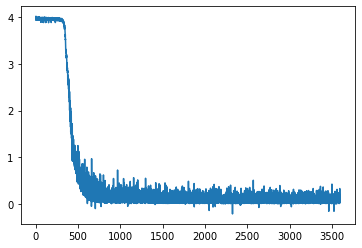

设备号为: tensor([1, 1, 1, 1], device='cuda:0')，模型训练后得到的设备号为:tensor([ 1,  1, 39,  1], device='cuda:0')
设备号为: tensor([1, 1, 1, 1], device='cuda:0')，模型训练后得到的设备号为:tensor([0, 1, 1, 1], device='cuda:0')
设备号为: tensor([1, 1, 1, 1], device='cuda:0')，模型训练后得到的设备号为:tensor([9, 1, 0, 4], device='cuda:0')
设备号为: tensor([1, 1, 1, 2], device='cuda:0')，模型训练后得到的设备号为:tensor([1, 0, 4, 0], device='cuda:0')
设备号为: tensor([2, 2, 2, 2], device='cuda:0')，模型训练后得到的设备号为:tensor([ 0, 11, 39,  2], device='cuda:0')
设备号为: tensor([2, 2, 2, 2], device='cuda:0')，模型训练后得到的设备号为:tensor([2, 0, 0, 0], device='cuda:0')
设备号为: tensor([2, 2, 2, 2], device='cuda:0')，模型训练后得到的设备号为:tensor([2, 2, 2, 2], device='cuda:0')
设备号为: tensor([2, 2, 3, 3], device='cuda:0')，模型训练后得到的设备号为:tensor([2, 2, 3, 3], device='cuda:0')
设备号为: tensor([3, 3, 3, 3], device='cuda:0')，模型训练后得到的设备号为:tensor([3, 3, 3, 0], device='cuda:0')
设备号为: tensor([3, 3, 3, 3], device='cuda:0')，模型训练后得到的设备号为:tensor([0, 3, 3, 3], device='cuda:0')
设备号为: tensor([3, 3, 3, 3], device='cuda:0'

810张测试集中准确率为： 53.95061728395062%
[[0 0 0 ... 0 0 0]
 [3 8 0 ... 0 0 0]
 [5 0 8 ... 0 0 0]
 ...
 [4 0 0 ... 7 0 0]
 [6 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 0]]
the running time is 789.7212271690369s


In [7]:
x = range(0, len(average_loss_series))
plt.figure()
plt.plot(x, average_loss_series)
plt.show()
#%%
# 在测试集上测试


def correct_rate(net, testloader):
    correct = 0
    total = 0
    realLabel = []
    predictedLabel = []
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
#         inputs, labels = images.to(inputs),labels.to(labels)
        realLabel.append([int(label) for label in labels])
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, dim=1)
        logger.info('设备号为: {0}，模型训练后得到的设备号为:{1}'.format(labels, predicted))
        predictedLabel.append([int(label) for label in predicted])
        total += labels.size(0)
        correct += (predicted == labels).sum()
    return 100 * float(correct) / float(total), realLabel, predictedLabel


correct, realLabel, predictedLabel = correct_rate(net, test_loader)
# print(f'{len(test_loader) * 4}张测试集中准确率为： {correct}%')
print(f'{len(test_data)}张测试集中准确率为： {correct}%')
logger.info(f'{len(test_data)}张测试集中准确率为： {correct}%')

#%%
import itertools
from sklearn.metrics import confusion_matrix

realLabel = list(itertools.chain.from_iterable(realLabel))
predictedLabel = list(itertools.chain.from_iterable(predictedLabel))

cm = confusion_matrix(realLabel, predictedLabel)
print(cm)


print(f'the running time is {time.time() - startTime}s')
# #%%
torch.save(net, f'./model_new_epoches500.pkl')

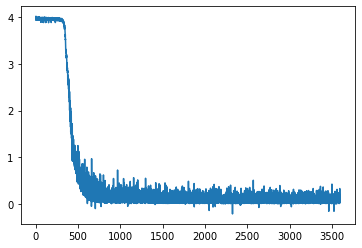

In [8]:
x = range(0, len(average_loss_series))
plt.figure()
plt.plot(x, average_loss_series)
plt.savefig("Loss1.png", bbox_inches="tight")
plt.show()